In [1]:
import http.client
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


connection = http.client.HTTPConnection('api.football-data.org')
headers = { 'X-Auth-Token': 'b55a7652a9e9403dbbd0d0da87c17c14', 'X-Response-Control': 'minified' }
connection.request('GET', '/v1/competitions/467/teams', None, headers )
response = json.loads(connection.getresponse().read().decode())

In [2]:
print(json.dumps(response, indent=4, sort_keys=True))

{
    "count": 32,
    "teams": [
        {
            "crestUrl": "https://upload.wikimedia.org/wikipedia/commons/f/f3/Flag_of_Russia.svg",
            "id": 808,
            "name": "Russia",
            "shortName": null,
            "squadMarketValue": null
        },
        {
            "crestUrl": "https://upload.wikimedia.org/wikipedia/commons/0/0d/Flag_of_Saudi_Arabia.svg",
            "id": 801,
            "name": "Saudi Arabia",
            "shortName": null,
            "squadMarketValue": null
        },
        {
            "crestUrl": "https://upload.wikimedia.org/wikipedia/commons/f/fe/Flag_of_Egypt.svg",
            "id": 825,
            "name": "Egypt",
            "shortName": null,
            "squadMarketValue": null
        },
        {
            "crestUrl": "https://upload.wikimedia.org/wikipedia/commons/f/fe/Flag_of_Uruguay.svg",
            "id": 758,
            "name": "Uruguay",
            "shortName": null,
            "squadMarketValue": null
     

In [3]:
name = []
# team_id = []
for x in range(0,32):
    
    name.append(response["teams"][x]["name"])
#     team_id.append(response["teams"][x]["id"])
    
team_dict = {"Country": name,}
team_data_df = pd.DataFrame(team_dict)
team_data_df.head(32)

Country
0           Russia
1     Saudi Arabia
2            Egypt
3          Uruguay
4          Morocco
5             Iran
6         Portugal
7            Spain
8           France
9        Australia
10       Argentina
11         Iceland
12            Peru
13         Denmark
14         Croatia
15         Nigeria
16      Costa Rica
17          Serbia
18         Germany
19          Mexico
20          Brazil
21     Switzerland
22          Sweden
23  Korea Republic
24         Belgium
25          Panama
26         Tunisia
27         England
28        Colombia
29           Japan
30          Poland
31         Senegal

In [4]:
types_df = pd.read_csv("./results.csv")
types_df.head()

date home_team away_team  home_score  away_score tournament     city  \
0  1872-11-30  Scotland   England           0           0   Friendly  Glasgow   
1  1873-03-08   England  Scotland           4           2   Friendly   London   
2  1874-03-07  Scotland   England           2           1   Friendly  Glasgow   
3  1875-03-06   England  Scotland           2           2   Friendly   London   
4  1876-03-04  Scotland   England           3           0   Friendly  Glasgow   

    country  neutral  
0  Scotland    False  
1   England    False  
2  Scotland    False  
3   England    False  
4  Scotland    False

In [5]:
home_team_df = (types_df.groupby("home_team").sum()).reset_index()
home_team_df = home_team_df.rename(columns={"home_team": "Country"})
home_team_df

Country  home_score  away_score  neutral
0                  Afghanistan          49          57     30.0
1                      Albania         185         190     20.0
2                      Algeria         499         243    100.0
3               American Samoa          15         124     20.0
4                      Andorra          24         165     18.0
5                       Angola         229         138     45.0
6                     Anguilla          11          38      6.0
7          Antigua and Barbuda         162         137     31.0
8                    Argentina        1179         463    203.0
9                      Armenia         104         144     17.0
10                       Aruba          86         109     12.0
11                   Australia         663         311     71.0
12                     Austria         810         544     27.0
13                  Azerbaijan          99         124     31.0
14                     Bahamas          19          25      3.0
15                     Bahrain         379         311    112.0
16                  Bangladesh         114         198     60.0
17                    Barbados         209         201     27.0
18                     Belarus         143         135     20.0
19                     Belgium         784         543     37.0
20                      Belize          36          47     10.0
21                       Benin         149         179     20.0
22                     Bermuda         120         116      5.0
23                      Bhutan          27          79     13.0
24                     Bolivia         317         373     74.0
25                     Bonaire           5          17      4.0
26          Bosnia-Herzegovina         161         113     19.0
27                    Botswana         143         152     21.0
28                      Brazil        1365         461    220.0
29      British Virgin Islands          46          76      9.0
..                         ...         ...         ...      ...
211                 Tajikistan         120          56     18.0
212                   Tanzania         352         313     71.0
213                   Thailand         572         368     51.0
214                       Togo         208         139     17.0
215                      Tonga          33          52     14.0
216        Trinidad and Tobago         618         293     36.0
217                    Tunisia         504         240     32.0
218                     Turkey         398         311     26.0
219               Turkmenistan         107          51     19.0
220   Turks and Caicos Islands           4          16      3.0
221                     Tuvalu          15          12      8.0
222                        USA         664         422     25.0
223                     Uganda         548         255     75.0
224                    Ukraine         191          95     12.0
225       United Arab Emirates         468         308     71.0
226                    Uruguay         603         317     46.0
227                 Uzbekistan         220          78     20.0
228                    Vanuatu         115         108     23.0
229                  Venezuela         195         244     10.0
230                    Vietnam         218         139     27.0
231           Vietnam Republic          95          59      9.0
232             Virgin Islands          10          67      3.0
233                      Wales         455         439     13.0
234  Wallis Islands and Futuna           3           1      1.0
235                      Yemen         122         141     50.0
236                  Yemen DPR           3           4      0.0
237                 Yugoslavia         439         236      7.0
238                     Zambia         543         238     67.0
239                   Zanzibar          57          98     27.0
240                   Zimbabwe         288         166     21.0

[241 rows x 4 columns]

In [6]:
merge_country_df = pd.merge(team_data_df, home_team_df, on='Country')
merge_country_df.drop('neutral', axis=1, inplace=True)
merge_country_df = merge_country_df.sort_values(by=['home_score', 'away_score'], ascending=False)
merge_country_df = merge_country_df.rename(columns={"home_score": "Home Score", "away_score": "Away Score"})
merge_country_df['Score Variance'] = merge_country_df['Home Score'] - merge_country_df['Away Score']
merge_country_df.reset_index(drop = True)

Country  Home Score  Away Score  Score Variance
0           Brazil        1365         461             904
1          Germany        1213         506             707
2        Argentina        1179         463             716
3           Sweden        1117         547             570
4          England        1104         430             674
5           Mexico         978         420             558
6           France         924         509             415
7   Korea Republic         898         331             567
8          Denmark         841         485             356
9            Spain         812         261             551
10         Belgium         784         543             241
11           Egypt         741         315             426
12          Poland         731         411             320
13     Switzerland         665         567              98
14       Australia         663         311             352
15           Japan         651         387             264
16    Saudi Arabia         637         317             320
17        Portugal         627         293             334
18      Costa Rica         623         240             383
19         Uruguay         603         317             286
20          Russia         574         244             330
21            Iran         568         183             385
22         Tunisia         504         240             264
23         Nigeria         497         187             310
24         Morocco         451         172             279
25            Peru         395         316              79
26        Colombia         359         254             105
27         Senegal         331         139             192
28         Croatia         296         115             181
29         Iceland         268         277              -9
30          Panama         267         204              63
31          Serbia         174          78              96

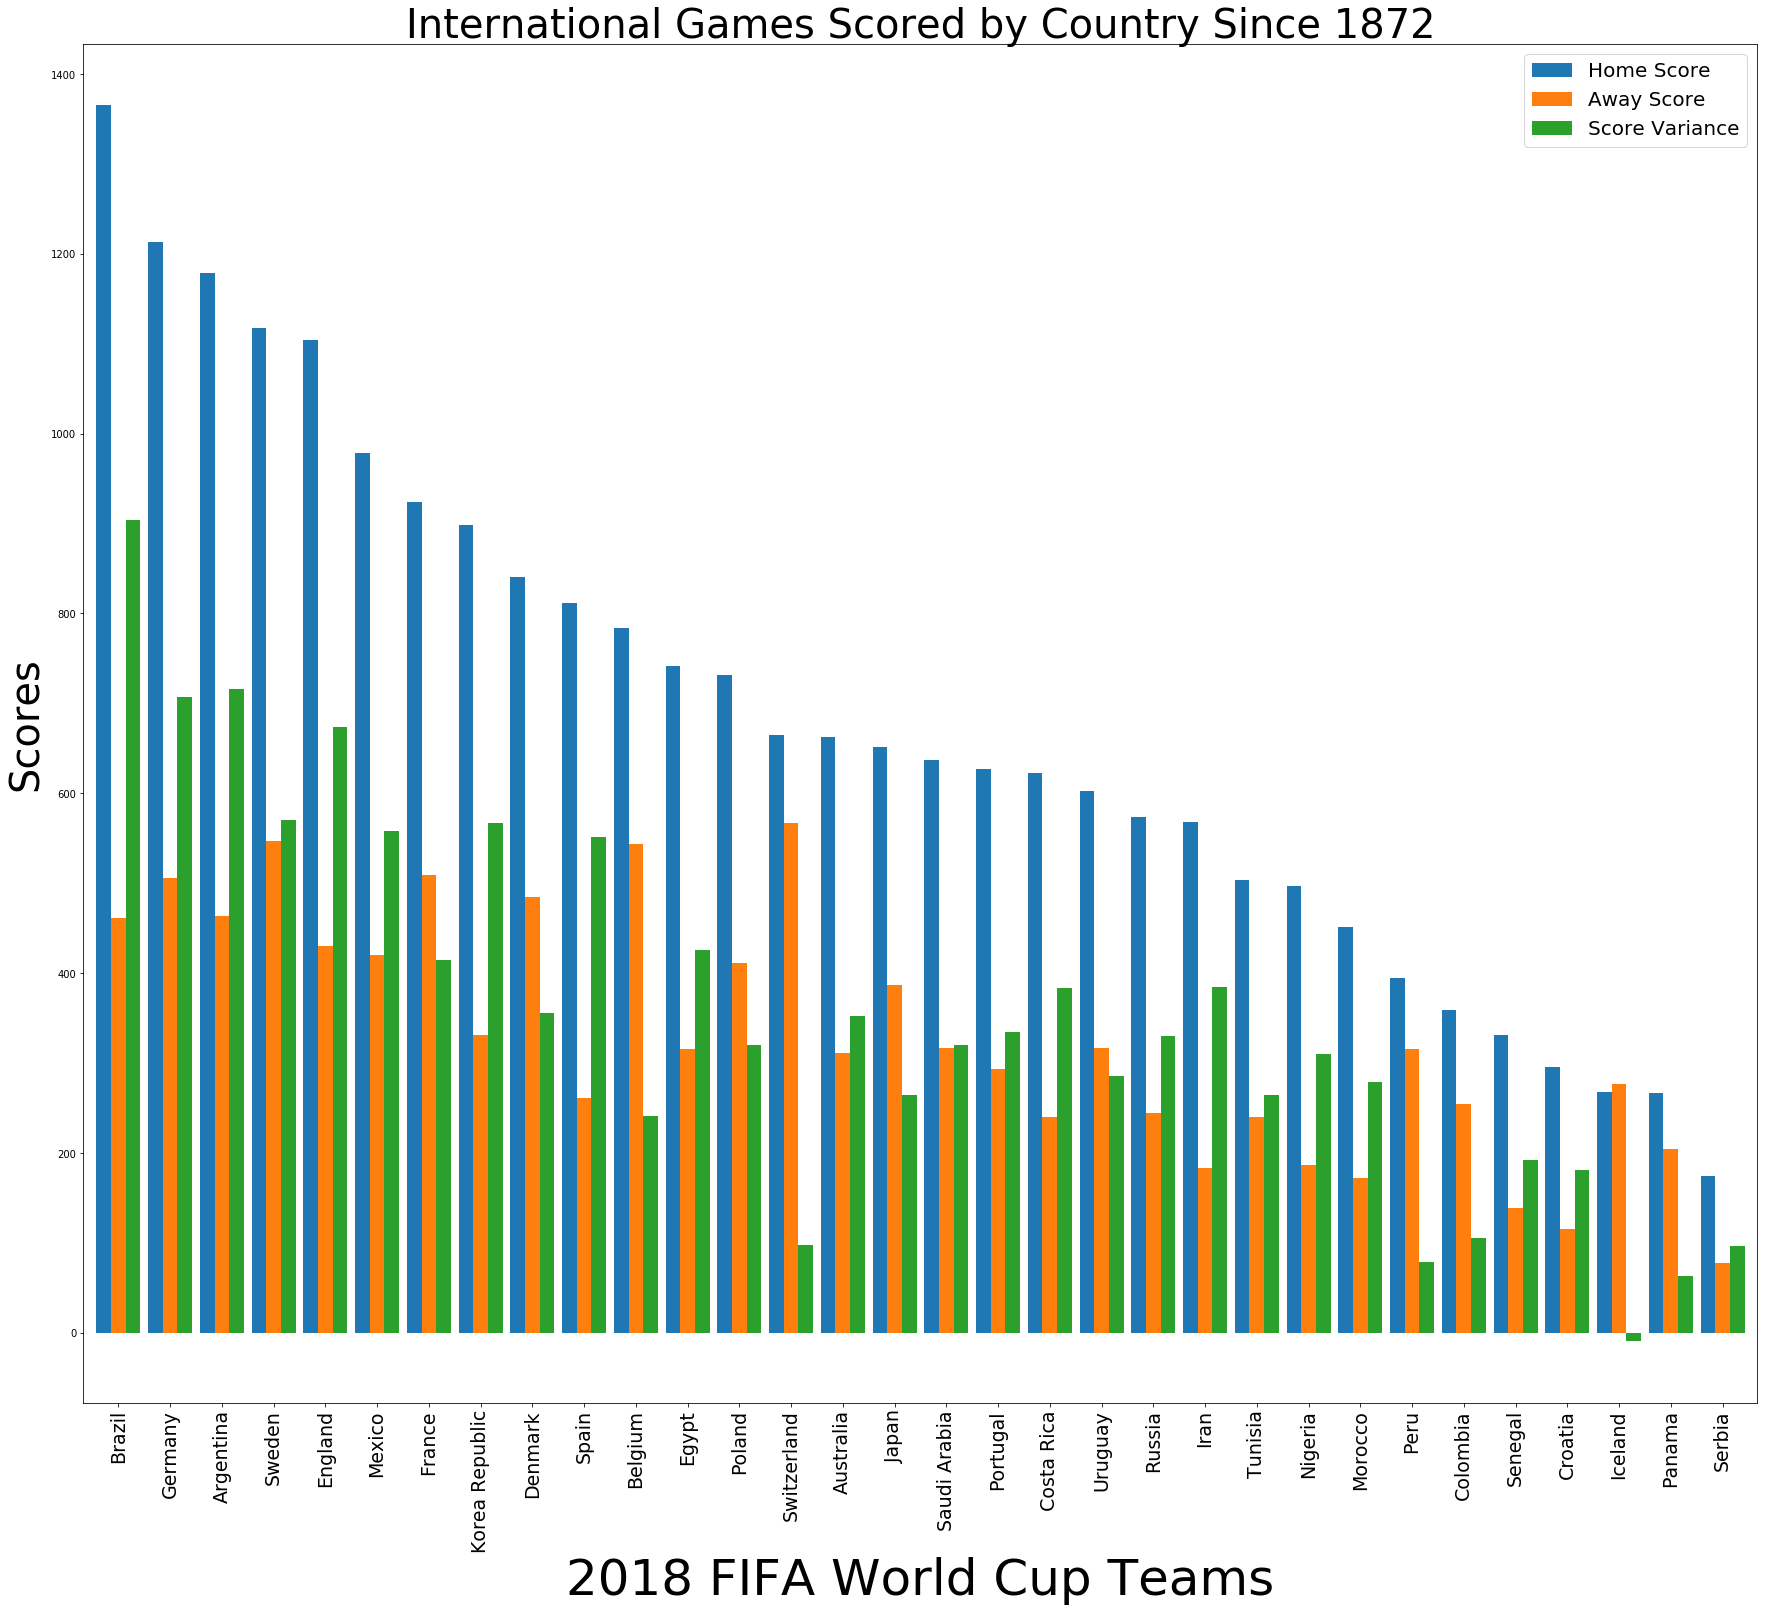

In [7]:
x_axis = np.arange(len(merge_country_df))
tick_locations = [value for value in x_axis]
plot = merge_country_df.plot(kind="bar", width=0.85, figsize=(30,25))
plot.set_xticklabels(merge_country_df["Country"], rotation=90, fontsize = 19)
plt.title("International Games Scored by Country Since 1872",  fontsize = 40)
plt.xlabel("2018 FIFA World Cup Teams",  fontsize = 50)
plt.ylabel("Scores",  fontsize = 40)
plot.legend(loc=1, prop={'size': 20})
plt.savefig("Historical Games")
plt.show()

In [8]:
dataset2018_df = pd.read_csv("./dataset2018.csv")
dataset2018_df = dataset2018_df.rename(columns={"Team":"Country"})
dataset2018_df.drop(['Unnamed: 19', 'Match index', 'Match index.1', 'Match index.2', 'First match \nagainst',
 'history with \nfirst opponent\n W-L',
 'history with\n first opponent\n goals',
 'Second match\n against',
 'history with\n second opponent\n W-L',
 'history with\n second opponent\n goals',
 'Third match\n against',
 'history with\n third opponent\n W-L',
 'history with\n third opponent\n goals'], axis=1, inplace=True)
dataset2018_df

Country Group  Previous \nappearances  Previous \ntitles  \
0         Russia     A                      10                  0   
1   Saudi Arabia     A                       4                  0   
2          Egypt     A                       2                  0   
3        Uruguay     A                      12                  2   
4        Porugal     B                       6                  0   
5          Spain     B                      14                  1   
6        Morocco     B                       4                  0   
7           IRAN     B                       4                  0   
8         France     C                      14                  1   
9      Australia     C                       4                  0   
10          Peru     C                       4                  0   
11       Denmark     C                       4                  0   
12     Argentina     D                      16                  2   
13       Iceland     D                       0                  0   
14       Croatia     D                       4                  0   
15       Nigeria     D                       5                  0   
16        Brazil     E                      20                  5   
17   Switzerland     E                      10                  0   
18     Costarica     E                       4                  0   
19        Serbia     E                      11                  0   
20       Germany     F                      18                  4   
21        Mexico     F                      15                  0   
22        Sweden     F                      11                  0   
23         Korea     F                       9                  0   
24       Belgium     G                      12                  0   
25        Panama     G                       0                  0   
26       Tunisia     G                       4                  0   
27       England     G                      14                  1   
28        Poland     H                       7                  0   
29       Senegal     H                       1                  0   
30      Columbia     H                       5                  0   
31         Japan     H                       5                  0   

    Previous\n finals  Previous\n semifinals  Current \nFIFA rank  
0                   0                      1                   65  
1                   0                      0                   63  
2                   0                      0                   31  
3                   2                      5                   21  
4                   0                      2                    3  
5                   1                      2                    6  
6                   0                      0                   40  
7                   0                      0                   32  
8                   2                      5                    9  
9                   0                      0                   39  
10                  0                      0                   11  
11                  0                      0                   12  
12                  5                      5                    4  
13                  0                      0                   22  
14                  0                      1                   17  
15                  0                      0                   50  
16                  7                     11                    2  
17                  0                      0                    8  
18                  0                      0                   26  
19                  0                      2                   37  
20                  8                     13                    1  
21                  0                      0                   16  
22                  1                      4                   18  
23                  0                      1                   59  
24                  0          

In [9]:
# GROUP A TEAMS PROBABILITY TO ADVANCE
group_a = pd.DataFrame(dataset2018_df.loc[dataset2018_df['Group'] == 'A'])
group_a['Prob base on PA'] = group_a['Previous \nappearances'] / group_a['Previous \nappearances'].sum()
group_a['Prob base on PT'] = group_a['Previous \ntitles'] / group_a['Previous \ntitles'].sum()
group_a['Prob base on PF'] = group_a['Previous\n finals'] / group_a['Previous\n finals'].sum()
group_a['Prob base on Psemi'] = group_a['Previous\n semifinals'] / group_a['Previous\n semifinals'].sum()
group_a['Prob base on Rank'] = (1-(group_a['Current \nFIFA rank'] / group_a['Current \nFIFA rank'].sum()))/3
group_a['Probability to Advance'] = group_a[['Prob base on PA', 'Prob base on PT', 'Prob base on PF',\
                                             'Prob base on Psemi', 'Prob base on Rank']].mean(axis=1)
group_a['Probability to Advance'] = pd.Series(["{0:.2f}%".format(val * 100) for val in group_a['Probability to Advance']],\
                                              index = group_a.index)

group_a

Country Group  Previous \nappearances  Previous \ntitles  \
0        Russia     A                      10                  0   
1  Saudi Arabia     A                       4                  0   
2         Egypt     A                       2                  0   
3       Uruguay     A                      12                  2   

   Previous\n finals  Previous\n semifinals  Current \nFIFA rank  \
0                  0                      1                   65   
1                  0                      0                   63   
2                  0                      0                   31   
3                  2                      5                   21   

   Prob base on PA  Prob base on PT  Prob base on PF  Prob base on Psemi  \
0         0.357143              0.0              0.0            0.166667   
1         0.142857              0.0              0.0            0.000000   
2         0.071429              0.0              0.0            0.000000   
3         0.428571              1.0              1.0            0.833333   

   Prob base on Rank Probability to Advance  
0           0.212963                 14.74%  
1           0.216667                  7.19%  
2           0.275926                  6.95%  
3           0.294444                 71.13%

In [10]:
top_group_a = group_a.iloc[[0,3]]
top_group_a

Country Group  Previous \nappearances  Previous \ntitles  \
0   Russia     A                      10                  0   
3  Uruguay     A                      12                  2   

   Previous\n finals  Previous\n semifinals  Current \nFIFA rank  \
0                  0                      1                   65   
3                  2                      5                   21   

   Prob base on PA  Prob base on PT  Prob base on PF  Prob base on Psemi  \
0         0.357143              0.0              0.0            0.166667   
3         0.428571              1.0              1.0            0.833333   

   Prob base on Rank Probability to Advance  
0           0.212963                 14.74%  
3           0.294444                 71.13%

In [11]:
group_b = pd.DataFrame(dataset2018_df.loc[dataset2018_df['Group'] == 'B'])
group_b

Country Group  Previous \nappearances  Previous \ntitles  \
4  Porugal     B                       6                  0   
5    Spain     B                      14                  1   
6  Morocco     B                       4                  0   
7     IRAN     B                       4                  0   

   Previous\n finals  Previous\n semifinals  Current \nFIFA rank  
4                  0                      2                    3  
5                  1                      2                    6  
6                  0                      0                   40  
7                  0                      0                   32

In [12]:
# GROUP B TEAMS PROBABILITY TO ADVANCE
group_b = pd.DataFrame(dataset2018_df.loc[dataset2018_df['Group'] == 'B'])
group_b['Prob base on PA'] = group_b['Previous \nappearances'] / group_b['Previous \nappearances'].sum()
group_b['Prob base on PT'] = group_b['Previous \ntitles'] / group_b['Previous \ntitles'].sum()
group_b['Prob base on PF'] = group_b['Previous\n finals'] / group_b['Previous\n finals'].sum()
group_b['Prob base on Psemi'] = group_b['Previous\n semifinals'] / group_b['Previous\n semifinals'].sum()
group_b['Prob base on Rank'] = (1-(group_b['Current \nFIFA rank'] / group_b['Current \nFIFA rank'].sum()))/3
group_b['Probability to Advance'] = group_b[['Prob base on PA', 'Prob base on PT', 'Prob base on PF',\
                                             'Prob base on Psemi', 'Prob base on Rank']].mean(axis=1)
group_b['Probability to Advance'] = pd.Series(["{0:.2f}%".format(val * 100) for val in group_b['Probability to Advance']],\
                                              index = group_b.index)
group_b

Country Group  Previous \nappearances  Previous \ntitles  \
4  Porugal     B                       6                  0   
5    Spain     B                      14                  1   
6  Morocco     B                       4                  0   
7     IRAN     B                       4                  0   

   Previous\n finals  Previous\n semifinals  Current \nFIFA rank  \
4                  0                      2                    3   
5                  1                      2                    6   
6                  0                      0                   40   
7                  0                      0                   32   

   Prob base on PA  Prob base on PT  Prob base on PF  Prob base on Psemi  \
4         0.214286              0.0              0.0                 0.5   
5         0.500000              1.0              1.0                 0.5   
6         0.142857              0.0              0.0                 0.0   
7         0.142857              0.0              0.0                 0.0   

   Prob base on Rank Probability to Advance  
4           0.320988                 20.71%  
5           0.308642                 66.17%  
6           0.168724                  6.23%  
7           0.201646                  6.89%

In [13]:
top_group_b = group_b.iloc[[0,1]]
top_group_b

Country Group  Previous \nappearances  Previous \ntitles  \
4  Porugal     B                       6                  0   
5    Spain     B                      14                  1   

   Previous\n finals  Previous\n semifinals  Current \nFIFA rank  \
4                  0                      2                    3   
5                  1                      2                    6   

   Prob base on PA  Prob base on PT  Prob base on PF  Prob base on Psemi  \
4         0.214286              0.0              0.0                 0.5   
5         0.500000              1.0              1.0                 0.5   

   Prob base on Rank Probability to Advance  
4           0.320988                 20.71%  
5           0.308642                 66.17%

In [14]:
top_group_a1 = group_a.iloc[[3]]
top_group_a1

Country Group  Previous \nappearances  Previous \ntitles  \
3  Uruguay     A                      12                  2   

   Previous\n finals  Previous\n semifinals  Current \nFIFA rank  \
3                  2                      5                   21   

   Prob base on PA  Prob base on PT  Prob base on PF  Prob base on Psemi  \
3         0.428571              1.0              1.0            0.833333   

   Prob base on Rank Probability to Advance  
3           0.294444                 71.13%

In [15]:
top_group_b2 = group_b.iloc[[0]]
top_group_b2

Country Group  Previous \nappearances  Previous \ntitles  \
4  Porugal     B                       6                  0   

   Previous\n finals  Previous\n semifinals  Current \nFIFA rank  \
4                  0                      2                    3   

   Prob base on PA  Prob base on PT  Prob base on PF  Prob base on Psemi  \
4         0.214286              0.0              0.0                 0.5   

   Prob base on Rank Probability to Advance  
4           0.320988                 20.71%

In [16]:
group_a1b2 = pd.concat([top_group_a1, top_group_b2])
group_a1b2['Prob base on PA'] = group_a1b2['Previous \nappearances'] / group_a1b2['Previous \nappearances'].sum()
group_a1b2['Prob base on PT'] = group_a1b2['Previous \ntitles'] / group_a1b2['Previous \ntitles'].sum()
group_a1b2['Prob base on PF'] = group_a1b2['Previous\n finals'] / group_a1b2['Previous\n finals'].sum()
group_a1b2['Prob base on Psemi'] = group_a1b2['Previous\n semifinals'] / group_a1b2['Previous\n semifinals'].sum()
group_a1b2['Prob base on Rank'] = (1-(group_a1b2['Current \nFIFA rank'] / group_a1b2['Current \nFIFA rank'].sum()))/3
group_a1b2['Probability to Advance'] = group_a1b2[['Prob base on PA', 'Prob base on PT', 'Prob base on PF',\
                                             'Prob base on Psemi', 'Prob base on Rank']].mean(axis=1)
group_a1b2['Probability to Advance'] = pd.Series(["{0:.2f}%".format(val * 100) for val in group_a1b2['Probability to Advance']],\
                                              index = group_a1b2.index)
group_a1b2

Country Group  Previous \nappearances  Previous \ntitles  \
3  Uruguay     A                      12                  2   
4  Porugal     B                       6                  0   

   Previous\n finals  Previous\n semifinals  Current \nFIFA rank  \
3                  2                      5                   21   
4                  0                      2                    3   

   Prob base on PA  Prob base on PT  Prob base on PF  Prob base on Psemi  \
3         0.666667              1.0              1.0            0.714286   
4         0.333333              0.0              0.0            0.285714   

   Prob base on Rank Probability to Advance  
3           0.041667                 68.45%  
4           0.291667                 18.21%

In [17]:
top_group_a2 = group_a.iloc[[0]]
top_group_a2

Country Group  Previous \nappearances  Previous \ntitles  Previous\n finals  \
0  Russia     A                      10                  0                  0   

   Previous\n semifinals  Current \nFIFA rank  Prob base on PA  \
0                      1                   65         0.357143   

   Prob base on PT  Prob base on PF  Prob base on Psemi  Prob base on Rank  \
0              0.0              0.0            0.166667           0.212963   

  Probability to Advance  
0                 14.74%

In [18]:
top_group_b1 = group_b.iloc[[1]]
top_group_b1

Country Group  Previous \nappearances  Previous \ntitles  Previous\n finals  \
5   Spain     B                      14                  1                  1   

   Previous\n semifinals  Current \nFIFA rank  Prob base on PA  \
5                      2                    6              0.5   

   Prob base on PT  Prob base on PF  Prob base on Psemi  Prob base on Rank  \
5              1.0              1.0                 0.5           0.308642   

  Probability to Advance  
5                 66.17%

In [19]:
group_a2b1 = pd.concat([top_group_a2, top_group_b1])
group_a2b1['Prob base on PA'] = group_a2b1['Previous \nappearances'] / group_a2b1['Previous \nappearances'].sum()
group_a2b1['Prob base on PT'] = group_a2b1['Previous \ntitles'] / group_a2b1['Previous \ntitles'].sum()
group_a2b1['Prob base on PF'] = group_a2b1['Previous\n finals'] / group_a2b1['Previous\n finals'].sum()
group_a2b1['Prob base on Psemi'] = group_a2b1['Previous\n semifinals'] / group_a2b1['Previous\n semifinals'].sum()
group_a2b1['Prob base on Rank'] = (1-(group_a2b1['Current \nFIFA rank'] / group_a2b1['Current \nFIFA rank'].sum()))/3
group_a2b1['Probability to Advance'] = group_a2b1[['Prob base on PA', 'Prob base on PT', 'Prob base on PF',\
                                             'Prob base on Psemi', 'Prob base on Rank']].mean(axis=1)
group_a2b1['Probability to Advance'] = pd.Series(["{0:.2f}%".format(val * 100) for val in group_a2b1['Probability to Advance']],\
                                              index = group_a2b1.index)

group_a2b1

Country Group  Previous \nappearances  Previous \ntitles  Previous\n finals  \
0  Russia     A                      10                  0                  0   
5   Spain     B                      14                  1                  1   

   Previous\n semifinals  Current \nFIFA rank  Prob base on PA  \
0                      1                   65         0.416667   
5                      2                    6         0.583333   

   Prob base on PT  Prob base on PF  Prob base on Psemi  Prob base on Rank  \
0              0.0              0.0            0.333333           0.028169   
5              1.0              1.0            0.666667           0.305164   

  Probability to Advance  
0                 15.56%  
5                 71.10%

In [20]:
group_c = pd.DataFrame(dataset2018_df.loc[dataset2018_df['Group'] == 'C'])
group_c

Country Group  Previous \nappearances  Previous \ntitles  \
8      France     C                      14                  1   
9   Australia     C                       4                  0   
10       Peru     C                       4                  0   
11    Denmark     C                       4                  0   

    Previous\n finals  Previous\n semifinals  Current \nFIFA rank  
8                   2                      5                    9  
9                   0                      0                   39  
10                  0                      0                   11  
11                  0                      0                   12

In [21]:
# GROUP C TEAMS PROBABILITY TO ADVANCE
group_c = pd.DataFrame(dataset2018_df.loc[dataset2018_df['Group'] == 'C'])
group_c['Prob base on PA'] = group_c['Previous \nappearances'] / group_c['Previous \nappearances'].sum()
group_c['Prob base on PT'] = group_c['Previous \ntitles'] / group_c['Previous \ntitles'].sum()
group_c['Prob base on PF'] = group_c['Previous\n finals'] / group_c['Previous\n finals'].sum()
group_c['Prob base on Psemi'] = group_c['Previous\n semifinals'] / group_c['Previous\n semifinals'].sum()
group_c['Prob base on Rank'] = (1-(group_c['Current \nFIFA rank'] / group_c['Current \nFIFA rank'].sum()))/3
group_c['Probability to Advance'] = group_c[['Prob base on PA', 'Prob base on PT', 'Prob base on PF',\
                                             'Prob base on Psemi', 'Prob base on Rank']].mean(axis=1)
group_c['Probability to Advance'] = pd.Series(["{0:.2f}%".format(val * 100) for val in group_c['Probability to Advance']],\
                                              index = group_c.index)
group_c

Country Group  Previous \nappearances  Previous \ntitles  \
8      France     C                      14                  1   
9   Australia     C                       4                  0   
10       Peru     C                       4                  0   
11    Denmark     C                       4                  0   

    Previous\n finals  Previous\n semifinals  Current \nFIFA rank  \
8                   2                      5                    9   
9                   0                      0                   39   
10                  0                      0                   11   
11                  0                      0                   12   

    Prob base on PA  Prob base on PT  Prob base on PF  Prob base on Psemi  \
8          0.538462              1.0              1.0                 1.0   
9          0.153846              0.0              0.0                 0.0   
10         0.153846              0.0              0.0                 0.0   
11         0.153846              0.0              0.0                 0.0   

    Prob base on Rank Probability to Advance  
8            0.291080                 76.59%  
9            0.150235                  6.08%  
10           0.281690                  8.71%  
11           0.276995                  8.62%

In [22]:
top_group_c = group_c.iloc[[0,2]]
top_group_c

Country Group  Previous \nappearances  Previous \ntitles  \
8   France     C                      14                  1   
10    Peru     C                       4                  0   

    Previous\n finals  Previous\n semifinals  Current \nFIFA rank  \
8                   2                      5                    9   
10                  0                      0                   11   

    Prob base on PA  Prob base on PT  Prob base on PF  Prob base on Psemi  \
8          0.538462              1.0              1.0                 1.0   
10         0.153846              0.0              0.0                 0.0   

    Prob base on Rank Probability to Advance  
8             0.29108                 76.59%  
10            0.28169                  8.71%

In [23]:
group_d = pd.DataFrame(dataset2018_df.loc[dataset2018_df['Group'] == 'D'])
group_d

Country Group  Previous \nappearances  Previous \ntitles  \
12  Argentina     D                      16                  2   
13    Iceland     D                       0                  0   
14    Croatia     D                       4                  0   
15    Nigeria     D                       5                  0   

    Previous\n finals  Previous\n semifinals  Current \nFIFA rank  
12                  5                      5                    4  
13                  0                      0                   22  
14                  0                      1                   17  
15                  0                      0                   50

In [24]:
# GROUP D TEAMS PROBABILITY TO ADVANCE
group_d = pd.DataFrame(dataset2018_df.loc[dataset2018_df['Group'] == 'D'])
group_d['Prob base on PA'] = group_d['Previous \nappearances'] / group_d['Previous \nappearances'].sum()
group_d['Prob base on PT'] = group_d['Previous \ntitles'] / group_d['Previous \ntitles'].sum()
group_d['Prob base on PF'] = group_d['Previous\n finals'] / group_d['Previous\n finals'].sum()
group_d['Prob base on Psemi'] = group_d['Previous\n semifinals'] / group_d['Previous\n semifinals'].sum()
group_d['Prob base on Rank'] = (1-(group_d['Current \nFIFA rank'] / group_d['Current \nFIFA rank'].sum()))/3
group_d['Probability to Advance'] = group_d[['Prob base on PA', 'Prob base on PT', 'Prob base on PF',\
                                             'Prob base on Psemi', 'Prob base on Rank']].mean(axis=1)
group_d['Probability to Advance'] = pd.Series(["{0:.2f}%".format(val * 100) for val in group_d['Probability to Advance']],\
                                              index = group_d.index)
group_d

Country Group  Previous \nappearances  Previous \ntitles  \
12  Argentina     D                      16                  2   
13    Iceland     D                       0                  0   
14    Croatia     D                       4                  0   
15    Nigeria     D                       5                  0   

    Previous\n finals  Previous\n semifinals  Current \nFIFA rank  \
12                  5                      5                    4   
13                  0                      0                   22   
14                  0                      1                   17   
15                  0                      0                   50   

    Prob base on PA  Prob base on PT  Prob base on PF  Prob base on Psemi  \
12             0.64              1.0              1.0            0.833333   
13             0.00              0.0              0.0            0.000000   
14             0.16              0.0              0.0            0.166667   
15             0.20              0.0              0.0            0.000000   

    Prob base on Rank Probability to Advance  
12           0.318996                 75.85%  
13           0.254480                  5.09%  
14           0.272401                 11.98%  
15           0.154122                  7.08%

In [25]:
top_group_d = group_d.iloc[[0,2]]
top_group_d

Country Group  Previous \nappearances  Previous \ntitles  \
12  Argentina     D                      16                  2   
14    Croatia     D                       4                  0   

    Previous\n finals  Previous\n semifinals  Current \nFIFA rank  \
12                  5                      5                    4   
14                  0                      1                   17   

    Prob base on PA  Prob base on PT  Prob base on PF  Prob base on Psemi  \
12             0.64              1.0              1.0            0.833333   
14             0.16              0.0              0.0            0.166667   

    Prob base on Rank Probability to Advance  
12           0.318996                 75.85%  
14           0.272401                 11.98%

In [26]:
group_e = pd.DataFrame(dataset2018_df.loc[dataset2018_df['Group'] == 'E'])
group_e

Country Group  Previous \nappearances  Previous \ntitles  \
16       Brazil     E                      20                  5   
17  Switzerland     E                      10                  0   
18    Costarica     E                       4                  0   
19       Serbia     E                      11                  0   

    Previous\n finals  Previous\n semifinals  Current \nFIFA rank  
16                  7                     11                    2  
17                  0                      0                    8  
18                  0                      0                   26  
19                  0                      2                   37

In [27]:
# GROUP E TEAMS PROBABILITY TO ADVANCE
group_e = pd.DataFrame(dataset2018_df.loc[dataset2018_df['Group'] == 'E'])
group_e['Prob base on PA'] = group_e['Previous \nappearances'] / group_e['Previous \nappearances'].sum()
group_e['Prob base on PT'] = group_e['Previous \ntitles'] / group_e['Previous \ntitles'].sum()
group_e['Prob base on PF'] = group_e['Previous\n finals'] / group_e['Previous\n finals'].sum()
group_e['Prob base on Psemi'] = group_e['Previous\n semifinals'] / group_e['Previous\n semifinals'].sum()
group_e['Prob base on Rank'] = (1-(group_e['Current \nFIFA rank'] / group_e['Current \nFIFA rank'].sum()))/3
group_e['Probability to Advance'] = group_e[['Prob base on PA', 'Prob base on PT', 'Prob base on PF',\
                                             'Prob base on Psemi', 'Prob base on Rank']].mean(axis=1)
group_e['Probability to Advance'] = pd.Series(["{0:.2f}%".format(val * 100) for val in group_e['Probability to Advance']],\
                                              index = group_e.index)
group_e

Country Group  Previous \nappearances  Previous \ntitles  \
16       Brazil     E                      20                  5   
17  Switzerland     E                      10                  0   
18    Costarica     E                       4                  0   
19       Serbia     E                      11                  0   

    Previous\n finals  Previous\n semifinals  Current \nFIFA rank  \
16                  7                     11                    2   
17                  0                      0                    8   
18                  0                      0                   26   
19                  0                      2                   37   

    Prob base on PA  Prob base on PT  Prob base on PF  Prob base on Psemi  \
16         0.444444              1.0              1.0            0.846154   
17         0.222222              0.0              0.0            0.000000   
18         0.088889              0.0              0.0            0.000000   
19         0.244444              0.0              0.0            0.153846   

    Prob base on Rank Probability to Advance  
16           0.324201                 72.30%  
17           0.296804                 10.38%  
18           0.214612                  6.07%  
19           0.164384                 11.25%

In [28]:
top_group_e = group_e.iloc[[0,3]]
top_group_e

Country Group  Previous \nappearances  Previous \ntitles  \
16  Brazil     E                      20                  5   
19  Serbia     E                      11                  0   

    Previous\n finals  Previous\n semifinals  Current \nFIFA rank  \
16                  7                     11                    2   
19                  0                      2                   37   

    Prob base on PA  Prob base on PT  Prob base on PF  Prob base on Psemi  \
16         0.444444              1.0              1.0            0.846154   
19         0.244444              0.0              0.0            0.153846   

    Prob base on Rank Probability to Advance  
16           0.324201                 72.30%  
19           0.164384                 11.25%

In [29]:
group_f = pd.DataFrame(dataset2018_df.loc[dataset2018_df['Group'] == 'F'])
group_f

Country Group  Previous \nappearances  Previous \ntitles  \
20  Germany     F                      18                  4   
21   Mexico     F                      15                  0   
22   Sweden     F                      11                  0   
23    Korea     F                       9                  0   

    Previous\n finals  Previous\n semifinals  Current \nFIFA rank  
20                  8                     13                    1  
21                  0                      0                   16  
22                  1                      4                   18  
23                  0                      1                   59

In [30]:
# GROUP F TEAMS PROBABILITY TO ADVANCE
group_f = pd.DataFrame(dataset2018_df.loc[dataset2018_df['Group'] == 'F'])
group_f['Prob base on PA'] = group_f['Previous \nappearances'] / group_f['Previous \nappearances'].sum()
group_f['Prob base on PT'] = group_f['Previous \ntitles'] / group_f['Previous \ntitles'].sum()
group_f['Prob base on PF'] = group_f['Previous\n finals'] / group_f['Previous\n finals'].sum()
group_f['Prob base on Psemi'] = group_f['Previous\n semifinals'] / group_f['Previous\n semifinals'].sum()
group_f['Prob base on Rank'] = (1-(group_f['Current \nFIFA rank'] / group_f['Current \nFIFA rank'].sum()))/3
group_f['Probability to Advance'] = group_f[['Prob base on PA', 'Prob base on PT', 'Prob base on PF',\
                                             'Prob base on Psemi', 'Prob base on Rank']].mean(axis=1)
group_f['Probability to Advance'] = pd.Series(["{0:.2f}%".format(val * 100) for val in group_f['Probability to Advance']],\
                                              index = group_f.index)
group_f

Country Group  Previous \nappearances  Previous \ntitles  \
20  Germany     F                      18                  4   
21   Mexico     F                      15                  0   
22   Sweden     F                      11                  0   
23    Korea     F                       9                  0   

    Previous\n finals  Previous\n semifinals  Current \nFIFA rank  \
20                  8                     13                    1   
21                  0                      0                   16   
22                  1                      4                   18   
23                  0                      1                   59   

    Prob base on PA  Prob base on PT  Prob base on PF  Prob base on Psemi  \
20         0.339623              1.0         0.888889            0.722222   
21         0.283019              0.0         0.000000            0.000000   
22         0.207547              0.0         0.111111            0.222222   
23         0.169811              0.0         0.000000            0.055556   

    Prob base on Rank Probability to Advance  
20           0.329787                 65.61%  
21           0.276596                 11.19%  
22           0.269504                 16.21%  
23           0.124113                  6.99%

In [31]:
top_group_f = group_f.iloc[[0,2]]
top_group_f

Country Group  Previous \nappearances  Previous \ntitles  \
20  Germany     F                      18                  4   
22   Sweden     F                      11                  0   

    Previous\n finals  Previous\n semifinals  Current \nFIFA rank  \
20                  8                     13                    1   
22                  1                      4                   18   

    Prob base on PA  Prob base on PT  Prob base on PF  Prob base on Psemi  \
20         0.339623              1.0         0.888889            0.722222   
22         0.207547              0.0         0.111111            0.222222   

    Prob base on Rank Probability to Advance  
20           0.329787                 65.61%  
22           0.269504                 16.21%

In [32]:
group_g = pd.DataFrame(dataset2018_df.loc[dataset2018_df['Group'] == 'G'])
group_g

Country Group  Previous \nappearances  Previous \ntitles  \
24  Belgium     G                      12                  0   
25   Panama     G                       0                  0   
26  Tunisia     G                       4                  0   
27  England     G                      14                  1   

    Previous\n finals  Previous\n semifinals  Current \nFIFA rank  
24                  0                      1                    5  
25                  0                      0                   56  
26                  0                      0                   27  
27                  1                      2                   15

In [33]:
# GROUP G TEAMS PROBABILITY TO ADVANCE
group_g = pd.DataFrame(dataset2018_df.loc[dataset2018_df['Group'] == 'G'])
group_g['Prob base on PA'] = group_g['Previous \nappearances'] / group_g['Previous \nappearances'].sum()
group_g['Prob base on PT'] = group_g['Previous \ntitles'] / group_g['Previous \ntitles'].sum()
group_g['Prob base on PF'] = group_g['Previous\n finals'] / group_g['Previous\n finals'].sum()
group_g['Prob base on Psemi'] = group_g['Previous\n semifinals'] / group_g['Previous\n semifinals'].sum()
group_g['Prob base on Rank'] = (1-(group_g['Current \nFIFA rank'] / group_g['Current \nFIFA rank'].sum()))/3
group_g['Probability to Advance'] = group_g[['Prob base on PA', 'Prob base on PT', 'Prob base on PF',\
                                             'Prob base on Psemi', 'Prob base on Rank']].mean(axis=1)
group_g['Probability to Advance'] = pd.Series(["{0:.2f}%".format(val * 100) for val in group_g['Probability to Advance']],\
                                              index = group_g.index)
group_g

Country Group  Previous \nappearances  Previous \ntitles  \
24  Belgium     G                      12                  0   
25   Panama     G                       0                  0   
26  Tunisia     G                       4                  0   
27  England     G                      14                  1   

    Previous\n finals  Previous\n semifinals  Current \nFIFA rank  \
24                  0                      1                    5   
25                  0                      0                   56   
26                  0                      0                   27   
27                  1                      2                   15   

    Prob base on PA  Prob base on PT  Prob base on PF  Prob base on Psemi  \
24         0.400000              0.0              0.0            0.333333   
25         0.000000              0.0              0.0            0.000000   
26         0.133333              0.0              0.0            0.000000   
27         0.466667              1.0              1.0            0.666667   

    Prob base on Rank Probability to Advance  
24           0.317152                 21.01%  
25           0.152104                  3.04%  
26           0.245955                  7.59%  
27           0.284790                 68.36%

In [34]:
top_group_g = group_g.iloc[[0,3]]
top_group_g

Country Group  Previous \nappearances  Previous \ntitles  \
24  Belgium     G                      12                  0   
27  England     G                      14                  1   

    Previous\n finals  Previous\n semifinals  Current \nFIFA rank  \
24                  0                      1                    5   
27                  1                      2                   15   

    Prob base on PA  Prob base on PT  Prob base on PF  Prob base on Psemi  \
24         0.400000              0.0              0.0            0.333333   
27         0.466667              1.0              1.0            0.666667   

    Prob base on Rank Probability to Advance  
24           0.317152                 21.01%  
27           0.284790                 68.36%

In [35]:
group_h = pd.DataFrame(dataset2018_df.loc[dataset2018_df['Group'] == 'H'])
group_h

Country Group  Previous \nappearances  Previous \ntitles  \
28    Poland     H                       7                  0   
29   Senegal     H                       1                  0   
30  Columbia     H                       5                  0   
31     Japan     H                       5                  0   

    Previous\n finals  Previous\n semifinals  Current \nFIFA rank  
28                  0                      2                    7  
29                  0                      0                   23  
30                  0                      0                   13  
31                  0                      0                   55

In [36]:
# GROUP H TEAMS PROBABILITY TO ADVANCE
group_h = pd.DataFrame(dataset2018_df.loc[dataset2018_df['Group'] == 'H'])
group_h['Prob base on PA'] = group_h['Previous \nappearances'] / group_h['Previous \nappearances'].sum()
group_h['Prob base on PT'] = group_h['Previous \ntitles'] / group_h['Previous \ntitles'].sum()
group_h['Prob base on PF'] = group_h['Previous\n finals'] / group_h['Previous\n finals'].sum()
group_h['Prob base on Psemi'] = group_h['Previous\n semifinals'] / group_h['Previous\n semifinals'].sum()
group_h['Prob base on Rank'] = (1-(group_h['Current \nFIFA rank'] / group_h['Current \nFIFA rank'].sum()))/3
group_h['Probability to Advance'] = group_h[['Prob base on PA', 'Prob base on PT', 'Prob base on PF',\
                                             'Prob base on Psemi', 'Prob base on Rank']].mean(axis=1)
group_h['Probability to Advance'] = pd.Series(["{0:.2f}%".format(val * 100) for val in group_h['Probability to Advance']],\
                                              index = group_h.index)
group_h

Country Group  Previous \nappearances  Previous \ntitles  \
28    Poland     H                       7                  0   
29   Senegal     H                       1                  0   
30  Columbia     H                       5                  0   
31     Japan     H                       5                  0   

    Previous\n finals  Previous\n semifinals  Current \nFIFA rank  \
28                  0                      2                    7   
29                  0                      0                   23   
30                  0                      0                   13   
31                  0                      0                   55   

    Prob base on PA  Prob base on PT  Prob base on PF  Prob base on Psemi  \
28         0.388889              NaN              NaN                 1.0   
29         0.055556              NaN              NaN                 0.0   
30         0.277778              NaN              NaN                 0.0   
31         0.277778              NaN              NaN                 0.0   

    Prob base on Rank Probability to Advance  
28           0.309524                 56.61%  
29           0.255102                 10.36%  
30           0.289116                 18.90%  
31           0.146259                 14.13%

In [37]:
top_group_h = group_h.iloc[[0,2]]
top_group_h

Country Group  Previous \nappearances  Previous \ntitles  \
28    Poland     H                       7                  0   
30  Columbia     H                       5                  0   

    Previous\n finals  Previous\n semifinals  Current \nFIFA rank  \
28                  0                      2                    7   
30                  0                      0                   13   

    Prob base on PA  Prob base on PT  Prob base on PF  Prob base on Psemi  \
28         0.388889              NaN              NaN                 1.0   
30         0.277778              NaN              NaN                 0.0   

    Prob base on Rank Probability to Advance  
28           0.309524                 56.61%  
30           0.289116                 18.90%

In [38]:
from pandas import ExcelWriter

writer = pd.ExcelWriter('groups.xlsx')

# Write each dataframe to a different worksheet.
group_a.to_excel(writer, 'Sheet1')
group_b.to_excel(writer, 'Sheet2')
group_c.to_excel(writer, 'Sheet3')
group_d.to_excel(writer, 'Sheet4')
group_e.to_excel(writer, 'Sheet5')
group_f.to_excel(writer, 'Sheet6')
group_g.to_excel(writer, 'Sheet7')
group_h.to_excel(writer, 'Sheet8')

# Close the Pandas Excel writer and output the Excel file.
writer.save()

In [39]:
soccer_data_df = pd.read_csv("./worldcup2014.csv")
soccer_data_df = soccer_data_df.rename(columns={"Team": "Country"})
soccer_data_df

Country Group Advanced  Rankings  Standing  WikiStanding  \
0                  Algeria     H        Y        21         9            14   
1                Argentina     F        Y         5         2             2   
2                Australia     B        N        32        17            30   
3                  Belgium     H        Y        11         5             6   
4   Bosnia and Herzegovina     F        N        20        17            20   
5                   Brazil     A        Y         3         4             4   
6                 Cameroon     A        N        30        17            32   
7                    Chile     B        Y        14         9             9   
8                 Colombia     C        Y         8         5             5   
9               Costa Rica     D        Y        24         5             8   
10                 Croatia     A        N        17        17            19   
11                 Ecuador     E        N        23        17            17   
12                 England     D        N        10        17            26   
13                  France     E        Y        16         5             7   
14                 Germany     G        Y         2         1             1   
15                   Ghana     G        N        26        17            25   
16                  Greece     C        Y        12         9            13   
17                Honduras     E        N        25        17            31   
18                    Iran     F        N        27        17            28   
19                   Italy     D        N         9        17            22   
20             Ivory Coast     C        N        22        17            21   
21                   Japan     C        N        29        17            29   
22                  Mexico     A        Y        19         9            10   
23             Netherlands     B        Y        15         3             3   
24                 Nigeria     F        Y        28         9            16   
25                Portugal     G        N         4        17            18   
26                  Russia     H        N        18        17            24   
27             South Korea     H        N        31        17            27   
28                   Spain     B        N         1        17            23   
29             Switzerland     E        Y         6         9            11   
30                 Uruguay     D        Y         7         9            12   
31                     USA     G        Y        13         9            15   

    Ranking Differential  Points in Group Round  Games Played  Goals  \
0                      7                      4             4      7   
1                      3                      9             7      8   
2                      2                      3             3      3   
3                      5                      9             5      6   
4                      0                      3             3      4   
5                     -1                      7             7     11   
6                     -2                      0             3      1   
7                      5                      3             4      6   
8                      3                      9             5     12   
9                     16                      7             5      5   
10                    -2                      3             3      6   
11                     6                      4             3      3   
12                   -16                      1             3      2   
13                     9                      7             5     10   
14                     1                      7             7     18   
15                     1                      1             3      4   
16                    -1                      4             4      3   
17                    -6                      0             3      1   
18                    -1                   

In [40]:
appearances = pd.read_csv("./league.csv")
appearances.head()

Unnamed: 0  AFC  CAF  CONCACAF  CONMEBOL  OFC  UEFA  Total
0      Teams   37   44        42        85    4   245    457
1     Top 16    5    9        13        31    1    81    140
2      Top 8    2    3         5        32    0    94    136
3      Top 4    1    0         1        22    0    56     80
4      Top 2    0    0         0        14    0    26     40

In [41]:
!pip install plotly

In [42]:
import plotly

In [43]:
plotly.tools.set_credentials_file(username='long2691', api_key='1lkeEJFTzwcAtA1YJGWl')

In [44]:
df = pd.read_csv('https://raw.githubusercontent.com/long2691/Homework/master/wc_all_time.csv')
df

Rank                    TEAM Country Code           GDP  PTS  \
0      1                  BRAZIL          BRA  1.796190e+12  227   
1      2                 GERMANY          DEU  3.477800e+12  218   
2      3                   ITALY          ITA  1.859380e+12  156   
3      4               ARGENTINA          ARG  5.454760e+11  140   
4      5                   SPAIN          ESP  1.237260e+12   99   
5      6                 ENGLAND          GBR  2.650850e+12   98   
6      7                  FRANCE          FRA  2.465450e+12   96   
7      8             NETHERLANDS          NLD  7.772280e+11   93   
8      9                 URUGUAY          URY  5.241972e+10   72   
9     10                  SWEDEN          SWE  5.144600e+11   61   
10    11    Russian Federation\n          RUS  1.283160e+12   59   
11    12                  SERBIA          SRB  3.829985e+10   59   
12    13                  MEXICO          MEX  1.046920e+12   56   
13    14                 BELGIUM          BEL  4.679560e+11   51   
14    15                  POLAND          POL  4.713640e+11   50   
15    16                 HUNGARY          HUN  1.258170e+11   48   
16    17                PORTUGAL          PRT  2.051840e+11   43   
17    18          CZECH REPUBLIC          CZE  1.953050e+11   41   
18    19                 AUSTRIA          AUT  3.908000e+11   40   
19    20                   CHILE          CHL  2.470280e+11   40   
20    21             SWITZERLAND          CHE  6.688510e+11   39   
21    22                PARAGUAY          PRY  2.742407e+10   31   
22    23         United States\n          USA  1.862450e+13   30   
23    24                 ROMANIA          ROU  1.875920e+11   29   
24    25                 DENMARK          DNK  3.069000e+11   26   
25    26             Korea, Rep.          KOR  1.411250e+12   24   
26    27                 CROATIA          HRV  5.071496e+10   23   
27    28                COLOMBIA          COL  2.824630e+11   23   
28    29              COSTA RICA          CRI  5.743551e+10   19   
29    30                SCOTLAND          GBR  2.650850e+12   19   
..   ...                     ...          ...           ...  ...   
47    48               AUSTRALIA          AUS  1.204620e+12    9   
48    49                  GREECE          GRC  1.926910e+11    8   
49    50            SAUDI ARABIA          SAU  6.464380e+11    8   
50    51                 UKRAINE          UKR  9.327048e+10    7   
51    52                 TUNISIA          TUN  4.206255e+10    7   
52    53                   WALES          GBR  2.650850e+12    6   
53    54                    IRAN          IRN  4.189770e+11    6   
54    55                    CUBA          CUB  0.000000e+00    4   
55    56                SLOVAKIA        SVK\n           NaN    4   
56    57                SLOVENIA          SVN  4.470860e+10    4   
57    58               KOREA DPR        PRK\n           NaN    4   
58    59  BOSNIA AND HERZEGOVINA          BIH  1.691028e+10    4   
59    60                 JAMAICA          JAM  1.405691e+10    3   
60    61             NEW ZEALAND          NZL  1.849710e+11    3   
61    62                HONDURAS          HND  2.151694e+10    3   
62    63                  ANGOLA          AGO  9.533511e+10    2   
63    64                  ISRAEL          ISR  3.177450e+11    2   
64    65                   Egypt          EGY  3.327910e+11    2   
65    66                  KUWAIT          KWT  1.108760e+11    1   
66    67     TRINIDAD AND TOBAGO          TTO  2.189471e+10    1   
67    68                 BOLIVIA          BOL  3.380640e+10    1   
68    69               INDONESIA          IDN  9.322590e+11    0   
69    70                    IRAQ          IRQ  1.714890e+11    0   
70    71                    TOGO          TGO  4.399996e+09    0   
71    72                  CANADA          CAN  1.535770e+12    0   
72    73    UNITED ARAB EMIRATES          ARE  3.487430e+11    0   
73    74                   CHINA          CHN  1.119910e+13 

In [45]:
import plotly.plotly as py

data = [ dict(
        type = 'choropleth',
        locations = df['Country Code'],
        z = df['Wins'],
        text = df['TEAM'],
        colorscale = [[0,"rgb(5, 10, 172)"],[0.35,"rgb(40, 60, 190)"],[0.5,"rgb(70, 100, 245)"],\
            [0.6,"rgb(90, 120, 245)"],[0.7,"rgb(106, 137, 247)"],[1,"rgb(220, 220, 220)"]],
        autocolorscale = False,
        reversescale = True,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) ),
        colorbar = dict(
            autotick = False,
            title = 'Wins'),
      ) ]

layout = dict(
    title = 'World Cup All-Time Wins',
    geo = dict(
        showframe = False,
        showcoastlines = False,
        projection = dict(
            type = 'Mercator'
        )
    )
)

fig = dict( data=data, layout=layout )
py.iplot( fig, validate=False, filename='World Cup All-Time Wins' )

In [46]:
data = [ dict(
        type = 'choropleth',
        locations = df['Country Code'],
        z = df['Compound'],
        text = df['TEAM'],
        colorscale = [[0,"rgb(5, 10, 172)"],[0.35,"rgb(40, 60, 190)"],[0.5,"rgb(70, 100, 245)"],\
            [0.6,"rgb(90, 120, 245)"],[0.7,"rgb(106, 137, 247)"],[1,"rgb(220, 220, 220)"]],
        autocolorscale = False,
        reversescale = True,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) ),

      ) ]

layout = dict(
    title = 'World Cup Twitter Sentiment',
    geo = dict(
        showframe = False,
        showcoastlines = False,
        projection = dict(
            type = 'Mercator'
        )
    )
)

fig = dict( data=data, layout=layout )
py.iplot( fig, validate=False, filename='tweepy-world-map' )

In [47]:
sortwins = df.sort_values("Wins")

In [48]:
import plotly.plotly as py
import plotly.graph_objs as go

data = [go.Bar(
            x= sortwins["Wins"],
            y= sortwins['TEAM'],
            orientation = 'h',
           
)]
layout = dict(title = 'Country All Time Wins',
              yaxis = dict(zeroline = False),
              xaxis = dict(zeroline = False)
             )

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='Country All Time Wins')
#py.iplot(data, filename='horizontal-bar', title='title')


In [49]:
# Create a trace
trace = go.Scatter(
    x = df['Wins'],
    y = df['GDP'],
    mode = 'markers'
)

data = [trace]
layout = dict(title = 'Wins vs Country GDP',
              yaxis = dict(zeroline = False),
              xaxis = dict(zeroline = False)
             )

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='Wins vs Country GDP')
# Plot and embed in ipython notebook!
##py.iplot(data, filename='basic-scatter')

# or plot with: plot_url = py.plot(data, filename='basic-line')

In [50]:
{
 "cells": [
  {
   "cell_type": "code",
   "execution_count": 339,
   "metadata": {},
   "outputs": [],
   "source": [
    "import json\n",
    "import requests\n",
    "import random\n",
    "import pandas as pd\n",
    "import numpy as np\n",
    "import scipy\n",
    "import seaborn as sns\n",
    "import matplotlib.pyplot as plt\n",
    "import plotly.plotly as py\n",
    "from numpy.polynomial.polynomial import polyfit"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 340,
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/plain": [
       "Index(['Unnamed: 0', 'Team', 'Group', 'Group Stage Score', 'PowerScore',\n",
       "       'Advanced', 'Rankings', 'Standing', 'WikiStanding',\n",
       "       'Ranking Differential', 'Points in Group Round', 'Games Played',\n",
       "       'Goals', 'Assists', 'Shots on Goal', 'Shots', 'Header Goals',\n",
       "       'Kicked Goals', 'Yellow Cards', 'Red Cards', 'Fouls', 'Offsides',\n",
       "       'Goals Against', 'Average Goals Against', 'Goal Differential',\n",
       "       'Average Goal Differential', 'Goals per Game', 'Assists per Game',\n",
       "       'Shots on Goal per Game', 'Shots per Game', 'Header Goals per Game',\n",
       "       'Kicked Goals per Game', 'Yellow Cards per Game', 'Red Cards per Game',\n",
       "       'Fouls per Game', 'Offsides per Game', 'Miles per Game',\n",
       "       'Value of players (in million euros)', 'Possession Percentage',\n",
       "       'Pass Percentage', 'Tackles per Game', 'Interceptions per Game',\n",
       "       'Cross per Game', 'Through Ball per Game', 'Long Balls per Game',\n",
       "       'Short Passes per Game', 'CODE', 'color'],\n",
       "      dtype='object')"
      ]
     },
     "execution_count": 340,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "soccer_data_df = pd.read_csv(\"data/team_data.csv\")\n",
    "soccer_data_df.columns"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 342,
   "metadata": {},
   "outputs": [
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "['Unnamed: 0', 'Team', 'Group', 'Group Stage Score', 'PowerScore', 'Advanced', 'Rankings', 'Standing', 'WikiStanding', 'Ranking Differential', 'Points in Group Round', 'Games Played', 'Goals', 'Assists', 'Shots on Goal', 'Shots', 'Header Goals', 'Kicked Goals', 'Yellow Cards', 'Red Cards', 'Fouls', 'Offsides', 'Goals Against', 'Average Goals Against', 'Goal Differential', 'Average Goal Differential', 'Goals per Game', 'Assists per Game', 'Shots on Goal per Game', 'Shots per Game', 'Header Goals per Game', 'Kicked Goals per Game', 'Yellow Cards per Game', 'Red Cards per Game', 'Fouls per Game', 'Offsides per Game', 'Miles per Game', 'Value of players (in million euros)', 'Possession Percentage', 'Pass Percentage', 'Tackles per Game', 'Interceptions per Game', 'Cross per Game', 'Through Ball per Game', 'Long Balls per Game', 'Short Passes per Game', 'CODE', 'color']\n"
     ]
    },
    {
     "data": {
      "image/png": "iVBORw0KGgoAAAANSUhEUgAAAXwAAAEWCAYAAABliCz2AAAABHNCSVQICAgIfAhkiAAAAAlwSFlz\nAAALEgAACxIB0t1+/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDIuMS4wLCBo\ndHRwOi8vbWF0cGxvdGxpYi5vcmcvpW3flQAAIABJREFUeJzt3Xl4FFXWwOHfCaCIIIJAKxgg7gjj\nRkRHkQT3fRsRNxTnUxmGuMZxHQXcRh3jMsYFV8QN0NFxH5eRBFEUAVHBiKBBg2gAkSUCQpLz/VEV\n0gnp7krSlerlvM+TJ13Vt2+d29U5XbldfUpUFWOMMakvI+gAjDHGtAxL+MYYkyYs4RtjTJqwhG+M\nMWnCEr4xxqQJS/jGGJMmLOGnORHJFZHFYcvzRCQ3wJBaREuNM12ez6CJyHARmRZ0HInOEn4CEJGB\nIvKRiKwSkRUi8qGI7O/e16IvZFXtq6pFLbW95nDfrKpFpEJE1ojIfBE538tjGzNOEVkkIoc3Jcbm\nPJ/iyBORL0RkrYj8LCJFInJGU/qLN/e1WeU+/6tF5HMROT7ouExklvADJiLbAK8D9wOdgR7AWOD3\nIONKIktUtT2wDXA18KiI7BlwTPHyL+AyIB/YDue18Xfg6IYau28QLf03Pd19/rcFHgQmisi2LRyD\n8UpV7SfAHyAbWBnhvj7AeqAKqKhpBxwHfAasBsqAMWGP6Q0ocB7wA7AcuD7s/q2A8cCvwFfA34DF\nYfcvAg53b48BJgMTgDXAPCA7rO1+bhxrgBeAScAtDYxjS2Al0C9sXVdgHdAN6ILzprcSWAF8AGR4\neO5yw2N31y0DTnNvn+jGvBIoAvo0dpzA00C1G2sFcBXQFngG+MXt+1MgFCFGz89nvcft5u73Bu8P\na1cE3Ap86Ma4C9AdeNV9LhcCF4a1Hx++j+o/h26817qvjV+BJ4G2EbY9HJgWttwO57W3f9i6aPtA\ngV0aiq0mLpw3u6XAT8D5YW23c8e4GpgB3Bwei/00/GNH+MH7BqgSkadE5BgR6VRzh6qWAH/BPYpS\n1Zojp9+Ac3GOqo4DRorIyfX6HQjsDhwG3Cgifdz1o4Gd3Z+jcN4YojkRmOhu61WgEEBEtgBexvkj\n7Qw8D5zSUAeq+jvwEnBm2OrTgWJVXYrzR70Y500gBFyHkww8E5EMETnFjfNLEdnNjekyt983gdfc\nuD2PU1WH4bxxnuDugztxnrOOQCZO4vkLTrL1osHtNOBQoExVZ3rocxhwEdAB+B5n3ItxEv9pwG0i\ncpjH+ADOxnlt7IzzxvP3WA8QkVbA+cBGNwaasA/q2x7nee4B/B/wQNjfxwM4B0M7AH92f0wMlvAD\npqqrcZKzAo8Cy0TkVREJRXlMkap+qarVqvoFzh9VTr1mY1V1nap+DnwO7O2uPx24VVVXqGoZzrRB\nNNNU9U1VrcI52q3p50CgNfAvVd2oqi/hHGlF8hx1E/5Z7jpwksQOQC+3rw/UPYzzoLuIrMT5T2Y0\nMExV5wNDgTdU9V1V3QjchfPfzUGNHGdDNuIk+l1UtUpVZ7n70Quv2+kC/By+QkQWi8hKEVkvIr3C\n7hqvqvNUtRInSQ4ErlbV9ao6B3gM503Bq0JVLVPVFTj/PZwZpe2B7vO/Huc5Psd9E4fG74P6NgI3\nua+JN3H+w9rdfXP5E3Cjqv6mqnOBpxoxvrRlCT8BqGqJqg5X1R2BfjhHZvdGai8iB4jIFBFZJiKr\ncI4wu9RrFp4s1gLt3dvdcaaBanwfI7z6/bQVkdZuPz/WS8xlRPY+sJUbey9gH5z/EAD+iTP18I6I\nfCci18SIKdwSVd1WVTur6j6qOtFd352wsalqtRtfjwj9RBpnQ54G3saZr14iIneKSBuP8Xrdzi84\nb4KbuK+PLjhTZBJ2V/jz3h1YoaprwtZ9T+RxN6T+66N7lLYfu/95dsL5j+WQerE0Zh/U94v7Jlaj\n5nXcFedgozGvY4Ml/ISjql/jTJP0q1nVQLPncP64MlW1I/AwdRNAND/hTEXU6Nm0SPkJ6CEi4dvN\njNTY/WOfjHO0eBbwek1SUtU1qpqvqjsBJwBXNHIKoiFLgE1HwW6cmcCPTeirzj5wjzjHquqeOEer\nx+NMscXT+8COIpLdyPiWAJ1FpEPYup7Ujvs3nLn2Gts30F/918eSmAGoVgB/BYaJyL5hsUTbB2s9\nxNKQZUBlA3GaGCzhB0xE9hCRfBHZ0V3OxEmKH7tNynH+8MPnPTvgHMWtF5EBOAnUq8nAtSLSyd3m\nxU0MfTrOh4p5ItJaRE4CBsR4zHM4/+afTe10DiJyvIjs4iaE1W6/VU2Mq8Zk4DgROcw9+s7HOfPp\noyb0VQ7sFBbvYBH5gzu1sBpn6qG58dbhTkuNw/kv4ggR2crdXtTpEHea7iPgHyLSVkT2wpn/ftZt\nMgc4VkQ6i8j2OPPr9Y0SkR1FpDPO5ymTPMb8C8700Y3uqlj7YA5wloi0EpGj2XxaMtJ2qnA+Exoj\nIu3cs7JifRZlsISfCNYABwCfiMhvOIl+Ls4fBzhHevOAn0Vkubvur8BNIrIG549rciO2Nxbn399S\n4B2c6YlGU9UNwKk4yWQlcA7OmTYRTydV1U9wjjC7A2+F3bUr8B7OHO104EF1z10XkbdE5LomxDff\njel+nPn9E3A+eN3Q2L6AfwB/d+fPr8Q5En0RJ9mXAMU4Z+3E2yicz1juxjnjZjHO2ShDcT5IjuRM\nnLO1luBMm41W1Xfd+57G+UxnEc7+byiZP+fe9537c0sjYr4X5w1lLw/74FJ33Uqcg4D/NGI7eTjT\nOz/j/Ef8ZCMem7bE+2djxkQnIp8AD6uq/fElKRFZBFygqu8FHYuJPzvCN00mIjkisr07pXMesBfw\n36DjMsY0LNJZCMZ4sTvOdFJ74FucLzz9FGxIxphIbErHGGPShE3pGGNMmkioKZ0uXbpo7969W3y7\nv/32G1tvvXWLb9cPqTKWVBkH2FgSVaqMZdasWctVtauXtgmV8Hv37s3MmV5Kh8RXUVERubm5Lb5d\nP6TKWFJlHGBjSVSpMhYR8fwtY5vSMcaYNGEJ3xhj0oQlfGOMSROW8I0xJk1YwjfGmDRhCd8YY9KE\nJXxjTEooLp7KkCGjyM4+kSFDRlFcPDVqu5KShVHb+bXdWO38ZAnfGJP0iounkp8/gbK1w8nodxdl\na4eTnz9hs6Qa3m7Gmp4R2/m53Wjt/GYJ3xiT9AoLJ9E6NILyvstZGlpAed/ltA6NoLBwUsR2RSs2\nRmzn53ajtfObJXxjTNIrLS2jumtHVKpBQKWa6q4dKS0ti9hOidzOz+1Ga+c3S/jGmKSXlZVJxrJV\niGaAgmgGGctWkZWVGbGdELmdn9uN1s5vlvCNMUkvL28oleXjCM3rQrfyXQnN60Jl+Tjy8oZGbJfb\nuU3Edn5uN1o7vyVU8TRjjGmKnJxBFBRAYeF4SueW0Ssrk7yCc8nJGRSx3YAO+1LR7pUG2/m53Wjt\n/GYJ3xiTEnJyBnlKoDXtioqKGDnyghbfbpBsSscYY9KEJXxjjEkTlvCNMSZNWMI3xpg0YQnfGGPS\nhCV8Y4xJJKrwxWR48c/O7Tiy0zKNMSZR/PQFvHUV/DAduu8L636Fdp3j1r0lfGOMCdraFTDlVpj5\nBGzVCU74F+w7DDLiOwljCd8YY4JSXQWzn4L/3QzrV8L+F8Dg65yk7wNL+MYYE4SyGfDmlfDT59Dr\nYDjmTti+n6+btIRvjDEtaU05vDcaPn8eOuwAf3oc+v0JRHzftCV8Y4xpCVUb4ZNxUHQ7VK6HgZfD\nIVfClu1bLARL+MYY47dvp8BbV8Py+bDLEXDMHbDdzi0ehq8JX0QuBy4AFPgSOF9V1/u5TWOMSRgr\nf4C3r4eSV6FTbzhzIux2dItM3zTEt4QvIj2AS4A9VXWdiEwGzgDG+7VNY4xJCBvXwYf/gmn3OMuH\n/h3+eDG0aRtoWH5P6bQGthKRjUA7YInP2zPGmOCowvw34b/Xwsrvoe8pcOQt0HHHoCMDQDTOX92t\n07nIpcCtwDrgHVU9u4E2FwEXAYRCof4TJ070LZ5IKioqaN++5T448VOqjCVVxgE2lkQV77FstXYx\nuy54jM6/fsZv7XqyYNcLWdlpr7j1H8ngwYNnqWq2p8aq6ssP0Al4H+gKtAH+A5wT7TH9+/fXIEyZ\nMiWQ7fohVcaSKuNQtbEkqriNZf1q1XduUB27neptO6pOf1C1ckN8+vYAmKke87KfUzqHA6WqugxA\nRF4CDgKe8XGbxhjTMlThyxfgnRug4mfY5xw4fDS07xZ0ZBH5mfB/AA4UkXY4UzqHATN93J4xxrSM\nOkXO9oMznoUdvc2qBMm3hK+qn4jIi8BsoBL4DHjEr+0ZY4zv1q6A92+BWU869W5OvN85so9zkTO/\n+HqWjqqOBkb7uQ1jjPHdZkXOLoTB1/pW5Mwv9k1bY4yJ5odP4K2/tWiRM79YwjfGmIas+RneHQ1f\nTIQO3Vu0yJlfLOEbY0y4yg0wYxwU3RFYkTO/WMI3xpga377vFjn7BnY9Eo6+PZAiZ36xhG+MMb9+\nD+9cDyWvQacsOHMS7H500FHFnSV8Y0z62rgOPrzPLXImCVPkzC+W8I0x6UeVLsumwwMXOyWME6zI\nmV8s4Rtj0suH98G7N9IPoGsfOO81yBoUdFQtwhK+MSY9LF8AhbXlD5bscBTdL3gWWrUJMKiWZQnf\nGJPaqqvgps511533Gt98X033NEr2AMlRAMIYY5riravrJvu9zoAxq9JmCqc+O8I3xqSexTPhscPq\nrvv7Mmi9RTDxJAhL+MaY1LFxPdwaqrtuxFTYYe9g4kkwNqVjjImpuHgqQ4aMoqRkIUOGjKK4eGpc\n+svOPjFqf17bAfDtlLrJfuAVzvRNE5N9o7YdR35u1xK+MSaq4uKp5OdPoGztcGas6UnZ2uHk509o\nciIK7y+j310R+/PajjU/w0sj4OmTa9fd+Ktz9akm8rztOPN7u5bwjTFRFRZOonVoBOV9l1O0YiPl\nfZfTOjSCwsJJze5vaWhBxP5itqvaCB/dD/dnw7yX4JB8uG6Jc1TfzAuSeI0x3vzeriV8Y0xUpaVl\nVHftiEo1CqhUU921I6WlZc3uD4ncX9R2374PDx0E7/wdeh0Ef/0YDrsRttg6DiP2HmO8+b1dS/jG\nmKiysjLJWLYK0QwEEM0gY9kqsrIym90fGrm/htr1WDWfwkHfwdOnOEf4Z06CsyfHvaKl1xjjze/t\nRkz4InK/iPwr0k9ctm6MSXh5eUOpLB9HaF4Xcju3ITSvC5Xl48jLG9rs/rqV7xqxv/B2mUszue7X\nN3m+37nsv+1SOPQG56jep4qWXmNMtu1GOy1zpvv7YGBPoGYSaQgwKy5bN8YkvJycQRQUQGHheAZ0\n2JeKdq+QV3AuOTlN+/JSeH+lc8volZXZYH85OYMouEvp/96xtG+9AYCl3Q6h29kP+17kzGuMybbd\niAlfVZ8CEJHhwGBV3eguPwy8E5etG2OSQk7OIHJyBlFUVMTIkRfErb+oPryPnKIba7PUsP/QbefB\nzd62V55iTLLtevniVXegA7DCXW7vrjPGmPirV+QMgGsXw5YdgoknhXhJ+LcDn4nIFHc5BxjjW0TG\nmPTUUJGzc1+FnXKCiScFxUz4qvqkiLwFHOCuukZVf/Y3LGNMWnnrGvjkodrlvYbCqY8EF0+K8lpL\npxWwzG2/m4jspqot8z1jY0zqWjwLHju07jorcuabmAlfRO4AhgLzgGp3tQKW8I0xTVNdBS9dBHNf\nrF034gPYYa/gYkoDXo7wTwZ2V9Xf/Q7GGJMGfvgE3rwSfv7CWR54RbPq3hjvvCT874A2gCV8Y0zT\nrfkZ3h0NX0yEbXrAaU9A31NBJOjI0oaXhL8WmCMi/yMs6avqJb5FZYxJHVUb4ZOHoegOqPrdKXJ2\nSH7c6t4Y77wk/FfdH2OMaZxv33cuM7j8G9j1KDj6H3Gve2O883Ja5lMtEYgxJoX8+j28cz2UvAad\nspwiZz7VvTHeeTlLpxTnrJw6VHUnXyIyxiSv1T/B3Xs4t9u0c4qc/TEP2rQNNi4DeJvSCf+Oc1uc\n4mmdI7Q1xqQjVfhHJmxYU7su71Pfi5yZxolZD19Vfwn7+VFV7wUOjfU4Y0yamHYPjN22Ntn3Oti5\n6pQl+4TjZUpnv7DFDJwjfqtiZEy6a7DI2Y+wZftg4jExeZnSKQi7XQksAk730rmIbAs8BvTD+Rzg\nz6o6vZExGmMaqbh4KoWFkygtLSMrK5O8vKENltz12q4OK3KWtLycpdOcAtT3Af9V1dNEZAugXTP6\nMsZ4UFw8lfz8CbQOjSCjX0fKlq0iP38cBQXUSeZe24XbZcGjUHRS7Yq9zoBTx/k9JBMnXqZ0OgKj\ngZpXQDFwk6quivG4bdzHDAdQ1Q3AhuYEa4yJrbBwEq1DIyjvuxyVpUi3DEKMoLBwfJ1E7rUdAGtX\nwJ1Z1JmVtyJnSUdUNzvjsm4DkX8Dc4Ga8/GHAXur6qkxHrcP8AjwFbA3zmURL1XV3+q1uwi4CCAU\nCvWfOHFiE4bRPBUVFbRvnxrzjqkyllQZB7T8WEpKFjJjTU+KVmxEAQFyO7dhQIcf6NNnl8a10yq6\nL3mHrNJnaVPpfCg7s/89VHRI/rOyU+U1Nnjw4Fmqmh27pbeEP0dV94m1roHHZQMfAwer6icich+w\nWlVviPSY7OxsnTlzZqS7fVNUVERubm6Lb9cPqTKWVBkHtPxYhgwZRdna4e6RezWiGc6FwNuN54UX\nHvDe7oeP4c2/OUXOeg2EY++kqGSZ7ZcEIyKeE37M0zKBdSIyMKzzg4F1Hh63GFisqp+4yy8C+0Vp\nb4yJg7y8oVSWjyM0rwvdynclNK8LleXjyMsb6qndFRceAS+NgCeOgrW/OEXOhr8Oob4BjcjEi5ez\ndEYCT7lz+QC/4s7LR6OqP4tImYjsrqrzgcNwpneMMT7KyRlEQQEUFo6ndG4ZvbIyySs4d7N5+frt\ndt6pO7dc2p6dZ+ZZkbMU5eUsnTnA3u6HsKjq6kb0fzHwrHuGznfA+U2K0hjTKDk5g2KfXhnebuH/\nnCJn3y6wImcpLGrCF5FWQCdVXa6qq0VkCxG5ELhCVfvE6tx9s/A0t2SMCcCv38Pb18HXrztFzs6a\nDLsdFXRUxicRE76InAGMA34TkQXAGOBp4FPg7BaJzhjjj43rYNq98OG9IBlW5CxNRDvC/zvQX1UX\nuuUVpgNnqOrLLROaMSbuVJ2j+f9eB6t+cK44deTNVvcmTURL+BtUdSGAqs4WkVJL9sYksWXfwFtX\nwXdToNuecN7rkHVI0FGZFhQt4XcTkSvCltuHL6vq3f6FZYyJm/WrYeqd8PFD0GZrOPoO2P8CaOXl\nJD2TSqLt8UepWxWz/rIxJpGpwheT4N0boWIp7HsOHDYa2ncNOjITkIgJX1XHtmQgxpg4+ulzePMq\nKPsYuu8HZzwPO/YPOioTMPufzphUsnYFvH8zzHwS2m0HJxbCPmdDhpcv1ZtUZwnfmFRQXQWzxjvJ\nfv1qOOAvkHsNbLVt0JGZBGIJ35hkF17krPchcMydENoz6KhMAvJSD387nC9dHYxz1appOPXwf/E3\nNGNMVGt+dj6Q/WISbNMDTnsS+p4CIkFHZhKUlyP8icBU4E/u8tnAJOBwv4IyxkRRuQE+eRiK74Cq\nDVbkzHjmJeF3VtWbw5ZvEZGT/QrIGBPFQwOh/Evn9m5Hw1G3WZEz45mXhD/Frasz2V0+DXjDv5CM\nMZv57Bl4ZVTt8p8ehz+cFlw8Jil5SfgjgCuAZ9zlDJyCalcAqqrb+BWcMWlv9RK4u15h2r99C1t3\nCSYek9S81MO3b9ca09JU4bYesDHsEtBDxjsfyhrTRF7O0mnwKgqqOjX+4Rhj+OBu+F/YF917H+Jc\nYtCYZvIypfO3sNttgQHALOBQXyIyJl0tmw8PDKi77tofYcv2wcRjUo6XKZ0TwpdFJBO407eIjEk3\n1VVwU+e666x0sfFBU75puxjoF+9AjElLb1wJnz5au7z3WXDKQ8HFY1Kalzn8+3G+YQvOGTr7AJ/7\nGZQxKa9sBjx+RN11NyyHVm2CicekBS9H+DPDblcCz6vqhz7FY0xq27gObt2+7roRH8AOewUTj0kr\nXubwnxKRLYDd3FXz/Q3JmBT1/Jkw/83a5UOuhMNuCC4ek3a8TOnkAk8BiwABMkXkPDst0xhvOv8y\nE8acVHfljb9ajXrT4rxM6RQAR6rqfAAR2Q14HrDL5xgTjfst2TqTNZd+Dp16BxSQSXdeEn6bmmQP\noKrfiIh9smRMNGM61l0+9i4YcGEwsRjj8vShrYg8DjztLp+N88UrY0x9L4+Ez5+rs6oo9xVyB+QG\nE48xYbwk/JHAKOASnDn8qcCDfgZlTNIpnwcPHVR33SVzoHMWFBUFEpIx9UVN+CLSCnhcVc8B7m6Z\nkIxJIqowtt51Y/+YB0fdGkw8xkQRNeGrapWIdBWRLVR1Q0sFZUxSePRQ+LHe7OaYVcHEYowHXqZ0\nFgEfisirwKZarapqR/wmPX1XBBPqnWZ5VSm069xgc2MShZeEv8T9yQCsNr5JX1Ub4eZ6Fx6xs29M\nEvHyTduxsdoYk/Ju2R4q19VdZ9M3JslETPgiMhDYSVUnuMsvAjX/s96iqu+3QHzGBGvOc/CfkXXX\nXV8ObdoGE48xzRDtCH8scHHY8u7AcGBr4DrAEr5JXetXw+2ZddedORF2PyaYeIyJg2gJfxtV/Sps\neYGqzgIQkX/4G5YxAar/LdnOO8Mls4OJxZg4ila9qc7Jxap6athiyOsGRKSViHwmInZRThOI4uKp\nDBkyiuzsExkyZBTFxQ3X/Vs0fuTmyf7GXzdL9l77q2lXUrLQUzuv/cVqZ0wk0RL+1yJyXP2VInI8\njSuRfClQ0tjAjImH4uKp5OdPoGztcDL63UXZ2uHk50+omyxX/QhjOtJ7UW1JhPO/KiT79SEUfzCt\n8f3VazdjTU9P7bz2F62dMdFES/iXA3eLyJMicrH7Mx7nG7eXe+lcRHYEjgMea3akxjRBYeEkWodG\nUN53OUtDCyjvu5zWoREUFk5yGozpCPfsuan925X703vdcxT17lK3ndf+GmhXtGKjp3Ze+4vWzpho\nRFUj3ymyJU6xtL7uqnnAc6q63lPnzpk9/8A5f/9KVT2+gTYXARcBhEKh/hMnTmzUAOKhoqKC9u3b\nt/h2/ZAqY4nXOEpKFjJjTU+KVmxEcYpB5XZuwzXVt7P7+rrfkj2/3QubtRvQ4Qf69NklZn+J0s5v\nqfL6gtQZy+DBg2eparaXtrFKK/wOPNGUINypn6WqOsu9iEqkbTwCPAKQnZ2tubkRm/qmqKiIILbr\nh1QZS7zG8cADL1C2dm/ouxykmj0o48m1V9dtdOnnDLnon5St7bSpHZpBSXEnKtq9wsiRF0Tsz0s7\nyaiG6vj1F62d31Ll9QWpNRav/LzkzsHAiSKyCJgIHCoiz/i4PWM2k5c3lMrycYTmbceirc7ira3C\nkv1BlzhfnurUO6xdF7qV70poXhcqy8eRlzc0Qn/e2+V2bhPX/qK1MyYaL6UVmkRVrwWuhU2XSbzS\nrbppTIvJyRnE5EteYKfvjqh7R71vyebkDKKgAAoLx1M6t4xeWZnkFZxLTs6gZrcb0GFfKtq9Erf+\norUzJhrfEr4xgVs2Hx4YwE7h66IUOcvJGeQpgTa2XVFRUdRpl3hv15hIvFzE/GBgDNDLbS+AqupO\n0R4XTlWLgKImRWhMY1VVws3b1V03/A3oPTCYeIxJEF6O8B/HOQ1zFlDlbzjGNNMbV8Knj9Yu73MO\nnPxAcPEYk0C8JPxVqvqW75EY0xxlM+DxevP0NyyHVm2CiceYBOQl4U8RkX8CLwG/16xUVSsuYoK3\ncR3cun3ddX/5ELbvF0w8xiQwLwn/APd3+In9Chwa/3CMaYT6dW8GXQWHXh9MLMYkAS8XQBncEoEY\n41nRHVB0W911o1eCSDDxGJMkol0A5RxVfUZErmjofrumrWlxq36sU/cGgAunQI/9gonHmCQT7Qh/\na/e3XcfWBK/+9E2fE2CofXHbmMaImPBVdZz7265pa4Lz7wvhy8l119m1ZI1pEvumrUlIW1cs2vyo\n/tLPoVPvIMIxJiVYwjeJRRXGbsv+4esOvhSOuCmoiIxJGZbwTeKYehe8f3PddTZ9Y0zcxCyPLCKX\nisg24nhcRGaLyJEtEZxJE8vmO9M3Ycl+6iGTLNkbE2de6uH/WVVXA0cCXYHzgdt9jcqkh6pKJ9E/\nMKB23fA3YMwqqlu1DS4uY1KUl4Rf822WY4EnVfXzsHVJrbh4KkOGjKKkZCFDhoyyC0KHqXlusrNP\njPrcNLXdj4+eWbei5b7DYMwqir+v9rxPvG7btBzbJ4nNS8KfJSLv4CT8t0WkA1Dtb1j+Ky6eSn7+\nBMrWDmfGmp6UrR1Ofv4Ee4FS97nJ6HdXxOemKe327j+MF/o+Q48f36xtcMNyOKmwUfvE67ZNy7F9\nkvi8JPz/A64B9lfVtcAWONM6Sa2wcBKtQyMo77ucohUbKe+7nNahERQWTgo6tMCFPzdLQwsiPjeN\nadex+9l8vP/hPL5D7YVA8hce58zTuxUtG7NPvG7btBzbJ4nPS8J/V1Vnq+pKAFX9BbjH37D8V1pa\nRnXXjqhUo4BKNdVdO1JaWhZ0aIELf26QyM+N13Yv9H2G/+138qbl+zaewoBFn1L8dUXE/mLtE6/b\nNi3H9knii5jwRaStiHQGuohIJxHp7P70Brq3VIB+ycrKJGPZKkQzEEA0g4xlq8jKygw6tMCFPzdo\n5OcmZrsp/9jsy1NZ657h3o1DY/YXa594jdG0HNsniS/aEf4InKtc7eH+rvl5BUj6Swjl5Q2lsnwc\noXldyO3chtC8LlSWjyMvb2jQoQUu/LnpVr5rxOcmUrv8Cw51En1x7clcwz44jAM/fY+u5bt76i/W\nPvEao2k5tk8SX7RaOvcB94nIxap6fwvG1CJycgZRUACFheMZ0GFfKtq9Ql7BuXaRaOo+N6Vzy+iV\nldngc9NQuxeOfwGmv1DbyC1ydkHx1Eb1F2ufeI3RtBzbJ4lPVDV2I5GDgN6EvUGo6oR4B5Odna0z\nZ86Md7cxFRUVkZub2+Lb9UO+oFIBAAARy0lEQVRgY4lzkTPbJ4nJxpJ4RGSWqmbHbumhtIKIPA3s\nDMyh9iLmCsQ94Zsk1FCNeityZkxC8lJLJxvYU738K2DSh6pzLdnK9bXrDr4MjrBq2sYkKi8Jfy6w\nPfCTz7GYZFH8T5hyS+3yTrlw7itBRWOM8chLwu8CfCUiM4Dfa1aq6om+RWUS09Kv4cED6q67bgls\nsXXD7Y0xCcVLwh/jdxAmwVVV1q17A06Rs94Dg4nHGNMkMRO+qha3RCAmQb1+Bcx8vHZ532FwUmFw\n8RhjmixiwheRaao6UETW4JyVs+kuQFV1G9+jM8H54WN44qi6625YvqnujTEm+UT74tVA93eHlgvH\nBG7jOufsm3AjP4JQ32DiMcbEjadLHIrI3sAh7uJUVf3Cv5BMYJ49HRa8Xbuccw0Mvja4eIwxceXl\ni1eXAhcCL7mrnhWRR1Kx3ELamv8WPH9G7bK0ght/AUmJ69wYY1xejvD/DzhAVX8DEJE7gOmAJfxk\nt3YF3JlVd91lX8K2PYOJxxjjKy8JX6gtqYB72w79kt0DB8Kyktrl4+6G/f8vuHiMMb7zkvCfBD4R\nkZfd5ZOBx6O0N4ls9gR49eLa5c47wyWzg4vHGNNivJyHf7eIFAEDcY7sz1fVz2I9TkQycQqsbY9z\nDdxH3JLLJgirFsM9dc+0Of/rIQwfeS45AYVkjGlZ0c7Dbwv8BdgF+BJ4UFUrG9F3JZCvqrPdC5/P\nEpF3VfWrZkVsGkcVbglB1aaqGFy9YAxT2hxHxppV5OePo6AAq1luTBqIdsWrp3AqZX4JHAPc1ZiO\nVfUnVZ3t3l4DlAA9mhinaYrif8LYbTcl+zkVO3Dgp+8xuccedpFpY9JQxAugiMiXqvoH93ZrYIaq\n7tekjTjXwZ0K9FPV1fXuuwi4CCAUCvWfOHFiUzbRLBUVFbRv377Ft+uHiooKuskKBnx6cZ31Uw+Z\nzLxvypixpidFKzaiOPNzuZ3bMKDDD/Tps0sg8UaSavvExpJ4UmUsgwcPjssFUDbW3FDVSmniOdki\n0h74N3BZ/WTv9v0I8Ag4V7wK4go0qXLlmwaLnJ3/FvQ6iEHA/Q+Pomzt3tB3OUg1aAYlxZ2oaPcK\nI0deEEjIkaTMPsHGkqhSaSxeRZvS2VtEVrs/a4C9am6LyGaJuyEi0gYn2T+rqi/Fam+a4fXL6yb7\nfYc5lxjsddCmVXaRaWPSW7RaOq2a07E4/xI8DpSo6t3N6ctE0YgiZ3aRaWPSm6daOk10MDAM+FJE\n5rjrrlPVN33cZvrYsBZu26HuupEfUVSyjNwoFS1zcgZZgjcmTfmW8FV1GvaNXH88cxosfLd2ObzI\nWUlRICEZYxKfn0f4Jt6+fhMmnlm7nNHamb6xImfGGA8s4SeDBouczYVtM4OJxxiTlCzhJ7qv34CJ\nZ9UuH38PZP85uHiMMUnLEn6iWlEKb18P899wlq3ImTGmmSzhJ5oNa2HaPfDhfc4c/eFj4MC/Qust\ng47MGJPkLOEnClX46hV45++wqgz6nQZH3gzbdA86MmNMirCEnwiWfg1vXQWlxRDqB6eMg94HBx2V\nMSbFWMIP0vpVUHQHzBgHW2wNx94F/c+HVrZbjDHxZ5klCPWLnO13Hhx2I2zdJbiYjDEpzxJ+S3vt\nMpj1ZO3yn9+BngcEF48xJm1Ywm8p30+HJ4+uuy5CkTNjjPGDJXy/NVjkbDqE9gwmHmNM2rKE76f6\nRc5yr4Pcq4OLxxiT1qJdAMW4iounMmTIKLKzT2TIkFEUF0+N2i7/uINgTMfaZJ/RGkav3JTsvfbX\nlG2XlCyM2acxJj1Zwo+huHgq+fkTKFs7nIx+d1G2djj5+RM2S6jFxVMZe81jvND3GQr2n7dp/cd/\nfBxu/GVTRUuv/TV22zXtZqzpGbVPY0z6soQfQ2HhJFqHRlDedzlLQwso77uc1qERFBZOqtNu5/+e\nzftHvbJp+brfL+DAT9+j4LEpTeqvMW3D2xWt2Bi1T2NM+rKEH0NpaRnVXTuiUg0CKtVUd+1IaWmZ\n02DWeBjTkR23dC7z+231DvRe/xzPVR9at53X/prQNrydEr1PY0z6sg9tY8jKyqRs2SqkWwZKNaIZ\nZCxbRf/dOjvz9GGOnP1vFuyxEaS2Xa+sTE/91W/XmLbh7ZBqiNKnMSZ92RF+DHl5Q6ksH0doXhe6\nle9KaN52TOt/BA/t9nJto6HPUjz4NVYsmRjWrguV5ePIyxsao7+G2zWmbXi73M5tovZpjElfdoQf\nQ07OIAoKoLBwPIf+Po2R+y+qvXPnw2DYS067PmxqVzq3jF5ZmeQVnLvZBcPD+4vWrjFtw9sN6LAv\nFe1eidinMSZ9WcL3IOeAvcmZPgzWr6xded1PsEW7uu1yBnlKsl7bNaXPoqIiRo68wFPfxpj0Ygk/\nmupq+Px5eG9MbbI//y3odVCgYRljTFNYwo/kx9lOjfrFn8KO+8NZk6DHfkFHZYwxTWYJv77ffoH/\njYXZE5xyxSc9CHufCRn2+bYxJrlZwq9RVemULX7/Zvi9wrmObO7V0LZj7McaY0wSsIQPdFw5Dx65\nHsrnQtYgOOZO6NYn6LCMMSau0jvhr14C79zAvnNfhG12hCFPwZ4nbap7Y4wxqSQ9E37l7/Dxg1D8\nT6iuZFGv0+l99n2bnWZpjDGpJP0S/oL3nLNvVnwLux8LR93Goi++p7cle2NMikufhL+iFN6+Dua/\nCZ13hrNfhF2PcO/8PtDQjDGmJaR+wt+wFqbdDR/+y7kQyeFjnDNwWm8ZdGTGGNOiUjfhq8Lcf8O7\no2H1YvjDEDjiJtime9CRGWNMIFIz4c/7D7xwnnM71A9OfQR6HxxsTMYYE7DUSvgry+DefrXL2/8B\nLiyCVqk1TGOMaYrUyITVVTDhJFj0Qe26UTOg6+7BxWSMMQnG14QvIkcD9wGtgMdU9fbm9FdcPJXC\nwkmUlpaRlZVJXt5QcrZeCK9fXtvo+Hso/m0XCv/6r7rtrDa8MSbN+ZbwRaQV8ABwBLAY+FREXlXV\nr5rSX3HxVPLzJ9A6NIKMfh3JWPMlOVNOqG3Q+xA49xWKP/iwTruyZavIzx9HQQGW9I0xac3PI/wB\nwEJV/Q5ARCYCJwFNSviFhZNoHRrBr31/4o2257JLxpLaOy+fBx13rNOuvO9yVJYi3TIIMYLCwvGW\n8I0xaU1U1Z+ORU4DjlbVC9zlYcABqppXr91FwEUAoVCo/8SJExvsr6RkITNWZ/LkutM3rXtgiyvI\n6NSDPn12qdtuTU+KVmxEAQFyO7dhQIcf6rQLV1FRQfv27Zsx2sSRKmNJlXGAjSVRpcpYBg8ePEtV\ns7209fMIv6EKZJu9u6jqI8AjANnZ2Zqbm9tgZw888AJla/fm/n1OoYcsI3/DKEKfdiWz3fg6l/Sr\naUff5SDVoBmUFHeiot0rES/9V1RURKTtJptUGUuqjANsLIkqlcbilZ9X9VgMZIYt7wgsidA2pry8\noVSWj+PZOaO4ffE9hOZ1pbJ8HHl5QxtsF5rXhW7luxKa16XBdsYYk278PML/FNhVRLKAH4EzgLOa\n2llOziAKCqCwcDylc8volZVJXsG5m83Le21njDHpxreEr6qVIpIHvI1zWuYTqjqvOX3m5AzylLi9\ntjPGmHTi63n4qvom8Kaf2zDGGOONXZnbGGPShCV8Y4xJE5bwjTEmTVjCN8aYNGEJ3xhj0oRvpRWa\nQkSWEcwFZrsAywPYrh9SZSypMg6wsSSqVBnL7qrawUvDhKqHr6pdg9iuiMz0Wosi0aXKWFJlHGBj\nSVSpMhYRmem1rU3pGGNMmrCEb4wxacISvuORoAOIo1QZS6qMA2wsiSpVxuJ5HAn1oa0xxhj/2BG+\nMcakCUv4xhiTJtIq4YtIWxGZISKfi8g8ERnrrs8SkU9EZIGITBKRLYKONRYRyRSRKSJS4o7lUnf9\nGBH5UUTmuD/HBh1rLFHG0llE3nX3y7si0inoWGMRkSdEZKmIzA1bl3T7BCKOJen2SX0iskhEvnT3\nhedTGhORiBwtIvNFZKGIXBOzfTrN4YuIAFuraoWItAGmAZcCVwAvqepEEXkY+FxVHwoy1lhEZAdg\nB1WdLSIdgFnAycDpQIWq3hVogI0QZSzDgRWqerv7Yu6kqlcHGGpMIjIIqAAmqGo/d90YkmyfQMSx\n3EmS7ZP6RGQRkK2qSf2lKxFpBXwDHIFzhcFPgTNV9atIj0mrI3x1VLiLbdwfBQ4FXnTXP4WTbBKa\nqv6kqrPd22uAEqBHsFE1TZSxnISzPyB59stUYEXQccRDhLEk3T5JYQOAhar6napuACbi7J+I0irh\ng/OuKCJzgKXAu8C3wEpVrXSbLCbJEqeI9Ab2BT5xV+WJyBfuv+RJ9S93vbGEVPUncN4UgG7BRdZs\nSbtP6kmFfaLAOyIyS0QuCjqYZugBlIUtx8xdaZfwVbVKVffBuaj6AKBPQ81aNqqmE5H2wL+By1R1\nNfAQsDOwD/ATUBBgeI3SwFhSRdLukxR1sKruBxwDjHKnrpKRNLAuau5Ku4RfQ1VXAkXAgcC2IlJT\nV2hHYElQcTWG+znEv4FnVfUlAFUtd9/UqoFHcd7UEl5DYwHK3fn9mnn+pUHF1xzJuk8iSPp9oqpL\n3N9LgZdJ3v2xGMgMW46Zu9Iq4YtIVxHZ1r29FXA4znzxFOA0t9l5wCvBROid+wH040CJqt4dtn6H\nsGanAHPrPzbRRBoL8CrO/oAk2S8NScZ9EkVS7xMR2do9MQAR2Ro4kuTdH58Cu7pnGW4BnIGzfyJK\nt7N09sL5oKkVzpvdZFW9SUR2wvnAozPwGXCOqv4eXKSxichA4APgS6DaXX0dcCbO1IECi4ARNXOu\niSrKWD4BJgM9gR+AIaqa0B+IisjzQC5O6d1yYLS7nFT7BCKO5T8k2T4J5/6tv+wutgaeU9VbAwyp\nWdxTfO/FyWlPxBpLWiV8Y4xJZ2k1pWOMMenMEr4xxqQJS/jGGJMmLOEbY0yasIRvjDFpwhK+SXgi\nco+IXBa2/LaIPBa2XCAi14nIi+7ycBEpbKCfv4jIue7tA90KqXPcKp1j3PW5InJQHGMfIyJXurdv\nEpHD49W3MY3VOnYTYwL3ETAEuFdEMnDOC98m7P6DcMox3BatE1V9OGzxKeB0Vf3crTq4u7s+F6dC\n5Edxij18+zfGu09jGsOO8E0y+BAnqQP0xflm5BoR6SQiW+LUQ/o1vG57DRE5TkSmi0iX8KNtnKJf\nNUXAqlT1K7dw21+Ay90j/0NE5AT3P4HPROQ9EQm5/Y5xC6EVich3InJJ2Davd2uUv0ftGwkiMl5E\nTnNvLxKRsSIy263Nvoe7vqtbZ362iIwTke9FpEscn0uTxizhm4Tn1j6pFJGeOIl/Os63cP8IZANf\nABvqP05ETgGuAY5toPb5PcB8EXlZREaISFtVXQQ8DNyjqvuo6gc410w4UFX3xfk29lVhfewBHIVT\ni2W0iLQRkf44X3HfFzgV2D/K0Ja7RbweAmreiEYD77vrX8b5RqsxcWFTOiZZ1BzlHwTcjVMG9iBg\nFQ1PvwzGeTM4sqHKm25JjWdxaqmchVOSIreBfnYEJrn1cLYASsPue8MtwfG7iCwFQsAhwMuquhZA\nRKLVNqkpEjcL580BYCBOvR1U9b8i8muUxxvTKHaEb5LFRzgJ/g84Uzof4xzhH4TzZlDfd0AHYLdI\nHarqt+6VzQ4D9haR7Rpodj9QqKp/AEYAbcPuC6+3VEXtAZTXeiU1jw9/bEMlb42JC0v4Jll8CByP\nc3m9Krdg17Y4SX96A+2/xzlqniAifevf6c7t1yTXXXGS7kpgDc4bRY2OwI/u7fOIbSpwiohs5VZl\nPMHDY8JNw7lMJSJyJJDMF0sxCcYSvkkWX+KcnfNxvXWrIl2bVFXnA2cDL4jIzvXuHoYzhz8HeBo4\nW1WrgNdwEvYcETkEGOM+/gMg5jVQ3Us1TgLm4NT3/8D7EAEYCxwpIrNxLtDxE86bkDHNZtUyjUkg\n7llHVapaKSJ/BB5yr9BmTLPZh7bGJJaewGT3+wYbgAsDjsekEDvCN8aYNGFz+MYYkyYs4RtjTJqw\nhG+MMWnCEr4xxqQJS/jGGJMm/h8CyDsRrdP6tQAAAABJRU5ErkJggg==\n",
      "text/plain": [
       "<matplotlib.figure.Figure at 0x1a1772f0b8>"
      ]
     },
     "metadata": {},
     "output_type": "display_data"
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "SpearmanrResult(correlation=0.90582784524802828, pvalue=1.0230224718540106e-12)\n"
     ]
    }
   ],
   "source": [
    "print(list(soccer_data_df))\n",
    "variable_name = input(\"Variable\")\n",
    "x = soccer_data_df[\"WikiStanding\"]\n",
    "y = soccer_data_df[variable_name]\n",
    "\n",
    "plt.scatter(x, y, c=\"blue\", alpha=0.7, linewidth=1, marker=\"o\", edgecolors=\"black\")\n",
    "plt.grid(True)\n",
    "plt.xlim(33, 0)\n",
    "plt.xlabel(\"WikiStanding\")\n",
    "plt.ylabel(variable_name)\n",
    "plt.title(f\"Standing vs. {variable_name}\")\n",
    "\n",
    "b, m = polyfit(x, y, 1)\n",
    "\n",
    "plt.plot(x, y, '.')\n",
    "plt.plot(x, b + m * x, '-')\n",
    "\n",
    "plt.show()\n",
    "print(scipy.stats.spearmanr(sorted(soccer_data_df['WikiStanding'],reverse=True),soccer_data_df[variable_name]))"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 368,
   "metadata": {},
   "outputs": [
    {
     "data": {
      "image/png": "iVBORw0KGgoAAAANSUhEUgAAAYQAAAEWCAYAAABmE+CbAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz\nAAALEgAACxIB0t1+/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDIuMS4wLCBo\ndHRwOi8vbWF0cGxvdGxpYi5vcmcvpW3flQAAIABJREFUeJzt3Xl8VOXZ//HPFRYRQRTBuBAxKiqC\nVUtc6kKC2qqte0XUKtI+KlrS2pa2tnYR+3Sx/opLjVWsC+JSkLr7dFGrCVpXUBQQrdagUZBFFAko\nW67fH/eJDFkmk2Rmzszwfb9evJg558w51z0zOdec+5xz3ebuiIiIFMUdgIiI5AYlBBERAZQQREQk\nooQgIiKAEoKIiESUEEREBFBC2KyZWYWZvZfwfJ6ZVcQYkmSYme1qZm5mXTuxjhvN7BcJzy8ys8Vm\nVm9m25nZYWb2ZvT85PRE3nFN421j2WozOy/TMeUqJYSYmdnhZvaMma0ws+Vm9m8zOzCaN8bMns5W\nLO4+xN2rs7W9dDCzUjNrMLM/xR1LuphZdzP7pZm9YWarzOx9M/u7mX0lC9teYGafmtlKM/s4+m5e\naGaf7yvc/UJ3/99o+W7AVcBX3L2Xu38I/Aqoip4/kOmYm8Tf7G8mMV5JTgkhRma2NfAIcB3QF9gZ\nuBxYE2dceWY08BFwhpltkYkNdObXdAf9FTiJ0LZtgVLgWuBrWdr+Ce7eGxgIXAFcAtzSyrLFQA9g\nXsK0gU2epyyG91oSubv+xfQPKAM+bmXeYOAzYANQ37gcYafwMvAJUAdMSHjNroAD5wLvAsuAnyXM\n3xKYTNiBvgb8CHgvYf4C4Ojo8QTgHmAKsJLwB16WsOwXozhWAtOBacCvW2jHFsDHwNCEaf2BT4Ht\ngX6EpPgxsBx4Cihqx3v4X+AiYDFwWsL0G4E/NFn2QeAH0eOdgHuBpUAt8N2E5SYQdsp3Ru/zecBB\nwLNRnIuAKqB7wmu+ArwBrAD+BNQA5yXM/xYwP3rv/wkMbKU9R0fvzYA22j0YqI7imQecmDAvle9I\n11bW+/l3IGHaQUBD42cYfYd+DewJrIrWVw88EX0eDVEb6qPPvw8hoSwC3o9e2yVa1xjg38DV0ef/\n67ber2h7FwJvRvOvB4zW/2YmJ6x3W8L3bWn02kcS3+voPT0v2XtfyP9iD2Bz/gdsDXwI3A4cB2zb\nZP4Y4Okm0yqAfQlHd18g7AhPjuY1/rH/mbDz349wtDE4mn8FYYfbFygB5pI8IXwGfBXoAvwOeC6a\n1x14B7gY6AacCqylhYQQLX8r8JuE5+OAf0SPf0fYeXeL/h0BWIrv3xFR+7YlHGU9lDBvOGFnaNHz\nbaOd1E7RezcL+GXUlt2At4FjEtq+Djg5WnZLYBhwCNA1ep/nA9+Llu9H2PmeGs2/OHr9edH8k4G3\nCDusrsDPgWdaadMVQHUb7e4Wre/SKP4jCYl5r3Z8R1JOCNH0d4GLoseT2biDbba+pusAHgAmAVsR\nfgS8AIxN+I6vB74TvTdbtvV+Rdt7BNgG2IWwcz82yd9MYrzbAV8HegK9CT9mHkhYtprNOCGoyyhG\n7v4JcDgbd+JLzewhMytO8ppqd5/j7g3u/irwF6C8yWKXu/un7v4K8AohMQCcTtgxL3f3OuCPbYT4\ntLv/zd03AHckrKdxx/hHd1/n7vcR/shbczdwZsLzs6JpEHacOxJ+Aa5z96c8+stMwbnA3939o2h9\nx5nZ9tG8pwjv6xHR89OAZ919IXAg0N/df+Xua939bcL7f0bCup919wei9/lTd5/l7s+5+3p3X0DY\nwTW+718F5rn7fe6+nvC+fpCwrrHA79x9fjT/t8D+ZjawhTb1S3ytmfWN+vJXmNln0eRDgF7AFVH8\nTxB2kGdCyt+R9lpI+CHRLtF3+ThC8lzl7ksIRwOJ7/VCd78uem8/JbX36wp3/9jd3wWeBPZPJR53\n/9Dd73X31e6+EvgNnX9vCoYSQsyiL/0Ydx8ADCX8gr2mteXN7GAze9LMlprZCsKhc78miyXujFYT\ndh5E665LmPdOG+E1XU+PqI93J+D9JjvuOlr3BLBlFPtAwh/v/dG8/0f4Nfiomb1tZj9pIyYAzGxL\nYCRwF4C7P0v4FXtW9NyBqWxMRGc1Lkvo494p2tF+bGYfE35tJybiTdpjZnua2SNm9oGZfULYSTW+\n75u8r9G230t4+UDg2oRtLSd0cezcQtM+JCTIxnUtd/dtCEcojedIdgLq3L0h4XXvNK4vxe9Ie+0c\nxd1eAwlHNIsS2j+JcKTQqOl3J5X3q7XveFJm1tPMJpnZO9HnOAPYxsy6tKtVBUoJIYe4++uEw9uh\njZNaWOxu4CGgxN37ELpbLMVNLCJ0FTXapWORsgjY2cwSt1vS2sLRjusews75LOCR6NcZ7r7S3ce7\n+27ACcAPzOyoFGI4hdDl9qdoJ/0BYYcxOmGZvwCnRUnoYMI5Awg7oFp33ybhX293/2pi2E22dwPw\nOjDI3bcmJJDG9i8CBjQuGL0vAxJeW0foIknc3pbu/kwL7foXcKCZDWhhXqOFQEnilT+Ez/L96HFn\nviPNRFe97Qx05Iq3OkK3Xr+Etm/t7kMSlmn6Xrfn/WqqraPL8cBewMHR5zg8mt7h96eQKCHEyMz2\nNrPxjX/8ZlZC2Gk+Fy2yGBhgZt0TXtYbWO7un5nZQUS/iFN0D/BTM9s22uZ3Ohj6s4QTd5Vm1tXM\nTiKceEzmbmAU8A02dhdhZseb2R7RTvSTaL0bUojhXMK5iX0JRxz7A4cRuhb2BXD3lwn9yzcD/3T3\nj6PXvgB8YmaXmNmWZtbFzIY2Xu7bit5RfPVmtjfhRHaj/wP2NbOToyOoccAOCfNvJLzvQ6I29zGz\nkS1txN0fJXSBPBD90u8eXdp5SMJizxNO5v7YzLpZuHfkBMIRUWOsHf2OfM7Mtjaz46P13unuc9q7\nDndfBDwKTIzWV2Rmu5tZsm6alN+vFrT0N5OoN+Fc0sdm1he4LMX1bhaUEOK1kvDL9XkzW0VIBHMJ\nv2IgdLXMAz4ws2XRtG8DvzKzlYSTove0Y3uXE7oWagl/pHd0JGh3X0s4gfo/hKtczib0Ybd6uay7\nN+7EdgL+njBrEPA44aqQZ4E/eXQvRHTt/aVN12VmOwNHAde4+wcJ/2YB/yAki0Z/IVy583kSis6J\nnEBIIrWEq7FuJlwN05ofEnasKwnnG6YlrG8ZofvqSkKXzz7AzMb3w93vB34PTI26KeYS+tVbcyrh\n/byT8P7WEhLpsdH61gInRutYRriqaXR0hAmd+44APBy9tg74GeE+g2+2cx2JRhNOfr9GuLLnryR0\nizXVgfcrUUt/M4muIZy4Xkb4e/tHiuvdLDRegSHSKWb2PHCju98Wdyxxi7py3gO+4e5Pxh2PSKp0\nhCAdYmblZrZD1GV0LuHyxs3215aZHWNm20Q3xzWeX3iujZeJ5BTdFSgdtRehK6IX4Wak06L+4s3V\nlwjdUo1dIydHl1CK5A11GYmICKAuIxERieRVl1G/fv181113zfp2V61axVZbbZX17WaC2pKbCqUt\nhdIOKKy2zJo1a5m7929rubxKCLvuuiszZ87M+narq6upqKjI+nYzQW3JTYXSlkJpBxRWW8ysraoE\ngLqMREQkooQgIiKAEoKIiESUEEREBFBCEBGRiBKCiIgAMSYEMyuJBvGYb2bzzOziuGIREcknNTUz\nGDlyHGVlJzJy5DhqamakZb1xHiGsB8a7+2BCrfdxZrZPjPGIiOS8mpoZjB8/hbrVYyga+gfqVo9h\n/PgpaUkKsSUEd1/k7i9Fj1cSBi1vaUhBERGJVFVNo2vxWBYPWcaS4jdZPGQZXYvHUlU1re0XtyEn\nituZ2a6EsU2HRgPPJ867ALgAoLi4eNjUqVObvT7T6uvr6dUrpSFbc57akpsKpS2F0g7I3bbMn/8W\nL6zcherl63BCnfWKvt04qPe7DB68R4uvGTFixCx3L2tr3bEnBDPrBdQAv3H3+5ItW1ZW5ipd0Tlq\nS24qlLYUSjsgd9sycuQ46laPYfGQZbg1YF5E8bx+lPSczPTp17f4GjNLKSHEepVRNFbsvcBdbSUD\nERGByspRrF88ieJ5/dh+8SCK5/Vj/eJJVFaO6vS6YytuFw2qfgsw392viisOEZF8Ul4+nIkToapq\nMrVz6xhYWkLlxNGUlw/v9LrjrHZ6GHAOMMfMZkfTLnX3v8UYk4hIzisvH56WBNBUbAnB3Z8mnA8R\nEZEcoDuVRUQEUEIQEZGIEoKIiABKCCIiElFCEBERQAlBREQiSggiIgIoIYiISEQJQUQkQePgM/Pn\nv5XWwWfygRKCiEgkcfCZF1bukpbBZzI1ulkmKCGIiEQSB5+pXr6u04PPZHJ0s0xQQhARidTW1tHQ\nvw9uDTjg1kBD/z7U1tZ1aH2ZHN0sE5QQREQipaUlFC1dgXkRBpgXUbR0BaWlJR1aX2KCwTqfYDJN\nCUFEJJI4+ExF326dHnwmMcHgnU8wmaaEICISCYPPjKak52QO6v0uJT0nM7ETg89kcnSzTIhzgBwR\nkZzTOPhMdXU1F110XqfXlanRzTJBCUFE8lpNzQyqqqZRW1tHaWkJlZWjcmqHm6nRzTJBXUYikrfy\n7bLOXKeEICJ5K98u68x1Sggikrfy7bLOXKeEICJ5K98u68x1Sggikrfy7bLOXKerjEQkb+XbZZ1p\n5R7+N0vbKpUQRCSv5dNlnWmxph7mTIeZt8LXJkLJQWlbtRKCiEg++GAOzLwNXr0H1q6E4qGw7tO0\nbkIJQUQkV637FOY9EI4G3nsBuvaAIadC2bdgQFlau4tACUFEJPcsezMcDcy+Cz77GLYbBMf8DvY7\nA3r2zdhmlRBERHLB+rXw+sMhESx4Coq6weATwtHAroen/WigJUoIIiJx+mgBzJoML98Jq5bCNrvA\nUb+EA86BXttnNRQlBBGRbNuwHt78Zzg38Na/wq//PY+Dsm/C7kdCUZdYwmo1IZhZ0o4qd1+e/nBE\nRArYJwvhpTvgpdvhk/eh945Qfgl88RzoMyDu6JIeIcwCHGip48qB3TISkYhIIWlogLefDEcDb/wd\nfAPsfhQcdyXseSx0yZ2OmlYjcffSbAYiIlJQVi0L5wVm3RbOE/TcDg6thGFjoG9u/p5OKTWZ2bbA\nIKBH4zR373TBcTO7FTgeWOLuQzu7PhGRWLnDO/8ORwOvPQQN62DgYXDkL8IVQ123iDvCpNpMCGZ2\nHnAxMACYDRwCPAscmYbtTwaqgClpWJeISDw+/QhemRoSwbL/QI8+cOB54Whg+73jji5lqRwhXAwc\nCDzn7iPMbG/g8nRs3N1nmNmu6ViXiEhWucP7s0ISmHsvrP8Mdi6Dk/4EQ06B7j3jjrDdzBsr5rW2\ngNmL7n6gmc0GDnb3NWY22933T0sAISE80lqXkZldAFwAUFxcPGzq1Knp2Gy71NfX06tXr6xvNxPU\nltxUKG0plHZA623psn412y+ZwU4L/0Hv+lo2FPVgcXE5C3c6lvreuXluYMSIEbPcvayt5VI5QnjP\nzLYBHgAeM7OPgIWdDTBV7n4TcBNAWVmZV1RUZGvTn6uuriaO7WaC2pKbCqUthdIOaKEtH8wJRwOv\n3gNr60NxufKr6LLvSHbqsTU7xRZp+rSZENz9lOjhBDN7EugD/COjUYmI5IJ1n8K8+6Pici9mvLhc\n3JLdmLa1u3/S5Aa1OdH/vQDdmCYihenlOxn82jR47tWsFpeLW7IjhLsJl4Qm3qCW+H+nO8vM7C9A\nBdDPzN4DLnP3Wzq7XhGRdlu9HK7cePtVMWw8GshScbm4Jbsx7fjo/4zdoObuZ2Zq3SIiKXlpCjz0\nneaTD7iSL540NoaA4pPKfQj/cvej2pomIpI31q6Cq4eE+wcSbTcILnoGunbnk+rqWEKLU7JzCD2A\nnoTunG3ZWNNoayiIE+oisrl583G46+vNp4+8HYacnP14ckyyI4SxwPcIO/9ZbEwInwDXZzguEZH0\naGiAt58IA8+8/sjG6Vv0gR+8BlsUxn0T6ZDsHMK1wLVm9h13vy6LMYmIdF79Uph9Zxh85qMF0LNf\nOEm85zHhaiFpJpX7EK4zs0OBXROXd3fVHxKR3NJicbnD86a4XNxSOal8B7A7obDdhmiyo4J0IpIr\nWisuV/ZN6L9X3NHljVRKV5QB+3hbRY9ERLLJHe47H+ZM3zgtz4vLxS2VhDAX2AFYlOFYRETatuwt\nqBrWfPq5D0Pp8OzHU0BSSQj9gNfM7AVgTeNEdz8xY1GJyGavpmYGVVXTqK2to7S0hKuOraek7oHm\nC457Efrv2e71VVaOorxcCSRRKglhQqaDEBFJVFMzg/Hjp7DjgK8z8/joiqC6hAWGnAqn3ZpyOYnG\n9XUtHkvR0D7ULV3B+PGTmDiRnEkKuZCwitpawN1rgAVAt+jxi8BLGY5LRDZj9910E784uJ6H99/0\n8tCf/PdYmLACRt7WrtpCVVXT6Fo8lsVDlrGk+E0WD1lG1+KxVFVNS3foHdKYsOpWj6Fo6B+oWz2G\n8eOnUFPT6ZGK26XNhGBm5wN/BSZFk3YmjI0gIpI+69eGkccmH8+1gx7ma/0eBeC5hsHs9umdHLTg\nRR6f/2mHVl1bW0dD/z64NYCBWwMN/ftQW1vX9ouzIFcSVpsJARgHHEa4Qxl3fxPYPpNBiUh+qamZ\nwciR45g//y1GjhzX6i/bxuXKyk7cuNxHC+DxCXD1PvDXb8HH73DX4v05cfZUSldP5Yw1v8C9K0VL\nV1BaWtKh+EpLSyhaugLzInAwL+rU+tItVxJWKucQ1rj7WosOz8ysK+E+BBGRTfrnX1j5EXWr92ux\nfz5xuW5Dt2LXdY/Sddr5+JOLMTPY87hQanr3Ixnw1NMsGT+F4vVjaejfh6KlK1i/eBKVE0d3KMbK\nylGMHz+JYtKzvnQrLS2hbukKbPsinIbPE9bALCesVBJCjZldCmxpZl8Gvg08nNmwRCRfJHZ3LF7e\nAEOWUcxYqqomb5IQqqqmceReQ7ly0NGfT1uydjumLxnK6b+bBn12/nx6eflwJk6EqqrJ1M6tY2Bp\nCZUTR3f4JGu615duuZKwUkkIPwH+hzBa2ljgb8DNmQxKRPJHbW0dRUP74LYkTGjs7pgbdXesXwuT\njmD6kNc3ed131lYyc+E3WDf3J5yekAwalZcPT+sOO93rS6dcSVhJE4KZdQFud/ezgT9nJyQRySeJ\n3R1YA0TdHccN6QYT+jRb/tI153F3w5GYF1G8dFXO9OPHLRcSVtKTyu6+AehvZt2zFI+I5JnKylGs\nXzyJ4nn9GLFtF+5Z/3ueO/BoLi99fJPl/n34XZQ9MpInXj2D7RcPonhev9AtUjkqpsilqVS6jBYA\n/zazh4BVjRPd/apMBSUi+aO8fDjXXlFP/UPf5phP/xOG0Gp01C/hiPFAuFRx4sStY+8WkdalkhAW\nRv+KgN6ZDUdE8oY7vD8LZt7KYXPvhb6fbZz3/dc2OUncKBe6RaR1qYyHcDmAmW3l7qvaWl5ECtya\nlaHC6Mxb4YM50L0X7H8WDPsm1W8sp6KiIu4IpYNSGQ/hS8AtQC9gFzPbDxjr7t/OdHAikkM+mBOG\noXz1Hli7Eor3ha9dBV84HbaIOg/eqI41ROmcVLqMrgGOAR4CcPdXzEzHfCKbg3WfwrwHwtHAey9A\n1x4w9Osw7JswoKxd9YQk96WSEHD3Otv0g9/Q2rIiUgCW/gdm3Qaz74bPPobtBsGxV4SxiLfcNu7o\nJENSSQh10ZjKHl1++l1gfmbDEpGsW78WXn84dAsteAqKusE+J4ZyEgMP09HAZiCVhHAhcC2hyul7\nwKOEgnciUgg+WgCzJsPLd8KqpbDNLnDUZXDAOdCrf9zRSRa1mhDM7Pfufgkwwt2/kcWYRCTTNqyH\nNx+FmbfAW/8Kv/4TistRlEohZCk0yY4QvmpmPwd+CkxPspyI5ItPFsJLd8BLt8Mn70PvHaH8Evji\n6BbvG5DNS7KE8A9gGbCVmX0CGKHstQHu7lsnea2I5IqGBnj7iXBu4I2/g2+A3Y+C466EPY+FLild\nWyKbgWTfhJ+7+4/M7EF3PylrEYlIetQvhdl3hvMDHy2Anv3g0O/AsHOh725xRyc5KFlCeBb4ItFI\naSKSBxoa4LFfwJLXoPYpaFgHAw+HI38Bg0+ArlvEHaHksGQJobuZnQscamanNp3p7vdlLiwRaZeF\ns+Gm8k2nHXwRlH0T+u8VT0ySd5IlhAuBbwDbACc0meeAEoJInNzhvvNDXaGmfvRf2Kpf9mOSvNZq\nQnD3p4GnzWymu9+SiY2b2bGEexy6ADe7+xWZ2I4UlpqaGWE4xiMP4Prrp1NZOarFCpqNy9XW1lFa\nWtLqcu3dbrrW19Ftf2mvPlw36KHmCx18IRz3+4xtN9ttluxLdh/Cke7+BPBRJrqMotHYrge+TLjh\n7UUze8jdX+vMeqWwdWRA96KhfahbuqLF5Tqy3XSsryPb/kGZc9aQmuYLjHsR+u+Zse3G0WaJR7Iu\no3LgCZp3F0F6uowOAt5y97cBzGwqcBKghCCtas+A7o3LuS3Bti9qcbmObDcd60vZJwspf/IEZh6/\n6eTHPqzgpg92Zvr0P2Vs07G1WWJj7h7Phs1OA4519/Oi5+cAB7t7ZZPlLgAuACguLh42derUrMda\nX19Pr169sr7dTMj3tsyf/xYvrNyF6uXrPr8ppqJvNw7q/S6DB+/R7uXSvd2Oavq5lLx7L7u/PaXZ\ncieu+V/m+O5p3XZrOtLmfP9+JSqktowYMWKWu5e1tVzSO1LMbC/CznjvaNJ84CZ3/0/nQ6SlSlnN\nspO73wTcBFBWVuZxDL5RXV1dMIN+5Htbrr9+OnWr94Mhy7CiBmgoYn7NttT3fJCLLjqvxeUaB35v\nabmObDcd62uqurqaioO+AFeWNps3b9X2nP/aHSwa8hFuDViat92ajrQ5379fiQqpLalqtWBJNDBO\nNVBP2CH/mTCmcrWZHZKGbb8HlCQ8H0AYqlOkVYkDulf07dbqQO2Jy6VjQPd0r28TsyZTUX1S82Qw\n+kGYsIJlx9/C2sU3Z2bbSWS0zZKTkh0h/BI4092rE6Y9YGZPAJcBx3Vy2y8Cg8ysFHgfOAM4q5Pr\nlAJXXj6ciROhqmoyB/U+gPqeD7Y4UHvicukY0D3d62P18haPBthuEFz0DHTtnrltpyiu7Up8Wj2H\nYGb/cfcWL10wszfcvdN3u5jZVwkjsnUBbnX33yRbvqyszGfOnNnZzbZbIR06qi0xe3wCPH11s8mv\nDR7PPqN+mf140iwvP5NWFFJbzKzT5xBWJpm3qv0hNefufwP+lo51ieSsdZ/Cb3Zoed6P3oattmNJ\ndTX7ZDcqkWaSJYQSM/tjC9ONMFiOiCTz/E3w9x81n77PSXB68yuIROKWLCG08E3+XPb7bUTyQcMG\n+FXfludd/CpsOzC78Yi0Q7LSFbdnMxCRvDbvAZh+bvPpO+4PY1u4uziSahkOkWzQyBgiHeUOl2/T\n8rwLn4Yd9k368lTLcIhkixKCSHsteBomf6359C36wE/fTXk1qZbhEMkWJQTZRCaqW6a6zpyvrHnl\nbrD6w+bTRz8Eu5U3n96G2to6iob2wW1JmGANNPTvQ+3cuk4GKtIxyaqdXkcLpSQauft3MxKRxCYT\n1S1TXWfOVtZcPA9uOLTleZd9DNZSBZbUlJaWULd0BbZ90eelIYqWrmBgaUnbLxbJgGRHCLqSaDOT\nieqWqa4z5ypr/vkoeL+FP4HTboOhzarBd0hl5SjGj59EMWMZXP4R82u2DaUhJo5Oy/pF2ktXGcnn\nNunCMHA634WR6jozse12+7gOrhna8rxffAhd0tvDmmoZDpFsafMbbmb9gUuAfYAejdPd/cgMxiUx\nSOzCcEJVzc52YaS6zkxsO2UvTYGHvtN8+rFXwCEXZXTT5eXDKS8fTnV1dUYrl0r65fw5rw5otdpp\ngrsIZa9LgcuBBYTCdFJgMlHdMtV1Zr2y5tpV8PtdYUKf5sng0kUwYUXGk4Hkr8ZzXnWrx1A09A/U\nrR7D+PFTqKmZEXdonZLKMfB27n6LmV3s7jVAjZm1fqeN5K1MVLdMdZ1Zq6z52kNwzznNp58+JZSU\nEElBzp3zSpNUEsK66P9FZvY1wpgFAzIXksSpsQsjjnVmYtsArF8LNx4Oy97YdHqPPvD912CL9I6K\nFWdXQsFc4pvjcuKcVwakkhB+bWZ9gPHAdcDWwPczGpVIOrRWXO6Ea2HYmIxsMs7LZ/P+Et88Eus5\nrwxqMyG4+yPRwxXAiMyGI9JJyYrL/bgWerYyL03i7ErI20t881DiJcMN/ftQtHRFQVwy3OZJZTMb\nYGb3m9lSM1tsZveambqMJLfMeyCcIG6aDHb6YjhBPGFFxpMBhK6Ehv59cGsIXQmNdx/XZr4rIdVt\nxxljoQjnvEZT0nMyDXN/SEnPyUwsgEuGU+kyug24GxgZPT87mvblTAUlkhL3kARacuG/YYdW7inI\noDi7EvLiEt8CkrFzXjFK5bLT/u5+m7uvj/5NBvpnOC6R1i17Cyb0oaLm5E2n99hm49FADMkA4h2Y\nPmcv8ZW8kcoRwjIzOxv4S/T8TKCFCl8iGfbPn8GzVc2nn/swlObGL7U4B6bPuUt8Je+kkhC+BVQB\nVxOK3T0TTZMc0N7LDPNuIJZPFsJVg5tPH3oa1dudTcWI3LvOIc6uhNgv8ZW8lspVRu8CJ2YhFmmn\njlxmmDcDsTx9NTw+ofn085+Enb8YHldXZzMikYKXrPz1EGB3d38oen410HgGr8rdX8pCfJJERy4z\nzOmBWFa8B1cPaT591yPCmANFqZzyEpGOSnaEcAXwu4TnxwC/AHoCvwRObulFkj0dqiQKuTcQy73n\nwZzpzad3cOAZEemYZAlhR3d/JuH5J+5+L4CZjc1sWJKKjlxmmDMDsaxeDleWtjzv50uha/fsxiMi\nSS877Z34xN0PSXi6fWbCkfboyGWGFX27xXuZ4eMTwr0DTZPBYRdvvGRUyUAkFsmOEBaa2cHu/nzi\nRDM7hFDgTmLWkcsMYxmIZf1a+HUrt65koZyEiKQmWUK4BJhmZpOBxhPIw4BzAd3BkiPae5lhVgdi\nqZ0Bt5/QfPqQU2HkbdmJQURg/g5XAAAScUlEQVRSlmwIzRfM7GCgEhgTTZ4HHOLui7MQm+Sjhga4\n46SQDJr63hzYZpfsxyQiKUl6H4K7LyFcUSSS3MLZcFMLVwQd9Us4Ynz24xGRdkvvqOGyeXGH+85v\n+ZLR778GfXbOfkwi0mFKCNJ+y96CqmHNpx/ybTj2d82ni0heSDkhmNlW7r4qk8FIjmutuFzlTOg3\nKPvxiEhatZkQzOxQ4GagF7CLme0HjHX3b2c6OMkBSYrL8fWbwSz7MYlIRqRSHOZqQtmKDwHc/RWg\nUxewm9lIM5tnZg1mVtaZdeWbmpoZjBw5jrKyExk5chw1NS1cjdOO5TLm6avDDWRNk8EF1TBhBTX9\nz2Xk6ZXxxZdGsb/XIjkipS4jd6+zTX8JbujkducCpwKTOrmevJLzg6C3Vk6idDic8+DnxeUKaZD2\nQmqLSGelkhDqom4jN7PuwHeB+Z3ZqLvPB7DNrLshZwdBf2kKPPSd5tNHPwi7VXS4HfmgkNoi0lnm\n7skXMOsHXAscDRjwKHCxu3d61DQzqwZ+6O4zkyxzAXABQHFx8bCpU6d2drPtVl9fT69evTq9nvnz\n3+KFlbtQvXwdTngzK/p246De7zJ48B7tXq4jGttStOEzvvTseXRbv3KT+at6DmBm2TV4UbdOtyPT\n0vG5FFJbckGhtAMKqy0jRoyY5e5tds+3mRA6ysweB3ZoYdbP3P3BaJlq2kgIicrKynzmzJQWTavq\n6moqKio6vZ6RI8dRt3pM9Gs0VCctntePkp6TmT79+nYv1xFzp/+OofOuaD7j9Cmwz0lpbUempeNz\nKaS25IJCaQcUVlvMLKWEkMpVRn9sYfIKYGbjjr0l7n50W+ve3FRWjmL8+EkUM5aG/n0oWroiVB2d\nOLpDy6Vs/VqYdAQsfZ1Nhp7fclv4/jzovlVG2pEPCqktIp2VyjmEHsDeQOPtqF8n1DT6HzMb4e7f\ny1RwhSbrg6C3VlzuhGth2JiMtyMfFFJbRDorlYSwB3Cku68HMLMbCOcRvgzM6chGzewU4DqgP/B/\nZjbb3Y/pyLryTcYHQU9WXO7HtVS/8CoVwyrav950xZeDCqktIp2RSkLYGdiK0E1E9Hgnd99gZms6\nslF3vx+4vyOvlVaouJyIdFIqCeFKYHZ0AtgIN6X91sy2Ah7PYGzSFnd4fxbcfFTzeSouJyLt1GZC\ncPdbzOxvwEGEhHCpuzeOmPajTAYnrVizMlQYnXkrfJDQa6ficiLSCakWt/sMWEQ4wbyHme3h7rq/\nP9sWvQqzboNX74G19VC8Lxx/New7Erbo3fbrRUSSSOWy0/OAi4EBwGzgEOBZ4MjMhiYArF0N8+4P\nRwPvz4SuPWDo16HsW7DzMBWXE5G0SeUI4WLgQOA5dx9hZnsDl2c2LOGpq+BfCW9zvz3h2CtgvzPC\n/QMiImmWSkL4zN0/MzPMbAt3f93M9sp4ZHmmpmYGVVXTqK2to7S0hMrKUe2/lLGl4nJWBOc+DAMP\n09GAiGRUKgnhPTPbBngAeMzMPgIWtvGazUqnK2bOmgwPX9x8+uiHYLcWLiUVEcmAVK4yOiV6OMHM\nngT6AP/IaFR5pkMVM9eugomDYc2KTaf33xvGPgVdu2c+cBGRBEkTgpkVAa+6+1AAd6/JSlR5pra2\njqKhfXBbAgZOAw39+1A7t675wq89CPe0UCfn9DtgnxMzH6yISCuSJgR3bzCzV8xsF3d/N1tB5ZvS\n0hLqlq7Ati/CCRUzi5auYGBpSVhg/Vq44VD48M1NX9jB4nIiIpmQyjmEHYF5ZvYCsKpxorvr52yk\ntYqZP//5fmEYyqZO+CMMOzf7gYqIJJFKQtAlpm1IrJi5YO673DLidYYcuARmT990wR/XQs++8QQp\nItKGVE4q15jZQGCQuz9uZj2BLpkPLb+UHziU8iEnwJAmM466DI74QSwxiYi0Ryp3Kp9PGMKyL7A7\nofrpjUALFdU2M+7w3sxwF/Erd2867wfzYeud4olLRKQDUukyGkcobPc8gLu/aWbbZzSqXLdmZagn\nNPM2WDwHuvcKpSQOODuUkxARyUOpJIQ17r7WortkzawrkJmBmHPdolfD0cCc6SouJyIFJ5WEUGNm\nlwJbmtmXgW8DD2c2rByydjU7LPoX/Pl/VVxORApaKgnhJ8D/EIbLHAv8Dbg5k0HlhKVvhC6hV+5m\n789WqLiciBS8VBLCScAUd/9zpoOJ3fo1MP/hkAjeeRqKusE+J/Jy12EccNK3dTQgIgUtlYRwInCN\nmc0ApgL/dPf1mQ0ry5bXhgJzL98Jq5fBNgPh6Amw/9nQqz8rqquVDESk4KVyH8I3zawbcBxwFvAn\nM3vM3c/LeHSZtO4zePpqeO9F+O+/wLrAXsdB2TdhtyOhqCjuCEVEsiqlITTdfZ2Z/Z1wddGWhG6k\n/EwIdS/CLUdvfN69N1T8FA44R4PSi8hmLZUb044FzgBGANWEE8qnZzasNNuwHh79OTx/w6bT9z8b\nvjYRuvWIJy4RkRySyhHCGMK5g7Huviaz4aTZ4nlw63HNxxwY/SDsVhFHRCIiOSuVcwhnJD43s8OA\ns9x9XMai6oyGBqj5PdRcsen0vY+HUybBFr3iiUtEJMeldA7BzPYnnFA+HagF7stkUJ3y5G/gqT9s\nfD7qLhh8fHzxiIjkiVYTgpntSTh3cCbwITANMHcfkaXYOma/M2HdpzD8hyo1LSLSDsmOEF4HngJO\ncPe3AMzs+1mJqjP67QHH/jbuKERE8k6yi+2/DnwAPGlmfzazowDdnSUiUqBaTQjufr+7jwL2Jlxu\n+n2g2MxuMLOvZCk+ERHJkjZvx3X3Ve5+l7sfDwwAZhMK3omISAFpV30Gd1/u7pPc/chMBSQiIvFQ\nwR4REQFiSghm9v/M7HUze9XM7jezbeKIoy01NTMYOXIc8+e/xciR46ipmRF3SCIiGRPXEcJjwFB3\n/wLwH+CnMcXRqpqaGYwfP4W61WN4YeUu1K0ew/jxU5QURKRgxZIQ3P3RhDEVniOcrM4pVVXT6Fo8\nlsVDllG9fB2Lhyyja/FYqqqmxR2aiEhGmLvHG4DZw8A0d7+zlfkXABcAFBcXD5s6dWpW4po//y1e\nWLkL1cvX4YQbMCr6duOg3u8yePAeWYkhE+rr6+nVqzDqOaktuadQ2gGF1ZYRI0bMcveytpbLWEIw\ns8eBHVqY9TN3fzBa5mdAGXCqpxBIWVmZz5w5M72BtmLkyHHUrR7D4iHLoKgBGooontePkp6TmT79\n+qzEkAnV1dVUVFTEHUZaqC25p1DaAYXVFjNLKSGkVNyuI9z96GTzzexc4HjgqFSSQbZVVo5i/PhJ\nFDOWweUfMb9mW9YvnkTlxNFxhyYikhFxXWV0LHAJcKK7r44jhraUlw9n4sTRlPSczEG936Wk52Qm\nThxNefnwuEMTEcmIjB0htKEK2AJ4zMLg9c+5+4UxxdKq8vLhlJcPp7q6mosuys8RQ0VEUhVLQnD3\n/D0rKyJSoHSnsoiIAEoIIiISUUIQERFACUFERCJKCCIiAmymCaGximlZ2YmqYioiEtnsEkJiFdOi\noX9QFVMRkchmlxASq5guKX5TVUxFRCKbXUKora2joX8f3BrAwK2Bhv59qK2tizs0EZFYbXYJobS0\nhKKlKzAvAgfzIoqWrqC0tCTu0EREYrXZJYTKylGsXzyJ4nn92H7xIIrn9QtVTCtHxR2aiEis4ipu\nF5tQxRSqqiZTO7eOgaUlVKqKqYjI5pcQYGMVUxER2Wiz6zISEZGWKSGIiAighCAiIhElBBERAZQQ\nREQkooQgIiJAgSUEVTEVEem4gkkIqmIqItI5BZMQVMVURKRzCiYhqIqpiEjnFExCUBVTEZHOKZiE\noCqmIiKdUzDF7VTFVESkcwomIYCqmIqIdEbBdBmJiEjnKCGIiAighCAiIhElBBERAZQQREQkooQg\nIiIAmLvHHUPKzGwp8E4Mm+4HLIthu5mgtuSmQmlLobQDCqste7l777YWyqv7ENy9fxzbNbOZ7l4W\nx7bTTW3JTYXSlkJpBxReW1JZTl1GIiICKCGIiEhECSE1N8UdQBqpLbmpUNpSKO2AzbAteXVSWURE\nMkdHCCIiAighiIhIRAmhCTPrYWYvmNkrZjbPzC6Pppea2fNm9qaZTTOz7nHHmoyZlZjZk2Y2P2rH\nxdH0CWb2vpnNjv59Ne5Y25KkLX3N7LHoM3nMzLaNO9a2mNmtZrbEzOYmTMu7zwRabUvefSYtMbMF\nZjYn+jxSumQzF5nZsWb2hpm9ZWY/aXN5nUPYlJkZsJW715tZN+Bp4GLgB8B97j7VzG4EXnH3G+KM\nNRkz2xHY0d1fMrPewCzgZOB0oN7d/xBrgO2QpC1jgOXufkX0Zd/W3S+JMdQ2mdlwoB6Y4u5Do2kT\nyLPPBFpty5Xk2WfSEjNbAJS5e97emGZmXYD/AF8G3gNeBM5099dae42OEJrwoD562i3658CRwF+j\n6bcTdkg5y90XuftL0eOVwHxg53ij6pgkbTmJ8FlAHnwmAO4+A1gedxzp0Epb8u4zKWAHAW+5+9vu\nvhaYSvh8WqWE0AIz62Jms4ElwGPAf4GP3X19tMh75NHO1cx2BQ4Ano8mVZrZq9Ehf14d0jdpS7G7\nL4KQNIDt44us0/L2M2miUD4TBx41s1lmdkHcwXTQzkBdwvM291tKCC1w9w3uvj8wgJBlB7e0WHaj\n6hgz6wXcC3zP3T8BbgB2B/YHFgETYwyvXVpoS6HI28+kgB3m7l8EjgPGRd1j+cZamJZ0v6WEkIS7\nfwxUA4cA25hZY+2nAcDCuOJKVXQO5F7gLne/D8DdF0cJrwH4MyHh5byW2gIsjs4vNJ5nWBJXfJ2R\nr59JKwrlM1kY/b8EuJ/8/EzeA0oSnre531JCaMLM+pvZNtHjLYGjCX3WTwKnRYudCzwYT4SpiU6O\n3wLMd/erEqbvmLDYKcDcpq/NNa21BXiI8FlAHnwmrcnHzySJvP9MzGyr6OIFzGwr4Cvk52fyIjAo\nukKyO3AG4fNpla4yasLMvkA4GdaFkDDvcfdfmdluhJMyfYGXgbPdfU18kSZnZocDTwFzgIZo8qXA\nmYSuCQcWAGMb+3xzVZK2PA/cA+wCvAuMdPecPmFrZn8BKgillRcDl0XP8+ozgVbb8gB59pk0Ff2t\n3x897Qrc7e6/iTGkDosuYb6GsD+7ta12KCGIiAigLiMREYkoIYiICKCEICIiESUEEREBlBBERCSi\nhCAFwcyuNrPvJTz/p5ndnPB8opldamZ/jZ6PMbOqFtZzoZmNjh4fElW4nR1VWp0QTa8ws0PTGPsE\nM/th9PhXZnZ0utYt0h5d215EJC88A4wErjGzIsK18VsnzD+UUPLit8lW4u43Jjy9HTjd3V+JKkfu\nFU2vIFT5fCZNsSdu/5fpXqdIqnSEIIXi34SdPsAQwp2lK81sWzPbglCP6qPE2v2NzOxrZvasmfVL\n/LVOKMzWWKhtg7u/FhXXuxD4fnTkcISZnRAdSbxsZo+bWXG03glRsbpqM3vbzL6bsM2fRXXqH2dj\nosHMJpvZadHjBWZ2uZm9FNXm3zua3j8aa+AlM5tkZu+YWb80vpeymVJCkIIQ1Z5Zb2a7EBLDs4Q7\nmb8ElAGvAmubvs7MTgF+Any1hdr3VwNvmNn9ZjbWzHq4+wLgRuBqd9/f3Z8ijJlxiLsfQLib/ccJ\n69gbOIZQC+cyM+tmZsMIZQQOAE4FDkzStGVRkbUbgMZEdRnwRDT9fsJdwSKdpi4jKSSNRwmHAlcR\nSv0eCqyg5e6dEYRk8ZWWqqdGJUvuItSyOYtQ9qOihfUMAKZFNYm6A7UJ8/4vKnGyxsyWAMXAEcD9\n7r4awMyS1ZdpLOQ3i5A8AA4n1DzC3f9hZh8leb1IynSEIIXkGUIC2JfQZfQc4QjhUEKyaOptoDew\nZ2srdPf/RiPjHQXsZ2bbtbDYdUCVu+8LjAV6JMxLrHe1gY0/wlKtGdP4+sTXtlTWWKTTlBCkkPwb\nOJ4whOOGqKjaNoSk8GwLy79D+NU9xcyGNJ0ZnVto3PkOIuyUPwZWEhJJoz7A+9Hjc2nbDOAUM9sy\nqqp5QgqvSfQ0YShUzOwrQD4PqCM5RAlBCskcwtVFzzWZtqK1sXHd/Q3gG8B0M9u9yexzCOcQZgN3\nAN9w9w3Aw4Qd+mwzOwKYEL3+KaDNMXij4UCnAbMJYzw8lXoTAbgc+IqZvUQYwGURIUmJdIqqnYrk\nmeiqqQ3uvt7MvgTcEI3wJ9IpOqkskn92Ae6J7rdYC5wfczxSIHSEICIigM4hiIhIRAlBREQAJQQR\nEYkoIYiICKCEICIikf8PMGLl4W/myOIAAAAASUVORK5CYII=\n",
      "text/plain": [
       "<matplotlib.figure.Figure at 0x1a17fdd160>"
      ]
     },
     "metadata": {},
     "output_type": "display_data"
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "SpearmanrResult(correlation=0.84040704415134104, pvalue=1.772976383584545e-09)\n"
     ]
    }
   ],
   "source": [
    "x = soccer_data_df[\"WikiStanding\"]\n",
    "y = soccer_data_df[\"Average Goal Differential\"]\n",
    "plt.scatter(x, y, c=\"blue\", alpha=0.7, linewidth=1, marker=\"o\", edgecolors=\"black\")\n",
    "plt.grid(True)\n",
    "plt.xlim(33, 0)\n",
    "plt.xlabel(\"WikiStanding\")\n",
    "plt.ylabel(\"Average Goal Differential\")\n",
    "plt.title(f\"Standing vs. Average Goal Differential\")\n",
    "\n",
    "b, m = polyfit(x, y, 1)\n",
    "\n",
    "plt.plot(x, y, '.')\n",
    "plt.plot(x, b + m * x, '-')\n",
    "\n",
    "plt.show()\n",
    "print(scipy.stats.spearmanr(sorted(soccer_data_df['WikiStanding'],reverse=True),soccer_data_df[\"Average Goal Differential\"]))"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 369,
   "metadata": {},
   "outputs": [
    {
     "data": {
      "image/png": "iVBORw0KGgoAAAANSUhEUgAAAYgAAAEWCAYAAAB8LwAVAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz\nAAALEgAACxIB0t1+/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDIuMS4wLCBo\ndHRwOi8vbWF0cGxvdGxpYi5vcmcvpW3flQAAIABJREFUeJzt3XmcXFWZ//HPt7NBSEjAJC0hW7Mq\nRCDQ7EISRMaFRR3CLgRRohIHNcyAzm8UHZ3Bkeig7UBQIQkCSUBZRFAU6A7IokkIkIDK0iEdAp2E\nLKQJW6ef3x/nNFQ61VW3u2vv5/161aur7j1173PqVte5Z7nnysxwzjnnOqoqdgDOOedKkxcQzjnn\n0vICwjnnXFpeQDjnnEvLCwjnnHNpeQHhnHMuLS8gyoCkSZJWpbxeLmlSEUMqGEmXS/pVEfZ7tKRn\nJbVI+lQX37vN8SpVkk6QdHvK6xZJexRgv2dLujfltUnaKz6fLel78fkxkv6e73iKRdK/SLqi2HFk\n4gVEQpI+LOlhSZskrZf0Z0mHxnVTJT1UqFjMbH8zqy/U/rpL0u6SWiXtmWbdbZKuLEZcCX0XqDOz\nQWZ2e9bU5em/gHd/oGJeX8j3Ts3sRjM7IUG6B81s33zHU0TXAudIGlHsQDrjBUQCknYG7gJ+CuwK\n7A58B3irmHGVOjN7CbgP+Gzqckm7Ap8A5hQjroTGAsuLHURSkvp2Mf2hwBAzezRPIfUKXf3cU5nZ\nm8A9wLm5iyi3vIBIZh8AM7vZzLaa2Rtmdq+ZPSnpg8A1wJGxir4RQNInJT0u6TVJTZIub9+YpHGx\nWn2epJWS1kn695T1O8aq9gZJTwOHpgYjaYWk4+PzyyUtkDRX0ubY/FSbkvbgGMdmSbdImt9ehe+w\nzQGSNkoan7JsuKQ3JI2QNEzSXTHNekkPSkry/ZlDhwICOANYbmZPxf1cFT+j1yQtlnRMug2la7rp\n8FlUSbpM0vOSXo2fy66dBSbpC5Kei/m5U9LIuPx5YA/gt/GYDkjz3hWSviHp6Xicrpe0Qyf7aY9p\nc0z/6bh8QNz3h1LSjoif+fD4+kRJS+Pn/rCkAzrEcKmkJ4HXJfWNr1+K+/q7pI90kv2PAw0d4uzY\n1PMzSb+L23osXU0wpm3/Pp8fj+MGSV+UdKikJ2PsdSnpE9W4Ox5vSR+UVB+3t1zSySnrEscb0x8R\nP8+Nkp5QSpNt6ncqvn63mTMlrxdIWgncH5efHGPaGGP8YMr7Mx2TeuCT2T6LojEzf2R5ADsDrxJ+\n7D4O7NJh/VTgoQ7LJgEfIhTCBwDNwKfiunGAAT8HdgQOJNRGPhjXXwE8SKitjAaWAatStr0COD4+\nvxx4k3BG3gf4b+DRuK4/8CJwMdAP+AzwNvC9TvJ5HfD9lNcXAb+Pz/+bUBD2i49jACX47HYENgEf\nTln2CPDVlNfnAO8D+gIzgFeAHVLy96uUz3RVh+2nfhZfBR4FRgEDgFnAzZ3EdRywDjg4pv0psDDd\ndjt5/4p4XEbH4/Tn9s+1Y5zAFGBk/C6cDrwO7BbX/R/wg5S0FwO/jc8PBtYAh8dje17c74CUGJbG\nGHYE9gWagJEp37M9O4n/FuBfOywzYK/4fDawHjgsHpcbgXmdbGtcfO81wA7ACYTv5O3ACEKNew0w\nMd3/S5r9bvc5Er5zzwHfJHyvjwM2A/t2I97dCf/Pn4jH5KPx9fB0x55tv4PteZ0L7BQ/933iMf1o\njPPfYqz9sx2TeIzXF/s3rrOH1yASMLPXgA/z3o/62njGWZ3hPfVm9pSZtZnZk8DNwMQOyb5joTby\nBPAEoaAAOI3wQ73ezJqAn2QJ8SEzu9vMtgI3pGznCMI/y0/M7B0z+w3wlwzbuQk4M+X1WXEZwDvA\nbsDYuK0HLX7DMzGzNwg/RucCSNobOCRlu5jZr8zsVTNrNbOZhB/s7rQ9TwP+3cxWmdlbhH/sU5W+\nGeBs4DozWxLTfoNQCxzXhf3VmVmTma0Hvs+2n927zOwWM1sdvwvzgWcJP2QQTjrOSqmNfZZwDAG+\nAMwys8cs1FznEE4kjkjZ/E9iDG8AWwmf3X6S+pnZCjN7vpPYhxJ+YDP5jZn9xcxaCT+4B2VJ/59m\n9qaZ3Uv4wbzZzNZYaGp8EJiQ5f2ZHAEMAq4ws7fN7H5Cs2/qZ5403nOAu+P/TJuZ/RFYRCgwkrrc\nzF6Pn/vpwO/M7I9m9g5wJaHgOIrsx2QzMKQL+y0oLyASMrNnzGyqmY0CxhPOCP+3s/SSDpf0gKS1\nkjYBXwSGdUj2SsrzLYR/AOK2m1LWvZglvI7b2SH+KI4EXurwQ95E5+4HdoyxjyX8g90W1/2QcFZ0\nr6QXJF2WJaZUc4DTYhPMZwm1kjXtKyXNkPSMwgCAjYR/mI6fVRJjgdtiNX8j8AzhHzRdQT6SlM/V\nzFoIZ5G7d2F/HY/RyHSJJJ2b0ky0kfD9GRb3+xjhx3SipA8AewF3puRnRvv74ntHd9jPuzGY2XOE\nWtTlwBpJ89qbzdLYAAzOkr/Ovp+daU55/kaa19nen8lIoMnM2lKWvci2xytpvGOBKR0+1w8TToCS\nSj32Hb9LbXH97gmOyWBCDbskeQHRDWb2N0KVtr29Pt2Z9E2Ef/TRZjaEUP1Wwl28TPghaDeme5Hy\nMrC7pNT9ju4scfxiLyCclZ0F3GVmm+O6zWY2w8z2AE4Cvp6hfbvjdh8k/PieQjh7m9u+TqG/4VJC\nrWkXMxtK+IdJ91m9DgxMeW8fYHjK+ibg42Y2NOWxQzyD7Wg14YeifVs7EZq50qXtTMdjtLpjgljQ\n/hyYDrwv5m8Z2+ZvDuFz+Sxwq4XOy/b8fL9Dfgaa2c0p793mu2dmN5nZh2PeDPhBJ7E/SexbKxOr\ngdHatt9rDF07Xu2agBs6fK47mVn7iK5tvmfA+9NsI/Vz7/hdEuG78RJkPSYfJLQelCQvIBKQ9IF4\nljsqvh5N+BFtHwHSDIyS1D/lbYMJbYtvSjqM8IOb1ALgG5J2ifv8SjdDf4RwBj09dmCewntNG525\niVBlPpuUZiCFztK94pf/tbjdrV2IZS7hH2Mo8NuU5YOBVmAt0FfStwh9Pun8g1A7+qSkfsD/I1Tf\n210DfD/+KLd3sp+SIZ/nSzpIoRP6v4DHzGxFF/J0kaRRCh3h3wTmp0mzE+FHYW2M6XzeO7FodwPw\naToUnoSC5YuxRidJO8W8pz3zl7SvpONift4knLV3dozuZvsmz1LWXtP6N0n9YqfyScC8bmzrV8BJ\nkv5JUh9JO8QO8VFx/VLgjLifWuDULNtbAHxS0kfi93IGoSnw4QTHZCJhJFNJ8gIimc2EjsLHJL1O\nKBiWEb4IEJpmlgOvSFoXl30Z+K6kzcC3CF+ipL5DqLI2AvfyXpt0l5jZ24SO6QuAjYQfoLvIMDw3\npcljJNt+cfcG/gS0EAqe/7N4LYakeyR9M0s4cwlnfPNjm3+7P8T9/IOQ5zfppBnMzDYRPtdfEM7O\nXgdSRzVdRai13Rs/90cJxy3dtu4D/gP4NaGmtSdhdFVX3EQ4Pi/Ex3ajw8zsaWAm4TNrJgxc+HOH\nNKuAJYSC5MGU5YsI/RB1hCah5wgdvJ0ZQBjgsI7Q3DKCUHBtx8yWAJskpf18Sk38Lp9MGCSyjtC5\nf26szXd1W02E2uw3CQV3E/CvvPd7+B+E78MGwv/iTWk2k7q9vxP+t34aYzsJOCnG3OkxiU2uJT3c\nWwn6GV0FkfQYcI2ZXV/sWMqZpBXA583sTzna3nXAajP7f7nYXsJ9ngB82cy6dKW4yw1JXyE0Qf9b\nsWPpTLcv8nDlQdJE4O+EM5izCUNuf1/UoNw24sipz9CzUT5dFkcb3Zs1ocsLM/tpsWPIxpuYKt++\nhE6wTYQmsVPN7OXihuTaSfpPQnPlD82ssdjxOJfKm5icc86l5TUI55xzaZV1H8SwYcNs3LhxRdn3\n66+/zk477VSUfedSpeQDPC+lqFLyAZWVl8WLF68zs+HZ0pV1ATFu3DgWLVpUlH3X19czadKkouw7\nlyolH+B5KUWVkg+orLxIyjY7A+BNTM455zrhBYRzzrm0vIBwzjmXlhcQzjnn0vICwjnnXFpeQLic\naWhYyJQpF1FbezJTplxEQ8PCYofknOsBLyBcTjQ0LGTGjLk0bZlK1fgradoylRkz5noh4VwZ8wLC\n5URd3Xz6Vk+jef91rKl+lub919G3ehp1delukeCcKwdeQLicaGxsom34EExtIDC10TZ8CI2Nme5w\n6pwrZV5AuJyoqRlN1dpNyKrAQFZF1dpN1NR0eodT51yJ8wLC5cT06afT2jyL6uXDGNG8N9XLh9Ha\nPIvp008vdmjOuW4q67mYXOmYOPFYZs6EurrZNC5rYmzNaKbPPJeJE48tdmjOuW7KawEhaSjh/sHj\nCffb/Rzh7mbzgXHACuA0M9sgSYR7Cn8C2AJMjffNdWVi4sRjvUBwroLku4npKuD3ZvYB4EDgGeAy\n4D4z2xu4L76GcDPyvePjQuDqPMfmnHMug7wVEJJ2Bo4FfglgZm+b2UbgFGBOTDYHaL9h+inAXAse\nBYZK2i1f8TnnnMssb7cclXQQcC3wNKH2sBi4GHjJzIampNtgZrtIugu4wsweisvvAy41s0Udtnsh\noYZBdXX1IfPmzctL/Nm0tLQwaNCgouw7lyolH+B5KUWVkg+orLxMnjx5sZnVZkuXzz6IvsDBwFfM\n7DFJV/Fec1I6SrNsu9LLzK4lFDzU1tZasW7gUSk3D6mUfIDnpRRVSj6gsvKSVD77IFYBq8zssfj6\nVkKB0dzedBT/rklJnzpofhSwOo/xOeecyyBvBYSZvQI0Sdo3LvoIobnpTuC8uOw84I74/E7gXAVH\nAJvM7OV8xeeccy6zfF8H8RXgRkn9gReA8wmF0gJJFwArgSkx7d2EIa7PEYa5np/n2JxzzmWQ1wLC\nzJYC6TpCPpImrQEX5TMe55xzyflUG84559LyAsI551xaXkA455xLywsI55xzaWXspJY0CjgDOAYY\nCbwBLAN+B9xjZm15j9A551xGDQ0LqaubT2NjEzU1o5k+/fScTJzZaQ1C0vXAdcDbwA+AM4EvA38C\nPgY8JMmn7nTOuSLK5/3gM9UgZprZsjTLlwG/idc2jOlxBM4557ot9X7wpjVoRBXVTKOubnaPaxGd\n1iDSFQ6SdpF0QFz/tpk916O9O+ec65F83g8+aye1pHpJO0vaFXgCuF7Sj3q8Z+eccz2Wz/vBJxnF\nNMTMXgM+A1xvZocAx/d4z84553osn/eDT1JA9I2zrp4G3NXjPTrnnMuZcD/4cxk9cDZtyy5h9MDZ\nzMzR/eCTzMX0XeAPwJ/N7K+S9gCe7fGenXPO5US+7geftYAws1uAW1JevwD8c84jcc45V1KSdFKP\nknSbpDWSmiX9Ol5A55xzroIl6YO4nnAzn5HA7sBv4zLnnHMVLEkBMdzMrjez1viYDQzPc1zOOeeK\nLEkBsU7SOZL6xMc5wKv5Dsw551xxJSkgPkcY4voK8DJwalzmnHOugmWbzbUP8M9mdnKB4nHOOVci\nMtYgzGwrcEqBYnHOOVdCklwo92dJdcB84PX2hWa2JG9ROeecK7okBcRR8e93U5YZcFzuw3HOOVcq\nklxJPbkQgTjnnCstWQsISd9Kt9zMvptuuXPOucqQZJjr6ymPrcDHgXFJNi5phaSnJC2VtCgu21XS\nHyU9G//uEpdL0k8kPSfpSUkHdytHzjnnciJJE9PM1NeSriRMvZHUZDNbl/L6MuA+M7tC0mXx9aWE\ngmfv+DgcuDr+dc45VwRJahAdDQT26ME+TwHmxOdzgE+lLJ9rwaPA0HgfCuecc0UgM8ucQHqKMGoJ\noA9hHqbvmlld1o1LjcCG+P5ZZnatpI1mNjQlzQYz20XSXcAVZvZQXH4fcKmZLeqwzQuBCwGqq6sP\nmTdvXsKs5lZLSwuDBg0qyr5zqVLyAZ6XUlQp+YDKysvkyZMXm1lttnRJhrmemPK8FWg2s9aEcRxt\nZqsljQD+KOlvGdIqzbLtSi8zuxa4FqC2ttYmTZqUMJTcqq+vp1j7zqVKyQd4XkpRpeQDKisvSWVt\nYjKzF4HRwHFm9hKh6acmycbNbHX8uwa4DTgMaG5vOop/18Tkq+J+2o0CVifMh3POuRxLcsOgbxM6\nkb8RF/UHfpXgfTtJGtz+HDgBWEbo4D4vJjsPuCM+vxM4N45mOgLYZGYvdyEvzjnncihJE9OngQnA\nEgi1gvYf/iyqgdskte/nJjP7vaS/AgskXQCsBKbE9HcDnwCeA7YA53clI84553IrSQHxtpmZJIN3\nawNZxXtXH5hm+avAR9IsN+CiJNt2zjmXf0mGuS6QNIvQ9/AF4E/Az/MblnPOuWJLcqHclZI+CrwG\n7At8y8z+mPfInHPOFVWSJiZigeCFgnPOdaKhYSF1dfNpbGyipmY006efzsSJxxY7rB7pzpXUzjnn\nUjQ0LGTGjLk0bZlK1fgradoylRkz5tLQsLDYofWIFxDOOddDdXXz6Vs9jeb917Gm+lma919H3+pp\n1NXNL3ZoPeIFhHPO9VBjYxNtw4dgagOBqY224UNobGwqdmg9kuRCuaPjtNz/kPSCpEZJLxQiOOec\nKwc1NaOpWrsJWRUYyKqoWruJmprR2d9cwpLUIH4J/Aj4MHAoUBv/OuecA6ZPP53W5llULx/GiOa9\nqV4+jNbmWUyffnqxQ+uRJKOYNpnZPXmPxDnnytTEiccycybU1c2mcVkTY2tGM33muWU/iilJAfGA\npB8CvwHeal9oZkvyFpVzzpWZiROPLfsCoaMkBUT7Xd1S5w434Ljch+Occ65UJLmSenIhAnHOOVda\nkoxiGiLpR5IWxcdMSUMKEZxzzrniSTKK6TpgM3BafLwGXJ/PoJxzzhVfkj6IPc3sn1Nef0fS0nwF\n5JxzrjQkqUG8IenD7S8kHQ28kb+QnHPOlYIkNYgvAXNiv4OA9cDUfAblnHOu+JKMYloKHChp5/j6\ntbxH5Zxzrug6LSAknWNmv5L09Q7LATCzH+U5Nuecc0WUqQbRfu/pwYUIxDnnXGnptIAws1nx73cK\nF45zzvVMJd7ZrVgyNTH9JNMbzexfch+Oc851X/ud3fpWT6Nq/BCa1m5ixoxZzJyJFxLdkKmJaXHB\nonDOuRxIvbObaQ0aUUU106irm+0FRDdkamKaU8hAnHOupxobm6gaPwTTmnBnN+Kd3ZaV953diiVT\nE9NvCbO2pmVmJyfZgaQ+wCLgJTM7UVINMA/YFVgCfNbM3pY0AJgLHAK8CpxuZiuSZsQ552pqRtO0\ndhMaUYXR9u6d3caW+Z3diiVTE9OVOdrHxcAzwM7x9Q+AH5vZPEnXABcAV8e/G8xsL0lnxHTlfTsm\n51xBTZ9+OjNmzKKaabQNH0LV2k3hzm4zzy12aGUpUxNTQ083LmkU8Eng+8DXFS6iOA44KyaZA1xO\nKCBOic8BbgXqJMnMOq3FOOdcqkq9s1uxqLPfX0kLzOw0SU+xbVOTADOzA7JuXLoV+G/CtRSXEKbo\neNTM9orrRwP3mNl4ScuAj5nZqrjueeBwM1vXYZsXAhcCVFdXHzJv3ryu5DdnWlpaGDRoUFH2nUuV\nkg/wvJSiSskHFCcvLS0trFmznrfeepsBA/ozYsSuOYlh8uTJi82sNlu6TE1MF8e/J3YnAEknAmvM\nbLGkSe2L0yS1BOveW2B2LXAtQG1trU2aNKljkoKor6+nWPvOpUrJB3heSlGl5AMKn5eGhoVcfvnt\n9K3etrlsZgFrRJmamF6Of18EiHMxJZncr93RwMmSPgHsQOiD+F9gqKS+ZtYKjAJWx/SrgNHAKkl9\ngSGEiQGdc67XKYUhu0nuKDdNUjPwJOHaiMWEUUkZmdk3zGyUmY0DzgDuN7OzgQeAU2Oy84A74vM7\n42vi+vu9/8E511s1NjbRNnwIprYwZFdxyG5j4YbsJqkRXALs37EvoAcuBeZJ+h7wOPDLuPyXwA2S\nniPUHM7I0f6cc67slMKQ3SQFxPPAlp7sxMzqgfr4/AXgsDRp3gSm9GQ/zjlXKUphyG6SAuIbwMOS\nHgPeal/oczE551z+lMKQ3SQFxCzgfuApoC2/4TjnnGs3ceKxRb2GI0kB0WpmX8+ezDnnXCXJOooJ\neEDShZJ2k7Rr+yPvkTnnnCuqJDWI9mkxvpGyzIA9ch+Oc865UpG1gDCzmkIE4pxzrrQkaWJyzjnX\nC3kB4ZxzLi0vIJxzvVJDw0KmTLmI2tqTmTLlIhoaFhY7pJKTaPI9SbsDY1PTm5l/ms65stTQsJAZ\nM+bSt3oaVeOH0LR2EzNmzGLmTPzeESmyFhCS2u/s9jSwNS42wAsI51xZKoWZUstBkhrEp4B9zeyt\nrCmdc64MNDY2UTV+CKY1YaZU4kypywo3U2o5SNIH8QLQL9+BOOdcodTUjKZq7SZkVWC8O1NqTQFn\nSi0HSWoQW4Clku7DJ+sreQ0NC6mrm09jYxM1NaOZPv10rzI710EpzJRaDpIUEHfGhytx3vHmXDKl\nMFNqOUhyJfWcQgTies473pxLrtgzpZaDTgsISQvM7DRJTxFGLW3DzA7Ia2Suy7zjzTmXS5lqEBfH\nvycWIhDXc6Vwi8IkvJ/EufKQaRTTKwBm9mK6B4AkFSRKl8j06afT2jyL6uXDGNG8N9XLh4WOt+mn\nFzu0d7X3kzRtmUrV+Ctp2jKVGTPm+lWszpWgTAXEA5K+ImlM6kJJ/SUdJ2kOcF5+w3NdETrezmX0\nwNm0LbuE0QNnM7PEOt5S+0nWVD9L8/7r6Fs9jbq6+cUOzTnXQaYmpo8BnwNullQDbAR2APoA9wI/\nNrOl+Q/RdUWpd7x5P4lz5aPTAsLM3gT+D/g/Sf2AYcAbZraxUMG5ylMu/STOuYSzuZrZO2b2shcO\nrqfKoZ/EORckms3VuVzxC5ScKx95KyAk7UCY8XVA3M+tZvbt2J8xD9gVWAJ81szeljQAmAscArwK\nnG5mK/IVnyueUu8nca7stG2F5uUwcFcYMipnm83axCRpJ0lV8fk+kk6OfRLZvAUcZ2YHAgcBH5N0\nBPADQgf33sAG4IKY/gJgg5ntBfw4pnOu4PxGMq7ktb4FLz4CD86EX50KPxgHs46Bx2/M6W6S1CAW\nAsdI2gW4D1hEuD/E2ZneZGYGtMSX/eLDgOOAs+LyOcDlwNXAKfE5wK1AnSTF7ThXED6flStJb74G\nTX+BlQ+HguGlxbA1zp06bF8Y/xkYcxTUHJPT3Srb76+kJWZ2sKSvADua2f9IetzMJmTduNQHWAzs\nBfwM+CHwaKwlIGk0cI+ZjZe0DPiYma2K654HDjezdR22eSFwIUB1dfUh8+bN62KWc6OlpYVBgwYV\nZd+5VCn5gNzk5YUXVtK4eRg3v2JsNegjOPP9ombwOvbYY0z2DeRIpRyXSskHFDYv/d7eyJBNTzN0\n49MM2fQ0g1oaEW0YVWwevCebhuz37uOd/jt3efuTJ09ebGa12dIlqUFI0pGEGkN7c1Civgsz2woc\nJGkocBvwwXTJ2veTYV3qNq8FrgWora21SZMmJQkl5+rr6ynWvnOpUvIBucnLJZecTNX4K2mtfhYE\nrW3wh8f3om3ZNSxaVLhJjSvluFRKPiCPeTGDDStg5SPw4sPh76vPhXV9d4RRtXDIqTDmSDTqUHYe\nMIidgUIMDE/yQ38x8A3gNjNbLmkP4IGu7MTMNkqqB44Ahkrqa2atwChgdUy2ipDnVZL6AkOA9V3Z\nj3M95ddpuLxra4M1T29bIGx+OazbYSiMORIOPjc0Ge12IPTtX7RQMxYQsYnoJDM7uX2Zmb0AZL1Z\nkKThwDuxcNgROJ7Q8fwAcCphJNN5wB3xLXfG14/E9fd7/4MrNL+RjMu51rdh9ePv9R80PQpvbgrr\ndt4dxh4NY48MBcLwD0BVosvTCiJjAWFmWyUd0s1t7wbMiYVMFbDAzO6S9DQwT9L3gMeBX8b0vwRu\nkPQcoeZwRjf361y3+XUarsfe2hw7lB+JHcqLoPXNsG7YPrDfp2DsUaGmMHQMlPCcp0mamB6XdCdw\nC/B6+0Iz+02mN5nZk8B2HdmxBnJYmuVvAlMSxONcXvl1Gq5LWtaGwqC9yeiVp8C2gqrg/QdA7efe\nKxB2GlbsaLskSQGxK+HCteNSlhmQsYBwzrmKYwYbXww1g/Ymo1efDev67gC718IxXw+FwejDYMDg\n4sbbQ0luOXp+IQJxzrmSs/UdeOC/4KEfcaz6weLhsDmOq9lhCIw+AiacHfoPRh4EfQcUN94cy1pA\nSNqHcCFbdbxe4QDgZDP7Xt6jc865QnpjA/z2q/D07dutqrJ3YMwR7zUXjdivpDqU8yFJE9PPgX8F\nZkHoW5B0E+AFhHOuvG1uhhtPhVeezJzupKuof20skyZPLkxcJSJJATHQzP7S4e6irXmKxznn8uf1\nde+NLlr5cBh+2lGfAXDWfNizQ2FQX1+QEEtJkgJinaQ9iVc1SzoVeDmvUTnnXC5sXLlth/K6v4fl\nfQaEK5QPOB3WN8IpP4Ph+xQ31hKUpIC4iDC1xQckvQQ0kmWiPuecK7itrbDwh9BwxfbrBgyBMYfD\ngWeEPoSREyquQzkfkhQQL5rZ8ZJ2AqrMbHO+g3LOuazefA1+NwOeWpB+fb+BcPx3wlXKI/aDqj6F\nja8CJCkgnpN0K3CdmT2T74Cccy6tt1+He/8fLLouc7pP/ihcnFbCVyiXiyQFxAGEaS9+GW8cdB0w\nz8xey2tkzrnebcv6bSe0e/kJaOswPkZ94OwFsNfxxYmxwiW5UG4zYajrzyUdC9wM/DjWKv7TzJ7L\nc4zOud5gY9O2BcLav4XlffrD7ofAUf8Cu4yDUYdC9X5FDbW3SHKhXB/gk8D5wDhgJnAjcAxwN+Bd\n/865rmnbGm6X+cD3t1/Xf3DoUP7QlNihfDD026HwMbpETUzPEqbo/qGZPZyy/NZYo3DOucze2gx3\n/ys8cXPnaSZ9E/b9GFSP9w7lEpGoD8LMWtKtMLOs94VwzvVCb2+BlQ8zqf6foT5Duo//Dxx2oXco\nl6gkBUSrpIuA/YF363lm9rm8ReWcKy9b1sPKR9+7IO3lpdt3KAOcOT/UElxZSFJA3AD8Dfgn4LuE\ni+R8uKtzvdmml7btUF7zdFityy7pAAAZNklEQVTep3/oMzjqKzDmKB568W0+/NETixur67YkBcRe\nZjZF0ilmNidO1PeHfAfmnCsRZrDu2fdqBysfDlNYAPQfFO57sP9nQofy7gdDvx3ffWvr6vqihOxy\nI0kB8U78u1HSeOAVwmgm51wl2toaZjd9t4bwKGxZF9YNHBauTD78S+Fv9YegT5KfEVeOkhzZayXt\nAvwHcCcwCPhWXqNyzhXOO2+w9HfX8bd75zFOTRy462Z27BP7D4aOhb0/Gu5/MPYoeN9e3qHciyS5\nUO4X8WkDsEd+w3HO5d0bG2DlY+82GbW9tISDrJUDhovn39mT3607hiUvNXPS9C9x5AmfLna0rog6\nLSAkfT3TG83sR7kPxzmXcy/Uw2svw0uLQh/CmqcBg6p+MHICd67dhwfXn8WfRr2fTRqIBldRvXUY\nz/58Nrd4AdGrZapBlPfdtp3rjdra4LGr4Q/f3H5dv51ih/KnQpPR7odA/4F8r/Zkqsb/E5v0LAiM\nNtqGD6FxWVPh43clpdMCwsy+U8hAnHPd8M4bYYbTv/4ic7ops+EDJ6XtUK6pGU3T2k1oRBVGG7Iq\nqtZuYmzN6PzE3Ms1NCykrm4+jY1N1NSMZvr005k4sTQnpUgyF9MewFXAEYS7yj0CfM3MXshzbM65\njjY3w+1fhOfvz5zu+MvD5HYJpqyYPv10ZsyYRTXTaBs+hKq1m2htnsX0mefmJGT3noaGhcyYMZe+\n1dOoGj+EprWbmDFjFjNnUpKFRJJRTDcBPwPaGyPPIMzoenimN0kaDcwF3g+0Adea2VWSdgXmE4bK\nrgBOM7MNCje9vgr4BLAFmGpmS7qaIecqSvNymHcWbFiROd2UOaHpqBsmTjyWmTOhrm42jcuaGFsz\nmukzzy3JH6xyV1c3n77V02jefx2mNWhEFdVMo65udkl+3kkKCJnZDSmvfyVpeoL3tQIzzGyJpMHA\nYkl/BKYC95nZFZIuAy4DLgU+DuwdH4cDV5OlEHKu4iz8Idz/PSZB53MYDaqGM26GUYfkbLcTJx5b\nkj9QlaaxsYmq8UMwrSmL/p4kBcQD8Yd8HqGJ6XTgd7EmgJmtT/cmM3sZeDk+3yzpGWB34BQI339g\nDuHf4NK4fK6ZGfCopKGSdovbca7HSq7tt60NbpoCz/0pc7oxR8Jnfg5DvU+g3JVbf4/C73GGBFJj\nhtVmZlmvjZA0DlgIjAdWmtnQlHUbzGwXSXcBV5jZQ3H5fcClZraow7YuBC4EqK6uPmTevHnZdp8X\nLS0tDBo0qCj7zqVKyQdkzktLSwtNTa+y+u3hrHqrL6MGtDKy/1pGj35fwfLfp3ULRz5yAX23bsma\n9p4Jv2DHIcMLEFV+VcL3q6WlhTVr1jN48EA2b97CiBG7djtPpfA9BJg8efJiM6vNli7JhXI1PQlE\n0iDg18BXzew1dX4VZroV25VeZnYtcC1AbW2tTZo0qSfhdVt9fT3F2ncuVUo+IHNepky5iKYtU2Pb\n7zvIqqhevh+jB87mllt+lp+AXn0efnpw9nTv/xB8/n7o2//dRTtWyHEp9+9XQ8NCLr/8dvpWT+OD\nEzfwTMNYWptnMbMHfTQNDQu5P9ZkW2pGc3yxa7IZ5HUSFUn9CIXDjWb2m7i4ub3pSNJuwJq4fBWQ\nWs8aBazOZ3wuu5JrlummgrT9Pn8/3JDgwrLaC+BEv860HKR2Kjevb4P91/W4U7mc+nvyVkDEUUm/\nBJ7pcNX1ncB5wBXx7x0py6dLmkfonN7k/Q/FVW5D8jLJS9vvwz8N1yBkc8rPYMI53d+PK5ptTiwA\nVNqdyrmWaaqNo83sz5IGmNlb3dj20cBngackLY3LvkkoGBZIugBYCUyJ6+4mDHF9jjDM9fxu7NPl\nULkNycukx2P9zWD+OfC3u7Kn/fx9MCpr825ZqpQaZVKpJxaoDUq8UznXMtUgfgIcQrgwLkFD6rZi\nZ3NnHQ4fSZPegIu6uh+XP+U2JC+TLo/1b30L/vcAaHkl+8a//jfYebfcBlyCKqlGmVTqiUXog9il\nV11EmKmAeEfS9cDukn7ScaXfj7rylduQvGwytv1uWQ93TIe//y7zRt63F3zpYeg7IPcBlrhKqlEm\nlXpicdjgCbQMvKNXXUSYqYA4ETgeOA5YXJhwXCmp6CkY1j0L8z8La7PcPXfCOXBynd8DgcqqUXZF\n+4lFfX09X/rS54sdTkFlmqxvHTBP0jNm9kQBY3IloqKmYHhsFtzzb5nTDNgZzpwH444uTExlptJq\nlC67JKOYXpV0G6HT2YCHgIvNbFVeI3MloZyG5L3LDH5zITy1IHO69x8QZjl9354FCavcVXSN0qWV\npIC4njBhX/too3Piso/mKyjnumTrO/DrzzPp6ds7n7+o3deWw5BRhYiq4lRUjdIlkqSAGGFm16e8\nni3pq/kKyLms3tgAv70Ynr4jc7qhY+Civ0C/HQsTVy9QljVK121JCoi1ks4hTPENcCbwav5Ccq6D\nV5+HW6bCK09mTLZ6t48y8sJbvEPZuRxJUkB8DqgDfkzog3g4LnMuPxZdD3dlqaT2GwhnzYea985m\n/1Ffz0gvHJzLmSST9a0ETi5ALK43MgvXHyz9VeZ0I/aD0+bCsL0LE5dzLr+T9Tm3na2t0HBFuDFO\nNhc/AbuMy3tIzrn0vIBw+fXmJrjra7Ds15nT7TQCLl4K/XcqTFzOuay8gHC5tWEF3HI+rM5yO/GP\n/xAO+4J3KLteNwFgOclaQEiqBv4LGGlmH5e0H3Ckmf0y79G50rfyMbj59DD0tDNVfeGsBbDXdnM0\nul6uN04AWE6S1CBmEy6M+/f4+h/AfMK9Hlxv89St8OsLMqcZtg+cdgOM+EBhYnJlqzdOAFhOkhQQ\nw8xsgaRvAJhZq6SteY7LlYK2rfDgTHjg+5nT7fOxMKHdoPK/h7IrrN46AWC5SFJAvC7pfcT7Q0s6\nAtiU16hccby1Ge7+V3ji5szpjvgyfOTb0G+HwsTlKpZPAFjakhQQXyfcDnRPSX8GhgOn5jUqVxgb\nm5iw5DKozzLl9SeuhEM/7x3KLud8AsDSluRCuSWSJgL7Eu4Q93czeyfvkbncW7U4dCi/vvbdRUPS\npTvrFtjnhIKF5XovnwCwtCUZxdSxKD9YEmY2N08x5UyvHz63/Ha45byMSbbsuBsDp/4aqvcvUFDO\nbcsnACxdSZqYDk15vgPhftJLgJIuIHrd8DmzcJe0lQ/DPZdB6xvp0+35EfjU1TC4GoC/1NczqcwL\nh/YTgeOOm8DPfnZL7zsRcC5PkjQxfSX1taQhwA15iyhHKn743NbWMLvpykfgxYdh5aOwZd326Q79\nPJzwvYqd8jr1ROAvmzfQtOXAyj4RcK6AunMl9Rag5GdMq7jhc6+tht9fBoOqQ01h1V/h7Zawbpdx\nsPcJMPZIGHNUuENaL+lQTj0RaF7fBvuvq6wTAeeKKEkfxG+JQ1yBKmA/IMu9HIuv7IfPrV4K886C\n117afl31eDjwzFggHAk7jyx8fCVimxMBAJX5iYBzJSRJDeLKlOetwIvlcD/qshs+98xdMP/szGl2\n3h0uuNdvmZki9UQAtUG5nQg4V8KS9EE0dGfDkq4DTgTWmNn4uGxXwjQd44AVwGlmtkGSgKuATxCa\nsKaaWZbZ3jIr6eFzbW3wSB388T8ypxt3DHx6FgzZvTBxlaHUE4EPTtzAMw27lPaJgHNlpNMCQtJm\n3mta2mYVYGa2c5ZtzybciS51tNNlwH1mdoWky+LrS4GPE/o19gYOB66Of3ukmMPnUofY7rvHbvzw\n+I2MXP37zG86+Fz4p/+GAYMKFl+5j/xJPRE4bPAEWgbeUTonAr1YpXy/ertOCwgzG9yTDZvZQknj\nOiw+BZgUn88B6gkFxCnAXDMz4FFJQyXtZmYv9ySGYll4/5+48YqfcstR9dA+gnR1moTHXw5H/QtU\n9SlYbFB5I3/aTwTq6+v50pc+X+xwer1K+371Zgq/yQkSSiMI10EA796KNNt7xgF3pTQxbTSzoSnr\nN5jZLpLuAq4ws4fi8vuAS81sUZptXghcCFBdXX3IvHnzEsWfay0tLQwaFM70+77Tws6v/Y0hm55m\n6ManGfTas/Shdbv33D/sc1SNP6XQoW7nhRdW0rh5GDe/Ymw1o4/Eme8XNYPXscceY4odXrelHpNy\nV8558e9X6Zs8efJiM6vNli7JKKaTgZnASGANMBZ4hvfOjXMh3ZjMtCWXmV0LXAtQW1trkyZNymEY\nCW1+heX3/IL9qzbBi49A8zLAwn0PRk5g7uPvZ+mgr3HfzoPZpEFgMKJ5b9ruuoRFi4oQbweXXHIy\nVeOvpLX6WZBobYM/PL4XbcuuYdGiO4sdXrfV19dTlO9DAl29qr+U85KNf78qR5JRTP8JHAH8ycwm\nSJoMnNnN/TW3Nx1J2o1Q4ACsAlKHnYwifaNM4ZnB+hfixWjxorQNjaF07LcTjD4UJn0jDDndvRb6\nD+S3f7iIpvUH8tr+66AEh9j6yJ/C6m1X9fv3q3JUJUjzjpm9ClRJqjKzB4CDurm/O4H2yYHOA+5I\nWX6ugiOATUXrf2jbCi8/AY9eAwvOhZn7wk8Phjunwz9+H+YsOuH7LD74SrjsRTj3Dph0KdQcC/0H\nAmFkTWvzLKqXD2NE895ULx8WRtZMP70oWeooNb5Ju/YrufgqTerFfGuqn6V5/3X0rZ5GXd38YoeW\nF/79qhxJahAbJQ0CFgI3SloDaRrYO5B0M6FDepikVcC3gSuABZIuAFYCU2LyuwlDXJ8jDHM9v4v5\n6L43N8FffwEP/ihcmdxnAGx9K6wbMgb2mBQuRht7VLhTWrxCeXN9PfTpl3aTJT3EFh/5U2jFvKq/\nGBNW+verciQpIE4B3gS+BpxNmCH6u9neZGadNUNtd2PiOHrpogSx9NymVfDwT+Gxa9KvH3sUHHRW\nKBSGdr9KXOozVPrIn8Ip1lX9xWza8u9XZch0HUQdcJOZPZyyeE7+Q8qxre/A7V+GpzLMDjLhHDj6\nqzCs5KeYcmWoWFf1V/yElS7vMtUgngVmxs7k+cDNZra0MGHl0OO/2r5wOGYGHP4lv4eyK4hiNTlW\n3ISVruAyXSh3FXCVpLHAGcD1knYAbgbmmdk/ChRjzxx0Vpi7aOzR73YiO1doxWhyLPsJK13RZR3F\nZGYvmtkPzGwCcBbwacJ1EOWh7wDY+6NeOLica2hYyJQpF1FbezJTplxEQ8PCYoe0jVIfTedKX9YC\nQlI/SSdJuhG4B/gH8M95j8y5EtbeAdy0ZSpV46+kactUZsyYW1KFRGjaOpfRA2fTtuwSRg+czUwf\nTeS6IFMn9UcJF8R9EvgLMA+40MxeL1BszpWsfHUAJ53kLunw1VIfTedKW6YaxDeBR4APmtlJZnaj\nFw7OBY2NTbQNH4KpLXQAt9+oqLH7HcCptZK/bB7Taa2kHGovrjJ0WkCY2WQz+7mZrS9kQC69Um/v\n7m1qakZTtXYTsiow3u0ArulBB3BqraR+/TudXnHd267MdsWTZKoNV2R+xlh68tEBnForMTqvleSj\n9uJcOl5AlAE/Yyw9+egATq2ViM5rJfmovTiXTpKpNlyR+QVPpSnXHcBJb59advdbd2XLaxBlwM8Y\ne4fUWslhg1d2Wivx4auuULwGUQb8jLH3SDrJnQ9fdYXgBUQZKPXpw51zlckLiDLRG88Yi3EvA1e6\n/PtQeN4H4UqSD+11qfz7UBxeQBSZXwCXng/tdan8+1AcXkDQtR/p9rTPPPNcj3/Q/ayoc34xmEvl\n34fi6PUFRFd+pJPOlZOUnxV1zof2ulT+fSiOXl9AdOVHOulcOUn5WVHn/F4GLpV/H4qj1xcQXfmR\nTjpXTlJ+VtQ5vxjMpfLvQ3H0+mGuXbktY2pa1AY9vIWjXwCXWW8c2us659+Hwuv1NYiuVF1T007a\ntV+Pq7l+VuScK2W9vgbRlauUU9MeNngCLQPv6PEVzX5W5JwrVSVVQEj6GHAV0Af4hZldUYj9duVH\nOulcOc45V+5KpolJUh/gZ8DHgf2AMyXtV9yonHOu9yqZAgI4DHjOzF4ws7eBecApRY7JOed6LZlZ\nsWMAQNKpwMfM7PPx9WeBw81seod0FwIXAlRXVx8yb968gscK0NLSwqBBg4qy71yqlHyA56UUVUo+\noLLyMnny5MVmVpstXSn1QSjNsu1KLzO7FrgWoLa21iZNmpTnsNKrr6+nWPvOpUrJB3heSlGl5AMq\nKy9JlVIT0yog9YKCUcDqIsXinHO9Xik1MfUF/gF8BHgJ+Ctwlpktz/CetcCLhYlwO8OAdUXady5V\nSj7A81KKKiUfUFl52dfMBmdLVDJNTGbWKmk68AfCMNfrMhUO8T3DCxJcGpIWJWnDK3WVkg/wvJSi\nSskHVF5ekqQrmQICwMzuBu4udhzOOedKqw/COedcCfECovuuLXYAOVIp+QDPSymqlHxAL8xLyXRS\nO+ecKy1eg3DOOZeWFxDOOefS8gIiC0k7SPqLpCckLZf0nbi8RtJjkp6VNF9S/2LHmo2k0ZIekPRM\nzMvFcfnlkl6StDQ+PlHsWDPJkI9dJf0xHpM/Stql2LFmI+k6SWskLUtZVlbHo10neSm7Y5KOpBWS\nnorHI9EQ0VIk6WOS/i7pOUmXZU3vfRCZSRKwk5m1SOoHPARcDHwd+I2ZzZN0DfCEmV1dzFizkbQb\nsJuZLZE0GFgMfAo4DWgxsyuLGmBCGfIxFVhvZlfEL/8uZnZpEUPNStKxQAsw18zGx2WXU0bHo10n\nefkfyuyYpCNpBVBrZmV7oVycMfsfwEcJM1f8FTjTzJ7u7D1eg8jCgpb4sl98GHAccGtcPofwA1XS\nzOxlM1sSn28GngF2L25UXZchH6cQjgWUzzFZCKwvdhy50Eleyu6YVLAuz5jtBUQCkvpIWgqsAf4I\nPA9sNLPWmGQVZfZDK2kcMAF4LC6aLunJ2ExQNs0AHfJRbWYvQyhEgBHFi6zHyvJ4pFEpx8SAeyUt\njjNKl6PdgaaU11l/t7yASMDMtprZQYQJBA8DPpguWWGj6j5Jg4BfA181s9eAq4E9gYOAl4GZRQwv\nsTT5qBRleTwq3NFmdjDhhmYXxea0cpNoxuxUXkB0gZltBOqBI4ChcYJBKKOZZ2M/yq+BG83sNwBm\n1hwLwTbg54RCsKSlywfQHPsn2vsp1hQrvp4ox+ORQaUck9Xx7xrgNsrzmHR5xmwvILKQNFzS0Ph8\nR+B4Qpv3A8CpMdl5wB3FiTC52OH+S+AZM/tRyvLdUpJ9GljW8b2lpLN8AHcSjgWUyTFJp9yORxZl\nf0wk7RQHQyBpJ+AEyvOY/BXYO47A7A+cQTg+nfJRTFlIOoDQudaHUKAuMLPvStqD0MmzK/A4cI6Z\nvVW8SLOT9GHgQeApoC0u/iZwJqE5w4AVwLT2duNSlCEfjwELgDHASmCKmZV0B7Ckm4FJhKmkm4Fv\nx9dlczzadZKX2ymzY9JR/F+/Lb7sC9xkZt8vYkjdFodM/y/vzZidMR9eQDjnnEvLm5icc86l5QWE\nc865tLyAcM45l5YXEM4559LyAsI551xaXkC4iiTpx5K+mvL6D5J+kfJ6pqRvSro1vp4qqS7Ndr4o\n6dz4/Ig4g+/SOJPs5XH5JElH5TD2yyVdEp9/V9Lxudq2c13RN3sS58rSw8AU4H8lVRHG5u+csv4o\nwhQd/5VpI2Z2TcrLOcBpZvZEnBlz37h8EmEW04dzFHvq/r+V6206l5TXIFyl+jOhEADYn3Dl62ZJ\nu0gaQJhPa0PqvQvaSfqkpEckDUs9mydMNNc+8dxWM3s6Thb4ReBrsWZxjKSTYk3jcUl/klQdt3t5\nnHyvXtILkv4lZZ//Hufp/xPvFTxImi3p1Ph8haTvSFoS703wgbh8eLzXwhJJsyS9KGlYDj9L10t5\nAeEqUpw7p1XSGEJB8QjhSusjgVrgSeDtju+T9GngMuATaeb+/zHwd0m3SZomaQczWwFcA/zYzA4y\nswcJ9ww5wswmEK62/7eUbXwA+CfCXD7fltRP0iGEaQ8mAJ8BDs2QtXVx0rirgfaC69vA/XH5bYSr\nlp3rMW9icpWsvRZxFPAjwtTGRwGbSN8cNJlQeJyQbnbYOMXKjYS5eM4iTFEyKc12RgHz45xK/YHG\nlHW/i1OyvCVpDVANHAPcZmZbACRlmh+nfWLCxYTCBODDhDmbMLPfS9qQ4f3OJeY1CFfJHiYUCB8i\nNDE9SqhBHEUoPDp6ARgM7NPZBs3s+XjnwI8AB0p6X5pkPwXqzOxDwDRgh5R1qfN1beW9k7Skc960\nvz/1vemmcXaux7yAcJXsz8CJhFtebo2TxA0lFBKPpEn/IuGsfK6k/TuujH0T7T/GexN+pDcCmwkF\nS7shwEvx+XlktxD4tKQd46yhJyV4T6qHCLeNRdIJQDnfYMiVEC8gXCV7ijB66dEOyzZ1dm9hM/s7\ncDZwi6Q9O6z+LKEPYilwA3C2mW0Ffkv4gV8q6Rjg8vj+B4Gs9zCOt0+dDywl3OPiweRZBOA7wAmS\nlhBuaPMyodByrkd8NlfnylwclbXVzFolHQlcHe+A6FyPeCe1c+VvDLAgXu/xNvCFIsfjKoTXIJxz\nzqXlfRDOOefS8gLCOedcWl5AOOecS8sLCOecc2l5AeGccy6t/w9/+c5W9zLaVgAAAABJRU5ErkJg\ngg==\n",
      "text/plain": [
       "<matplotlib.figure.Figure at 0x1a1805b208>"
      ]
     },
     "metadata": {},
     "output_type": "display_data"
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "SpearmanrResult(correlation=0.52680781084603923, pvalue=0.0019505816540175424)\n"
     ]
    }
   ],
   "source": [
    "x = soccer_data_df[\"WikiStanding\"]\n",
    "y = soccer_data_df[\"Value of players (in million euros)\"]\n",
    "plt.scatter(x, y, c=\"blue\", alpha=0.7, linewidth=1, marker=\"o\", edgecolors=\"black\")\n",
    "plt.grid(True)\n",
    "plt.xlim(33, 0)\n",
    "plt.xlabel(\"WikiStanding\")\n",
    "plt.ylabel(\"Value of players (in million euros)\")\n",
    "plt.title(f\"Standing vs. Value of players (in million euros)\")\n",
    "\n",
    "b, m = polyfit(x, y, 1)\n",
    "\n",
    "plt.plot(x, y, '.')\n",
    "plt.plot(x, b + m * x, '-')\n",
    "\n",
    "plt.show()\n",
    "print(scipy.stats.spearmanr(sorted(soccer_data_df['WikiStanding'],reverse=True),soccer_data_df[\"Value of players (in million euros)\"]))"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 370,
   "metadata": {},
   "outputs": [
    {
     "data": {
      "image/png": "iVBORw0KGgoAAAANSUhEUgAAAYwAAAEWCAYAAAB1xKBvAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz\nAAALEgAACxIB0t1+/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDIuMS4wLCBo\ndHRwOi8vbWF0cGxvdGxpYi5vcmcvpW3flQAAIABJREFUeJzt3Xl8VNX9//HXO4ALq1AgRdmiUkVQ\nQCMuVQjWvRW1leKubf2C1nQTu2j7VWo320rXUIVai7ZV0Fqrtdbl98UErSsoVpG2AkGDaADDFkAF\n8vn9cW5kiDPJTTKTmUw+z8djHmTuPffez5kb5pN77j3nyMxwzjnnmlKQ7QCcc861D54wnHPOxeIJ\nwznnXCyeMJxzzsXiCcM551wsnjCcc87F4gnDZYWkEkmrEt4vkVSSxZCyStLxkv6T7Tica4wnjA5M\n0nGSnpK0UVKNpH9KOjJad6mkJ9sqFjMbYWblbXW8dJBUJKlO0m9auy8ze8LMDopxzOmS/tja42WK\npGJJD0paL2mDpFcl/UBS72zH5lrPE0YHJakn8CDwa6APsB/wXeC9bMbVzlwMrAfOlbRntoNpS5I6\nJ1l2LFAO/BM42Mz2AU4FdgCj2jRAlxlm5q8O+AKKgQ0p1g0H3gV2ArX15YBPAi8Cm4AqYHrCNkMB\nAy4B3gDWAd9OWL83MIfwBfsq8HVgVcL6lcCJ0c/TgbuBO4DNwBKgOKHs4VEcm4F7gHnA95PUY09g\nAzAyYVk/YBvQH+hLSJobgBrgCaCgGZ/hcuAKoBo4J2G5gJ8Da4CNwL/qYwBOj+q/GXgTuDpaXtLg\n8/hmtH4z8B/gE4Qv3/eB7dF5eSkqeymwIipbCVyQIt7pwJ+jz2sz8AIwKmH9vsC9wNpoP19Osu0f\no/N/WZL9Pwn8uonP7ABgPvBO9DvyJ2CfBr8HX48+sy3A74BC4B9RzP8P6J1Q/mjgqegcvgSUZPv/\nVj6/sh6Av7J04qFn9J/2duC0xP+E0fpLgScbLCsBDiVcmR4WfVGeFa0bSkgYvyUkh1GEq5Xh0fob\noy/kPsAg4BUaTxjvRl+unYAfAc9E6/YAXge+AnQBPh19iX4oYUTlbwN+kPD+SuDh6OcfAbdE++kC\nHA8o5ud3fFS/3oSrtAcS1p0CLAL2ISSP4cCAaN1bwPHRz72BwxM+21XRzwcREvK+CZ/tAQmfzR8T\njtWN8AV+UPR+ADAiRczTCcnmnKi+VxMSQ5fonC4Cros+4/0JSeiUBtueFZXdu8G+uxH+wChp4nM7\nEDiJkMz7AQuAXzT4PXiGkCT2IyTdF4Ax0TbzgeujsvsRfodPj2I6KXrfL9v/v/L15U1SHZSZbQKO\nY9eX/FpJD0gqbGSbcjN72czqzOxfwF3A+AbFvmtm28zsJcJffPVNEZ8lfHHXmFkV8KsmQnzSzB4y\ns53AHxL2czTQGfiVmW03s78AzzWynzuB8xLenx8tg/AFOAAYEu3rCYu+iWK4BPiHma2P9neapP4J\n++0BHExIQEvN7K2EdYdI6mlm683shST73kn4cjxEUhczW2lmyxuJpQ4YKWlvM3vLzJY0UnaRmf3Z\nzLYDPwP2InymRxK+aG8ws/fNbAXh9+LchG2fNrO/Rud/W4P99iZ8ab9dv0DST6L7GFskfQfAzJaZ\n2WNm9p6ZrY1iaPg79GszqzazNwl/ZDxrZi+a2XvAfYTkAXAh8FD0e1JnZo8BCwkJxGWAJ4wOLPoi\nu9TMBgIjCU0Sv0hVXtJRkh6XtFbSRuByQrNOorcTft4KdI9+3pfwV3O915sIr+F+9orazfcF3mzw\nxV5FavOBvaPYhwCjCV86AD8FlgGPSloh6VtNxASApL2BSYTmFMzsaUIz3PnR+/lAGTATqJY0O7pn\nBPAZwhfa65IqJB3TcP9mtgz4KuGv+jWS5kraN1ksZrYFmEw4F29J+rukgxsJ/4PPyszqgFWEz3QI\nsG/0Bb9B0gbgWsJf+h/aNon1hMQ1IGH/37BwH+M+QpJHUv+oPm9K2kRo4mr4O1Sd8PO2JO/rf6eG\nAJMaxHxcYgwuvTxhOADM7N+Eewwj6xclKXYn8AAwyMx6EZpzFPMQbxGaouoNblmkvAXsJynxuINS\nFY6+FO8mXGWcDzxoZpujdZvNbJqZ7Q+cAVwl6RMxYjib0KT3G0lvS3qb0DxyccJxf2VmRwAjgI8R\n2uUxs+fN7EzCPZS/RrEli/tOMzuO8KVowI/rVyUp+4iZnUT4ovw34coglQ8+K0kFwEBgNSEZVJrZ\nPgmvHmaW+Nd6yquvKHE9S2gibMyPov0cZmY9CVcJcX+HGqoC/tAg5m5mdmML9+ea4Amjg5J0sKRp\nkgZG7wcRvlSfiYpUAwMl7ZGwWQ+gxszelTSW6C/qmO4GrpHUOzrml1oY+tOEJptSSZ0lnQmMbWKb\nOwl/hV/AruYoJH1K0oFR8tkU7XdnjBguIdwbOZRwxTIa+DgwWtKhko6Mrmi6EG7cvgvslLSHpAsk\n9YqahOqPuRtJB0k6IXry6l3CX9X15aqBodGXPZIKJU2U1I1wT6W2iTocIenT0dXaV6NtniE0622S\n9E1Je0vqJGlk/WPWMX0D+Lykb9U3z0XnuiihTI8oxg2S9iNKpC30R+AMSadE8e4V9e8Z2Ip9ukZ4\nwui4NgNHAc9K2kL40ngFmBatn094OultSeuiZV8EbpC0mXBzNOlfxyl8l9AMVQk8Srgv0Wxm9j7h\nr9gvEJ6MuZDwpFPKx4HN7FnCF/e+hKdt6g0jPHVTS0hEv7GoL4ikf0i6tuG+oi+5TxBu1L6d8FoE\nPExIJj0Jf+Wvj+r8DnBTtIuLgJVRc8zlUfwN7Ul4SGAdoWmuP6F5CMJTYQDvSHqB8H94GuEqoYZw\nP+CLqT4L4H5C8lwfxfLp6P7NTsJV1mjCOVoH3Ar0amRfuzGzJ4ETgHHAf6MmoocJj9r+Oir2XcJT\nbhuBvwN/ibv/JMerAs4kfDZrCVccX8e/1zJG8e/xOZebJD0L3GJmv892LLlM0nTgQDNLlqSca5Jn\nYtfuSBov6aNRk9QlhEd8H852XM7luw/11nSuHTiI0BzWndB57pyEx1adcxniTVLOOedi8SYp55xz\nseRVk1Tfvn1t6NChbX7cLVu20K1btzY/bibkS13ypR7gdclV+VKXRYsWrTOzfnHK5lXCGDp0KAsX\nLmzz45aXl1NSUtLmx82EfKlLvtQDvC65Kl/qIqmpURc+4E1SzjnnYvGE4ZxzLhZPGM4552LxhOGc\ncy4WTxjOOedi8YThnHMuFk8YzjnnYslYwpA0KJqdbamkJZK+kqSMJP1K0jJJ/5J0eMK6SyS9Fr0u\nyVSczjnXHBUVC5g06UqWLl3GpElXUlGxINshtZlMXmHsAKaZ2XDCnMFXSjqkQZnTCHMSDAOmADcD\nSOoDXE+Yr2EscL2k3hmM1TnnmlRRsYBp0+6gauulPLd5MFVbL2XatDs6TNLIWMKIJqN/Ifp5M7CU\nMI1lojOBOyx4BthH0gDgFOAxM6sxs/XAY8CpmYrVOefiKCubR+fCqVSPWEd5zXaqR6yjc+FUysrm\nZTu0NtEmQ4NIGgqMIcz5m2g/dp9YflW0LNXyZPueQrg6obCwkPLy8nSE3Cy1tbVZOW4m5Etd8qUe\n4HXJJSecMIbnNq+nuqYOA1RQx/Dx6xnbY0y7rldcGU8YkroD9wJfNbNNDVcn2cQaWf7hhWazgdkA\nxcXFlo2xXfJlTBnIn7rkSz3A65JLZs68h6qto2DEOlRQB3UFLK3oTW3X+7niisuyHV7GZfQpKUld\nCMniT2aWbO7eVcCghPcDCXMTp1runHNZU1o6mR3Vsyhc0peSPl0oXNKXHdWzKC2dnO3Q2kQmn5IS\n8DtgqZn9LEWxB4CLo6eljgY2RjOnPQKcLKl3dLP75GiZc85lzfjx45gx42IGdZ3D2B5vMKjrHGbM\nuJjx48dlO7Q2kckmqY8DFwEvS1ocLbsWGAxgZrcADwGnA8uArcDnonU1kr4HPB9td4OZ1WQwVuec\ni2X8+HGMHz+O8vLyDtEMlShjCcPMniT5vYjEMgZcmWLdbcBtGQjNOedcC3hPb+ecc7F4wnDOOReL\nJwznnHOxeMJwzjkXiycM55xzsXjCcM45F4snDOecyyP1w68XF09M+/DrnjCccy5PJA6/XjDyprQP\nv+4Jwznn8kTi8OtrCl9L+/DrnjCccy5PVFZWUdevF6Y6EJjqqOvXi8rKqqY3jsEThnPO5YmiokEU\nrN2IrAAMZAUUrN1IUdGgpjeOwROGc87licTh1/tXD0v78OttMuOec865zAvDr0NZ2RwqX6liSNEg\nStM4/LonDOecyyP1w69ngjdJOeeci8UThnPOuVg8YTjnnIvFE4ZzzrlYMnbTW9JtwKeANWY2Msn6\nrwMXJMQxHOgXzee9EtgM7AR2mFlxpuJ0zjkXTyavMOYAp6ZaaWY/NbPRZjYauAaoMLOahCITovWe\nLJxzLgdkLGGY2QKgpsmCwXnAXZmKxTnnXOtl/R6GpK6EK5F7ExYb8KikRZKmZCcy55xziWRmmdu5\nNBR4MNk9jIQyk4ELzeyMhGX7mtlqSf2Bx4AvRVcsybafAkwBKCwsPGLu3LlprEE8tbW1dO/evc2P\nmwn5Upd8qQd4XXJVvtRlwoQJi+I2/edCT+9zadAcZWaro3/XSLoPGAskTRhmNhuYDVBcXGwlJSUZ\nDTaZ8vJysnHcTMiXuuRLPcDrkqvyqS5xZbVJSlIvYDxwf8KybpJ61P8MnAy8kp0InXPO1cvkY7V3\nASVAX0mrgOuBLgBmdktU7GzgUTPbkrBpIXCfpPr47jSzhzMVp3POuXgyljDM7LwYZeYQHr9NXLYC\nGJWZqJxzzrVU1p+Scs451z54wnDOOReLJwznnHOxeMJwzjkXiycM55xzsXjCcM45F4snDOecc7F4\nwnDOOReLJwznnHOxeMJwzjkXiycM55xzsXjCcM45F4snDOecc7F4wnDOOReLJwznnHOxeMJwzjkX\niycM55xzsXjCcM45F4snDOecc7FkLGFIuk3SGkmvpFhfImmjpMXR67qEdadK+o+kZZK+lakYncsH\nFRULmDTpSoqLJzJp0pVUVCzoEMd2bS+TVxhzgFObKPOEmY2OXjcASOoEzAROAw4BzpN0SAbjdK7d\nqqhYwLRpd1C19VIKRt5E1dZLmTbtjjb54s7msV12ZCxhmNkCoKYFm44FlpnZCjN7H5gLnJnW4JzL\nE2Vl8+hcOJXqEetYU/ga1SPW0blwKmVl8/L62C47ZGZNF5KOA4aZ2e8l9QO6m1lljO2GAg+a2cgk\n60qAe4FVwGrgajNbIukc4FQzuywqdxFwlJmVpjjGFGAKQGFh4RFz585tsj7pVltbS/fu3dv8uJmQ\nL3XJl3pA43VZunQZz20eTHnNdgwQUNKnC2N7vMHw4QdmNK6WHLujnJf2ZMKECYvMrDhO2c5NFZB0\nPVAMHAT8HugC/BH4eGuCBF4AhphZraTTgb8Cwwi/dw2lzGpmNhuYDVBcXGwlJSWtDKv5ysvLycZx\nMyFf6pIv9YDG6zJz5j1UbR0FI9aB6sAKWFrRm9qu93PFFZdlNK6WHLujnJd8FadJ6mxgIrAFwMxW\nAz1ae2Az22RmtdHPDwFdJPUlXHEMSig6kHAF4pxroLR0MjuqZ1G4pC/9q4dRuKQvO6pnUVo6Oa+P\n7bKjySsM4H0zM0kGIKlbOg4s6aNAdbTvsYTk9Q6wARgmqQh4EzgXOD8dx3Qu34wfP44ZM6CsbA6V\nr1QxpGgQpTMuZvz4cXl9bJcdcRLG3ZJmAftI+h/g88Bvm9pI0l1ACdBX0irgekJzFmZ2C3AOcIWk\nHcA24FwLN1R2SCoFHgE6AbeZ2ZJm18y5DmL8+HFZ+5LO5rFd22syYZjZTZJOAjYR7mNcZ2aPxdju\nvCbWlwFlKdY9BDzU1DGcc669q6hYQFnZPCorqygqGkRp6eScTcJxrjAws8ckPVtfXlIfM2vJI7PO\nOeci9X1ZOhdOpWBkL6rWbmTatFnMmEFOJo0mb3pLmiqpGvgXsBBYFP3rnHOuFdpbX5Y4VxhXAyPM\nbF2mg3HOuY6ksrKKgpG9MK0BgVFHXb9eVL5Sle3QkorzWO1yYGumA3HOuY6mqGgQBWs3IisAA1kB\nBWs3UlQ0qOmNsyDOFcY1wFPRPYz36hea2ZczFpVzznUApaWTmTZtFoVMpa5fLwrWbgx9WWZcnO3Q\nkoqTMGYB84GXgbrMhuOccx1He+vLEidh7DCzqzIeiXPOdUDtqS9LnHsYj0uaImmApD71r4xH5pxz\nLqfEucKoH5bjmoRlBuyf/nCcc87lqjg9vYvaIhDnnHO5LdYESpJGSvqspIvrX5kOzLWt+qk2ly5d\n1q6n2syXejiXi+L09L4e+HX0mgD8hDDcucsTiVNtPrd5cLudajNf6uFcropzhXEO8AngbTP7HDAK\n2DOjUbk2lTg8QXnN9pwfniCVfKmHc7kqTsLYZmZ1hGHHewJr8BveeaWysoq6fr0w1WGAKRqeoDI3\nhydIJV/q4VyuipMwFkrahzAHxiLC1KrPZTQq16YShycQuT88QSr5Ug/nclWTCcPMvmhmG6JJj04C\nLomaplyeSJxqs6RPl3Y71Wa+1MPlh/oHMIqLJ+bNAxgpE4akTpK6J7w/GhhMmHmv1XN6u9wRhie4\nmEFd5zC2xxsM6jqHGTk8PEEq+VIP1/4lPoBRMPKmvHkAo7F+GD8m3K/4SfT+LuAVYC9Cs9Q3Mxua\na0v1wxOUl5dzxRWXZTucFsuXerj2LfEBDNMa1L+AQqZSVjanbf6AeXcTrFkKg49K624bSxifAI5M\neL/BzM6QJOCJtEbhnHN5pM3nudi5A1a/CMvnw4rHoeo56NQFvvk6dNkrbYdpLGEUmNmOhPffBDAz\nS2yqSkXSbcCngDVmNjLJ+gvYdZVSC1xhZi9F61YCm4GdhMEPi2PUxTnnckJR0SCq1m5E/Qsw6j54\nAGNIOh/AWL8yJIjlj0NlBby7ERDsOxqO+yrsPwEKYs3CHVtje9tDUg8z2wxgZo8CSOpFaJZqyhyg\nDLgjxfpKYLyZrZd0GjAbSLx+muCz/Dnn2qOMzHPx7kaofCJcQSyfDzUrwvKeA2H4RDjgBCgaD90+\nkp5KJNFYwvgtME/S5Wb2BoCkIcDN0bpGmdkCSUMbWf9UwttngIFxAnbOuVyXlnkudu6ANxftShCr\nFoLthD26w9Dj4KjLQ5L4yIEgZa4yCWRmqVdKlwPXAt0II9RuAW40s5tj7TwkjAeTNUk1KHc1cLCZ\nXRa9rwTWR8ecZWazG9l2CjAFoLCw8Ii5c+fGCS2tamtr6d69yVa6diFf6pIv9QCvS67KRF322vYW\nfWoW03v9Ynqvf5nOO7dgiM09DmR979HU9BnDpp4fwwq6pO2YEyZMWBS32b/RhPFBoXDPQvXNU3HF\nSRiSJgC/AY4zs3eiZfua2WpJ/YHHgC+ZWZPPoxUXF9vChQubE2JalJeXU1JS0ubHzYR8qUu+1AO8\nLrkqLXXZtgEqF+y6Wb1+ZVjea1C4ejhgQmhm6pq5KYgkxU4Yse6ImFlt60JKTtJhwK3AafXJIjre\n6ujfNZLuA8YC7fsBZuec27k9NDMtnx9eby4Cq4uamY6Ho6+MmpkOaLNmpuZI7y30ZpA0GPgLcJGZ\n/TdheTfCE1qbo59PBm7IUpjOOddyZuHm9AdPMy2A9zeDCmDfw+H4q8NVxMAjw2OwOa7RhCGpADi6\nwQ3qWCTdBZQAfSWtAq4HugBEw4xcB3wE+E3o2vHB47OFwH3Rss7AnWb2cHOP75xzWbFtPayo2HWz\nesMbYfk+g+HQz0RPM42DvXtnN84WaDRhmFmdpBnAMc3dsZmd18T6y4APdcU1sxWEIdSdcy737dwO\nq57fdRWx+oXQzLRnz9DMdOyXQ5Los39ONjM1R5wmqUclfQb4i8W5Q+6cc/nMDFY+yX6r/g533gIr\nn9zVzLRfMYz7Rmhm2u+IdtHM1BxxEsZVhMdqd0raBojQ4btnRiNzzrlcsWoR3HrCbouGAfQeCodN\nClcQQ4+HvffJRnRtpsmEYWY+Mq1zrmPZtgHuuTTch0jh2bG/4ajTL2i7mHJAkwkjGmzwAqDIzL4n\naRAwwMx8EiXnXH4wg3X/hZljU5c55Ew462bYoxsA28rL2ya2HBKnSeo3QB1wAvA9wkCBM9l9JFvn\nnGtftrwDleXhRvXyx2HTqt3X79ULPvcwFB6SlfByUZyEcZSZHS7pRYBosMA9MhyXc86l1473oerZ\nXb2qVy8GLCSGovEwbhoMPhb6H5ztSHNWnISxXVInwrhOSOpHuOJwzrncZQZP3ATzvx/ed+kG27eA\nOsGgsTDh2jAE+L5joFPW+jC3K3E+pV8B9wGFkn4AnAN8J6NROedcS7z+FPz+tOTrDvssDDs5jPS6\nlz/k2RJxnpL6k6RFhBn4AM4ys6WZDcs552LY8g7MPR+qnkld5qybYfT5bRdTHot7HdYVqG+W2jtz\n4TjnXCPMYO2/w32IR65NXuawc+GMX6Z1alIXxHms9jpgEnAvodPe7yXdY2bfz3RwzjlH7VpYUb7r\nZvXmt3Zf32MAXPIg9D0wK+F1JHGuMM4DxpjZuwCSbgReADxhOOfSb2sNvLV4V5J4++WwfO/esH9J\n6FW9/wTYJ43zY7tY4iSMlYQ5vN+N3u8JLM9UQM65DqZuJ8z/Hjz5892XF3SBQUfBCf8bksSAUVDQ\nKTsxOiBewngPWCLpMcI9jJOAJyX9CsDMvpzB+Jxz+WjZ/8EfP516/TGlUHIN7Jkf07nmizgJ477o\nVa88M6E45/LW9m2w4CZKnrgp9TfIOb+HkY0kEZd1cR6rvb0tAnHO5REzqF6yayrSN56GHe/uXuaI\nz8FpP4HOPnBEe+HdG51z6bH57V03qpc/DlvWhOX9Dobiz0PROJ6urOWYUydlNUzXcp4wnHMt8/5W\neOOpXYP3rVkSlnf9SHiK6YATwlNNvfb7YJP33irPRqQuTZqVMKI5vrub2aYMxeOcy1V1dVD9yq65\nql9/Gna+B532gMFHw4nTQ5IoPBQKCrIdrcuAJs+qpDsl9ZTUDXgV+I+kr8fZuaTbJK2R9EqK9ZL0\nK0nLJP1L0uEJ6y6R9Fr0uiRuhVx+qqhYwKRJV1JcPJFJk66komJBzu0zU/tbunRZ2urcbJvegsV3\nwr3/AzM+BrOOh8eug9o1cORlcMG98M3X4ZK/wXFfix59bXmyiPsZpruciyfOFcYhZrZJ0gXAQ8A3\ngUXAT2NsOwcoA+5Isf40wkyHw4CjgJuBoyT1Aa4HigmP8i6S9ICZrY9xTJdnKioWMG3aHXQunErB\nyF5Urd3ItGmzmDEDxo8flxP7zOT+ntu8nqqto1pd51je3xoG8KvvVb3m1bC8W7/dm5l6Dkj7oeN+\nhuku5+KLkzC6SOoCnAWUmdn2MAlf08xsgaShjRQ5E7jDzAx4RtI+kgYAJcBjZlYDEPUBORW4K9aB\nXV4pK5tH58KpVI9Yh2kN6l9AIVMpK5vT4v/46d5nJvdXXVMHI9a1us5J1dVB9csJTzM9Azvfh057\nwpBjYNS5IUn0H5HxZqa4n2G6y7n4FL6rGykgfZlwVfES8ElgMPBHMzs+1gFCwnjQzEYmWfcgcKOZ\nPRm9/7/oWCXAXvXjVUn6X2Cbmd2UZB9TgCkAhYWFR8ydOzdOWGlVW1tL9+750cEoF+uydOkynts8\nmPKa7RhhQLOSPl0Y2+MNhg9PPn5QU/VoyT7THWNb7i/Rnu+upff6f9F7/WJ6r3+JPbZvBKC221Bq\n+oxmfe/RbOx1CHWd9mzVcZJp7LzErXO6y2WiLu3JhAkTFplZcZyyca4w/mZmv6p/I+kN4PMtDa6B\nZJcq1sjyDy80mw3MBiguLraSkpI0hRZfeXk52ThuJuRiXWbOvIeqraNgxDpQHVgBSyt6U9v1fq64\n4rKk2zRVj5bsM90xxt2fCuqgrhX7W/863DER1q/cfXm3/jD8tA+ambr3KKQ74S/CTGnsvMT9DNNd\nLhN1yVdxrjHvTXwTNR+l68/4VUDiCGIDgdWNLHcdUGnpZHZUz6JwSV/6Vw+jcElfdlTPorR0cs7s\nM5P7K+nTpXn72/E+/O2rML1XeP3ysA8ni8v/CVf/Fz49C0ZNhh6FLYozneJ+huku5+JLeYUh6WBg\nBNBLUmJ//Z6EwQjT4QGgVNJcwk3vjWb2lqRHgB9K6h2VOxm4Jk3HdO3M+PHjmDEDysrmUPlKFUOK\nBlE64+JWtUOne5+Z3N/YHmOo7Xp/4/tbch/cc2nqHQ4YDeffnROJIZW4n2G6y7n4Ut7DkHQm4Ub3\nRMIXe73NwFwze6rJnUt3Ee5H9AWqCU8+dQEws1sU7p6XEW5obwU+Z2YLo20/D9TPkPIDM/t9U8cr\nLi62hQsXNlUs7fLp0jRf6pIv9YAUdalZAbdPhI1VqTe86K9wwISMxtZceX9e2iFJrb+HYWb3A/dL\nOsbMnm5JIGZ2XhPrDbgyxbrbgNtaclzn8s6O9+DBq2DxH1OXOf5qmPBt7zTnMibOTe+zJS0BtgEP\nA6OAr5pZI7+5zrlWe/AqWPg7SiD5CK8Dj4Rz74Lu/do0LNdxxUkYJ5vZNySdTbgZPQl4HPCE4Vw6\nrXwS5nyy8TKX/A2KvA3eZUesjnvRv6cDd5lZTdyOe865Rry7CW5sYprRfsMpP+QHlEz4RNvE5Fwj\nYvXDkPRvQpPUFyX1Y9d0rc655vjrlY3fhwD4ykvQe+iu9+XlmYzIudjiTKD0LUk/BjaZ2U5JWwhD\nejjnmrJ8Pvzh7MbLfOoXUPy5tonHuVZorB/GCWY2P7EPRoOmqL9kMjDn2qVtG+DHQxovM2A0/M/j\n/jSTa3cau8IYD8wHzkiyzvCE4Vxw72Xw8j2Nl/nqy7BPJgfdcC7zGuuHcX30r18rO5fotcfgT+c0\nXubMmTDmwraJx7k20uQ9DElfAX5P6OH9W+Bw4Ftm9miGY3MuN7y/BX56IGzfmrrMoKPh8w+DP0Ho\n8licp6Q+b2a/lHQK0B/4HCGBeMJw+ev538Hfr2q8zFVLoee+bROPczkgTsKo/5PpdOD3ZvaSvCOG\nyzdvvwy3ngQ7tqUu8+lb4bAbbvzsAAAVqklEQVRJbReTczkmTsJYJOlRoAi4RlIPoC6zYTmXYVvW\nwU8PaLzMKT+Co6/wZibnInESxheA0cAKM9sazbftN8Jd+2IGd34WXmukJXXYKfCZW2Gvnm0Xl3Pt\nSJyEcQyw2My2SLqQcNP7l5kNy7k0ePV+uPvixstMuh1GnNU28bicVlGxgLKyeVRWVlFUNIjS0sk+\nd0YDcRLGzcAoSaOAbwC/A+4g9NNwLne8uxH+/AVY9lgY4TWZYafA+fO8mcntpqJiAdOm3UHnwqkU\njOxF1dqNTJs2ixkz8KSRIE7C2GFmFk2o9Esz+52kSzIdmHNNMoOnZ8Kj32683NeXQ7e+bROTa5fK\nyubRuXAq1SPWYVqD+hdQyFTKyuZ4wkgQJ2FslnQNcCEwTlIndo1g61zbWrUIbj0h9fou3eALj1D+\n73fyYjY01zYqK6soGNkL0xoQGHXU9etF5SuNzGjYAcVJGJOB84EvmNnbkgYDP81sWM5FNq2Gnw1v\nvMwnfwZHfmH3Zf8uz1hILv8UFQ2iau1G1L8Aow5ZAQVrNzKkqInh5zuYOKPVvg38LGHRYOAown0M\n59LLDH53Mqx6LnWZQ86Es26GPbq1XVwur5WWTmbatFkUMpW6fr0oWLuRHdWzKJ3RxEMTHUycKwwk\njSZcZXwWqATujbndqYQnqjoBt5rZjQ3W/xyon6W+K9DfzPaJ1u0EXo7WvWFmE+Mc07VDlU/A7Z9q\nvMwFf4ZhJ7VNPBnWEZ/Gqa/zCSeMYebMe3KuzuPHj2PGDCgrm0PlK1UMKRpE6YyLcyrGXNDY8OYf\nA84FzgPeAeYBMrMJqbZpsH0nYCZwEmFq1+clPWBmr9aXMbOvJZT/EjAmYRfbzGx0M+ri2outNTDv\nInj9ydRlRp4D5/yu7WJqIx3xaZzEOj+3eT1VW0flZJ3Hjx+XU/HkosauMP4NPAGcYWbLACR9rZHy\nDY0FlpnZimjbuYSJl15NUf484Ppm7N+1F2bwxE0w//upy+zZMwwBvvc+bRdXFnTEp3ES61xdUwcj\n1uV9nfOVzCz5CulswhXGscDDwFxCs1JRrB1L5wCnmtll0fuLgKPMrDRJ2SHAM8BAM9sZLdsBLAZ2\nADea2V9THGcKMAWgsLDwiLlz58YJL61qa2vp3r17mx83E9JVl14bljBm8bUp17/fpReLR/+Ard0y\nc1MxV8/J0qXLeG7zYMprtmOEgdpK+nRhbI83GD78wKTb5Gpd4mpJnduD9n5e6k2YMGGRmRXHKdvY\nfBj3AfdJ6gacBXwNKJR0M3BfjOHNk/WMSp6dQmL6c32yiAw2s9WS9gfmS3rZzJYniXM2MBuguLjY\nsvEoZXl5ed48wtniumx5B+aeB1XPpi5z1s0w+nwA9iBcgmZKrp6TmTPvoWrrKBixDlQHVsDSit7U\ndr2fK664LOk2uVqXuBLrrII6qGu6zu1Bez8vLRHnKaktwJ+AP0XjSE0CvkXTw5uvAhL/fBwIrE5R\n9lzgygbHXR39u0JSOeH+xocShsuSujqouBEqfpy6zKjzwnzVXfZqu7hyXEd8GiexzsPHr2dpRe+8\nr3O+ivWUVD0zqwFmRa+mPA8Mk1QEvElICuc3LCTpIKA38HTCst7AVjN7T1Jf4OPAT5oTq8uAygVw\ne7IZeyM9BsAlD0Lf9tvMkGkd8WmcxDqP7TGG2q73532d81WzEkZzmNkOSaXAI4THam8zsyWSbgAW\nmtkDUdHzgLm2+82U4cAsSXVAAeEeRqqb5S5TatfCXZPhzUWpy/gcEc3WEZ/Gqa9zeXl5u26G6ugy\nljAAzOwh4KEGy65r8H56ku2eAg7NZGwuibo6ilb8EcrPTF1mzIWhZ3XnPdsuLudcTijIdgDtWUXF\nAiZNupKlS5cxadKVVFQsaLRccfHERss197hx9tdk2eXzYXqv8LqhN0PeuGf39b0Gw5dfhOkbYfpG\nKvaZzKTzrmry2HFjTPdn45zLnIxeYeSzuJ2R0t1Rqzn7S1b2h9f+gsPP/go9alekPkiKOSLiHjvd\n5ZxzucGvMFoosTNSec12qkeso3PhVMrK5qUst6bwtZTlWnLcpvYXyk7h06Nu5bmhR/LMkSfyyEkP\nfjhZFH8BvrMWpm+kvOT+lBMKxT12uss553KDX2G00G7DIQMo+XDI6R42Odb+NlfDisf5XK9HGTf8\nProXbNltH29s2ZvB1z4LvYek/9gZKOecyw2eMFoocTjk+g5YyYZDTvewycn2t/e6NZw4shM88m1Y\n/jisWQLAxz+6J/9c/3He7fUuD+08ikd3HkXhkr4M6jqHe5qZLJpTl3SXc87lBm+SaqHS0snsqJ5F\n4ZK+lPTpQuGSvqEzUunklOX6Vw9LWa45x7U1N/PDTffwVOeruXv7j3l0zBn879D58NzsMLPcid+F\nqQtYfOLdfPvpj/CjF2/gxbfOT8ux49Ql3eWcc7nBrzBaKG5npLR11PrPP+CucxkPPPvJXYv37LqB\nNUMnMmj8RTD4WNij665jD4AZMwrS1kksbl3SXc45lxtSDj7YHhUXF9vChQvb/LgZGVNmQxX84Wx4\n57XUZc6/Bz52cloPmy/j4+RLPcDrkqvypS6SWj/4oGtjO7fDI9eGZqVUjikNzU2d/LQ559qef/Nk\n09K/wbwLU6/vfwhceC/03LftYnLOuRQ8YbSl9Svh9omw4fXUZfJoKlLnXH7xhJFJdXXw9kth+I3/\nuyF5mWO/DCdOh4JObRmZc841myeMdNu4KvSFWD4fVpTDtprd13/00HCzuueArITnnHMt5Qmjtd6r\n5SPrnod//CMkiXX/Dcu7F8LHToEDToD9S6B7/2xG6ZxzreYJo7nqdsJbi0NyWF4OVc9yaN126Lw3\nDDkWDr8kJIn+w0HJZql1zrn2yRNGHBuqoiamx6NmpvVh+UcPhWO+yEub+zDqjMt9KlLnXF7zhJHM\n5rfh8R/C6hdh+7Zdned6DICDTof9J0TNTP0AWF9e7snCOZf3PGEA7HgfFs2BR78DO9/bfd2BJ0Hx\n5+GACdDvYG9mcs51WBlNGJJOBX5JmNP7VjO7scH6S4GfAm9Gi8rM7NZo3SXAd6Ll3zez29Ma3Mon\n4dH/hdUvJF8/7htw7Jdgr55pPaxzzrVXGUsYkjoBM4GTgFXA85IeMLNXGxSdZ2alDbbtA1wPFAMG\nLIq2Xd+qoMzg9jNg5RMfXnfwp+AT10G/g1p1COfyQUXFAsrK5lFZWUVR0SBKSyf7oJAuo1cYY4Fl\nZrYCQNJc4EygYcJI5hTgMTOribZ9DDgVuKtVEUmwMZqcp3cRnPy9kCi8mcm5D/jUuS6VTCaM/YDE\nqdNWAUclKfcZSeOA/wJfM7OqFNvul5aovvJSWnbjXL5KnDrXtAb1L6CQqZSVzfGE0cFlMmEk+7O9\n4VjqfwPuMrP3JF0O3A6cEHPbcBBpCjAFoLCwkPLy8hYH3FK1tbVZOW4m5Etd8qUe0PZ1OeGEMTy3\neT3VNXVhgeoYPn49Y3uMaXUcfl7at0wmjFVA4lybA4HViQXM7J2Et78FfpywbUmDbcuTHcTMZgOz\nIcyHkY3x6fNlXHzIn7rkSz2g7esyc+Y9VG0dBSPWfTD98NKK3tR2vZ8rrrisVfv289K+ZXKK1ueB\nYZKKJO0BnAs8kFhAUuKAShOBpdHPjwAnS+otqTdwcrTMOZdhPnWuSyVjVxhmtkNSKeGLvhNwm5kt\nkXQDsNDMHgC+LGkisAOoAS6Ntq2R9D1C0gG4of4GuHMus3zqXJdKRvthmNlDwEMNll2X8PM1wDUp\ntr0NuC2T8Tnnkhs/fpwniByTC486Z7JJyjnnXBrUP+pctfVSCkbeRNXWS5k27Q4qKha0aRyeMJxz\nLsclPuq8pvA1qkeso3PhVMrK5rVpHJ4wnHMux1VWVlHXrxemOhCY6qjr14vKyqqmN04jTxjOOZfj\niooGUbB2I7ICMJAVULB2I0VFg5reOI08YTjnXI7LlUedfXhz55zLcbnyqLMnDOecawdy4VFnb5Jy\nzjkXiycM55xzsXjCcM45F0uHShgVFQuYNOlKiosnMmnSlSl7ScYtl634XNvy8+Jc0GESRtyu9dnq\ngp8rXf/d7vy8OLdLh0kYcbvWZ6sLfq50/Xe78/Pi3C4dJmHE7VqfrS74udL13+3Oz4tzu3SYhBG3\na322uuDnStd/tzs/L87t0mESRtyu9dnqgp8rXf/d7vy8OLdLh+npHbdrfba64OdK13+3Oz8vzu3S\nYRIGxO9an60u+LnQ9d99mJ8X54IO0yTlnHOudTKaMCSdKuk/kpZJ+laS9VdJelXSvyT9n6QhCet2\nSlocvR7IZJzOdQTeAdG1VsYShqROwEzgNOAQ4DxJhzQo9iJQbGaHAX8GfpKwbpuZjY5eEzMVp3Md\ngXdAdOmQySuMscAyM1thZu8Dc4EzEwuY2eNmtjV6+wwwMIPxONdheQdElw4ys8zsWDoHONXMLove\nXwQcZWalKcqXAW+b2fej9zuAxcAO4EYz+2uK7aYAUwAKCwuPmDt3btrr0pTa2lq6d+/e5sfNhHyp\nS77UA9JTl6VLl/Hc5sGU12zHAAElfbowtscbDB9+YFrijMPPS+6ZMGHCIjMrjlM2k09JKcmypNlJ\n0oVAMTA+YfFgM1staX9gvqSXzWz5h3ZoNhuYDVBcXGwlJSWtDry5ysvLycZxMyFf6pIv9YD01GXm\nzHuo2joKRqwD1YEVsLSiN7Vd7+eKKy5LT6Ax+Hlp3zLZJLUKSOwOOxBY3bCQpBOBbwMTzey9+uVm\ntjr6dwVQDozJYKzO5TXvgOjSIZMJ43lgmKQiSXsA5wK7Pe0kaQwwi5As1iQs7y1pz+jnvsDHgVcz\nGKtzeS10QLyYQV3nUPfK1QzqOocZ3gHRNVPGmqTMbIekUuARoBNwm5ktkXQDsNDMHgB+CnQH7pEE\n8Eb0RNRwYJakOkJSu9HMPGE41wreAdG1VkZ7epvZQ8BDDZZdl/DziSm2ewo4NJOxOeecax7v6e2c\ncy4WTxjOOedi8YThnHMuFk8YzjnnYvGE4ZxzLhZPGM4552LJ2FhS2SBpLfB6Fg7dF1iXheNmQr7U\nJV/qAV6XXJUvdTnIzHrEKZhXM+6ZWb9sHFfSwriDd+W6fKlLvtQDvC65Kl/qImlh3LLeJOWccy4W\nTxjOOedi8YSRHrOzHUAa5Utd8qUe4HXJVflSl9j1yKub3s455zLHrzCcc87F4gnDOedcLJ4wmkHS\nXpKek/SSpCWSvhstL5L0rKTXJM2LJozKaZIGSXpc0tKoLl+Jlk+X9KakxdHr9GzH2pRG6tJH0mPR\neXlMUu9sx9oUSbdJWiPplYRl7e6cQMq6tLtz0pCklZJejs5F7EdSc5GkUyX9R9IySd9qsrzfw4hP\nYZanbmZWK6kL8CTwFeAq4C9mNlfSLcBLZnZzNmNtiqQBwAAze0FSD2ARcBbwWaDWzG7KaoDN0Ehd\nLgVqzOzG6D9DbzP7ZhZDbZKkcUAtcIeZjYyWTaednRNIWZef0M7OSUOSVgLFZtauO+1J6gT8FziJ\nMKX288B5jU1W51cYzWBBbfS2S/Qy4ATgz9Hy2wlfVjnNzN4ysxeinzcDS4H9shtVyzRSlzMJ5wPa\nz3lZANRkO450SFGXdndO8thYYJmZrTCz94G5hPOTkieMZpLUSdJiYA3wGLAc2GBmO6Iiq2hnX7yS\nhgJjgGejRaWS/hU1KbSrJoMGdSk0s7cgJBWgf/Yia7V2e04ayIdzYsCjkhZJmpLtYFphP6Aq4X2T\n312eMJrJzHaa2WhgICFDD09WrG2jajlJ3YF7ga+a2SbgZuAAYDTwFjAji+E1S5K65It2e07y1MfN\n7HDgNODKqOmtPVKSZY1+d3nCaCEz2wCUA0cD+0iqH5drILA6W3E1R3Qf5l7gT2b2FwAzq46SYh3w\nW0JSzHnJ6gJUR/c36u9zrMlWfK3RXs9JCu3+nJjZ6ujfNcB9tN/zsQoYlPC+ye8uTxjNIKmfpH2i\nn/cGTiS0lz8OnBMVuwS4PzsRxhfdwP8dsNTMfpawfEBCsbOBVxpum2tS1QV4gHA+oJ2cl2Ta4zlp\nRLs+J5K6RQ9WIKkbcDLt93w8DwyLnvLcAziXcH5S8qekmkHSYYQbdZ0IyfZuM7tB0v6EG0Z9gBeB\nC83svexF2jRJxwFPAC8DddHia4HzCE0fBqwEpta3OeeqRuryLHA3MBh4A5hkZjl9Q1nSXUAJYejs\nauD66H27OieQsi5/pZ2dk0TR//X7oredgTvN7AdZDKlVoke0f0H4Trutqbp4wnDOOReLN0k555yL\nxROGc865WDxhOOeci8UThnPOuVg8YTjnnIvFE4bLe5J+LumrCe8fkXRrwvsZkq6V9Ofo/aWSypLs\n53JJF0c/Hx2NULw4GiV3erS8RNKxaYx9uqSro59vkHRiuvbtXHN1brqIc+3eU8Ak4BeSCgj9Anom\nrD+WMJzIDxvbiZndkvD2duCzZvZSNOrnQdHyEsIIrU+lKfbE41+X7n061xx+heE6gn8SkgLACELP\n3M2SekvakzAe2PrEeRvqSfqkpKcl9U38a58waF79IHo7zezVaODDy4GvRVcex0s6I7oSeVHS/5NU\nGO13ejSQYLmkFZK+nHDMb0dzFPw/diUiJM2RdE7080pJ35X0QjQ3w8HR8n7RPBMvSJol6XVJfdP4\nWboOzBOGy3vR2D87JA0mJI6nCb3AjwGKgX8B7zfcTtLZwLeA05PMffBz4D+S7pM0VdJeZrYSuAX4\nuZmNNrMnCHOmHG1mYwijAXwjYR8HA6cQxiK6XlIXSUcQhmgYA3waOLKRqq2LBsG7GahPZNcD86Pl\n9xF6VDuXFt4k5TqK+quMY4GfEYZxPhbYSPLmowmEZHJyspFvoyFh/kQYS+h8wpAqJUn2MxCYF40H\ntQdQmbDu79EQMu9JWgMUAscD95nZVgBJjY3tUz/I4iJCcgE4jjDeFGb2sKT1jWzvXLP4FYbrKJ4i\nJIhDCU1SzxCuMI4lJJOGVgA9gI+l2qGZLY9mVvwEMErSR5IU+zVQZmaHAlOBvRLWJY43tpNdf8DF\nHa+nfvvEbZMNWe1cWnjCcB3FP4FPEaYH3RkNeLcPIWk8naT864S/2u+QNKLhyujeRv2X8zDCl/YG\nYDMh0dTrBbwZ/XwJTVsAnC1p72hU1DNibJPoScI0u0g6GWjPky25HOMJw3UULxOejnqmwbKNqeZm\nNrP/ABcA90g6oMHqiwj3MBYDfwAuMLOdwN8IX/iLJR0PTI+2fwJocg7oaKrZecBiwvweT8SvIgDf\nBU6W9AJhgp+3CEnMuVbz0WqdyyPRU187zWyHpGOAm6MZIp1rNb/p7Vx+GQzcHfU3eR/4nyzH4/KI\nX2E455yLxe9hOOeci8UThnPOuVg8YTjnnIvFE4ZzzrlYPGE455yL5f8DUZXZJ2OLrpsAAAAASUVO\nRK5CYII=\n",
      "text/plain": [
       "<matplotlib.figure.Figure at 0x1a177a9320>"
      ]
     },
     "metadata": {},
     "output_type": "display_data"
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "SpearmanrResult(correlation=0.50249039970339404, pvalue=0.0033806237351729938)\n"
     ]
    }
   ],
   "source": [
    "x = soccer_data_df[\"WikiStanding\"]\n",
    "y = soccer_data_df[\"Assists per Game\"]\n",
    "plt.scatter(x, y, c=\"blue\", alpha=0.7, linewidth=1, marker=\"o\", edgecolors=\"black\")\n",
    "plt.grid(True)\n",
    "plt.xlim(33, 0)\n",
    "plt.xlabel(\"WikiStanding\")\n",
    "plt.ylabel(\"Assists per Game\")\n",
    "plt.title(f\"Standing vs. Assists per Game\")\n",
    "\n",
    "b, m = polyfit(x, y, 1)\n",
    "\n",
    "plt.plot(x, y, '.')\n",
    "plt.plot(x, b + m * x, '-')\n",
    "\n",
    "plt.show()\n",
    "print(scipy.stats.spearmanr(sorted(soccer_data_df['WikiStanding'],reverse=True),soccer_data_df[\"Assists per Game\"]))"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 371,
   "metadata": {},
   "outputs": [
    {
     "data": {
      "image/png": "iVBORw0KGgoAAAANSUhEUgAAAYIAAAEWCAYAAABrDZDcAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz\nAAALEgAACxIB0t1+/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDIuMS4wLCBo\ndHRwOi8vbWF0cGxvdGxpYi5vcmcvpW3flQAAIABJREFUeJzt3XmcFPWd//HXe7gEBjkEBoVBxhtB\njWFEjQeHxhiNGo1INFFJNBAUYzb4iyZmo2ZzuLtBk91xFTcaYjzAcz1yaSIziAoIniAmGkEG5Qzn\nCHLN5/dH1YR2nO4uZrr6/Dwfj3nQXVVd9fl2NfWp+ta3vl+ZGc4550pXWa4DcM45l1ueCJxzrsR5\nInDOuRLnicA550qcJwLnnCtxngicc67EeSJwGSFppKTlCe8XSRqZw5ByTtJKSSfu6Tznss0TQRGR\ndKKkFyRtlLRO0vOSjgnnjZM0O1uxmNkQM6vN1vZaS9JXJDWEf1slNSa8b8h1fPlEUpmkb0taKGmL\npBWSnpX0pVzH5trGE0GRkLQ38BTw30AvoD9wE7Atl3HlOzO7z8zKzawc+DzwQdP7cFrJkdQ+yayp\nwETgKoLfWCXBb+zzWQrNxcQTQfE4BMDMHjCzXWa21cyeNrPXJQ0G7gCOD890NwBIOlPSK5I2SaqX\ndGPTyiQNkmSSLpW0TNJaSdcnzO8saZqk9ZLeBI5JDEbSUkmnhq9vlPSgpHskbQ6rjaoTlv10GMdm\nSQ9JmiHpx80LKKmTpA2ShiZM6xOeyfeV1FvSU+Ey6yQ9J6nNv3FJP5S0JIxvoaQzm82/QtJb4fw3\nJB3RwjqOCL+T81qY107Sv0p6N/ye75PUI5zXVdL0sDwbJM2V1DNJnCslfTeMZZ2kOyV1Sph/rqTX\nw/U8J+nwZp+9RtIiYFNL8QNfB843s5lm9pGZ7TSzOjO7PGG5CQnfxTuSvp4w7/Rw2g/Ccr4v6QxJ\n50j6u6R/SJoc5XtxGWZm/lcEf8DewD+A3xCcofVsNn8cMLvZtJHAEQQnBEcCq4AvhvMGAQb8L9AZ\nOIrg6mJwOP9m4Dl2nxkuBJYnrHspcGr4+kbgI+AMoB3wM2BOOK8j8B5wNdABOA/YDvw4STnvBn6S\n8P5K4I/h658RJLwO4d9JgPbgOxyZWIaE6WOBfcPv6WJgM9A7nHdxGP/RgIBDgQHhvJXAicCxQD1w\nWsI6VwInhq+vC7/L/YC9gGnAr8N5VwMPh/ugPUHC7Zok/pXAK+F6+gAvAT8I5x0HrACGhftgPPA3\noH3CZ18KP9u5hXV/G3grwnd4NlAVfhenAluBIeG804EdwLVhWa4Kt/tboGv4HX4E9E/3vfhfho8f\nuQ7A/zK4M2Fw+J9lObATeAKoCOeNo1kiaOHzvwBuDV8PIkgEAxLmzwO+HL5+Fzg9Yd54UieCPyfM\nOxzYGr4+GXifhAM2MJvkieBU4N2E988Dl4SvfwQ8DhzUyu9vJC0kghaWewv4XPi6DpiQZLmVwA3h\n/jihhXlNiWBJ4vzwQLolPJheEW5jaIS4VgLjEt6fBywKX/8auL7Z8u8BxyZ89qIU6/4xUNts2lpg\nQ3jwrkjyuT82fT8EiWAjUBa+7xP+xo5KWH5R0+8q1feSi/9fxfznVUNFxMwWm9k4MxsADCU4k/pF\nsuUlHStppqQ1kjYC3wR6N1tsZcLrLUBTvfl+BGe5Td5LE17z9ewV1kXvB7xv4f/0UD3JPQt0DmPf\nH/gU8Fg47z+Bd4Cnw+qE69LEFImkyxKqVDYAB7H7e6oE/p7i41cAz5rZ80nWrXAdv09Y/ysEVx/7\nAHcRJIKHJS2X9FNJ7VJsr/k+2S98vT/w/aZthNvpQ3AvqaXPNvcPgquifzKz3sAAoBNB0kLS2ZLm\nNVVlAaP5+G9qjZk1hq+3hv+uSpi/FSiP8L24DPJEUKTM7C2Cq4Om+vSWupm9n+CqodLMuhNUqyji\nJlYQ/EdtMrB1kbIC6B/+x29SmWzh8CDyIHAhcBHwlJltDudtNrPJZnYAcBbwHUmntDIuACQdQnAD\nfjzQy8x6ECSbpnjrgQNTrOIyYKiknyUpjxFcEY02sx4Jf3uZ2Voz22ZmPzSzwwiunsYAX06xveb7\n5IOEOH/YbBtdzOzRxHBSrPcvwEGSjky2gKSuwEPAvwF9w+/qWaL/pnYHkuZ72dP1udQ8ERQJSYdJ\nmixpQPi+kuBgOSdcZBUwQFLHhI91A9aZ2UeShhMcWKN6EPiepJ7hNq9qZegvAruASZLaSzoHGJ7m\nM/cT1Nt/JXwNgKQvSDooTCqbwvXuamVcTcqBRmANUCbpmwRXBE1+BVwn6SgFDmnaB6ENwGeBMyXd\nlGQbdwA3h/sMBTe+zwpfnyrp8PCm9yaCKr9UZfqWpH0l9SaoY58RTr8TuEpSdRhneXj23iXKl2Bm\nrxPcf3pQ0ihJTVd0xycs1png3sxqoFHS2QTVba2V9HtxmeWJoHhsJrgpOVfShwQJYCHQ1ArjWYL6\n15WSms6orgB+JGkz8EOCg3tUNxFUPSwBnia44bfHzGw7QV32ZQQHza8SNINN2uzVzOYCHxJUe/wh\nYdbBwJ+BBoIE8z8WPssg6Q+Svt+K+F4mOCDNJ7h6qQpfN83/LXALwQ3dTeG/PZqt4x8E9zbGKKHl\nVYL/CON+NtwXLwCfDuf1J7jvsZlgf/6e1PtpOjATeBt4I1w3YdXUtwiagG4guFF8EamvApq7nKDx\nQA2wnuAq43vAl4BV4Zn6NcCTBFVJXwzjba1U34vLIH28ata53JM0F7jDzH6d61gKiaSVBM07s/bg\noCsOfkXgck7SCEn9wqqhSwmasv4x13E5VyqSPUHoXDYdSlDdUU7QAud8M1uR25CcKx1eNeSccyXO\nq4acc67EFUTVUO/evW3QoEFZ3+6HH35I165ds77dOHhZ8lOxlKVYygHFVZYFCxasNbM+6ZYriEQw\naNAg5s+fn37BDKutrWXkyJFZ324cvCz5qVjKUizlgOIqi6R0T/wDXjXknHMlzxOBc86VOE8EzjlX\n4jwROOdcifNE4JxzJc4TgdsjdXWzGDPmSqqrz2bMmCupq5uV65Ccc23kicBFVlc3i8mT76F+yzjK\nhv6c+i3jmDz5Hk8GzhU4TwQuspqaGbSvmMCqIWtZXfE2q4aspX3FBGpqZqT/sHMub3kicJEtWVJP\nY5/umBpBYGqksU93lixJNcKhcy7feSJwkVVVVVK2ZiOyMjCQlVG2ZiNVVUlHlnTOFYDYEoGkynBg\n9MWSFkm6utn8ayRZOKSeKwCTJo1l56qpVCzqTd9VB1OxqDc7V01l0qSxuQ7NOdcGcfY1tBOYbGYv\nS+oGLJD0jJm9GY5B+llgWYzbdxk2YsTJTJkCNTXTWLKwnv2rKpk05RJGjDg516E559ogtkQQDiyy\nIny9WdJigvFX3wRuBb5LMBarKyAjRpzsB37nikxWBqaRNAiYBQwFRgKnmNnVkpYC1eGg180/Mx4Y\nD1BRUTFs+vTpscfZXENDA+Xl5Vnfbhy8LPmpWMpSLOWA4irLqFGjFphZddoFzSzWP4LhBxcA5wFd\ngLlA93DeUqB3unUMGzbMcmHmzJk52W4cvCz5qVjKUizlMCuusgDzLcJxOtZWQ5I6AI8A95nZo8CB\nQBXwWng1MAB4WVK/OONwzjmXXGz3CCQJuAtYbGa3AJjZG0DfhGWWkqRqyDnnXHbEeUVwAnAxMFrS\nq+HfGTFuzznnXCvE2WpoNqA0ywyKa/vOOeei8SeLnXOuxHkicM65EueJwDnnSpwnAufymA8E5LLB\nE4FzecoHAnLZ4onAuTzlAwG5bPFE4Fye8oGAXLZ4InAuT/lAQC5bPBE4l6d8ICCXLXEOTOOcawMf\nCMhliycC5/KYDwTkssGrhpxzrsR5InDOuRLnicA550qcJwLnnCtxngicc67EeSJwzrkS54nAOedK\nnCcC55wrcZ4InHOuxHkicM65EueJwDnnSpwnAuecK3GeCJxzrsTFlggkVUqaKWmxpEWSrg6n/6ek\ntyS9LukxST3iisE551x6cV4R7AQmm9lg4DjgSkmHA88AQ83sSOBvwPdijME551wasSUCM1thZi+H\nrzcDi4H+Zva0me0MF5sDDIgrBuecc+nJzOLfiDQImEVwJbApYfqTwAwzu7eFz4wHxgNUVFQMmz59\neuxxNtfQ0EB5eXnWtxsHL0t+KpayFEs5oLjKMmrUqAVmVp12QTOL9Q8oBxYA5zWbfj3wGGEySvU3\nbNgwy4WZM2fmZLtx8LLkp3wtS21tnZ1//hU2bNhZdv75V1htbV3K5fO1HK1RTGUB5luE43SsrYYk\ndQAeAe4zs0cTpl8KfAH4Shiscy5P1NXNYvLke6jfMo6yoT+nfss4Jk++h7q6WbkOzcUkzlZDAu4C\nFpvZLQnTTweuBc42sy1xbd851zo1NTNoXzGBVUPWsrribVYNWUv7ignU1MzIdWguJnFeEZwAXAyM\nlvRq+HcGUAN0A54Jp90RYwzOuT20ZEk9jX26Y2oEgamRxj7dWbKkPtehFaW6ulmMGXMl1dVnM2bM\nlTm58mof14rNbDagFmb9Pq5tOufarqqqkvo1G1HfMoxGZGWUrdnI/lWVuQ6t6DRVw7WvmEDZ0O7U\nr9nI5MlTmTIFRow4OWtx+JPFzrmPmTRpLDtXTaViUW/6rjqYikW92blqKpMmjc11aEUnX6rhPBE4\n5z5mxIiTmTLlEiq7TKNx4TVUdpnGlCmXZPUMNZ9lsionX6rhYqsacs4VrhEjTvYDfwsyXZWTL9Vw\nfkXgnHMRZboqJ1+q4TwROOdcRJmuysmXajivGnLOuYjiqMrJh2o4vyJwzrmI8qUqJ9P8isA55yIK\nqnKgpmYaSxbWs39VJZOKoEWVJ4IsqaubRU3NDJYsqaeqqpJJk8YW/I/HtV7T72H06KO57baH/PdQ\nQPKhKifTvGooC7wTL5co8fcwb/NA/z24nPNEkAX58vSgyw+Jv4fadTv89+ByzhNBFuTL04MuPyT+\nHgz/Pbjci5QIJB0n6ZLw9T6SBsYbVnGpqqqkbM1GZGVg/LPJWZV34lWSEn8Pwn8PLvfSJgJJPwBu\nAH4QTtoLuD/OoIpNsTY5c62T+HsY2auD/x5czkW5IjgfOAP4EMDM3gf2jjOoYpMvTw+6/JD4exje\nbZn/HprJh/7581Vc302U5qPbzMwkGYCkLhnZcokpxiZnrvWafg+1tbVMnHh5rsPJG/nSP38+ivO7\niXJF8Kik24Dukr4GPA3c3aatOudcC7yFXXJxfjdprwjM7N8lfR7YDhwF/MTM/tDmLTvnXDNLltRT\nNrQ7ptVBCzvCFlULvUVVnN9NpCeLzewPkuqalpe0t5ltavPWnXMuQb70z5+Pmr6bfhUb2Gyd2GJd\nM/bdRGk1dLmkFcDfgIXAovBfV0T8Bp3LB97CrpnGXbByIbz0K2pG1/PokLOZ0/kKvtiwMqPfTZQr\ngmuBo8xsdZu35vKS36Bz+aJYO3WLbPuH8P4CWDYXlr0Iy1+CbUHlS0V5P9bsfzS/fn0bb7z5OJX9\nFmfsu4mSCN4FvBqoiCXehDKtRn3LqGACNTXTSuc/oMsbmW5hl9cdPm5eCcvmQP3c4N+Vr0PjTkDQ\ndzAccT5UHgcDj4Ue+9NH4mvA1zIcRpREcB3wvKQ5wLamiWb2nQzH4nLEb9C5YpVXV7uNjbDmLaif\nE5zx18+B9UuDee07Q/9hcMLVMPB4GHAMdO6RtdCiJII7gOeBN4DGeMNxueA36FyxyunV7o6tYTVP\neMZfPxc+2hjM69o3OMs/5hvBgb/fEdC+Y7zxpBAlETSa2bf2dMWSKoF7gH4ECeROM/ulpF7ADGAQ\nsBS4wMzW7+n6XeZMmjSWyZOnUsEEGvt0p2zNxuAm1JRLch2ac22S1avdhjXh2X74t+I1aNwRzOtz\nGBz+RRh4HFQeC70OACnzMbRSlETwF0lfB57k41VD6e4b7AQmm9nLkroBCyQ9A4wD/mJmN0u6jqDq\n6dpWRe8youRv0LmiFdvVrhmsfTu4oVsf3thd924wr10n6P9p+MykoH6/cjh06dX2wsQoSiK4NPz3\npoRpBqTsgdTMVgArwtebJS0G+gPnACPDxX4D1OKJIOe8CwxXjDJ2tbvjI/jglYT6/bmwdV0wr8s+\nwQF/2Ligmmffo6B9p4yXJU4ys/g3Ig0CZgFDgWVm1iNh3noz69nCZ8YD4wEqKiqGTZ8+PfY4m2to\naKC8vDzr242DlyU/FUtZ8rkcDQ0NrF69jm3bttOpU0f69u2VMtaGhgZ6dtzF3pveovvGxXTfuJhu\nm9+hzHYCsKXzfmzsfjgbuw9mY/fD2Nq5f15V8yQaNWrUAjOrTrdcpEQg6TDgcIIuqAEws0hdUUsq\nB+oIuqZ4VNKGKIkgUXV1tc2fPz/K5jKqtraWkSNHZn27cfCy5KdiKUtBl6OxEebcBk//4JPzyjrA\nfkcHN3YHHh/U73ftnf0YW0lSpESQtmooHI/gNOAw4E/A54DZRBiTQFIH4BHgPjN7NJy8StK+ZrZC\n0r6AP6jmnMueLevgyath8RPJlznlhuDAv9/R0GGv5MsViSj3CMYCnwJeNrOLw4P31HQfkiTgLmCx\nmd2SMOsJgvsON4f/Pr7HUTvnXFRb1kHtzTAvzWFr9A/ghH+h9rnZjDxpZFZCyxdREsFWM9slaWfY\n+mclcECEz50AXAy8IenVcNr3CRLAg5IuA5YBY1oRt3POfZJZ0Hqn6UndZXNg7V8/uVyHrvDle+HA\n0dmPMQ9FSQSvSOpBMAbBfILuJl5O9yEzmw0ku4NySuQInXMumZ3bg24Zls3Z3aLnw7C2ea/uQZ3+\nkRfAgGrofQjsvV9u481TUcYjmBC+vE3Sn4C9zSxtInDOuYxb8Ro8eMnurhkS9RwUnOE33djtfSiU\nRRl7yyVNBGEdfycz+yh8Xw10DF93NbMPsxOic64kmcErv4Unrkq93BduhUPPgG79shNXRHnd2V0z\nqa4I/h1YR1CnD/Aw8CbQGZgDfC/e0JxzJWXXzqCaZ8ks+PMNyZcbeDycOxV67p+92PZQXnV2F0Gq\nRPBZYHjC+/VmdkZ4pfBcvGG5TGk6Kxk9+mhuu+2hvD4rybZMn7EV0hlgXvhoY9DfflPf++8vgB1b\nPrncCVfDqOsL6mndQuvaPVUikJntSHj/fQAzs/AhMZfnEs9K5m1eT/2Wo/L6rCSbMn3GVmhngFln\nBm88DO88A526BQf/VQsBA5UFvW8efXFQv195HHTvn+uI26TQunZPlQg6SSo3swYIxi2GYLxiguoh\nl+cSz0pWrWuEIWvz+qwkmzJ9xlZoZ4Cx274lqN6Zd2fL8w8YBSOvC1r1DKgOkkMRKbSu3VMlgruA\nByRNMLMPACQNAG4P57k897GzEgDl91lJNmX6jK3QzgAzrfOWD2DqCFjxauoFR34fTpoM7aK0XC9c\nhda1e9K9YWY/l/QR8JKkpuV2Aj8zs5qsROfaJPGsBDVCnp+VZFOmz9gK7QywzTa+v7vv/Xl3cmyy\n5b50VzDcYokptK7dU6bl8IBfEz5QJh9AprAknpUMHrGexXU98/qsJJsyfcZWaGeAe6RxF6x+c/eT\nuvVzYWN4pdOhS9Bef+1foe/hcP6voe9huY03TxRS1+6Rrs/MbEPcgbjMSzwrGd7taBq6PJ7XZyXZ\nlOkztkI7A0xp+4ewfP7uAVeWz4dt4ThU5f2CG7rHXxnU7/c7Atp1KOzeR120ROAKV9NZSW1tLRMn\nXp7rcPJKps/YCukM8GM2rfj4gOorXgfbBQj6DoahXwqGWBx4HPTYP2/73netlzIRSCoDjjGzuVmK\nxznXCpGfYWhshDVvfXxs3Q3vBfPad4b+w+DEb4dDLB4DnVMOFVJUSvmZm3T3CBol/RI4LkvxOOf2\nUMpnGI6vhg9e3n3QXz4veJALoGvfoJpn+Pjgad1+R0D7jrktTI6U+jM3UaqGnpF0jpn5uAHO5aHE\nZxj20dt8et+3OXm9se/vvgZ1G6AxGGKRPofB4V8Mqngqj4VeB3g1T6jUn7mJkggmAd0lbQO2EnQt\nbWbWK9bInHOp7doJs2/loSH3Avd+bNa2io4sWtcZTrsqrOYZDl38v2wypf7MTZREUDgDdDpXzDav\ngicmwdtPJ13ksZ0n8Nudn2PNwmr6db6fh069MWvhFbJSf+YmyngEuyR9GTjAzH4aPl1cASyIPTrn\nStl7L8D0i2Br6sd33jnoMi78xUbaVXwz7TMM3jFey0r9mZsog9fXAB2Ak4GfAluAO4Bj4g3NuRLS\n2Agv1sAz/5p6uS69Yey9sP/x/5x0EPDzyllpn2HwjvGSK/VnbqJUDX3GzD4t6RUAM1snqTSbFjiX\nKeuXwm/OZuSG96A2xXKHngFn/RLK+6ZcXZRnGLxjvNRK+ZmbKIlgR/g8gQFI2gdojDUq54rNazPg\nsfHplzvlh3DCt6GsXcZDKPWO8VxyURLBbcAjQB9JNwEXADfFGpVzhayxER4Ym/KmbpNXj/oRnzr3\n6iwEVYId47nIotwsvkfSAuDUcNIYM1sYb1jOFZBNH8Atg6MtO/FFqDj8n2831NbGE1MLirpjPNcm\nUfsaagfsIKgeKosvHOcKwJtPwIMXp1+u96EwYRZ02Cv+mCIoqo7xXEZFaTV0PXAR8BjBw2T3S7rP\nzH4Wd3DO5ZwZPPx1WPRo+mVH/yucfE38MbVBwXaM52IV5Yrgq8AwM9sCIOknBM8QpEwEku4GvgCs\nNrOh4bRPETQ93YtgkJsrzGxe68N3LsMa1sDPD4q27DdmQv9PxxuPc1kQJRG812y59sC7ET43DagB\n7kmY9h/ATWb2B0lnhO9HRorUuTiseA2mRjhD3rs/THoJOnaNPybnsixKItgCLJL0J4J7BKcBsyXd\nAmBm32npQ2Y2S9Kg5pOBvcPX3YEPWhGzc61jBq8/GK0Z54nfgVNviD8m5/KAzCz1AtJlqeabWdKB\n7MNE8FRC1dBg4E8E9xrKCB5Wey/JZ8cD4wEqKiqGTZ8+PWWccWhoaKC8vDzr241DKZalbNc2Dvz7\nr+n/wR/SLvvy0TezqXvElj8ZVCz7JV05GhoaWL16Hdu2badTp4707dsrb8tdLPsEYNSoUQvMrDrd\ncmkTQVu0kAj+C6gzs0ckXQCMN7NTU6wCgOrqaps/f35scSZTTMPvlURZls6GaWemX8GxE4Oz/Q6d\nMx7bniqW/ZKqHIldWyQ2W52Spy2WimWfAEiKlAiyPVTlpUDT0zMPAb/K8vZdMfnT9UH/POl86S44\n4vz443Et8q4t8l+2E8EHwAiC3lVGA29nefuuUO34CJ79N3ixJmhdUJti2YsfgwNHZyUsl553bZH/\n9igRSBLQxcw+jLDsAwQtgnpLWg7cAHwD+KWk9sBHhPcAnPuE9Uvh0fFQn2a4bJXBNe9A132yEpbb\nc961Rf6L8kDZPQSjlO0E5hMc2G82s1tSfc7MLkwya9geR+mK3yv3weNXEvZtmNw5t1G7oT8jR43K\nSliu7bxri/wX5YrgCDPbJOki4GnguwQJIWUicC6pHVvhf44LzvpT6XUgXPCbYFD1RFnsn8e1nXdt\nkf+iJIKOYVXOOcDtZrZdkndD7aJb+QbccWL65Q49E869HfbqHn9MLqu8a4v8FiUR/ApYBiwE6iQN\nBBpijcoVtr8/Cw9cBDu3pl5u8Fkw5h4o834MnculKN1Q3wrc2vQ+vPHrTTJiUnBjyu7aCc9Ngdqf\npl/Wm3E6l5ei3CzuA/wY6G9mXwAOA4YT9CXkMqggxpTdvCq4qfvOM6mXG3IunHkLdOmVnbicc60W\npWpoGnAfcG34/m1gBp4IMi4vH7xZOhumXwQfbUy93Od+Gjyx69U8zhWcKImgr5ndL+n/AZjZDkm7\nYo6rJOX8wZvGxuBJ3Wf+NfVyXfvABb+F/Y/PTlzOuVhFSQQfSurF7sHrjwE2xxpVicr6gzcf/gOe\nuhoWP5l6uUPPhLN+CeV94onDOZdTURLBNcCTwAGS6oD+gN/xi0HsD97UvwQzvgoNK1Mvd8oNcMLV\nUNYuM9t1zuW1KK2G5ksaBQwm6D76TTPbHntkJSijD940NsJL/wt/+C5A8v55Ou0NY++FA0a0PnDn\nXEFLmggknZ1k1kBJmNkTMcVU0lr94M3W9fC7a2Dhw6mXO/AUOOc22Hvf1gXonCs6qa4IxqSYZ4An\nglzauh7m3AF1N6debuT34KTJ1D73fNH0se6cy6ykicDMLgaQ1LF5VZCkHnEH5hKYwfolsGwu1M8J\n/l2z+JPLtesIX74fDv5s9mN0zhWsKDeLH5H0RTPbBSCpL/A74JhYIytlu3bAytdh2Zzgr34uNKwK\n5nXqDpXHwNAvQeVw6H2IV/M459okSiL4PfCgpDHAAIIWRNfFGlWpWbUIHhoHa//2yXk9BkLVCBh4\nLAw8Hvoc5q15nHMZFaXV0O2SOgKPAgcAV5rZc7FHVqzM4LUH4P8mpl7ucz8NumnYe7/sxOWcK1mp\nWg19q9mkQcCrwNGSjjaz/4ozsKKx/UN4+gcw/+7Uy/WvhvPuhH0OzE5czjkXSnVF0Pwx0ieTTHeJ\n1r4ND38t6IM/lWMnwqk3QIfO2YnLOeeSSNVqKE2HMw6Ajcvh7s/DxmWplzv/7uAGr3PO5Zko3VD/\nEfiymW0I3/cE7jWzM+MOLu807gpu7NbPhWUvBs04Ny3/5HIVRwQH/j6HZD9G55zbQ1FaDfVrSgIA\nZrZeUkncwWy3cyu8W7u7/X79S7A97G+v235BS57Kq6BHJRwwEjp2zWG0zjnXOlESwS5JA8xsOUA4\nVGVx2vTB7nb7y+Zw4orXYXYjIKgYAkdeAAOPC/66V4KU64idc67NoiSCHwLPS3o2fD8KSNP2sQA0\nNgZP5zZV8dTPgQ1hPX/7zjCgmvf2P59BJ44NHuDyAdWdc0UqynMEv5M0HDieoPfRa81sdeyRZdqH\n/4B5U+H5X8LOj4IndLeFo26VV0DlsUFLnoHHQr8joV0HltbWMujgkTkN2znn4hbligDgI2AZsBdw\nkKSDzOyFVB+QdDfwBWC1mQ1NmH4VMAnYCfzOzL7bqsjTWfF6cNBP0hvnrFU96XP81xn82Uuh5yCv\n5ikidXWzqKmZwZIl9VRVVTIUV7shAAAO8UlEQVRp0tg2DfWZ6fW5zPD9kjlRWg19HZhMMCDNGwR9\nDM0h7OI+hWlADXBPwrpGAecAR5rZtrDfoszYsg7uPQ8+eCXpIg8uPZDpm25g+d6Dg0FfZk9lSr96\nRoyoylgYLrfq6mYxefI9tK+YQNnQ7tSv2cjkyVOZMoVWHSQyvT6XGb5fMivKSOP/AlQDS83sJGAY\nsCLdh8xsFrCu2eSJwM1mti1cJnNVTC/898eTQLd94fSb4Xvvw40bGbPoq9yyZiqvHNSR1RVvs2rI\nWtpXTKCmZkbGQnC5V1Mzg/YVE1g1ZG1G9nOm1+cyw/dLZsnMUi8gvWRmx0h6FRhuZtslvWJmR6dd\nuTQIeKqpaihcx+PA6QTVTdeY2UtJPjseGA9QUVExbPr06am31biD8oZ32dztkBareRYvfod5mwdS\nu24HRnCzY2SvDgzvtozBgw9qcZ0NDQ2Ul5enK2ZBKJWytGY/p5Lp9TVXLPsl2+WIc78Uyz4BGDVq\n1AIzq063XKq+htqb2U5gRTj+wJPAnyStA1a1Mq72QE/gOIIqpgclHWAtZCMzuxO4E6C6utraOqjK\nbbc9RP2Wo2DIWlAjWBmL63rS0OVxJk68vMXP1NbWFs1gLqVSltbs51Qyvb7mimW/ZLscce6XYtkn\neyJV1dA8ADM728w2hF1O/Bi4j6CevzWWA49aYB7QCPRu5br2yKRJY9m5aioVi3rTd9XBVCzqHQwM\nP2lsNjafcXV1sxgz5kqqq89mzJgrqaubleuQPiEXMWZ6Pxfb76ZY+H7JrFSJ4BP1K2b2FzN7tKmO\nvxX+DxgNIOkQoCOwtpXr2iPBwPCXUNllGo0Lr6GyyzSmtHZg+BxrulFWv2UcZUN/Tv2WcUyefE9e\nJYNcxZjp/VxMv5ti4vsls1L2PirpO8lmmtktqVYs6QGClkW9JS0HbgDuBu6WtBDYDlzaUrVQXFo9\nMHyeSbxRZlqN+pZRwQRqaqblTflyGWOm93Ox/G6Kje+XzEmVCNoB5bRwZRCFmV2YZNZXW7M+t9uS\nJfWUDe2OaTUIjEYa+3RnycL6XIf2T4UQo3MukCoRrDCzH2UtEhdZVVUl9Ws2or5lGI3Iyihbs5H9\nqypzHdo/FUKMzrnAHt0jcPmhEG6UFUKMzrlAqiuCU7IWhdsjwY0yqKmZxpKF9exfVcmkPLtRVggx\nOucCqUYoa/5UsMsjhXCjrBBidM5F62LCOedcEfNE4JxzJc4TgXPOlThPBM45V+I8ETjnXInzROCc\ncyXOE4FzzpU4TwTOuVZr6mp88eJ38rY7dJdeUSSCQuib37lik9jV+LzNA/OyO3QXTcEngkLom9+5\nYpTY1Xjtuh0+bnABK/hE4INYO5cbS5bU09inO6ZGDDCFXY0v8a7GC03BJ4LEHyPyH6Nz2VJVVUnZ\nmo3IyhD8s6vxKu9qvOAUfCJI/DFi/mN0LlsSuxof2auDdzVewAo+EXi/987lRuK4wcO7LfNxgwtY\nqvEICoL3e+9c7jR1NV5bW8vEiZfnOhzXSgWfCCC3/d7X1c2ipmYGS5bUU1VVyaRJYz0J7SH/Dp3L\nrYKvGsolb7radv4dOpd7ngjawJuutp1/h87lnieCNvCmq23n36FzueeJoA286Wrb+XfoXO7Flggk\n3S1ptaSFLcy7RpJJ6h3X9rPBm662nX+HzuVenFcE04DTm0+UVAl8FlgW47azIrEddePCa7wddSv4\nd+hc7sXWfNTMZkka1MKsW4HvAo/Hte1symXT1WLh36FzuSUzi2/lQSJ4ysyGhu/PBk4xs6slLQWq\nzWxtks+OB8YDVFRUDJs+fXpscSbT0NBAeXl51rcbBy9LfiqWshRLOaC4yjJq1KgFZladdkEzi+0P\nGAQsDF93AeYC3cP3S4HeUdYzbNgwy4WZM2fmZLtx8LLkp2IpS7GUw6y4ygLMtwjH2Gy2GjoQqAJe\nC68GBgAvS+qXxRicc841k7UuJszsDaBv0/t0VUPOOeeyI87mow8ALwKHSlou6bK4tuWcc6714mw1\ndGGa+YPi2rZzzrno/Mli55wrcZ4InHOuxHkicAWjrm4WY8ZcyeLF7zBmzJXeVbVzGeKJwBWExHEL\n5m0e6OMWOJdBnghcQUgct6B23Q4ft8C5DPJE4ApC4rgFho9b4FwmeSJwBSFx3ALh4xY4l0meCFxB\nSBy3YGSvDj5ugXMZ5InAFYTEcQuGd1vm4xY4l0FZ62vIubZqGregtraWiRMvz3U4zhUNvyJwzrkS\n54nAOedKnCcC55wrcZ4InHOuxHkicM65EueJwDnnSpwnAuecK3GeCJxzrsR5InDOuRLniaAFPgCK\nc66UeCJoxgdAcc6VGk8EzfgAKM65UuOJoBkfAMU5V2piSwSS7pa0WtLChGn/KektSa9LekxSj7i2\n31o+AIpzrtTEeUUwDTi92bRngKFmdiTwN+B7MW6/VXwAFOdcqYktEZjZLGBds2lPm9nO8O0cYEBc\n228tHwDFOVdqcjkwzdeBvLwD6wOgOOdKicwsvpVLg4CnzGxos+nXA9XAeZYkAEnjgfEAFRUVw6ZP\nnx5bnMk0NDRQXl6e9e3GwcuSn4qlLMVSDiiusowaNWqBmVWnXdDMYvsDBgELm027FHgR6BJ1PcOG\nDbNcmDlzZk62GwcvS34qlrIUSznMiqsswHyLcIzNatWQpNOBa4ERZrYlm9t2zjnXsjibjz5AcOZ/\nqKTlki4DaoBuwDOSXpV0R1zbd845F01sVwRmdmELk++Ka3vOOedaJ9abxZkiaQ3wXg423RtYm4Pt\nxsHLkp+KpSzFUg4orrIcambd0i2Uy+ajkZlZn1xsV9J8i3LHvQB4WfJTsZSlWMoBxVeWKMt5X0PO\nOVfiPBE451yJ80SQ2p25DiCDvCz5qVjKUizlgBIsS0HcLHbOORcfvyJwzrkS54nAOedKnCeCkKS9\nJM2T9JqkRZJuCqdXSZor6W1JMyR1zHWsqUiqlDRT0uKwHFeH02+U9H74RPerks7IdazppChLL0nP\nhPvkGUk9cx1rOkkGaiq4fQJJy1Jw+6QlkpZKeiPcH5GaXuYjSadL+qukdyRdl3Z5v0cQkCSgq5k1\nSOoAzAauBr4DPGpm08MuMV4zs9tzGWsqkvYF9jWzlyV1AxYAXwQuABrM7Oc5DXAPpCjLOGCdmd0c\n/sh7mtm1OQw1LUknAw3APRb2xivpRgpsn0DSsvwHBbZPWiJpKVBtZgX7QJmkdgQDf30WWA68BFxo\nZm8m+4xfEYTCzvoawrcdwj8DRgMPh9N/Q3AgyltmtsLMXg5fbwYWA/1zG1XrpCjLOQT7Agpgn0DL\nAzUVqiRlKbh9UsSGA++Y2btmth2YTrB/kvJEkEBSO0mvAqsJhtX8O7DBdo+qtpwCOqiG40EcDcwN\nJ00Kx4u+u9Au3ZuVpcLMVkCQLIC+uYuszQp2nzRTLPvEgKclLQjHRClE/YH6hPdpj1ueCBKY2S4z\n+xTBEJrDgcEtLZbdqFpHUjnwCPBtM9sE3A4cCHwKWAFMyWF4e6SFshSLgt0nRewEM/s08HngyrAa\nrNCohWkpj1ueCFpgZhuAWuA4oIekpj6ZBgAf5CquqMJ7HI8A95nZowBmtipMdI3A/xIkurzXUlmA\nVeH9g6b7CKtzFV9bFOo+SaJY9skH4b+rgccozH2yHKhMeJ/2uOWJICSpj6Qe4evOwKkEddIzgfPD\nxS4FHs9NhNGEN73vAhab2S0J0/dNWOxcYGHzz+abZGUBniDYF1AA+ySZQtwnKRT8PpHUNWyUgKSu\nwGkU5j55CTg4bPHYEfgywf5JylsNhSQdSXCTqx1BgnzQzH4k6QCCmy29gFeAr5rZttxFmpqkE4Hn\ngDeAxnDy94ELCaogDFgKTGiq081XKcoyF3gQGAgsA8aYWV7fiA0HahpJ0MXxKuCG8H1B7RNIWpb/\no8D2SXPh//XHwrftgfvN7Cc5DKnVwqbIvyA4nt2drhyeCJxzrsR51ZBzzpU4TwTOOVfiPBE451yJ\n80TgnHMlzhOBc86VOE8ErqBJulXStxPe/0nSrxLeT5H0fUkPh+/HSappYT3flHRJ+Pq4sMfZV8Oe\nT28Mp4+U9JkMxn6jpGvC1z+SdGqm1u3cnmiffhHn8toLwBjgF5LKCNq2750w/zMEXVP8NNVKzOyO\nhLe/AS4ws9fCnhwPDaePJOh184UMxZ64/R9mep3OReVXBK7QPU9wsAcYQvAk6GZJPSV1Iugvan1i\n3/lNJJ0p6UVJvRPPzgk6TGvqQG2Xmb0Zdnr3TeBfwiuFkySdFV45vCLpz5IqwvXeGHYiVyvpXUnf\nStjm9WE/8X9md4JB0jRJ54evl0q6SdLLYd/4h4XT+4R9/b8saaqk9yT1zuB36UqUJwJX0MK+YXZK\nGkiQEF4kePL4eKAaeB3Y3vxzks4FrgPOaKHv+VuBv0p6TNIESXuZ2VLgDuBWM/uUmT1HMGbFcWZ2\nNMHT599NWMdhwOcI+qq5QVIHScMIHvc/GjgPOCZF0daGnZ/dDjQlqBuAZ8PpjxE8xetcm3nVkCsG\nTVcFnwFuIehy9zPARlquxhlFkCROa6k307BrkfsI+pq5iKB7jpEtrGcAMCPsM6gjsCRh3u/Crki2\nSVoNVAAnAY+Z2RYASan6f2nqYG8BQdIAOJGgTyLM7I+S1qf4vHOR+RWBKwYvEBz4jyCoGppDcEXw\nGYIk0dy7QDfgkGQrNLO/hyPRnQIcJWmfFhb7b6DGzI4AJgB7JcxL7I9qF7tPuqL26dL0+cTPttS9\nsHNt5onAFYPngS8QDJW4K+zsrAdBMnixheXfIzjLvkfSkOYzw3sHTQfdgwkOxhuAzQQJpEl34P3w\n9aWkNws4V1LnsJfLsyJ8JtFsgiFHkXQaUMgD2bg84onAFYM3CFoLzWk2bWOysWfN7K/AV4CHJB3Y\nbPbFBPcIXgV+C3zFzHYBTxIcyF+VdBJwY/j554C0Y9yGw27OAF4lGGPhuehFBOAm4DRJLxMMnLKC\nIDk51ybe+6hzBSJsBbXLzHZKOh64PRxRz7k28ZvFzhWOgcCD4fMS24Fv5DgeVyT8isA550qc3yNw\nzrkS54nAOedKnCcC55wrcZ4InHOuxHkicM65Evf/ASTFWRyD84tIAAAAAElFTkSuQmCC\n",
      "text/plain": [
       "<matplotlib.figure.Figure at 0x1a178f01d0>"
      ]
     },
     "metadata": {},
     "output_type": "display_data"
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "SpearmanrResult(correlation=0.41733286654965684, pvalue=0.017480034626933622)\n"
     ]
    }
   ],
   "source": [
    "x = soccer_data_df[\"WikiStanding\"]\n",
    "y = soccer_data_df[\"Tackles per Game\"]\n",
    "plt.scatter(x, y, c=\"blue\", alpha=0.7, linewidth=1, marker=\"o\", edgecolors=\"black\")\n",
    "plt.grid(True)\n",
    "plt.xlim(33, 0)\n",
    "plt.xlabel(\"WikiStanding\")\n",
    "plt.ylabel(\"Tackles per Game\")\n",
    "plt.title(f\"Standing vs. Tackles per Game\")\n",
    "\n",
    "b, m = polyfit(x, y, 1)\n",
    "\n",
    "plt.plot(x, y, '.')\n",
    "plt.plot(x, b + m * x, '-')\n",
    "\n",
    "plt.show()\n",
    "print(scipy.stats.spearmanr(sorted(soccer_data_df['WikiStanding'],reverse=True),soccer_data_df[\"Tackles per Game\"]))"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 372,
   "metadata": {},
   "outputs": [
    {
     "data": {
      "image/png": "iVBORw0KGgoAAAANSUhEUgAAAXwAAAEWCAYAAABliCz2AAAABHNCSVQICAgIfAhkiAAAAAlwSFlz\nAAALEgAACxIB0t1+/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDIuMS4wLCBo\ndHRwOi8vbWF0cGxvdGxpYi5vcmcvpW3flQAAIABJREFUeJzt3XmYXFWd//H3p7MQkg5ZSNJsgYQ9\nJMrWgiiQDjJuODoukXFUjONMokMUxzgzjv4cgrOoo3EZm5HgCAFHDYIgyogjDnQHUEESQBKisgRo\ntiyGJN2EJUl/f3/c21A0XdW3u6u6ts/reerpqntP3XvOvdXfOnXuOecqIjAzs9rXUO4MmJnZ8HDA\nNzOrEw74ZmZ1wgHfzKxOOOCbmdUJB3wzszrhgG+ZSGqR9GjO63WSWsqYpaKTdJSkOyV1SvqYpL0l\n/UTSdklX9vPeLkmH5lm3QNItpcm1WXYO+FVE0qmSfpkGoK2SbpX0qnTdsAaViJgdEW3Dtb+hkjRR\n0jclPSlpp6R7JH2wV7K/B9oiYnxE/AfwLqAJ2Dci5hfafkQ0RsSDJcp+WUg6QtJKSZsl7ZB0n6Rv\nSDqo3HmzwXHArxKS9gGuA74BTAYOBC4AnitnvqqBpNHAL4BDgFOACcDfAV+Q9ImcpIcA63q9/kNE\n7B6uvJaDpJF9LDscuA14HDg+IvYBXgs8AJw6vDm0ookIP6rgATQD2/KsmwU8C+wBunrSAWcBdwI7\ngA5gac57ZgABfAB4BNgCfCZn/d7ACuAp4F6SAPlozvqHgDPT50uBHwCXA50kQbM5J+0JaT46gSuB\nK4B/6aMcewHbgDk5y6YCzwDTgCkkX3rbgK3AzUBDhmP3IWATMK7X8rPT47UPcGN6/J5Nl30feB7Y\nlb7+EHA40A5sT4/XFTnbCuDw9Pm+wI/T43478M/ALTlpjwZuSMvwe+DdOevenB7vTuAx4JN5yrQA\nuJWkArAd+B3wupz1E4BvA0+k2/kXYESv9341zUNf5+K/gZ/0c1wnpedjc/o5uQ44KGd9W7rfX6bH\n8Cfpsfluemx+A8zIclz8KFIcKXcG/Mh4opKg9EfgMuBNwKRe6xfkBpV0WQvwCpJfcq8ENgJ/lq6b\nkQapb5EE92NJfi3MStd/IQ2ok4HpwFoKB/xn02A1Avg88Ot03WjgYeA8YBTwDpJA+rIgk6a/BPjX\nnNfnAj9Ln38euCjdzijgNEAZjt1K4LI+lo8EdgNvSF+3AX+Vs34p8N85r78PfCY9nmOAU3PW5Qb8\nlSRfgOOAOSQB95Z03TiSL98Ppvs/geTLY3a6/gngtPT5JOCEPGVakOb9b9NjcTZJ4J+crv8RsDzd\n3zSSL55Fvd770TQPe/ex/SeBBf0c132BdwJjgfEkX+Y/ylnfBtwPHEbyBXQv8AfgzHS/lwOXZjku\nfhTn4SadKhERO0h+SvcE6c2SfiypqcB72iLinojojojfkgSsub2SXRARz0TE3cDdJIEf4N0kgXdr\nRHQA/9FPFm+JiJ9GxB7gOznbeTXJP/B/RMSuiLiaJPjk8z3gPTmv/yJdBklte3/gkHRbN0caLfox\nhSSQvkQkTTVb0vVZ7CJp5jkgIp6NiJddM5E0giQI/lNEPB0Ra0m+pHu8BXgoIi6NiN0RsQb4Icn1\ngp59HCNpn4h4Kl2fzybga+mxuIKkVnxW+pl4E/DxNA+bSGrzf57z3scj4htpHp7pY9tTSIJ+T7kW\nS9qWXpz+FkBE/DEifhgROyOiE/hXXv75ujQiHoiI7cD1wAMR8Yv02F8JHJ/xuFgROOBXkYhYHxEL\nIuIgkprjAcDX8qWXdLKkm9KLbtuBD/Py4PZkzvOdQGP6/ACSGlePh/vJXu/tjEnbhg8AHusVmDvI\n70Zg7zTvhwDHAdek675EUmP8uaQHJX2qnzz12ELyRfESaf6mpOuz+HtAwO1pL6W/7CPNVJIvuHzH\n7hDg5DR4bpO0DXgvsF+6/p0kv5QeltQu6ZQC+el9XB8mOd6HkNT6n8jZx3KSmn6PQucAkl+TLxyz\niGiNiIkkn7dRAJLGSlou6WFJO4BVwMT0S6/Hxpznz/Txuufz1t9xsSJwwK9SEfE7kjb2OT2L+kj2\nPZK25OkRMYGkOUQZd/EESVNOj4MHl1OeAA6UlLvf6fkSR0Q3SXPIe0hq99eltUciojMilkTEocCf\nAp+Q9LoMefgF8CZJ43otfydJM9avsxQkIp6MiL+OiAOARcB/phc3c20maS7Jd+w6gPaImJjzaIyI\nj6T7+E1EvI0kOP+I5Fjk0/u4HkxykbUjLdeUnH3sExGzc4vTT3H/j6T5rZAlwFHAyZFc1D09XZ71\nM5ar4HGx4nDArxKSjpa0pKdLnKTpJEGxJ1htBA5Ke6T0GA9sjYhnJZ1EEkCz+gHwj5Impfv86CCz\n/iuSi6GLJY2U9DbgpH7e8z2SNun38mJzDpLeIunwNMjtSLe7J0MevgM8ClwpaYakUZLeQNJMtTRt\nbuiXpPk5XRKfIgmaL9l/2qR1NbA0rQEfQ3JhvMd1wJGS3p/mY5SkV0maJWm0pPdKmhARu3LKmM80\n4GPpNuaTXLz/aUQ8AfwcWCZpH0kNkg6T1Lu5pZClwGmSviLpwLT8U9J99BhPUkvfJmkycP4Att9b\n3uMyhG1aLw741aMTOBm4TdLTJIF+LUktC5KmkHXAk5J6mij+BvicpE7gnyhcW+ztApImgg0kweM7\ng8l0RDxPUlP8EEnvmveR/HPn7U4aEbcBT5M0T1yfs+oIktp6F8kXyX9GOhZA0vWSPp1ne8+RXCjs\nIOlquAP4CkmvpC8NoDivIjn+XSS/nM6LiA19pFtM0lTxJMmvsEtz8tIJvJ6kPf3xNM0XSXooAbwf\neChtIvkwyfHK5zaSY7KFpP38XRHxx3TdOSQXzO8l+XK6ij6atfKJiD+QXH85CLg7/Qzdmub5s2my\nr5Fc8N9C8nn8Wdbt97G//o6LFYGyXfMyKx5JtwEXRcSl/Sa2PklaQNKjyH3iLTPX8K3kJM2VtF/a\npPMBki6ig64NmtngvGyEnVkJHEXSnNRIMlLzXWk7s5kNIzfpmJnVCTfpmJnViYpq0pkyZUrMmDFj\n2Pf79NNPM25c7y7a1alWylIr5QCXpVLVSllWr169JSKmZklbUQF/xowZ3HHHHcO+37a2NlpaWoZ9\nv6VQK2WplXKAy1KpaqUskvobBf8CN+mYmdUJB3wzszrhgG9mVicc8M3M6oQDvplZnXDANzOrEyUL\n+JKOknRXzmOHpI+Xan9WHu3tq5g//1yam9/K/Pnn0t6+qtxZMrM8StYPPyJ+T3K3op7bvj3Gi3cu\nshrQ3r6KJUsuZ2TTIhrmTKBj83aWLFnOsmUwd+7p/W/AzIbVcDXpvI7kXpaZBwhY5WttvYKRTYvY\nOHsLm5ruY+PsLYxsWkRr6xXlzpqZ9WFYJk+TdAmwJiJa+1i3EFgI0NTUdOLKlStLnp/eurq6aGxs\n7D9hFRjOsqxffz+3dx5M29ZdBMl97Vomj+Kk8Y8wa1bvO/8NjM9JZXJZKs+8efNWR0RzlrQlD/jp\nLfceB2ZHxMZCaZubm8NTKwzNcJZl/vxz6di5gI2ztxDqRtFA07opTB+7giuvvHBI2/Y5qUwuS+WR\nlDngD0eTzptIavcFg71Vn8WLz2b3xuU0rZvCtI1H0LRuCrs3Lmfx4rPLnTUz68NwTJ72HuD7w7Af\nG2Zz557OsmXQ2rqCDWs7OGTmdBYvO8cXbM0qVEkDvqSxwJ8Ai0q5HyufuXNPd4A3qxIlDfgRsRPY\nt5T7MDOzbDzS1sysTjjgm5nVCQd8M7M64YBvZlYnHPDNzOqEA76ZWZ1wwDczqxMO+GZmdcIB38ys\nTjjgm5nVCQd8M7M64YBvZlYnHPDNzOqEA76ZWZ1wwDczqxMO+GZmdcIB38ysTjjgm5nVCQd8M7M6\n4YBvZlYnHPDNzOqEA76ZWZ0oacCXNFHSVZJ+J2m9pFNKuT8zM8tvZIm3/3XgZxHxLkmjgbEl3p+Z\nmeVRsoAvaR/gdGABQEQ8Dzxfqv2ZmVlhiojSbFg6DrgYuBc4FlgNnBcRT/dKtxBYCNDU1HTiypUr\nS5KfQrq6umhsbBz2/ZZCrZSlVsoBLkulqpWyzJs3b3VENGdKHBEleQDNwG7g5PT114F/LvSeE088\nMcrhpptuKst+S6FWylIr5YhwWSpVrZQFuCMyxuVSXrR9FHg0Im5LX18FnFDC/ZmZWQElC/gR8STQ\nIemodNHrSJp3zMysDErdS+ejwHfTHjoPAh8s8f7MzCyPkgb8iLiLpC3fzMzKzCNtzczqhAO+mVmd\ncMA3M6sTDvhmZnXCAd/MrE444JuZ1QkHfDOzOuGAb2ZWJxzwzczqhAO+mVmdcMA3M6sTDvhmZnXC\nAd/MrE444JuZ1QkHfDOzOuGAb2ZWJxzwzczqRL8BX9JYSZ+V9K309RGS3lL6rJmZWTFlqeFfCjwH\nnJK+fhT4l5LlyMzMSiJLwD8sIv4d2AUQEc8AKmmuzMys6LIE/Ocl7Q0EgKTDSGr8ZmZWRUZmSHM+\n8DNguqTvAq8FFpQyU2ZmVnz9BvyIuEHSGuDVJE0550XEliwbl/QQ0AnsAXZHRPMQ8mpmZkOQpYYP\ncCAwIk1/uiQi4uqM752X9QvCzMxKp9+AL+kS4JXAOqA7XRxA1oBvZmYVQBFROIF0b0QcM6iNSxuA\np0i+IJZHxMV9pFkILARoamo6ceXKlYPZ1ZB0dXXR2Ng47PsthVopS62UA1yWSlUrZZk3b97qzM3l\nEVHwAXwbOKa/dHnee0D6dxpwN3B6ofQnnnhilMNNN91Ulv2WQq2UpVbKEeGyVKpaKQtwR2SMyVna\n8C8DfiXpSZLumEq+J+KVGb5MHk//bpJ0DXASsCrTN5GZmRVVloB/CfB+4B5ebMPvl6RxQENEdKbP\nXw98blC5NDOzIcsS8B+JiB8PYttNwDWSevbzvYj42SC2Y2ZmRZAl4P9O0veAn5Azwjb66ZYZEQ8C\nxw4te2ZmVixZAv7eJIH+9TnL3C3TzKzKZBlp+8HhyIgNTXv7Klpbr+CMM47nwguvZPHis5k79/Ry\nZ8vMKkiWgVdjgA8Bs4ExPcsj4i9LmC8bgPb2VSxZcjkjmxZxe+dTdOw8liVLlrNsGQ76ZvaCLLNl\nfgfYD3gD0A4cRDI/jlWI1tYrGNm0iI2zt9C2dRcbZ29hZNMiWluvKHfWzKyCZAn4h0fEZ4GnI+Iy\n4CzgFaXNlg3Ehg0ddE+dQKibAELddE+dwIYNHeXOmplVkCwBf1f6d5ukOcAEYEbJcmQDNnPmdBo2\nb0fRgABFAw2btzNz5vRyZ83MKkiWgH+xpEnAZ4EfA/cCXyxprmxAFi8+m90bl9O0bgotk0fRtG4K\nuzcuZ/His8udNTOrIFl66fxX+rQdOLS02bHBmDv3dJYtg9bWFZw0/ni6xl7L4mXn+IKtmb1E3oAv\n6SBgRkTckr7+BNAztdz3IuL+YcifZTR37unMnXs6bW1tfOQjf1Xu7JhZBSrUpPMlYGLO60XA0ySD\nri4oZabMzKz4CjXpHBUR1+W83hkRywAk3VzabJmZDUzP4MMNGzqYOXO6Bx/2oVANf0yv16/Leb5v\nCfJiZjYoPYMPO3YuoGHOl+nYuYAlSy6nvd2zsecqFPA7JR3Z8yIitgJIOhroKnXGzMyyyh18uKnp\nPg8+zKNQwD8fuE7SByS9In0sIOmaef6w5M7MLIPcwYfIgw/zyRvw07nr30HSlLMifcwD3hER1w9H\n5szsRe3tq5g//1yam9/K/PnnurkiR+7gQ8KDD/Mp2A8/ItYC5wxTXswsj9wJ8hrmTKBj83ZPkJdj\n8eKzWbJkOU0sonvqBBo2b08GHy5z+MqVZaStmZWZ26gLSwYfnsP0sSvoXvtJpo9dwTIPPnyZLDdA\nMbMy27Chg4Y5EwhtStqoSduo17qNukfP4EPLr2ANX9IISX87XJkxs765jdqKoWDAj4g9wNuGKS9m\nlkfuBHnTNh7hCfJsULI06dwqqRW4gmRqBQAiYk3JcmVmL5E7Qd6GtR0cMnO6J8izAcsS8F+T/v1c\nzrIAzih+dswsH7dR21BlmR553lB2IGkEcAfwWES8ZSjbsuHjeUnMak+/3TIlNUn6tqTr09fHSPrQ\nAPZxHrB+sBm04ed5ScxqU5Z++CuA/wUOSF//Afh4lo2nc+qfBfxXf2mtcrjPt1ltUkQUTiD9JiJe\nJenOiDg+XXZXRBzX78alq4DPA+OBT/bVpCNpIbAQoKmp6cSVK1cOohhD09XVRWNjY/8Jq0AxyrJ+\n/f3c3nkwbVt3EYCAlsmjOGn8I8yadXhR8tkfn5PK5LJUnnnz5q2OiOYsabNctH1a0r4kF2qR9Gpg\ne39vkvQWYFNErJbUki9dRFwMXAzQ3NwcLS15k5ZMW1sb5dhvKRSjLBdeeCUdO4+F2VtA3RANrG+f\nRNfYa4ftblo+J5XJZXm5arrelaVJ5xMkM2QeJulW4HLgoxne91rgrZIeAlYCZ0j678Fm1IaP+3yb\nZVNt17uy9NJZI2kucBTJr/vfR8SuDO/7R+AfAdIa/icj4n1Dy64NB/f5Nssm93pXaBOa1kATi2ht\nXVGR/y/9BnxJY4C/AU4lada5WdJFEfFsqTNn5eM+32b9q7Y5jrI06VwOzAa+AbQCxwDfGchOIqLN\nffDNrNZU2xxHWS7aHhURx+a8vknS3aXKkJlZtai2efiz1PDvTHvmACDpZODW0mXJzKw6VNs8/Flq\n+CcD50h6JH19MLBe0j1ARMQrS5Y7M7MKV03Xu7IE/DeWPBdmZlZyWbplPjwcGTEzs9LyPW3NzOqE\nA76ZWZ3IMj3yOEkN6fMjJb1V0qjSZ83MzIopSw1/FTBG0oHA/wEfJJky2czMqkiWgK+I2Am8A/hG\nRLydZLStmZlVkUwBX9IpwHuB/0mXZenOaWZmFSRLwP84yayX10TEOkmHAjeVNltmZlZsWfrhtwPt\nksalrx8EPlbqjFWjaroRgpnVnyy9dE6RdC/pjcglHSvpP0uesypTbTdCMLP6k6VJ52vAG4A/AkTE\n3YCrrb34xt9mVukyDbyKiN6z+e8pQV6q2oYNHXRPnUCoO7kRgtIbIWyozBshmFn9yRLwOyS9BghJ\noyV9krR5x15UbTdCMLP6kyXgfxg4FzgQeBQ4Ln1tOXzjbzOrdFl66Wwh6YNvBfjG32ZW6fIGfEnf\nILlpeZ8iwl0ze6mmGyGYWf0p1KRzB7AaGAOcANyXPo7DF23NzKpO3hp+RFwGIGkBMC8idqWvLwJ+\nPiy5MzOzosly0fYAYHzO68Z0WUGSxki6XdLdktZJumCwmTQzs6HLMgnaF4A7JfXMnzMXWJrhfc8B\nZ0REVzp//i2Sro+IXw8uq2ZmNhRZeulcKul64OR00aci4skM7wugK305Kn3kvQhsZmalpSQu97FC\nOjoififphL7WR8SafjcujSC58Hs4cGFE/EMfaRYCCwGamppOXLly5QCyXxxdXV00NjYO+35LoVbK\nUivlAJelUtVKWebNm7c6IpqzpC0U8C+OiIU5TTm5IiLOyJohSROBa4CPRsTafOmam5vjjjvuyLrZ\nomlra6OlpWXY91sKtVKWWikHuCyVqlbKIilzwC/US2dh+nfeUDMUEdsktQFvBPIGfDMzK50s0yPP\nlzQ+ff7/JF0t6fgM75ua1uyRtDdwJvC7oWbYzMwGJ0u3zM9GRKekU0mmSb4MuCjD+/YHbpL0W+A3\nwA0Rcd3gs2pmZkORpVtmz6jas4BvRsS1kpb296aI+C3Q7y8BMys+333N+pKlhv+YpOXAu4GfStor\n4/vMrAx89zXLJ2/gljQzffpu4H+BN0bENmAy8HfDkDczGwTffc3yKVRTvyr9+5OIuDoi7gOIiCci\nwnPpmFUo333N8inUht8g6XzgSEmf6L0yIr5SumyZ2WDNnDmdjs3b0bQGgu4X7r52iO++VvcK1fD/\nHHiW5EthfB8PM6tAvvua5VOohv/GiPiipL0i4nPDliMzGxLffc3yKRTwPwh8HfgzwAHfrIr47mtV\nKgJ2PQPPPAXPdcK0o4u6+UIBf72kh4Cp6eCpHiKZS+eVRc2JmVmt6N4Dz25PAvcz29K/T8GzOc97\nlvdetue5ZBsjRsP/2wRS0bJVaC6d90jaj6RL5luLtkczs2qQW9vOF6xfsjzn73PbC297dCPsPQn2\nnghjJsKUI5Pne09KHmPS5xHDE/CT8saTkk4mmd44gAci4tmi7d3MrNR2PQNP3gOPrYbH1sDjd0L3\nLg6afAa03144iO95Pv92G0a+GJj3ngiN02DqUS8N2D3rcpeNmQAjR+fdbHv7Klq/2DNK+oaijpLO\nG/AljQT+jaQt/xGSHj0HSboU+EzPPW7NzEouAnbtLNw8sr0D7rky8yYPf+oSeAAYPT4NymlA7gna\nucG6ryA+urGotW94cZT0yKZFNMyZQMfm7SxZspxlyyhK0C9Uw/8SSffLQyOiE0DSPsCX08d5Q967\nmdWXPbuTtu1nt0HXJvjZp+CJu4a+3YaREN39p5t4CBxwPBzawq1bJ/Ha150FI0YNff9FkjtKOrQJ\nTWugiUW0tq4oecB/C3Bk5NwhJSJ2SPoIyTTHDvhm9SgCtj38YvPIY2vg8TVJDbzH+ANg+kkvb+N+\nbsfg93vm0pwadq8a9+hxA65t72prq6hgD8ko6YY5EwhtSkZJk46SXlucUdKFAn7kBvuchXsk+d60\nZtWup7ad6YLkU9BxGy0AbRm23fk4bLo3CcqN+8HUWS9vHtlrPDxwI0w8GA48AfY/NllWx0o9SrpQ\nwL9X0jkRcXnuQknvwzcyMasMEfD80wPr9vfMtmRZf7Xt0eNz2rEn9p1mxF5JsD7ghPTv8TD50Oy1\n7aPfPLDy1rjFi89myZLlNLGI7qkTaNi8PRklveycomy/UMA/F7ha0l+S3Ig8gFcBewNvL8rezSzx\nXCc8flfSNNLTVLLt4fzpG/eD2JME8e7d+dM1jHppzXr8/jDtmL57j7xk2YQ+mztq5T6wlarUo6QL\n9cN/DDhZ0hnAbJIBV9dHxP8VZc9mtaa7Gx75Jaz9Idzzwxf6YrdAtmaQgWiaDROn99Ge3avZZBBt\n21ZepRwl3e8dryLiRuDGkuzdrBJ1bYJ1P0oCd8evh3//+x6e00RyAuz3Chg9dvjzYTUnyy0OzapP\ndzf88f6kieTxO+G25SStksNs/AH8Yb+3cuRZi2HCQa5tV5FavE2kA75Vts4nYd01SW370d+ULx+H\nnwlz3glHvTn/Bcw8Hm9r48iJnou+mpR6AFS5OOBb6XXvgYduhnuugqe3wNObk5p3gYEyLVC8du+9\n9knaswmY8w6Y/Y6kC6Br25ZHqQdAlYsDvmX3zLYXm0h6epLseGz483HEG9La9huT3iRmRVbqAVDl\nUrKAL2k6cDmwH9ANXBwRXy/V/iyj7j2w+fdp0F6d/H18zbBm4bdd+zHxmNM4+JS3JRcl9znghdp2\nT7vpGWccz4033jms7aa12GY73LIew2KnG0wezzjjeC688Mo+t1mrt4ksZQ1/N7AkItZIGg+slnRD\nRNxbwn3Wj51bX1rbfmwNdD1Zmi6AfZk6Kxlk09OTZNqsvD1JcttDXxhM0racZYdNYO6sA/tMd3vn\nU3TsPHbY2k1rtc12OGU9hsVON9g8FvqMlXoAVLmoj9kTSrMj6VqgNSJuyJemubk57rjjjmHJT66y\nDSaJSEY7FhoZ2bUZfruyNPsfM/HF0ZEHnpjWtvcv+m7mzz+Xjp0L0vbQpLbUtG4K08eu4MorL+wz\nHQ3d0N13ulLImsfBqKXBSoXKMpjzXIx0AzGQz1i1/OKTtDoimjOlHY6AL2kGsAqYExE7eq1bCCwE\naGpqOnHlyhIFtwK6urpobGwc9PtH7trBPjvuZ3znfYzvTP7u9fxTQ87XnobR7BkxhtG7Cg+B7xp3\nCJ3jj6Bz/OFsHHkQ3VOPJhoqZ1Ko9evv5/bOg2nbuosgGcHXMnkUJ41/hFmzDh9wunLmcTCG+vmq\nJIXKUuzzXIpzUs7PWKnMmzcvc8Av+UVbSY3AD4GP9w72ABFxMXAxJDX8ctSE2traaDn9dHi+M/8E\nUg/dCg+UYJDxmUth3LQ+5t2eyIhRezMiwyYa08f+JF0AK602eeGFV9Kx81iYvQXUDdHA+vZJdI29\nlo985K/6TKe09tVXunLmcTDqpYY/mPNcjHQDUc7PWCUoacCXNIok2H83Iq4u5b5e8OwOeGoDbN0A\nu5+DMfv0Owvga3dshvans82n3Z+mOXDAcXBgc9JUMu2Ygne3qQdZ20Nz082a+xTr2ycNW7tprbbZ\nDqfBnOdipBtsHof7M1YJStlLR8C3gfUR8ZWibbjtC9D2+cHm6sV7SPbUpifNYNOYnRx4+Jy+J5Hq\nqXGPGlO0ItSbrBNC5aY7afzxdI29tqgTRxUjj5bfYM5zMdINNo/D/RmrBCVrw5d0KnAzcA9Jt0yA\nT0fET/O9J9NF26X99LseNQ4mz4RJM5IbMMw47cXAvdc+0NDwsrfUy0/ualIr5QCXpVLVSlkGctG2\nZDX8iLiF5JpIcZ2/zSMkraZUQ2+QLH3XrfK9vLpb6RzsrYb09Avv2LmAhjlfpmPnApYsuZz29lXl\nztoLcvN4e+fBFZlHy6b6Ar5Zqr19FfPnn0tz81uZP//cvAEoa7pyyJ2zZVPTfWycvYWRTYtobb2i\n3Fl7QW4e27buqsg8WjYO+FaVstaMK70GvWFDB91TJxDqTuZsUTpny4bKmbMlN49BZebRsnHAt6qU\ntWZc6TXomTOn07B5O4oGCF6Ys2VmBc3ZkptHUZl5tGwc8K0qZa0ZV3oNevHis9m9cTlN66YwbeMR\nNK2bkvQLX3x2ubP2gtw8tkweVZF5tGwc8K0qZa0ZV3oNOukXfg7Tx66ge+0nmT52BcsqrF94bh5P\nGv9IRebRsvF8+FaVyjlas9hKedPqYunJY1tbW11MQVCrXMO3qpS1ZlyKGnQl9/oxK8Q1fKtaWWvG\nxaxBe958q2au4ZsNQKX3+jErxAHfbAAqvdePWSEO+GYDUOm9fswKqaqA74tlVm7V0G/eLJ+qCfiV\nPkTe6kM19Js3y6dqeunkXiwddoeHAAAJt0lEQVQLbULTGmhiEa2tK/zPZsOqGvrNZ1UNUzNb8VRN\nDd8Xy8yKy7+a60/VBHxfLDMrLncxrT9VE/B9scysuPyruf5UTcD3xTKz4vKv5uFVCb0Mq+aiLdTW\nxTKzcquGieVqRaVMyVE1NXwzKy7/ah4+lXK9pKpq+GZWXP7VPDw2bOigYc4EQpuS6yWk10vWDu/1\nkpLV8CVdImmTpLWl2kc+A7259fr199fNyN1KaEesF/X4+bK+Vcr1klI26awA3ljC7fdpMDe3vr3z\n4Lrog+x+18OnHj9fll+l9DIsWcCPiFXA1lJtP5/B3Ny6beuuuuiDXCntiPWgHj9fll+lXC9RRJRu\n49IM4LqImFMgzUJgIUBTU9OJK1euHNI+16+/n9s7D6Zt6y4CENAyeRQnjX+EWbMOH3C6atPV1UVj\nY2Of66qpzIXKUQ2q6VgPRLWfl1y1UpZ58+atjojmLGnLftE2Ii4GLgZobm6OlpaWIW3vwguvpGPn\nsTB7C6gbooH17ZPoGnvtS+7FmZtODd3Q3Xe6atPW1ka+Y5j12FSCQuWoBvX4+ao2tVSWrGquW2bW\ntrLcdC2TR9XFyN1KaUesB/X4+bLKV3MBfzA3tz5p/CN10Qe5UtoR60E9fr6s8pWsSUfS94EWYIqk\nR4HzI+LbpdpfroHe3Lqtra2qf2YPhPtdD596/HxZZStZwI+I95Rq22ZmNnA116RjZmZ9c8DPoNij\nUweyPY+MNbNiccDvR7FHpw5kex4Za2bF5IDfj2KPTh3I9jwy1syKyQG/H8W+K9BAtuc7EplZMTng\n96PYs9wNZHuVMsOemdUGB/x+FHt06kC255GxZlZMZZ9Lp9IlIyahtXUFG9Z2cMjM6SwewojJgWyv\n2Ps2s/rmgJ9BsUenDmR7HhlrZsXiJh0zszrhgG9mVicc8M3M6oQDvplZnXDANzOrEw74ZmZ1oqQ3\nMR8oSZuBh8uw6ynAljLstxRqpSy1Ug5wWSpVrZTlqIgYnyVhRfXDj4ip5divpDuy3vW90tVKWWql\nHOCyVKpaKYukO7KmdZOOmVmdcMA3M6sTDviJi8udgSKqlbLUSjnAZalUtVKWzOWoqIu2ZmZWOq7h\nm5nVCQd8M7M6UVcBX9IYSbdLulvSOkkXpMtnSrpN0n2SrpA0utx57Y+k6ZJukrQ+Lct56fKlkh6T\ndFf6eHO589qfAmWZLOmG9LzcIGlSufPaH0mXSNokaW3Osqo7J5C3LFV3TnqT9JCke9JzkblLYyWS\n9EZJv5d0v6RP9Zu+ntrwJQkYFxFdkkYBtwDnAZ8Aro6IlZIuAu6OiG+WM6/9kbQ/sH9ErJE0HlgN\n/BnwbqArIr5c1gwOQIGyLAC2RsQX0g/zpIj4hzJmtV+STge6gMsjYk66bClVdk4gb1n+nSo7J71J\neghojoiqHnQlaQTwB+BPgEeB3wDviYh7872nrmr4kehKX45KHwGcAVyVLr+MJNhUtIh4IiLWpM87\ngfXAgeXN1eAUKMvbSM4HVM95WQVsLXc+iiFPWarunNSwk4D7I+LBiHgeWElyfvKqq4APybeipLuA\nTcANwAPAtojYnSZ5lCoLnJJmAMcDt6WLFkv6bfqTvKp+cvcqS1NEPAHJlwIwrXw5G7KqPSe91MI5\nCeDnklZLWljuzAzBgUBHzut+Y1fdBfyI2BMRxwEHkXxDzuor2fDmavAkNQI/BD4eETuAbwKHAccB\nTwDLypi9AemjLLWias9JjXptRJwAvAk4N226qkbqY1nB2FV3Ab9HRGwD2oBXAxMl9cwrdBDweLny\nNRDpdYgfAt+NiKsBImJj+qXWDXyL5Eut4vVVFmBj2r7f086/qVz5G4pqPSd5VP05iYjH07+bgGuo\n3vPxKDA953W/sauuAr6kqZImps/3Bs4kaS++CXhXmuwDwLXlyWF26QXobwPrI+IrOcv3z0n2dmBt\n7/dWmnxlAX5Mcj6gSs5LX6rxnBRQ1edE0ri0YwCSxgGvp3rPx2+AI9JehqOBPyc5P3nVWy+dV5Jc\naBpB8mX3g4j4nKRDSS54TAbuBN4XEc+VL6f9k3QqcDNwD9CdLv408B6SpoMAHgIW9bS5VqoCZbkN\n+AFwMPAIMD8iKvqCqKTvAy0kU+9uBM5PX1fVOYG8ZfkRVXZOcqX/69ekL0cC34uIfy1jloYk7eL7\nNZKYdkl/ZamrgG9mVs/qqknHzKyeOeCbmdUJB3wzszrhgG9mVicc8M3M6oQDvlU8SV+V9PGc1/8r\n6b9yXi+T9GlJV6WvF0hq7WM7H5Z0Tvr81ekMqXels3QuTZe3SHpNEfO+VNIn0+efk3RmsbZtNlAj\n+09iVna/BOYDX5PUQNIvfJ+c9a8hmY7h3wptJCIuynl5GfDuiLg7nXXwqHR5C8kMkb8sUt5z9/9P\nxd6m2UC4hm/V4FaSoA4wm2RkZKekSZL2IpkP6ancedt7SDpL0q8kTcmtbZNM+tUzCdieiLg3nbjt\nw8DfpjX/0yT9afpL4E5Jv5DUlG53aToRWpukByV9LGefn0nnKP8FL36RIGmFpHelzx+SdIGkNenc\n7Eeny6em88yvkbRc0sOSphTxWFodc8C3ipfOfbJb0sEkgf9XJKNwTwGagd8Cz/d+n6S3A58C3tzH\n3OdfBX4v6RpJiySNiYiHgIuAr0bEcRFxM8k9E14dEceTjMb++5xtHA28gWQulvMljZJ0IskQ9+OB\ndwCvKlC0LekkXt8Eer6IzgduTJdfQzKi1awo3KRj1aKnlv8a4Csk08C+BthO380v80i+DF7f18yb\n6ZQa3yWZS+UvSKakaOljOwcBV6Tz4YwGNuSs+590Co7nJG0CmoDTgGsiYieApEJzm/RMErea5MsB\n4FSS+XaIiJ9JeqrA+80GxDV8qxa/JAnwryBp0vk1SQ3/NSRfBr09CIwHjsy3wYh4IL2z2euAYyXt\n20eybwCtEfEKYBEwJmdd7nxLe3ixApV1vpKe9+e+t68pb82KwgHfqsWtwFtIbq+3J52wayJJ0P9V\nH+kfJqk1Xy5pdu+Vadt+T3A9giTobgM6Sb4oekwAHkuff4D+rQLeLmnvdFbGP83wnly3kNymEkmv\nB6r5ZilWYRzwrVrcQ9I759e9lm3Pd2/SiPg98F7gSkmH9Vr9fpI2/LuA7wDvjYg9wE9IAvZdkk4D\nlqbvvxno9x6o6a0arwDuIpnf/+bsRQTgAuD1ktaQ3KDjCZIvIbMh82yZZhUk7XW0JyJ2SzoF+GZ6\nhzazIfNFW7PKcjDwg3S8wfPAX5c5P1ZDXMM3M6sTbsM3M6sTDvhmZnXCAd/MrE444JuZ1QkHfDOz\nOvH/AUXS6UX78gXcAAAAAElFTkSuQmCC\n",
      "text/plain": [
       "<matplotlib.figure.Figure at 0x1a1805b1d0>"
      ]
     },
     "metadata": {},
     "output_type": "display_data"
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "SpearmanrResult(correlation=0.33192614106942064, pvalue=0.063458432560654462)\n"
     ]
    }
   ],
   "source": [
    "x = soccer_data_df[\"WikiStanding\"]\n",
    "y = soccer_data_df[\"Offsides per Game\"]\n",
    "plt.scatter(x, y, c=\"blue\", alpha=0.7, linewidth=1, marker=\"o\", edgecolors=\"black\")\n",
    "plt.grid(True)\n",
    "plt.xlim(33, 0)\n",
    "plt.xlabel(\"WikiStanding\")\n",
    "plt.ylabel(\"Offsides per Game\")\n",
    "plt.title(f\"Standing vs. Offsides per Game\")\n",
    "\n",
    "b, m = polyfit(x, y, 1)\n",
    "\n",
    "plt.plot(x, y, '.')\n",
    "plt.plot(x, b + m * x, '-')\n",
    "\n",
    "plt.show()\n",
    "print(scipy.stats.spearmanr(sorted(soccer_data_df['WikiStanding'],reverse=True),soccer_data_df[\"Offsides per Game\"]))"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 373,
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/html": [
       "<div>\n",
       "<style scoped>\n",
       "    .dataframe tbody tr th:only-of-type {\n",
       "        vertical-align: middle;\n",
       "    }\n",
       "\n",
       "    .dataframe tbody tr th {\n",
       "        vertical-align: top;\n",
       "    }\n",
       "\n",
       "    .dataframe thead th {\n",
       "        text-align: right;\n",
       "    }\n",
       "</style>\n",
       "<table border=\"1\" class=\"dataframe\">\n",
       "  <thead>\n",
       "    <tr style=\"text-align: right;\">\n",
       "      <th></th>\n",
       "      <th>Columns</th>\n",
       "      <th>Spearman Correlation Coefficient</th>\n",
       "    </tr>\n",
       "  </thead>\n",
       "  <tbody>\n",
       "    <tr>\n",
       "      <th>1</th>\n",
       "      <td>Average Goal Differential</td>\n",
       "      <td>[0.840407044151, 1.77297638358e-09]</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>0</th>\n",
       "      <td>Goal Differential</td>\n",
       "      <td>[0.798910611913, 4.22519184082e-08]</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>2</th>\n",
       "      <td>Goals per Game</td>\n",
       "      <td>[0.593706652382, 0.000340941934649]</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>7</th>\n",
       "      <td>Kicked Goals per Game</td>\n",
       "      <td>[0.586506857379, 0.000418939352937]</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>13</th>\n",
       "      <td>Value of players (in million euros)</td>\n",
       "      <td>[0.526807810846, 0.00195058165402]</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>3</th>\n",
       "      <td>Assists per Game</td>\n",
       "      <td>[0.502490399703, 0.00338062373517]</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>16</th>\n",
       "      <td>Tackles per Game</td>\n",
       "      <td>[0.41733286655, 0.0174800346269]</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>11</th>\n",
       "      <td>Offsides per Game</td>\n",
       "      <td>[0.331926141069, 0.0634584325607]</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>12</th>\n",
       "      <td>Miles per Game</td>\n",
       "      <td>[0.316348973607, 0.07773856887]</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>4</th>\n",
       "      <td>Shots on Goal per Game</td>\n",
       "      <td>[0.309993869906, 0.0842312377536]</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>10</th>\n",
       "      <td>Fouls per Game</td>\n",
       "      <td>[0.278506700825, 0.122706814268]</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>20</th>\n",
       "      <td>Long Balls per Game</td>\n",
       "      <td>[0.262757635038, 0.146247022618]</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>19</th>\n",
       "      <td>Through Ball per Game</td>\n",
       "      <td>[0.216700611717, 0.233538952901]</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>21</th>\n",
       "      <td>Short Passes per Game</td>\n",
       "      <td>[0.191366511664, 0.29408674903]</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>5</th>\n",
       "      <td>Shots per Game</td>\n",
       "      <td>[0.155637032863, 0.394997947226]</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>14</th>\n",
       "      <td>Possession Percentage</td>\n",
       "      <td>[0.139517834591, 0.446317885533]</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>15</th>\n",
       "      <td>Pass Percentage</td>\n",
       "      <td>[0.10027497877, 0.585030048777]</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>6</th>\n",
       "      <td>Header Goals per Game</td>\n",
       "      <td>[0.0804386462234, 0.661649956875]</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>18</th>\n",
       "      <td>Cross per Game</td>\n",
       "      <td>[-0.0293092342824, 0.873483244014]</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>8</th>\n",
       "      <td>Yellow Cards per Game</td>\n",
       "      <td>[-0.135209821489, 0.460617803314]</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>17</th>\n",
       "      <td>Interceptions per Game</td>\n",
       "      <td>[-0.150600803395, 0.410655872059]</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>9</th>\n",
       "      <td>Red Cards per Game</td>\n",
       "      <td>[-0.170352690324, 0.351254596123]</td>\n",
       "    </tr>\n",
       "  </tbody>\n",
       "</table>\n",
       "</div>"
      ],
      "text/plain": [
       "                                Columns     Spearman Correlation Coefficient\n",
       "1             Average Goal Differential  [0.840407044151, 1.77297638358e-09]\n",
       "0                     Goal Differential  [0.798910611913, 4.22519184082e-08]\n",
       "2                        Goals per Game  [0.593706652382, 0.000340941934649]\n",
       "7                 Kicked Goals per Game  [0.586506857379, 0.000418939352937]\n",
       "13  Value of players (in million euros)   [0.526807810846, 0.00195058165402]\n",
       "3                      Assists per Game   [0.502490399703, 0.00338062373517]\n",
       "16                     Tackles per Game     [0.41733286655, 0.0174800346269]\n",
       "11                    Offsides per Game    [0.331926141069, 0.0634584325607]\n",
       "12                       Miles per Game      [0.316348973607, 0.07773856887]\n",
       "4                Shots on Goal per Game    [0.309993869906, 0.0842312377536]\n",
       "10                       Fouls per Game     [0.278506700825, 0.122706814268]\n",
       "20                  Long Balls per Game     [0.262757635038, 0.146247022618]\n",
       "19                Through Ball per Game     [0.216700611717, 0.233538952901]\n",
       "21                Short Passes per Game      [0.191366511664, 0.29408674903]\n",
       "5                        Shots per Game     [0.155637032863, 0.394997947226]\n",
       "14                Possession Percentage     [0.139517834591, 0.446317885533]\n",
       "15                      Pass Percentage      [0.10027497877, 0.585030048777]\n",
       "6                 Header Goals per Game    [0.0804386462234, 0.661649956875]\n",
       "18                       Cross per Game   [-0.0293092342824, 0.873483244014]\n",
       "8                 Yellow Cards per Game    [-0.135209821489, 0.460617803314]\n",
       "17               Interceptions per Game    [-0.150600803395, 0.410655872059]\n",
       "9                    Red Cards per Game    [-0.170352690324, 0.351254596123]"
      ]
     },
     "execution_count": 373,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "column_name = []\n",
    "spearman = []\n",
    "\n",
    "for column in soccer_data_df.columns[24:-2]:\n",
    "    column_name.append(column)\n",
    "    spearman.append(list(scipy.stats.spearmanr(sorted(soccer_data_df['WikiStanding'],reverse=True),soccer_data_df[column])))\n",
    "    \n",
    "    #print(f\"{column}: {scipy.stats.spearmanr(soccer_data_df['Standing'],soccer_data_df[column])}\")\n",
    "spearman_df = pd.DataFrame({\n",
    "    \"Columns\": column_name,\n",
    "    \"Spearman Correlation Coefficient\": spearman\n",
    "})\n",
    "\n",
    "spearman_df.sort_values(\"Spearman Correlation Coefficient\", ascending=False)"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 350,
   "metadata": {},
   "outputs": [],
   "source": [
    "#soccer_data_df[\"color\"] = soccer_data_df[\"Advanced\"].map(lambda x: 'b' if x == \"Y\" else 'r')"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 354,
   "metadata": {},
   "outputs": [
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "['Unnamed: 0', 'Team', 'Group', 'Group Stage Score', 'PowerScore', 'Advanced', 'Rankings', 'Standing', 'WikiStanding', 'Ranking Differential', 'Points in Group Round', 'Games Played', 'Goals', 'Assists', 'Shots on Goal', 'Shots', 'Header Goals', 'Kicked Goals', 'Yellow Cards', 'Red Cards', 'Fouls', 'Offsides', 'Goals Against', 'Average Goals Against', 'Goal Differential', 'Average Goal Differential', 'Goals per Game', 'Assists per Game', 'Shots on Goal per Game', 'Shots per Game', 'Header Goals per Game', 'Kicked Goals per Game', 'Yellow Cards per Game', 'Red Cards per Game', 'Fouls per Game', 'Offsides per Game', 'Miles per Game', 'Value of players (in million euros)', 'Possession Percentage', 'Pass Percentage', 'Tackles per Game', 'Interceptions per Game', 'Cross per Game', 'Through Ball per Game', 'Long Balls per Game', 'Short Passes per Game', 'CODE', 'color']\n"
     ]
    },
    {
     "data": {
      "image/png": "iVBORw0KGgoAAAANSUhEUgAAAsMAAAG4CAYAAACggerdAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz\nAAALEgAACxIB0t1+/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDIuMS4wLCBo\ndHRwOi8vbWF0cGxvdGxpYi5vcmcvpW3flQAAIABJREFUeJzs3XW8HNX9//HXJ0IgJBBIggUJbsFD\ncC9WJEGLFIIULU6LU0K/tMVaoGgp/CguDS7FpUCxYMUtQHCCBHc+vz8+Z8iw3Ht3ZndvpPN+Ph73\ncXdnd8+csTOfOTJj7o6IiIiISBV1mdgZEBERERGZWBQMi4iIiEhlKRgWERERkcpSMCwiIiIilaVg\nWEREREQqS8GwiIiIiFSWgmGRGmY20MzczLql93ea2a8mdr4mJ2Y2wswumNj56GxmdqWZrTMJ5GNH\nM7u2k9Jex8xe7Iy0pWNmNszMnpzY+ciYWZ9UNvab2HkpIr/+zKyrmT1hZnNM7HzJpEfBsLScmb1i\nZj+bBPLwhZl9amYfmtn1ZjbbxMxTq5lZbzP7S1rWz8xsjJmNNLMhEztvrZK2X/b3fW6bfmpmW0/k\nvC0NzOnuN6b3u5rZt7n8vTShLqLc/Wx336CR35rZ0Wb2TS7fT5rZhq3O44SULg6y5fki7TvZ+/cm\ndv7a0upA08wWN7NPC353nzTvtVox70mRu38HnAz8bmLnRSY9Coblf9kG7t4LmBl4hygIJztZDXXN\ntB7A7cAiwPrANMCCwCXAzydoBjuRu/fK/oAxpG2a/i6cyNnbFTi/ZtqdufxuCZxkZgs1kriZdW02\ngyWcm/LcGzgYuMTMppuA86+rreOgPeniINsOGwGjc/vNZFGrOYENBz5I//+XXQZsYmbTTOyMyKRF\nwbBMUGa2k5m9aGYfmNk1ZjZL7jNPtWsvpNrcU83M0mddzezPZvaemb1sZnvkuzJ0xN2/BEYCPwQl\nZraemT1qZh+b2WtmNqJg/ucxs7vM7KOUl0vb+V7W1WJnM3vTzN4ys/1zn3cxs4NS7eH7ZnaZmU1f\n89sdzWwMEfTW2gaYFRjm7k+6+3fu/pm7j3T3Ebn5nJSW72Mze9jMVsp9NsLM/mlmF5jZJ6kJcT4z\nO9jM3k2/Wyv3/WnN7Oy0LG+Y2VF1ArYpzezSlPYjZrZYSue3ZnZ5zfo62cxO7GjdtyXtF4eb2ei0\nPS40sz7ps25mdrmZvWNm48zsDjObP/fbS9L6ucWiZv1OM5vBzE5L33/KzBbpYPbrAne196G7Pwi8\nBCxQIj9/NbObzewzYDkzG2pmz6Z1+JqZ7dXOetjVzG5Nr6dM+89Oaf/60MxOKLI+PVwLfAvM2cZ8\nsrRnrcn3Ybn3G5nZf9My3m0dXAyY2elm9nraPx80s2Vznx1tZhdl+xCwRUfbu6x0nF2X0nnJzHbI\nfbaamT2UjvM3zOw4M+uSPstqcHeyKIs+Svv0wukY+8jM/pH7/qxpHxtncaz/q50s/Tv9f8WiBvuH\n7jfpWH0/7QOb5aZvno7bTyxaiH5Tk97UNr5GfMF21sOixEX1bsBGZtY795mZ2ZEW5cEYYPPcZ+uY\n2Qs1aW1vZv8usQ53TOvwAzM7pma+e5vZ82nZHs+OlTrbbRqLsnScmT0ODMrnz93HAS8Aq7WzDaSq\n3F1/+mvpH/AK8LM2pq8OvAcsCfQgamr/nfvcgeuAPsDswFhgnfTZrsDTRAA4HXBr+n63enkAegLn\nAuflPl+VOAF0ARYlao6Hpc8G5tMG7gR+lV5fDByafjclsGI788/SuBiYOs1rbC5P+wD3p+XpAfwN\nuLjmt+el307VRvqXAP8osC1+CfQFugH7A28DU6bPRgBfAmunz88DXk7L1x3YCXg5l9ZVKZ9TAzMA\nDwK7tDPfEcA3wKYprd+ktLsTNfWfAX3Sd7sB7wJLld2vgIOAu4FZ0vb4B3BOLt3hQK/02enA/TXr\n8G1gMWAq4B5gNPALoCtwHPCvdvLSN22j3rlpuwK35t4vD3wEDCyRnw+AZdL+1QN4HxiSm+cS7eTn\nh3mntB24gmgxmBMYB6zazm+PBs5Kr7sQNanvA73StHWAF2vSnrUm34el18sCbwFLpXW4M/A87R+n\n2xLHc/e0370GdM/l6yuipaNL2kbtbu8O9psf8p+b1h14Dtg7vV4IeBNYNrftlkzLMD/wKrBd+qxP\nWgcXEmXLMsS+fgNxPPcn9tWh6funA8emtKYAVmonn1m6/XLThqW0f5P2ny2BDxl/DK9FXGwZMITY\n31ZNny0OfFqgjPgzcHNK41Vgh9xnW6Rp86R96dosjyk/7wBL575/C7BriXV4CXE8zAt8mlv/OwEv\nEuWmEa1eMxfYbmcA/0p5nYe4GH2yZnnPA35Xb73or1p/Ez0D+vvf+6P9YPhs4Njc+16poB+Y3ju5\n4JJo0joovb6dXOAF/Iz6wfCnRBDwbSowF+kgzycCJ6TXA2k/GD4POJNcMNBOelkaC+SmHQucnV4/\nA6yR+2zmtC665X47Vwfp3wocnXu/eFrWj4HnOvjdh8Bi6fUI4JbcZxukddY1ve+d8tEHmJEITKbK\nfX9L4I525jOCHwd6XYggaaX0/l/ATun1+sDTjexXRIC9Qu79nMDngLXx+5mA7xkfSFwCnJz7/LfA\no7n3SwNvt5OXudO6sdy0XdM2HJfWowPHd7A8beXnzJrvvANsTy7obiettoLhwbnPrwH2aee3WdA5\nLq27b4G9c5+XCYbPAQ6tSf9VYJkC29fS/OfP5evmRrd3W/nPTVsbeKJm2jGkMqCd/fmc9DoL5BbO\nff4SPy6fzgZGpNd/JQLngXWWv71g+N1s+dI6+opcuVKTxj+AI9LrusEwUd68zfgg9RjgrtznV5DK\n4PR+SD6PwCnAX9LrGYEvgL4l1uGg3Oc3Mz6QfgAY3kYaHW434mJy2dxnB/DTYPjULM/601/2p24S\nMiHNQpwYAXD3T4kaqAG577yde/05ETBnv30t91n+dXuGuXsfooZtD+AuM5sJwMyWsWimHmtmHxHB\nRJG+hAcQJ6QHLZrRd6jz/Xw+X03LATAHcGVqzhtHBMffESeUtn5b630igAbA3R9Ly7oxsbwAmNn+\nZvZMaqocB0zLj5fzndzrL4D3PAaaZO8htsEcRE3MW7k8/42oIW7PD/l39++B13PLfy5Ra036X9v3\nti4zM2A24IZcnh4lAu++Ft0Sjk9N6h8DzxLbrm8umdrlr33fi7Z9mP7Xfn6Xu/fx6Ks6C7CMmR2R\n8lskP7XbfBiwCTDGzG43s8Ht5Kct7R1LbTk/5bsnUYu3u5kNLzGvzBzAIdn2SNukPz8+xn9g0SXn\nuXQMfkgE2/n987Xcdzvc3g3kc4GafO5OXKBgZoua2U0WXVo+Ag7kp+VD0X1nRFq2u9Oy7lkyr++6\ne9QWxP8f0jazVc3sntRl4CPiArVMn+i1iTLhivT+QmAlM8u6yNSWu6/yYxcBv0jdH7YgLsjeT3kr\nsg7b20dnIy4warW73SzGUUxXJ78QF/nj2pguFaZgWCakN4nCDAAzm5o4ib1R4LdvEU2QmcJ3hvDo\nT3sFEWyumCZfRNSWzebu0xLNa1YgrbfdfSd3nwXYBTjNzObp4Cf5fM5OrAOIAnvdFIBkf1O6e35d\neAfp3gasldZhmyz6Bx9I9PObLgXLH1FgOdvwGlEj1S+X32ncfeEOfvPDsqeT5ayMX/6rgEXNbBBR\nM1x6MFwKDN4AVm9jPb5H1KiuRfQPnJbUd5fGlr923h+kec/XwXfeIpYzu8tDkfz8aJu7+33uvj5x\nkXQz0e2mU7n7S2lebd2d4mui9rtnbtpMudevEU3Q+e3RMx1/P2JmawJ7Et0y+gDTE4Fem+ujwPYu\n4zXgsZp0erv7lunzc4D/EK0z0xK1jw3tN+7+gbvv4e6zAVsBfzCzpdr6apl008XByJTXASmfF+fy\nWSS94UTt8PNm9jbju0tskz5/i5+WYXn3EfvEysSyXZT7rJl1+BrR+tLW9Da3m7tnrRsd5Reiy8Xj\nBfMhFaFgWDpLd4vBNtlfN6Kg3N7ilj89gD8CD7j7KwXSuwzY28wGWAyYObBoRtJgjKFErcEzaXJv\n4AN3/9LiVmRbFUxrMxs/eOhD4oTzXQc/OdzMeprZwkQwlA24O4M4Kc6R0u2f8ljUecSJ6kozG2Qx\nsGhKIF9z2Jto8h4LdDOz3xF96UpLgd3NwJ/TIJUuZja3ma3Swc+WMrON07bfhwim70/pZYMaLwIe\ndPcxjeSLWI9HW7ptnsUAuCyI6030iX6f6Od8VIPzaM8NQLvLb2b9gaHAU43kx8ymNrMtLEa+fwN8\nQsf7WkuY2ezAmozP9w9SDf8TwNZpn9sAWC73lTOBPc1scDruepnZhmbWszYtYn18Q+yfUwC/J2qG\nO9LR9i7jdmAaM9vNzHqkWvvFLQ3yTHkb5+6fWQwwq9cC1C6Le90OTG8/IrrGtLUdPyb2j7kKJt2F\n2I/eA75Ox+JGuc/fAXqa2Yxt/djibiEbEmXf4rm/Q4i+3BDl7i7pWO8NHJZPI12gXEL0914IuDr3\ncTPr8CzgsFS2mZktaGYzU3+7XUaUub3NbG6iwiK/zH2I/sl3lsiLVICCYeksNxC1PNnfCHe/DTgc\nuJwI5OYmmtaK+DsRjP2XaBq9gQj0OgoOrrW4z+bHwB+IPmjZCX534PcWo9R/RxSiRSwNPJDSvYbo\nW/lyB9+/ixgIchvRf/TmNP2k9PubUx7uJwbiFJKCydWIQYXXk/oKp/xlI75vIvrmPk80F35Jse4l\n7dmWCFqeJi4ERpLrqtGGq4nBaB8SNU0bu/s3uc/PJQbIlO4ikXMs0X/69rQe/0MM2oHotzmWaIp9\nghgg10p/Y3xXj8yqlkbvA08St4Pbr4n87EBsu4+I9d9I14Uihqd8f0bsi7cSF6tt2YPx23UjYtAr\nAO5+L7AXsW7GEfveVrRdS3ktcceDl4iBi+8R66cjHW3vwlIt4tpE0D+G6Jd7MhFcQgzQ2jNtx78Q\nAV+jFiG6SHxGlANHuvtjbeTJibLoutQFYO06y/Ad0b3rNGL/2JM4JrPP3yb6Kz+V0qu9m8QviPJg\nZGrxejv95nRgZjNbkVjuC4h94imirKl1ETGG4xp3/zw3vZl1eFbKx1VE2XYx0W++3nY7gDjfvE50\n/fhHTbqbAVe4+0cl8iIVkHXKF5msmNm6wBnuPkfdL08EqSboZWJk/LcTNzeTplQD+Swwk7t/PLHz\n0wgzu4IY9HbjxM6LiLTP4jaQjxJ3+eioAkMqqPBNzEUmJjObiqgJvZnoP3kEcOVEzZQ0LPUh3g+4\nZHINhAHcfeOJnQcRqS/VpC86sfMhkyYFwzK5MOBIos/tF0RznR6rORlKg/7eIZr/16nzdRERkU6l\nbhIiIiIiUlkaQCciIiIilaVgWEREREQqa4L2Ge7Xr58PHDhwQs5SRERERCrm4Ycffs/d+xf57gQN\nhgcOHMioUaMm5CxFREREpGLMrK3HcbdJ3SREREREpLIUDIuIiIhIZSkYFhEREZHKUjAsIiIiIpWl\nYFhEREREKkvBsIiIiIhUloJhEREREaksBcMiIiIiUlkKhkVERESkshQMi4iIiEhlKRgWERERkcrq\nNrEzYNb4b91blw8RERERqR7VDIuIiIhIZSkYFhEREZHKUjAsIiIiIpWlYFhEREREKkvBsIiIiIhU\nloJhEREREaksBcMiIiIiUlkKhkVERESkshQMi4iIiEhlKRgWERERkcpSMCwiIiIilaVgWEREREQq\nS8GwiIiIiFSWgmERERERqSwFwyIiIiJSWQqGRURERKSyFAyLiIiISGUpGBYRERGRylIwLCIiIiKV\nVSgYNrN9zewpM3vSzC42synNbE4ze8DMXjCzS81sis7OrIiIiIhIK9UNhs1sALAXMNjdBwFdgS2A\nY4AT3H1e4ENgx87MqIiIiIhIqxXtJtENmMrMugE9gbeA1YGR6fNzgWGtz56IiIiISOepGwy7+xvA\n8cAYIgj+CHgYGOfu36avvQ4MaOv3ZrazmY0ys1Fjx45tTa7rMGvsT0RERESqpUg3iemAocCcwCzA\n1MC6bXzV2/q9u5/p7oPdfXD//v2byauIiIiISEsV6SbxM+Bldx/r7t8AVwDLA31StwmAWYE3OymP\nIiIiIiKdokgwPAZY1sx6mpkBawBPA3cAm6bvDAeu7pwsioiIiIh0jiJ9hh8gBso9AjyRfnMmcCCw\nn5m9CPQFzu7EfIqIiIiItFy3+l8Bdz8COKJm8mhgSMtzJCIiIiIygegJdCIiIiJSWQqGRURERKSy\nFAyLiIiISGUpGBYRERGRylIwLCIiIiKVpWBYRERERCpLwbCIiIiIVJaCYRERERGpLAXDIiIiIlJZ\nCoZFREREpLIUDIuIiIhIZSkYFhEREZHKUjAsIiIiIpWlYFhEREREKkvBsIiIiIhUloJhEREREaks\nBcMiIiIiUlkKhkVERESkshQMi4iIiEhlKRgWERERkcpSMCwiIiIildVtYmdgsmHW2O/cW5sPERER\nEWkZ1QyLiIiISGUpGBYRERGRylIwLCIiIiKVpWBYRERERCpLwbCIiIiIVJaCYRERERGpLAXDIiIi\nIlJZCoZFREREpLIUDIuIiIhIZSkYFhEREZHKUjAsIiIiIpWlYFhEREREKkvBsIiIiIhUVreJnYHK\nMmv8t+6ty4eIiIhIhalmWEREREQqS8GwiIiIiFSWukn8D1HPCxEREZFyVDMsIiIiIpWlYFhERERE\nKkvdJKRDndL1otFE1ZdDREREWkw1wyIiIiJSWQqGRURERKSyFAyLiIiISGUpGBYRERGRylIwLCIi\nIiKVpbtJyP+GFt+hYpK6i0aHiYqIiEgzVDMsIiIiIpWlYFhEREREKqtQNwkz6wOcBQwCHNgBeA64\nFBgIvAJs7u4fdkouRaRtndD1ojOeidLqNNXjREREWqVozfBJwI3uvgCwGPAMcBBwm7vPC9yW3ouI\niIiITDbqBsNmNg2wMnA2gLt/7e7jgKHAuelr5wLDOiuTIiIiIiKdoUjN8FzAWOAcM3vUzM4ys6mB\nGd39LYD0f4a2fmxmO5vZKDMbNXbs2JZlXESklcwa/xMRkclXkWC4G7AkcLq7LwF8RokuEe5+prsP\ndvfB/fv3bzCbIiIiIiKtVyQYfh143d0fSO9HEsHxO2Y2M0D6/27nZFFEREREpHPUDYbd/W3gNTOb\nP01aA3gauAYYnqYNB67ulByKiEym1PVCRGTSV/QJdHsCF5rZFMBoYHsikL7MzHYExgCbdU4WRURE\nREQ6R6Fg2N0fAwa38dEarc2OiIiIiMiEoyfQiYiIiEhlKRgWERERkcpSMCwiIiIilaVgWEREREQq\nS8GwiIiIiFSWgmERERERqayi9xkWEZFJQaNP5HCfsGmKiEwmVDMsIiIiIpWlYFhEREREKkvBsIiI\niIhUloJhEREREaksBcMiIiIiUlkKhkVERESkshQMi4iIiEhlKRgWERERkcrSQzdERKS1Gn2IB7T/\nII9OSFPPGhERUM2wiIiIiFSYaoZFRERaRLXNIpMf1QyLiIiISGUpGBYRERGRylIwLCIiIiKVpWBY\nRERERCpLwbCIiIiIVJbuJiEiIjIpa/UtKjrjPtAikzHVDIuIiIhIZSkYFhEREZHKUjcJERERaUqn\n9LzohCeY6KEo0hbVDIuIiIhIZSkYFhEREZHKUjcJERERkQZMUt1DOkh0ksrnJNjnRDXDIiIiIlJZ\nCoZFREREpLIUDIuIiIhIZSkYFhEREZHKUjAsIiIiIpWlYFhEREREKkvBsIiIiIhUloJhEREREaks\nPXRDRERERCa+ifQgD9UMi4iIiEhlKRgWERERkcpSMCwiIiIilaVgWEREREQqS8GwiIiIiFSWgmER\nERERqSwFwyIiIiJSWQqGRURERKSyFAyLiIiISGUpGBYRERGRyiocDJtZVzN71MyuS+/nNLMHzOwF\nM7vUzKbovGyKiIiIiLRemZrhvYFncu+PAU5w93mBD4EdW5kxEREREZHOVigYNrNZgfWAs9J7A1YH\nRqavnAsM64wMioiIiIh0lqI1wycCBwDfp/d9gXHu/m16/zowoMV5ExERERHpVHWDYTNbH3jX3R/O\nT27jq97O73c2s1FmNmrs2LENZlNEREREpPWK1AyvAGxoZq8AlxDdI04E+phZt/SdWYE32/qxu5/p\n7oPdfXD//v1bkGURERERkdaoGwy7+8HuPqu7DwS2AG53962BO4BN09eGA1d3Wi5FRERERDpBM/cZ\nPhDYz8xeJPoQn92aLImIiIiITBjd6n9lPHe/E7gzvR4NDGl9lkREREREJgw9gU5EREREKkvBsIiI\niIhUloJhEREREaksBcMiIiIiUlkKhkVERESkshQMi4iIiEhlKRgWERERkcpSMCwiIiIilaVgWERE\nREQqS8GwiIiIiFSWgmERERERqSwFwyIiIiJSWQqGRURERKSyFAyLiIiISGUpGBYRERGRylIwLCIi\nIiKVpWBYRERERCpLwbCIiIiIVJaCYRERERGpLAXDIiIiIlJZCoZFREREpLIUDIuIiIhIZSkYFhER\nEZHKUjAsIiIiIpWlYFhEREREKkvBsIiIiIhUloJhEREREaksBcMiIiIiUlkKhkVERESkshQMi4iI\niEhlKRgWERERkcpSMCwiIiIilaVgWEREREQqS8GwiIiIiFSWgmERERERqSwFwyIiIiJSWQqGRURE\nRKSyFAyLiIiISGUpGBYRERGRylIwLCIiIiKVpWBYRERERCpLwbCIiIiIVJaCYRERERGpLAXDIiIi\nIlJZCoZFREREpLIUDIuIiIhIZSkYFhEREZHKUjAsIiIiIpWlYFhEREREKkvBsIiIiIhUVt1g2Mxm\nM7M7zOwZM3vKzPZO06c3s1vM7IX0f7rOz66IiIiISOsUqRn+Ftjf3RcElgV+bWYLAQcBt7n7vMBt\n6b2IiIiIyGSjbjDs7m+5+yPp9SfAM8AAYChwbvraucCwzsqkiIiIiEhnKNVn2MwGAksADwAzuvtb\nEAEzMEOrMyciIiIi0pkKB8Nm1gu4HNjH3T8u8budzWyUmY0aO3ZsI3kUEREREekUhYJhM+tOBMIX\nuvsVafI7ZjZz+nxm4N22fuvuZ7r7YHcf3L9//1bkWURERESkJYrcTcKAs4Fn3P0vuY+uAYan18OB\nq1ufPRERERGRztOtwHdWALYBnjCzx9K0Q4CjgcvMbEdgDLBZ52RRRERERKRz1A2G3f0ewNr5eI3W\nZkdEREREZMLRE+hEREREpLIUDIuIiIhIZSkYFhEREZHKUjAsIiIiIpWlYFhEREREKkvBsIiIiIhU\nloJhEREREaksBcMiIiIiUlkKhkVERESkshQMi4iIiEhlKRgWERERkcpSMCwiIiIilaVgWEREREQq\nS8GwiIiIiFSWgmERERERqSwFwyIiIiJSWQqGRURERKSyFAyLiIiISGUpGBYRERGRylIwLCIiIiKV\npWBYRERERCpLwbCIiIiIVJaCYRERERGpLAXDIiIiIlJZCoZFREREpLIUDIuIiIhIZSkYFhEREZHK\nUjAsIiIiIpWlYFhEREREKkvBsIiIiIhUloJhEREREaksBcMiIiIiUlkKhkVERESkshQMi4iIiEhl\nKRgWERERkcpSMCwiIiIilaVgWEREREQqS8GwiIiIiFSWgmERERERqSwFwyIiIiJSWQqGRURERKSy\nFAyLiIiISGUpGBYRERGRylIwLCIiIiKVpWBYRERERCpLwbCIiIiIVJaCYRERERGpLAXDIiIiIlJZ\nCoZFREREpLIUDIuIiIhIZTUVDJvZOmb2nJm9aGYHtSpTIiIiIiITQsPBsJl1BU4F1gUWArY0s4Va\nlTERERERkc7WTM3wEOBFdx/t7l8DlwBDW5MtEREREZHO162J3w4AXsu9fx1YpvZLZrYzsHN6+6mZ\nPVdiHv2A99r70KxESgXSbDC9DtNsItFWpzlB12WnpDnprMsO0+yMddkZ27zVaXbG8TMJpanjZ9JO\nU/t6axOdvM8/k065PsHTrOr2aSfNOYom3Eww3Nac/ScT3M8EzmxoBmaj3H1wI79Vmp2bntLU9qlS\nmpNDHquc5uSQxyqnOTnkscppTg557Kw0M810k3gdmC33flbgzeayIyIiIiIy4TQTDD8EzGtmc5rZ\nFMAWwDWtyZaIiIiISOdruJuEu39rZnsANwFdgf/n7k+1LGehoe4VSnOCpKc0J+30lOaknZ7SnLTT\nU5qTdnpKc9JOb3JKEwBz/0k3XxERERGRStAT6ERERESkshQMi4iIiEhlKRgWERGRyZaZKZYpyayJ\nuxz/D9IONBlTASD/a/IFdCsKaxX41WZmy5vZEhM7H/JTZjbAzJp51gHpTla4+/fpfZdWHvP/y+WH\na8DYj0ySwVTNCXFqM5u5s+dlZj3MbPpJ/QRsZrOa2aLw4wKggXS6m9n8ZraPma1tZlO3MI+tWIcL\ntiIvNWlm23oqM+va6vRbxcz6mtnRrcpjZwUD6cTTN3vdbFrp5QZmti00Xlib2UZmNqSZNErMqxX7\neqfsi2n7tLyMb3XA0RnMbOH0cg+gR5o25UTMT5fc665tTZ9UtfoCNaWzPHAosJmZLWVmvUv8tmv6\nPxQ42szuMLPfmtkM7v59K4/5ziw/LOms9NuZZ5f0fwkz29HMhpvZmmY20My6d/K8G17WXL4L7ydl\nTZIHYrYDmtlhwGHAX9JVZPdOOHFk62B/YCN3dzPrZWaLmVmvMglleWv1AZQ7+PcD9gVuMbMXzOzP\nZjZ7FhSXSQvYCTgcWBQ4GrjWzI41sxUbzOPM2Y7aouX/q5k9noLCRVqQXj5fhwOzQBxcjVwI5A7O\nfmb2ixSALZ8uVhqq7cidGNcl7vTyXZreTCEyCLjczO40s73MbJZG02rDYOBgGH9h1qjc77sAe5rZ\n75oIFFYA/mlm/0knydnq/qJBqbxo5GI023/mBg40s6fN7LfN5CV3sdfNzPqkwKDlNWb5gGNSvKg0\nsx7Ahmb2NTAM6Avg7l+mz482swEF0snWZ1eLipI5zGxRS7WRZbj792Y2VXr9Xbb90/TS2yW3/yxo\nZsPMbFszm69sOkWkfXyG7HVzLZ0/AAAgAElEQVSLkn0PeIEo6/4KHJXK0HnrlcdZuQicQjzv4FRg\nCHC3mT1sZgs0m7l0vKxsZn80sxUbOUd0kHY3M5vKkzRtggTFuXL2r8AA4C/AzsCfgH1S3DNvOpdN\n2+J5u5nNblEJN8jM+jWQ7z+Y2e+zY6mJc8RPTHK3VjOzLqmAWAPYCxgJ/MbdF0sn8sWBG5s9+bYx\n30eAocD7wBnAVMA17n5+wfzOA/wC2By4ArjB3R9qcR4fIgqPvwH3AxsDywA7uPs/CqZhaae8G9iB\nuDq/j3i89u7E/aJPLJBO11Sor0Gst17AB8BzKb0Xs5NPI9LOPphYnysAHxMPdbnI3d9uIL1sO60C\n/NHdV0hB9r7AF8Ah7v5RifSy5T8eWBL4hNh33gJeBB5s9L7bZnYAUbgfDjzb7AkoFRj7A9sTwebL\nwIXAFe7+eRPpzg38AegNHOXu92Xrpcn89k3pvg38xd0/zrZfyXTWI5Z5KeBZ4CLimC68ndtIM9uP\nNiX2++7AjcRJeQzwWZF85tK5hCgv1gI+dvf9zGxjYLS7P9ZgHo8Ffpby9nfgrEa3c24/XwpYnljm\nR4Hr3P2uSSXNduazNVFGLgjMQJQfNwBHuHvdC+xcPncmHir1BfAk8EzR8jalcwHwERH8rU2UEW8B\ncwI9gdPd/aYSi5al2x94ELge+IpYxrHA40Q5+U3ZNHNpZ/vnssBqxBNmvwCeAG5x95Y8bdbMribW\n6XTAtMBA4DbgTHd/vY3vZ+evBYH93H2n3Gd9ie10vrt/3GB+8tt8WWB6YpuNBu4E/t7IcZlLd1tg\nppT2C0Qsc0cjeW0gD9m6WxXY0903MbOHgW2IYLgHMI54/sRAYAPinN61yfNENt+5gcuIffUx4inG\nzxLr9vEi5zmLFr99gEfd/bhG89SWSbFmOFshGwAnExsjKyBXBXZvVSCcu/JfFPiGOCB/D7wLnA7s\nYmbT1Usm/T8KeIU4KW4FXGlmz5nZBi3K6xAi2PoCmCftCJsAfwauK5pO2ilnBF539xeIi4tL3f2M\nlPd/Fkwq2waHALcQB89MxHY7CVi/aJ7ayecX7n63u+8JrEJsj6WB+8zs5EaSTP83A65KhemviCB7\nHLBjyfxlAd+CwM/dfWjK43vAhsRVd2kWtev9iADz18AeZra6NdFVKB0vSxAB5nZEgbQ/8IqZrdlE\nui+5+xbA1cCaZta/kUC4pkZzDuBzosZiKHC8mU1f9Jg3s30tnoo5vbtf7+6bAoOIi+o9gCvL5i8v\nV8P3R+AYIujcggiITyKOgaLpGNFCcRUwI3BJ+nj7lOfCcjWF6wMrAysSZdImwDtmdrc11gyaHTdH\nEmXxWGAx4DQze8nMtphE0vxBrrboKWBzd18IWAn4ENgWGJG+12Gtdq4G95D0uwOISohdLFpZ6tbm\npRrVJYiWuF7A/xHl7G+JwPwxYvkbWb7lgcvcfQ/iYQTnAq8BizQTCNc4kFhvcxPB9vrAhWY2vNEE\nc/vqJsC37n6ou+8O7E2sjyWBd+okswkwn0WrXO8UbL7v7qc2GggnWTkzDDiWuEjbnQjAtiAqZ0pL\n+5IB+6U05wGmBP5kZg+Z2eJN5LloHrLjbjGi5WxTYl98lljW7sT58CDge3d/C5gDOLzJGtjsONkc\n+Ke7L0/s+92JMn7DohU+7v4gsCuwtJldYGZzQYtaqNx9kvpLK87SSjoJeAZYKn12MbB9J8yzK1Hg\nXUPUogAsB/yr4O+7EFfj3YGbgT7Eye0+YFiL8tiPKCQWIIKPpYGtiZ2rbFpdgHmJwvkEYFPg50SN\nR5l0ZgL+nV4/kvK4HLGjz5VtzyaWuS+wHtA9N20gsHi23RpIcwPiAuI5YOs07e9E7Xrh9Zf+dyMK\nyr1rPu8BdGsgb5Z7PT3wS+KK/SyiFqTR9bg68FBu23clWjH+BPQqs51yyz4PUXPfM+07NxG1Rlul\n9EtvdyJIPxV4mmgCPYs4ud8OLFwwjbVS+fFP4FKi1mPW3Oe9m1iP2bJvQ1yoDyBqySB1X8q+UzC9\naYluJnsDt6Zp3YkgrmfJvHVN/3cH9mljPpvll6Fk2v2ImhuAUcRJfG3iAmPpBtdly9Os2UZLEjXu\nPYApgEWA2cqug5TODTXT5gSuLXqMExc8vwMOT+9nyI7HBpcxa9H9B3BYzWd9gZkbTbsmremAR9Lr\nB4H5iJr2kcD8LUh/aDq2lwGmSdPWAv5c4LebEi24dwFnp3Jnfho4J7SRdp+0fXsCd2flRyqTFm5g\nH8r2yc2A/5f2/fvTtCOAE4EpWrHNCuanO3HuXzwde38CbiUuyocSF2oHp+/uTlSWtWK+lwBb1Eyb\nCxhU53fd0v/ZiZbxpYjKgqeAC4DpWpG/pkZytpqZTe3un6XXNwALEzVtm5rZoUShdkkHSZSZ14zE\nyfJ4d7/OzE4gDv6sCXVnYudo7/fmaQsRJ8ULiZPOlCmd14E3gH+1Ir/u/h6xLjCz24kr1emIAKKs\nVYC7PGqn7iJqDEcRB2YZ0wNnptq81939PTP7nCjYRqd8l2rizzXPrQlsSQT/F6cuIse7+w/r0xuo\nhXT3a83sK+Bqd/+3mc1E1KLtUyab6f8ZxAXBImb2S6LgvNTdH2jkStrd3cxWAHYh9p8L3P0Ci37c\nX5dNL+cpYLSZDXX3qwHSOujv7p9m8y6Yx6zmZHPixPg+UVv2FdH9YjXgZY8uE1Yk3dz3TiMC4d8Q\nQcizwJ5Erf2vzWwfd+9wPbj7zakGdIeUx02B4Wb2JHCnu7d7TNeTW/bvgcuJGtjX0rS3iQDn+6Jd\nOtz9I4vuSn8gVsPOwDrATV6yWdKj5ql7ytOsZvYmcYH+pke3kH+m9dxIq1p/og9/Vmv/LbGdvvLG\nu4LNAJzS4jRh/LH5S6KM+8rMjiBq8B83syPc/f0S6b0IfGpm5xCBzLPEOu7q7t8WScDd3zSz84ka\ntpuB2YhaXCz6jn5RIj9ZOTEVsV22TDV8pxBd3MosWz0DgNPNbE7gfXd/3sxGA3u4+3PNJu7uV5vZ\nQkSlzqNmNi/R+vvHAr8dCYxMXSPWJ471bYlgqdl8jTOzLYl96V5iu70IrORRC0+Z4yj33S+IfWg1\n4tiE2L8Wr1euNSvXVaGrR6vBN8BjZrY/UUF0D9HdZieiDNraou/9JkSw3uz8+xEVMX+16Fp5A9FF\nZHS937r7t6mF5Z/Av4l95MGUxhCitXhLd3+0qTyWjFU6lZndCXwJnEPU0n5N1Dr1IWrhbnD3es0n\nReZjRJ/gA4kryimJWueLPPUHMrOViKu3dpubzGywu4+qmXYg0Sw2FfClu/+iiXxmgeFsxA67PHEV\n/CDR1PFY0ZNmLq0ViEGJPy8bqObSWsnd766Z9jeiUBsF3O3uh1sD/Udz+bwQOI/ohjAjsf33J2rC\nS63TXEHQhyiIHnP3l9NniwCLufsFJdPsQfQhWwv4jOjXPIwIvnZw99tKpJXvz3wM4weE/JyoPdu4\nTN7aSN+I2sx9iFqBR4l1eq67X9TgdprR3d+x6Lf4hbt/mgq81YnjahN3f6VI3tK26U7UNH/u7o/X\nfGcuojl4cJ20uqWC81zgLXc/KE1flDhZ9nT3/cosZ535zcH4E8UCwG7ufmdHwXBueacFNnb3c9IF\n2XbExfR1wNPu/mGJfAwiLkS+YHwXiQWJLgjPAE/UHq9lpCZIA74j9s9uRG3np+7+q5Jprea5PpJp\n3zyGaE0Y0Eia7czneqKyYymi6fdyohb+enc/r2AaWSvKjMBw4uJ/ZSKA+XNt2d/G73sRx8Z3uWnb\nE8fhIe5+fdnlaieP2xMXf8sRAXFT68/MViMuHD037VxisPXzwDh336XJeXQh4o/vzGwj4uL3W2KM\nxKXt/CY7drYh9pWpiAuoO7OyyN3HFr0YbSP9u4lAazl3vydNm4Ho2mDEcXRBmfLSonvb7O7+QG5a\nX+Lc9gKxzY5296a6bxXIR3aO2QfYiFhvtxPngreIWCXbFlsRFXnLEi1fh7di/kRN+yJEfDSE6IJx\nmbuf3sHvTiQqH44D3vXxg8r7Zhd+Fl12Vmq63PAJVDVf5I8obPYirsaeJ652G24yKzjPLYHziRrc\nt4latEOp05wKzEzs0N2Jq/yF0nQjgsL1gDmazFvWvHIDEcy8QGoCJYLhqSnfvH0e0e8aYKr0f03g\nFwXTGURcPfYm+tCtRmqWI5pdVgamztZFg8vdg+jLNAXRDJY1Ux0FDE6vSzWHEc2HNxK1j98DrxJ9\no0o1seTW49LEBdSSwJS5z6dpYjufzE+7XJwGrNNEmt2Ik8Z0RGG0BNF3dvYG0sya4gcRNW+rErVc\nP9oPiYuNMulOlY6/o4E3iX6DhwJzp89nBBYsutxErcutwHq56dM3si+2sT77kOuywfim4zVKrsM9\niZr/hvOUS3P/tA02I06uXdP2HkaUTbs1kGZWUWIprSXT+wHExfQwoF/JNAcSza69iC5wK6bpsxKD\nRUun2cG8hqRj5wZg2jTtUWCG/PLV2UbbAbuk132JwHoAqXwrkIcRxPmlV830ocTFS93uAB2kvTBR\nbs+RmzYjsHyT620eIrCemigf1yRq8bPWlk2BPk2kn+1XuxLdiq4FVi3xu9mBB4jxFG8S4zRuIrr7\nNXuM9yHOOe+mtP9GKoOaSPNnRDeQJYnxSMsTZfJCaf2u2Ir9vWBeZiBaNlYhLgxHEi3LJxAVkPPk\n9oGViVbPprud5NLcjKgsGZKOo2FZudLB79YiWmAfJ84Re9aWEcQYnT81m8dJpmbYzJYkRgh6ej8v\nMcDp58TOc7G7/77F85yR6OM7xN2/StNOIq60N/MCI3wt7l15DhEYfEIUwOd4EyPWa9LvQ9SIL29m\ndwDbufurZnYPcKiXHH1tZn8kmrH/npt2PnCz17lzRk06qxJdSb4mBlg8SeywT3uTI0+JE/ASRA3M\nyURA/CRxUCzlJW8l53HFuzfRrDiS6B9+HhHMfuLupW83ltLbnBg0eW3K62veYMtFqn3bP+Xxd56a\nTs3sUmLbnF0yvawm4O9ELd7rRDebh4jt9CrR4lq6ADCzB4kTRs/0/xEigH3Ao+n/h+5OddLJts0O\nRKBxHjGo6hTi1j8OzFtke+eWd2uiqfQU4sJiy1QLezdxYf1V2eWtmc+5Ka9TE4HWZcDDHjXjhbqF\npHTuAfb36FLTK/3+YOAVd7+4RH66EAHCGOJkOyNRg/sIcJu7v2RmU7j71yXzl22brKVryvR3A3HX\nh7rNm22k2Z0oy/sTtW0zMf5uHDe5+5iyadaZ3xSemp8tBuUNTftDoZpDM7sX+K27/yc3bWFiG3W4\nf5tZTyL4HpKOiSmIi/n+RMvPOGJcxc0llifbx1cmLmjnIVoT7iG6Kt3i7i8WTa/OvOYi+o5+TbTW\nPk0EoWMaLd9zNbsLEvvRUKLSaHtiOR4Atmxr3eaW/UBi/76J6E6xAzG24Dl3P6CRfKX0u7v7N2a2\ngrvfm+KRPVL+vgb+4DHIvGy60xBxwZpE94OpU3p3EeXGy43muUQesnW3GVHrvV+abkRgvBGwirsv\nXvO7Wb2NO3qUmG9WhgwltlNfoqXqG6JG+M4SafUjYsFhxHin54BL3H1kKt+/aSbuACadmmGipmAq\nomb45+QGkBBXE1t3wjyXJYLhfM3eHMBBJdLYMfd6feLq5fsyadRJf27ioN+Z6OcKUSv73wbTW54o\ndPYiarTWJa4WC9V25NI5kjixzQPsRlyhX0sTNROMv/rvlZu2CtHEeT7RZxgaGzh3OVGbfjyppoy4\nytyogbSymqP+REF+NjGY5Xigb8m0BuRe90z5vJTxt717iJKDqXLpzUQERYsQJ559Ux7PoWSrBeNr\nRlciLkwhApl107F7MzU1YCXSvpAIMI9g/MCN32TbhhKDEYmL0U3S68vSetyQ6BLS7H65KBHwQ3SL\n+EM6lp4k+l8X3n/SMb1bzfR7qFNTUifd6Ykap+FELfuFwP81ml5K8xHiRD4rMcDtOOLCZ/Mm0+1B\n1KpvmtK8jwhWG04z21eIk/tVRHedrHWhZ3asUWDwE1FzdR+pFpQ0wInoGjVvgd//ijTwiLhY+TPR\n3/Fooll6uQaWLTsGzyVqHLclyp6DiC4yR7Rg3WV3IJkm7acLE2MYjiduTbhKE+ln+d8S+H3NZwsW\nyX9a1kGprMhq7Q8gDTAusm3rpP8kNWUjUaOZlUVN1ZQSNcQ7E7Wxl5Ir/zv7jxjE+SpxXhmUm74v\ncEZ6nbUWL0tc9DYzv6zcvB5YK73uTwwYvh2YpcF050rLcmxL18+E2hAFF7IrURN4M9F37lA6v5vE\nscAdpG4NxJ0F/lbnN/2J5siFiUEabS3HtC3KXz8i4HoirZs100F0TIk0DiU3WpXom3kUERSNzHbU\nAulkhdkCwD/a+HxZchcWTSzv6FTIb5ymzUBcKGXzL9X9Iv12YPp/UNrmixIn9UUbyOP6RNC6HeNP\nsIuRup+UTOvUVFjsS9Tgdif6bJ1FBOvLNJBmFqz/AhhRs18OIm5lUzbNrGDbJx2fC9R8XuquFDW/\nXYzxd1Y4hGiufIDxzeiF00zbNcvrTERT7Ds00NUkl2Y2mnmrtsoG0t1uSqa5fCp3/kIU7AcB9zSR\nxymI1qk5c+9XIgVdNDb6fc5UTvywbYmgch7SSbOBNFcm7iFLLs1+abs1dNGX7dvp/07Ehem+xMC8\nz4myc5sG0vwjcGDu/ZrAfQV/uyXRL5hU3lwMrJDe/wo4ucHl7EIE6X2J2tGBafqpwNqNrr+UxqxE\n144TifNgdr/zbkSrwEo0eMFbM58TiIuKTYhzbo8Cv8mO6eyiZDDRr/Us4L+k4K5MWdFG2ksScUdL\n7k6Q2yfnJy7MzgBWTtOmIfq5Nj2fOnnom9tvBhO13Sel9XYMcQ6blzifrZL73SlEy3Oz85+CuOPD\nTvw4Brm9yPKn3+9E1KSfBfysje80dQGU/U0S3SRqm61S9f2qRJX4ckQBtHcnzbsb0cd3d6L54hai\nL1+7zYAWA9qOJYKNl4ha6wfTZwsCwz0N3mkwT1lz0rxEX7rtiJq97YkT+y3A7R53mKiXVneif+cF\nxFXvVcSI1jc83UmgRL6y5pZjSH2gvImBOTVpZ00qaxNBRw+ipqt/yvO17v5Ig/k9hBhQdU7adiOI\nppoe7r59A3ldjKjJXIAIYN8kavVu9BKjglPXiLmJdbkFEbw9TtwL9w5vvkn/DKIW4jzgJG92tG0c\nl7sTNa0fEU1VDxO1pW+VGbiS296zuftraVo/ogXgI+JEslnRfKXjpTtxkvmE2LafWIwK397d1yq5\nuG3N5xiidvRWotvFM+7+fPqs1KAdi/uXL0jsQ4sTx/UF7v5qiTSy/XsxYp9+kwiyXyNObk09HCF1\nqdqXqGE/sqMysUBa2fY+h7jrxmmpyXs4cKq7n9po2in9bB+4mQjiNiX2zVuI7TXK3ffoaDulc8Ga\nnu5YY3GngzOIGux7iTLjFq/TZcniTg+rEJUXnxF3WvkNcZx8bTE4+FZ3P6fs8qXXfYmuC0cTQc7V\nxPloWW/iQUcp7WmJi6B5iQvnWdO8ngOu8ia7slgMPN6W8QOjXyeC2ZeIBxX9ZNvk9vOpiDEK8wL/\nIcbtbAo86e5XNJOvNJ/1iIvT74lWleu8wQff1KT7FFEG9yMuqLoRLStPN5t2gXn/nmixnQL4wN2f\nsXia3mBi0Hd3ooVrDyLodKKSaBpg1ybLj/xDPnYjzmtfE2MQdnf3pTr4bVZe7JryejtxEfU9cWF2\nhrsf3Gje2pznJBIMZyttM6JW6A2iG8DrFg8hGODuz7ZoXtlKXoE4IGcirlL/Q1xhFLpdTkrrZKKA\nXD/l+5/Ehn7e3Uc0kcfs4N+CuIH6obnPenrjfbZ+RgTwqxF9DP8FXFh2hzezHYmmyIWIK7YLiOCt\n6YehpP6ouxEFpBEn4/WIE8rJ7n5NA2leSjzFMAu6ZiRqoV5uIp9TEoXxfERf3++JoOutEmnkR0cv\nRwQzbxPdhGYA7nX3A5vIY3fizgLDiCDpK6I28sgy+3lNXvO1RIsTJ85vgV97A4WJmZ1FrMNbiBPQ\na0TT9Nj0ed0gM5e3Y4j+rQOIE8C9RCvD1NnFagP5Wx54291HW/TfX5zottWXaJp+AzjF6zzkIHdM\nDyIuavulZR1Rdlvk0szKslOIi6jeRJeYUcQ+eY+7b9tI2rl5rEhcjK9GNLHeSFxYlb5QSxdTo4gW\npD2I7gN3E83wB5e92G0j/exhKAcSZdv/edzd45SU5xfqBMMLEbV49xKtFBe7+4NmNjux3e8kxhh0\nuJ9b3BZyPSLAm5soG7NbGi5E3P94CS9xS7XcPn4tcfyOsnii175EhcFz7v67oukVnGdXYn0MJsqR\n81tV+ZHSnxNYgwgQn/I6Y4LMLLvjwgdE2XuFu5/Vwvxk/dkHE+Xx/MRgz197yb7YaZ/5mogvDs1f\n2JvZbsS+f2grzpl18tHD4/aChxCD8F8nDZxz9w/TxU8Poh/258QF0CzEOKVWPbgFM9uK2Ie+J1oo\nr3f3dh8Wltvfbyf28a2Iu3tdmfaDp939UGvBE09/mOekEAwDmNnqRPX9E8CnRJD5KnFrqdKPqiww\nv2eJ5t7XiRP61MRAsFM8nszW0W+zE9sPGyIVcrsTTxM60VswgM7iUb8rEIOJ/kPUbpa6H6FFB/7F\nqLlNnMW9KXclat3r3jolXzORvScO9N2JwPhrorm44R3K4jZdlxJ9Pj/MzedUotl8TWDfLFAqmOZA\nosnnI+Kq/+kyJ6FcOlngsTFxi50Xcp9tQNTKHNp+Cm2mmR3wDxOB9H/T9hpC1Ohe6u6XN5hmV+KO\nKOPS9F7EAI7F3f2wBtOcLaXxDjGo78t0QpvB072Vyxbu6aQxiOgDuSQxyv5eYhBq3UIul7eFiWa0\n7NZXVxD3J76VuNXduDL5yqW/DfF42KFES8WF7v6Kmc1KquVx97/XHh9tpJPtP+cRF5CrEQMuDzaz\nnxO3DerwVl0dpH0LcevFS4jy69YUAF7g7veX2S659dmDqHX8KpV1XYhm7W2JwcUN1UCa2ZFEmfYV\n8UjY0Wb2NHGXmOYGwET6XYjare2IO768RbTUzVPgt9kyz0ks5zRELd7D6e9x4olp9YLhgUTN8Oyk\nB/AQA21vJ4Ksge5+ZAPLNg3RxWSL9L4LUQa/2+gFVS7tbP9chAj8VyIqJO5w96fSxf9XzZTvaT77\nEV2iehPr9EYiuO3jbdxOMLc/rkoERb8kztULEuevM73EbSzbSD87l/cnWvt6EbXgY4ha6MWJY77U\ncpvZn4mg+mmiYuN04hz8abpYGuHuKzSa74J5yNbdLMR++AFR0bIRsf5GE8v7KREHvU90wXne3V9q\nwXz7EJVv6xJdAd8hHtJVqCy2GHT6a2IcyBVEF7VrzOz/Ebeje75euVsq3xM7GDazYUTfp98QQcZV\n6QS5DHFAvunuR7doXtmOPxcx0nxvM5ueuMocSBwMJ7d1ULaRxhrECagrUat1pzf3GMja+fQgDvwF\niaaqMURh/DzR5Fd3w1ncK3kv4mCchujWcGXu8+5Fr/5yO/i+RGG2AtGM8lL6fGAKEpq6UrO4Cfiu\nRPPkSOLksTNxQN3v7kuUTG9uov/evERh8BZxkXWvNzBS1qImcyui1udsYjDL6cQ2Ob5sQJiC1j8R\n+/mJuenXA3s1WiiZ2f8RTfpdiCbzq9z9mdznpR6IkYK/y1JahxD3br2NCNhvaSSP+XkQ/bmXSWm/\n4PF41kK/Tfk7iti+zxJNkNul2oi13H27JvLWk6gBXo+oEc72oxuIpu7sXpd112dazrvdfUUzu5o4\nHh82s+uI9Vj4bi65NKcmyq3Hif3oWqIG83HiAu2Dkull5dvBKd3piBPk/cQxU/j+x7k0s200A1Hh\nMIwYST/aosZqIXf/Zdl025jPlEQ5/hZRu7UZcRH8X3e/o2jZZNGF5VuiC8t86W8h4lZo95fIT/bk\nu8WJC76+RC34l2VO4Lltsg5R3lwE/MVTS1cr5OZxJTHQb03ioqI3UWN4vLvf2mDaWaC9OREcPUJs\nm/uIdfwo0XLXUReJEcQ9yI/NffY74haRDd9fNrdvXkqcF/YknpJ2tZnN4O7vNpH2ikS5MYSoef0X\ncR6ejig72q0ZbYXcsv2CCMwPTxUYXYi+2jsT639fokVtHuIC4HtiezTbYnUCEYQ/TtS4r0QMCD+y\nSNxh0Yr2sbuPsXh093rE3Ys2cfd5G8lbh7yTO3B39Edc4V1IBMN3En1Cau/J2JKBaJ7raE3UtN5D\nzahgCnacJwLgp4kA7WOipucZYsTtTC3Mb2+iq0BfoonjUkp0aif6Xx5EBBprp/W7HVEI3USdgYK5\ndLKLptmIGuq10/JOT3QP2YzcI5ObWN5F0v+VicF9Y4hAc1mib+HZDaSZDSCamqjVPDztc0NKpLE0\nNfflJfqq3U5cnJzI+FHnjQzgWDZtk6uJWuzfEcFCo/v3BsSV9FxEAX8FUcBdRsnHfjJ+EMhhRNPx\nmkS3mPmJvmX3N7G9DyDd2zI37U+kQRKUG/Q1L1ETt13a76dMx+OeLdgvswegTEu0smxP1EJfVWZ7\nE4PPDiSCmUez/YXoy19qQFpb+1raT0en/ejksuswl84MKU8zEDVGJxE1m1dR/i4kWdkxfTrueqb3\n2b3JVyE9Xr3BbZPt8/MTg75eJionDqOBxxITFzz/rpk2PRFMNHwngbTvnAbs1EQasxMDWEcSA73O\nIGqw6w5AK5h+P6JCCqLWdiBRM3cN0a2j0XSzMuRq4sLgAKKP+xxEjeH29X6ffpv15V2WOO8cB6yb\nvtPw+YeobHowvX6QCNyMaDku/djp2mMupbVKOo4eSPtn0+fLEvlZgCj7HyLOW9kxcxRxK7vsez3S\nft6SgX3ERdUsufezE5UpHa7TrIxJec7uCz6AuB3j1qR7zjdzPLY53wm1QdpZ6I2ImqAd0kE3Kh3k\nx7Zqg7Qz383TjvEF0UkOO8sAACAASURBVEyzQcHfdcn9/oxUwN2Rph2XNn7TzxhPB88fiCDmjVQA\nLEB0di90O5K0Yz9F7uEhxAntCiJ43Yq4z2Wh/KT/+xNXkfMB16Rpi9JEQJSbx3xErccRRB/sfrnP\nuqY8z1kyzaz/343EHTXmS9MH1BZYddLZMxWYu6V0FqpZz4Vv/dXBPPoSXQWOIlpJBjaQRnbXg4uI\nQW57kUbDEyef4/L7ccm0zyaaj/9K9KGDuNBaO9tGJdObjjjJPk9cVOxCXFy+QcHblPHj271tl15P\nm47N64kTekO370lprUYER7dSc1cboqZvvnw+6qSVHUOzpHV4CRG0X5Vtl0a2N3F7xItSekukaXMz\nftR9mWA9y+NOxD2LBxF9ByFOQhc3kMcsEDqY6LcLcUIeQ1xYNxXI5dI/haj5yrbNGenYL1yZkkvr\n4nTsTEtcwGxDwYCdKGsOIT0oqOazA4ATSi7fikRt+oHkKmuIWvu90zFUqlzsYF6LE12L5ibdJYno\nhlF6u7eRdhfiAmVaIiBaNE0fScHbcRKthMcT3Ri+Iiqh6t7mrkC6axDn7+0Yf/vSWYnWvoaWNf3f\nigjgDiFuCNCDqJgqXBHTyj/igv5PRKvulES88gVx279CDzUqMa+uaVudRtQ4Z+XRC3TwwCfiwnO/\nVDaMoeahJ0SlWNMxVlt/E7WbhJn9mxjwkPUJHkCccDchamOu8lyzSCfMvy9xm5udiJPzzF6gT66Z\n7UE0k/cnbpezi5ltSNRCNjzCMde8sGnK0w7EaOR9iYLql+7+ScG0ViSC6HOJQSrvE/daXaSJ/A0h\ngtIhRKF+lZn9iXh4wyHNdJFI/ZpWIQqhGYmDYjTRnFSq32MuzW4prYWIoGZFYn0e47lHwpZIbyix\nb85O1LjeShy0o73EgZRr+pubONHOQly4PEd0Pfiu7LLm0jZiG91OnEC/cvfDLB4WcaG739xAVw4j\nWgXeJwqjAcRg0SuIp7w908HPf5KWu7uZTecxgKMbERxtSTRv3+3uFxbJY249/h/wurv/LaU3gGhV\necdL9C+vSbs7UQO1P7Ffnk10jbgrHaNHErcXfLlgel2I8mIGokasD7EvvkO0AhQekJZb7p2J7XEc\ncVG6DTECft+iabWT/rrEYM6BxP1VtzOzvYjysaHyzcwuJgLWnsT+eRpRq3mfu/+zmfym9K8g+khf\nkZt2MXCRu19bMI3uRJe5pYlWtGzbvk2MXu+wzEhdnjYhWqCWIgZIZk/5moIIlHf1kncoSN1Lfkkc\nzy8Sd9+4KH3Wo8y+U2c+GxGtPe8S4yteI/bVbt7AXXdSmksRNbpPAN+n/XYbIjC+irjN44J10uhJ\ntLy9md53JyoOVif2pavcfZ8G85eVR/sQFwJ/I7oE7QK87+4HNXJes7gzzn+JO4p8R6zH7sS+dFzR\n83ijcsu1AuO7onQlKkXWJroink9cCAwlaoS/IM4R7T4eucB8s7JpEeIuJHsTy9yLaL371N2HF0jn\nasa3TH1HnGu/BLZy9583mr8O5zmxguEUWJ3ubdxew6Kz/NI0cKeDDuaX7RxLEgfRK8Ajnm4XZGaz\nlJ2Xmc1BFOrvE7UyB3i6LU+Tefw7Mbo234f0ZOLpP8eVSG8RovZ9ReKK/HPiIP+MGCFf9gDPnpK2\nFVGz3pUIPPZ292eL9kOtM48pifs370QcxPuUPXm0kaYR3SS2JGofj/KCI9dzFygzAR+5+xfp5DSU\n6I4wBdFUVyYYztK8iKi9Gpby9wnRV/FMT6PPS6S5CXG7vPtz0xYiulx8RQxOW7yJi5UpPfqb9SDu\n4/o98STDw8pu93QyywY13kDcauuzBi94uhB98Z4l7uta98l3JdPfkjh5PE7UQHchjvdl3H1Qgd9n\n23oLYt8bRNS0HW9m03oTA23N7AjgP576bKeg4Ryi+9PtjaabS386ojvI/MQ+tL27/7fBtDYlaqUg\n+mQ+bGZ3Ew9LeKiJPGbrd0OiP+qJxCDmnkRt+Zpe8KmQFgMZf0+0KExBXJgPb+QclMqL9YjydzDR\nLe8Jb2DgXE268xGVIxsTXVm28xb0HTazeYhH2m6W3q9OBEx3AFe6+9sNpvsH4sL0NaJr3VPu/nIq\nr+YD/tVW+Z47F85MdG1bgzh/XQdcnv0mfT6Vl7ztXy5omyqV6dMTg8GXTvN5iiiH323kvJYqo37m\n7iNS2rMR57PZy5zDm2ExnuB44pyy3P9v77zj/hrPP/6+EjtGlIjVICJGzJAIYo+iQq0EtYrYtVtK\nf8ZP1Spqj6j9K1Vqj4pQOyH2jCBBiKKlhBqR6/fH5z6ek0fG93zHc55xvV+v5/U8z3fc5z7n3Oe+\nr/uaSMj/CG0gDkcuG5PSdcjKt+MFUv5N57idkZV/QyTQboEC7LOECO9N53vzoXSB56C4kSxoezOk\nzV4W3ZOra1G8TRcvQV2fxtWhKPIZZD7oRJOZd3WUs7Xex1wQafJORZP7/cgPdydmonqnaePQBfli\nrpR+1keCW+Gk7tNqP/09EOUl7JV77R5gyxraXzMNsuHppyKzCE0mnxXRA90ZDfKdkdmvsF/eNK7p\nVmgH3Tt/XJSXsLAPbvr+rmij0if32sKohGM1ffwtsmDsD6ySe7/iqlbNrytN1cyGI83e2mgSKVyv\nHrlX/Adp008hmWmRyXNNmvywqnGROApZGW5Bm4DmvqoV3SOazNCDkInzKSSwXJeOsVIVfZsfCfyj\nkebtDGCDasfkTI61cDr/Y4Cf5c+pgu8+jSwAN5N8JFG520J9zT2P3dBcdhY5f2Pke75RkfuSPpvN\nvb3Q4rMsss7MgzanSxfpZ/74SNvaBWnDe6XXtkTKiFruxx5pLpo7tX8smievRPP6CUXGPNowds1d\n4yuQcD1vjf2cp5rrN5M2O6O150c1tpOd6yZpLFmRcVNB+8sii8UJyD3oDCR0rjCj60qTWf2E9Lxt\nlsb2DWgjfnGdzvs4FNC3d5pLZsmN26qvA9o430KzuZyc22JL/KRnODufLK5lKeS//Dba7BxBHVxt\nctd0LZS67QfvzeT7syBXleeRVn0q16BK26n2p0zN8JJoojnGm+UQNkUYL+zuh9TpWJn24BA0OK5C\nwtev0SI/wd23nkkb2U71NKRZHpd+nnP3G+rQx98hE+xwUxqsE1GgzlvIxNHN3bct2GY2seULmsyF\nhM9bvViBiBHIVeMaFMzwrCetVjUavax/6Zr2QcLQymjneh9yb+jh7jsXad+UIudfKAvHb5BW5kOk\ngVwNRacOLdi/hdHC+CWaiEm/r/eCGtxc272R7/kwZAHZJL0+Am16qjJ9mrKcHIzG6Bi0AN3oSvZf\nTYqtrdEC9nO0Sd0OWQOeRaXIK85FmWvzXmRFecGUmm1fJCC/iXKHXl1BW12Q7/ZTaZxnKenWQkLC\n371KFyubOuvM/uh5uR+Zp8dU0d4iaGO2CwoUHpCuwzPoGlZcDCVpWMejwN3jaAqaewgt5p95Ddl3\n0vjrglJbvoYE7he9yrRvqc0zkYnz2dTmB+kY3attN2kyr0fX74Xc6wsgZcLDwKfpOleaOaUrMmV/\n4SnNm5ndispmV5w/vC2SzrMXcqu7CfgYXYeq8+DmnqPtkTXyfbQxXwppDF9z9z/MpI2n0HNzHHCF\nuz9sylLwsrtfXquGMFlX+iHtaU8UGP835G5UKNVfbn5bAbgMuR0sgzTi16M1t24ZpyrozxCk7Z2I\n3LFudvc3zOxs5G7zGYrV+hxthk7xCtKsVnDcPdAm5iUkXxXO3JTW8T2RXPAqWiOHNUQjnNEoKbuC\nXUBntBO9n1R2FpmmVkI7tcIlTmdwrEzovwwtliehtFWghfiwCr+/Eqp2A5o4hiAfq12yz9TQx8OZ\nRq1tNEg3ocYgrXS9C2sv0+/1kdC2O9IuP4Mepn2poYRqansB4Ffp74WQxvkeVCqyZ74fFbS1IvJ1\n24FczXckaF2IzEMLFuhbdv6/Yeqyxhsh94a7ke9s12rHJdIQn4UCye5Eie2LtpNp9bo0e31PtMt+\no4b7swGqsJh/bRXkv17xvcl9d2602RmU/y6aNIcizc8MrQ3pObwOaTWuSvNGH5q0ScuQopCrPOfs\nvg9Dm4n+SNv4T7SgH1BFm0ORgHZLuufrUTBAJ42XseSisZEG6hEUbDIezafbU6AsOrIedEOa0SyA\naGEUs3BNarOqrD7pXLdGpu5LUWDbCc3vfxXtnoZyjWbH6Jx7b30qDw7OrBX7ofVhMrmy6lSRTaCt\n/NC0rs2dnp9fID/e4cgPfata7lHuOLfln0ekfd+c6QSSoc3M4PR3ljngWmRJWQDFVSyZP4eiYzL9\n3jqdb2e0CVoRWZceSs9+tSXHj0DuP6BN+gHIcvVAC97TVVBmjJ3ROnAySrv4YySzdEebnqyM9Z9I\nc3od+rBkuodHIYXnxWk8LVBle71RkPA2jbx2s1ASLun+yKTpGIAWnFXQhH6xuz9dj+OY2SzelC9v\nf6SKXwLYP/kb7oUmgRn1NdMqLIO0G7gq0rxhZv9Gg+jPNXb1LuB6M/uRT50b9HHkUvIUMoNXhTcV\nB6nGr3cvpLW+Brgm+fVeioTh3cxsKy/o+2hm/dBEkW2CQOUir0e76HzfK9VOTEaR11uh+/sCcm14\nwCsMomlGJ6QBnh1YLPl+feruD5jZqkjbsRISbCqujJe0mrshs99YpPV4EF2Px4t2Mje+b0v35jLk\nDnIVcFU6HkV31aZgtD7ADmb2DdoEve/uzyMhu8i9yY4/yeQTvzvQ2cz+iybmpd3956YSvTNLyr4P\nEkz3Rj6tw5BQOKuZne81Bt3mzmkWlKJsLFpYMm3LN7nzqSRv7YFIoFwGbfhuQoLt7wp2bQjajI9J\nmpOdkA//MHQNL0IbtdORNaTSamFbIAvKN8BnyZf5A2QNucLMelTxfJuLKejZuN2Uq3oQEha+qvKZ\nzFgd+feCBNpvc3P95miunKmGPHf/DkaWo8XRRh8zOwNtttorC6Hn6FJk5boSuNLMVkZuZpt4lblw\nc1rS3mhO3s7MrnP3Sa6iC/fO4OuLAueb2bnAXWb2R+QKNRRZqb5z5bSvKkYl93wvjXxTv0NBWi+Z\n2XXIrWcRZA2ruMJdrt0+QCczW8JVXv1i4OLkE9tSbI5cTa+H7+fys5Bl71C0dhnQ18yyQMmqi5vl\nrABzIOv7p8hVaT5kpV3KU072orhK3u9Sbd8qpfSiGwCmksvdkR/vFJ+Og3WVbV+EzDKXoBKAk9Pr\nv0B+S5O8wqCGZI69G5n67kBm3aOQabJQ9bHptP9btEs/Hmk3BqMH6yN336bCNvIVdVZFi8KHKLK+\nmsprsyLN6GLIF/VfrmCni1EQ1EEoCKLQwmZKqH0BEiRHonKsD6X3jk79vapof9P3/4rMfFme5kWQ\nefoadx9fRXvdkZ/5GCS8/gilXloX7aiv9QLuEskt5Ew03seh83/KqygPnVt0eiKLxxzIT28hFLRz\nmhc0RefG0J5I4ByHNgWfomvwgrs/VrSvzY6xDdq0zIqEzqvQdd3e3YfM5LuPuvvA9PeTwOXufpmZ\nDUBj9QivoYJSanclFHwyEY3Td7xAAv7cNVwT5QbfOpnh+yFXoLe8oMk0mXQnu/spZjYUBRXdhbIV\nnIMCGgsF56TnezPkYrEoMquOR9H/T6BsD19XI3gkZcMFSNN2l7tPSq+fixbqWoKND0AxBj/InGFm\n/0AFTR6YkWtQ7tlZFY2bI5Epe430/ovA5vVcj1oL6b5vh6wBg5Fi4ylU2OKbND+/W3QTNI3jbIPc\nEQ2N1QfRZuPfPpOiDma2HNqk7IiE1bHovo5I71cTcJuvGjtf6s8YNE6fRVarw9GmbVLRjXVSmByM\nNKPvoFSRT6LnqFABnFowFWg5EWXregxtSM5BQXxHIneQDZFiYVaU97giGWM6x8uepauRi9VeKGVe\nxUVqyqZVCMONxOTvuTca3NngvwqlM6pEq5MtaushIeM+pNVaAEU4PoYe0KoGuqlK0QRkSroemRDf\nRWbKvyPfx4ojuHOD8ibkO7sbOufXkHbqyUp2aGa2uCc/nzRxno8EopfRA7W2u6+ehJEd3P2dKvr4\nIyRkjkP3qCsyI6+BAhJfrnQRzt2n9YHfuvum6fUeyES7NEoTVdHkbmY3oAn4dJdv60LI3NUNmdVG\noet5r1eQVWA6x+iDIs73TG0e5AWrPFmTP/y5yB3i/PT6QHTPFkZp1navVCucuz+nIg3z80nDsy7S\nPD7i7pcU6Wdqd3k0fq5AFbReafb+1sDH7j5d7bgpVdAj6F6MQrlr18+9/wIaO88X7V+z4/RGwvrK\nSGM6Fi3izyRtT6XtHIQ2tvt5FdXbmrXVjyaXmkFIyPiLK8vHpUhrfL5NbQ2bWZu7omdjlLvfm65v\nL2St6YXyoh5e6dhJbX6fPg+5wC2Nnu1xSMg+CuhbzeY8d4zlUBDQSPQcvoF8kTcA/ujuqxRoqwsS\nCtZDvqjHm9nPUSaJzartY2vHlA3pCDTO70abtGeRr+tfUBBu1feo2bFWQK4oKyDB+Jc+nZSMaRPl\n+XnfVE11KNJ4Poqep8JpE5OQOAG5O32DlAd7I6vLd+g6ZBlFti6yrjU7zuLIJbMXOucXim5Ua8XM\n9kNr9RSkVHOkbNsQnes8yCo/AZhY7fyUe96XA4a5+7pm9iySj+ZGmvEDvcKsLqXhDfZhKfOHJn+w\nLshXZmW0O3oNLaSnMJNocJr8gE4G9k1/L4JU//NSn8prq6IB8x4auGOpIkqYps3NckhgAfkHDUK7\n05epvGjHncgsfjwyHWY5NH+H3Eqy7AcPVdHP7JqeQc5fG/lsnQzsWMO13BIJf31JPrTI/HlJwXZW\nRubnD9P9OIJmkcBpHGxb8N7Mj4SjWXLvzY38pKuOOEcC5lHp71nT72PQ4nEByoddpL0F0YJxIT+s\nCpld1yLZCrJ7vgISYv6JoplPpWDVRrQhOQot3l+QfMmQdem+aq/hNI6TZQrZLI3Lu6kgliE9K4ui\n9F5HIH/BG5H2cf1a5gzkHrAfChzLXvsRClap2B8+991HgPVy//8ebcafRBqkTarsZ7fc3z1Q5cLf\noQ3/LnW6P6uhGIFL0Pz5MvLtHpLdhxl8d770bMyd/u+PNJej0rN0E9IK12Ustdaf9Dwuhja6/4N8\nMy8DTq6hzexZXwmtFbeTClsh4XNQpc/AtO4hWjf2rbJvWyN54CAkCwymKcNJVh2xJ1VWCkTWmr8h\ny2E/pHVdgzpnE5nRtUrjOjundZAFYIf0+wmUEafuWRmQUuc45NJwfXqtD0r/WPpYn2n/y+5AgwdH\nJoCcRwqYy733U1Qje2ZtdEI+o39Hmra5693PZsdbEy2c/0ZuGIWdxpGgcAwKvPtLem0VtGurtI15\n0zW6CvmH3kazwBxSLs4azvUCcmnK6ngNj0v3aggKurifnPBQRXsbp/P/DPn07l9DW5vTZNYeivxI\nV0WuJrWcc+/UxyPSBPSzNH5mRYFbFQWk0rSQzYcsICORNu9aKqzUOIO2Z2/2/yEoQ8eB6f/C5TXT\n9bsYaQWnkKqQVdm/bDHZGgnp48lVDKPCQMl03c5AvriGNER7pPt9epqP6rIYoY3UnijSniLtIgFw\nVLPXnkCC0a/SNSg03yGXtFOQQHkmNaRerPB48yFrxSAkfFWkRECpEqegTf8fSBUG0SZ4QwoEILa1\nH5rWxQVR9ohsc5sJg/NQQ8B2bg75Wxrzd5KUHkhzXzhVXXqOskDho4Ejq2hjTpqCbNdFpa3PRWvF\nccgHf870fsUb1ty8sStSauyf2hxJgTW3Tve2M9oUTkEW4V1Im2SUL/0GFIB4FtqorFDHY8+dnqsX\n07G6pnngty15Dar96QhuEoYGwJ/c/b6C390aTbbjkRZ0R6SNegGVI67JbzJ3nE5oApmce83Q7vVt\nr7yCUmau6ISE2ZXRbv9PSLB9yd1PL9JW+nsRtHBujUyJN7v7MRWf4LTbXx4Jlp8g7fONXiDVWwV9\n3gVp0RyZUC/3yk3H2XVcED3gU9z9nXRdD0ARzgcXMUfn2p4XaQp6IQ3Eykij+Sd3v6hIW9Noe0UU\nHLEsMneORsLNLV6w8qCZPYo09BPTvRqEBLrL3P3cAu3kfZo3RBPlBG+qJnU62pR+WY1fau44nZEm\nZozXbu67F2mCd0Hpn843VZ18yt1HVdDOQ8hP+NH0/++Ru9JEZH5+3gu6w8zgWJ2RtcHd/V9F/ChN\nqSZ7p7E8KxKOtnP3C03J7q/znAtKhW3+Efmr34ssVF8hoWhzFKTzlrufU6TNRpDM7kcjl5M30Njp\nijIpPOZyDaoqZWRrJ+da9X0KUzPbkaaqe9t5lZUbc8dYAFlpVjezUUhbP97M7kJuhTN9jmbQ9nwo\nALNQ+snkEtQPaf8fcfd3Uz/7oQ3rLF5F7E9u3vg/tI7dll6fHwnF57n7k0XbLdiH7J4OQrLKrcjS\n+mu0zlyBLJ3PIX/mFVDWhyXRXDW2Tv0YgDbSiyJL9wRkZagqeK4lKS2bRAuyJBI8bjVV/LoqW6Qq\n4GgUkfwo8g2+Dg2s7YEzzawu5aLThDsFvheMzeWjd0HBdtzMVkElcn8PPGwqSboZ2jHONH9r6sNv\ngMmmIKInkUC5EDJxfgVkgTBV5/xz91fNbDWkPdseOMLMxqIqSEXLlWaL1o5mNjj18WyvMsNHuo5z\noN1zV2BBU6nST9z9wtxHK/XBzfyZ+6PCEn9KwmbmfjIJBfwVJgkx26LJ/E3geM/lRDWzZZCAXElb\n2aS+NArGmgi6V8CrpiqInv/szNrMfWZjpC1YC3jLzCagSXvxWgXhdJzvkCamatK5d0faoceSYJdl\nfBhCyiQzo76mezxHszlmQyRYD0ACZ92CStJ5f5z7v4jwditwnpkt58r1PhG5xYC0XNUILP3dfW0A\nM5sTnWtmnjWkwa8ZM+vm7h+ZouSnFBVa3f0RUyaTo1D8x7XIrWVdYCcz+6XX6HfeWsnN2SsBF5jZ\npsiNZStk1VgPFYephdmBe5NS4t0kCC+FnveqBWEArz6o72PkArQGMNDMJiKr58Muf/n5ofK5LY8p\n9mccsLEpjuYTV7n5RZFbV6PJxv/eKAh0FDDKlBmkP1przgF+7+73mNkTyIqzRC2CsE2dk30dZD3d\nCa2b7u5VrWtl0O6FYVfpx35IA7cd8HtTUN0JntKOTIu0qM2e08o62um8l7Qx76HcqHUjaYM7kYSs\nglqerdCAXx+ZpTKuBEZ6s2ClGbTTF5k5hyEfyX5oEjkKTZ6vIJ8yaHoAC2MKSOuEFsvb0cOzF/J/\nLDQhpYdxIfSw74HcQ24zsynIJ3J/T5HsFfQru+Z7o/O+BOV//tDMVjWzQe5+cjpupROmpd8HoATi\nJC34W2Y2j7t/njZBFZPr5z7IFHk+8mO/Ni3yw939vDTRVTTZ5c5nILCFqRDMBZ5KsXoumKbIYpGE\noiWQOX91ZCpdHfkMX5E+9v24L4s05v5pZneY2eUo7dJEM1sLmVcfg5me+wAUlZ9tVBZEGtZHzGx8\n+ruisdgCvIc2UOeb2e0oaGg0crMZgsZWxZiC7waY2WFI6fCpqcjPakiTV8iKMo3280UNdkXlt6tu\n091Hm9neyG90JTTnZb77r83wy+2Dm2lKHbeTuz+XNrzTXRcrxd3fN7M30bz0kqms+frIZa0UksB7\nH1pj1kTz5crA9mb2HEn5VHBu65a06N+Yilmcjdwv3kiCqLn7XXU+lR+Q6/N9wErWVOp9dbQBOBop\n9NZFLnlfo9ipmsZ5Wns7I4vKDUjj/Du0ro8AbqhV0dFStGthOO3WBiCV/WeuKOG50WI8biZfz2p5\nY2azo3QhmSvD58DGXofo0CQAL4H8jt5EuXKr0bq+jBavLYE+SQC53pUG7VAzu9Mrc7d4EQmlRwOv\nuPuRpjypt7uqwc3lqTJPFbvnzJSzORIMF0V+TZ+hALcjs89W2nZOKOwP/NVlfr4fOMaU1mrPIsJH\nbvOxJBLSN0HBNCBTb89mx62kze+SsLsa2lRgZnMm4fIyM7vC3YdX2ses2fQ7K1oywhQVvxDS7FjR\nfuYYjSa01YFhZvYOmkhvrFL4WAuZYyehNFsP5ccRTKWtKo3cmBuBNNlrmtnfUHT9DVDRc9kIbWtD\n8KZc7zsi4aAf8l9/G+VXLpSSL2nTuyPt4mtm5sglpi7Cf+7+fAOsnASbXxXV4FpK3Yg2u32RX/22\n6e8D2rMgnNtQLIIE//uRT+kbZrYl8h9+qsq2My1hb7R+7IMsi5uiMXEJSnHZ4phcvUBa2jXR+r8O\nWnuXBlb26tx3bk7j/CZkeT0IaUYzV7Ura+x6Ua5G883daTOyDnIDmjf9nAbfb9TxAhVEZ8AayLXo\nuNT20kjxuI+Z3eJVVlNtadqlz3BO6NofCcMrID+9oaZUWxNnNgishcpFm9leyBd3LZTH9WrgUq/C\nx8bkS7Unym/4K7TrHYm0rut5gfKSJheJQ9CO7xDk1zm8SuEqazObiEeigIWnkF/TgUh4O8CrLFdp\nZichjeaFaAL+oFqtURJc10d+npugFDvPmdkjyA3hwaLXIW16Tkc5o89Mr3VBQuZaXl0O6O7IB/Uf\n7n5i7vXOSHYo1L9M2Eibv9mQYL0QWjzWAvZx988LtNk1aQePSd+/EJ3vf6sdQ40gNy4XRhrRW5A5\nf1GkSRmBxtOUmWk50rU/Az17zbWtV6JrWHVp40ZhDcj1nkynh6NYi9dRyruK09JV0P6+SKN7kU8n\nTdc0vpOVagZZwO5Cm4DZkNXrkVakuW8Y1pgS2dm6+xu06T/U3a9r9pkW1xKa3B8moE3PiUiRMA9y\n3emG5qR/u9xuihYm6o7coHZAAvDTpLLRdT2JyvoyD9rQPZN+b4Tu7XJoDZ8bbfruqYfyITdvLo82\n+ncgBVqLlZyuJ+1SGM5IQtdGKF3QS65a5qejfKzDZvLdbFFbBUXpP4kmjmWRwDrUa6iSZ2bdXSbZ\nR5C57xGT8/v+Oc+zAwAAHghJREFUyI/21z6Tuu25trId+SDgRU+FJZIWfAuknXmiwrYMvvefXBvl\nPd4UGOgzyP9aKaYAshuRUDAh9/oI5M5Q2H8pWQD2RZue+ZHp9zmk4Xqm4OQ2a7ZRMgVcDAHeQgLh\nA+5+bMG+bYrSz31jcr35PRI4Pks/uPt+BdtcHKU9WwxF/Pcl1Z5H2vHC+RxzY2gomtx7o8XssWRl\nmD0JtpXmfV4SbXJeQr7CC6DFdxQKnBzjyf2ibHLnvjvapI1H/XyOFOTpBQtP5LStC9Gkbb3V3f/U\niHNozaS5dCCam6rNx54tvF3Rc/5PZK27CrmHHeoVFvEw5TffDlk/XkG5xKuuvtXWSJv9rdDatjgS\nDiciIequWjeqJn/US1DQ9nHuPtbMzgKebS4ctwRp/G2PYieWREHlN9VbaEubv81R6rKlkCXtt/U8\nxjSOmT0XfVAGqSVRSsiezT7XBc3p+6Jr8SrKPV/T5jQ9SzejNKNPoI3/K2i+G9fSG59aaLfCcNKS\nnglcg0x+q6XXnwAOrlSQtaZy0d1pKhd9x8yE6Zm0uSJKa/IMMsee7e4v5d6fDeW0raQ4RvYwLIS0\nwMuj4IW9UEDIqbUOyCQgDUDJ7F+s4vtZH7PfByIh84/oenZCLh29a+hjppVYDE30GyOfz4qjg1O/\ntkLC7y9TX5dEPmYfkywKBQTCviitzHZpAZofucH0RcLBI8if+6uC53oVKtDxRe61nVCQ1iZIw15R\nsGSzdudCAuAANDY3cZlPD0T3p+IsDSZ/uR1RgOCn6Ly7I6F4eSQM71W0j43EzO5HqZbmQULCbkgo\nvs/db6yivYZV1uxo5OaOo1HO+HVo2vBuilwnsjLkRXw+l0Xa622RFq1mAaG1Mq15y6YukX25V5ht\naAbH6I/Ws4FmdiSySG5jyiixfV4BUgamDEF7o/N9E7ja3S+tRWOdrmEflBnpI7SmrYXSsz1Ul45P\n/9jZuncGGr/vAzu7+x5JmbOEu5/S/DvUvjnNKxBWRYL4TshlYiGkcGzoRqDetEthODdxbolSi0xC\nVWVWA37h7gMKtlfXRS1NwLvRVAP9C1QD/V0KVoLJDcpfokTbh5rZcSiDxBNoUFZcX306x5gV+fi+\n4u73VzNxmPx3V0NC0YPIr3UFNIl8hwJubi5qpkptH4X8W/sjt47TULGMxSrVNJvZEFQt6yhUk/41\npKV/GqUTK6wVN7NzgM9dvuq7o8CcE3Lvz+0FTbJJ47iXu29h8s3a2d1/l3t/XgB3/6zofTKVTt0Q\nbSKvdfeN0kQ/HOhTjcbI5D/YD2V0ceTCcxMq/vJ6Nfe7EZhSbf2vu2+Yey1LJ/dj4EJ3v6as/gVg\nSvd2OfBzd//YlJ1gfJrr10SWvD29urLmNQsIbQGbfons85D5vKoS2bl1aB3gC5db2RzIErYA8kv+\naX3Ooj6YMu2chHLx31bwu5kQujZaM5ZCmSk+Q1rnFnWTMLNbUeDe2ShN511mdglSCJ1lDUoTaGZX\nolLTl+VeWxXlkm5xV5FaaJcBdJkA4O53Jy3rz1C98EnId6Zoe5+joLl69W8M8Nv0IHVB/qm7op3l\nBDO70ZOrQwVtZQP8S+Bbk7vBE8g95NdIC1drf79FhQKy/4sKwtugZNxZmrYfo0moN9IafoaClCoO\npMpNvhsgk+dQdI8OBS4FBlcqCCcGIS36SFM0/BJop/tz4Fwz26EKjVF/JPSD7u/3JYzT5uW/aHEv\nwjaoyARog/J9FgpTqrpV3P0qKBSEmLmGvIZ8Xf+M/L9Az86T6VoXFlzd/XXg9fQcroVM05M9mUtb\ngyCceB3oZPJvvsnd30BuHe+hPh+HrExBC5NbyDdDrkofp9fGmVKrTXb3Uenvqkq+pnHYUC1eK2E+\n5B+8KbCLKcXh0+jaHl1Ng2nTna1DpyLrGq4y4XeiOa6Qe1lLkNaHXar9evp9MAouvyopDnYBTjOz\nIe7+bj36OSNyCo/zUL7+pZMgvBJaf05q1t96HrsLGk/nJcXBtWjuLJQatbVQKJ1TayftejGzBc1s\nVzM7ESXK39Pdd3f3A73Bya8r6GNXM1vczH6GKm8NT+aEY5CwuAxQOI+iyxfxHZTg/tQ0uW+PBJuy\n2QVFfR+EgogGABu5+2vu/oG7f1mFiSpLV7Y18Hd3f9nd33FlpHgWTVKVNSS/p13Q9QO5RRyW2jwW\nmWLXLtQ5aUjWAvYy5X6e3d3/lvvIrsi/qkibWT/fSi+twtS5qA9CVZa+fxYqaLMncJCZDU6btHFo\ng+LJHWNLlB4JKpxQzWw/UzrDPJOTyfAYZJJuNSQNVne0eeyG7tn9yLfwRuQH2G4zDLR2coJWH2AD\nM/veSuEpSDZttoZ4gSDhjoYpDdgnaHN3CUpF+TxyWfsfryKIN7G8mZ2e5ot/+9S+uA+iTWSteYtb\nG52SxfRrklLR3Se46g58gObmhpKUE54szY+jDf1CplipI5BgOrEWF5AZ4e5fuPt2yML7AHLNHGNK\nydnmaFea4dykeR4apF2AF83sLSQknkv5kexLIa3tHsCzJh/XSe7+npndgcwaFblJ5NxBuiAh+kEk\nJE5Ovlv3ew1BfvUgCXA7osht3P1pMzOkyf7e3FS03dx3bkXCSw93z4TZHijfYqX8B2mArzWlHJoV\nuaxkLIFcBYr0L0sztQdKXzSXmW3t7rebshZ8VsUOOuvndamN2WgS4EG+W0en41c6xn+FtJ8j0v8f\nIGtCD6RVeMST73olbSZz8/LAUFO+4zuBP+e0JHuSovnLdpHIaRyHoIwh26exuRh6lv6JcjQfjbTw\nQUkkV7UJyJr0azN7H2WjecLdJ7rydpfqj9paMcUuXAk8k9xJnkZjewM0r70OjKnhEK+iwlRnA/OY\n2bUoWPRmFLDV0+uTwqtVkLSg3ZAl4VLgaDP7HPg3kqmWQcJhQ0luGrOh639aUtyclhQxY939w0Ye\nP61vPVBg5DnAOZZysjfyuI2i3QjDpoj3lZEWbxGUBzir6rY9yorwjpcQzdqMN5CbwFwoGvpw4CNT\n0u+TkQm8olykud3eH9G5f4Imtafc/TozqyjdUIPJBLhr0j0aASzgyQe3GmEoTeizoYXwYTPbAm0s\nXkVBNd1JeWErIfXheuD6JLzvBrxrZq+gBfbtnGm24o2UKxn7H4A/JP+0I8zsMhRgcMIMv1x5PyeY\n2cupn+O9QEneJPitDWzoTX6SB6BSuj2QVviOIpqF1MfDkvCyIXJhudvMvkABnj1oEtjLdpHIzmkl\nFMyIu/+gOpyZ7eutJPNFRyW5qp2dtI8DkQ/6VujendQo7Vc7oRPa4L+PnsmlaKpK+ipSxrxQTcNJ\nIFrE3e9IFpYH0Xz/K1O6y/eQL3d74hhkfX0TeNPMbkApGBdE1/r0RlsocoqEQeiadzWz9d39oaSI\n+SlKG1jYrXEmx83cEweijc5awCxm9iCyoj1Ug4WhVNpNAF26+UOR2acnErru8SrSTDWK3ECaF2mt\nP0Va4jVRQuxuwN5eQXaBXFsbocCfgaY66xsj36Ffu/vdDTuZKjCzbsDOyPz8HHCzu19SdCEzs8OR\nFvQTpGX8O/Lv3BwF4z3qdcgVagr+Oga4191vrIcmM2lO+6FsChUHSjain+mZOdzdN0kmv9mAc919\nn/T+PSjgtCZB0JQOa2PkfnKDq+JeqxBeklXlPJQn9G5kabjTc5k6gvIxs81QgNBIVLjhCSQQT3al\n7mpIgFB7IG16N0Oa2yfcfZ+kvR3t7ufW8iwmd79/oXiNjZBG9MWktVwKFap6sz5nUj7J4nqRu6/R\n7PU50EbjW+TX3tCxmFv/70Pz13fALu6+m5kdCqzr7jvUe57NHfcapJhZFG1OJyE3vbPc/Vf1Ol5L\n0p6E4SwaeANkSpsLmTHGIK3Zm63Fnyz51GSVzW6rZTI3lRNd1933zL32M2CQu+9drz7XmyTAnUh1\nkbxLoNRXfdHu9Gl0j+8HXnf39+vb2/aJKTflkcCRmWBuqYxn2vkf6+5bltrJBpJzM5oDba56oaCT\n5dFzecEMGwgaSm7h3QZZ0C5BvpjrolSH27cC60KbIW14j0WKmF2Q+8I3tQpMpviE/ihl2VzIBeNZ\nVM30tUqUO22FJGgu4+4Hm4oTTUYC/7emOInT3H3jFupLV5Qabpu04fkH8gffH2W/eaDem8QkZ82K\nCpVshHzB93C5eZ6HgglLK7ldC+1CGM5rwsxsKyQEb4Ai+RdCA/ZEb4Hozkow+QmviCJ6V0N+miNR\nCq+KShemiW0K0radizStj6Id4pFod3rJ9Fto+5jZPihI8CSUd3QZ4Ct3P6zUjrUhTOWGZ0dj6OnM\nP9jMrk///6Fs395GYKqSNRkFf4xCJuNeyJS8A3C3u58UGsfyyG1WLkEZTa7IvTcMFTUoWsa8Q5Lb\nWPRCbkpbIqFpeLXCaq7NHkBfd7/VlO7xp8htryvKh95qrLO1YjOuTPsbVJn20Ab3IUvrtg1K3flA\ner0XKrE9u7v3aMBxByFXkCdRbNI45Nb5IhLEL0SKuTZRfrk57UUYXhJVXhmC8tv9PPfeMsAGXkOR\njEaQdnJzIKH4BOBLdx9c4XcHISH4SXd/1cwGoJ3+LMjVYhyq/NNughamhSng8AJ3/3vaJfdEeaDb\nZGqXsjDlae6JBMJ50u+vgUO8QNW5toIpoGg0MAxN4v1QXupjkZ/d26jAzAft7dzbImZ2CNLc/y/w\nobt/aWa3I5ebP8c9Ko6pMuZhKIvEMzW21ReZ6h9ChTvGmQK7+vo0fPDbMtbgyrQF+3IBcJ0rHejs\nriqZ+6FiHxeY2Syesq3U6XiPIV/pO3Ov9UOZm2YH/tnojUAjaS/C8OpoN3oE8FeUI/V9dx9tCp6b\n5K2k3KaZHYy0tq/kXjscDaSK0qClQXka8m303OvroCCqdlnpKpnu70SL4nBkClpvxt8KZkayMiyL\ntKTzIu162YGmDSOd78+RhuyS5Dd5IKqWtZOZzeltNAikvZDTCndBpveTkSb/VaRAWB6lZwytfRUk\nZUwf4F13L5zKcxrtdUMKmflRrM6o7DjtcaNiDahMW+Fxs+eiF9LEjnClc8venwXJdXVVhE3LVzqN\nIYAtkCLu/tbiiloN7UIYBjCz5VHBhbFIS/w1cuw/EtjC3Z8qr3fCVO72OjSZf4gyHjyHdpSDK9lR\nTmdQZuaqPujc72mvi4Sp7PTuSJCZC1kD7mlvZvyg8ZgS0x+CNlaHACe5+/BwjWg9mNkRaI58EKUp\nXA4FSb/k7i/GvSoHm7ri3OEo/qUPSqP5Y5TKdGh78hdujpVYbj3NXaciJcZrwP8h5VjNgePTOV5z\nX+lvkK/0d0kZeUZL+Uo3ijYvDOcnQzNbKplolkYpo7oAn7j7X0rt5DQws01QwMEU4GF3v7TC781o\nUA4ATnb3TRvW8VZEcoE5AvkNvwrs7sWrxAUdjEyjkTQsayM3pU2BgV5F2e2gMaTArH1RMZT/Q5uV\nupl9g9oxs5+gXLv3oQDH3sjnfoy7H1dm3zoCyR1lL2Awcvca7FWW1J7JcZakZF/pRtPmheEMMzsL\nBVBtAPTyBiecroZkWlkFBfU9jib4QiaNmQzKY1DOxzY9KItiTZlEXvSmfLlBUDFmNhSZPf/o7i+W\n3Z+gCTObD/gN8BFwTmiCWxfJKns6Kjpxgru/bWZztWWTeWukmQX4Jyj4/jl3Pyu9vxTyqf+i3u4p\nrclXulG06XLM1lR+eUO0I90NGOfuH5pZHzM7MWlPW0Mf10Om2EmoqMHqwO+q8O15F3gTuMDMfmlm\na5rZbMlsMhiVvuxQuPt3rmTjIQgH1XIVMr93h6n84YIWJi28mMrWr5x8Wm9BJcxHmtlypXawg2PK\nk09ae65Ba++JyMp5pZltHIJwQ8jmpKNQwaA5kKtgpqGf7Ck/er39tNMaeyTS/i+BguZGo8qyF7d1\nQRjauGY4t1M6E5Xm7AqsnFwIBgH7uvugVtLHq1ExiGHJd3gxtJu+qdLAuWbtluLAHwRB0GiSC9Tv\n0aK/BvAXFLF+GNDb3d8osXsdGlOqu4tR0NTqKIBqIvASclsb7e47ldfD9ktyixjt7iub2QiUI/65\nlF1lmLvf0QJ9KM1XupG06XLMOXPZ9ajCzuD0G6QlvrWMfuXJ9XEE0M/M5nGVFh1rZl/RVBK2aLs3\nmdnfaYeDMgiCjomZHQuMdBUM+HWKAVkcZToZgwJ1IuVdSaRgqf7uvn/6/yVUhGEj4C1371W2Nbad\nMxtwW/LT7ZwE4S6ozH2LZMxK8svnLXGslqTNCsPJLWAW4AV3f8ZUbOPHwE1mNh6ZbEpND2VmcwPf\npTRNI1Ap4pvM7AOU9WI5FERXFe11UAZB0PFIrindgGvM7GvgejO7KmmBJ+Q/F4JwafwCKZ/yOWaX\nRZriDbMg9hL71y5JrimT3H2SmQ1HVuUvzOw0lM7uSVc1wXZXIKmlaLNuEilYbAngPeAZlDz/a1RZ\n5z/AY2UPimROugwFdn1rTWUrl0d9vzomjiAIgqlJWT5+iQKFJgJXopzQDUkdFVSGmZ0CfOvuJ5rZ\nX9D6e7G7jzWz64Cn3P3ccnvZvkg+8qejwLXH3f21FES3GpIlRqF8w19EqsHqacvC8ErIcX85YBEk\nCE9ApoIJ7v5Zid3LzEnD3L1v+n8JYE9gaeQnfHuJ3QuCIGgTmNl2wHFoXt+m7P50ZEzFHk5FxXmW\nQYVPxqf3HgV+6e7PltfD9keKMdoLVWFcAyn/bgFedve3yuxbe6LNCsN5kuC5MSpRvBXwD3c/uOQ+\nXQC87e5nJnPSfigp+TDU12MjJ24QBEFlZCbgMAWXi5ktDCyAzPZvp9cGodLO/UvtXDvHzB5HLpbz\nIl/trHT82FI71g5okz7DZrYXSikyG7AtMhMMAOYGvgBK1Qon/oOKfoBSobyHikKMTangfgaEOSkI\ngqACMgE4BOFycfcPgA+y/82sO8qdf05pnWqn5Dd+ZtYDKTD3SP/3R+kGvymxi+2GNqcZNrN1gYfS\nv4ehyjddUFqXxd39zbL6lifMSUEQBEFHwMxmQRmNwl+1jpjZgShA7lpUjnx2d/9tWEfqT5sThgHM\nbAFgO+BkVAXlane/odxe/ZAwJwVBEARBUJQUcL8HUqZ1Rdbky4GLknY+qCNtUhjOY2bLIg3x9sBr\nwG6t1Rc3mZO2Ar509+vL7k8QBEEQBK2TJBAvhgLvV0LpY+cHPkaBdDdFmsH60OaF4YxUwnMgSmPW\nasvyhjkpCIIgCIIZ0Tyfdqo+txQSjPsC/3H388vqX3uj3QjDQRAEQRAE7YWkGbbm/sFm1hXA3T+N\nIjT1IYThIAiCIAiCVoKZLQl86O5f5l7rDJFNpVG0ydRqQRAEQRAE7ZR9gW5m9izwoLu/mheCQxtc\nf0IzHARBEARB0ApIvsH9UKnlDVAO55dQ5qwH3X1Ceb1rv4QwHARBEARB0IowswNQoNzHwLvA2ijF\n2mPufmqZfWuPhJtEEARBEARBKyDnAjEU2Nbd304Bc+8ABwLPpc91iqxU9aNT2R0IgiAIgiAIwN09\nuUo8DuxpZvO5+6fuficwG6qnABBm/ToSbhJBEARBEAStCDNbHTgeeBvoDHwFrOnuA0vtWDslhOEg\nCIIgCIJWhpn1AlYHegCTgVvcfbyZdY4Ua/UlhOEgCIIgCIISyXyAzWwl4GjgR8BfgVdQZd0vZ9hA\nUBMhDAdBEARBEJRIThi+EXgeeB9YB+gG/Ae41t2Hl9nH9kxkkwiCIAiCICiRJAjPCszp7qekl680\ns6WAnYAvIQpuNIrQDAdBEARBEJSMma0GXIGC5s4Hngj3iJYhhOEgCIIgCIKSMbPlUMBcX6AL8A1y\nl/iLu48rs2/tnRCGgyAIgiAIWhFmtgIwAOgPnOPuY0ruUrsmhOEgCIIgCIISyNKkmdlmwGrA5sDD\nKI3ac2Y2m7t/U24v2z9RgS4IgiAIgqAEcvmCTwaeRpXlVgX+amZjgbXK6ltHIoThIAiCIAiCkkiB\nc18CDwALuPs2wP8Co4Hx6TNWWgc7ACEMB0EQBEEQlMfswB+BNVDAHMBbwKfu/jZApFNrLJFnOAiC\nIAiCoDyeAuZEJZffMLNTgDWRppgov9x4IoAuCIIgCIKgFWBmA4GfIkH4EXf/KgptNJ4QhoMgCIIg\nCEoihN3yCWE4CIIgCIKgZMysE9AZmBzCccsSAXRBEARBEAQtRBJ6MbPOZtbNzPqb2bzuPsXdvw1B\nuOWJALogCIIgCIKWIxN2zwW+BlYEPjKzF4DHgcfdfUpZneuIhGY4CIIgCIKgBcj8g82sB9APuAjo\nBfwD2AYV31imvB52TEIzHARBEARB0LJsAdwCzAOMcffLzcyBXu4+ptyudTxCGA6CIAiCIGgBcv7A\nzwOfAr2B19Jri5NcKMysU7hKtByRTSIIgiAIgqDBmNmKwALAo8Ac7v6Fmc0BjACWBl4EDnb3MZFu\nrWUJYTgIgiAIgqDBmNmWwCvAcsBPUOW5Ue7+ppn1BD5z94/L7GNHJYThIAiCIAiCFsLMNkXBc91R\nXuF3gTHACHf/vMy+dVRCGA6CIAiCIGgg03J7MLP5gQFAf2Ax4DB3/7KM/nV0QhgOgiAIgiBoIGbW\n2d2/M7NdgZ7Aj4DngPvdfYKZdXP3j8JXuBxCGA6CIAiCIGgwZjYn8AZwFvA5sCywEPAdcJy7v19i\n9zo0kVotCIIgCIKgQWRaYVRp7kJ3P9vM5kGC8JIovdrEErvY4QnNcBAEQRAEQYMxs+HAIsAe7v50\n7vU53f2/5fUsiHLMQRAEQRAEjedElFrtYTN73swONrPZ3f2/ZmYl961DE5rhIAiCIAiCBpBVkjOz\npYG33X1yen1b4EhgYXfvVWong9AMB0EQBEEQNIJcSeWrgdXg+0p0H7r7QGDl9FrncnoYQATQBUEQ\nBEEQ1J0sTZqZ9QW+dfenUsGNM4BnzWwBd789fe67krvboQk3iSAIgiAIggZhZvsCa6G8wisAtwHz\nAru6+1Zl9i0Q4SYRBEEQBEHQOK4AxgNrA7e6+93AusBwCBeJ1kC4SQRBEARBEDSOTsDlwOzu/paZ\nLYHyCx+f3p8yvS8GLUO4SQRBEARBENSRXBaJHYGhwH+BUUgb/CzQ291fifLLrYMQhoMgCIIgCOqM\nmc0FvAxsBfwYWB3YG9jf3e8rs2/B1ISbRBAEQRAEQZ3IaXvXA55195eRUHyvmY0EhgAhDLciIoAu\nCIIgCIKgTqR0aoaC5uY0s0PMrGd6e2mgK8iVoqQuBs0IN4kgCIIgCII6YWaz5CrNbQrsCHwCrAgY\ncLy7j878ikvsapAIYTgIgiAIgqAOmNlPgM2BnsAh7v62mXVD/sKTgHHu/l6ZfQx+SAjDQRAEQRAE\nNZJcI14HfgMsB3wDLA/MD1zj7n/LPhcZJFoXEUAXBEEQBEFQOz8DRrr7TWa2EXAHsAXSCv8hycC3\nhCDc+ghhOAiCIAiCoHaOAh5Pf68InOnuDwMPm9l4YCfglpL6FsyAiGQMgiAIgiConeHAzmb2DnAm\n8GTuvY1IgnKUX259hM9wEARBEARBnTCzNYFfAIOB94BrgN2BDdz9X2X2LZg2IQwHQRAEQRA0ADPb\nHrlP/MfdN490aq2TEIaDIAiCIAgaSCYEhzDcOglhOAiCIAiCIOiwRABdEARBEARB0GEJYTgIgiAI\ngiDosIQwHARBEARBEHRYouhGEARBC2FmCwAj0r8LA98BH6X/+7v7N6V0LAiCoAMTAXRBEAQlYGYn\nApPc/Q9l9yUIgqAjE24SQRAErQAz28PMnjSz58zsIjPrlF6/zMxGm9nLZnZ87vMTzOwUMxtpZk+Z\nWV8zu8/M3jSzoeWdSRAEQdsihOEgCIKSMbMVgW2Btd19VeTCtlN6+xh3XwNYBdjUzFbIfXW8uw8A\nRgJ/ytoATm6xzgdBELRxwmc4CIKgfDYB+gGjzQxgTuDd9N7OZrY3mq8XBVYAXknv3Z5+vwjM4u5f\nAF+Y2RQzm9vdJ7XUCQRBELRVQhgOgiAoHwOucPf/mepFs2WAQ1Fw3admdh0wR+4jX6ffU3J/Z//H\n/B4EQVAB4SYRBEFQPvcDg81sQVDWCTPrAcwLfA58ZmaLAD8psY9BEATtktAcBEEQlIy7v2hmJwH3\np8C5b4H9gdHIJeIl4C3gsfJ6GQRB0D6J1GpBEARBEARBhyXcJIIgCIIgCIIOSwjDQRAEQRAEQYcl\nhOEgCIIgCIKgwxLCcBAEQRAEQdBhCWE4CIIgCIIg6LCEMBwEQRAEQRB0WEIYDoIgCIIgCDosIQwH\nQRAEQRAEHZb/Bz8kJjllxrk0AAAAAElFTkSuQmCC\n",
      "text/plain": [
       "<matplotlib.figure.Figure at 0x1a17fe29e8>"
      ]
     },
     "metadata": {},
     "output_type": "display_data"
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "Percentage of Top 10 Teams with Long Balls per Game that Advanced past Group Stage: 0.5\n"
     ]
    }
   ],
   "source": [
    "soccer_data_df = pd.read_csv(\"data/team_data.csv\")\n",
    "\n",
    "print(list(soccer_data_df))\n",
    "variable_name = input(\"Variable\")\n",
    "#soccer_data_df = soccer_data_df[[\"Team\", str(variable_name), \"Advanced\", \"color\"]]\n",
    "\n",
    "soccer_data_df = soccer_data_df.set_index(\"Team\").sort_values(str(variable_name), ascending=False)\n",
    "\n",
    "soccer_data_df[str(variable_name)].plot(kind=\"bar\", figsize=(12,5), rot=70, width=.7, color=soccer_data_df[\"color\"])\n",
    "\n",
    "plt.title(f\"{variable_name} by Team (Bars in Blue are Teams that Advanced)\")\n",
    "\n",
    "plt.show()\n",
    "\n",
    "percentage_df = soccer_data_df[\"Advanced\"][0:11]\n",
    "percentage = percentage_df[soccer_data_df[\"Advanced\"] == \"Y\"].count()/10\n",
    "print(f\"Percentage of Top 10 Teams with {variable_name} that Advanced past Group Stage: {percentage}\")"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 355,
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/html": [
       "<div>\n",
       "<style scoped>\n",
       "    .dataframe tbody tr th:only-of-type {\n",
       "        vertical-align: middle;\n",
       "    }\n",
       "\n",
       "    .dataframe tbody tr th {\n",
       "        vertical-align: top;\n",
       "    }\n",
       "\n",
       "    .dataframe thead th {\n",
       "        text-align: right;\n",
       "    }\n",
       "</style>\n",
       "<table border=\"1\" class=\"dataframe\">\n",
       "  <thead>\n",
       "    <tr style=\"text-align: right;\">\n",
       "      <th></th>\n",
       "      <th>Columns</th>\n",
       "      <th>Percentage of Top 10 Teams with Highest Variable that Advanced</th>\n",
       "    </tr>\n",
       "  </thead>\n",
       "  <tbody>\n",
       "    <tr>\n",
       "      <th>0</th>\n",
       "      <td>Average Goal Differential</td>\n",
       "      <td>1.0</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>11</th>\n",
       "      <td>Miles per Game</td>\n",
       "      <td>0.9</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>9</th>\n",
       "      <td>Fouls per Game</td>\n",
       "      <td>0.8</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>2</th>\n",
       "      <td>Assists per Game</td>\n",
       "      <td>0.8</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>15</th>\n",
       "      <td>Tackles per Game</td>\n",
       "      <td>0.8</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>6</th>\n",
       "      <td>Kicked Goals per Game</td>\n",
       "      <td>0.8</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>1</th>\n",
       "      <td>Goals per Game</td>\n",
       "      <td>0.8</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>12</th>\n",
       "      <td>Value of players (in million euros)</td>\n",
       "      <td>0.7</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>10</th>\n",
       "      <td>Offsides per Game</td>\n",
       "      <td>0.7</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>3</th>\n",
       "      <td>Shots on Goal per Game</td>\n",
       "      <td>0.7</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>7</th>\n",
       "      <td>Yellow Cards per Game</td>\n",
       "      <td>0.6</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>4</th>\n",
       "      <td>Shots per Game</td>\n",
       "      <td>0.6</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>16</th>\n",
       "      <td>Interceptions per Game</td>\n",
       "      <td>0.6</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>19</th>\n",
       "      <td>Long Balls per Game</td>\n",
       "      <td>0.6</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>8</th>\n",
       "      <td>Red Cards per Game</td>\n",
       "      <td>0.5</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>13</th>\n",
       "      <td>Possession Percentage</td>\n",
       "      <td>0.5</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>18</th>\n",
       "      <td>Through Ball per Game</td>\n",
       "      <td>0.5</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>20</th>\n",
       "      <td>Short Passes per Game</td>\n",
       "      <td>0.5</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>5</th>\n",
       "      <td>Header Goals per Game</td>\n",
       "      <td>0.4</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>17</th>\n",
       "      <td>Cross per Game</td>\n",
       "      <td>0.4</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>14</th>\n",
       "      <td>Pass Percentage</td>\n",
       "      <td>0.3</td>\n",
       "    </tr>\n",
       "  </tbody>\n",
       "</table>\n",
       "</div>"
      ],
      "text/plain": [
       "                                Columns  \\\n",
       "0             Average Goal Differential   \n",
       "11                       Miles per Game   \n",
       "9                        Fouls per Game   \n",
       "2                      Assists per Game   \n",
       "15                     Tackles per Game   \n",
       "6                 Kicked Goals per Game   \n",
       "1                        Goals per Game   \n",
       "12  Value of players (in million euros)   \n",
       "10                    Offsides per Game   \n",
       "3                Shots on Goal per Game   \n",
       "7                 Yellow Cards per Game   \n",
       "4                        Shots per Game   \n",
       "16               Interceptions per Game   \n",
       "19                  Long Balls per Game   \n",
       "8                    Red Cards per Game   \n",
       "13                Possession Percentage   \n",
       "18                Through Ball per Game   \n",
       "20                Short Passes per Game   \n",
       "5                 Header Goals per Game   \n",
       "17                       Cross per Game   \n",
       "14                      Pass Percentage   \n",
       "\n",
       "    Percentage of Top 10 Teams with Highest Variable that Advanced  \n",
       "0                                                 1.0               \n",
       "11                                                0.9               \n",
       "9                                                 0.8               \n",
       "2                                                 0.8               \n",
       "15                                                0.8               \n",
       "6                                                 0.8               \n",
       "1                                                 0.8               \n",
       "12                                                0.7               \n",
       "10                                                0.7               \n",
       "3                                                 0.7               \n",
       "7                                                 0.6               \n",
       "4                                                 0.6               \n",
       "16                                                0.6               \n",
       "19                                                0.6               \n",
       "8                                                 0.5               \n",
       "13                                                0.5               \n",
       "18                                                0.5               \n",
       "20                                                0.5               \n",
       "5                                                 0.4               \n",
       "17                                                0.4               \n",
       "14                                                0.3               "
      ]
     },
     "execution_count": 355,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "column_name = []\n",
    "percentage_advanced = []\n",
    "\n",
    "for column in soccer_data_df.columns[24:-2]:\n",
    "    column_name.append(column)\n",
    "    soccer_data_df = soccer_data_df.sort_values(str(column), ascending=False)\n",
    "    percentage_df = soccer_data_df[\"Advanced\"][0:11]\n",
    "    percentage = percentage_df[soccer_data_df[\"Advanced\"] == \"Y\"].count()/10\n",
    "    percentage_advanced.append(percentage)\n",
    "    \n",
    "    #print(f\"{column}: {scipy.stats.spearmanr(soccer_data_df['Standing'],soccer_data_df[column])}\")\n",
    "percentage_advanced_df = pd.DataFrame({\n",
    "    \"Columns\": column_name,\n",
    "    \"Percentage of Top 10 Teams with Highest Variable that Advanced\": percentage_advanced\n",
    "})\n",
    "\n",
    "percentage_advanced_df.sort_values(\"Percentage of Top 10 Teams with Highest Variable that Advanced\", ascending=False)\n"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 356,
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/html": [
       "<div>\n",
       "<style scoped>\n",
       "    .dataframe tbody tr th:only-of-type {\n",
       "        vertical-align: middle;\n",
       "    }\n",
       "\n",
       "    .dataframe tbody tr th {\n",
       "        vertical-align: top;\n",
       "    }\n",
       "\n",
       "    .dataframe thead th {\n",
       "        text-align: right;\n",
       "    }\n",
       "</style>\n",
       "<table border=\"1\" class=\"dataframe\">\n",
       "  <thead>\n",
       "    <tr style=\"text-align: right;\">\n",
       "      <th></th>\n",
       "      <th>Unnamed: 0</th>\n",
       "      <th>Team</th>\n",
       "      <th>Group</th>\n",
       "      <th>Group Stage Score</th>\n",
       "      <th>PowerScore</th>\n",
       "      <th>Advanced</th>\n",
       "      <th>Rankings</th>\n",
       "      <th>Standing</th>\n",
       "      <th>WikiStanding</th>\n",
       "      <th>Ranking Differential</th>\n",
       "      <th>...</th>\n",
       "      <th>Possession Percentage</th>\n",
       "      <th>Pass Percentage</th>\n",
       "      <th>Tackles per Game</th>\n",
       "      <th>Interceptions per Game</th>\n",
       "      <th>Cross per Game</th>\n",
       "      <th>Through Ball per Game</th>\n",
       "      <th>Long Balls per Game</th>\n",
       "      <th>Short Passes per Game</th>\n",
       "      <th>CODE</th>\n",
       "      <th>colored</th>\n",
       "    </tr>\n",
       "  </thead>\n",
       "  <tbody>\n",
       "    <tr>\n",
       "      <th>0</th>\n",
       "      <td>0</td>\n",
       "      <td>Germany</td>\n",
       "      <td>G</td>\n",
       "      <td>7</td>\n",
       "      <td>22</td>\n",
       "      <td>Y</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>...</td>\n",
       "      <td>57.7</td>\n",
       "      <td>86.1</td>\n",
       "      <td>20.6</td>\n",
       "      <td>8.4</td>\n",
       "      <td>17</td>\n",
       "      <td>3</td>\n",
       "      <td>61</td>\n",
       "      <td>577</td>\n",
       "      <td>DEU</td>\n",
       "      <td>blue</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>1</th>\n",
       "      <td>1</td>\n",
       "      <td>Argentina</td>\n",
       "      <td>F</td>\n",
       "      <td>9</td>\n",
       "      <td>21</td>\n",
       "      <td>Y</td>\n",
       "      <td>5</td>\n",
       "      <td>2</td>\n",
       "      <td>2</td>\n",
       "      <td>3</td>\n",
       "      <td>...</td>\n",
       "      <td>53.4</td>\n",
       "      <td>84.2</td>\n",
       "      <td>21.6</td>\n",
       "      <td>15.9</td>\n",
       "      <td>24</td>\n",
       "      <td>3</td>\n",
       "      <td>60</td>\n",
       "      <td>453</td>\n",
       "      <td>ARG</td>\n",
       "      <td>blue</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>2</th>\n",
       "      <td>2</td>\n",
       "      <td>Netherlands</td>\n",
       "      <td>B</td>\n",
       "      <td>9</td>\n",
       "      <td>20</td>\n",
       "      <td>Y</td>\n",
       "      <td>15</td>\n",
       "      <td>3</td>\n",
       "      <td>3</td>\n",
       "      <td>12</td>\n",
       "      <td>...</td>\n",
       "      <td>49.9</td>\n",
       "      <td>82.2</td>\n",
       "      <td>19.4</td>\n",
       "      <td>15.3</td>\n",
       "      <td>17</td>\n",
       "      <td>2</td>\n",
       "      <td>80</td>\n",
       "      <td>388</td>\n",
       "      <td>NLD</td>\n",
       "      <td>blue</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>3</th>\n",
       "      <td>3</td>\n",
       "      <td>Brazil</td>\n",
       "      <td>A</td>\n",
       "      <td>7</td>\n",
       "      <td>16</td>\n",
       "      <td>Y</td>\n",
       "      <td>3</td>\n",
       "      <td>4</td>\n",
       "      <td>4</td>\n",
       "      <td>-1</td>\n",
       "      <td>...</td>\n",
       "      <td>52.7</td>\n",
       "      <td>82.3</td>\n",
       "      <td>21.4</td>\n",
       "      <td>14.9</td>\n",
       "      <td>22</td>\n",
       "      <td>3</td>\n",
       "      <td>61</td>\n",
       "      <td>360</td>\n",
       "      <td>BRA</td>\n",
       "      <td>blue</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>4</th>\n",
       "      <td>4</td>\n",
       "      <td>Belgium</td>\n",
       "      <td>H</td>\n",
       "      <td>9</td>\n",
       "      <td>12</td>\n",
       "      <td>Y</td>\n",
       "      <td>11</td>\n",
       "      <td>5</td>\n",
       "      <td>6</td>\n",
       "      <td>5</td>\n",
       "      <td>...</td>\n",
       "      <td>51.3</td>\n",
       "      <td>82.1</td>\n",
       "      <td>20.2</td>\n",
       "      <td>13.0</td>\n",
       "      <td>25</td>\n",
       "      <td>2</td>\n",
       "      <td>62</td>\n",
       "      <td>376</td>\n",
       "      <td>BEL</td>\n",
       "      <td>blue</td>\n",
       "    </tr>\n",
       "  </tbody>\n",
       "</table>\n",
       "<p>5 rows × 48 columns</p>\n",
       "</div>"
      ],
      "text/plain": [
       "   Unnamed: 0         Team Group  Group Stage Score  PowerScore Advanced  \\\n",
       "0           0      Germany     G                  7          22        Y   \n",
       "1           1    Argentina     F                  9          21        Y   \n",
       "2           2  Netherlands     B                  9          20        Y   \n",
       "3           3       Brazil     A                  7          16        Y   \n",
       "4           4      Belgium     H                  9          12        Y   \n",
       "\n",
       "   Rankings  Standing  WikiStanding  Ranking Differential   ...     \\\n",
       "0         2         1             1                     1   ...      \n",
       "1         5         2             2                     3   ...      \n",
       "2        15         3             3                    12   ...      \n",
       "3         3         4             4                    -1   ...      \n",
       "4        11         5             6                     5   ...      \n",
       "\n",
       "   Possession Percentage  Pass Percentage  Tackles per Game  \\\n",
       "0                   57.7             86.1              20.6   \n",
       "1                   53.4             84.2              21.6   \n",
       "2                   49.9             82.2              19.4   \n",
       "3                   52.7             82.3              21.4   \n",
       "4                   51.3             82.1              20.2   \n",
       "\n",
       "   Interceptions per Game  Cross per Game  Through Ball per Game  \\\n",
       "0                     8.4              17                      3   \n",
       "1                    15.9              24                      3   \n",
       "2                    15.3              17                      2   \n",
       "3                    14.9              22                      3   \n",
       "4                    13.0              25                      2   \n",
       "\n",
       "   Long Balls per Game  Short Passes per Game  CODE  colored  \n",
       "0                   61                    577   DEU     blue  \n",
       "1                   60                    453   ARG     blue  \n",
       "2                   80                    388   NLD     blue  \n",
       "3                   61                    360   BRA     blue  \n",
       "4                   62                    376   BEL     blue  \n",
       "\n",
       "[5 rows x 48 columns]"
      ]
     },
     "execution_count": 356,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "fifa_data = pd.read_csv('https://raw.githubusercontent.com/jdouangs/Activities/master/team_data.csv')\n",
    "fifa_data.head()"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 357,
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/html": [
       "<div>\n",
       "<style scoped>\n",
       "    .dataframe tbody tr th:only-of-type {\n",
       "        vertical-align: middle;\n",
       "    }\n",
       "\n",
       "    .dataframe tbody tr th {\n",
       "        vertical-align: top;\n",
       "    }\n",
       "\n",
       "    .dataframe thead th {\n",
       "        text-align: right;\n",
       "    }\n",
       "</style>\n",
       "<table border=\"1\" class=\"dataframe\">\n",
       "  <thead>\n",
       "    <tr style=\"text-align: right;\">\n",
       "      <th></th>\n",
       "      <th>Unnamed: 0</th>\n",
       "      <th>AFC</th>\n",
       "      <th>CAF</th>\n",
       "      <th>CONCACAF</th>\n",
       "      <th>CONMEBOL</th>\n",
       "      <th>OFC</th>\n",
       "      <th>UEFA</th>\n",
       "      <th>Total</th>\n",
       "    </tr>\n",
       "  </thead>\n",
       "  <tbody>\n",
       "    <tr>\n",
       "      <th>0</th>\n",
       "      <td>Teams</td>\n",
       "      <td>37</td>\n",
       "      <td>44</td>\n",
       "      <td>42</td>\n",
       "      <td>85</td>\n",
       "      <td>4</td>\n",
       "      <td>245</td>\n",
       "      <td>457</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>1</th>\n",
       "      <td>Top 16</td>\n",
       "      <td>5</td>\n",
       "      <td>9</td>\n",
       "      <td>13</td>\n",
       "      <td>31</td>\n",
       "      <td>1</td>\n",
       "      <td>81</td>\n",
       "      <td>140</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>2</th>\n",
       "      <td>Top 8</td>\n",
       "      <td>2</td>\n",
       "      <td>3</td>\n",
       "      <td>5</td>\n",
       "      <td>32</td>\n",
       "      <td>0</td>\n",
       "      <td>94</td>\n",
       "      <td>136</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>3</th>\n",
       "      <td>Top 4</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>22</td>\n",
       "      <td>0</td>\n",
       "      <td>56</td>\n",
       "      <td>80</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>4</th>\n",
       "      <td>Top 2</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>14</td>\n",
       "      <td>0</td>\n",
       "      <td>26</td>\n",
       "      <td>40</td>\n",
       "    </tr>\n",
       "  </tbody>\n",
       "</table>\n",
       "</div>"
      ],
      "text/plain": [
       "  Unnamed: 0  AFC  CAF  CONCACAF  CONMEBOL  OFC  UEFA  Total\n",
       "0      Teams   37   44        42        85    4   245    457\n",
       "1     Top 16    5    9        13        31    1    81    140\n",
       "2      Top 8    2    3         5        32    0    94    136\n",
       "3      Top 4    1    0         1        22    0    56     80\n",
       "4      Top 2    0    0         0        14    0    26     40"
      ]
     },
     "execution_count": 357,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "appearances = pd.read_csv(\"data/pie_graph_appearances.csv\")\n",
    "appearances.head()"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 358,
   "metadata": {},
   "outputs": [
    {
     "data": {
      "image/png": "iVBORw0KGgoAAAANSUhEUgAAAgwAAAD7CAYAAAAGjsyHAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz\nAAALEgAACxIB0t1+/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDIuMS4wLCBo\ndHRwOi8vbWF0cGxvdGxpYi5vcmcvpW3flQAAIABJREFUeJzs3XdYlFf6+P/3mRk6CFIUlKrC0Amg\npFhQYxLsxhI11c1qYrLZNBOTzeYXwu6mb/Ld9eNGE9JWE2NMT4yxxRbNpigWioANG8VKkzbDnN8f\nz0BGBQFFUTmv65oLeOYp50GZueeU+xZSShRFURRFUc5F19ENUBRFURTl8qcCBkVRFEVRWqQCBkVR\nFEVRWqQCBkVRFEVRWqQCBkVRFEVRWqQCBkVRFEVRWqQCBkVRFEVRWqQCBuWSE0JU2jwsQohqm5/v\naOdr3SGE+J/1GsubeN4ghHhZCFEshKgQQmwRQji3ZxsURVGuBoaOboDS+UgpXRu+F0IUANOllKsv\n0uWOA68D8UBiE8+/DMQAfYFC6/emi9QWRVGUK5bqYVAuO0IIJyHEf4QQRUKIQ0KI14QQdtbnUoQQ\nu4UQaUKIE0KIvUKISc2dS0q5XEr5GVDUxHW6AQ8Cf5RSHpJSWqSU26WUKmBQFEU5gwoYlMtRGhCL\n9mk/ERgMzLZ5PhiwB3yB+4D/CiFCzuM61wDlwB+EECVCiFwhxIwLaLeiKMpVSwUMyuXoDiBVSnlM\nSlkC/AO4y+Z5M5AmpayzDmWsBiaex3X8ge6AHxAE3A68KoQYdEGtVxRFuQqpgEG5rAghBFrPwX6b\nzfuBnjY/H5VS1pzxfI/zuFy19WualLJGSpkBfAYMP49zKYqiXNVUwKBcVqRWPrUY7RN/g0DgsM3P\n3kIIxzOeLzyPy+1ouOx5HKsoitKpqIBBuRx9DKQKIbysExP/Cnxo87wd8P8JIeyFEEOBm4DPmzqR\nEEJvDS4MgE4I4SiEMABIKbOBX4FnreeKAcYD3120O1MURblCqWWVyuXoObSlkNmABVgMvGrzfAHa\nPIZirJMWpZR7mznXDGCezc/VwFvATOvPtwHvAifRVlI8IaXc2C53oSiKchURWg+wolwZhBApwFwp\nZZ+ObouiKEpnooYkFEVRFEVpkQoYFEVRFEVpkRqSUBRFURSlRaqHQVEURVGUFqmAQVEURVGUFqmA\nQVEURVGUFqmAQVEURVGUFqmAQVEURVGUFqmAQVEURVGUFqmAQVEURVGUFqlaEoqidCpbtmzpZjAY\n3gGiUR+aFKWBBcgym83TExMTjzS1gwoYFEXpVAwGwzu+vr4RPj4+J3U6ncpcpyiAxWIRR48ejSwu\nLn4HGNPUPiq6VhSls4n28fEpV8GCovxOp9NJHx+fMrSet6b3uYTtURRFuRzoVLCgKGez/l00Gxeo\ngEFRFKUDLFiwwEMIkbh161bHc+2XnJzc59ixY/pL1S5FaY6aw6AoSqeWnpGY2J7nm5GwZUtr9lu8\neLFnQkJC5cKFCz3j4+MLm9tv/fr1u9uvdYpy/lTAoFxRRJpwBoKRBGGhO/V4YsEL8AA80OGGwAlt\nxm+99asFgQkddQjKEBwDjgHHrV+PASXAIZkqLR1yY0qnUlZWptu8ebPr6tWr88aOHdvnjTfeKNy/\nf7/dhAkTelVWVurr6+vF//3f/+1PSUmp7NmzZ8zmzZt3+vn5mYcNG9a7qKjIvra2Vjdz5sySJ554\n4lhH34vSeaiAQbnsiD8KHa7Eo+cGdMSiJwQ9AejxxUAXbSdAb320F0mdSBV7EeQh2AXkWx9ZMlUe\nb8crKZ3cRx995DF48OCy2NjYWg8Pj/qNGzc6r1q1yu3GG28se+WVV4rNZjMVFRVnDRl/9NFHBd27\nd6+vrKwU8fHxkXfeeedJX1/f+o64B6XzUQGD0qGEUQgGcy123IgdfXEgip4Eocf+0jcGewThQPhZ\nTz0v9iP4FfgV+AnYIlNl7aVuonJ1WLJkiecjjzxyBGDChAknFi5c6Dlu3LjS+++/P9hkMukmTpx4\n8oYbbqg+87hXXnml+3fffecBUFxcbJedne3o6+t76lK3X+mcVMCgXFLCKHREEY8X43EhmUnEYGft\nNbicCYKAIGASAJJakSZ+BVYAy2Sq3NqBrVOuIMXFxfqff/65S35+vtNDDz1EfX29EELIefPmHdqw\nYUPe559/7j5t2rSQhx9+uOShhx5q7NlaunSp2/r16902b96c6+bmZklKSjJWV1erievKJaMCBuWi\nEkYhcMSbWG7FgzHcSl+c6N7R7bpgAgdgoPXxD/G8KESwHFgGrJKpsrxD26dcthYuXNh1/Pjxxxct\nWrS/YVu/fv2M33//vevNN99cOWvWrGOnTp3SZWRkOKPNswGgtLRU7+7uXu/m5mbZunWr4/bt2106\n5AaUTksFDEq7E0Yh0ONHDLcxjPF0JR47XDu6XReVoAdwL3AvEpNIE8uBhcA3auhCsfXpp596zZ49\nu8h229ixY0/ed999Ic7OzhaDwSCdnZ3rP/roo322+0yYMKHs7bff9gkLC4vs3bt3TVxcnBqKUC4p\nIaXKX6K0D2EU3vTiFgK5Gy+ScMCjo9vU4SSlCD5FCx42ylT1B9fRtm/fXhAXF6dWFyhKE7Zv3+4d\nFxcX3NRzqodBuSDCKAzoiSGSaYxgBO70QXR0qy4jAg9ghvWxT6SJdOAtmSpPdGzDFEVR2kYFDMp5\nEUbhgReDuZ4/0oP+ONC1o9t0BQgBXkTyrEgTC4B/yVSZ19GNUhRFaQ0VMCitJoxCACF04xaGcA/d\nSUSn/g+1mcAZmInkfpEmlgH/T6bKHzq6WYqiKOeiXuyVFlkDhd54MZZYJqlAoZ0IBDASGCnSxM/A\nMzJVru3gVimKojRJvegrzbIGCr3wZAyx3IYvfVWgcNFcB6wRaWI1WuDwW0c3SFEUxZZ68VeaJIwi\nBAduph+3488NKlC4ZIYBw0Sa+AJ4VqbKnR3dIEVRFFDlrZUzCKPoKoxiCtG8wiheJZBBKljoEOOR\nZIo0MUekics/E6bSZk2Vt77//vv9+/TpE3X//ff7n7n/Rx995P7MM8/4XtpWKsrvVB4GBQBhFHbA\nAPwYRwKjcSeko9ukNCoEHpOpcklHN+RqcFYeBiHatbw1UraqvPWIESN6lZSU2CUnJ1e88cYbhQCu\nrq7xR48e3ebk5HTaC7PJZMLOzq5dm6koTVF5GJRmWecpRGDPKK5nHH5ci071PF1megCfiDRxL/An\nmSr3dHSDlAvTVHnroUOH9qmurtbFx8dHzJo1q2j58uXuXbt2NWdmZjrHxsZWxcTEVG/evNllwYIF\nBw4ePGi49957gw4cOOAAMHfu3P033XTTKVX+WrmYVMDQiQmj6AKMJojBJDAeJzw7uk3KOd2CJEuk\nib8Dr8hUqcoaX6GaKm+9Zs2a3c7OzvG5ubk5AMuXL3ffs2eP46ZNm/INBgNz5szxajh+5syZgQMH\nDqx47rnn9pjNZsrKyvTW86ry18pFoz5JdkLCKIQwihj0PMQA7ucG/qiChSuEwBF4AVgn0kRQRzdH\nOT9LlizxnDp16kn4vbx1U/uNHz/+pMFw9ue6n376ye3JJ588CmAwGPDy8qoHrfy10WiMTExMjGgo\nf30Rb0PpZFQPQycjjMIZGIkfg0liIi506+g2KedlALBdpImZMlUu7ujGKK13rvLWZ+7r6upqae15\nVflr5WJT/5k6EWEUYcCDJHIPycxUwcIVzx34WKSJBSJNuHV0Y5TWaShvXVhYmHn48OHM4uLiHf7+\n/nUrV65sdUXX/v37V7z22ms+AGazmRMnTuhU+WvlYlMBQycgjEInjOJmDNzFjdyDkZFqYuNV5S5g\nm0gTsR3dEKVln376qdf48eNP2m4bO3bsyeaGJZoyb968A+vXr3cLCwuLjI6OjszIyHCaMGFCmdls\nFmFhYZHPPPNMD1X+WmlvalnlVU4YhQswEU/i6M9duOHd0W1SLppTwN0yVX7R0Q25nKny1orSvHMt\nq1SfMq9iwih6APfRh6EM5UEVLFz1XJB8JtLEcyJNqCLjiqK0KxUwXKWEUcQD95JICv24C3scOrpN\nyiWgFbRKQ8vb4NzRzVEU5eqhAoarjHXJ5M3AWG5gNEZutr6JKJ3LJGCjSBM9OrohiqJcHVTAcBUR\nRqEHbkVHfwYzhWCSOrpNSoeKBzaJNNGnoxuiKMqVTwUMVwlhFPbAVOxI4Eam0QNjR7dJuSwEo/U0\nXNPRDVEU5cqmAoargDUZ0z04Ec1N3IcPgR3dJuWy0h1YK9LEtR3dEEVRrlwqYLjCWetB3IsDvRjK\ndDzw6eg2KZclD2CVSBMDO7ohCgghEmfMmNFYwvq5557r/vjjj7dpvsnSpUvdVq1a1ZicacKECcHv\nv/9+1+b2HzhwYOi+ffvsamtrxYMPPtgzKCgoOjQ0NComJiZiyZIl51VC/cw2tOW4IUOGNA6V1dbW\niqioqAiAAwcOGEaNGtUrICAgunfv3lHJycl9duzYcUGTtidPnhy0ZcsWRwBnZ+f4CznX+di0aZOT\nECLx888/v2il6gsKCuxSUlJ6Xazzg0oNfUUTRuEK3IMdPRnCH3HHq8WDlM7MDfhepImbZKr8X0c3\n5nJRlpbWruWt3VNTWyxvbW9vL5ctW9a1qKio2M/Pz9zWa5hMJtasWePm6upaf9NNN7WYoKmyslKU\nlpYaQkJCTA8++GDP4uJiu9zc3GwnJyd58OBBw4oVK84rU+i52tCWktwrV6507du3b6XFYmHMmDF9\nbr/99uNLly7dC/DTTz85FRYW2sXGxta2dB6LxYKUEr1e37jNbDbzySef7G/9XbW/hQsXeiUkJFQu\nWrTIc8KECeXtfX6TyURwcLBp+fLle9v73LZUD8MVyjoMcTcGfBnCH/BUORaUVnEBvhNpIrqjG9KZ\n6fV6effddx998cUXu5/5XH5+vv31118fFhYWFnn99deH7dq1yx60HoTp06f7X3vttWGjRo3qvWDB\nAp/58+d3Dw8Pj1y+fLkrwPr1613j4+PD/f39Y2x7G5YtW+bWv3//ioqKCt2iRYt83nnnnQNOTk4S\nICAgwDx9+vSTAF988UWXa665JjwyMjJi+PDhvcrKynQAPXv2jHnsscd6REZGRoSFhUVu3brVMS8v\nz/7MNti28cEHH/Rfu3atc3x8fHhERERkfHx8+Pbt25vsKVi2bFmXESNGlC9dutTNYDDI2bNnH214\n7oYbbqhOSUmpLCsr011//fVhDW348MMPPQDy8vLse/XqFXXnnXcGRkVFRe7Zs8fe2dk5/tFHH+0R\nGxsb/sMPP7gmJSUZN2zY0LjMeMaMGf6RkZER119/fVhhYaEBIDs722HgwIGhUVFREYmJicatW7c6\nAixatMg9NjY2PCIiIvKGG24IO3jwoAHg8ccf7zFp0qTgpKQko7+/f8w//vGPJlPtWywWli5d2nXB\nggUFP/74Y5eqqirR0O6QkJCoyZMnB4WGhkaNGTMm5KuvvnJLSEgIDwoKil67dq0zQHl5uW7SpEnB\n0dHREREREY33PWfOHK/hw4f3Gjp0aJ+BAweG5eXl2YeGhkaBFiTdd999/mFhYZFhYWGRL7zwQjeA\nJ554wi86OjoiNDQ0aurUqUEWS6tLlQAqYGiREOJWIYQUQoRbfw4WQlQLIbbZPOytzw0XQmwWQuwU\nQuQKIf55UdpkFI7AXejwYzB/wFvVhFDapCuwUqSJkI5uSGf25JNPHvniiy88jx8/rrfdPnPmzMDb\nb7/9eH5+fs7kyZOPP/DAAwENzzWUu16xYsWeu+++++jMmTNLcnNzc1JSUioBSkpK7DZv3pz79ddf\n70pNTe3ZcNyyZcvcR4wYUZaTk+Pg5+dX5+npedY7RVFRkeHFF1/027BhQ35OTs7OhISEqr///e+N\nAY23t7c5Jydn57333nv05Zdf7m40GuuaakNDG9PT0w/FxcXV/Prrr7k7d+7MSU1NPTx79mz/M68L\nsHHjxi4jRoyo2LFjh1NcXFxVU/s4Oztbvvvuu905OTk7169fn//MM8/4N7zhFRQUOP7hD384vnPn\nzpywsLC66upqXXR0dPWOHTtyb7nllkrb81RXV+sSEhKqcnJydvbv37/i6aef7gEwffr0oDfffPNA\ndnb2ztdee+3QAw88EAhw0003VW7bti13586dORMnTjzxt7/9zbfhXLt373Zcv359/m+//bbzn//8\nZ4/a2tqzlrCvWrXKNSAgoDYqKqr22muvrfj000/dG547ePCg46xZs47k5uZm79mzx/Gjjz7y2rx5\nc+4LL7xw6IUXXvADeOaZZ/yGDBlSnpWVtfPHH3/Me/bZZ/3Ly8t1ABkZGa4ff/zxvp9//jnf9pqv\nv/66z/79+x2ys7Nz8vPzc6ZPn34ctP9zWVlZO3ft2pVdXV2tW7x4sTttoIYkWjYV2AhMAZ63btsj\npTxt1rkQIhqYC4yUUuYKIQzAfe3dGGEUDsCdQA8GM41u+LX3NZROwQ9tTsMAmSqLO7oxnZGnp6dl\n0qRJx19++eVuTk5OjW/gW7dudfn+++/3ADzwwAMn0tLSGt9kmyt33WDMmDGler2exMTEmuPHjzeO\nB/z222+u8+fPP7R9+/Zmy12vW7fOZc+ePY5JSUnhACaTSSQmJja+2d5+++0nAZKSkqq++eabZudK\n2LbxxIkT+smTJ4cUFBQ4CiGkyWQ66w21oKDAzsPDw+zm5nbOj7sWi0U8+uij/j///LOrTqfjyJEj\n9ocOHTIA+Pn51d14442NwyJ6vZ5p06adbOo8Op2O6dOnnwC49957j48fP75PWVmZbuvWra6TJk3q\n3bBfXV2dANi3b5/9uHHj/I8ePWpXV1enCwgIaBwaufnmm0udnJykk5OT2dPT03To0CFD7969TbbX\n+/DDDz0nTpx4AmDKlCknPvzwQ6977rmnFKBnz561SUlJ1QBhYWHVQ4cOLdfpdCQkJFT94x//6AGw\nbt26LitWrPCYM2eOL2jzPXbv3m0PMHDgwPLu3bvXn3mPa9as6TJz5syjDUNCDft8//33bm+88YZv\nTU2NrrS01BAZGVkNlJ3r925LBQznIIRwBfoDQ4Bv+D1gaMps4AUpZS6AlNIMvNmu7TEKA1oAE8B1\nTMaXJqN1RWml3sAKkSaSZaos7ejGdEZ/+ctfShISEiKnTJnSqtoWLZW7dnR0bCwO1FAnKCcnx97P\nz6/O0dFRRkZG1hYVFdmfPHlS17Vr19POJaVkwIAB5d9+++2+c53bYDBIs9ncbDI42zY+9dRTPZOT\nkytWrVq1Jy8vz37o0KFnLff+8ssv3YcNG1YGEBMTU/3VV181GYy89dZbnsePHzdkZmbudHBwkD17\n9oxpKN/t7Ox82r3Y29tbzhVY2RJCUF9fj5ubmzk3NzfnzOcfeuihwEceeaT4jjvuKFu6dKnb3/72\nt8bJqQ4ODo2/b71ez5m/F7PZzPfff9911apVHm+88YaflJLS0lLDyZMnddZ2Nh6v0+kaf8d6vZ76\n+noB2r/LZ599tjsuLu60ORwbN250OfO+G0gpEUKcViiqqqpKzJo1K+iXX37J6dOnj+nxxx/vUVNT\n06ZRBjUkcW7jgOVSynzghBAiwbq9t81wxH+s26KBFic7nS9hFAIYCwQTzXB6qTwLSruIBZaINKFv\ncU+l3XXv3r1+9OjRJxctWtQ4Byk+Pv7UO++80xW0N8m+fftWNnWsm5tbfUVFRYv/bl9//bX7zTff\nXG49xjJlypRjM2bMCKypqREA+/fvt3vzzTc9Bw8efGrz5s2uWVlZDgAVFRW6llYntNSG8vJyvb+/\nf531XpqcZ7Vy5couY8aMKQcYPXp0RV1dnXj99dcb912/fr3zd99951pWVqb39vY2OTg4yG+//dat\nsLDQvqV7b4rFYqFhfscHH3zglZSUVOHp6Wnx9/eve++997o27PO///3PCaCiokIfGBhoati/Ldf6\n+uuvu4SHh1cVFxfvOHz4cGZhYWFmSkrKyUWLFnm09hxDhgwpf/3117s3DL9s2rTJqaVjhg0bVj5/\n/nwfk0nr7CgpKdFXVVXpAHx9fc1lZWW6b7/9ttleouaogOHcpgKLrd8vtv4M1iEJ6+NPl6gtg4EY\nIIQaXLBwVjeUopynm4BXOroRndVf//rX4tLS0saPw/PmzTuwcOFC77CwsMiPP/7Y68033zzY1HET\nJkwo/e677zxsJz02ZdWqVe5jx45t7Hb+17/+ddjb29scFhYWFRoaGjV69Oje3bt3N/fo0cP81ltv\nFUyZMqVXWFhYZGJiYnhmZmazQxitacNTTz1V/Pzzz/snJCSE19ef/ZJlNpvZt2+fY3x8fA1on7K/\n+eabPT/88EOXgICA6D59+kSlpqb2CAwMNE2fPv3E9u3bXaKjoyM+/PBDz5CQkJpzta05Tk5Oluzs\nbKeoqKiIDRs2uL300ktFAB9//PHe999/39toNEaGhoZGff755x4Af/3rXwunTp3aOzEx0ejl5dWm\nFS2LFi3yHDNmzGm9dxMmTDj5ySeftDrwePnllwvNZrMIDw+PDA0NjXr22Wd7tnTMY489dtTf378u\nPDw8ymg0Rr777rue3t7e9XfcccfRyMjIqOHDh/c5n/Lnqrx1M4QQXsAh4AggAb31azLwrZQy+oz9\nFwJrpZTvtXtbjCIOuBXwBcKBYoKoIIkp2NHsC4WitNEdMlUu6uhGXGydqbx1dXW16NevX3hWVtbO\njm5LU1asWOH63//+13PRokUHOrotikaVtz4/E4EFUsogKWWwlDIA2AfNzht4DXhGCBEGIITQCSEe\nb82F4pI9guOSPQzpGYk90jMSm+re87R+rQFMgCf7qeQH0qlCTVhT2ss7Iq1x2E25Cjg5OcnLNVgA\nuOWWWypVsHDlUAFD86YCX56x7XPgmaZ2llLuAB4FPhZC7ASyoOUVDHHJHoHAXV272z0gLXIDsDQ9\nI/G0bGAyT661tuU4kAGYgThO4MT3vMdJ8tp2a4rSJCfgK5Em1DJdRVHOooYkOlBcsocHMEPo8Jw6\nO+A2z+72DWk9c4DRMxK2nJa1SxhFINryzi5AFNp6+v0IChjIjfjT/1K2X7lqrQJukalX54tDZxqS\nUJS2UkMSl6G4ZA87tF4M98ETfSbZBAsAkcAv6RmJp+X9l3nyAJAOFAI7rF+DkESygbXs5Gs1GVJp\nBzcBf+7oRiiKcnnp9AGDEMJXCLFYCLFHCJEjhFhmMw/hMSFEjRDC3Wb/wUKIMptllavbes24ZA8B\njAa6h/dzGxJ5nVvvJnbzllKuTs9InGa7UebJk8C7QL71sRvwBq5hKzv5lQWYaTJTmqK0muQVkSYi\nO7oZiqJcPjp1wCCEEGhzA9ZJKXtLKSPR5ig0pEOdCvyGtkLB1o82yyqHncelE4BYT1+7yIG3eiVp\nzWiyffbA++kZia+mZyQ2/lvJPFkLfAz8jLaSIxNt/DmBvZxkLe9QzdEmT6oorSFwBD4UaeK81ror\ninL16dQBA1oGR5OUcn7DBinlNinlj0KI3oAr8Cy/51+4YHHJHr7AcCHwHHZ795sdnPStSUf2JPBF\nekZiYxlZmSctMk8uB5YCx4CtgAW4hqMYWM67lLGnvdqtdErxwN86uhFXo6eeesq3T58+UWFhYZHh\n4eGRa9asaXOJaGh7iWtbCxYs8BBCJDYUWboYNmzY4Dxt2rSAlvdUrgSdPTX0ubIzTkX7FP8jYBRC\ndJNSHrE+N1AIsc36/adSyhdac7EhPRxcdEEOt1vsdS4DBrvf0i3AoS2FP8YCm9IzEkfPSNjSmMhF\n5snNwiiOA5PRVlBEA1FUs4/v+YhkUvAjqQ3XUZTfSZ4UaeIbmSp/6uimXCwvbzW1a3nrp+Ptzpnx\ndfXq1S4rVqzwyMzMzHFycpJFRUWGpooWtUZbSlyfafHixZ4JCQmVCxcu9IyPjy88n+ufi8lkYtCg\nQVWDBg1SQ6RXic7ew3AuU4DFUkoL8AUwyeY52yGJVgULVrO77qtJ6VtUO/ilFw726vl/hw+1sU1x\nwK/pGYnX2m6UeXIf2mTIYmCb9WsIFsJZywry+Q5J2+qYKgqAQAfMU6mj28/hw4ftPD09zQ3lpf38\n/MzBwcEmgK+//totIiIiMiwsLHLSpEnB1dXVArTy0kVFRQbQPrUnJSUZmyovDc2XuLZVVlam27x5\ns+v7779f8OWXXzbus3TpUrd+/foZR4wY0Ss4ODj6wQcf7Dlv3jzPmJiYiLCwsMjs7GwHgMLCQsMt\nt9zSOzo6OiI6Ojpi5cqVLqCVfJ46dWpQ//79Q8ePHx+ydOlStyFDhvRpuObEiRODG0ouf/DBBx4A\nd9xxR2B0dHREnz59oh577LEeTbVXuTx09oAhGzjr04UQIhYIBVYJIQrQgocLGpZIDnQcpjPJZEO9\n9Hp2X22Cm1kaRnxQ4j94XPZhQ3FtWyJwX2BdekbiFNuNMk8eB94B9gK51q/dgGvYzA428xFmziuV\nqtLpxaJWTbSbcePGlRcWFtoHBwdH33nnnYHfffedK2jFge6///6QTz75ZE9+fn6O2Wzmtdde82nu\nPM2Vl26uxLWtjz76yGPw4MFlsbGxtR4eHvUbN250bnguNzfXad68eQd37tyZ/dlnn3nl5+c7ZmZm\n7rzrrruOvf76690A7r///oDHH3+8JCsra+eXX365Z+bMmcENx+/YscN5xYoVu88sYvX000/7denS\npT4/Pz8nPz8/Z+TIkRUAb7zxxuGsrKydubm52Zs2bXL75ZdfWqyVoHSMzh4wrAEchBAzGjYIIfoB\n/waet2Z4DJZS9gB6CiGCzuciY4RwdD5qGqwzW+QfS80hIWbZOJEs9GBtz8ljc/BZfORwG07pCHyc\nnpH4fHpGYmNXpsyT1cCHaMMsB9ACIhcggV2UsJ53qOHE+dyD0umliTShSqm3A3d3d0tWVlbO3Llz\n9/v4+Jjvueee3nPmzPHavn27o7+/f21sbGwtwLRp045v3LjRra3nb67Eta0lS5Z4Tp069STAhAkT\nTixcuLAhmywxMTGngoKCTE5OTjIwMLB2+PDhZQBxcXHVBw4csAfYtGlTl0ceeSQwPDw8cvTo0X0q\nKyv1DRUYU1JSSl1dXc/K4bFberJNAAAgAElEQVRhw4Yujz32WMOwLj4+PvUA//3vfz0jIyMjIiMj\nI3ft2uV4rhLcSsfq1HMYpJRSCHEr8C8hxNNoqZcL0Ao9PXDG7l+i9TT8ch6XusWuxlJvrEGMh7Oq\nlDmbpfO41w4571h24sCvc/r4Sg9Da2empwLh6RmJf5iRsKUaQObJemEUS4GjwC3We4oBEighhxW8\nwxBuowvB53EfSufVBfgncEdHN+RqYDAYGDVqVMWoUaMqYmNjqxcuXOjVt2/fZnsa9Xq9bKhW2FDS\nuTlNlbi2VVxcrP/555+75OfnOz300EPU19cLIYScN2/eITi9ZLNtyWWdTndayeXNmzfvbCowcHFx\nOVfJ5dO25ebm2s+dO7f7li1bdvr4+NRPmDAhuK0ll5VLp9P/w0gpC6WUt1mXVUZJKUdKKYWUMveM\n/R6XUr4ipVwnpRzV2vOPESIYbbZ5wAMQawfNTm6Kza4KnDQis6bL6pMlbbiFyWhDFL6Nbc2TUubJ\nn4FFaOmktwCngGhO4c33LKSEjDZcQ1EAbhdpYnBHN+JKt337dofMzMzGstFbt2518vf3r7vmmmtq\nDh8+bN9QXnrBggVeAwcOrADw9/ev27RpkzPAkiVLGucctLbEta2FCxd2HT9+/PHCwsLMw4cPZxYX\nF+/w9/evW7lyZasL2Q0YMKD8lVdeaUwh/tNPP7U4jDB48ODyN954o/GYo0eP6k+ePKl3cnKyeHp6\n1h88eNCwbt26tkwEVy6xTh8wXExjhNADIwHHFEgyaqmcz8m9VnaZ9NS+bjEP7y6gtol6sE1LAn5L\nz0i8xnajzJO70JI8HUGbDHkU6E09ofzAUvawAslVmf5XuWj+JdKaSRyitEp5ebn+7rvvDundu3dU\nWFhYZG5urtMrr7xS6OzsLOfPn18wadKk3mFhYZE6nY4nnnjiKMBzzz1XOHv27MDExESjXq9v/Jtt\nbYlrW59++qnX+PHjT9puGzt27EnbYYmWvP322wczMjJcwsLCInv37h01d+7cZudaNHjppZeKSktL\n9aGhoVFGozFy2bJlbtdff311dHR0VWhoaNRdd90VnJiYWNnaNiiXnqolcRGNEWIAMMwJ4t6C4R7g\n0OJBNo646o6ver23qOrr1to/5FPAXTMStpxWNEsYhQtaT0QgEGx9lALZhBNMHBPRoxL0KK01WabK\nJR3diPOlakkoSvNULYkOMEYIN2AQ4H0nxLc1WADoVmnxmjxzl3vo8wUFst7SmsjORUr5eXpG4tO2\nG2WePAUsALajzdHIQRuTTiCXw/zIu9RR1tb2KZ1WmlpmqSidjwoYLp5hgKMvRKbAeWc6M0j0g789\nETx8eNYR+91V5S3tb013/VJ6RuIH6RmJjb0GMk+aga+A1fw+RKEHEijExErSqeRgkydVlNOFoyY/\nKkqnowKGi2CMED3Rkiz53wlGu3b4PQccN3efOjXX0X/u4QOtPOQe4If0jETvhg3WyZAbgU/4fTJk\nDRBLOR4s478cY8eFtlXpFFJFmujUq6wUpbNRAcPFMQywCwBjf2i3tev2FuyHv18SOPjWVid7GoCW\nGTLKdqPMkzuB99AmQW5FCx5CMdOLlXxFAWvUVEilBb2Aezu6EYqiXDoqYGhnI729B1hcXK6VEHRz\n3749q7t0aXOO95aEHqjtedvYHLw/aVWypxDgp/SMxOG2G2WeLEJLJ30QyEJL9NQTiOEn/kcmS7Bg\nau+2K1eV2SJNqNcQRekk1B97Oxrp7S2kwTDd4uYW4xMScv3AESMC6x55xGn3hAn7T7m5tetyIRez\ndL711UM9r70794Cu3FzXwu5dpJTfpmckPmK7UebJCuB9tIyQDSmlPYAEsihgE+9TR0V7tlu5qvQG\nRnR0IxRFuTRUwNC+hqDTBaPXdxmblOSt1+mEXq/X+8TEBNU++qjj7vHj959yc2vXHofY7KrACSmZ\n1V1+OHeyJ6HlhPhXekbi/PSMxMaxZ5knTcBnwDq0olXbATsggYNUs5p0TlHUnm1WriqPtLyL0pQ9\ne/bY3Xjjjb2DgoKiAwICov/whz8E1NTUXPQcFwUFBXYpKSm9LvZ1lKtPuwcMQghfIcRiIcQeIUSO\nEGKZECJMCBElhFgjhMgXQuwSQvx/1hn9CCGmCSEs1qJPDefJElqWRIQQrkKIt6znzBZCbBBCXGuz\n761CCCmECD+jLWHW6+8WQuwUQiwRQnS3ef7fQojDQvzerWpty1EhxDbrY0Fr793i4dFL2tkd9nB3\nd78hLOy0HPB6vd7gExsbVPPoow57br11f5Wra7uVfPWole6TZrc62dP9wPL0jMTGJFLWyZDr0AKH\nhsmQdUAspbjwPe9xgpz2aq9yVRkm0kRkRzfiwojE9n20zGKxMG7cuD5jxowp3b9/f9a+ffuyTp06\npXvkkUeaLBbVnoKDg03Lly/fe7Gvo1x92jVgsAYAXwLrrKmWI4FngO7AN8DLUsowtBUENwAP2hx+\nCPhrM6d+BzgBhEopo4BpgLfN81OBjWi1Hhra4gh8B8yTUvaRUkYA8wAf6/M64Fa0MfxBZ1zvE5vy\n1Xe35t6HG40B6PX+ODpaJiUk6O31+iY/KRj0eoN3XFxQ9WOP2e8ZN25/lYtLuwQOOhDXbSoPXjlo\nu3lW8jb5/G1Nv7/nba7g4UHbbkydmFNk56DLEUI8ByCE8CGf+eRzJ8fojjYZspSDTKSScJbzGQfY\n0B5tVa46D3d0A6403377rZuDg4PlkUceOQ5abYn58+cf/OSTT7zLy8t19913n39DGegXXnihG8CP\nP/7o3K9fP2NUVFTEgAEDQvfv328H8Prrr3tHR0dHGI3GyFtuuaV3RUWFDmDChAnB06ZNCziz1HVe\nXp59aGhoVMP3iYmJRmvxp4hVq1a5dMxvRLkStHcPwxDAJKWc37BBSrkNCAM2SSlXWrdVAQ8BtgmG\nlgJRQgij7QmFEL2Ba4FnpZQW6/F7pZTfWZ93BfoDf8QmYABuB/4npfzWpi1rpZRZNm3NQgsiLqh0\ntdVAwM7N3j5gQHCwb0s7G/R6g/c11wRVP/643Z4xYwqqnZ3bJXD4sxmH1ZUWi764ztRcsqfQeFfS\nPot0ePN/8b5vb0nYaN08Ffgv0I8TRACHOEEt9hRijzcQxUY2kM0XWGhtymqlM5DcJdJEi2nPld9l\nZmY6xcXFnfY37+npafHz86v797//7b1//36H7OzsnPz8/Jzp06cfr62tFQ8//HDg119/vSc7O3vn\nPffcc+yJJ57oCXDHHXeczMrK2pmXl5djNBqr58yZ0/hhqqVS1z169DD/+OOP+Tk5OTs/+eSTvY89\n9ljgxb975UrV3uuoo9G6s88UdeZ2KeUe61BDF+smC/AqWo/EPWccu01K2dyb1DhguZQyXwhxQgiR\nIKXMOEdbGkwFPga+Bl4UQthJKRtWBUwWWlpngH9LKd8/x3kYbjT6ogVF/sNCQ/3sDYZW/14Ner2d\nd0JCcFVsrKlw+/aCHqtXd3eqrj7vevCDgALQdzll0Q8fkVX8w5t9nE29nbs0s3tXKeWK9IzEPwEm\nwAktI6WJUv5LKQ8RxNdovTKhQDzbyaKMD+jHFOxQn0YUEDijJXKa29FNuVJYKzeeFdBLKdm4caPb\nzJkzj9rZaZWpu3fvXv/bb7857tq1y2no0KFhoA1p+Pj4mAC2bNni9Nxzz/WsqKjQnzp1Sp+cnNyY\ntbWlUtd1dXXij3/8Y1BOTo6TTqdj//79bc5Iq3Qel2rSo4BmV/bbbl8EXCeECGnDuacCi63fL6YV\nvQVCCHu02d1fSSnL0UpW32yzi+2QxDmDBat+aFkTew4KCWmxCEtTDAaDnXdiYvCpWbP0e0aNKqhx\ncqo+n/PYCjhm9p06JdfB/z+HT8vguDfzFH+bspN//3k3RXtrDMBbry6PiUErh70ceJ4jzMDMP9Gz\nDigEdgCOQAIFlPMD6VRzBEXRqMyPbRATE1O9bdu20wLuEydO6IqLi+2bCiaklKJPnz7Vubm5Obm5\nuTn5+fk5mzZt2gVw3333hcydO/dAfn5+zlNPPVVYW1vb+LreUqnrF154oXu3bt1MO3fuzMnMzMwx\nmUxqIrzSrPb+z5ENNDXpJxvoa7tBCNELqJRSNi7bk1KagdeBp844Ns52YqLNObyAocA7QogC4Em0\n3gFxjrYApADuQKb1uAGc57DEcKPRHq03w8fo4+Ph16XLBXXN2hkM9t59+wZXzpql3zNyZEGNo2PN\nhZzPwYLD8PdKApJvzT6kL66rCgx35qWl0Ty3OIKhk314c5Y298nDx+6Bt7ck8PaWhKFABjAK+Ix8\nbmMPAyjDybq9HriGEzjwPe9SSv6FtE+5alwn0kSbZ94LIYKFEFlnbHteCPGEEOIDIcQ+mwnIP1mf\nb3ZishDCIIQ4JoR46cJv6eIZM2ZMRU1NjW7u3LleAGazmQcffDBg0qRJx4YNG1Y+f/58H5NJ6/As\nKSnRx8bG1pw4ccKwevVqF4Da2lqxefNmR4CqqipdYGCgqba2VixevLjVFScBysrK9H5+fia9Xs+b\nb77pVd/qArlKZ9TeAcMawEEIMaNhgxCiH7ALGCCEGGbd5gTMQRuCONMHaJkSfUAbugA2A2k2qypC\nhRBjgYnAAillkJQyWEoZAOxDCwAWATcIIUbatCVFCBGDFhxMtx4TjJbc6GYhhPN53HMkWje+3y2h\nod4t7dxadgaDvXe/fsGVs2aJPcOHX3DgEHag1n/y2GwClh0/7Ois1Q2KGeBOvVlScdLcsNsI4Cc3\nT8M/gRfQfk9bqGc8R4gGjqEN85QDkdTQg+9ZzGH+dyFtU64at1+Ecz5p09t3g8325iYm3wzkAbc1\nvF5cjnQ6HV999dXuL774omtQUFB0SEhItIODg2XOnDmHH3vssaP+/v514eHhUUajMfLdd9/1dHR0\nlIsXL97z9NNP+xuNxsioqKjI9evXuwI8/fTThUlJSREDBw4MCw0NbdPrxKOPPnrk448/9oqLiwvP\nz893dHJyslycO1auBu1e3loI0QP4F9qn+xq06oiPonVn/x9aqmQ9sBD4m5RSCiGmAX2llA9Zz/Ew\n8G8gREpZYJ3n8Dpab0IV2tK/J4HX0FZeLLe5/sNAhJTyAesyy3+hJZgxoXWrP4W2AiDYOhzRcNwX\naDUWnGzb0pLhRuO9QLi9Xn/t2xMmXOdoMFyUMtEmk6m2bMuWIv+1a/0camsbxxkPAnejJVDQAfcB\nY9G6Bxo+tn0EvGL93gF4tJdDUc27Rq/MrFP2cx/fS/cAB8Y+2IP4IR6UHKjhten5lqmzA8a/9dS+\nYKAaba7HSsIYiRZEdEObs+GHVsgqlwTiCGMUOpXboxPLlakyoi0HWJdOL5VSRttsex6oROu5Wyql\n/OyMY6bRzN+oEGIh8C3wAPCMlPKsYFaVt1aU5p2rvHW7BwydyXCj0Qf4E9B7cK9e18y87rrolo65\nUHUmU0355s3F/uvW+TnU1joUAUVAAlCBltvZAShFW8uahpa+0ReYhfYq+gEQIrAc6aKXfcd56Uf+\n0Y9//3k3T71n5JV78wiMcGbqkwG1BdmnZr14d94daMM3z0kpPxdG4YjWs9MH8EcLxiqBTPrQgwRu\nw8B5T9pUrngJMlVube3OrQgYkqGx9Hq2lPIOa8DwGtCQGv3fUsr3rT2Xe9D+b94JREspz1ryqQIG\nRWneuQIG9WnwwsShTejsPjAkxONSXNDezs7R+/rrg8tnzZJ7brqpwNPevi7B+pwb2lrRRWjdKYfQ\n1pq+hhYsALwIeAI5El1aWb2u9/qyE6bKeosQUG+W2NnrGP9QTwCH4CiXuW9vSVj39paEaCnl5wAy\nT9ZYL/GL9RJZaL0yiezmGOt4hxqOX4rfhXJZmtzG/VuaDG07JGE7sbKpicmjgLXWZdufA7daM5wq\nitIOVMBwnoYbjQLtE1BXZzs7J6O3d4u5F9qTvb29o3f//sFlTzxRv3fYsII6e/u6ArSxlmvPcdy7\nQEMVqjtBFBTUer4/KssyfrB7xbpPj3LdSE8cnE77b/EX4LP0jMTG+R0yT1pknvweLTFWQ8VLCcRz\nBB3LeYcyVCa5zkgysuWdTnMcOHOisCfafJm2mgoMs05k3gJ4ocXQiqK0AxUwnL+eaIWaug0KCelq\n0OvbO6dFqzjY2zt5DRgQfOjhh+tTXFzqXtXrzc0lXViLFjA0zGdwR3vHz7RgeOJfhc657xfXxCd3\nkQv+vp/5s/eyZ0djvazxwMb0jMTTEr/IPPkb2hSJhnTSWjdyFd34no8o4rf2vVvlsieIFmkioLW7\nSykrgSIhxI0AQghPtFVMG8954JmX1eY5DQACbSYz/4n2ScqmKAoqYLgQ0Wi/P+/+wcEdmuXOVF/P\njC+/dLqrf3/7obNn1+0dOrTAZGd3WmnqHcB0tCxVXk2c40XQ//u42bFsVHZ5sKeh7p7ngvhybqHt\nLvHAb+kZiactj5V5cg9a6u4StMJVJUAvLISxluXsYhmy2W5n5erU1gqWdwPPCiG2oa20SrOujgJ4\nzWb55DZrDpWmjAfWSClrbbZ9DYwRQqhkRIrSDjrkU/GVbrjRqEMLGDwdDAb7EE/P7i0dc7FIKXno\n668J8/bmoRtuAHB2GDQo+MS111ZV/fxzof+PP/YsMpsN49GWpYQ1cY5daJmZkoFtpyzu175fYvau\nsxSb6+SZwyx+wIb0jMR7ZiRs+bSxDXnymDCKd4Db0DJ2VgHBgBO/sY0yThDPJPSoF+7O4Sbgrdbu\nLKXMoYmhAynltGYO+cD6sN23qW0nsC7PVhTlwqkehvMTALgC3a7x83M26HQdNrHq5wMH+GTHDjbs\n28eAefMYMG8eK/PzWbRjh/NXzs5BJ554ovbhbt0qj6NV+rqGMzJooVX8+of1+6nAIonh7x8e9X2g\nqPakKKo1nbG7k5Tyk/SMxOdsN8o8WYUWk2QA+4EctN9RIvkUs553qOVk+969clmSDBFpZydaU36n\n1+sTw8PDIxsezzzzzCWdA6Uo50MtqzwPw43GoWgfyPs/cN11fsm9el325X1ramoqq3766XjApk3+\nhvr6Vgc4pwyiaunjPevKJ3drahXIx8C9MxK2NCaLEUYhgOvQEuh0QeuJ0QM5uFLNECbjRtCF3Y1y\nBegrU+W5arl0mDOXVYq01pWkbq3W3Lezs3N8VVVVq5ef2jKZTDTUmVCU9qaWVba/XmirGA1GH592\ny+7YGjUmE0Pffpv+8+Zx3X/+w4tr1561z1+WL2/sbUicM4fAl17C0dHR9XhsbFC8l5cIdXIy/ajT\n1QOY0dJqNlcq08UsnSe/esgjdlreMUpNZ+aNnQqsTc9IbBySkXlSyjz5P7RgomEyZDUQQyVefM9C\njrDtgn8RyuXuuo5uwJWoZ8+eMUVFRQaADRs2OCclJRkBHn/88R5Tp04N6t+/f+j48eNDqqqqxMSJ\nE4PDwsIiIyIiIr/99ls3gDlz5njdeOONvQcOHBgaHBwcPWvWLL+Gc7/55pueMTExEeHh4ZG33357\nkNlsbroRitIMNYehjYYbjQ5AD6Crq729rpur6yUdI3UwGPjmnntwdXDAVF9PynvvcVOfPvQL+H1i\n+kspKY3fv/XLL+woKgLg/c2b+fstt+gCPTx0f12+3Pxmt277v/7pp4C7pNS1lBP72sxT3n1GZZ9a\n9lwgNTd72hbNuQ74NT0jcfSMhC07GjbKPJkvjOJdtHTBW4EIoA9mnFnNN1zHUUIYhuCyTd+rXJB+\nHd2Ay1ltba0uPDy8sWdy1qxZRTNmzDjnkN2OHTucf/nll1xXV1eZmpraHSA/Pz9n69atjiNGjAjd\ns2dPlnU/l8zMzGxXV1dLfHx85NixY8tcXV0tn332mefmzZtzHRwc5J133hk4f/58r4ceekjlTFFa\nTQUMbVTp1CXBzlTrYW+u9egWnWS3plv4wYjSQ+49TafcL8X1hRC4OmhzB0319Zjq6zlXyvzPMzP5\nyxBtPpmdXk+1yUSVyYSzvb1BN2BA0OcHD9Yv6Nlzv/mXXwIMFss5e5y8qi0ud/ylQK5ddqJ07yu9\n3HHQNVw4ENiUnpF4+4yELd827C/zZIkwinS0ZD4WtJodQYATP/Mr5RwnhvHouSjptK8o1cA3aIm2\nBVp+bztgKVCHtoB3PFqC9TN9BeQDLmgLCRusQpvR6ms9FrR1LNVc/M//UgUM5+Lg4GDJzc3Nacsx\nKSkppa6urhLgp59+cv3zn/98BCA+Pr6mR48edZmZmY4AAwYMKPf19a0HGDly5Ml169a5GgwGmZWV\n5RwXFxcBUFNTo+vWrZvqYlDaRAUMbVRr5zCs2t45UW8x+5sShrntun6Czy6gvqrilOOR/Sd7HNlb\nH37yoFtwTamn7iLVvqm3WEh+6y32nTjB9KQk+vr7N7nfgdJS9peWMihEqxY+vV8/Zn75JXX19fy/\nUaN4df16nh46VO8ZHBx0dODA8toNG04G/PprgP4cgYMOxI0/lnuEDs+sWvNqL2Hq69aQBtpVSvlV\nekbi0zMStrzWsL/Mk5XCKP4LjLFuqgKMQCI5ZFLGe1zPVOy5JAHXZWs5WkLjyWjjRCa0KaQ3o603\nyQB+QqumcqZrgCTgS5ttNWiFRh5Ey3lYgpYOaRta0uSLL1ykCVeZKitb3lVpoNfrpcWi1X+qrq4+\n7e/QxcWlsTDUueaenfkBQgiBlFJMmjTp+H/+85/DzRymKC1ScxjaSCLCpRAOJr29dO8V6dawXe/s\n5mIKjvbfnzQmaMUtf/Kcl/J4zdvxEw5/3TNh/04nryNm7RN2u9DrdGx84AGyH3+cLYcPk1NS0uR+\nX2RlMSYyEr1O+2cO8PDguz/8gVXTp+NsZ0dxRQVh3t7c98UX/Om777oc79s36MisWZX7r732QL1O\nd872BpbVO98xc5dDj78VlErrC5y1BPmr6RmJ76ZnJDbOypJ50oz2dvYD2lvXNrSJkAkcpo6VpFNJ\n530hq0FbV9KQ49uAlmz7GDROD+2Ntu6kKcHW/W0JtELkEi340AGb0NKAXoo1PQIdzZeXV5rh7+9f\nt2nTJmeAJUuWNJvfZcCAAZUffvihJ8COHTscioqK7GNjY2sANm7c2KWkpERfWVkpli1b5pGcnFyZ\nkpJSvnTp0q6HDx82gFYyOz8/X/XsKW2iAoY2iL9+qIPZYC/qdQbq7R0N7v69m80roHNwcqwPMPYs\nTEwJWnfT/d3eGv5E/fx+U4s+D0wq2O7qW1KDuODuQA8nJwYEB/PD7t1NPv95VhYTo5uuh/X3NWv4\n69ChvPXLL9wWE8NfBg/mlfXrcXZx6eIxfHhgyaxZFfuTkg7UC9HsRxk7iW7k1yc8kkdmVxp2V9vO\nm7wXWJ2ekdiYI8o6GfJHYAnaZMgMtLfKWMpx53s+4Fhjgc3O5STgjDa0MB8t3VAdWk3QPOs+2WhF\nxVvLAW3WyHy0xMuOaMk2wtunya2khiWa0TCHoeHx4IMP9gR47rnnCmfPnh2YmJho1Ov1zf7tzZ49\n+0h9fb0ICwuLnDx5cu+33nqrwMnJSQL07du3cvLkySHR0dFRo0ePPjlo0KCqxMTEmmefffbwjTfe\nGBYWFhY5dOjQsIMHD6qlFkqbqCGJNqi1d/ZDGy128O0TLQ32Dq1eHqizs7eTfiF+R/xCOAJsqjdb\nOFF8xLN4b1WvY/vsIytLvFylucXERsdOncKg0+Hh5ES1ycT6vXt5pH//s/bbdewYpdXVJAWcnaV3\nY0EBfm5u9PbyospkQicEep2OKtPvKRdcXFzcGTHCvWTQoDLT+vVl/ps3B+ilbHKMxXjE5Bpw+876\nlff4Hj/6px4NQcIg4BfrZMidDfvKPJkjjKIUbYXFViASCMOEMyv5gv4cI5DBnWoqpAWt5OgItPqf\n36MlRh5r/X492iBOW3sGBlgfoAUhQ9DWrOxBK2WafKENb1HsRb9CO+iI5Z/19fVNXjMlJaWyoKDg\nrMD5jTfeOC3tqrOzs/z8888LmjqHt7e3ecGCBQfO3D5jxoyTLU2sVJRzUQFD2zS8+3bxCbmwj2pC\nb9Dh49/tpI8/WxjEZotFytIjx9xLCk4FH9unjyo75NnVYjpr8UJxRQUPfPUV9RYLUkrGRUWRYjTy\nwpo1xPfowYhwrV2fZWYyITr6rPFMKSX/3LCBDyZNAmBaYiIzPv8cs8XCG6NGndVOF1dXd0aOdC9J\nTi41r11b0TMjw7+pwMG5Hv2494q9tq8tLd3ynz4O9d3tndA60v+XnpF424yELSsb25AnC62TIaeg\ndZz3RvvdOrOJTZRxlGhuRddJ/n92sT4apqJEogUMQ9GSJoM2PJF/nucvsn71QgtA7gU+RevnaSpP\neHuR9LmIZ1cU5RJTiZvaIDJ51BS0keakAXc+6tarb3JCS8dcCEvZ8VLXkn1lAccKdFGlB927m6ub\nqyt1yVRWVJy0rF1b2WPr1iYDB4AyO1G36gn/Eycn+vgCSCnrhRCPzEjY8h/b/YRR2AG3or1F+gGh\naHP4MwnEk2uZih2uF/eOLhPvoU0L9UarEmYCbkDLlWlBG64I5vd5Dmc6iVZ0/E9NPPcRMBpt1cUi\ntJrnn6H1PlzM/IKSo/J52e0iXuG8nJm4SVGU350rcZMKGNogMnnUQ2gjw1HDH33Z1yfYaLyU168/\nVVbhVLK/1P/IXhleetAtqK6iw4peVZaXnzSvWVPlv21bz+Z6yrfEuBRt/b/e3tLN0DBW+ibwyIyE\nLY3zN6yZIYegDWF4AFHWp7LoioVkbsf5or6tXR6K0JZV1qPNORiHtgTyV+vzEWgZtgTaXIZv+H21\nw2dAAdr6Exe032ZDYLETbZrpYOvPK/h9SGLCRbqX07ldbislVMCgKM1TAUM7iEwepUMruxAC9Jrw\nfLrRxcO7Q9/I6qtPVTscOXDc98jeeuPJgy69qk94GS5xIqSK8vITtatXyeAdmV5NBQ7HHXWnVv8j\n+FT5EI+GT5qrgNtmJOiqnQUAACAASURBVGwptd1PGEUs2qi9KxCDNk0vH3uOM5TxeF7i6XpKe4mT\nqXJHy7tdOtu3b98bExNzUqfTqRc/RbFhsVhEZmZm17i4uF5NPa8ChlaKTB7VFXgEbfqZ1x3/XJKs\nN9hdVsuSLHW1dYajB4/5lOytCz15wNlYecTLXlySRXSUlZaWVq1eZReale1y5gXrQf46yP1A1ssh\n/jjo9EAuMHpGwpbTlncIowhAm9fgjtbT0BU4AOxlIDcS0DiFT7lyTJCp8ouOboSt7du3f+Pr6xvp\n4+NTpoIGRdFYLBZx9OhR9+Li4py4uLgxTe2jAoZWikwe1QetE/gaV89uDuOfeyulpWM6msVsqtcd\nLzrmVbK3uvexAoeIyhIvZ+ovapBz/PjxU7U/rNZH5Ow8KydhiZv++Op/9aLqGjcv4AQwfkbClvW2\n+wij8EBbQeGLlsqoJ9qUv51cQzThjEZ3aYIgpV08KVPlPzu6Eba2bNnSzWAwvINWGE0tLVcUjQXI\nMpvN0xMTE480tYMKGFopMnlUEtrCtxsCY6/TDb73qRs7uk1tJS31Fk6UHPc4sq8q5GiBIbK80NNd\nms5M+dMujhw9Umtes0ZE7Mw9LUAxCep/HOd1cPczAUEIYRZCPDAjYcu7tvsIo3BAG2EPQwsY+gCn\ngExC6EZfpmBHS+UvlMvDqzJVPtXRjVAU5cKpgKGVIpNHDUebtz4wLmWyPi5lyhXfPS6lRJYdO+FW\nsq8i8FiBLqr0UFef+pp2XZVQXFJskmvXWsJz807LMXHAx654/fw+djXBTl7A68DsGQlbGrNLCqPQ\noU3zuwEtqXEkWgSciTd6BnI7TlzSwl/K/9/enYfHfVUHH/9eLZZk2VpsSba8W17GloXBTshGEiVN\nwpIKSiBQGmhKC3l5Swu8gbI0gUKglAKlpWlIQmxIYprEZMGJo9iOvMSK5S3xvow12qx9H+2jZbb7\n/nFH9sgZ2bItzW8knc/zzOPRvfObOaMomqO7nHsFNOv1j/QDVochhLh6kjCMUHZu3ueBNcC1t9z/\nzemL194yplsqreLr7uhKbK7sNDsxapPme3pSRuN5GxobPOx+y7+iuORc4jAQxUDhl2dXV31lzjLg\ndeC+B9YeHrKiXtnUWiCP84sh44BiEujkdu4lRfb6RzQfr+kf609aHYYQ4upJwjBC2bl5X8MU1l11\n11cfSc1cvnpcVLG7Wr7ennOHatnaq6ct7u+YeTWHajU01rvZ/ZZeUVx6LnEoWxhXuW/98uSBGbE1\nmMWQQ6rUKZtahDmWKQmzGDIFqCSKKm7lw8wZ87MXxZXysUf/WN9qdRhCiKsnCcMIBLZUfh9TOifr\n7gd/kZ62cFn2xa+amPwDfQOxLTWtGU0VnuVt1YnL+1pnxlzBwrH6xnp31Fu7tM1RFgfgilE9ex9e\nUFH1iZmzgHseWHt4f/DjlU3NAO4D0jE7VWZjDoMu5hrWsIy7iZIFbBHHx2n9Yx36QBMhxLgiCcMI\nZOfmxQPfw5QwnvPx7/56fmrmwmUWhxUR/B63J7q1rjWt+ezA0tbK+BWu5rR4/CMu6VzbWOeO3bVL\nLy8pjwOoeN/Uo4WPL1vgnRr99QfWHn4++LHKphKAzwBZmFLSWUA3cIqlzGEtf0kM79mdISzkp04/\nokOfvy6EGFckYRiB7Ny8JOCbmL9sZ9zz/cdXTE/LXGBxWBFJm0O1WlObzvYuaa2ckt3dMKJDtWoa\nat2Ju3a5F5dWTHNNUc27/yurqf6G5NeAf3lg7eFzP6TKpqKBj2JOQkzD1ED0AifJYAo3cx/xY3pC\ngrgcfjr1I3pU1sEIIawlCcMIZOfmpWOq9GcD0z79o/VrElNmTvxyxaNA+/1ad7a0JTWe7ZnXUJKY\n3d2QMkv5hh2BqKuv7Zv+1q6+uaUVKZW5yUW7f7a4zhcX9eUH1h4OPj4bZVPXAR8DpmP208cCZ0ik\nh9v5LEksHtM3JkbGT7d+RFt+BooQ4upJwjAC2bl5c4EHMKv0p3z2X5+9KX5a0gyLwxq3vG1Nrrgq\nu5rTWhmd09savUh53pNANDTWdabs3OlKqavs2f7o0jONa6Z99YG1h4cc8atsailmimIwaZgOVBBF\nHbdzN7O4JixvSAxPEgYhJozJcXzw1RscUo8GfNExsZccYhfDi5kxK9E3YxY1QA3gaWv2xdYUezOa\nK6JWuVqjl6mBqMzZc5P5/P3JNS0Nzbf/YseS+mWVT/zuB2t+9KXrjx4dfB7t0GXKptZjFkN6MbtY\nluAnkZ1s4TY8soNCCCFGhyQMIzNYrTAG6I+KsDMkxrvYGRnRzMiIbuZWmoHtXe1aVZ32pTWf1Suj\nEpJnfO4L6Uld7TGf+s5bPym8beETuY9UvTF4rXboFmVT6zDbLv2YipCLgPhJczS2EEKEgSQMIzOY\nIEQrFeWLjjl3XLMYAzFJqYr33RzTzs3sA/b0uTR1JfPnrv0YOU1n/77sG5+es/S/X1k3+Hjt0L3K\npjZgCjwBaKJZygzCevy4EEJMZJIwjMy5KQmt/T6t/VqpqLAeIz2ZRSckKpauSWyEFY05rND6S3fG\n73XuefBDM4sHH6Md2qds6h1MNc54FpFCNJLYCSHEKJFCNyNzboQB8Pl9Po+VwUx2A66u3nUP/U1r\niK5VgALSWYRs5YsEmj6rQxBCjA5JGEbGF/hXA8rv9UrCYCFnxSG7vTB/SMKgbEphdkqkEkscaWRa\nE50Ywk+31SEIIUaHJAwjM5gg+IBov8/rtjKYya7p5Oa3QzTPxZwxkcEiUomW6baI4KfL6hCEEKND\nEoaRGZIw+HwywmCV3rbq3voT29eH6FqF+XlOk+mICKLpsDoEIcTokIRhZAZHFPxAlN/rkYTBIs6y\nvaVFBaUVwW2B6YhVQCpTiGOmTEdEkDarAxBCjA5JGEZm6JSErGGwTNOZwk0hmhdgjr7OYDGpRBEd\n5rDEcLQkDEJMFJIwjMzQKQmvR9YwWMDVWuFqtL/9TIiu89MRC0kNb1TiohRNVocghBgdkjCMzJAp\nCZ/HLQmDBZxl+4qLCkqrgtuUTUVhDgWbSTxxzEAOBYskmjKrQxBCjA5JGEZmyAhDf0+nrPy2QOPp\nXS+FaF4ITOP8dIT8TEeSKIov/SAhxHggv1xHZnBEwQdE97Q1t1sZzGTU01TS3VxyYEOIrhxMQa0Z\nLEROEI00cZRYHYIQYnRIwjAyLsx0xAAwpau5TraKhZmzfL+9qKC0IbhN2VQ0g9MRU4knlVnWRCdC\n8uHSP9SSXAsxQUjCMAL2wnw/0AmmzK2ztkLK3YaR1n4aTm7fGKJrMZAAZJBFKgo53yOSeGm49IOE\nEOOFJAwj1wb0A7TVlLu1368tjmfS6G4s7mytOPJciK4czAFqM1gg0xERx0uN1SEIIUaPJAwj105g\nhMHn9cS5+3tl4WOYOMv2nyoqKG0JblM2FQOsANJIJJ5kMqyJTgzLy2mrQxBCjB5JGEauHbNbwgvE\n9/d0SkGaMNB+Pw0nt4caXVgCxAMZLCFFpiMikJsDVocghBg9kjCM3ODirX4goa+rXRZzhUFX/an2\ntqoTodYv5ACxQCrzSQtzWGIkBthtdQhCiNEjCcPIDSYIfUC8q61FRhjCwFm+/0RRQemQ5EzZVCxg\nA9KYTjxJpFsTnRiWG6dep+usDkMIMXokYRi5ISMMzRVnaq0MZjLw+726/kRBqNoLy4ApnJ+OEJFm\nAIfVIQghRpckDCNkL8zvB3oDt6iq4/uc2u/3WxzWhNZVc7yto/bMKyG6cjAJQwrzZXQhIg1wxOoQ\nhBCjSxKGy1MPdAG4+1yJrk5no8XxTGitFQeOFhWUdga3KZuKw4wwpJNMAtOZaU104qLcFFodghBi\ndEnCcHlqMFUfvUByZ2NNtcXxTFh+n0fXH9v2TIiu5ZjFjhkslZMpI5IPN062Wh2GEGJ0ScJweQYL\n0XQBSS2VJVKYZox0Vh9t7WqseDVEVw4QByQxT6YjIlIvZfpl7bI6DCHE6JKE4fLUAhpTJjqx+sSB\neovjmbBayw+8W1RQMuRDR9lUPLAUSGcGiSTKCENEcrHX6hCEEKMvxuoAxhN7Yb47OzevEZgBqI6G\nqqiB3u6OuKnTU8IVQ0djDS/9y9/R3dqIioriuk99mQ/d9zUKHv8hZ3a/joqKInFGBp95ZD1J6XPe\nc/1D18Yze2kOACmz53P/rzcBsPHh+2kqPcWKW+7mI1/7VwB2rvspmcveR/ZtnwjX2wPA73X7645t\nfRq+dWHXCszJlBlkkRzWoMTIdbDJ6hCEEKNPEobLVwPMw4w0JHU119ekL7KFLWGIio7h7gd/wdyV\naxhwdfM/n7+epTfcwa33f4sPf/URAPa+8Bg7n/op9zz8m/dcHxuXwNc3HhrS1lByAoBvvHiE3/7d\n7fR3d+Lu76X21Lvc8cDDY/+mLtBedailp6X6jRBdOZjqjknMk5MpI9IA7RzhLavDEEKMPpmSuHzV\ngA/oAZJbKh1nw/niSemZzF25BoC4xOlkLF5BV3M98dOSzj3G0+dCqZEXJ4iOicXb34ff78frdaOi\no9nx5CPc9fc/HPX4R8JZtv9AUUHJkBNBlU1NBbKADNJIZKqMMESkbo5qh+63OgwhxOiThOHyDVn4\n6Cja5rCqHkN7fSX1juPMz7kOgDcf+wH//rEsjm19gTuH+bD3uvt57PM38Pj9N3P6rdcAyMhaSfLs\nBTx233WsvutenDVlaK2Zs2JN2N7LIJ+nz197bMvvQnStxPy8prNEkoWI1UaohapCiAlAaS2nNF+u\n7Ny8BzGHH+UAx//inx/7ePKsuYvDGcNAbw9PffkObv/S98i5454hfbt//3M8A/0hRwi6WupJSp9D\nW20F677yEb785DZmzl8y5DHPfuOT3PP9xzn82rM0lJ5g6fV3ct2nvjSm72dQa8nbDQd+9/cLiwpK\nPMHtyqbuB1YB1/Mp1hLP9LAEJEbOTRebsGm7lvokQkxAMsJwZYqBNszURHpDyXF7OF/c5/Hw3D/9\nJR+4+6/ekywAvP+jn+P0rtDrzgYXQs6Yl0XWtbdS7zg2pN++ezNzs6/B3eeisfw09/38BY6+8Rzu\nvt7RfyMhOMsP7A2RLEwDFgMZzGKaJAsRyslhfDRZHYYQYmxIwnBl7IAfcAJpxXu2nNHaH5ahGq01\nr/z4/5C+eAW3fOH/nWtvrS49d//M2/mkL7K959q+rna87gEAXO2tVB3bT0bWynP9Po+Hvc8/xq33\nfwtPf++5dRBa+/F53WP1ls7xDrh8NYfz14foygYUsjsisjXxR+2QIUshJirZJXFlajCLHluAjK7m\nutju1qbqpPTMhWP9wlXH9nH0jeeYvTSHRz93LQAf/sefcOjVp2mtKkGpKFIyF/DJwA6JWvthDr78\nFJ/+l9/SfLaYTT/9KkpFobWf3L/9NrOyss899/4Xn2Dtx7/AlISpzF62Gq01v/7sGmwf+igJYdg5\n2n72YGNPV8/OEF2rgEQgkTlkjnkg4vL10YpdtlMKMZHJGoYrlJ2b9+fADcBNQOP1934lxXbzR++2\nOKxx7Uz+vz3/7A9++PngNmVTScCDQBaZ5HA7a62JTlxULa/rdTq8BTuEEGElUxJXzo5Zw9AGpDn2\nbgvbtMRE5O3v9tYc2bwuRNcqzHREOlmErd6FuAwaP1U8Y3UYQoixJQnDlavCHHXdAsR1NFRF9zib\n5GyJK+Qs31fvdnXvCdG1CpgGTCWT2WEOS4xEG8VUEWoqSQgxgUjCcIXshfl+4Axm4aMfSK88tu+w\ntVGNX61lB3cVFZT4gtuUTaVgqmpmMJdkpjDVmujERVXxqnbozks/UAgxnknCcHWCpyUyTha8dNrT\n39djcUzjjqe3w1NzeNjpCJDdEZGrlwaKec7qMIQQY08ShqtTCXQD9cAUr3tgZp398KGLXyIu5Czf\nW+sd6NsfoisHSEKRwGzZHRGRatiNqUsihJjgJGG4CvbCfB9wCDPC0AvMO7Zt4yG/z+e7+JUiWEvZ\ngYKigpIhC0aVTc0EMoF05pNMLPHWRCeG5cGFnXXaoS0pjS6ECC9JGK7eIcy0RC2Q1NVcF91aVXLK\n4pjGDbfL6a4NXazp/HTEYpmOiEh17KOPg1aHIYQID0kYrpK9MN8FnACaAC8w7/Rbrx2wNqrxw1m2\nr9rncYdaLJoDJBNFPLNkOiLieOjlOOu0Q4enZrgQwnKSMIyOg5hRhgYgvebkwfauloYqi2MaF1pK\n9m4LMR2RAZjbApKJIc6a6MSwqinCxdtWhyGECB9JGEaBvTC/EbMAsi7QNKf8nV0yVHsJA93NA9WH\nXnsqRNf5Yk2LpVhTxPHQw3H+oB1aDpoSYhKRhGH0HAD6gVZgzqmdf3L0dbW3WBxTRGst21sJUUPW\neyibUpjpiBSiiSeDOZYEJ4ZXydv0U2B1GEKI8JKEYfSUAO2YxY+x2u+fXbxnyy6LY4poLSV737hw\nOgKYBcwE0llECtHEWhCaGI6bzsDoQrPVoQghwksShlESqPx4EOgM3Bae3P5ySU9bc93Fr5yc+jvq\n+2qPvBGqWFMOg9MRi2Q6IuKUsB03O6wOQwgRfpIwjK7DmEJOFUAcMO/Ujlfkl2sIrWV7K4oKyoYU\n/AmajkglljjSZHdEROmikhM8px261epQhBDhF5aEQSk1Wym1USlVrpSyK6W2KKWWK6VWKaV2KaVK\nlFKlSqkfKKVU4JovKqX8SqnVQc9zSim1KHC/Uim154LXOaaUOhW4f5tSqjPQNni7M9DnC3x9XCl1\nRCl1U9BzXCqmx4Z7n/bCfA9QiBlhcAILSvYV1LY3VJWOzndy4mh2FG0O0TwHSAEyWEQq0cSEOSwx\nHD9+DrMZ8/MthJiExjxhCHzYbgJ2a62XaK2zgYcwc9WbgX/XWi8H3g/cBHw16PJa4OGLPP10pdT8\nwOusDNG/R2v9gaDb4F/7fYGv3w/8M/CzwHMkjCCmSzmKqfxYAUQDCw5terpA+/1SDS+gt626t/7E\n9lDFmnIwP5NpMh0RYRo4QAObtUO3Wx2KEMIa4RhhuB3waK2fHGzQWh8DlgN7tdYFgbZe4B+B7wVd\nmw+sUkrZhnnuF4G/DNz/K+CFK4gvCbNYEeC+EcR0UYFy0bsAF6aY07yGkuOuhpITcsZEgLNsb2lR\nQWlFcFtgOmIVkMoU4pgp0xERw00377AZpO6CEJNZOBKGHMzc/oVWXdiutS4HpimlkgJNfuAXmBGJ\nUF4GPhW4/3Hg9Qv6b7lgSmJJoD0h8HUxsB74yWXENBKnMaMjFYAGsg68+MRur3ug7zKeY8JqOlO4\nKUTzfEzylsFiUokiOsxhieEUs5U+XtMO7bE6FCGEdaxc9KgwH6ahBLc/D9yglFoc4nFtQLtS6nPA\nGcwBUMEunJIoD7QPTkmsAD4KbAhMnYw0pouyF+ZrYBvgBqqB9J625jhH0dYJuXfdsfdNfnXPKn75\niZXsfvoX7+n3ugd4/rv38ctPrOTRz631H3j1TzsAlFIfUkqdUEq9Sxd3AVF4mc0Rlo78uy3GVCun\nOMVmwGF1KEIIa4UjYTgNXDNM+7XBDUqpLKBHa9092Ka19gK/Ar47zPP/EfgNVzYdgdZ6P5AGpI80\nppGwF+bXYs6YqMEUdFp2ePOzJ9rrK0uuJM5I5ff52Pzzb/C3//M6D75ynOPb/khThX3IY9599WkS\nklL59uYzLL92bVVdVcfXA13fAj4NPEwX9wMzaWcpdxCLCvMbEe81QA9FbAa2aoeWFE6ISS4cCcMu\nIE4p9cBgg1Lqg0ApcHPQzoUE4FHMFMSFngHuxHyoX2hT4Jo3ryQ4pdQKzOJEJ/DcZcQ0EjuBAUxR\np0Rg0Z4N//X6RJqaqDn1LjPnLWHGvCxiYqfw/o98ljO7h84Mndn9Omvz/hqA5OnudcAdgREdD5BA\nPAtRRNPPYqYwjSzZ7ms5DRznFXop0A7dZnU4QgjrjfkvZq21Bu4B7gpsqzwN/AioB/4C+L5SygGc\nBN4F3rNtUWvtxnxwZ4To69Za/zzwmAtduIbh3kD74BqGY5gRir/RWvu01n0jiOmLSqnaoNu84d67\nvTC/E9iOmTppAOZ3NFZH2d96bcvw37HxpauljuTZ578FSRlz6Wyuf89jUmbPo6eppNtZcegZzLbT\nmZjdKU/h4WvM5BCtrOUuBsIYvhhOPQcoowjYc8nHCiEmhbDsc9da1wOfHab7tmGueQYzsjD49aOY\npGHw60UhrqnELLJEa70bSB7muYddUKe1PjnSmEboXWAlZhQjFVhxbOsLh+auXLty5oKl2Zf5XJEn\nxEh1oGxF0EPMY5zl+84UFZQ2BPq11vqYsqkPAd+iixuJx0cKGbyESWU/Akwb4/jFe/XiZB9bgD9p\nh5btwEIIQCo9jrnAAsjXMAsyi4EEIOvtDf/5hqe/z2VpcKMgKWMenY21577uaq4jKX3ojsjkjHl0\nNFbTcHLHC0qpGEwiNzjMvRjNVNq5iRvpphDFbcBqTKFtEV5ePOznBTxskakIIUQwSRjCwF6Y34FZ\nY9GBmYqZ193aMOXk9pcv3AY67sxbdS2tNWW01Z3F63Fz/M0XWZmbN+QxK3Pz2P/Cf7tbK448B9wL\n7NL63NBEDq2sJZFOlpGCB7NXZXCFgwgfDZzgFZrYBxyxOhwhRGSRhCF8jmIWepZjRhtWnNr5p7Km\n8tNHrQ3r6kTHxPCJ7/6a3//Dn/Nfn17N6rvuZdaSVWx/4kfYC00+dO0n/xZnVXH33u1l+4FvEiiE\npWwqBi/vw8U1zMdJMhnciCnHtZML9quIMVdJEcUcATbLrgghxIWUlt8LYZOdmzcdU2Z6FrAGaIyN\nSyj7+Hd+/cVpMzOGXTw53mm/n/1P3vfVzeteeSK4XdmUDVOhczWrWUEOocp7i3BopZwCNgAbtENX\nWh2OECLyyAhDGNkL87uBLUAXpqBTpmegb9audT/9o7vP1WVtdGOnq/5Ue1vViY0hunKAWCCV+aSF\nOSwxyEUHb/MisE2SBSHEcCRhCL9TmIJOZzG1H5Z1NFbH7N/4+Ea/z+u1NrSx4Szff6KooHTIoUXK\npmIBG5DGdOJJClljQ4y1AfrZy7P0cxCzo0cIIUKShCHMArsmXscsfrRj1jOsqjq+r+PkjldetTS4\nMeD3e3X9iYINIbqWAVOADJaQIpUdLeDBwz6epZXTwBuybkEIcTGSMFjAXpjvATZidk2cDDTnHN+6\nsbjq+P4JdSJgV83xto7aM6+E6FqFSRhSmC+jC2Hnw8c7bKSBMuCP2qEn5OiWEGL0SMJgEXthfhem\nymQP5gyLqcDKwmd+ubut9myxpcGNotaKA0eLCko7g9uUTU3BHG+eTjIJTGemNdFNUn40R9hEFcXA\n89qhJ+z6GSHE6JGEwUKBA6o2Y0YaSoE0tF6848lHNrnaW+ovfnXk8/s8uv7YtmdCdNkwix0zWEpq\neKOa5DRwkq2UcgJ4QTv0uP85E0KEhyQMFrMX5p8A9mLWNNQDC/p7Omdu+++H/uBqb22wNrqr01F9\npLWrsSLUuoxVQByQxDyZjggbP5pTbOc07wAva4c+a3VIQojxQxKGyLATc6JlKaZk8nJXR2vKtkcf\n2uDqcDZaG9qVc5YffLeooGRI+WtlU/GYBY/pzCCRRBlhCAs/muNs5yT7gNe1Q5+xOiQhxPgiCUME\nsBfm+4FXMCMMp4B2wOZqb0l+89GHNvSOw6TB73X7645tfTpE1+Bx4hlkhT4cTIwyH36OsI0z7Ae2\na4eWss9CiMsmCUOEsBfmDwAbOJ80dAAretqak7b9z/c39Ha2NVka4GVqrzrU0tNS/UaIrlVAPGY6\nYlaYw5p8vPg4yGZKeAfYqR16r9UhCSHGJ0kYIoi9ML8PkzQ0YLZbmqTB2Tj9TZM0NFsa4GVwlu0/\nUFRQ0hfcpmxqKrAEyCCNRKbKCMOYGsBNES9TyXHgTe3Qe6wOSQgxfknCEGHshfm9wLMMTRpWdrc2\nTCt47AfPjoekwefp89ce2zLcdEQUkM4SSRbGVCdd7OBZ6jkD5GuH3m91SEKI8U0ShggUSBo2AI2Y\npKETWNnVUj9ty39+5/cdjTXllgZ4Ce1n323qbWvcFqIrB0gApjOX2WEOa/Kop5ECnqaTWuAV7dCH\nrA5JCDH+ScIQoeyF+S7MSEMT55OG7N5O5+z8X37zuXrHsXcsDfAinOUH9hYVlAwEtymbmgYsBjKY\nxTTimW5NdBOYBhwUs5un8dCMKcp0yuqwhBATgyQMESwoaWjEHFjVCCz2+7wrdjzxyJuOoq1btN/v\ntzTIC3gHXL6aI6+vD9G1ElDI7oix4cHHOxRxmJcwSeZ67dBlVoclhJg4JGGIcPbC/B7g90A5UAxU\nABnABw6+/NTxd/60/jmvZ6DfyhiDtZ892Njf1bYrRFcOkAgkMofMMIc1sbXTxQ7+RDk7MT8f67RD\nR/xaFyHE+CIJwzgQ2D3xv8BhoBpz9kQisNZRtLVp17p/W9/f09VmZYyDWssOFBYVlHiC25RNJQEL\ngAwymU4cidZEN8H40ZRwljf5A+3YgUPAH7RD91odmhBi4pGEYZywF+b7gHxgG9ACHMUM8a9tLDnB\nlv/89nqrF0N6+7u9NUc2rwvRlY2JNZ0sUsIc1sTUxwB72MshXsRPM+Z46nzt0D6rQxNCTEySMIwj\n9sJ8bS/MPwA8DzgxIw69QE5PW/OszT//xnOOvdu2+n1eS44qdpbvq3e7ukPt9c8BpgFTyZTdEVet\njia28jJ17MIU+vqdduh3rQ5LCDGxScIwDtkL80uB3wHNmJGGJmARWq85+NJvT+747U+etOK0S2fZ\ngV1FBSVD/sJVNpUCzAMymEsyU5ga7rgmDBd97OFdCnmefsow/+1/qx26zurQhBATnyQM45S9ML8Z\nWAecxSyGPI2pcXBtY8mJuE0//YffVR7bVxiuXRSe3g5P9eHXQ01HrAr8K7sjrpQPPw4qyed1angT\nkyi+rB36Ve3QIHAd4QAACJFJREFUA5e6XAghRoMkDONY0LbLHZgtl+9i6jUs93s9OW8/88t9Rf/7\n69/393SO+YJIZ/neWu9AX6hqgjlAEooEZsvuiMvWSjsFvM1hXsPHGcwuiCelvoIQItxirA5AXJ3A\nSZdF2bl5ZcCnADcwB3NmwwfPHtlTUl987Mlb/uabd2YuW/1BFRWlxiKOltL9O4oKSnRwm7KpGUAm\nkM58koklfixee0LqxsUpyjnLYaAGs1ZlO3BUO7S++MVCCDH6lJbfPRNGdm5eDPBnwI3AVEyxpCTM\nEHb53Oxrkq/9iy9+JHnWvKzRfF23y+ne+bM7P1T4xqkhJYiVTd16Lp5cljOXRaP5uhNSH32cpopS\n7GhKgX7gGOZYapfF0QkhJjEZYZhA7IX5XqAgOzevBPgk5sNmQeCWVmc/XFNnP/x89m2fyFp1xz0f\nTpiekjYar+ss21ft87gPh+jKAZKJIp5ZMh1xUQMM4KAaOyX4qQDagFbMwVGV1gYnhBAywjBhZefm\nxQEfAz4AxAFZmAqRHuBsVExs0wc/+XfXLLnutttjpsQnXM1rnXjpe489/2+/+lpwm7KpdOAfgGUs\nYhU38f6reY0JqxcXZdRTTAVeyjE1NvqAPcBBqasghIgUkjBMcNm5eQuBj2DWNUwHlgLJQA9QlpiS\n1n/9Z75y65yVa66LioqOvtznH+huHtj+r7kfLCooOxncrmzqduA24EZuZzmZLLza9zKhtNGGg3rO\nUg9UYhatDgD7gf3aoSOm3LcQQoAkDJNCdm6eAlYDd2DWNKRjRhwSMMPeZ2cuWBrz/o9+7vrMZe9b\nGx07JW6kz113dJPj6Mbvrwxe8KhsSjE4uhDNGu7lBqKJHc33NC758dFAM2eop5kmoBZTQ8ODKev8\ntqxTEEJEKkkYJpHs3LwpmAWRN2OmKeYCCzFrWdqAmoSkGb0fuPuv1i5YfcP1cVOnXbJuwrGN3/rV\nxp8/+k/BbcqmZgP/F1jOEnK4nveN9nsZVzpooRIn5TgZoBmTKLRhEoXjQJF26A5LYxRCiEuQhGES\nys7NS8LsXvgAJlmYg0ke4gAXUBMVE9uy+q57Vy657vYbE1PT54R6nv6O+r4dP7tjbVFBWXFwu7Kp\nO4FbgJv4ILNZyioUY7KdM2L10U0NTZTipBMXnEsUXEA38A5wWA6KEkKMF5IwTGLZuXmZmA/2lZgi\nXhnAfMy5D26gDqhfesOdc1bcfPcNqXMWLldRUeeKfdUeeun0Yw/clxP8nIHpiK9j6kCsBs4ynVaW\ns4LZrGA6i4iagLtzNJpummmgnWpctNANdGDWJrQCvsD9/cApWcwohBhvJGEQZOfmpQI3AGuAKUAq\nJnGYgfmgawaaktLnuJevtX1m7uo/m508Nyf+yHPf+NmL//H4Q8HPpWxqLvAA54tHRWOSjzagnRi6\nWMQsMsliBkuYSua4HX3w0IeTRuropAoX/XgxIwiNmO/ZAGZr62nM1EONFF0SQoxXkjCIc7Jz8xKA\na4DrMTsqEhk8OAqiFV73zHjHUqV83UkZi/raGxvuKyoorQh+DmVT2cCfB66NAmYCaZgkZErgYS6g\nHWhnKgMsZj5pzGM6mUxlNjFc1TbPMaHR9OGkEyfNdNOAhzbcgB9TjtuJSYp6A22lmCShRDu0JaeH\nCiHEaJKEQbxHdm5eNKbo0o3AbMwHf1pcVGfW9Cm1tmjlbtBEVezeVvOFUNcrm4rCFIvKDtymBbqm\nYRKHVMzWzsFtnH2Yef0eoJuZRDObNFLJZDqziCeVKaQQfS7hGDt+/Lhpp48Ouumhi36cuGnGh+fc\nSEg/JuFxBv71AV7M9sgS4LTsdhBCTDSSMIhhBbZjzsOsRVgFTI1WA1MTYpwpsVG9b+8tKP7fSz1H\nYE3DHMw2zixMIhENKEzSkIQZzZgGQ0YWBjCJRP+521Q0M4gnmUSmkUwcU4khjhjiiSGOaOKIJp5o\npqDRgD/wr0YH7vtx46EPN/0MMMAAbvrw0YufDrx0oNHEBeIDM1rQA3QFbp2B2AjcL8GMJpzVDu25\ngm+zEEKMC5IwiBEJjDoMLmS0Ab+xF+Zf9lZAZVOxmKQhC1gMzOL8SEMMJnEYnA6JD9yCP8AH+Tn/\nl703cD94IaEKuhF4jdjALVSBKi8mQenDTCv0YaZOXMDg/yRdQDXmMKizQIusSRBCTBaSMIjLlp2b\nF2svzB+Vv6aVTcVgCkllYkYiMjFJRPBOCsX55CEe86Efg/ngjwm6P5gI6KB/B+/7MHUPLry5MSMY\n7qDX05jkoBWoH7xph+4chbcshBDjkiQMk4BSah7wG8x6giggH/g2cBPwGuavZYBWrfWdgWvuB77D\n+b/Sf6+1/o+wxGvWQKQCKcPcphJ6lGCkfJhRhMFbB2Y9wuCtXaYXhBBiKEkYJjillAIOAk9orZ9W\nSkUDT2FW9L8B/JPWOu+Caz4G/BTI01rXK6Xigb/WWq8Lc/ghBdZFRHN+umLwNrgo0s/50YXB+4Nb\nHnsBt0wlCCHE5Zl4BXTEhf4M6NdaPw2gtfYppR7EjCq8Ncw1/4xJJOoD1/QDEZEsAAQ+7L2YxYg9\nFocjhBCTQtSlHyLGuVXA4eAGrfXg4r2lwC1KqWOB28OBh+RceI0QQojJTUYYJj7F+YV/odr3XDgl\nIYQQQlxIRhgmvtPAtcENSqkkTOnn8otcc80YxyWEEGIckYRh4tsJTA3seiCw6PFXwDOYBYCh/Az4\nhVJqduCaOKXU18MQqxBCiAglCcMEp802mHuAzyilSjGVCfuBhy5yzRbMNswdSqnTmPUMMn0lhBCT\nmGyrFEIIIcQlyQiDEEIIIS5JEgYhhBBCXJIkDEIIIYS4JEkYhBBCCHFJkjAIIYQQ4pIkYRBCCCHE\nJUnCIIQQQohLkoRBCCGEEJckCYMQQgghLkkSBiGEEEJckiQMQgghhLik/w+dvYXLeX40TgAAAABJ\nRU5ErkJggg==\n",
      "text/plain": [
       "<matplotlib.figure.Figure at 0x1a17148550>"
      ]
     },
     "metadata": {},
     "output_type": "display_data"
    }
   ],
   "source": [
    "# Labels for the sections of our pie chart\n",
    "labels = [\"AFC\",\"CAF\",\"CONCACAF\",\"CONMEBOL\",\"OFC\",\"UEFA\"]\n",
    "\n",
    "# The values of each section of the pie chart\n",
    "sizes = [2, 3, 5, 32, 0, 94]\n",
    "\n",
    "# The colors of each section of the pie chart\n",
    "colors = [\"yellowgreen\", \"red\", \"lightcoral\", \"lightskyblue\", \"yellow\", \"green\", \"blue\"]\n",
    "\n",
    "# Tells matplotlib to seperate the \"Python\" section from the others\n",
    "explode = (0, 0, 0, 0, 0, 0.1)\n",
    "\n",
    "# Creates the pie chart based upon the values above\n",
    "# Automatically finds the percentages of each part of the pie chart\n",
    "# enables auto percent you to display percent values using python formatting \n",
    "plt.pie(sizes, explode=explode, labels=labels, colors=colors,\n",
    "        autopct=\"%1.1f%%\", wedgeprops = {'linewidth': 3}, shadow=True, startangle=140)\n",
    "# Tells matplotlib that we want a pie chart with equal axes\n",
    "plt.axis(\"equal\")\n",
    "plt.title(\"Top 16\")\n",
    "plt.legend([\"Asia\", \"Africa\", \"North/Central/Carribean America\", \"South America\", \"Oceania\", \"Europe\"], loc=\"best\",bbox_to_anchor=(.9, 1))\n",
    "# Prints our pie chart to the screen\n",
    "plt.show()"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 359,
   "metadata": {},
   "outputs": [
    {
     "data": {
      "image/png": "iVBORw0KGgoAAAANSUhEUgAAAgwAAAD7CAYAAAAGjsyHAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz\nAAALEgAACxIB0t1+/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDIuMS4wLCBo\ndHRwOi8vbWF0cGxvdGxpYi5vcmcvpW3flQAAIABJREFUeJzs3Xlc1VX++PHXufeyCojggoqAKSCL\nEmA25m6WZi4lmqlly2iZ01Sa4/StJocmm/o1NTNOkzbYVG6VraZpLlmamk2IG9vFDTfEBZDtstzl\n/P74gCFyZRG4guf5eNyH3HvP5/N5XwTu+57tLaSUKIqiKIqiXI3O0QEoiqIoinL9UwmDoiiKoii1\nUgmDoiiKoii1UgmDoiiKoii1UgmDoiiKoii1UgmDoiiKoii1UgmDoiiKoii1UgmD4nBCiKIqN5sQ\noqTK/WmNfK0OQojPhBA5QojzQogPhRBtGvMaiqIorZFKGBSHk1J6VN6AE8DYKo+tbOTLvQ64AoFA\nCNAdeKGRr6EoitLqqIRBue4JIdyEEP8WQpwRQpwSQrwhhHCqeG6UEOKwECJeCJErhDgqhJh0ldN1\nB76QUhZJKfOANUBEc7wORVGUlkwlDEpLEA/0AXoDscBQYH6V54MAZ8APeAz4UAjR3c653gbuEUK0\nFUL4AvcCG5ombEVRlNZDJQxKSzANWCClvCClPAu8AjxY5XkLEC+lLJdSbgG2ABPtnOsXwAvIBc4D\nF4GlTRa5oihKK6ESBuW6JoQQaD0Hx6s8fBzoWuX+eSllabXnu9g55ZfAPsATaIuWNPy30QJWFEVp\npVTCoFzXpFZONRttkmKlAOB0lfvthRCu1Z7Pqn6uiuSjD7BYSmmSUhYC7wKjGz1wRVGUVkYlDEpL\n8BGwQAjhK4ToiLaqYUWV552APwkhnIUQw4E7gM+rn6Qi+UgEZgohXCqWU84A9jf5K1AURWnhVMKg\ntAQvAalACtpwwk7g/1V5PhNtHkM22vDCI1LKo3bO9SDaqogs4CTQGS1pUBRFUa5CaB+6FKVlEkKM\nAt6WUvZ0dCyKoiitmephUBRFURSlViphUBRFURSlVmpIQlEURVGUWqkeBkVRFEVRaqUSBkVRFEVR\naqUSBkVRFEVRaqUSBkVRFEVRaqUSBkVRFEVRaqUSBkVRFEVRaqUSBkVRFEVRamVwdACKoijNac+e\nPR0NBsNSIBL1oUlRKtmAZIvFMiM2NvZcTQ1UwqAoyg3FYDAs9fPzC+vQoUOeTqdTO9cpCmCz2cT5\n8+fDs7OzlwLjamqjsmtFUW40kR06dChQyYKi/Eqn08kOHTrko/W81dymGeNRFEW5HuhUsqAoV6r4\nvbCbF6iEQVEUxQGWLVvmLYSI3bt3r+vV2g0ZMqTnhQsX9M0Vl6LYo+YwKNc9ES/cgA5A+1pu7QAB\nWCpu5op/TUAhUFDllgMcBozACblA2prvFSnXk4Sk2NjGPN/MmD176tLu448/9omJiSlavny5T3R0\ndJa9dtu2bTvceNEpSsOphEG5boh4IYAeQAwQXeXfDk186VIRLyqTByOQUfm1XCDzmvjayg0oPz9f\nl5iY6LFlyxbj+PHje7711ltZx48fd4qLi7upqKhIb7Vaxb/+9a/jo0aNKuratWvvxMTEtM6dO1tG\njBjR48yZM85lZWW6WbNmnZ03b94FR78W5cahEgbFIUS8MABh/JoURCO5GYGXA8JxRZvoc8VkHxEv\nLgCJwGZgs1wgDzZzbEortHLlSu+hQ4fm9+nTp8zb29u6Y8cO982bN3vefvvt+a+//nq2xWKhsLDw\niiHjlStXZnbq1MlaVFQkoqOjwx944IE8Pz8/qyNeg3LjUQmD0mxEvPABxgL3IrkDgfvlDRwSVm3a\nA6Mqboh4kQ1s4dcE4owDY1NaqNWrV/s8/fTT5wDi4uJyly9f7nPPPfdcfPzxx4PMZrNu4sSJebfd\ndltJ9eNef/31Tt988403QHZ2tlNKSoqrn59fcXPHr9yYVMKgNCkRLwKAe5DcCwxEVPzMXZ/JQV34\nAQ9U3BDxIoWK5AHYJhdI9cdbuars7Gz97t27vTIyMtyefPJJrFarEELIxYsXn9q+fbvx888/b/vw\nww93f+qpp84++eSTOZXHrVu3znPbtm2eiYmJ6Z6enrZ+/fqFlpSUqInrSrNRCYPS6ES8iERLEiYg\niNYedGxMTSii4vYMYBLx4hMgQS6QPzk2LOV6tXz58nYTJkzIWbVq1fHKx2655ZbQDRs2eNx5551F\nzz777IXi4mJdUlKSO9rkXAAuXryob9u2rdXT09O2d+9e1/3797dxyAtQblgqYVAahYgXHYDHkDyM\noKf2oGNjcgB34BHgEREvkoGlwDI1cVKp6tNPP/WdP3/+ZUNZ48ePz3vssce6u7u72wwGg3R3d7eu\nXLnyWNU2cXFx+f/5z386hISEhPfo0aM0KipK9WYpzUpIqfYvURpOxItbsTIHHfcicHZ0PNehUuBz\ntF6HbY4ORoH9+/dnRkVFqdUFilKD/fv3t4+Kigqq6TnVw6DUm4gXeiSTsPEceqJQW8pcjSswDZgm\n4oURrdfhA7lAqjcsRVFaFDVhRqkzES9cxUvid1jJRPAReqIcHVMLEwq8ARwX8eINES/aOzogRVGU\nulIJg1IrES/cxJ/Ei1jJQs/b6PF3dEwtnDswDzgm4sWrFctNFUVRrmsqYVCuSjwnpmPhOAb+gp52\njo6nlfEA/g8tcXhJxAv32g5QFEVxFJUwKDUS88XN4jmxDzc+xNDkWzPf6LyAeCBDxIuHRbxQv5eK\nolx31B8m5TLiBdFW/EGswJ09uKk5Cs2sK/A+sEfEi+GODkZRFKUqlTAogFb4ScwTc9FxCg+mIdTP\nhgPdDHwn4sUyES/aOjoYpWnUVN768ccf9+/Zs2fE448/fsU8oZUrV7Z9/vnn/Zo3SkX5ldqHQUHM\nE0NwYimuFRsuKdeTE8AjcoHc6uhAWosr9mEQolHLWyNlncpbjx49+qazZ886DRkypPCtt97KAvDw\n8Ig+f/78Pjc3t8v+MJvNZpycnBo1TEWpydX2YVCfIm9g4nHhLJ4VK/HgB5UsXLcCgC0iXvxDxAvX\nWlsrLUJleev3338/88svv2wHMHz48J4lJSW66OjosISEhHZxcXFBM2bM8L/11ltDZs+e7b9o0SLf\n6dOnBwCcPHnScMcdd/QIDQ0NDw0NDd+8eXMbgBEjRvSIiIgI69mzZ8Tf/vY3tWxXaVQqYbhBiftF\nP7w4jBdTb8AtnFsaATwNJIn4Rv40rDhETeWtt27detjFxcWWnp6eOnPmzDyAI0eOuO7cuTMjISHh\nVNXjZ82aFTBo0KBCo9GYmpKSkhoTE1Nacd7MlJSUtH379qW+++67nbKzs9W2akqjUQnDDUaECiEe\nFvPpyXY86OboeJR6CQN+EvHiTyJeqDeCFmz16tU+U6ZMyYNfy1vX1G7ChAl5BsOVG/Lu2rXL8w9/\n+MN5AIPBgK+vrxW08tehoaHhsbGxYZXlr5vwZSg3GLU19A1EDBce3M5ndGSk6lVosZyAl4G7RbyY\nLhfIDEcHpNTP1cpbV2/r4eFhq+t5VflrpampH6YbhLhP9CWGNDqpZKGVuBXYK+LFeEcHotRPZXnr\nrKysg6dPnz6YnZ19wN/fv3zTpk0edT3HgAEDCt94440OABaLhdzcXJ0qf600NZUwtHIVQxDPEsKP\neKotnVsZd+ALES9+7+hAlLr79NNPfSdMmHBZyfPx48fn2RuWqMnixYtPbNu2zTMkJCQ8MjIyPCkp\nyS0uLi7fYrGIkJCQ8Oeff76LKn+tNDa1rLIVE6HCjWF8gh9jVa9Cq/d34Fm5QP1C10aVt1YU+9Sy\nyhuQ6C38Gc4uOqtk4QYxB/hULb1UFKWpqIShFRJRIpJB/IAfNzs6FqVZxaHtEKnW3yuK0uhUwtDK\niBjRl8F8Qyd6ODoWxSFuQ1t6qTbiUhSlUamEoRUR/cRgBvM17QlwdCyKQ/VESxr6OzoQRVFaD5Uw\ntBKiv7iLgXxGOzo7OhblutAebXhiqKMDURSldVAJQwsnQoUQg8QkBrKCtnRwdDzKdcUNWCPihZrL\noijKNVMJQwsmQoXAj+ncRgIe1HkNt3JD8QK+FfHimue0CCGChBDJ1R77sxBinhDiAyHEMSHEvorb\nrornHxZCnK/y+LIqxxqEEBeEEH+91thaGiFE7MyZMy/ti/LSSy91mjt3bpf6nGPdunWelUWnAOLi\n4oLef//9dvbaDxo0KPjYsWNOZWVlYvbs2V0DAwMjg4ODI3r37h22evVqr4a8juox1Oe4YcOGXZpn\nU1ZWJiIiIsIATpw4YRgzZsxN3bp1i+zRo0fEkCFDeh44cMClIfFVmjx5cuCePXtcAdzd3aOv5VwN\nsXPnTjchROznn3/eoO9zXWRmZjqNGjXqpqY6P6itoVssESp0tOVBfsM/caeto+NRrmudgE0iXtwm\nF8izTXidP0gpP6vh8U+klE/W8PidgBG4TwjxvHTQpjD58fGNWtCr7YIFtZa3dnZ2luvXr2935syZ\n7M6dO1vqew2z2czWrVs9PTw8rHfccUetGzQVFRWJixcvGrp3726ePXt21+zsbKf09PQUNzc3efLk\nScPGjRs96xsDcNUY6lOSe9OmTR59+/YtstlsjBs3rufUqVNz1q1bdxRg165dbllZWU59+vQpq+08\nNpsNKSV6/a+lViwWC5988snxur+qxrd8+XLfmJiYolWrVvnExcUVNPb5zWYzQUFB5m+//fZoY5+7\nKtXD0AKJUKHDiQcYwOsqWVDq6Ca0noYm+4TTAFOAfwIngN84OJZmpdfr5fTp08+/+uqrnao/l5GR\n4dy/f/+QkJCQ8P79+4ccOnTIGbQehMpy12PGjOmxbNmyDkuWLOnUq1ev8G+//dYDYNu2bR7R0dG9\n/P39e1ftbVi/fr3ngAEDCgsLC3WrVq3qsHTp0hNubm4SoFu3bpYZM2bkAXzxxRdeN998c6/w8PCw\nu+6666b8/HwdQNeuXXvPmTOnS3h4eFhISEj43r17XY1Go3P1GKqX5P7+++/do6Oje4WFhYVHR0f3\n2r9/f409BevXr/caPXp0wbp16zwNBoOcP3/++crnbrvttpJRo0YV5efn6/r37x9SGcOKFSu8AYxG\no/NNN90U8cADDwRERESEHzlyxNnd3T36mWee6dKnT59e3333nUe/fv1Ct2/f7l55zpkzZ/qHh4eH\n9e/fPyQrK8sAkJKS4jJo0KDgiIiIsNjY2NC9e/e6Aqxataptnz59eoWFhYXfdtttISdPnjQAzJ07\nt8ukSZOC+vXrF+rv79/7lVde6VjTa7PZbKxbt67dsmXLMn/88Ucvk8kkKuPu3r17xOTJkwODg4Mj\nxo0b1/2rr77yjImJ6RUYGBj5/fffuwMUFBToJk2aFBQZGRkWFhZ26XUvWrTI96677rpp+PDhPQcN\nGhRiNBqdg4ODI0BLkh577DH/kJCQ8JCQkPCFCxd2BJg3b17nyMjIsODg4IgpU6YE2mx1LlUCqISh\nZRKMZhB/xpsr/tgoylXcjDan4Zq6d6/ijSpDDyurPD65yuOPAAgh3IDbgXXAR2jJww3lD3/4w7kv\nvvjCJycn57LKo7NmzQqYOnVqTkZGRurkyZNznnjiiUtVZSvLXW/cuPHI9OnTz8+aNetsenp66qhR\no4oAzp4965SYmJi+Zs2aQwsWLOhaedz69evbjh49Oj81NdWlc+fO5T4+Ple8U5w5c8bw6quvdt6+\nfXtGampqWkxMjOkvf/nLpb8x7du3t6SmpqY9+uij51977bVOoaGh5TXFULUkd1RUVOn//ve/9LS0\ntNQFCxacnj9/fo3b0+/YscNr9OjRhQcOHHCLiooy1dTG3d3d9s033xxOTU1N27ZtW8bzzz/vX/mG\nl5mZ6frII4/kpKWlpYaEhJSXlJToIiMjSw4cOJA+cuTIoqrnKSkp0cXExJhSU1PTBgwYUPjcc891\nAZgxY0bgO++8cyIlJSXtjTfeOPXEE08EANxxxx1F+/btS09LS0udOHFi7ssvv+xXea7Dhw+7btu2\nLeOXX35J+9vf/talrKzsim3yNm/e7NGtW7eyiIiIsltvvbXw008/vfQh7+TJk67PPvvsufT09JQj\nR464rly50jcxMTF94cKFpxYuXNgZ4Pnnn+88bNiwguTk5LQff/zR+OKLL/oXFBToAJKSkjw++uij\nY7t3776sCN2bb77Z4fjx4y4pKSmpGRkZqTNmzMgB7WcuOTk57dChQyklJSW6jz/+uF4fONWQRAsj\nQkV/fsOr+NHd0bEoLdJQ4CMRLybJBdJaz2PtDRlUPl6fIYkxwPdSSpMQ4nPgT0KIOVLWO6YWy8fH\nxzZp0qSc1157raObm9ulN/C9e/e22bBhwxGAJ554Ijc+Pv7Sm6y9cteVxo0bd1Gv1xMbG1uak5Nz\naTzgl19+8ViyZMmp/fv3290J9Icffmhz5MgR1379+vUCMJvNIjY29tKb7dSpU/MA+vXrZ/r666/t\nzpWoGmNubq5+8uTJ3TMzM12FENJsNl/xhpqZmenk7e1t8fT0vOrHXZvNJp555hn/3bt3e+h0Os6d\nO+d86tQpA0Dnzp3Lb7/99kvDInq9nocffjivpvPodDpmzJiRC/Doo4/mTJgwoWd+fr5u7969HpMm\nTbo016e8vFwAHDt2zPmee+7xP3/+vFN5ebmuW7dul4ZG7rzzzotubm7Szc3N4uPjYz516pShR48e\n5qrXW7Fihc/EiRNzAe6///7cFStW+D700EMXAbp27VrWr1+/EoCQkJCS4cOHF+h0OmJiYkyvvPJK\nF4AffvjBa+PGjd6LFi3yA22+x+HDh50BBg0aVNCpU6crfme2bt3qNWvWrPOVQ0KVbTZs2OD51ltv\n+ZWWluouXrxoCA8PLwHyr/Z9r0olDC2ICBW9gMfQ0ehjYMoN5V5gMfBYPY/LAaq/UfgAxxoQwxRg\ngBAis+K+LzAM2NKAc7VY//d//3c2JiYm/P77769TbYvayl27urpeSuoqp4SkpqY6d+7cudzV1VWG\nh4eXnTlzxjkvL0/Xrl27y84lpWTgwIEFa9eurfH/s/LcBoNBWiwWuxvOV43xj3/8Y9chQ4YUbt68\n+YjRaHQePnx4aPX2X375ZdsRI0bkA/Tu3bvkq6++qjEZeffdd31ycnIMBw8eTHNxcZFdu3btXVm+\n293d/bLX4uzsbLtaYlWVEAKr1Yqnp6clPT09tfrzTz75ZMDTTz+dPW3atPx169Z5vvzyy5cmp7q4\nuFz6fuv1eqp/XywWCxs2bGi3efNm77feequzlJKLFy8a8vLydBVxXjpep9Nd+h7r9XqsVqsA7f/l\ns88+OxwVFXXZHI4dO3a0qf66K0kpEUJcluCbTCbx7LPPBv7888+pPXv2NM+dO7dLaWlpvUYZ1JBE\nCyFChS9avYBcdrGFZD7HRr0nSylKhZkiXvyhPgdIKYuAM0KI2wGEED7AKGBHfc4jhPACBgIBUsog\nKWUQ8DtuwGGJTp06WceOHZu3atWqS9t5R0dHFy9durQdaG+Sffv2LarpWE9PT2thYaG+pueqWrNm\nTds777yzoOIY2/33339h5syZAaWlpQLg+PHjTu+8847P0KFDixMTEz2Sk5NdAAoLC3W1rU6oLYaC\nggK9v79/ecVrqXHL8k2bNnmNGzeuAGDs2LGF5eXl4s0337zUdtu2be7ffPONR35+vr59+/ZmFxcX\nuXbtWs+srCzn2l57TWw2G5XzOz744APffv36Ffr4+Nj8/f3L//vf/7arbPPTTz+5ARQWFuoDAgLM\nle3rc601a9Z49erVy5SdnX3g9OnTB7Oysg6OGjUqb9WqVd51PcewYcMK3nzzzU6Vwy87d+50q+2Y\nESNGFCxZsqSD2ax1dpw9e1ZvMpl0AH5+fpb8/Hzd2rVr7fYS2aMShpbDAuRCxSTHAyTzEx9gpsY/\nJopSB6+KeDGgnsdMB14UQuwDtgLxUsojFc9VncOwTwhh7w/6BGCrlLLqJ6Y1wDghmmx+xXXrhRde\nyL548eKlj8OLFy8+sXz58vYhISHhH330ke8777xzsqbj4uLiLn7zzTfeVSc91mTz5s1tx48ff6nb\n+R//+Mfp9u3bW0JCQiKCg4Mjxo4d26NTp06WLl26WN59993M+++//6aQkJDw2NjYXgcPHrxqMbPa\nYvjjH/+Y/ec//9k/Jiaml9V65WiTxWLh2LFjrtHR0aWgfcr++uuvj3z33Xde3bp1i+zZs2fEggUL\nugQEBJhnzJiRu3///jaRkZFhK1as8OnevXvp1WKzx83NzZaSkuIWERERtn37ds+//vWvZwA++uij\no++//3770NDQ8ODg4IjPP//cG+CFF17ImjJlSo/Y2NhQX1/fen1IW7Vqlc+4ceMuVn0sLi4u75NP\nPqlz4vHaa69lWSwW0atXr/Dg4OCIF198sWttx8yZM+e8v79/ea9evSJCQ0PD33vvPZ/27dtbp02b\ndj48PDzirrvu6tmQ8ueqvHULIkKFB/A40Ac4DtjwwYvBTMVdTYBUGuQUEC0XyBum3PONVN66pKRE\n3HLLLb2Sk5PTHB1LTTZu3Ojx4Ycf+qxateqEo2NRNKq8dQMIIe4VQkghRK+K+0FCiJKaPkEJIe4S\nQiQKIdKEEOlCiL81RUzSKIvQlqFtAoIAZ3IpYAPvkYexKa6ptHr+wHIRL1QR9FbIzc1NXq/JAsDI\nkSOLVLLQcqiEwb4paGOz91d57IiU8uYqt3IhRCTwNvCAlDIMiASuafOMhKRYu5UGpVFagFXA+0AX\nwIMyzHzLJ5xi57VcV7lhjQLmOzoIRVGubyphqIEQwgMYAPyWyxOGmswHFkop0wGklBYp5TsNvXZC\nUuwsICUhKXa6vTbSKKU0yu+BNwAPoD0SyXa2kMYabNwwS9OURvOyqjmhKMrVqIShZvcA30opM4Bc\nIURMxeM9qgxH/LvisUig1q1gaxM1xDto6h+7vSulXAQ4Ax8mJMX+NSEp1m5XsTTKFOBlwITW2wB7\n2cf/WIaFGjc/URQ7nIEVTbipk6IoLZxKGGo2Bfi44uuP+XW5V9Uhid811sWihnh7t+/i/MJt43yn\nCyGqbr7+HPB5QlKs3eIu0iizgFeAI2jzGnQc5QTfs5QSzts7TlFqEAG86uggFEW5PqmEoRohhC8w\nHFhasanMH4DJgL1P+ilAg4vXRA3xdnJ20z151yN+97i46WtawnQv8GNCUmyNW6oCSKMsAP4O/ICW\nNDhxnjy+5T3yOWLvOEWpwRwRL4Y5OghFUa4/KmG40kRgmZQysGJTmW5oO9nZe8N+A3heCBECIITQ\nCSHm1uVCUUO8BXDfsPs6TGnb3qnGTU0qRAP/S0iKvcVeA2mU5cCHwMqKWNtQQhkbWMkZ/leXeBQF\nLTFeLOKF2gW2Cf3xj3/069mzZ0RISEh4r169wrdu3VrvEtFQ/xLXVS1btsxbCBFbWWSpKWzfvt39\n4Ycf7lZ7S6UlUH8UrjQFeK3aY58Dz9fUWEp5QAjxDPCREMIdbV/9b+p4rf7B0R7Te0a1Ca9D287A\ntoSk2IdnxuxZXWMsRimBjSJUZANPAi7YyOV7NtCX8wRzF0IliUqtQoEngH85OpDm8Npec6OWt34u\n2umqc5q2bNnSZuPGjd4HDx5MdXNzk2fOnDHUVLSoLupT4rq6jz/+2CcmJqZo+fLlPtHR0VkNuf7V\nmM1mBg8ebBo8eLCaT9VKqDePaqSUQ6WU31Z7bJGU8i4pZaSdY9ZJKWOllGFSynApZa1b7kYN8e7o\n5qGfOWRi+9+Iui+BdwM+TkiKXXDV12CU+4G/oO0O2RmARBJJZCUWGrQ7mnLDWSDiRZ23r1Xq7vTp\n004+Pj6WyvLSnTt3tgQFBZkB1qxZ4xkWFhYeEhISPmnSpKCSkhIBWnnpM2fOGED71N6vX7/QmspL\ng/0S11Xl5+frEhMTPd5///3ML7/88lKbdevWed5yyy2ho0ePvikoKChy9uzZXRcvXuzTu3fvsJCQ\nkPCUlBQXgKysLMPIkSN7REZGhkVGRoZt2rSpDWgln6dMmRI4YMCA4AkTJnRft26d57Bhw3pWXnPi\nxIlBlSWXP/jgA2+AadOmBURGRob17NkzYs6cOV1qile5PqiEwQGihnjrgUfvfLBjf1d3vVc9DxfA\nnxOSYj9KSIq125UojfIE2gqKk0AgIDjEUbaxlFJyGxy8cqPwBf7k6CBao3vuuacgKyvLOSgoKPKB\nBx4I+OabbzxAKw70+OOPd//kk0+OZGRkpFosFt54440O9s5jr7y0vRLXVa1cudJ76NCh+X369Cnz\n9va27tixw73yufT0dLfFixefTEtLS/nss898MzIyXA8ePJj24IMPXnjzzTc7Ajz++OPd5s6dezY5\nOTntyy+/PDJr1qygyuMPHDjgvnHjxsPVi1g999xznb28vKwZGRmpGRkZqXfffXchwFtvvXU6OTk5\nLT09PWXnzp2eP//8c621EhTHUAmDY9we0d/rjm4h7ldUbquH+4EfEpJi/ew1kEZ5EW2OxS6gO2Dg\nLDlsZCkFZF7DtZUbw5MiXvSovZlSH23btrUlJyenvv3228c7dOhgeeihh3osWrTId//+/a7+/v5l\nffr0KQN4+OGHc3bs2OFZ3/PbK3Fd1erVq32mTJmSBxAXF5e7fPlyn8rnevfuXRwYGGh2c3OTAQEB\nZXfddVc+QFRUVMmJEyecAXbu3On19NNPB/Tq1St87NixPYuKivSVFRhHjRp10cPD44qaA9u3b/ea\nM2fOucr7HTp0sAJ8+OGHPuHh4WHh4eHhhw4dcr1aCW7FsdQchmYWNcTb37WN7oH+Y3z6NsLpbkWb\nDDl2Zsye/TU1kEZZJkLFe8AZYBKQTTElbGA5Q7mbTsTUdJyioO3N8DraRGClERkMBsaMGVM4ZsyY\nwj59+pQsX77ct2/fvnbH+vV6vaysVlhZ0tmemkpcV5Wdna3fvXu3V0ZGhtuTTz6J1WoVQgi5ePHi\nU3B5yeaqJZd1Ot1lJZcTExPTakoM2rRpc7WSy5c9lp6e7vz222932rNnT1qHDh2scXFxQfUtuaw0\nH/Uf04yihngbgEdvv7/jzQ0U4nBUAAAgAElEQVQYirCnG7AjISl2nL0G0iht0ijXoU1iaw94Y8XG\nd6zlCBuRqApkij1xIl4MdHQQrcn+/ftdDh48eGmDrL1797r5+/uX33zzzaWnT592riwvvWzZMt9B\ngwYVAvj7+5fv3LnTHWD16tWX5hzUtcR1VcuXL283YcKEnKysrIOnT58+mJ2dfcDf379806ZNdite\nVjdw4MCC119/vWPl/V27dtU6jDB06NCCt95669Ix58+f1+fl5end3NxsPj4+1pMnTxp++OGHtvV5\nLUrzUglD8xrcPdL91qAI9xonT14DD+DLhKTYq9YDkEaZiLbJk4CK6pY/s5u9fISV8kaOSWk93lLF\nqRpPQUGBfvr06d179OgRERISEp6enu72+uuvZ7m7u8slS5ZkTpo0qUdISEi4Tqdj3rx55wFeeuml\nrPnz5wfExsaG6vX6Swl+XUtcV/Xpp5/6TpgwIa/qY+PHj8+rOixRm//85z8nk5KS2oSEhIT36NEj\n4u2337Y716LSX//61zMXL17UBwcHR4SGhoavX7/es3///iWRkZGm4ODgiAcffDAoNja2qK4xKM1P\nlbduJlFDvDvodLw6/aXA8R5tDbX+cl2D94FZM2P22E0ARKjwBZ5C6504CUi60JHbmIozKsNXavKg\nXCBXODqIxnAjlbdWlPpS5a0drGKDpmn9RvmENHGyAPAIsDkhKdbXXgNplDloe00kou0MqSeLc2wi\ngSJONnF8Ssv0iogX9er6VhSldVEJQ/OIcnIRfXsPbBvdTNcbjDYZMsxeA2mUJcC7wBq0ZZeuFFDM\nej7kAgeaKU6l5QgE7M6TURSl9VMJQxOLGuLtBEwZdE/7QBc3Xb2XSF2Dm4CfEpJiR9prII3SCnwJ\nLAY6Am2xYGUTX5LJVjUVUqnmSUcHoCiK46iEoend2qatvltIrEdjLKOsr7bANwlJsb+310AapZRG\n+RNalUIDWuIAu/iRg6zGhrlZIlVaguEiXtjttVIUpXVT+zA0oagh3q7AfbNPl3fV/1xQWDTQ2xEb\nkuiBRRXDE0/NjNljqamRNMrDIlS8DDyNVrzqFMmkkc9FbmUKzjRn70jL93fABW09ig54HPgUqJxq\nVwq4olVsqG43UFmNIAboX/H1ZuAQ4AdMqHhsP1AC/KZxw7+K36F6GhTlhqR6GJqQU7F1dKcSa/v7\n9hb9ZsrTRzsMG5982v2XghwHhfMEsCEhKdZufQBplOeBvwLJVE6GPMkZtpBAMWeaJ8xW5CG07/rj\nFfcnVdx/AggHavqsfhYtWZgJzAIygBy0BOMkMButvNlZwAzsA+zWMG0S00W8UMmjotyAVMLQRMYJ\n0aZ9mumRWQdNI5wlzgA9T5V3nTrrsO/giSmn3PYVOqKewwhgd0JSbE97DaRRFgNvAxvQJrq5cJFC\nNvA+uaQ2U5ytmwRSgN41PHcBrX/HGa1vKAhIQ+upsFYca0b7zd2Jttdn865d8ERLhZRrdOTIEafb\nb7+9R2BgYGS3bt0iH3nkkW6lpaVNvt9FZmam06hRo25q6usorY9KGJrOID+TLf/uUttl+xoIIPRY\nmf/U3x5qd9v9aSddUosvNnNcocDPCUmxQ+01kEZpAVYDS9E6wD0px8y3fMoJtjdPmC2cAJajrUNJ\nrPbccaANWnmn6jpWPG8CytGGIArQhjfCgCVAO7ThjCygVxPEXrvfOeSqTUbENu6tdjabjXvuuafn\nuHHjLh4/fjz52LFjycXFxbqnn366xmJRjSkoKMj87bffHm3q6yitj0oYmsA4IdyB8Q9DgIv2WfEK\nOhARh0q6PfCgse2tD6afcD5sKmjGEH2ATQlJsTPsNaiYDLkdrZaAO9qW0rCD70nhC2xYmyXSlupR\ntCGFacAvcFmpr2Rq7l0A6AAMBJYBK9D246z8LR2INpwxEtgKDEMbvlgNbGvU6GvTS8SL25v1iq3M\n2rVrPV1cXGxPP/10Dmi1JZYsWXLyk08+aV9QUKB77LHH/CvLQC9cuLAjwI8//uh+yy23hEZERIQN\nHDgw+Pjx404Ab775ZvvIyMiw0NDQ8JEjR/YoLCzUAcTFxQU9/PDD3aqXujYajc7BwcERlV/HxsaG\nVhR/Ctu8eXMbx3xHlJZAJQxNY4AeXG+BqNoa6kD0STUFPDA53aPvo8bjTpklhc0RIOAEJCQkxb6Z\nkBRr9+dAGmU6EA8UAdqnn/0cZDcfYKa4WSJtiSorhXig9QKcrrhvRRtiiLjKsTFoycajgBtaeldV\n5WwSX7RJj/cB59DmOjQfNfHxGhw8eNAtKirqsmJTPj4+ts6dO5f/85//bH/8+HGXlJSU1IyMjNQZ\nM2bklJWViaeeeipgzZo1R1JSUtIeeuihC/PmzesKMG3atLzk5OQ0o9GYGhoaWrJo0aL2leesrdR1\nly5dLD/++GNGampq2ieffHJ0zpw5AU3/6pWWSq2SaGTjhHAGxo8Gjza/vm3USg+66P3Fgb0npln3\nxXgcP/hSYHuLv0tzZPtzgZCEpNipM2P21JisSKPMFqFiIdr0vUjgBJmcooAEhjAVNzrWdNwNqxxt\nroFLxddHgCEVzx1F66u52gbcRWiJxkW05KJ6P9BWYCy/zmkAbQikeRfAjhXxor1cINUWyw1QUbnx\nip1OpJTs2LHDc9asWeednLTK1J06dbL+8ssvrocOHXIbPnx4CGhDGh06dDAD7Nmzx+2ll17qWlhY\nqC8uLtYPGTIkv/J8tZW6Li8vF7/97W8DU1NT3XQ6HcePH3ep3kZRKqmEofGFA21u195Y680g0ffd\nUxQYdU+KOek3npkpLwZ2tPo5u9flWHOZjTdmZmApl1itktjbvRk3q8sV7RI35bH2P2dAQLdgN2a8\n2n3MqUMliU6/0ZVbzNIGzJJS/iSEMADfAuOklIUiVPwTuB+4AzhFLvls4D2GE4c3IQ15va1SEfBJ\nxdc2tOGH4Ir7yVz5k1EAfA08UHF/NdocBj1wN1ovQ6U0tH6eylTUH3gHbejCr9FeQV3ogVFoAydK\nPfXu3btkzZo17ao+lpubq8vOznYOCAgoq55MSClFz549S/bt25de/VyPPfZY988+++xw//79SxYt\nWuS7bdu2S6tYait1vXDhwk4dO3Y0f/7558dsNhtubm51moOh3JjUkETjG9EVbEFc2xuok8Tp1p8K\ngx4Ym2yInHskU5dbXlrbMQZnwdwlwbz0cRh/WhVG8q4Cjh68fNTg7IlSNnyQzfz/hhD/aTj3zfMH\nYNfanJAn/naT/+R5/q8A8yqaPwEsl1KaAKRRmtHeID5Ee9vyoJRyNvAxp/npWl5vq+LDr8snf4e2\nUXele7lyGaQXvyYLoA1FPFlxfPW57GHA0Cr3R6IttYy71qAb5G6HXLUVGDduXGFpaanu7bff9gWw\nWCzMnj2726RJky6MGDGiYMmSJR3MZq3L6OzZs/o+ffqU5ubmGrZs2dIGoKysTCQmJroCmEwmXUBA\ngLmsrEx8/PHHda44CZCfn6/v3LmzWa/X88477/harWpqkmKfShga0TghOgAR90GgrpG+t842nPtv\nyw+aNjJZ9HruaKa4aLFfhVIIXN21NXZWi8RqufITxY9fXmDopA608dI6l7x8tF5KvUFgtUrv4BiP\nFX5BLl2EEN5oHd/Lqh5fMRnyO+ANtCV2vkgk29hEOl9jw9YYr1tpEUaqglQNo9Pp+Oqrrw5/8cUX\n7QIDAyO7d+8e6eLiYlu0aNHpOXPmnPf39y/v1atXRGhoaPh7773n4+rqKj/++OMjzz33nH9oaGh4\nRERE+LZt2zwAnnvuuax+/fqFDRo0KCQ4OLjWDxZVPfPMM+c++ugj36ioqF4ZGRmubm5u6vdXsUuV\nt25E44S4G5iwAu7xunKqWqMo0VPyv1E+Zw/9oVtX6am/YkzSZpW88kA650+WMfS+DsQ9dfk8p3/P\nPUKnQBeO7C/GZpWMfbwzkbe1JedMOe8vyMRSLnnghW58+XbW/5J3Fcy3WaXd+fciVHQF5qB9Rs4C\noCdBxHAfhss60pXWa7BcIH90dBD1ocpbK4p9N2x5ayGEnxDiYyHEESFEqhBivRAipOK5OUKIUiFE\n2yrthwoh8oUQ+ypuW+p6rXFC6IE7R4BbUyULAG5W3IZ8kxs0ZcQBc49XjmcKk/WyrZ51esFLH4Xx\n+oZIjiUXc/pwyWXH26yScyfKePbdEGa+2p1lfzmBqdCCb2dn5v0nhOc+CMXZVYeLu77fwq8i5hmc\ndKuEEJ9Uft+qkkZ5GvgLcAxtkyfBYTL5gaWUNvOcfcVR1LCEotwgWm3CIIQQaJUYf5BS9pBShgPP\no00PA5iCtkL+3mqH/iilvLniNqIelwwFvEY2cLJjfbWxSPfhX+YE3T/8QGnQGyePU3b54KO7p4HQ\nvp6k7Lp8e4d2nZy5eYg3BidB+64u+AW6cu5E2WVtvvp3FuOf6MyPX10YM2NhUN9bR/v8G1hQUxzS\nKPOBN4Efge6AE+fI5VuWko/aHKb1UwmDotwgWm3CgLatjVlKuaTyASnlPinlj0KIHmgL115ESxwa\nw/C2YOlRc4WAJuNhlh53fHw+cPLQA8Uerx8/VZxTbgMoL7WR9nMBfkGX17u6eWhbjIna6snCPAtn\nT5TSvuuvK6mMewrx7uhMpwBXykslrm30waMf9Vvt2c5w5XKLCtIoy4H3gY/Q5u27Y6KUDazkDL80\n+otWrieRIl6otfuKcgNozcsqI/m15l91U9De3H4EQoUQHaWU5yqeGySE2Ffx9adSyoW1XWicNkEw\n+i7wMjjoe+pVLr0iVud4Lfw0x1rQVm+2+jg59b2jHX0Gt2XN4iwCw925eYg3Ef29SN1dyIKJqQgd\nxD3dFQ9vLWQpJevfy+ax17oDMHiCL0tfyMRmlZ1mvXFT24Sk2LiZMXs+r+n60iglsEGEijNoawNc\nsZHL96znFs7Tk7sQNPk++YpD3A0sdnQQiqI0rVY76VEI8RTQXUo5p4bnkoF7pZSHhBBvAUeklP8W\nQgwF5kkpx9TnWuOEGAI8/DpEh9Vhd8fmkOOuy9v1qF/RmYc6dhO6RutIksCfZsbsuWoSJUJFIPAM\n2g4C2QCE0INoJqFHbQzT+nwjF9Tvd8aR1KRHRbHvRp30mAJcsQmJEKIP2jY6m4UQmWgbEV3rsER/\nHRR0/3V7HofzNdnajX07q9u9ww7kdFx19nTtR9SJAF5JSIpdkZAUa/eNXxrlceBltA2RtcmQGRxh\nG0spI6+RYlGuH8NFvKixZoqiKK1Ha04YtgIuQoiZlQ8IIW4B/gn8WUoZVHHrAnQVQgQ25CLjhGgD\nBA8GD1etSNN1pUORzXf8m6e7jh22/7zv5xeyGum004DvE5Ji7W4JLY0yD22vht1okyENZHOBjSRQ\nyPFGikO5PrjRTJN9Wwu9Xh/bq1ev8Mrb888/37z7dCpKA7TaOQxSSimEuBf4hxDiOaAUrWbgULQ9\n9Kr6Eq2n4ecGXCoYEP2u3JPvuuJXYO0w4dUTZC3OOrfrma7WvDG+na/xlP2B/yUkxY6dGbPnYE0N\npFGWilCRgLZHwyTgDEWUsIHlDGUMHbn5GmNQrh/RQJKjg2gIEV+3ktR1JRdIe3OnLnFxcbGlp6en\nNuT8ZrOZyjoTitKcWnMPA1LKLCnlfRXLKiOklHdLKYWUMr1au7lSytellD/Ud/4CWm3B8h7ap+jr\nXpc8S8eJC453HjnyYLbXlryz13i6QGBnQlKs3e+ZNEqbNMq1wL/Qyi55Y8HKFtZwlM1IWuckmhtP\njKMDaA26du3a+8yZMwaA7du3u/fr1y8UYO7cuV2mTJkSOGDAgOAJEyZ0N5lMYuLEiUEhISHhYWFh\n4WvXrvUEWLRoke/tt9/eY9CgQcFBQUGRzz777KUPBu+8845P7969w3r16hU+derUQIvFUnMQimJH\nq04Ymto4IXRAjBcUdtSWE7YYARfMfpP/eKzTiLsPnvHcfvFc7UfY5QmsSUiKffZqjaRR/gIsRPuZ\n0/bC2M0u9vMJVuxud620GNGODqAlKSsr01UdkkhISGhX2zEHDhxw37hx4+G1a9cee/311zsCZGRk\npK5ateroY489FmQymURFuzaffvrp0eTk5JSvv/7aZ/v27e5JSUmun332mU9iYmJ6enp6qk6nk0uW\nLPFt6teptC6tdkiimfgB7kPBW99Ck6/u2ebO3ecc5UhX59M/vxDgUnyrV/sGnEYH/C0hKTYMeGJm\nzJ4aCy1LozwqQsXLwO+BbsApUjGSz3/pzxScr1r0Wbm+RYl4oZMLpKpFUAcNGZIYNWrURQ8PDwmw\na9cuj9///vfnAKKjo0u7dOlSfvDgQVeAgQMHFvj5+VkB7r777rwffvjBw2AwyOTkZPeoqKgwgNLS\nUl3Hjh1VF4NSLy3yTe460gOgTwsZjriaHqfLu06Zfbj94LiUU257C3MbeJrfApsSkmLtbo0tjfIC\n8BqwFwgC9JzmLJtIoIjGWs2hND93tP9P5Rro9Xpps2k5V0lJyWV/n9u0aXMpGbvacnhtk9vL70sp\nxaRJk3LS09NT09PTUzMzM5PfeuutxpoErdwgVMJwbaIBU1ewuwtiSyKA0Mwy/6kzDrUbMDn1pGtK\ncUOWQA4Ffk5Iig2110AaZQnaRj9fo82DcKWAYjbwARdIbkjsynXB7v+5Ujf+/v7lO3fudAdYvXq1\n3WGKgQMHFq1YscIH4MCBAy5nzpxx7tOnTynAjh07vM6ePasvKioS69ev9x4yZEjRqFGjCtatW9fu\n9OnTBtBKZmdkZKilsEq9qIShgSqKTYUDF33B7vLCxnYRmAj0QtuD+ic77X4B9MBnFfeNaJtSRFU5\nxgKMAEzVjtWBCD9c2m3adKP3bx5IP+GcYSqgfnoCuxOSYu+w10AapRX4AliCNqfBCzMWNvE5x/le\nTYVskXo5OoCWovochtmzZ3cFeOmll7Lmz58fEBsbG6rX6+3+FsyfP/+c1WoVISEh4ZMnT+7x7rvv\nZrq5uUmAvn37Fk2ePLl7ZGRkxNixY/MGDx5sio2NLX3xxRdP33777SEhISHhw4cPDzl58qRaaqHU\nS6vd6bGpjROiA/CaP+S+A/Oa67oPAYOAGUA52pu9d7U2VuAOwBV4FC3BmAvchdZn/BzwOdqyBa+K\nc16NFWwHe7uf2rcgsJ25u5tnPcK1AE/PjNnzztUaiVARAjyN1smhTcCMJJxI7kWn5tm0IO/KBXKW\no4OoTWve6XHRokW+iYmJbZYtW3bC0bEoLdONutNjU+sIyMhm7F0oALajTRQAcObKZAG0RCCOywNz\nAkrQEgwntJ6KtcD0OlxXD7qbD5oCHpiU5h7zWMZxw6my4jqGbAD+nZAU+6+EpFi9vUbSKDOA+Iqw\ntNUmyaSyi/cxU1THaymOp4YkFKUVUwlDw/kBupuaMWE4CnQAHkGbPDEDqP7OfRptF6rqH/N+B7xV\n8fjzaPs2vwD1qgZlkOhj9xQFPnBPikvU7w4d12eXVx/NsOdJ4JuEpFi7qyCkUZ5DW3aZjDaJVMcJ\nstjCfzBV1KNQrndBjg7gRvfUU0/lqN4FpamohKHhbgJKujZjwmBB20rvCbQlBm3QlhtU9QzwOtr8\nhaoCgB/Q5i+4o2292At4EJgMZNQjDieJod/uwsAHxiYbIuccydRfKC+tw2EjgZ8SkmLt7ogpjbIY\neBv4Fu3Nx4U8ClnPf8kl3d5xynVDLYtVlFZMJQwN1x0o7tiMCYN/xe3WivsTuXIv3kS0Pa6D0CY8\nzga+qtbmBeAvwCK0ohDxFbf6crbh3H97ftC0u5JF2PyjmSLPXFbLIWFoKygG2WsgjdICfAz8F+gM\neFKOmW/5hJPsaECYSvOpz/wWR7LZbDZVal1Rqqn4vbC7l4pKGBpgnBBOaEMSJe20UYJm4Ye225Gx\n4v53aMs0qjqGVjAjEy2heAe4p8rz24CuaAUwTGg/AHquXClRHy42XAZ+dzFo2siDMuRPmZmi0FLj\nxk0V2gNbEpJiH7HXQBqllEb5A1pnSZuKY+BHviOVr7BhvYZwlaZjEPGijaODqIPk8+fPt1VJg6L8\nymazifPnz7cF+0vb1Qz0hukA2ILByxnslnluCv9C6xUoRxsTeR9tXSJcOW+hOgm8AqyuuP9Yxbks\naJsiXCs3K65D1ucG3bIpz7T7bp/TR+f5+0t3fU0/Y87AfxOSYsOBP86M2VNjRiuNMk2EinhgDlqe\nc5p97CefXPpyP07XX3VQhbZcObXmumKxWGZkZ2cvzc7OjkR9aFKUSjYg2WKxzLDXQC2rbIBxQtwM\nPHUX6J+o20KDG1KRkyj66V7fnMxnuvrjore3SuJrYNrMmD12V0OIUOGJNnUjHDgB2GiPN4OYilvz\n9fAodRIuF8g0RwehKErjU9l1w3QGpC94ODqQ65mHWXrcsfpC4OShB0wB/zh1QpbbaupJGAfsSEiK\nDbB3HmmUhcDfga1o0zOcuMBFNrCUixxqkuCVhlITHxWllVIJQ8N0BUq9tfF1pRZe5dJz5PJzAfcN\n21/YdXHWCcy26t1aUcD/EpJib63peABplGZgecXNH2hDKeV8y0dksbvpolfqycvRASiK0jRUwtAw\n7YByL5Uw1It3qWw7eml2QNywAxc7v3fmpLy8w6ET8ENCUuwUe8dXTIbcDPwN7Y3JFxuSH9iIkXXY\n7M/uVZqN6mFQlFZKJQwN4w2Y3XU6N0cH0hL5lNjajXnnTLd7hx7I8V1+9lyVp1yBVQlJsfEJSbF2\nZ7BLozyItjK0nMrCX3vYQyLLsVCXPSGUpqMSBkVppdSkxwYYJ8S/gbxXHn88zr9jx55ms7nMXF5e\nZi0tNVtLSy2ypMSKySQxmaTeZBJ6k0lnKC42OBcXOzmZTM4uJpOLS1lZs66uuJ6d8dLn7XyisyXv\nvo5VJzCuBh6eGbOnxN5xIlS0RdvEMhhtMqSkIz4MZCqu+DZt1Iod8+QC+aajg1AUpfGphKGe7m7f\nXo/F8g1CGF6ZMiX6pk6dfBpyHpvNZjNbLGWW8vIyS2lpubWszGIrKbFSUmLDZEJXXIy+uFhnMJn0\nTsXFTs4mk8HZZHJxLilx00vZKtePn2hnuLh/btfz2aN9gyse+gUYPzNmzxl7x4hQ4YK2YeVg4CRg\nxh8/BvN400es1GCuXCD/7uggFEVpfGofhnqy+fq6YbEUI6Xe1dW1wd8/nU6nc3F2dnNxdnbDo26L\nLcqBMimxWCxlZrO5zFJWVm4tLTXbSkut0mSyUlIiRXGx0JtMwlBcrDeYTAZnLdlwcTGZXA1Wq90C\nUNeDgDyLd8Cfjntn//30iX1/Crh4crD3LWiTIcfNjNmzt6ZjpFGWiVDxX7Tdru8HTnGKbIo5Qxs6\nN2f8CqDVSFMUpRVSCUP9uWAw5AGn2ri4DGzuiwshcHJycnFycnLBvW77Flkqb1arxVxeXmopLy+v\nGD4xy9JSGyaTFCaT1BUXC31xsd7p114NZxeTydW5vNy5SV9UNX65loBRc44GFPkY9m17JciQdavX\njwlJsQ/OjNnzZU3tpVHagPUiVLgDo9CShj2EMqY541YAyHd0AIqiNA2VMNTfpbkHLW1cwKDXGwxu\nbh64uUHb2uem2dBKYhfbbDaz2VxqLi8vt2q9Gr8OnxQXozOZMBQX6/Qmk97JZHJyLi52cjGZXJxK\nS12vZfjEI9dy892zD1PU0emXrX/tvjCB2F4zY/b89SqH7ADuBgQpHKQnd6KnWZMdRfUwKEprpRKG\n+rv0BnSjzP7Q6XQ6FxcXdxcXF3c861ZfqAwolZKKeRqllspEo7TUIk0mGyUl6LS5GjpDcbGuokfD\nyWAyubqUlLg6Wa2XEg2Pc+Zbxv42QxZ2cR63aW4P3+PDvJ+fGbOnvPo1pVFmi1BhBLpQSi4XSKYT\nMY32jVDqQiUMitJKqYTh2twoOUODCCFwdnJycXZycqFN3bassKIVwjJbLJaSslJbSWkJVqu5zEvo\nTnmVW8237TXFepkj3/iq3Udz7uk+paZ9FzYBvwdyOcQelTA0OzUkoSitlEoY6k8lCc3AyWAwOBk8\n8GrjAVqvTli23qXw+4HTDuZ6dfq9b2nat8CGGg5NRhtJceYEWZg4g7ua/NiMVA+DorRSauOma6CW\npDYPk8S2zCesdPWI2Z65bf1uQwghpX5qTW2lUZajVf7uCMApkpoxVEUlDIrSaqmEof6kna+VRmaT\nkk2+IVlLh8+2Fg+811Xv8uvGmsWWTnefL4nsYufQXYC2hDSZA1gxN320Cto8WbtVRxVFadlUwnAN\nbFJaHR1Da7XfveO5f/3mweIjAyZ2cfL0dqr+fJnVu11y7tRJNR0rjfIMcAjwoZRyckhu6ngVAArl\nAtXtpiitlUoYrkGpxWJ322KlYU47tcl/J2JM3q4RMzo6dwq46kzJ/PLuo0HY+xneCGhLOg6xp5HD\nVGp20dEBKIrSdNSkx/qzVH5RajarhKGRFApD6ReBt+YXhd/WUWdwqtPeDUcKRt5WZO40wsOJTTU8\nnQyUAs4c5zTRZOOOX6MGrVR3yNEBKIrSdFQPQ/2VULFnk8lsNjk4lhbPAravO0ZmvX/7bIOpz5BO\ndU0WAMw2T4+jBSPvruk5aZRlwFbU5MfmpIZ+FKUVUz0M9WeiItEqLi9v1oRh8e7dLNuzBwlMj4lh\ndv/+lz3/TXo6C7duRScEBp2Ov44aRf/AQA5duMCMzz/HYrPx9zFj6NetGxarlbgVK/hoyhTcnR2z\nGeJuL//sn3vf6e3s69flikkKdXSqaMAtfXxFF5BZNTy9CxgNQAoH6Mkd6GjopZTaqYRBUVox1cNQ\nf+Vo+wvpisvLm21IIvXsWZbt2cN3M2eyY9YsNmZkcCQn57I2Q7p3Z+cTT7DjiSd4e/x4nvr6awDe\nT0zkzyNGsOy++/jXrl0AvJeYyOSoKIckC0ec2+b+6+a4/L1Dp/s5+/q5Xsu5UvKmxJRYfGpcYolW\nkOoI0I4SyrhAyrVcSxMlTNsAACAASURBVKmVShgUpRVTCUM9bTAaJVAIGArKypqthyHjwgX6+vvj\n7uyMQa9nQFAQ69LSLmvj4eKCEFqPvslsvvS1k15PidmMyWzGSafjYkkJ3xqNTImKaq7wAcjROZuW\n9hx+/ts7Z/kYAkJrL2ZRB1bp6nLGFDOgpsmP0igl2uRHLwAOq8mPTUYigVRHh6EoStNRQxINUwi4\nXSguLmyuC4Z17MhfvvuOXJMJV4OBzYcOcXOXK7chWJuWxstbtnC+uJjV06YBMOOWW5j15ZeUW638\nfcwY/t+2bTw7ePClhKKplSIsa7tEn8/uPaSTwcXNvbGz1IM5D3W7yWvLncC3NT2NVtrCmUxOEc05\n3CrmNSiNR3BCLpDN9vugKErzUwlDwxQAXkdzc3NqbdlIQjt04OmBA7ln2TLaODsT2akTBt2Vb71j\nw8IYGxbGzsxMFm7dypqHHqKbtzffPPIIAEdzcsguLCSkfXse++ILzFYrLwwbRs/27Zsk7q3tbso6\n2OeO9s5tfTs31Q9b+sW4qFHW2fe76K9MGKRRlopQ8T0wAjjNKfYQzF1NFMqNTA1HKEorp4YkGuY8\n4HIsN7fAYrM12y6C02Ni2D5rFhsefZR2bm708PGx23ZAUBDH8vLIKS6+7PG/bN3KC8OH8+7PP3Nf\n797839ChvL5tW6PHmuLW/vyivlOKjIPu7+Lc1rdJJ0pIDIazJVEBIOwtm9xJZXKcwgFsvy6NVRqN\nShgUpZVTCUPDnABcJFBQWprbXBc9X6Ttunvy4kXWpqUxsXfvy54/mpNzqb7FvqwszFYrPu7ul57f\nkZlJZ09Pevj6YjKb0QmBXqfDZG68nCdb71awJGxUzvY7Huvg1KW7R6OduBa7z873BR618/Rp4Bjw\n/9u78/CoyuuB498zM1nJwhIgLLJLMEFFlqpUiRvWaqrFHWtdfmpbl7ZabWtbfz+721ptXWppqwXF\nqmhdKkZxqUpA6gJCwpIw7BCykITsy2SZeX9/3BsYYoZASOZmOZ/nmedJ7tx75yQ8PPfkfc973oHU\n42O/Fj92A/2dKtXH6ZRE55Rh7yNR0dBQNjg2dng4PvS6l16ivL4ej9vNQxddxMCYGBauXg3A/8ya\nxdK8PJbk5OBxuYiJiGDh5ZcfqFMwxvDQihU8fYXVTfmGGTO4xV5q+ceMjGOOrU7cTa8dN6u8Mu2M\n4e6IyPAURwTZUf2VE5sDMfURLnkADm1PbLzGSIq8DdwKVLKNzxlKeCs++z4dYVCqjxPdcfHofTUl\nZSTwKyD/rjPOOPvUMWPmOB2TU1oM5t1hU4q2nXjusIi4REcT0CsnZiyfkPDuA2C+0PlRUiQaeATY\nDzQzj9uIYWjYg+yLDD6EgeZ+0+h0KEqp7qNTEp2zH7vbY1FNTdgKH3uaNXEj9j0x+/qG3adfOtLp\nZAFgVfHPkoFvtfee8RofsJzWzo8FusSyywgrNVlQqu/ThKETlnm9jVgb7URtLSvb53Q84bY7Ir7i\niRMvqVx9zo3DI4eOiu34ivAoqDt9Sksg6kSQUFNEwcWPOVr82GXeczoApVT367KEQUSSRWSJiGwX\nkVwReUtEJotImoh8ICJbRGSriPyv2BPrInKDiARE5KSg+2wUkXH213Ei8jf7nptEZIWInBp07jwR\nMSIypU0sk+3P3yYieSLyksjBh4iIPCoiBSIHm/3YsZSKSLb9WtzBj1wAxGYXFZU0+/1hWynhpCpX\nRMOiCXNKMs+/dZBrfNpAp+Npz7aqiwqBG0O8vRfYBQykDh/l2mioi2jCoFQ/0CUJg50AvAYsN8ZM\nNMakAj8FhgNLgd8ZYyYDJwOzgduCLt8L/CzErZ8CyoHjjTFpwA1AcMOA+cBHwNVBsUQDbwILjDGT\njDEnAAvAmq+2k4R5QD7QtvbgRWPMNPt1XQc/9lZggD8QMPvr69vbx6DPaDL4X0s+qWjxebdF+qae\nMczldnz2IaRVxfeNBW6GL3alsjs/vo12fuw6hhIgx+kwlFLdr6tGGM4Gmo0xf209YIzJBiYDq4yx\nitCMMfXAHcC9QddmAmkikhJ8QxGZCJwK3GeMCdjX7zDGvGm/Hwd8GbiJoIQBuAb42BjzRlAsHxpj\nWqu4z8aq6F6AlXB01i7sOoaCqqq9x3CfHm1l4tiiBXNubin+UsYIT/QAt9PxdKTUN3V8k39AM3Bu\niFPWA81ABDvYQwNl4YuuDxLeM/dr5bRS/UFXJQxTod2/1tLaHjfGbAfiRCTBPhQAHsQakWh7bbYx\nxh/iM78OvG2M2QKUi8j0DmJpNR94AWtEJENEgncvvCpoSiLUsHarAuyEYXNp6Z4Ozu11vNGDyh6b\nfmX1xvRvjIgcNCzK6XiORl7FlcWELn5sALKwR5wo1FGGY7TU6QCUUuHR3UWPgt2voB3Bx58HThOR\n8Udx7/nAEvvrJRzBaIGIRGJtd/xvY0w18ClwftApwVMSizq4XTlQC0R9umdPfl9Znlrqjq79e8rc\nsvfnfjspYvSkhI6v6HlWFd872RguBgm1Z8RHYG9zvZEcAoRKStXhGBqBZU6HoZQKj65KGDYBM0Ic\nnxl8QEQmALXGHNyoxhjTAjwM/LjNtScHFyYG3WMIcA7wlIjsAn6INTogh4kF4AIgEdhgX3cGnZyW\nsHetzAUSS+rqGip9vpLO3KenaBBX8wujZxW/OPf2WH/KrKR2fu29RnXz+JE+/yAvVs1Le/KxunUm\nUkeDFj922ge64ZRS/UdXPRU+AKJE5JbWAyIyC6sw8AwROc8+FgM8hjUF0dbTWBsEDYUDUxdrgF8E\nrao4XkQuAS4HFhtjxhpjxhljjsNq/XsG1mjFbBG5KCiWC0TkRKzk4Gb7mnHAeOB8Eens0sD1QDTA\nzvLybZ28h6MCxvDukOMLnzzr21ROn5vsjozqvZlCkA3l11UCN7f3XlDxo7XF9nadlugU4XWnQ1BK\nhU+XPByMNR4/D5jbugQS+DlQCFwC3CciXqythlcDf27nHk1YyUTwMPLNQDKwTUQ2AE/a95yPVYMQ\n7BXgGmNMA5ABfNdexpmL9ZdmNfAVrBUUrZ9ZhzU8/bVO/ugHahc+y8/3dvIejsmJHVby+GnfrNv+\n5StGRsQPiuj4it7jk+K7Uo1hAsjZIU7JBlqACLazGx/9tgFXpxj8oAmDUv2JtoY+Bl9NSXFhtRuu\nc7tcTQsvv/yHUR5PjNNxdaQgYkDV65PPDsjEkwY5HUt3umPqcZ/HRezbCqbdaSdJkWuxltYWciqn\nM/GQehZ1OIal5ufmEqfDUEqFT58YfnbKMq83AHwCJPkDAbO7omKr0zEdTo14fM+M+/K+f8+9LaGv\nJwsAa0u+7QPmgSSFOGUlrcWPuVr8eFSEx50OQSkVXpowHLtswA2QU1TUI6clWiDwxrC0wkXn3uqp\nPyl9uMsTEfbdJJ2wpvTWk+wBtOtDnLIHqwAykRrqqWBzuGLr1fzsAN53OgylVHhpwnDstmPNhbvf\n37Ztmz8Q6FF/pX4SP7r4iS//T9Pe0y4ZGREb33NbNHaDJjMkvqpp3Drglvbe1+LHTnLxqDZrUqr/\n0YThGNkbUa0HBlf6fE2F1dU7nI4JYHtkYvmfp11ate7s65IjhyRHOx2PUz4tut0NpICkhziltfjR\nwzZ24qM8fNH1QgHqEZ5xOgylVPhpwtA1PgViAD7ZsyfbyUD2uyLrn5p0Tunb539nsHvMlEQnY+kJ\n1pffdJIx1BK682M9Vi2DtTqnkLXhi64XMjxn7jdVToehlAo/TRi6hherc6Urc/Nmr6+lpT7cAfiQ\nln+NPKXo+bm3RzennjbU5erx2z6EhV/iosp8U9YDl4EMDnHaweLHTazT4sfDcPOY0yEopZyhCUMX\nWOb1VgNrgaTGlhb/5pKS9eH8/A8HTij8W/q3AmUzvzrCExWj/6ZtrMr/XjwQRejix91Yu6Ym2MWP\nPbJ41XF+PjH3H9jETSnVz+jDpessx56WeGfLlnXh+MBNMUmlj82cX7t5ztUjIxOHRIbjM3sjb+21\nqcZIBR0XP1pLTXdo8WO73PzR6RCUUs7RhKHreIEaIHpdYWFJWV1dYXd9ULE7pvqvJ1ywf8Xcbw2N\nGDk+rrs+p68wEu3eWzN9M3ACyJkhTjtY/LiVHTRSEb4IewE/xXyxu6pSqh/RhKGLLPN6W4D/YO+F\nsWbv3i4vnqsTd9M/x5xW/PL5t8eb46cP6er792Uf5X+vteV4qOLHOrT48XDuNfebFqeDUEo5RxOG\nrvUZ1u9UXt6wYX1XFT8GjDFvJU0p/MfZ33HVTDsn2R0R2S8aL3WlXY1XTAgYVzFwOUioLpdtix8D\n4YqvR2tiK24WOx2GUspZmjB0oWVebzGwBRhU29TUvLag4LNjveeauBHFj8++oWH37EtHRsQl9qvG\nS11JxCNby2bnY+0uel2I03ZhbW6WQDV1VGrxIwABbtdGTUopTRi63ltAAsDz2dmfNvv9TZ25ye6I\n+IonTrykcvU5NyZHDh3V2e23VZD/7v3+KPvLwxU/LkOLHw9qYIV5wLzndBhKKedpwtD1NgLFQEJZ\nXZ1vQ3HxUT10qlwRDYsmzCnJPP/WQa7xaQO7J8T+aR+XjGz2R+QDaSBfDnHaOsAPeNjCdhqpDF+E\nPUyAAO72az6UUv2PJgxdbJnX6wdexf4rdUlOzsdHsr9Ek8H/WvJJhYvPuy3SN/WMYS63zj50hw2F\nZ7e2fj5c8eNH2MWrFPXj4kcf/zS/MToto5QCNGHoLuuASmDAnsrKGm9pac7hTl6ZOLZowZybW4q/\nlDHSEz1AWzR2o8/23TXW/vIKkFAjOCsAq6/FJtZh+mHxo596IrjL6TCUUj2HJgzdYJnX2wz8G0gC\nWJKTs7K9UQZv1KCyx6dfUbMx/RsjIgcNiwp3nP1RpfvcgQ2N0buwmmx9M8RpO7GmleKpopYKtoQr\nvh6jkQfNr41uxKWUOkAThu7zKdAARG8pK6tcX1y8uvWNUldU7d8nzy17//xvJ3lGHx/vXIj905rd\nFzTbX3ZU/GjtPbGznxU/NlNCLA84HYZSqmfRhKGbLPN6fVid8YYDLFq9ekW139QsGTWz+MXz74j1\nT5mVJKK/fidkV/1whP3liSCnhThtLVbxo5stbKeJ/rFDo8Hg40Zzv+nU6h6lVN+lT6zutQKrliGu\nsKEx+v8YXlox4/xkd2SU/t4dVOeZFVdZG7/L/jZU8WMt8F9gKAbTb4ofK1hiHjJvOR2GUqrn0QdX\nN1rm9TYCS2qj42fsTxx23tqszLyGmsoyp+NS8OnOjNZlKFeBJIQ4bQXWLpetxY99u3lRLQVs4yan\nw1BK9UyaMHS/NdUDBm32RcR83Iys2fDey287HVBnVRbn8+S35vLHS0/kT5efzKrnHwfgrT/dyx8v\nncqjV07n2bsvp6Gm/dYFL//8Fn597igeuWLaIceXPfoTHr1yOi/9740Hjq3N/OeB+3eWd9U7PDwv\njT9cfALLFz14yHt5vnuH3HknZto0YocPZ5OIbBGRSgARSRGRz9nCK1TjBuIpp46/00BfHahvoZli\nLjNvmganQ1FK9UyaMHSzZV6vvzki6mFcLg/g2rzize3lBTt75dp2l9vDhXc9yA9e3cBtz3zExy8t\nYN+OXCaddi7ffymb77+0lqQxx7N84e/bvX7G167jxj9nHnLMV1PFnpxP+P5LawkE/BRv3UCzr4G1\nbzzLaVd8p9OxBvx+lv7++9z4+Bvc9UoOOW+/yL4duQc/13NCzI/vG7w3Oxv27WM/8DhW/wyAbwP3\nApdTxlhgEKXMJJEc+uom4iX8zjxrPnU6DKVUz6UJQxjkZmVuw2oGNAJg1XOPvdnS1OhzNqqjlzB0\nBKNOOAWAqAHxDBs/heqSQiafPhe3xxrhH3PiqVSVFLR7/fgZZxKbeOi+T+Jy0dLShDGGFl8DLk8E\nKxY/zOz5t+OOiOh0rPkbVzNk9EQGj56AJyKSk79yJXnL3zjknNX5l7V+wMkJCdwCvGB/34y17DKW\nFkppwUMDKQR4jyaqOx1UT1XBZyznfqfDUEr1bJowhM+rgAGiKwp31eQuX/qm0wEdi4rCXRR6czhu\n6pcOOb7m9adJmf2VI75P1IB4pp4zj8fnz2LQqPFExyWyd9MaUs+6+Jjiqy4tIDF59IHvE4aNoqqk\n8JBztvrvHRwI0Lx7N4gwCfjAfusJ4AfAX4FfUkQyg9kEfbD40UcVxXzdXkqqlFIhacIQJrlZmeXA\nc9ijDNlvPb+xbM+2Tc5G1TmN9bX8856ryLj7IaLjDtYLfvjUA7g8HqZdeM1R3S/9hnv43pI1XPSD\nB3lvwc+Ze+v9rH5tIc//eD4fPPXbzgXZzvNP5NBdwZvdx0XuLEzev2QJXHMNHmOItS41e4wxZxlj\nTgfqaaSJaOrYwzz+xUjK+kjxYwBDMbeYJabI6VCUUj2fJgzhtRLIwU4aVjzz8JtNvvpaZ0M6Ov7m\nZp675yqmXTifqefOO3D88zcWk7fyLa769eIvPJiPVOHmdQAkjZ3M2sx/cs3vX2Dftk2U7dl61PdK\nGDaaquK9B76vLikgYeiIL5yXve8a15IlcO21RADfaOdWv8HwA8oYRwJbSeQ9ltGr/s1CKuV5s8j8\ny+kwlFK9gyYMYZSblRkAngYCQGzt/uKG9W+/uNTZqI6cMYZXfvktho6fwpnX3nnguHfVO6x4+iGu\ne+RVImM6vxP3u3/5BXNvvR9/SzPG7qQtLhfNvvqjvtfotJmU5W+jvGAnLc1N5LzzEiekZ3zhvE92\nzRtcXg6nnw606ckgIulAgQmYLTRRgBCHEKCiDzRxKiOH97nB6TCUUr2HJgxhZk9NLAKSAcldvnRr\n8baNvWJefHf2f1n35nPsWP0hj109k8eunsnmj5ax9Pd30lhfy8Jbv8pjV8/ktd/cDkB1aSGLvnuw\nFuGFn1zLghvmULp7Cw9cMJ7V/1504L1NH77O6LQZJAwdSUz8QMacdBqPXHkKiDBi8slHHavb4+Hi\nHz/Cwtsv4k+XncRJcy9n+MQ03lvwc3KzDhY/rnv3Hc9Z58XX2YMip4DMBBBrmOQ+4FcAuPgd+5lJ\nEVcR1cuLHysp5HMuMl7T4nQoSqneQ4zWOoVdanqGYC3dmwEURMclRl5876Pfjo5LHOxwaP3SWP8D\npfNn3j/U/vZJMO12f5QU+RYwHSjmDM5iDOlhC7Kr1FHJai4wH+oSSqXU0dERBgfkZmUa4Hmszani\nfbVVTSuffeQFf3NTo8Oh9Ut7XN8f3Ngorb/7+SBxIU5dTmvnx1zW9rrOj400kMPNmiwopTpDEwaH\n5GZlVgNPYm2B7SnyZpete/O5V4wJ9K6HUB9gJNaduzultT1lHBBqmcc2oAyIo5xqqtgWlgC7QjON\nZPNjdh1oTqWUUkdFEwYH5WZlbgBeAY7DrmfYsTrrfYfD6pc2Vn8n+P9CqA2pAsDbtG57vauXbHvd\nQjNreZDtPKH9FpRSnaUJg/MygU+B0QCrnn9sVcnOzeudDan/KZCbk+rqXK3dN2eATA9x6hqsBlwu\nNrOFJmrCE2En+fGTzQK28ys74VFKqU7RhMFh9lLLRUABMAzg/b/+cmlteYj+yqp7uCJlU/7Jwbtm\nhRplqAI+A4bZjY/WhSW+zgjgZz3PsIUfGa9pdjocpVTvpglDD5CbldkAPIbVnyGhubHB/8GTv13S\n1FDXs/967WM21t7pCfr2GpABIU5dTmvxY14PLX5sppHPWEge3zVeo8W0SqljpglDD5GblVkGPAoM\nAqIqi3bXrnjm4WebGxvqHA6t39jnuiqpqtrd2iUqHpgf4tStwH5gAPupoprtYQnwSPmoIYt/sIO7\njdccfdcrpZRqhyYMPUhuVuZWYCEwCvAUbl5XunLxHxe3NPkaHA6tXxBxsXHv6cHTEre0d55dC7AM\nGAL0rOLHGsr4D49Rwr3Ga3SESinVZTRh6Hk+wtrZcgzg3rtpTcnKZx9Z3Bu3w+6NNjX8KCro2y+B\nhGoz+TmtxY95bKG5B+wvUUY+7/ELqvmVJgtKqa6mCUMPYzd1et1+jQXc+Rs+LV71/OPPtmhjp25X\n7rpgSFl5ZPDDNlTxYyXWiomhBAhQTHZYAgwlHy//4R58LNCaBaVUd9CEoQeyk4ZXgTewkgbX7uxV\nhR+/8OdntRtk99tUdHbwtMQ3QELtqPUhEA1AHp87UvpoAC+fs5JbCfAv4zV+B6JQSvUDmjD0UHbS\n8DLWXPk4wLVz7cqCj19a8Jy/ubnJ0eD6uE2+n8YHfZsIXBXi1K1AORBLGZVUs6Pbgwvmp4VsPuBz\nbjJe86E2ZVJKdSdNGHowO2l4EXgHO2nYsXp5ftbTf1jY1FDXe3dL7OGqXacPLC6NPZKeDH6szo9J\nAOwOY/FjLSV8wIvkcYvxmpywfa5Sqt/ShKGHsxs7vQD8BytpcO/dtHrfO4/f91RdZVmRo8H1YRtL\nLqoK+vY0kBNDnHqw82Mem2mme5fBGgw7yCaTZyjlbuM14R3VUEr1W5ow9AJ20vAcBwshoyoKd9Vk\n/uHuRRWFu7Y4G13flOv7yeA2A/yhRhkqsFZMDMVPgH3dWPzoo4IVvM0n/IUAvzRes6/bPksppdrQ\nhKGXyM3K9GMVQj4FjADiGuuqmzMfuntJQd463a64i9W7psYX7BtYGnToWpCYEKd3f/FjAbm8wcsU\n8H/AU8ZrnF/GqZTqVzRh6EVyszJNblbmCuBBrE6EQ0wgYN7/2y/f9q56e5kJ6NbYXWlj6aXBXRIH\nAleGOHULUAHEUkoFNezssiCaqOUT3ieLf9DMvcZr1mhxo1LKCZow9EK5WZm5wK+AJqzRBj79198+\n+/SVvz/b1FCvDXu6SF7TT4b6/YeMF4S3+LGU7bzFa+zg18AjxmvKu+S+SinVCWL0j5VeKzU9YyDw\nPWA8sAcw8UkjYtNv/NHFg0eNS3E2ur7h6uGjisaNLB0RdGgqmE1tz5MUGQQ8DOzFDVzKD4gg1OZV\nh1dHETmsZxf/BZ40XqPFrUopx+kIQy+Wm5VZiTU9sQoraYipKSuqz/zDXUs2r3zrzYC/pcXZCHu/\nnNJvtN0W+nDFj2uBJPwEKOHolzr6KGcd7/I6b7OLPwO/1WRBKdVT6AhDH5CaniHALOAmrC2y9wGM\nnHLK0Nnz77gsNnHwcCfj6808gdKmO08e5fZ4cNuHKoCRYL6wt4ekSCrwQ2A3wxjMuXwXOYIPaaaW\nbawmh70E2AC8aLxmT9f9FEopdew0YehDUtMzhmH9BTwJ2Au0RETFuOfc+MO5I1OmnSpyJE8v1dZl\nSRP3Hn9c/uigQ9eBebbteZIibuAhrNqSBjK4ngTGhbyxn0Z2s4bP2U0z24AlwGYtalRK9USaMPQx\nqekZHuAi4FKstsVVABNmnXXcKRdde+GAgUOSnYyvN5okv9l7+bRfBCcMH4E5s71zJUUuAK4A8jmJ\nqUzlsi+cFMBPIetYwzbq2YvVmCvb3jZbKaV6JE0Y+qjU9IzJwK1YeyEUAH5xuWTWvJtmTDr13HM8\nkVGhegqoNiRQ03LXiUMCkZFEBh1OBZP3hXNTZDDWKMNePAiX8gM8WJtXNVFDIdmsp5BayoCXgI+N\n17Stk1BKqR5HE4Y+LDU9Iw64GJgL1AOlAHFDkmNmX33bucMnpU0Xcek8xRG4eFDantRxW8cEHXoE\nzF3tnSsp8j0gBSglnbkkMIodrCOPSgI0YXXs/NB4TUMYQldKqS6hCUM/kJqeMRa4FpgMlIC138HY\nk2ePmHHx9RfGDRk2+nDXKxjL44XzT7l7ZNChcqzixy9sNy4pkgbcA+xGGIwhAajF2kRshfGaqrbX\nKKVUT6cJQz+Rmp7hwlpJ8U0gBigE/Ihw0vlXpk6ePXdObOIQXU0RSqAxcGdaQmN0tAmeyrkWzHNt\nT7WLHx/G6g65HXgL2GC8RrclV0r1Wpow9DOp6RkDgAvtlw9rxMEApJ399ckpZ3z1TB1xaN8FCbN2\nT5uYMzboUBaYs9o7V1JkNFafk3xd9aCU6gs0YeinUtMzRgPzgOlYywD3YfVwYPKXLxifmv61OQnD\nRo5zLsKeZ4RZXHz99JvbrjJJAaM7hiql+jxNGPo5O3G4EDgdaAGKAT/AhJnpo9PO+fqZA0eMOV6L\nI8GYAN9NGVAbN8AfF3T4YTD3OBaUUkqFiSYMCoDU9Ixk4CtAOlbCsA8rgWDImEmJaed8/ZSRKdNO\niYwZkOBgmI47Jy5995eO/zh4WiJkTwallOpLNGFQh0hNz0gCzrNfbmA/VoU/4nLJlDMvmjhu+hkn\nDx41IcXt8UQ4GKojhprXS69NuyJ+wwbyRbh3xgzzqtMxKaVUOGjCoNqVmp6RCMzEGnUYilXnUIo9\n6hATPzDyhLMuPmF06oypCcNGjnO5PR7nou1+Lb7aQF1xtrdiy5sbyj9/uNLnIw5YsHSp+cjp2JRS\nKhw0YVCHZS/HnAjMAU4DPFgjDuXYqysiYwZ4Jn7p7HEjp0yfNGT0hEnR8YlDHAu4CzVUV5RWFu3Z\nVbB53faiT/5yXIInrynC1bgDWAOsALxLlxq/w2EqpVRYaMKgjlhqekYMkAqcBaTZh5uwkocDPQaS\nxk0eOH76nInDJ6ROShg+arwnIjIq7MF2QkNNZVll0Z5dJTvydu1cu3J3dUlBFDAAwCMN25NiNq2L\ni9i3YulSU+twqEopFXaaMHQBEUkGHsFqjNQI7ALuBCKAx4HRgACLgV8bY4yI3AAsBKYZY9bb99kI\nZBhjdonILiDfmIMFdSKSDXiMMVNF5CysFsM7g0K5xxjzHxHxAxvsz/QDdxhj/mvfI62DmGYaY+7o\n6GdOTc9IwBp5mAbMAHu/BKjG2vDK2EEzbNyUQcMnpSUPHj0hOWHoyOQBg5KSnSyeNCZgmurrquqr\ny0vrykvLyvfuKNy57qPdVcX5biDBjt0AecBHQF5uVma1U/EqpVRP0KfnncNBrD2jXwOeMcZcbR+b\nBgwHngZuNca8ZHbjGAAABNhJREFUKyKxwCvAbcAT9uV7gZ8BV4W4fbyIHGeMyReRE9p5f6UxJqOd\n4w3GmGl2LF8BHgDSRSQGWNpBTEfEfoCuA9alpmc8A4zCaj19Ktb22gYQjKkv2ZlXW7IzLw/rAWz9\nYEkjYkdOmZY8aNS4obEJgxOiBiTERw2Ii4+MHhAfER0b746IiGznY49YS3NTo7+psaGlyVfvq62u\nrN2/r6yqpKB0f/72sn3bNpY1NdQZIN5+gbVJ11asrozbgfzcrMyj7swoIqOxfpepWI2bMoEfArM5\nNMErM8acZ19zHfAjrAROgIXGmIc695MrpVT30ITh2J0NNBtj/tp6wBiTLSI3AauMMe/ax+pF5A5g\nOQcfzpnAHBFJMcZ427n3S1jJxEPAfKxtkL95lPElABX219ccQUxHLTcrMwDk26/37W6SYzmYREzE\nSqACWA/ExpqyojrvR0X5wI727hkdlxg5cMSY+LjBwwa4IyI94nKJy+V2idvtcrncIi63y+VyucTl\nkiZffZOvurK+vqq8oa6yrKG2vKQh0NLculV0BNboxwD7aw8wAqt4cyewDCtB2NOZBCGYnTy+Ciww\nxlwiIm7g78BvgDdpJ8ETka9ijUadb4wpFJFojv7fWCmlup0mDMduKvB5O8fT2h43xmwXkTgRaR2O\nDwAPAj8Frm/nHi9jjVI8BHwN+AaHPkzOtKcpWl1mjNkOxNjHo7EejuccRUzHLDcrsw7ItV/vwYGd\nM4cDycDxwARgCNbDPEDriIT1wldb1VS8dUMAaODgFEHwC6xlnx6sRMBt3ysaGGS/78LapTMfa5oo\nH2ulRxlQmZuV2dXzcecAPmPMIgBjjF9E7sJKTD4Mcc1PsKaSCu1rfMCTXRyXUkodM00Yuo9w8MHW\nVvDx54Gficj4ds4rBypE5Gqs4fz6Nu8fyZTE6cBiEZl6FDF1udyszFqs1RXbgVWtx1PTMyKAOA5O\nD8RjTQ8kAVFYD313m1frsQasmolKrLqJhqBXvf1eXTckBqG0l5BVi8gerGma4ATvX8aY3xA64VRK\nqR5FE4Zjtwm4PMTxOcEHRGQCUGuMqbFGr8EY0yIiDwM/DnH/F7GmC27oTHDGmI9FJAmrl8IRxRRO\nuVmZzVhTJhUdndsLhErIWo+HSvCUUqrHczkdQB/wARAlIre0HhCRWVgFdGeISGthWwzwGNYURFtP\nY3VWHNrOe6/Z17zTmeBEZAoHOzY+dxQxqaO3CavZ1QH2VM9xWCMroa6Z0c1xKaXUMdOE4RgZa13q\nPGCuiGwXkU3Az4FC4BLgPhHxYi1zXA38uZ17NGE9uIe1816NMeb39jltnSki2UGv1pGOmNZjWCMU\n1xtj/MaYhiOI6QYR2Rv00q2uj9z7QKy96gG76PFhrISw7XRSqweAB+2luYhIlIh8LwyxKqXUUdE+\nDEp1IRE5DvgLMAUrIX8LuAdrN9B72puSEJEbgbs5OHWx0Bjzx7AFrZRSR0ATBqWUUkp1SKcklFJK\nKdUhTRiUUkop1SFNGJRSSinVIU0YlFJKKdUhTRiUUkop1SFNGJRSSinVIU0YlFJKKdUhTRiUUkop\n1SFNGJRSSinVIU0YlFJKKdUhTRiUUkop1SFNGJRSSinVIU0YlFJKKdUhTRiUUkop1SFNGJRSSinV\nof8HPkLysUQRgrEAAAAASUVORK5CYII=\n",
      "text/plain": [
       "<matplotlib.figure.Figure at 0x1a15d67b70>"
      ]
     },
     "metadata": {},
     "output_type": "display_data"
    }
   ],
   "source": [
    "# Labels for the sections of our pie chart\n",
    "labels = [\"AFC\",\"CAF\",\"CONCACAF\",\"CONMEBOL\",\"OFC\",\"UEFA\"]\n",
    "\n",
    "# The values of each section of the pie chart\n",
    "sizes = [5, 9, 13, 31, 1, 81]\n",
    "\n",
    "# The colors of each section of the pie chart\n",
    "colors = [\"yellowgreen\", \"red\", \"lightcoral\", \"lightskyblue\", \"yellow\", \"green\", \"blue\"]\n",
    "\n",
    "# Tells matplotlib to seperate the \"Python\" section from the others\n",
    "explode = (0, 0, 0, 0, 0, 0.1)\n",
    "\n",
    "# Creates the pie chart based upon the values above\n",
    "# Automatically finds the percentages of each part of the pie chart\n",
    "# enables auto percent you to display percent values using python formatting \n",
    "plt.pie(sizes, explode=explode, labels=labels, colors=colors,\n",
    "        autopct=\"%1.1f%%\", shadow=True, startangle=140)\n",
    "# Tells matplotlib that we want a pie chart with equal axes\n",
    "plt.axis(\"equal\")\n",
    "plt.title(\"Top 8\")\n",
    "plt.legend([\"Asia\", \"Africa\", \"North/Central/Carribean America\", \"South America\", \"Oceania\", \"Europe\"], loc=\"best\",bbox_to_anchor=(.9, 1))\n",
    "\n",
    "# Prints our pie chart to the screen\n",
    "plt.show()"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 360,
   "metadata": {},
   "outputs": [
    {
     "data": {
      "image/png": "iVBORw0KGgoAAAANSUhEUgAAAgwAAAD7CAYAAAAGjsyHAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz\nAAALEgAACxIB0t1+/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDIuMS4wLCBo\ndHRwOi8vbWF0cGxvdGxpYi5vcmcvpW3flQAAIABJREFUeJzs3XlYlWX6wPHvcw7bYRdFQRFQgcOm\nBCctV9wqNbNyGVNbnEbLnKayfZp+OcxMMzWVM2NNy9BkaZrtmVtqi5q2TIq5IaDmjrjLIsh2nt8f\n78GQRcCAg3h/rutcwrveLyrnPs92K601QgghhBAXYnJ2AEIIIYRo+SRhEEIIIUSdJGEQQgghRJ0k\nYRBCCCFEnSRhEEIIIUSdJGEQQgghRJ0kYRBCCCFEnSRhEE6nlCqo9LIrpYoqfT+pie7ZXil1Sin1\neVNcXwghWhsXZwcghNbau+JrpdReYIrWuqnfyF8AtjbxPYQQotWQFgbR4imlLEqpfyulDiulDiql\nnlNKuTr2DVNK7VJKpSilTiqlflJKjavjegOBUGBBM4QvhBCtgiQM4lKQAvQAugM2YCDwaKX94YAb\nEATcBbyllOpS04UcicZs4N6mC1cIIVofSRjEpWASMFNrfVxrfQT4C3Bbpf1lQIrWusTRlfE5MLaW\naz0MfKG1lu4IIYRoABnDIFo0pZTCaDnYV2nzPqBTpe+Paa3PVtnfsYZrhQFTgMQmCFUIIVo1SRhE\ni6a11kqpHCAM2O3YHAocqnRYO6WUR6WkIRRYV8PlemMkEllGHoIF8FBKHdRahzTJAwghRCshXRLi\nUvAOMFMp1VYp1R74A/B2pf2uwP8ppdyUUoOBa4APa7jOJ0AX4ArH62nge4xxEUIIIS5AWhjEpeAp\njGmQ2wE7sBD4e6X9ezHGMeQAecCvtdY/Vb2IowUip+J7pVQeUOIYFyGEEOIClNba2TEIcdGUUsOA\nl7TWEc6ORQghWjPpkhBCCCFEnSRhEEIIIUSdpEtCCCGEEHWSFgYhhBBC1EkSBiGEEELUSRIGIYQQ\nQtRJEgYhhBBC1EkSBiGEEELUSRIGIYQQQtRJEgYhhBBC1ElqSQghLisbN25s7+Li8joQj3xoEqKC\nHdhWVlY2xWazHa3pAEkYhBCXFRcXl9eDgoJiAgMDT5lMJlm5TgjAbrerY8eOxebk5LwOjKrpGMmu\nhRCXm/jAwMA8SRaE+JnJZNKBgYG5GC1vNR/TjPEIIURLYJJkQYjqHP8vas0LJGEQQggnmDt3rr9S\nyrZp0yaPCx2XnJwccfz4cXNzxSVEbWQMgxDispaaZrM15vWmJm3cWJ/jFi5cGJCUlFQwb968gMTE\nxOzajluzZs2uxotOiIsnCYO4ZKgU5QWEAaFACOAPeNfwcgdKq7xKHH+eBo4ARx1/VryO65na3oyP\nIy5jubm5pg0bNnh//vnnmTfeeGPErFmzsvft2+c6ZsyYrgUFBeby8nL14osv7hs2bFhBp06dum/Y\nsGFHcHBw2dChQ7sdPnzYrbi42DRt2rQjDz/88HFnP4u4fEjCIFoUlaJcgGjgCiABsGIkCKFAmya8\ndalKUT8BOyq9MoAMPVPnN+F9xWVo/vz5/gMHDszt0aNHsb+/f/m6des8V61a5TNkyJDcZ599Nqes\nrIz8/PxqXcbz58/f26FDh/KCggKVmJgYe+utt54KCgoqd8YziMuPJAzCqVSKigeSgUTgCjRxKC7Y\np9tEXDGSEytwU+UdKkXtAb4HvnW8NumZuqzZIxStxnvvvRdw//33HwUYM2bMyXnz5gXcdNNNp+++\n++7w0tJS09ixY0/16dOnqOp5zz77bIelS5f6A+Tk5Lhu377dIygo6Exzxy8uT5IwiGalUlRXYAgw\nGM0gFB3OP8ApYdWli+N1i+P7ApWivgVWA8v1TL3JWYGJS09OTo75u+++883KyrLce++9lJeXK6WU\nfuWVVw6uXbs288MPP/SbPHlyl/vuu+/Ivffee6LivCVLlvisWbPGZ8OGDRk+Pj72Xr16WYuKimTg\numg2kjCIJuXoYhgIjEYzHEX4zzudFNQv5w1c43g9rVLUfmAJ8CnwlZ6pS5wZnGjZ5s2b12b06NEn\nFixYsK9iW8+ePa3Lly/3vvbaawseeuih42fOnDGlpaV5AucShtOnT5v9/PzKfXx87Js2bfLYvHmz\nl1MeQFy2JGEQjU6lKDMwGLgFzU0oAowdTg2rKYUC0x2vfJWiVgDvAp9K8iCqev/999s++uijhytv\nu/HGG0/dddddXTw9Pe0uLi7a09OzfP78+XsqHzNmzJjc//znP4FRUVGx3bp1O5uQkCBdEaJZKa1l\n/RLROFSKikFzNzARRaCz42kBTgDzgTf0TL3Z2cEIw+bNm/cmJCTI7AIharB58+Z2CQkJ4TXtkxYG\n8Ys4uhxuppz7MNOvFbciXIy2wH3AfSpFbQLeAObrmfqUc8MSQoiGk4RBXBSVojqhuQvNPZgIRNah\nq0si8CLwjEpRrwOz9Ey938kxCSFEvckIW9EgKkV1UU+pt9DsRfEUJul6aCAv4H5gt0pR81SK6u7s\ngIQQoj4kYRD1olJUV/UH9Q6anZi5HSWtU7+QC3ArsEWlqOUqRfVzdkBCCHEhkjCIC1Ipqpv6g3oX\nTRZu3IKSzocmMAz4WqWoRSpFRTs7GCGEqIkkDKJGKkX5qt+r/6DJxI1fSaLQLEYB21SKek2lqCBn\nByOEEJVJwiDOo1KUUo+oGZRxEA+mSqLQ7MzAXcAulaJSHAW3RCtUU3nru+++OyQiIiLu7rvvDql6\n/Pz58/2eeOIJSSSF08g6DOIc9ZhKxszruBPh7FjEOfuBe/RMvczZgbQW1dZhUKpRy1ujdb3KW48Y\nMaLrkSNHXJOTk/NnzZqVDeDt7Z147NixHy0Wy3m/mEtLS3F1dW3UMIWoyYXWYZAWBoF6VPmrR9Ui\nLKyWZKHFCQWWqhS1QKUomZHSSlSUt54zZ87ejz/+uA3A4MGDI4qKikyJiYkxqampbcaMGRM+ZcqU\nkKuuuipq+vTpIbNnz257++23hwIcOHDA5ZprrulmtVpjrVZr7KpVq7wAhg4d2i0uLi4mIiIi7vnn\nn2/nzGcUrY8kDJc5NV1NwJW9eDFKFl1q0SYAO1SKus3ZgYhfrqby1l9++eUud3d3e0ZGRvrUqVNP\nAezevdtj/fr1WampqQcrnz9t2rTQ/v3752dmZqZv3749PSkp6azjunu3b9++48cff0x/7bXXOuTk\n5EiXomg0kjBcptRvlK+aoZbSngW44efseES9tAXmqhT1mUpRwc4ORly89957L2DChAmn4Ofy1jUd\nN3r06FMuLtVnMH/zzTc+jzzyyDEAFxcX2rZtWw5G+Wur1Rprs9liKspfN+FjiMuMzKW/DKlp6kba\n8wYe1PhLSrR41wGbVYq6Tc/UK5wdjGiYC5W3rnqst7e3vb7XlfLXoqnJP6bLiOqtXNRv1RsE8bEk\nC5e8QGC5SlHPOOp5iEtERXnr7OzsrYcOHdqak5OzJSQkpGTlypXe9b1G375985977rlAgLKyMk6e\nPGmS8teiqUnCcJlQ16uuXMVm2vNrlIxWaCUU8BiwRqWozs4ORtTP+++/33b06NHnFSC78cYbT9XW\nLVGTV155Zf+aNWt8oqKiYuPj42PT0tIsY8aMyS0rK1NRUVGxTzzxREcpfy0am0yrvAyoX6kb6Mpc\nLPg7OxbRZE4Ck/RM/ZmzA2nppLy1ELWTaZWXKWVVJnWH+ivRfCTJQqsXACxRKWq6swMRQrRO0vfZ\nSimr8mIA7xHCCGfHIpqNGfi3SlGRwEN6pq73gDkhhKiLtDC0Qqq7CmEQ6yRZuGw9AHwsy0oLIRqT\nJAytjOqp4hjIGoK5wtmxCKcahVEBs6OzAxFCtA6SMLQiqr/qTz8+px1dnR2LaBESMZKGcCfHIYRo\nBSRhaAWUVSk1UN1Ebxbhj1SzE5V1BdY6xjUIIcRFk4ThEqesStGWCfRiDl60cXY8okXqjJE0WJ0d\niDAopWxTp049V8L6qaee6vDggw82qPtoyZIlPhVFpwDGjBkTPmfOnFp/B/Tv3z9yz549rsXFxWr6\n9OmdwsLC4iMjI+O6d+8e89577/lezHNUjaEh5w0aNOhcobvi4mIVFxcXA7B//36XkSNHdu3cuXN8\nt27d4pKTkyO2bNnifjHxVRg/fnzYxo0bPQA8PT0Tf8m1Lsb69estSinbhx9+eFE/5/rYu3ev67Bh\nw5q0dVlmSVzClFUpfLmTvvwdL5k2KS4oCPhKpahBeqbOdHYwLUluSkqjlrf2mzmzzvLWbm5uetmy\nZW0OHz6cExwcXNbQe5SWlvLll1/6eHt7l19zzTV1LtBUUFCgTp8+7dKlS5fS6dOnd8rJyXHNyMjY\nbrFY9IEDB1xWrFjh09AYgAvG0JCS3CtXrvS+8sorC+x2O6NGjYqYOHHiiSVLlvwE8M0331iys7Nd\ne/ToUVzXdex2O1przOafa26VlZXx7rvv7qv/UzW+efPmtU1KSipYsGBBwJgxY/Ia+/qlpaWEh4eX\nfvbZZz819rUrkxaGC1BK3ayU0kqpaMf34UqpIqXUj5Vebo59w5VSG5RSO5RSGUqp55s0NqtSeDOR\nATyDtyzzLOolGCNp6ObsQC53ZrNZ33777cf++te/dqi6Lysry613795RUVFRsb17947auXOnGxgt\nCBXlrkeOHNlt7ty5ga+++mqH6Ojo2M8++8wbYM2aNd6JiYnRISEh3Su3Nixbtsynb9+++fn5+aYF\nCxYEvv766/stFosG6Ny5c9mUKVNOAXz00Ue+V1xxRXRsbGzM8OHDu+bm5poAOnXq1H3GjBkdY2Nj\nY6KiomI3bdrkkZmZ6VY1hqolub/66ivPxMTE6JiYmNjExMTozZs319hSsGzZMt8RI0bkLVmyxMfF\nxUU/+uijxyr29enTp2jYsGEFubm5pt69e0dVxPD222/7A2RmZrp17do17tZbbw2Ni4uL3b17t5un\np2fiAw880LFHjx7RX3zxhXevXr2sa9eu9ay45tSpU0NiY2NjevfuHZWdne0CsH37dvf+/ftHxsXF\nxdhsNuumTZs8ABYsWODXo0eP6JiYmNg+ffpEHThwwAXgwQcf7Dhu3LjwXr16WUNCQrr/5S9/aV/T\ns9ntdpYsWdJm7ty5e7/++mvfwsJCVRF3ly5d4saPHx8WGRkZN2rUqC6ffPKJT1JSUnRYWFj8V199\n5QmQl5dnGjduXHh8fHxMTEzMueeePXt22+HDh3cdPHhwRP/+/aMyMzPdIiMj48BIku66666QqKio\n2KioqNinn366PcDDDz8cHB8fHxMZGRk3YcKEMLu9YTOvJWG4sAnAOuCWStt2a62vqPQqUUrFAy8B\nt2qtY4B4oMkyPWVVCk/GMIBZ+CI170VDBAMrVIoKdHYgl7tHHnnk6EcffRRw4sSJ80pQT5s2LXTi\nxIknsrKy0sePH3/innvuObfsd0W56xUrVuy+/fbbj02bNu1IRkZG+rBhwwoAjhw54rphw4aMRYsW\n7Zw5c2anivOWLVvmN2LEiNz09HT34ODgkoCAgGrvFIcPH3b561//Grx27dqs9PT0HUlJSYV//vOf\nzyU07dq1K0tPT99x5513HnvmmWc6WK3WkppiqFySOyEh4ez//ve/jB07dqTPnDnz0KOPPhpS9b4A\n69at8x0xYkT+li1bLAkJCYU1HePp6WlfunTprvT09B1r1qzJeuKJJ0Iq3vD27t3r8etf//rEjh07\n0qOiokqKiopM8fHxRVu2bMm47rrrCipfp6ioyJSUlFSYnp6+o2/fvvmPP/54R4ApU6aEvfzyy/u3\nb9++47nnnjt4zz33hAJcc801BT/++GPGjh070seOHXvyT3/607lxYrt27fJYs2ZN1g8//LDj+eef\n71hcXFxt2f1Vq1Z5d+7cuTguLq74qquuyn///ffPVQc+cOCAx0MPPXQ0IyNj++7duz3mz5/fdsOG\nDRlPP/30waeffjoY4IknnggeNGhQ3rZt23Z8/fXXmU8++WRIXl6eCSAtLc37nXfe2fPdd99lVb7n\nCy+8ELhv3z737du3p2dlZaVPmTLlBBj/5rZt27Zj586d24uKikwLFy5sUKVi6ZKohVLKG+gLDAI+\nBf54gcMfBZ7WWmcAaK3LgJebJC6rUrhyPQOYjT81ZrRC1KEbxqqQg/RMXeMvZ9H0AgIC7OPGjTvx\nzDPPtLdYLOfewDdt2uS1fPny3QD33HPPyZSUlHNvsrWVu64watSo02azGZvNdvbEiRPn+gN++OEH\n71dfffXg5s2bay13vXr1aq/du3d79OrVKxqgtLRU2Wy2c2+2EydOPAXQq1evwk8//bTWsRKVYzx5\n8qR5/PjxXfbu3euhlNKlpaXV3lD37t3r6u/vX+bj43PBj7t2u1098MADId999523yWTi6NGjbgcP\nHnQBCA4OLhkyZMi5bhGz2czkyZNP1XQdk8nElClTTgLceeedJ0aPHh2Rm5tr2rRpk/e4cePOtb6V\nlJQogD179rjddNNNIceOHXMtKSkxde7c+VzXyLXXXnvaYrFoi8VSFhAQUHrw4EGXbt26lVa+39tv\nvx0wduzYkwC33HLLybfffrvtHXfccRqgU6dOxb169SoCiIqKKho8eHCeyWQiKSmp8C9/+UtHgNWr\nV/uuWLHCf/bs2UFgjPfYtWuXG0D//v3zOnToUF71Gb/88kvfadOmHavoEqo4Zvny5T6zZs0KOnv2\nrOn06dMusbGxRUDuhX7ulUnCUIVSKgj4J0ai4Ob4ulAplQTcBMQppbYAdmA98D4wCeillLoPOK61\nHtqEIQ6mL/8kgOAmvIdo/XoB76oUdZOeqav9whHN4/e///2RpKSk2FtuuaVetS3qKnft4eFxrjhQ\nRZ2g9PR0t+Dg4BIPDw8dGxtbfPjwYbdTp06Z2rRpc961tNb069cvb/HixXsudG0XFxddVlZWawG7\nyjE+9thjnZKTk/NXrVq1OzMz023w4MHVBt5+/PHHfkOHDs0F6N69e9Enn3xSYzLy2muvBZw4ccJl\n69atO9zd3XWnTp26V5Tv9vT0PO9Z3Nzc7BdKrCpTSlFeXo6Pj09ZRkZGetX99957b+j999+fM2nS\npNwlS5b4/OlPfzo3ONXd3f3cz9tsNlP151JWVsby5cvbrFq1yn/WrFnBWmtOnz7tcurUKZMjznPn\nm0ymcz9js9lMeXm5AuPv5YMPPtiVkJBw3hiOdevWeVV97gpaa5RS5xWKKiwsVA899FDY999/nx4R\nEVH64IMPdjx79myDehmkS6ISpZQCPgZWAxuAXwFPAGsxuidGAYXALEd3xG8dpxYA4x3bmixZUFZ1\nNT15no5IH7RoDCNpopYwUT8dOnQov+GGG04tWLDgXNdiYmLimddff70NGG+SV155ZUFN5/r4+JTn\n5+eba9pX2aJFi/yuvfbaPMc59ltuueX41KlTQ8+ePasA9u3b5/ryyy8HDBw48MyGDRu8t23b5g6Q\nn59vqmt2Ql0x5OXlmUNCQkocz1Jj9+nKlSt9R40alQdwww035JeUlKgXXnjh3LFr1qzxXLp0qXdu\nbq65Xbt2pe7u7nrx4sU+2dnZbnU9e03sdjsV4zvefPPNtr169coPCAiwh4SElLzxxhttKo759ttv\nLQD5+fnm0NDQ0orjG3KvRYsW+UZHRxfm5ORsOXTo0Nbs7Oytw4YNO7VgwYJ6D1IfNGhQ3gsvvNCh\novtl/fr1lrrOGTp0aN6rr74aWFpqNHYcOXLEXFhYaAIICgoqy83NNS1evLjBs+okYTjfIKAUo9Vg\nMPA68AkwBqMVwQs4gpE8VJYPNOpI66qUVUUCd1FKNnakRoBoLHepFPV7ZwdxOfvDH/6Qc/r06XMf\nh1955ZX98+bNaxcVFRX7zjvvtH355ZcP1HTemDFjTi9dutS/8qDHmqxatcrvxhtvPNfs/M9//vNQ\nu3btyqKiouIiIyPjbrjhhm4dOnQo69ixY9lrr72295ZbbukaFRUVa7PZordu3VprF0Z9Ynjsscdy\n/vjHP4YkJSVFl5dXb8gqKytjz549HomJiWfB+JT96aef7v7iiy98O3fuHB8RERE3c+bMjqGhoaVT\npkw5uXnzZq/4+PiYt99+O6BLly5nLxRbbSwWi3379u2WuLi4mLVr1/r87W9/Owzwzjvv/DRnzpx2\nVqs1NjIyMu7DDz/0B/jDH/6QPWHChG42m83atm3bBs1oWbBgQcCoUaNOV942ZsyYU++++269E49n\nnnkmu6ysTEVHR8dGRkbGPfnkk53qOmfGjBnHQkJCSqKjo+OsVmvsf//734B27dqVT5o06VhsbGzc\n8OHDIy6m/LmUt67E0aXQBcgAkrTWd1fatwf4Arga8AZ6aa2PKqUGAosxui9+At4G/gY8oLWe1Shx\nWZW/45pFQB7dCMPGeFyoM9MUoh7swHA9U690diDN4XIqb11UVKR69uwZvW3bth3OjqUmK1as8H7r\nrbcCFixYsN/ZsQhDiyxvrZQKUkotVErtVkqlK6WWKaWilFJxSqkvlVJZSqmdSqn/c3QVoJSarJSy\nK6V6VLrONqVUuONrb6XUa45rbldKrVVKXVXp2POmSVbaHqWUWgb8H3A78Gfgq0r7/wWEAhWr5X0E\nPK+UOobRCmHHmE1RCNwKbIOGjTFITbONTU2z1baoRxlwHDD272YfX5FKEZfFLz3R5EzAfJWiOtd5\npLikWCwW3VKTBYDrrruuQJKFS4dTEobKYwW01t201rEYYwU6YMxIeEZrHQUkAH2A6ZVOPwj8oZZL\nvw6cBCK11nHAZDhv2mG1aZJKKQ9gKfCKY/t2YDzGmz5KKRPGWAYFWDFaF27BaGl4F5gCfK21HqK1\ntmmtY7TWsVrrR+rzs0hI9jf/Z0PSKMe1vk1Ns1VbqUtn6gKMFoatQDhg5hin+IzXyWV3fe4jRB3a\nAe+pFFW/lXaEEJcdZ7UwDAJKtdavVmzQWv8IRAHrtTaaRrXWhcC9wOOVzl2CMVPhvNG2SqluwFXA\nk1pru+P8n7TWSx37K6ZJ/obz11WYCHyrtV4MfAm4AxFa622O/dMwuhs+BBZprcO11h2BNsBFrY5W\nISHZv33Hrh5v2O0sxPi7iAW+T02z9a96rM7UhRhrPSwDwgB3iihmOfM5zA+/JA4hHK4GXnB2EEKI\nlslZCUM8UNPyqXFVt2utdwPeSqmK5no78HeMFomq5/6oda1TxG4CPtNaZwEnHdMkz4tFGwM6bgau\nqejWwEhWAoBngJFKnfsEthFjMOTrQH+l1K/rfuyfJST7Wzy8TA9de1uHG8wuqvJYhHbA56lptslV\nz9GZuhxjQGYqxlK/PtjRfMUydrIMLYMhxS/2O5Wixjs7CCFEy9PSZkkooLZRmJW3LwCuVkp1acC1\nJwALHV8vpPpMB+MmWmdrrX+lte6GUR7YBfDVWm8EvgeurXSNN7XWEVprP631nPoGkpDsbwLuGHZH\n0Bhvf5eapra4AXNS02zPpqbZzvs70pla60z9NUYCY6Giy+UHfmAj8ymnzvXWhajDaypF1TkSWwhx\neXFWwrCdmqchbgeurLxBKdUVKNBa51dsc6yk+ALwWJVzExxjDs6jlGqLY5qkUmov8Agw3jGWorZY\nAIYBfsBWx3n9qCXRaKBBPa9tc1tIpKWu9RQeBT5KTbNVqwanM3Um8CeMKZ3GL/csfmINr1NMjSuc\nCVFPfhitWEIIcY6zEoYvAXel1NSKDUqpnsBOoJ9SaqhjmwWYjdEFUdWbwFAgEM51XWwAUirNqohU\nSt0IjAXmaq3DHGMQOgN7MBKABUAfpdT1lWIZppTqjpEcTHGcE44x5fJapdS5IiYNlZDs3zXGN2h6\n/8jw+raO3AisS02zVRvBrjN1DvA0xjTQcMBEDsdZQSr5OLU6m7jkDVcpDetmE/X32GOPBUVERMRF\nRUXFRkdHx3755ZcNLhENDS9xXdncuXP9lVK2iiJLTWHt2rWekydPltk3rYRTlobWWmul1M3AP5VS\njwNngb3AAxhvkC8qpf4NmIF5GIP9ql6jRCk1G/hXpc1TMFoedimlCoETGK0JMzCa8Cv7EJiotf5a\nKTXSEcs/MRZu2oLRenEdcG4tBq31GaXUOuCGi3nuhGR/L1dt+u3MuBF9g9J9AjcczNy7Z0BWmDKp\nWpdZdbgC+F9qmu2mqUkbv6+8Q2fqAmVV/8KY2XEdcJACiljGXAYxkvY0e+130Wr8Q6WolXqmPuTs\nQJrSM5tKG3XRtccTXS9Y3vrzzz/3WrFihf/WrVvTLRaLPnz4sEtNRYvqoyElrqtauHBhQFJSUsG8\nefMCEhMTsy/m/hdSWlrKgAEDCgcMGCD1SloJp41hqDxWQGsdp7W+Xmu9U2u9VWs9UGttdYwPSHEM\nRkRr/abW+t5K15ittVZa672O7/O01lMd1+zuuM4Pjj8/q3L/2VrrexxfZ2ith2mtIx1TIm/RWu/T\nWgdorfOqnDdaa/1u1VjqMtxqVYFH/B++J7DflI4Wvw4mZTL1yo8J7794wFGXE+71qY8eBKxOTbPd\nUnWHztRlGC0lb2J0T3hTjp3P+ZSfWIWudVyIEBfiB/zH2UG0NocOHXINCAgoqygvHRwcXBYeHl4K\nsGjRIp+YmJjYqKio2HHjxoUXFRUpMMpLHz582AWMT+29evWy1lReGmovcV1Zbm6uacOGDd5z5szZ\n+/HHH587ZsmSJT49e/a0jhgxomt4eHj89OnTO73yyisB3bt3j4mKiordvn27O0B2drbLdddd1y0+\nPj4mPj4+ZuXKlV5glHyeMGFCWN++fSNHjx7dZcmSJT6DBg2KqLjn2LFjwytKLr/55pv+AJMmTQqN\nj4+PiYiIiJsxY0bHmuIVLUNLG/TYmtkSAjvbbo5PPG8qZkdTmw7Xrxvi3nZTcI3Lv1bhAbyTmmb7\nY2qa7bxPJI7BkF9idN94A8bSo9/xDT+ykHJKGucxxGVmhEpRtzo7iNbkpptuysvOznYLDw+Pv/XW\nW0OXLl3qDUZxoLvvvrvLu+++uzsrKyu9rKyM5557rtYy5LWVl66txHVl8+fP9x84cGBujx49iv39\n/cvXrVt3rps1IyPD8sorrxyOfoPGAAAgAElEQVTYsWPH9g8++KBtVlaWx9atW3fcdtttx1944YX2\nAHfffXfnBx988Mi2bdt2fPzxx7unTZsWXnH+li1bPFesWLGrahGrxx9/PNjX17c8KysrPSsrK/36\n66/PB5g1a9ahbdu27cjIyNi+fv16n++//15WsG2hJGFoBsOtVn+zUr+ZdvXVPc0mU7WmR3eTi/uQ\ngz0791iatJ8ic33e2GdiJA7V/mPpTL0dY6XKs4CRre8gi3W8QUn9y5gKUcmzKkVdVB+7qM7Pz8++\nbdu29JdeemlfYGBg2R133NFt9uzZbTdv3uwREhJS3KNHj2KAyZMnn1i3bl2D13qprcR1Ze+9917A\nhAkTTgGMGTPm5Lx58wIq9nXv3v1MWFhYqcVi0aGhocXDhw/PBUhISCjav3+/G8D69et977///tDo\n6OjYG264IaKgoMBcUYFx2LBhp729vau1aq5du9Z3xowZRyu+DwwMLAd46623AmJjY2NiY2Njd+7c\n6XGhEtzCuaS8dRMbbrUqYNKkxMSE9t7eQRc6NtoeEtpxRdvcNQnfny7qkte+jkuPB7qkptlunJq0\nMafyDp2pDymr+jNwDxAN7OcQR1hJKgO5BW9CfskzictOR4z1SP7P2YG0Fi4uLowcOTJ/5MiR+T16\n9CiaN29e2yuvvLLWvn6z2awrqhVWlHSuTU0lrivLyckxf/fdd75ZWVmWe++9l/LycqWU0q+88spB\nOL9kc+WSyyaT6bySyxs2bNhRU2Lg5eV1oZLL523LyMhwe+mllzps3LhxR2BgYPmYMWPCG1pyWTQf\n+Ytpelf4+7cdMDQyMqnuQ8HXbPG7fuuAduGro/ZRXmdlsF7AD6lptiuq7tCZOg/4B7AGY3aHK3mc\nYTlvcZytDX0Icdl7SKWoUGcH0Rps3rzZfevWrefKRm/atMkSEhJScsUVV5w9dOiQW0V56blz57bt\n379/PkBISEjJ+vXrPQHee++9c2MO6lviurJ58+a1GT169Ins7Oythw4d2pqTk7MlJCSkZOXKlbVW\nvKyqX79+ec8+++y5DzXffPNNnd0IAwcOzJs1a9a5c44dO2Y+deqU2WKx2AMCAsoPHDjgsnr1ar+G\nPItoXpIwNKHhVqsnMDns/hfi/9vnjtM/ufudrM95xoDI6LD+S+o1IDIEY9rlTVV36ExdArwFzHcc\n50kpZazkI/bxlQyFFA1goebpzaKB8vLyzLfffnuXbt26xUVFRcVmZGRYnn322WxPT0/96quv7h03\nbly3qKioWJPJxMMPP3wM4Kmnnsp+9NFHQ202m9VsNp/7n1vfEteVvf/++21Hjx593lotN95446nK\n3RJ1+c9//nMgLS3NKyoqKrZbt25xL730Uq1jLSr87W9/O3z69GlzZGRknNVqjV22bJlP7969i+Lj\n4wsjIyPjbrvttnCbzVZQ3xhE85Py1k3oKluf+ztF9ZjU85HZPZVSaHu53S/j+wM37l4X5K3L3Ou+\nAhTby4rXdf7x6Imk7LrmMmvg91OTNj5b005lVQkYdTmKMAp0QTyxxHMzJumaEvXWV8/U3zg7iF/i\ncipvLURDtcjy1q1dbPLIjgWebXpFTpwRU9Fvp0xmU15sn7C3hk4v+6ptZH1mRRgDIg9d2fmKpbYD\nqtB0oWWfFfBMaprtzdQ0m1vVnTpTb8YYDFmOMUUTtpHON8yhhPyqxwtRi+ecHYAQwjkkYWgCsckj\nFTC++7BfBbUJ6VqtmdBk8fbK6Duu8ytX3XrkJ3e/E/W5ZpS9U+frVg4p9vzJ70gdh94BfJGaZmtX\ndYfO1PsxlpM+iFHxUrGfbL4glUIO1ycOcdnro1LUIGcHIYRofpIwNI04s6tbUuygG6+84FEdQjt8\nds20NvMjB+0rUC51Fo3yNVt8R2wb0L7LV9a6BkT2w1gZMq7qDp2pT2F8SvwWYzCkC6fIZxlzOMmO\numIQAnjS2QEIIZqfJAyNLDZ5pCtwW4/rftXBzeLlW9fxymQ25cX0rnc3hUkp1bPAGtZ/cfKxOgZE\ndgG+SU2zDa+6Q2fqYoyy3O8DnQELJZTyGe9xgK/rikFc9garFNXb2UEIIZqXJAyNryeoDhFXDWlQ\nDYefuykm5exx861zNkWw2b/9yHVD3Ntt7HihJMMXWJyaZru/6g6dqe06Uy8GXsQoke0PwNd8yXY+\nxk55Q+IXlx1pZRDiMiMJQyOKTR5pBm6OHXiDv8XHv9oYgnrpEBa0/Np7/OdHDNx3Rl141Uc3k4v7\n4OwrO1+x9MoLDYg0A/9MTbO9mppmqzYbQmfqDcBfMP4tdABgM1v4nrcoRYrGiNqMUClKCpsJcRmR\nhKFxxQPtrP1H/KLqdxWzKd4c+tvS1QERdXZTRNk7OgZE+l9oQOTdwGepabZqxWh0pt4DpABHMboo\nFHs4wFekUsTRqscL4fCIswO4lO3evdt1yJAh3cLCwuI7d+4c/+tf/7rz2bNnL6pqZUPs3bvXddiw\nYV2b+j6i9ZF1GBqJY2bEU+FJ/eMH3P7g2Ea9eM6+nOE/LnYLL8m74MIqdq31Ru+sfXuSM8Iw11oy\nOwsYOTVp486qO5RVWYDfAD2B/UA5HrgxmLH4E/lLH0O0OiVAJz1TX1JrGlRfh0E1anlr0Bcsbw1g\nt9tJSEiImTJlytH777//RFlZGRMnTgxr06ZN+WuvvXawceMRov5kHYbmEQl06T50dI9Gv3JQWNCy\na+/xX9Atee+Fuil+t2iRmjBzUfgzw/faXY95VCs09ePq06SMT49KGZ++w9PHJVMp1Q9AKWVVSm0k\ni+/YySbgUzTh7GUyZ9B8xjtk812jP5e41LkBk50dxKVo8eLFPu7u7vb777//BBi1JV599dUD7777\nbru8vDzTXXfdFVJRBvrpp59uD/D111979uzZ0xoXFxfTr1+/yH379rkCvPDCC+3i4+NjrFZr7HXX\nXdctPz/fBDBmzJjwyZMnd65a6jozM9MtMjIyruJrm81mdRR/ilm1apUUGRO1koSh8VzfoVusm39w\nWFRTXFyZzKbcuL7hc4b8tmR125q7KaLatcPi6sqBU7nmnX939w7c0Om847pd4UVQFw9Kzmpzmw6u\nkR5epo8cu1KANoBC83/AR+wnDzu+mLBgR7OaFWSyBDs1FpYRl627VEqtrVmiFlu3brUkJCScN0Yo\nICDAHhwcXPKvf/2r3b59+9y3b9+enpWVlT5lypQTxcXF6r777gtdtGjR7u3bt++44447jj/88MOd\nACZNmnRq27ZtOzIzM9OtVmvR7Nmzz42fqqvUdceOHcu+/vrrrPT09B3vvvvuTzNmzJB6IaJWsiRw\nI4hNHhkC9LhixKSYqtXYGpvZ09t7R99fee/I2Zsz/Mcl57opyu125mzcyKs338xDS5awaHu6edTm\nMZ1DcoIP/Dg4rb32tLtvXHkaL18Xnl4Ux+LUbLVq7tHA1DTbP4BEoGJJ6Rlk4Qdcjxf3ougLtAeO\nspGN5HKCJMbjgpSgFWC0rA0CvnR2IJcSR+XGav3BWmvWrVvnM23atGOurkZl6g4dOpT/8MMPHjt3\n7rQMHjw4CowujcDAwFKAjRs3Wp566qlO+fn55jNnzpiTk5PPtS7WVeq6pKRE/eY3vwlLT0+3mEwm\n9u3bV68l68XlSRKGxnGtb/tOroFdrN2b7Y5B4UHLrr3H7r/j232rX3io84qMHaay8nJC/PxQSjEm\nPp5lmZk82L5/57R/HSv803cryo6fPOti8TLz2LqtnC0sR6P5y6QdD7i6q7LSEj3DUYzqG2A7kKUL\n9AJlVZ8D92MUrzrILvaSRyr9mIgHbZvteUVLdjeSMDRI9+7dixYtWnTeAOSTJ0+acnJy3EJDQ4ur\nJhNaaxUREVH0448/ZlS91l133dXlgw8+2NW7d++i2bNnt12zZo1Pxb66Sl0//fTTHdq3b1/64Ycf\n7rHb7VgslkYezyFaE+mS+IVik0e2A/p1v2ZMsMlkblCZ2V/K6KboF+Zz5x+Lrx98/WmXSrfv6OvL\n4TxjXafrI6M9t9z5sDnQy6v0jifD7G4eJn47qxulxZphvw5i6l+7uHh4miLcPEyngFzAHfi9Umoe\nWbzIPt4DtmEsBmXiKCf5jNfJY09zPq9osW5WKarelQ4FjBo1Kv/s2bOml156qS1AWVkZ06dP7zxu\n3LjjQ4cOzXv11VcDS0tLAThy5Ii5R48eZ0+ePOny+eefewEUFxerDRs2eAAUFhaaQkNDS4uLi9XC\nhQsb9PeQm5trDg4OLjWbzbz88stty8tl+RVRO0kYfrmBgA6K7BHrrAAi+g23FHQf4F9sctUHXLx+\nHuzo6B7xdnfHbDIpbzxcu6615qkyZY9K8sFuh4JTZbTt6EZ8Xz/zs8vjI0xmfgN8ilGTIhSwUMxT\nwEvAZ0A44E4hZ1nG2+SwoZkfV7Q8rsAoZwdxKTGZTHzyySe7PvroozZhYWHxXbp0iXd3d7fPnj37\n0IwZM46FhISUREdHx1mt1tj//ve/AR4eHnrhwoW7H3/88RCr1RobFxcXu2bNGm+Axx9/PLtXr14x\n/fv3j4qMjDzbkDgeeOCBo++8807bhISE6KysLA+LxSJjlEStZFrlLxCbPNIF+Gf7rjEuw+77693O\njGXrFx/zwVN3cv+7G+xz77q2fHKs1eSutPnB/v0BWLxjB1M//BAXk4mFkyaUbmm788QTz38TFJnk\nRXkp3PqHzixJPczOTQX6odei7vnjuB0PAM9jlM1+TGttVValgAHAr4ET4Khy2Yur6MZ1KGTw2+Vr\niZ6pb3B2EPUh5a2FqN2FplXKGIZfphvgGdXnujBnBxIc2YPSs4W8fEd/U2HeKdNzaw4zetDw3Dd+\n+MEP4M6ePRncrRtr9+xh/Px3XDt4ewcldO5QfO+/QrX2LPc4sv8s6d/lM/BXgWr5nCOvultMZ4qL\n7I9jrBT5A4DO1BpYo6zqKHAfRtfFcf7H9+RygisYixkZNHV5ukalKB89U9e7VLpSKhxYorWOr7Tt\nj0ABxiJoyRhdZACFWus+SqnJGMXTDjm2b9Fa3+441wXIAVK11r//RU8jhKhGuiR+mSuBsqDI7tWq\nQjY3s4sZv6DOePj40yY4jKF3/x+2v3/ot8jSsQD/dgUAb4wdy5CICIrLyvB2deWtm8e7D1s5pNRr\nV5ucj17MJijcA22Hq4a3YdIToV5uHqYwpTgN/F/le+lMvQOjTPYZwJiqlcku1vJfijndzI8uWgZ3\nYGQjX/MRrfUVjlefStvfrbT99krbrwUygV+ppp6uJMRlSBKGi+TojugbFBFv9/QL6ODseADcPb15\n+JN0Hvk0g0FTjA9Yw574t/fBsQ97LujSb6/d1b10Rr9+BHp5sWbaNMIDAvAxe/j4LgvpEFIYmPf7\nN6LtZaUapRRd4j2JvdrH9bUNSfxnY9KZqvfSmfowRg2KnRjjGkwc5hgrSSWf/c353KLFGOPk+08A\n/oWxSunVTo5FiFZHuiQuXgTgEdnn2nBnB/LO729lz8a1nDl9nL8N68LQaU9hLzNGWF819i7Sv/rU\n9PaSt8NTlLL7lBSWvDF2rFvFBzCtNS98/bV6c9w43+IlJceODVjt8do/Mnzs5ZpJvw8FY42GH1LT\nbKOmJm08b4CjztT5yqr+gfGLeihwkHwKWc5cBnEDgSQ0589BON1wlaIseqYuaqTrPaeUqqiKuV1r\nPcnx9fiKVUqBf2mt5yilLMAQjCme/hj/Jr9tpDiEEMigx4sWmzzyNqD/uD+9cZPFt02gs+NpCJX9\n0+ERW5ZaQkvy/avuK7GXl6wP3nzkWK+DnavsKgLumJq08f1q1zMGQw4GbgOOYXRVQG/6Es5QGQp5\nWblOz9Qr63OgUioMWFrDGIZ8oDvG+IYPqpwzGbhSa31vle3jgJu01pOUUm2BH4FwrXW1eYIy6FGI\n2kktiUYWmzzSFegdbE3gUksWAHTHrsFLrpnus7Br/32FmEor73Mzmd0GHUnqnLSk50FVcF7dCgvw\nbmqa7f+oQmdqrTP1FxizKnzBsaDTt6xnM+9STmnVc0SrNaQBx57AWJK8sgDgYt7MJwBDlVJ7gY0Y\n/wYHXcR1hBC1kITh4kQA7pFXX3PJVnBUZrP5VHz/sDlDpp/9uk2XatXxInRwyPDPhxRbMv0r//JW\nwJ9S02zzU9Ns1ZaG1pl6G/BnoBjoCEA6GaznDUrIa5onES1MvRMGrXUBcFgpNQRAKRUADAPWNeSG\nSilfoB8QqrUO11qHA7/FSCJaJLPZbIuOjo6teD3xxBNBzo5JiLpIl8RFiE0eORnoffOTLw/zaRfc\nKoq1qOzdh4dvWuwTVl7oXXm7XWu90bLz0E8DMzoq1/MSzO+Am6YmbTxS7VpW5QdMB6IwBqBp/PEm\nmQl4ORIJ0VrZgTZ6pq5XgqiUigX+zc8tDc9precrpd7k/GmVAL2AiVTpknB0UwzTWt9SaVsAxoyJ\nEK11ceV7Vu2SUCmNW95az6y7vLWnp2diYWHhpou5fmlpKRV1JoRobNIl0YgcsyOuNrm4nvBqE9hq\n3vx0x27BS4f9zvJOeJ/9hfrnipQmpVTPs1EhA5cmnzQf9qg8W+Jq4H+pabZq5bx1ps4FXgDWYywn\n7cppCljOHE6wvamfRTiVCehT51EOWut0rfWgStMk5zu2T9Zad6m0/QqtdYnW+s2q4xcc226psu2k\n1jqwarLQ0nXq1Kn74cOHXQDWrl3r2atXLyvAgw8+2HHChAlhffv2jRw9enSXwsJCNXbs2PCoqKjY\nmJiY2MWLF/sAzJ49u+2QIUO69e/fPzI8PDz+oYceCq649ssvvxzQvXv3mOjo6NiJEyeGlZWVOech\nxSVLEoaG6wi4do7r2dZkdmlVs0yU2Ww+3WNg6BtD7z3zlXfHk5X3dTD7tRv1vyFuAd92Olppcyiw\nPjXNVm2FP52pS4A3gIUYhas8KaGMFXzAftY05XMIp+vv7ABauuLiYlPlLonU1NSqYzmq2bJli+eK\nFSt2LV68eM+zzz7bHiArKyt9wYIFP911113hhYWFynGc1/vvv//Ttm3btn/66acBa9eu9UxLS/P4\n4IMPAjZs2JCRkZGRbjKZ9KuvvirF40SDtKo3vGYSAqigqO5VZxG0GmYvX5+MwZPJOJh15Jq0TwMi\nKHEFcDWZXYcet7XPWBR0bNvQH73tXuUWwBv4JDXN9vjUpI3PVb6OztR2YJmyqhyMLgp34BTrWE13\njhHHTZjk32ArJGsg1MHd3d2ekZGR3pBzhg0bdtrb21sDfPPNN96/+93vjgIkJiae7dixY8nWrVs9\nAPr165cXFBRUDnD99defWr16tbeLi4vetm2bZ0JCQgzA2bNnTe3bt5cmBtEg8su64WKAswGduoY4\nO5AmFxLVYWXwjPJvN644PfrwJn8vx9oN0aZOgR1XBhSujd1wtNB6qj1GS9XfU9Ns0cC0qUkbz5sV\noTN1mrKqPwMPAEFADlvZTh6n6cUtuOKNaE2qdVOJ+jGbzdpuN3oEi4qKzmsB9vLyOtdVeKGxZ1UX\nuVRKobVW48aNO/Hvf//7UC2nCVEn6ZJouFggzzcwuPUnDBjdFAW9RvjPGTy9cJVbu3PTLH1dLJ4j\nMvsFhq+0Hqacik8qdwKfp6bZqjV16ky9D2MGRTZGV4ZiH4f4glQKyWmOZ2mRjgOvVHr9FWO5oUJg\nLjDb8WdtSyH96DhmtuNrgDJgHsZQwv9VOvZT4HDjhl+LdipFBdd9mKgqJCSkZP369Z4A7733Xq3d\nFP369St4++23AwC2bNnifvjwYbcePXqcBVi3bp3vkSNHzAUFBWrZsmX+ycnJBcOGDctbsmRJm0OH\nDrmAUTI7KyvLrTmeSbQekjA0QGzySD+gjW/7TmZ3L586+xxbE7NPG89dw+5yeylmROFu7VoOxoDI\nXsXW4P6fDjhjOe5VMVtiAPB9apotpuo1dKY+Cfwdo5hVOODCSfJYzhucIrOZHqVlaQfc43jdjVEo\nOgZjYmEXjBJfXah5omEhsBqYAkx1fF0E7MIYaXMPxooEYJRk0kDzvY13b7Y7XYKqjmGYPn16J4Cn\nnnoq+9FHHw212WxWs9lcazPCo48+erS8vFxFRUXFjh8/vttrr72212KxaIArr7yyYPz48V3i4+Pj\nbrjhhlMDBgwotNlsZ5988slDQ4YMiYqKioodPHhw1IEDB2SqhWgQmVbZALHJI+OAB+OG3Oxpu+H2\nW+o8oZWyl5Xavb5fXPar4xkunspIOkvsZWUbOqX/dPDKvVGOw3KBX01N2lht1T9lVSZgFDAa4zNv\nEQpFf4YQQt/meo4WZxewBvgN8CIwGfDBWPfwTeB3VY7fCuwFKoacLsZIwzyA3RiLdadiJA4LMEpD\n+TZZ9FU9rGfqF5rtbg3Qmld6nD17dtsNGzZ4zZ07V+q5iIsi0yobTxeAwHDrZdEdURuTi6upqO9o\nt9f7/8a+yi2gBMDN5OLS53CPqCuXXHXAtdjlNOAHLEtNs/226vk6U9t1pv4EeAkIBPzQaNbyOTtY\nhJ1qy/leFrZhFHUGo8Czj+NrHyoW2z5fHucnAL6ObV0d578O9AUyMFocmi9ZABnHIESrIwlDw8QB\n+f5BnS/rhKGCa0AHl13Dprm9GHVN6U8mt7MAXXWHztcsH+wadKD9NsAMvJSaZvt3apqt2gBbnan/\nBzyNMfi2PQCb+JH/MZcyCpvvSVqAMoxlhn5poXSF8VMfC0xzXO87oDfwGfAuRgLR9KRLwgnuu+++\nE9K6IJqKJAz15FiwKQLI9/RrK8u4VuIS3dN1+XW/83izXUxhEarM2+zh1W/TVXFXfm37QdlVKcaU\nymWpaTa/qufqTL0bSMGoK9AZUPzEfr7idYo41rxP4kS7MMYXVMwX8cboisDxp1cN51S0KFTI4+dW\niQo/AFcABzESiXHA2sYJuQ5dm+UuQohmIwlD/QUBJk+/ti4ubu7V6ihc7kyu7hT1udnzP33uMK32\n6XDSpJTqerpTz+uWDj3sm+u9B7gG+C41zdat6rk6Ux8H/oajwiBg5hin+Iz/ksvuZn0QZ9nK+Z/J\nrfw86+FHx/dVdcMYq1DkeO12bKtQBGQBCUApnKsa2jyz7/1Uimqp02XtdrtdaqgKUYXj/4W9tv2S\nMNRfe4C2nbtVKwktfubWrqNpx6DfBLwYe92ZA26WPF8soUPXDOwUlx69DojGWE46uep5OlMXAi8D\nS4AwwJ0iilnOfA6fNzmw9SkBfsKYHVGhn2PbbMef/RzbDwGLHF97YsxJ+Y/jlezYVmGNY7/CSCSy\nMaZuNmrlhAvq1Gx3aphtx44d85OkQYif2e12dezYMT+M0VQ1klkS9RSbPHIoMCl+6BhL0shbxzs7\nnkuBvbQYv+1fHh6z/8f2FrQ5z6Pghy8HrOtW4l7iA9wzNWnjf6ueo6xKYdQimAKcoqLR/UquJJLh\nKElyLyFD9Uz9hbODqGrjxo3tXVxcXscYYir/noQw2IFtZWVlU2w229GaDpCEoZ5ik0feDvTpfctv\nwyOvHnqds+O5lJSePlrcY8uS3IGnc9qXYz/6vW3jwYMdDydhFKh6dGrSxmpNYMqqooD7Hd8aYxki\n6Uoi43BBuoQuDXfomXqus4MQQjQOya7rLxgo8vQLqDZwT1yYq3979x0D7mz/UuINxw+5elp6b7gy\nccC3V68x2dXvMOpQVOvr1pk6C/gTRguDMStlJz+xhtc5y8mqx4sWqaV2SQghLoIkDPXXATjr7unT\nUgdytXjmzt3bLR56r9fb4YlHAk4E9b7ps+E/+eX5xmFUvAyterzO1Ecwpl2mY6yBYeIIJ1jB6+Sx\nt3mjFxeh1ZR/F0JIwlAvsckjzUAboMTN4iUJwy9gcnUzFSSMCHpl4G/KNgVEuF67Jjm4R3rMaYzB\nkL2rHq8zdQHG0L8VGDMo3DhDEcuZxxHSmjd60UDyf0WIVkQShvrxwliJX7t6WGqaES8ayM0n0HND\n74ndXus17lj7w726XP/50H3uxW4fpKbZJlY9VmfqMuAdYA7Gp1ZvyrHzBYvZzQo0MhCnZfKs+xAh\nxKVCylvXjzeOuamuHp7yqakR6aCo0HcCu5R1OZR+YPgX3mUbE/73YCq2GOCpqUkbzyUCOlNr4Ctl\nVUcwBkN6AMf5nu/I5QQJjMWMVN9rWSRhEKIVkRaG+vECMJldlNnVzeLsYFobk9nVZV9oQp//XjvD\npc2xyWXJ3/buby43zU9Ns1X7WetMnY6xMmQhFX3kGezka/5LCbnNG7mog/xfEaIVkYShfrwBZTK7\nmJSStV6ajKt7x68SR1218oo/Wvp+NzGs3cmAd1LTbNUGzulMnQ38BWNtw3DARDZHWUkqBRxo5qhF\n7aSFQYhWRBKG+vHk54V1RRMr8PTr9XHf3yaVlDzvHZ+e9FJqmi2p6jE6U+cB/wBWYyQNruRxhmW8\nxXG2NG/EohaSMAjRikjCUD8KSRial1Iee4Jjh3wd82JSp70PP/npZ8NGVj1EZ+oS4C1gPsZaDV6U\nUc5KPuY4W5s7ZFGN2dkBCCEajyQMokWzm8xhW7qMvXmP/7wnPlny7N1V9+tMrXWmXoGxaqQfEACA\np6NctnCmYmcHIIRoPJIw1I8CkPELzlPk7t87o+OMf/zj++xZz2wqrTa7R2fqLcBfgTaEE4onHZo/\nSlHFWWcHIIRoPJIwiEuHUpZit8DR1F5+1RMoI5JqYx6EU0jCIEQrIgmDuNSkPp7oWlvCMAQLdtoS\n16wRidpIl4QQrYgkDA0hfRJOpe12O1CtJDaAsqq2QCLd6YRJFiRrIaSFQYhWRBIGccmwlxUvfTzR\nNaeW3VcD0Alb80Uk6iAJgxCtiCQM4pJhdrPMrmm7sioX4Fq64I6Fds0clqjdcWcHIIRoPJIwNEBp\ncVGZ3V5eW/+5aELlJWcPAV/UsjsG8CWSHs0YkqjbYWcHIIRoPJIwNITWlJ4tynd2GJcjk6v77McT\nXWurSjkUL+wEENOsQRAaPOoAABy3SURBVIm6ZDs7ACFE45GEoX5KcEzlKyk6k+fkWC472l5eppSa\nU9M+ZVWBQA+6E4pJVhZsYaSFQYhWRBKG+skDNEDxmXxJGJqZvbx00eOJrsdq2X01YKejrL3QAkkL\ngxCtiCQM9XMuSSguyJUuiWZmdvV4sabtyqpcgWuJwBMPx5LQoiWRFgYhWhFJGOonH8fPqjDvlLQw\nNKPykqK9jye6rqlldxzgTYQMdmyBCvVMfdLZQQghGo8kDPVTgNEloQpzT0jC0IxMru41TqV0uAYf\n7PgT3WwBifrKcHYAQojGJQlDPaSvWWIHTgNuBcePSMLQTLS9vFQp05s17VNW1QGIJZ5wTPLvuAXa\n5uwAhBCNS37R1t9xwD336EFJGJqJvbz0w8cTXU/VsrsPSgY7tmDbnR2AEKJxyZr79XcMCDmVve+E\n1rpZykqczjnA+0/dSf7xHJTJRK/RU+g78XcseGwix/dlAVCUn4vFx4/7Fm6odv6z10fi7uWNyWTG\nZHbh3vnfAbD8X78na/0Kgq0J/OrPxmzFtCVvU5R3ir4Tf9fkz1VfFxjs6AYMJRJv3PFv5rBE/UjC\nIEQrIwlD/R0F3MtLS+ylZwvz3SxePk19Q5PZhREz/k6nmESKz+Tz4qSriLh6CBOfXXDumKWzHsXD\n27fWa0x9bRVebX5eLflsfi77N3/H/e+lsfAPt5OzcyttO0eQtngev35pSZM+T0OUlRTtevIq329q\n2R0PeNKNhOaMSTSIdEkI0cpIl0T9ncDx8yo4ebRZ5pf7BgbTKSYRAHcvH9p3iSav0q211v/f3p3H\nR1neex//XLNkIyRhSQj7zkiIQATqAhhRrNIn6qH21Goft/PYPsfTc/qcHj2n0S6p3aytu2J91a21\nopW6wkgFZIkgishOBgJhz0JCCEnIOtv1/HFPNIQZss7ck+T3fr3mlcl1zT3zvSMv88t9Xwt71rzF\njOtv6fB7KosFr9eN1hpvUyMWm52PX32MK279AVa7vcfPoaus9tgnL9B9Hcn4SWFKxAKJzqgDjpsd\nQgjRs6Rg6LhqAqs9VpceK470h58pPUpp4S5GZ37ty7aj2zeRODiNoWMmBz1GKcXLP/gGz9x2KZ+/\n/SJgFB6ZVy/mmVvnMGjkeOISkyku+IKMq26MyHl0hN/nbVbK8lqwPuVQI4ApZDIRhWw3Hp226zwd\nahlvIUQvJbckOq6UQIFVfnhf8YQ5V0Xsg5sb6njt/lvIue/Rc24/7Fr15gWvLvzrKxtISh1BXVUF\nL927iNRxDsbPmk/2XfeTfdf9ALz9y//LtffmsfXdlzn42RrSJ1/M1fc8GPZzuhDt9y3LnR1fE6Lb\nGOw4nKyIhhKd8bHZAYQQPU+uMHRcNcYCTrEn9mwp1X5/RP6C8nk8LL3/FmZ+41Yyr1n8VbvXS8G6\n95j+9X8OeWxS6ggAEgenMW3BTZwo2HpOf+n+HQAMHTuF7c7XuO2RNygvKqDy+MEwnEnHWe2xoQY7\nxgLXcBFJxBB64IYwmxQMQvRBUjB0kCvfqYF9QFJTXY278Wx1Rbg/U2vN27/8PqnjL2L+//7Pc/qK\ntqwldZyD5GGjgh7rbqynuf7sl88PfvYRwyZOO+c1q597iGvvzcPn9aD9PsAY4+BpagjD2XSM193g\nys2ybw3RPR2IY7wMdoxaGi/wqdkxhBA9TwqGztkHxAPUVpSEfRzDsZ2b2fHBUg5vXc/T35nN09+Z\nzf5N/wBg9+pl592OqD1Vyiv/YYxFqDtdzvP/chVP3TKLJbdfwUXzFuGYe92Xry1Y/z6jps0iKXUE\n8QNTGDP9Mp78dhYoxfAp5v0+tsUkPBWsXTmUAq5jEJpkJkU4lugoxQ6dp+vMjiGE6HlKy9ikDsvI\nzpkA/AQ4Meumu2ZOW3DTTWZn6kv8Pk+jxWpPy82yn/cLRznUKODXzGcCo5lvQjzRMY/pPH2/2SGE\nED1PrjB0Tkngqyor3FVywVeKztP6tWDFQsA8LHhJl8GOUS7URmFCiF5OCoZOcOU7m4FiILG0cOcp\nr8fdbHamvsRii3kuWLtyqHjgKqaSgp3ECMcSHaVpAtaaHUMIER5SMHReAZCE1tSdLo/4egx9ldfd\nsCc3y74zRPd0IJZxcnUhqinW6jxt3ohZIURYScHQeUWAFaDiyD5z5x/2IbaYhCeCtQcGO36DIUAS\nEyKbSnTSCrMDCCHCRwqGzvvyqkLRZx/tNzNIX+H3euqBN0N0jwHGMI3Jsq5jFNP4gffMjiGECB8p\nGDrvFMZW1wmVxw7W1FefPml2oF5P8ZfcLHuoS9nzseJjmNyOiHKbdJ4uNzuEECJ8ul0wKKXSlVJ/\nU0odUkq5lFIrlVJTlFLTlFLrlFIHlFIHlVI/U4E9oZVSdyml/Eqp6a3eZ69Salzg+VGl1MY2n7NT\nKbU38PwqpVRNoK3lsTDQ5wt8v0sptV0pdUWr92gv07PtnW9gAadNwGCAisOufd37CQqL1R5qsGMC\ncCUZDMZOQoRjic5QvGV2BCFEeHWrYAj8sn0X2KC1nqi1zgAeBIYBy4Hfaa2nADOAK4B/a3V4Mcaa\nBqEMVEqNDnzO1CD9G7XWM1s9Pgq0Nwa+nwE8ADwceI/4DmTqqD0EfnaHv8iX2xLd4G1u2JabZS8I\n0Z0F2BjHJZHMJDpJ4yH0LSUhRB/R3SsMCwCP1vr5lgat9U5gCvCJ1np1oK0B+Hcgt9WxTmCaUsoR\n4r2XAS1LGd4KvNGFfEnAmcDz2zqQqaOOAfVAbIlrW0Vj7ZlTXXgPAdhiE4JuYx0Y7Hg9aVgYyNgI\nxxKds0Ln6bAvlS6EMFd3C4ZMYFuQ9mlt27XWh4BEpVTLpkF+4PcYVySCeQv4ZuD5DZw/Ant+m1sS\nEwPt8YHv9wMvAr/qRKYOceU7/Rjr5Q8BKDuwe3dnjhcGv9d9FkJeyh4HjCKDUAWliBaKP5kdQQgR\nfuEa9KiAUGtOt25/HbhMKTU+yOuqgDNKqe9g7OHQdlBc21sShwLtLbckLgKuB14N3DrpaKaO2grY\nAfZv/GCPLLHdBcryUm6WvSlEbzY2/KQxM6KZROf4KQbWmB1DCBF+3S0YCoBZIdpnt25QSk0A6rTW\nZ1vatNZe4DHgxyHe/01gCV27HYHW+lNgKJDa0UydcBioAeIrjx2sqTtdfrwrGfszi9X2x2DtyqES\ngblMYyg24iIcS3SG4gWdp/1mxxBChF93C4Z1QKxS6nstDUqpOcBBYF6rmQvxwNMYtyDa+jOwEOOX\nelvvBo5Z1ZVwSqmLMBZZOg0s7USmdrnynT5gA0ZBQrFrm9yW6ASvu/HT3Cz7gRDdlwA2xspUyqim\n8aF42ewYQojI6FbBoI3r8IuBawPTKguAXwClwE3AT5VShRizCrYC501b1Fq7MX5xpwXpO6u1fiTw\nmrbajmH4VqC9ZQzDTowrFHdqrX1a68YOZLpLKVXc6jGqnR/BNoxbHexetWy3193c2M7rRYAtJv5C\n21gvIh1FIqMjHEt0huYDnadleXQh+gnZ3robMrJzFPAbIA6ozb77fxaMnXH5lSbHino+b3O11Rab\nlptl97TtUw41CfgJC5jGcOaYEE903Nd0nt5qdgghRGTISo/dEFjEyQkMAtjxwdLP/T6v19xU0U8p\n6wvBioWAq7DjJ43pIfpFNPCwWYoFIfoXKRi6bxvGmgxxtRUl9RWH9+0yO1A001pri9X2fLA+5VBJ\nwOVkkoaV2AhHE51h5WdmRxBCRJYUDN3kync2Y6wRkQaw68M3N2vtl/s8Ifg8TRtzs+yHQ3TPBhRj\nZGXHqOZll35IrzM7hhAisqRg6BmfAF7AXn6ooKqq+IgsFx3CBQY7WoDrGYmNAYyIcCzRGVbyzI4g\nhIg8KRh6gCvfWQesBtIBCta/94m5iaKTz9NchbGfRzCTgFQuIiOCkURnedmPCvnfUAjRh0nB0HM2\nYEyxtBzdvqmk9lTZMZPzRB2L1fbH3Cx7qEGhC4jFz1Aujmgo0TmKf9d5MrVKiP5ICoYe4sp3VmLc\nmkgHOLB5lVxlaEVrv1YWa9A9B5RDpQCXkkk6VmIiHE10VBMf61/qtWbHEEKYQwqGnrUaY38J5dqw\n/GBdVUWJ2YGihc/TvDY3yx5q+ew5gGK0DHaMWn582Pi+2TGEEOaRgqEHufKdJzBWkExFa7av+OtK\nmTFhsMXEPx2sXTmUFbieMdhJMK7OiCjUzFL9K11odgwhhHmkYOh5y4EEwHJ0x6bS8kOuHWYHMpvP\n01QBrAzRPQUYzBSmRTCS6AwfDdj4kdkxhBDmkoKhh7nynUW0Gsuw+Y0lH/X3PSYsttgluVl2X4ju\nq4nHz1ApGKJWE3n617rK7BhCCHNJwRAebwW+xtadPtlYtGVtn1nkpvCTVTy2eBp/uHEqG145f6NP\nr7uZ1398G3+4cSpL7phLVfFhv1LqRaXUXKXUbqXUVqXUJAA1RI3lGA8wjRFYsEf8ZET7GtjDAB4z\nO4YQwnxSMISBK995BlgGDAfY+u5L2+rPVJaZm6r7/D4fyx/5f9z9zAp+9PYudn34JuWHXee8Zut7\nrxCfNIj/Xr6Ped/9Ie/86l/Lc7PspcB9wM3Ag8C9ANTzOIPYzWhmRfpcRAf48FDHbTKNUggBUjCE\nUz5QBgzSfr/evuLVD3r7zqAn9m5lyKiJDB41AZs9hhnXfZt9G1ac85p9G1ZwSc7tAGReczNHd3wy\nQCmlAA8QjzG+w6OsajKKTKZzhnhSI30uogNqeEIv0XvNjiGEiA5SMISJK9/pAf4MpADqyPaNJRWH\ne/cAyNpTJSSnj/ry+6S0kdRUlJ73mpSW12hvmc/rqQSGAA8DfwL+E3gWxdOkspcpZEYovuiMBg5R\nxwNmxxBCRA8pGMLrALAZjL0RAgMgm8yN1A1BrpAYFw9av+Sr11hssc981ax3aq0v01ovACYQQxxx\n+FnHxbwN1IUvtugkH17q+bZ+SfvNjiKEiB5SMISRK9+pgb8DGog9W1nWsH/jyg9NjtVlSWmjqDlZ\n/OX3tRUlJKUOP+c1yWmjqD5ZjPb7fJXHD/4FSAa+HGGvlFIoHmI4pdQzlwUopgNbInQSon2V/EY/\nq7ebHUMIEV2kYAgzV76zCqNoSAfYvuLVXRWH9+00N1XXjJo2m8oTRVSVHMHrcbNr1TKmZuec85qp\n2Tlsd/4Vv8/jfHxx5pXAOn3u4I07iecgNpqIZwgKYwcOTwRPRIR2ms9Yy0NmxxBCRB8pGCJjA3Ac\njMF96198eGVD7ZkKUxN1gdVm48YfP8nLP/hfPHHzdKZf+y2GTZzGmj/+Ale+Mfhx9j/dTUPNaR7K\nTp8D/BeQ23K8UioBuIsRuJlAAlcSwzJgLTDbjDMS52igkiJu0oW9fHSuECIsVG8fud9bZGTnpAMP\nATVAw/ApM4Ze/f2ffM9qs/e5zZZ87sYT1pj4sblZ9vP+cSmHmg78iOuYwxBZrClqePFQxCL9hmwu\nJYQITq4wRIgr33kSeAHj1oSl7MCuStf6950mxwoLiz3u6WDFQsC1JOJnEFMjGkpcWCmPSLEghLgQ\nKRgiaxuwChgNsOODpXtOFu3tU4PLtN/nVUq9EqxPOVQakEkmY7HIv72oUcaHbCLP7BhCiOgm/9OO\noFazJo4BaQDrX3z4Hw01p8tNDdaD/D7Pe7lZ9tMhui8H/IyUbayjRgUu1vMtXShTKIUQFyYFQ4S5\n8p1u4DnACiR4mhq8G//65DKfx+M2OVqPsNrjQm1jbQeuZTIDiGVQhGOJYKopZSs36EJdb3YUIUT0\nk4LBBK58ZwXwPMZ4Bmt50d6qPR+99X5vH4Dqczcezs2ybwzRnQkMYCIzIplJhFBPNTv5pv5cHzY7\nihCid5CCwSSufOcOYCWB8Qy7Vy1zFW1Zu9rcVN1jscc+dYHua0nCzyCmRCyQCM5NI7u5R6/XslyW\nEKLDpGAw1ztAEYFdLT/925JPiwu+2GxupK7x+71upSyvButTDpUOTCWTCSj5N2cqN03s4Mcc4R2z\nowghehf5n7eJAuMZnsVYmyEVYN2Lv11TcWT/LlODdYH2+f6em2WvDtE9F4WPEWRFNJQ4l4cmPue3\nHGKJLM4khOgsKRhM5sp3VgOPAX5gEFqzesnPl58pPXbA5GidYrXHPhusXTlULHANDpKIITnCsUQL\nD018yhMc5xGZESGE6AopGKKAK99ZDjwKxAED/V6P/8OnHlhWffLEIZOjdYjX3XAgN8v+WYjuTCCe\nCTLY0TQtxUIxv9CFuk/MxhFCRJ4UDFHCle88BjwJDAISPM2Nvg+feuBvNRUlR0yO1i5bTMKTwdqV\nQyngelLQJDM5wrEEGAMcpVgQQvQAKRiiiCvfuQ+jaEgDEtyN9d4Pn3rwjbOVZcdNjhaS3+dpAl4L\n0T0CmEwmE1GoCMYSAA3UspHfS7EghOgJUjBEGVe+czfwFEbREN9cX+v5x5MPLK0pL47K+fJa6zdy\ns+xnQ3TPxYKPdBnsGHG1nGIdv6Oc30qxIIToCVIwRKHAGg3PYizsFNdUV+Ne8Yf/Wnry4J5tJkc7\nj9UWsyRYu3KoOOBqLiKZGAZGOFb/VsEx1vBzanlUigUhRE+RgiFKufKdX2AsIZ1OYCDk6iU/dxZt\nWbcmWlaE9LobC3Kz7KGKmOlALOOZGclM/d5h9rCW+2jmT7pQe8yOI4ToO6RgiGKufOcW4HfAAGAo\nwOY3ntm8c+Xry/w+r9fUcIAtJv5Cgx0XMRhNEhMjHKt/8uFmOxv4jB+ieUemTgohepoUDFHOle/c\nD/wSaCKwIuSeNW/t2/TaU694mhrrzMrl93kagDdCdI8CxpHJZBnqGAH1nGYt77KfH+hCvUEWZRJC\nhIMUDL2AK99ZCvwKY1vsMYA6umNT6ernfv5iQ+2ZClNCaf3X3Cx7qF0O52PBxzAZ7Bh2pRSykleo\n5D5dqF1mxxFC9F1SMPQSrnxnDcaKkFuA8YDt9PGimg8evf9lMxZ4sthingvWrhwqHriKDAZjZ0CE\nY/UfPjzsZBMbeBwPebpQl5gdSQjRt0nB0Iu48p3NwAvAuxhXGuIaa6uanY/e9/rRHZ9s0H5/RO5b\ne90NO3Oz7LtDdM8EYhgngx3DppZSPuJ9XPwUeEEX6gazIwkh+j4VLSPuRcdlZOco4HLge8AZoBZg\n7Iwrhn/t5nsWxycNSg1zhLtys+x/adsYGOz4EKmMZiF3yfiFHubDTSHb2Mkm4FldqKN2QS8hRN8j\nBUMvlpGdMwW4F0gCigFtj0uwzb/9R1ePzLjkMqUsPf4r2+9111lsMWm5WfbGtn3KocYBeWTjYCSX\n9/Rn92vVHGMz26jmQ+B1XahDjR8RQoiwkIKhl8vIzkkEbgXmA+VAPcCkyxaOnXXDHf8UO2BgSk9+\nnt/nefbB2Qn/EaxPOdQd2LiSb3IbNuJ78nP7LS+NuPiCvWwHXgL2yiwIIYQZpGDoAwK3KGYC9wB2\noAzQcYnJMVfeed/X0ydfPKsnPy43y76vbaNyqAHAk0wnlUxu6sHP65/8+ChlF1s5QCMrgXfkqoIQ\nwkxSMPQhGdk5KcDtwByMoqERYGr2DZNmXP+dG2PiE7q1RLPX3fj5Ty9NujRYn3KoecD/4QauZiBj\nuvM5/d5p9rOVAqo4AryoC3Wh2ZGEEEIKhj6m1YDIOwENnARISB4S+7Wb75k7MmP2ZVabzd7Ft/9u\nbpb99baNgcGOv2YYI7mGO7uavd+rp4QdbOc45cD7wEe6UDeZHUsIIUAKhj4rIztnKHA3kIlRNDQC\npAwfmzhn8b9kp0/KvERZLB2eVuv3umsDgx2b2/Yph5oA/IwFTGU4Qa9AiAuo4wT72cMBTgEbgOW6\nUFeZnEoIIc4hBUMflpGdYwHmArdg7EdRBrgBhk3KHDz7xjuvGTx6YoZS7U+m8Pu8jz84O/6+YH3K\noe7GzlwW811sxPXcGfRx1RThYhdHqQf2AMtkqqQQIlpJwdAPZGTnxAMLgJsAG0bh4AUYO3PuiJmL\nbl2YPGzk+FDHa621UsqRm2U/2LZPOdRA4AlmkkoGN4bnDPoQjaYKF7spoIxG4DDwDlAgsx+EENFM\nCoZ+JCM7Jxm4Hvg64MO4VeEHcMz/xoTMaxYvHJAydHjb47zuxk9+emnSvGDvqRzqKuAOrmMOQ8gM\nW/jerpkzlLKTAoqpxQ/sBZYDB6VQEEL0BlIw9EMZ2TmpwI3APIxdMCsAjVI45i2aMOXyay9NGT5m\ncquFn76dm2X/e9v3UQ5lAX6LMZXzLBMYw0QuYQgZWOjqwMq+w4+PKvZxiD0cogGwYuwF8g/guBQK\nQojeRAqGfiwjO2c0cDOQhbHg0ymMmRWkjZ86KOPyWTePmH6d3xaXODE3y+5pe7xyqDTgDxgDKk9h\nXLWAWOxMZjIjySCFyViJicwZRQE/Ps5ylJPsZx9lNGADGoB1wCe6UJ80OaEQQnSJFAz9XGAa5iRg\nEUbh4AfK7Za65JSYIxkp4+ctfP/5pb5gxwamUzqAbIy1HyzAWaCaQOGBHRuTmcgoMhiEAyuxYT+p\nSPPRTDVFlLGfAxTTxECMn8VeYC3g0oXabW5IIYToHikYxJcysnPSMJaYXphoL5kaZ61e/vGqI493\n5FjlUEnAdIzbHFMCzfUYm2MZu2hasDCGEQxnHIMZRyJjsPbCWxd+fDRQSjXHKOcoRZzGR1KgtwpY\nD2zRhbrSxJRCCNGjpGAQ58nIzolTeB1JMScOf7qm4Gxnj1cOlQxMxSgeMgLNzRhXHr5ax8GKhTGM\nZDjjSGEUCQwjhuQeOIWe5aWJeko4w3HKOcZxyvCQCCQCCjgObAIKgDIZmyCE6IukYBBhFZh2eRHG\n1YcZGOtBKIIVEAAJxJFOGkMYRhLDGMAwYknBxgBUmDfM9tFME5U0UEkdlVRTQTnlVNEAJAey+zHG\nahwEPgX26UJ9Oqy5hBAiCkjB0EcopUYBSzD+orcATuC/gSswlhk+EnhppdZ6YeCYO4D/wfgFroCX\ntdaPhi2jMeYhFRgHXMxXBQSBz2/EuI3RSMsYiBZWLCQzkGSSSCSJBJKIIxErdizYsRLT6rkdUPjx\novHhxxt4GM/d1NNEHY2cpYE6znKWWupowo0x42MAxtWDlpUwmwEXsBs4CpToQu0N189JCCGikRQM\nfYAylmrcAvxRa/2KUsoK/AnjfvoHwP1a65w2xywCfgPkaK1LlVJxwO1a6xciltsoIAYDw4DhGIMv\nJ2AUFX6MIsKC8Rd9c6uHm7YFRQc/EogBYgNfYzAKBH+r/kbgGFCEcauhFDipC7X/vHcTQoh+RAqG\nPkApdQ2Qp7W+slVbEsZVhduBfwtSMHwM/EJrvS6iYTtAOVQskIZxGyAJGIJRVKQCQ4EUjEJCt3oE\nfas2X/1ADcZAzNNAZeBR2+p5g4xBEEKI89nMDiB6xDRgW+sGrXWtUuo4xl/t85VSOwNdf9da/wZj\nU6ptRCFdqJuBE4HHeQJXJqwYVwdaP2IwigMvxlWJ1l+9QJMUA0II0TVSMPQNiuB/Zbe0b2x7haE3\nC/zSbykCGk2OI4QQ/UKHtzcWUa0AmN26IXBLYjRw6ALHzApzLiGEEH2EFAx9w1ogITDrgcCgx8eA\nP2MsSxzMw8DvlVLpgWNilVI/jEBWIYQQvZAUDH2ANkauLgb+WSl1EDiAsanUgxc4ZiXGNMyPlFIF\nGOMZ5BaVEEKIoGSWhBBCCCHaJVcYhBBCCNEuKRiEEEII0S4pGIQQQgjRLikYhBBCCNEuKRiEEEII\n0S4pGIQQQgjRLikYhBBCCNEuKRiEEEII0S4pGIQQQgjRLikYhBBCCNEuKRiEEEII0S4pGIQQQgjR\nLikYhBBCCNEuKRiEEEII0a7/D1xVuYFD/bjqAAAAAElFTkSuQmCC\n",
      "text/plain": [
       "<matplotlib.figure.Figure at 0x1a1832ec50>"
      ]
     },
     "metadata": {},
     "output_type": "display_data"
    }
   ],
   "source": [
    "# Labels for the sections of our pie chart\n",
    "labels = [\"AFC\",\"CAF\",\"CONCACAF\",\"CONMEBOL\",\"OFC\",\"UEFA\"]\n",
    "\n",
    "# The values of each section of the pie chart\n",
    "sizes = [1, 0, 1, 22, 0, 56]\n",
    "\n",
    "# The colors of each section of the pie chart\n",
    "colors = [\"yellowgreen\", \"red\", \"lightcoral\", \"lightskyblue\", \"yellow\", \"green\", \"blue\"]\n",
    "\n",
    "# Tells matplotlib to seperate the \"Python\" section from the others\n",
    "explode = (0, 0, 0, 0, 0, 0.1)\n",
    "\n",
    "# Creates the pie chart based upon the values above\n",
    "# Automatically finds the percentages of each part of the pie chart\n",
    "# enables auto percent you to display percent values using python formatting \n",
    "plt.pie(sizes, explode=explode, labels=labels, colors=colors,\n",
    "        autopct=\"%1.1f%%\", shadow=True, startangle=140)\n",
    "# Tells matplotlib that we want a pie chart with equal axes\n",
    "plt.axis(\"equal\")\n",
    "plt.title(\"Top 4\")\n",
    "plt.legend([\"Asia\", \"Africa\", \"North/Central/Carribean America\", \"South America\", \"Oceania\", \"Europe\"], loc=\"best\",bbox_to_anchor=(.9, 1))\n",
    "# Prints our pie chart to the screen\n",
    "plt.show()"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 391,
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/html": [
       "<style  type=\"text/css\" >\n",
       "    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row0_col0 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row0_col1 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row0_col2 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row0_col3 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row0_col4 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row0_col5 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row0_col6 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row0_col7 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row0_col8 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row0_col9 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row0_col10 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row0_col11 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row0_col12 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row0_col13 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row0_col14 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row0_col15 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row0_col16 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row0_col17 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row0_col18 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row0_col19 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row1_col0 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row1_col1 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row1_col2 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row1_col3 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row1_col4 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row1_col5 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row1_col6 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row1_col7 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row1_col8 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row1_col9 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row1_col10 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row1_col11 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row1_col12 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row1_col13 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row1_col14 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row1_col15 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row1_col16 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row1_col17 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row1_col18 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row1_col19 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row2_col0 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row2_col1 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row2_col2 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row2_col3 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row2_col4 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row2_col5 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row2_col6 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row2_col7 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row2_col8 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row2_col9 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row2_col10 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row2_col11 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row2_col12 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row2_col13 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row2_col14 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row2_col15 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row2_col16 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row2_col17 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row2_col18 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row2_col19 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row3_col0 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row3_col1 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row3_col2 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row3_col3 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row3_col4 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row3_col5 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row3_col6 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row3_col7 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row3_col8 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row3_col9 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row3_col10 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row3_col11 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row3_col12 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row3_col13 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row3_col14 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row3_col15 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row3_col16 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row3_col17 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row3_col18 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row3_col19 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row4_col0 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row4_col1 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row4_col2 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row4_col3 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row4_col4 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row4_col5 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row4_col6 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row4_col7 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row4_col8 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row4_col9 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row4_col10 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row4_col11 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row4_col12 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row4_col13 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row4_col14 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row4_col15 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row4_col16 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row4_col17 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row4_col18 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row4_col19 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row5_col0 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row5_col1 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row5_col2 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row5_col3 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row5_col4 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row5_col5 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row5_col6 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row5_col7 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row5_col8 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row5_col9 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row5_col10 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row5_col11 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row5_col12 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row5_col13 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row5_col14 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row5_col15 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row5_col16 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row5_col17 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row5_col18 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row5_col19 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row6_col0 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row6_col1 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row6_col2 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row6_col3 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row6_col4 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row6_col5 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row6_col6 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row6_col7 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row6_col8 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row6_col9 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row6_col10 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row6_col11 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row6_col12 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row6_col13 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row6_col14 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row6_col15 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row6_col16 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row6_col17 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row6_col18 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row6_col19 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row7_col0 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row7_col1 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row7_col2 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row7_col3 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row7_col4 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row7_col5 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row7_col6 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row7_col7 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row7_col8 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row7_col9 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row7_col10 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row7_col11 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row7_col12 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row7_col13 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row7_col14 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row7_col15 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row7_col16 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row7_col17 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row7_col18 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row7_col19 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row8_col0 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row8_col1 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row8_col2 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row8_col3 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row8_col4 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row8_col5 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row8_col6 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row8_col7 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row8_col8 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row8_col9 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row8_col10 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row8_col11 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row8_col12 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row8_col13 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row8_col14 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row8_col15 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row8_col16 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row8_col17 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row8_col18 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row8_col19 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row9_col0 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row9_col1 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row9_col2 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row9_col3 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row9_col4 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row9_col5 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row9_col6 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row9_col7 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row9_col8 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row9_col9 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row9_col10 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row9_col11 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row9_col12 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row9_col13 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row9_col14 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row9_col15 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row9_col16 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row9_col17 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row9_col18 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row9_col19 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row10_col0 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row10_col1 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row10_col2 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row10_col3 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row10_col4 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row10_col5 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row10_col6 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row10_col7 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row10_col8 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row10_col9 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row10_col10 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row10_col11 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row10_col12 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row10_col13 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row10_col14 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row10_col15 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row10_col16 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row10_col17 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row10_col18 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row10_col19 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row11_col0 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row11_col1 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row11_col2 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row11_col3 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row11_col4 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row11_col5 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row11_col6 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row11_col7 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row11_col8 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row11_col9 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row11_col10 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row11_col11 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row11_col12 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row11_col13 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row11_col14 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row11_col15 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row11_col16 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row11_col17 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row11_col18 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row11_col19 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row12_col0 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row12_col1 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row12_col2 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row12_col3 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row12_col4 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row12_col5 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row12_col6 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row12_col7 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row12_col8 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row12_col9 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row12_col10 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row12_col11 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row12_col12 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row12_col13 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row12_col14 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row12_col15 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row12_col16 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row12_col17 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row12_col18 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row12_col19 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row13_col0 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row13_col1 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row13_col2 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row13_col3 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row13_col4 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row13_col5 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row13_col6 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row13_col7 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row13_col8 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row13_col9 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row13_col10 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row13_col11 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row13_col12 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row13_col13 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row13_col14 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row13_col15 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row13_col16 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row13_col17 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row13_col18 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row13_col19 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row14_col0 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row14_col1 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row14_col2 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row14_col3 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row14_col4 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row14_col5 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row14_col6 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row14_col7 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row14_col8 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row14_col9 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row14_col10 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row14_col11 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row14_col12 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row14_col13 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row14_col14 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row14_col15 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row14_col16 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row14_col17 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row14_col18 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row14_col19 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row15_col0 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row15_col1 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row15_col2 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row15_col3 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row15_col4 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row15_col5 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row15_col6 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row15_col7 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row15_col8 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row15_col9 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row15_col10 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row15_col11 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row15_col12 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row15_col13 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row15_col14 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row15_col15 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row15_col16 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row15_col17 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row15_col18 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row15_col19 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row16_col0 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row16_col1 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row16_col2 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row16_col3 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row16_col4 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row16_col5 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row16_col6 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row16_col7 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row16_col8 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row16_col9 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row16_col10 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row16_col11 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row16_col12 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row16_col13 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row16_col14 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row16_col15 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row16_col16 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row16_col17 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row16_col18 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row16_col19 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row17_col0 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row17_col1 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row17_col2 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row17_col3 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row17_col4 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row17_col5 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row17_col6 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row17_col7 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row17_col8 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row17_col9 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row17_col10 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row17_col11 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row17_col12 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row17_col13 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row17_col14 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row17_col15 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row17_col16 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row17_col17 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row17_col18 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row17_col19 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row18_col0 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row18_col1 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row18_col2 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row18_col3 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row18_col4 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row18_col5 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row18_col6 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row18_col7 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row18_col8 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row18_col9 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row18_col10 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row18_col11 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row18_col12 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row18_col13 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row18_col14 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row18_col15 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row18_col16 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row18_col17 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row18_col18 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row18_col19 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row19_col0 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row19_col1 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row19_col2 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row19_col3 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row19_col4 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row19_col5 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row19_col6 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row19_col7 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row19_col8 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row19_col9 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row19_col10 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row19_col11 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row19_col12 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row19_col13 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row19_col14 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row19_col15 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row19_col16 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row19_col17 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row19_col18 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row19_col19 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row20_col0 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row20_col1 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row20_col2 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row20_col3 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row20_col4 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row20_col5 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row20_col6 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row20_col7 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row20_col8 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row20_col9 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row20_col10 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row20_col11 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row20_col12 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row20_col13 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row20_col14 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row20_col15 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row20_col16 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row20_col17 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row20_col18 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row20_col19 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row21_col0 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row21_col1 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row21_col2 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row21_col3 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row21_col4 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row21_col5 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row21_col6 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row21_col7 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row21_col8 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row21_col9 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row21_col10 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row21_col11 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row21_col12 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row21_col13 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row21_col14 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row21_col15 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row21_col16 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row21_col17 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row21_col18 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row21_col19 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row22_col0 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row22_col1 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row22_col2 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row22_col3 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row22_col4 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row22_col5 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row22_col6 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row22_col7 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row22_col8 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row22_col9 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row22_col10 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row22_col11 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row22_col12 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row22_col13 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row22_col14 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row22_col15 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row22_col16 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row22_col17 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row22_col18 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row22_col19 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row23_col0 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row23_col1 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row23_col2 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row23_col3 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row23_col4 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row23_col5 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row23_col6 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row23_col7 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row23_col8 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row23_col9 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row23_col10 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row23_col11 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row23_col12 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row23_col13 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row23_col14 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row23_col15 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row23_col16 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row23_col17 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row23_col18 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row23_col19 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row24_col0 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row24_col1 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row24_col2 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row24_col3 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row24_col4 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row24_col5 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row24_col6 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row24_col7 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row24_col8 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row24_col9 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row24_col10 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row24_col11 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row24_col12 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row24_col13 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row24_col14 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row24_col15 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row24_col16 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row24_col17 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row24_col18 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row24_col19 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row25_col0 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row25_col1 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row25_col2 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row25_col3 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row25_col4 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row25_col5 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row25_col6 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row25_col7 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row25_col8 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row25_col9 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row25_col10 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row25_col11 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row25_col12 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row25_col13 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row25_col14 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row25_col15 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row25_col16 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row25_col17 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row25_col18 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row25_col19 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row26_col0 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row26_col1 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row26_col2 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row26_col3 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row26_col4 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row26_col5 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row26_col6 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row26_col7 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row26_col8 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row26_col9 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row26_col10 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row26_col11 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row26_col12 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row26_col13 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row26_col14 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row26_col15 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row26_col16 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row26_col17 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row26_col18 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row26_col19 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row27_col0 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row27_col1 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row27_col2 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row27_col3 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row27_col4 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row27_col5 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row27_col6 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row27_col7 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row27_col8 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row27_col9 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row27_col10 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row27_col11 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row27_col12 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row27_col13 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row27_col14 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row27_col15 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row27_col16 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row27_col17 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row27_col18 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row27_col19 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row28_col0 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row28_col1 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row28_col2 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row28_col3 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row28_col4 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row28_col5 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row28_col6 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row28_col7 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row28_col8 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row28_col9 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row28_col10 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row28_col11 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row28_col12 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row28_col13 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row28_col14 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row28_col15 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row28_col16 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row28_col17 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row28_col18 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row28_col19 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row29_col0 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row29_col1 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row29_col2 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row29_col3 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row29_col4 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row29_col5 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row29_col6 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row29_col7 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row29_col8 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row29_col9 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row29_col10 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row29_col11 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row29_col12 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row29_col13 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row29_col14 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row29_col15 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row29_col16 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row29_col17 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row29_col18 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row29_col19 {\n",
       "            background-color:  lightgreen;\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row30_col0 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row30_col1 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row30_col2 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row30_col3 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row30_col4 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row30_col5 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row30_col6 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row30_col7 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row30_col8 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row30_col9 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row30_col10 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row30_col11 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row30_col12 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row30_col13 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row30_col14 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row30_col15 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row30_col16 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row30_col17 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row30_col18 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row30_col19 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row31_col0 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row31_col1 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row31_col2 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row31_col3 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row31_col4 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row31_col5 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row31_col6 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row31_col7 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row31_col8 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row31_col9 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row31_col10 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row31_col11 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row31_col12 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row31_col13 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row31_col14 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row31_col15 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row31_col16 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row31_col17 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row31_col18 {\n",
       "            background-color:  \"\";\n",
       "        }    #T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row31_col19 {\n",
       "            background-color:  \"\";\n",
       "        }</style>  \n",
       "<table id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008\" > \n",
       "<thead>    <tr> \n",
       "        <th class=\"blank level0\" ></th> \n",
       "        <th class=\"col_heading level0 col0\" >Team</th> \n",
       "        <th class=\"col_heading level0 col1\" >Group</th> \n",
       "        <th class=\"col_heading level0 col2\" >Total value in million euros</th> \n",
       "        <th class=\"col_heading level0 col3\" >Round of 16</th> \n",
       "        <th class=\"col_heading level0 col4\" >1986</th> \n",
       "        <th class=\"col_heading level0 col5\" >1990</th> \n",
       "        <th class=\"col_heading level0 col6\" >1994</th> \n",
       "        <th class=\"col_heading level0 col7\" >1998</th> \n",
       "        <th class=\"col_heading level0 col8\" >2002</th> \n",
       "        <th class=\"col_heading level0 col9\" >2006</th> \n",
       "        <th class=\"col_heading level0 col10\" >2010</th> \n",
       "        <th class=\"col_heading level0 col11\" >2014</th> \n",
       "        <th class=\"col_heading level0 col12\" >R2</th> \n",
       "        <th class=\"col_heading level0 col13\" >QF</th> \n",
       "        <th class=\"col_heading level0 col14\" >4th</th> \n",
       "        <th class=\"col_heading level0 col15\" >3rd</th> \n",
       "        <th class=\"col_heading level0 col16\" >2nd</th> \n",
       "        <th class=\"col_heading level0 col17\" >1st</th> \n",
       "        <th class=\"col_heading level0 col18\" >Past Group Stage</th> \n",
       "        <th class=\"col_heading level0 col19\" >Qualifying Percentage</th> \n",
       "    </tr></thead> \n",
       "<tbody>    <tr> \n",
       "        <th id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008level0_row0\" class=\"row_heading level0 row0\" >0</th> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row0_col0\" class=\"data row0 col0\" >Uruguay</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row0_col1\" class=\"data row0 col1\" >A</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row0_col2\" class=\"data row0 col2\" >367.5</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row0_col3\" class=\"data row0 col3\" >Y</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row0_col4\" class=\"data row0 col4\" >R2</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row0_col5\" class=\"data row0 col5\" >R2</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row0_col6\" class=\"data row0 col6\" >x</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row0_col7\" class=\"data row0 col7\" >x</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row0_col8\" class=\"data row0 col8\" >R1</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row0_col9\" class=\"data row0 col9\" >x</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row0_col10\" class=\"data row0 col10\" >4th</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row0_col11\" class=\"data row0 col11\" >R2</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row0_col12\" class=\"data row0 col12\" >3</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row0_col13\" class=\"data row0 col13\" >0</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row0_col14\" class=\"data row0 col14\" >1</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row0_col15\" class=\"data row0 col15\" >0</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row0_col16\" class=\"data row0 col16\" >0</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row0_col17\" class=\"data row0 col17\" >0</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row0_col18\" class=\"data row0 col18\" >4</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row0_col19\" class=\"data row0 col19\" >50%</td> \n",
       "    </tr>    <tr> \n",
       "        <th id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008level0_row1\" class=\"row_heading level0 row1\" >1</th> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row1_col0\" class=\"data row1 col0\" >Russia</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row1_col1\" class=\"data row1 col1\" >A</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row1_col2\" class=\"data row1 col2\" >161.83</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row1_col3\" class=\"data row1 col3\" >Y</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row1_col4\" class=\"data row1 col4\" >R2</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row1_col5\" class=\"data row1 col5\" >R1</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row1_col6\" class=\"data row1 col6\" >R1</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row1_col7\" class=\"data row1 col7\" >x</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row1_col8\" class=\"data row1 col8\" >R1</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row1_col9\" class=\"data row1 col9\" >x</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row1_col10\" class=\"data row1 col10\" >x</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row1_col11\" class=\"data row1 col11\" >R1</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row1_col12\" class=\"data row1 col12\" >1</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row1_col13\" class=\"data row1 col13\" >0</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row1_col14\" class=\"data row1 col14\" >0</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row1_col15\" class=\"data row1 col15\" >0</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row1_col16\" class=\"data row1 col16\" >0</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row1_col17\" class=\"data row1 col17\" >0</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row1_col18\" class=\"data row1 col18\" >1</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row1_col19\" class=\"data row1 col19\" >13%</td> \n",
       "    </tr>    <tr> \n",
       "        <th id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008level0_row2\" class=\"row_heading level0 row2\" >2</th> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row2_col0\" class=\"data row2 col0\" >Saudi Arabia</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row2_col1\" class=\"data row2 col1\" >A</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row2_col2\" class=\"data row2 col2\" >18.7</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row2_col3\" class=\"data row2 col3\" >N</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row2_col4\" class=\"data row2 col4\" >x</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row2_col5\" class=\"data row2 col5\" >x</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row2_col6\" class=\"data row2 col6\" >R2</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row2_col7\" class=\"data row2 col7\" >R1</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row2_col8\" class=\"data row2 col8\" >R1</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row2_col9\" class=\"data row2 col9\" >R1</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row2_col10\" class=\"data row2 col10\" >x</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row2_col11\" class=\"data row2 col11\" >x</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row2_col12\" class=\"data row2 col12\" >1</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row2_col13\" class=\"data row2 col13\" >0</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row2_col14\" class=\"data row2 col14\" >0</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row2_col15\" class=\"data row2 col15\" >0</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row2_col16\" class=\"data row2 col16\" >0</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row2_col17\" class=\"data row2 col17\" >0</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row2_col18\" class=\"data row2 col18\" >1</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row2_col19\" class=\"data row2 col19\" >13%</td> \n",
       "    </tr>    <tr> \n",
       "        <th id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008level0_row3\" class=\"row_heading level0 row3\" >3</th> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row3_col0\" class=\"data row3 col0\" >Egypt</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row3_col1\" class=\"data row3 col1\" >A</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row3_col2\" class=\"data row3 col2\" >196.88</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row3_col3\" class=\"data row3 col3\" >N</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row3_col4\" class=\"data row3 col4\" >x</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row3_col5\" class=\"data row3 col5\" >R1</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row3_col6\" class=\"data row3 col6\" >x</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row3_col7\" class=\"data row3 col7\" >x</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row3_col8\" class=\"data row3 col8\" >x</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row3_col9\" class=\"data row3 col9\" >x</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row3_col10\" class=\"data row3 col10\" >x</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row3_col11\" class=\"data row3 col11\" >x</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row3_col12\" class=\"data row3 col12\" >0</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row3_col13\" class=\"data row3 col13\" >0</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row3_col14\" class=\"data row3 col14\" >0</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row3_col15\" class=\"data row3 col15\" >0</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row3_col16\" class=\"data row3 col16\" >0</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row3_col17\" class=\"data row3 col17\" >0</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row3_col18\" class=\"data row3 col18\" >0</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row3_col19\" class=\"data row3 col19\" >0%</td> \n",
       "    </tr>    <tr> \n",
       "        <th id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008level0_row4\" class=\"row_heading level0 row4\" >4</th> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row4_col0\" class=\"data row4 col0\" >Spain</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row4_col1\" class=\"data row4 col1\" >B</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row4_col2\" class=\"data row4 col2\" >1040</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row4_col3\" class=\"data row4 col3\" >Y</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row4_col4\" class=\"data row4 col4\" >QF</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row4_col5\" class=\"data row4 col5\" >R2</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row4_col6\" class=\"data row4 col6\" >QF</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row4_col7\" class=\"data row4 col7\" >R1</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row4_col8\" class=\"data row4 col8\" >QF</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row4_col9\" class=\"data row4 col9\" >R2</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row4_col10\" class=\"data row4 col10\" >1st</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row4_col11\" class=\"data row4 col11\" >R1</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row4_col12\" class=\"data row4 col12\" >2</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row4_col13\" class=\"data row4 col13\" >3</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row4_col14\" class=\"data row4 col14\" >0</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row4_col15\" class=\"data row4 col15\" >0</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row4_col16\" class=\"data row4 col16\" >0</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row4_col17\" class=\"data row4 col17\" >1</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row4_col18\" class=\"data row4 col18\" >6</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row4_col19\" class=\"data row4 col19\" >75%</td> \n",
       "    </tr>    <tr> \n",
       "        <th id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008level0_row5\" class=\"row_heading level0 row5\" >5</th> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row5_col0\" class=\"data row5 col0\" >Portugal</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row5_col1\" class=\"data row5 col1\" >B</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row5_col2\" class=\"data row5 col2\" >465.5</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row5_col3\" class=\"data row5 col3\" >Y</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row5_col4\" class=\"data row5 col4\" >R2</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row5_col5\" class=\"data row5 col5\" >x</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row5_col6\" class=\"data row5 col6\" >x</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row5_col7\" class=\"data row5 col7\" >x</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row5_col8\" class=\"data row5 col8\" >R1</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row5_col9\" class=\"data row5 col9\" >4th</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row5_col10\" class=\"data row5 col10\" >R2</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row5_col11\" class=\"data row5 col11\" >R1</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row5_col12\" class=\"data row5 col12\" >2</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row5_col13\" class=\"data row5 col13\" >0</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row5_col14\" class=\"data row5 col14\" >1</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row5_col15\" class=\"data row5 col15\" >0</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row5_col16\" class=\"data row5 col16\" >0</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row5_col17\" class=\"data row5 col17\" >0</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row5_col18\" class=\"data row5 col18\" >3</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row5_col19\" class=\"data row5 col19\" >38%</td> \n",
       "    </tr>    <tr> \n",
       "        <th id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008level0_row6\" class=\"row_heading level0 row6\" >6</th> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row6_col0\" class=\"data row6 col0\" >Morocco</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row6_col1\" class=\"data row6 col1\" >B</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row6_col2\" class=\"data row6 col2\" >122.75</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row6_col3\" class=\"data row6 col3\" >N</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row6_col4\" class=\"data row6 col4\" >R2</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row6_col5\" class=\"data row6 col5\" >x</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row6_col6\" class=\"data row6 col6\" >R1</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row6_col7\" class=\"data row6 col7\" >R1</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row6_col8\" class=\"data row6 col8\" >x</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row6_col9\" class=\"data row6 col9\" >x</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row6_col10\" class=\"data row6 col10\" >x</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row6_col11\" class=\"data row6 col11\" >x</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row6_col12\" class=\"data row6 col12\" >1</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row6_col13\" class=\"data row6 col13\" >0</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row6_col14\" class=\"data row6 col14\" >0</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row6_col15\" class=\"data row6 col15\" >0</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row6_col16\" class=\"data row6 col16\" >0</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row6_col17\" class=\"data row6 col17\" >0</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row6_col18\" class=\"data row6 col18\" >1</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row6_col19\" class=\"data row6 col19\" >13%</td> \n",
       "    </tr>    <tr> \n",
       "        <th id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008level0_row7\" class=\"row_heading level0 row7\" >7</th> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row7_col0\" class=\"data row7 col0\" >Iran</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row7_col1\" class=\"data row7 col1\" >B</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row7_col2\" class=\"data row7 col2\" >43.05</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row7_col3\" class=\"data row7 col3\" >N</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row7_col4\" class=\"data row7 col4\" >nan</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row7_col5\" class=\"data row7 col5\" >x</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row7_col6\" class=\"data row7 col6\" >x</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row7_col7\" class=\"data row7 col7\" >R1</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row7_col8\" class=\"data row7 col8\" >x</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row7_col9\" class=\"data row7 col9\" >R1</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row7_col10\" class=\"data row7 col10\" >x</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row7_col11\" class=\"data row7 col11\" >R1</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row7_col12\" class=\"data row7 col12\" >0</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row7_col13\" class=\"data row7 col13\" >0</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row7_col14\" class=\"data row7 col14\" >0</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row7_col15\" class=\"data row7 col15\" >0</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row7_col16\" class=\"data row7 col16\" >0</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row7_col17\" class=\"data row7 col17\" >0</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row7_col18\" class=\"data row7 col18\" >0</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row7_col19\" class=\"data row7 col19\" >0%</td> \n",
       "    </tr>    <tr> \n",
       "        <th id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008level0_row8\" class=\"row_heading level0 row8\" >8</th> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row8_col0\" class=\"data row8 col0\" >France</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row8_col1\" class=\"data row8 col1\" >C</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row8_col2\" class=\"data row8 col2\" >1080</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row8_col3\" class=\"data row8 col3\" >Y</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row8_col4\" class=\"data row8 col4\" >3rd</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row8_col5\" class=\"data row8 col5\" >x</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row8_col6\" class=\"data row8 col6\" >x</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row8_col7\" class=\"data row8 col7\" >1st</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row8_col8\" class=\"data row8 col8\" >R1</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row8_col9\" class=\"data row8 col9\" >2nd</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row8_col10\" class=\"data row8 col10\" >R1</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row8_col11\" class=\"data row8 col11\" >QF</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row8_col12\" class=\"data row8 col12\" >0</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row8_col13\" class=\"data row8 col13\" >1</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row8_col14\" class=\"data row8 col14\" >0</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row8_col15\" class=\"data row8 col15\" >1</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row8_col16\" class=\"data row8 col16\" >1</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row8_col17\" class=\"data row8 col17\" >1</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row8_col18\" class=\"data row8 col18\" >4</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row8_col19\" class=\"data row8 col19\" >50%</td> \n",
       "    </tr>    <tr> \n",
       "        <th id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008level0_row9\" class=\"row_heading level0 row9\" >9</th> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row9_col0\" class=\"data row9 col0\" >Denmark</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row9_col1\" class=\"data row9 col1\" >C</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row9_col2\" class=\"data row9 col2\" >262.05</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row9_col3\" class=\"data row9 col3\" >Y</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row9_col4\" class=\"data row9 col4\" >R2</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row9_col5\" class=\"data row9 col5\" >x</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row9_col6\" class=\"data row9 col6\" >x</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row9_col7\" class=\"data row9 col7\" >QF</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row9_col8\" class=\"data row9 col8\" >R2</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row9_col9\" class=\"data row9 col9\" >x</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row9_col10\" class=\"data row9 col10\" >R1</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row9_col11\" class=\"data row9 col11\" >x</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row9_col12\" class=\"data row9 col12\" >2</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row9_col13\" class=\"data row9 col13\" >1</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row9_col14\" class=\"data row9 col14\" >0</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row9_col15\" class=\"data row9 col15\" >0</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row9_col16\" class=\"data row9 col16\" >0</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row9_col17\" class=\"data row9 col17\" >0</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row9_col18\" class=\"data row9 col18\" >3</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row9_col19\" class=\"data row9 col19\" >38%</td> \n",
       "    </tr>    <tr> \n",
       "        <th id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008level0_row10\" class=\"row_heading level0 row10\" >10</th> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row10_col0\" class=\"data row10 col0\" >Australia</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row10_col1\" class=\"data row10 col1\" >C</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row10_col2\" class=\"data row10 col2\" >49.55</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row10_col3\" class=\"data row10 col3\" >N</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row10_col4\" class=\"data row10 col4\" >x</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row10_col5\" class=\"data row10 col5\" >x</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row10_col6\" class=\"data row10 col6\" >x</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row10_col7\" class=\"data row10 col7\" >x</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row10_col8\" class=\"data row10 col8\" >x</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row10_col9\" class=\"data row10 col9\" >R2</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row10_col10\" class=\"data row10 col10\" >R1</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row10_col11\" class=\"data row10 col11\" >R1</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row10_col12\" class=\"data row10 col12\" >1</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row10_col13\" class=\"data row10 col13\" >0</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row10_col14\" class=\"data row10 col14\" >0</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row10_col15\" class=\"data row10 col15\" >0</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row10_col16\" class=\"data row10 col16\" >0</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row10_col17\" class=\"data row10 col17\" >0</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row10_col18\" class=\"data row10 col18\" >1</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row10_col19\" class=\"data row10 col19\" >13%</td> \n",
       "    </tr>    <tr> \n",
       "        <th id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008level0_row11\" class=\"row_heading level0 row11\" >11</th> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row11_col0\" class=\"data row11 col0\" >Peru</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row11_col1\" class=\"data row11 col1\" >C</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row11_col2\" class=\"data row11 col2\" >37.5</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row11_col3\" class=\"data row11 col3\" >N</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row11_col4\" class=\"data row11 col4\" >x</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row11_col5\" class=\"data row11 col5\" >x</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row11_col6\" class=\"data row11 col6\" >x</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row11_col7\" class=\"data row11 col7\" >x</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row11_col8\" class=\"data row11 col8\" >x</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row11_col9\" class=\"data row11 col9\" >x</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row11_col10\" class=\"data row11 col10\" >x</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row11_col11\" class=\"data row11 col11\" >x</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row11_col12\" class=\"data row11 col12\" >0</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row11_col13\" class=\"data row11 col13\" >0</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row11_col14\" class=\"data row11 col14\" >0</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row11_col15\" class=\"data row11 col15\" >0</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row11_col16\" class=\"data row11 col16\" >0</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row11_col17\" class=\"data row11 col17\" >0</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row11_col18\" class=\"data row11 col18\" >0</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row11_col19\" class=\"data row11 col19\" >0%</td> \n",
       "    </tr>    <tr> \n",
       "        <th id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008level0_row12\" class=\"row_heading level0 row12\" >12</th> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row12_col0\" class=\"data row12 col0\" >Argentina</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row12_col1\" class=\"data row12 col1\" >D</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row12_col2\" class=\"data row12 col2\" >708</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row12_col3\" class=\"data row12 col3\" >Y</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row12_col4\" class=\"data row12 col4\" >1st</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row12_col5\" class=\"data row12 col5\" >2nd</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row12_col6\" class=\"data row12 col6\" >R2</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row12_col7\" class=\"data row12 col7\" >QF</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row12_col8\" class=\"data row12 col8\" >R1</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row12_col9\" class=\"data row12 col9\" >QF</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row12_col10\" class=\"data row12 col10\" >QF</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row12_col11\" class=\"data row12 col11\" >2nd</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row12_col12\" class=\"data row12 col12\" >1</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row12_col13\" class=\"data row12 col13\" >3</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row12_col14\" class=\"data row12 col14\" >0</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row12_col15\" class=\"data row12 col15\" >0</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row12_col16\" class=\"data row12 col16\" >2</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row12_col17\" class=\"data row12 col17\" >1</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row12_col18\" class=\"data row12 col18\" >7</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row12_col19\" class=\"data row12 col19\" >88%</td> \n",
       "    </tr>    <tr> \n",
       "        <th id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008level0_row13\" class=\"row_heading level0 row13\" >13</th> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row13_col0\" class=\"data row13 col0\" >Nigeria</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row13_col1\" class=\"data row13 col1\" >D</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row13_col2\" class=\"data row13 col2\" >133</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row13_col3\" class=\"data row13 col3\" >Y</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row13_col4\" class=\"data row13 col4\" >x</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row13_col5\" class=\"data row13 col5\" >x</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row13_col6\" class=\"data row13 col6\" >R2</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row13_col7\" class=\"data row13 col7\" >R2</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row13_col8\" class=\"data row13 col8\" >R1</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row13_col9\" class=\"data row13 col9\" >x</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row13_col10\" class=\"data row13 col10\" >R1</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row13_col11\" class=\"data row13 col11\" >R2</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row13_col12\" class=\"data row13 col12\" >3</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row13_col13\" class=\"data row13 col13\" >0</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row13_col14\" class=\"data row13 col14\" >0</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row13_col15\" class=\"data row13 col15\" >0</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row13_col16\" class=\"data row13 col16\" >0</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row13_col17\" class=\"data row13 col17\" >0</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row13_col18\" class=\"data row13 col18\" >3</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row13_col19\" class=\"data row13 col19\" >38%</td> \n",
       "    </tr>    <tr> \n",
       "        <th id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008level0_row14\" class=\"row_heading level0 row14\" >14</th> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row14_col0\" class=\"data row14 col0\" >Croatia</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row14_col1\" class=\"data row14 col1\" >D</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row14_col2\" class=\"data row14 col2\" >354.5</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row14_col3\" class=\"data row14 col3\" >N</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row14_col4\" class=\"data row14 col4\" >nan</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row14_col5\" class=\"data row14 col5\" >nan</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row14_col6\" class=\"data row14 col6\" >x</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row14_col7\" class=\"data row14 col7\" >3rd</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row14_col8\" class=\"data row14 col8\" >R1</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row14_col9\" class=\"data row14 col9\" >R1</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row14_col10\" class=\"data row14 col10\" >x</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row14_col11\" class=\"data row14 col11\" >R1</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row14_col12\" class=\"data row14 col12\" >0</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row14_col13\" class=\"data row14 col13\" >0</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row14_col14\" class=\"data row14 col14\" >0</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row14_col15\" class=\"data row14 col15\" >1</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row14_col16\" class=\"data row14 col16\" >0</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row14_col17\" class=\"data row14 col17\" >0</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row14_col18\" class=\"data row14 col18\" >1</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row14_col19\" class=\"data row14 col19\" >17%</td> \n",
       "    </tr>    <tr> \n",
       "        <th id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008level0_row15\" class=\"row_heading level0 row15\" >15</th> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row15_col0\" class=\"data row15 col0\" >Iceland</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row15_col1\" class=\"data row15 col1\" >D</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row15_col2\" class=\"data row15 col2\" >76.4</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row15_col3\" class=\"data row15 col3\" >N</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row15_col4\" class=\"data row15 col4\" >x</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row15_col5\" class=\"data row15 col5\" >x</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row15_col6\" class=\"data row15 col6\" >x</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row15_col7\" class=\"data row15 col7\" >x</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row15_col8\" class=\"data row15 col8\" >x</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row15_col9\" class=\"data row15 col9\" >x</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row15_col10\" class=\"data row15 col10\" >x</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row15_col11\" class=\"data row15 col11\" >x</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row15_col12\" class=\"data row15 col12\" >0</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row15_col13\" class=\"data row15 col13\" >0</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row15_col14\" class=\"data row15 col14\" >0</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row15_col15\" class=\"data row15 col15\" >0</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row15_col16\" class=\"data row15 col16\" >0</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row15_col17\" class=\"data row15 col17\" >0</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row15_col18\" class=\"data row15 col18\" >0</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row15_col19\" class=\"data row15 col19\" >0%</td> \n",
       "    </tr>    <tr> \n",
       "        <th id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008level0_row16\" class=\"row_heading level0 row16\" >16</th> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row16_col0\" class=\"data row16 col0\" >Brazil</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row16_col1\" class=\"data row16 col1\" >E</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row16_col2\" class=\"data row16 col2\" >952</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row16_col3\" class=\"data row16 col3\" >Y</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row16_col4\" class=\"data row16 col4\" >QF</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row16_col5\" class=\"data row16 col5\" >R2</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row16_col6\" class=\"data row16 col6\" >1st</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row16_col7\" class=\"data row16 col7\" >2nd</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row16_col8\" class=\"data row16 col8\" >1st</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row16_col9\" class=\"data row16 col9\" >QF</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row16_col10\" class=\"data row16 col10\" >QF</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row16_col11\" class=\"data row16 col11\" >4th</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row16_col12\" class=\"data row16 col12\" >1</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row16_col13\" class=\"data row16 col13\" >3</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row16_col14\" class=\"data row16 col14\" >1</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row16_col15\" class=\"data row16 col15\" >0</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row16_col16\" class=\"data row16 col16\" >1</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row16_col17\" class=\"data row16 col17\" >2</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row16_col18\" class=\"data row16 col18\" >8</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row16_col19\" class=\"data row16 col19\" >100%</td> \n",
       "    </tr>    <tr> \n",
       "        <th id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008level0_row17\" class=\"row_heading level0 row17\" >17</th> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row17_col0\" class=\"data row17 col0\" >Switzerland</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row17_col1\" class=\"data row17 col1\" >E</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row17_col2\" class=\"data row17 col2\" >217.6</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row17_col3\" class=\"data row17 col3\" >Y</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row17_col4\" class=\"data row17 col4\" >x</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row17_col5\" class=\"data row17 col5\" >x</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row17_col6\" class=\"data row17 col6\" >R2</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row17_col7\" class=\"data row17 col7\" >x</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row17_col8\" class=\"data row17 col8\" >x</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row17_col9\" class=\"data row17 col9\" >R2</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row17_col10\" class=\"data row17 col10\" >R1</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row17_col11\" class=\"data row17 col11\" >R2</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row17_col12\" class=\"data row17 col12\" >3</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row17_col13\" class=\"data row17 col13\" >0</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row17_col14\" class=\"data row17 col14\" >0</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row17_col15\" class=\"data row17 col15\" >0</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row17_col16\" class=\"data row17 col16\" >0</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row17_col17\" class=\"data row17 col17\" >0</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row17_col18\" class=\"data row17 col18\" >3</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row17_col19\" class=\"data row17 col19\" >38%</td> \n",
       "    </tr>    <tr> \n",
       "        <th id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008level0_row18\" class=\"row_heading level0 row18\" >18</th> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row18_col0\" class=\"data row18 col0\" >Serbia</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row18_col1\" class=\"data row18 col1\" >E</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row18_col2\" class=\"data row18 col2\" >241.45</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row18_col3\" class=\"data row18 col3\" >N</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row18_col4\" class=\"data row18 col4\" >x</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row18_col5\" class=\"data row18 col5\" >QF</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row18_col6\" class=\"data row18 col6\" >nan</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row18_col7\" class=\"data row18 col7\" >R2</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row18_col8\" class=\"data row18 col8\" >x</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row18_col9\" class=\"data row18 col9\" >R1</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row18_col10\" class=\"data row18 col10\" >R1</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row18_col11\" class=\"data row18 col11\" >x</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row18_col12\" class=\"data row18 col12\" >1</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row18_col13\" class=\"data row18 col13\" >1</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row18_col14\" class=\"data row18 col14\" >0</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row18_col15\" class=\"data row18 col15\" >0</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row18_col16\" class=\"data row18 col16\" >0</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row18_col17\" class=\"data row18 col17\" >0</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row18_col18\" class=\"data row18 col18\" >2</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row18_col19\" class=\"data row18 col19\" >29%</td> \n",
       "    </tr>    <tr> \n",
       "        <th id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008level0_row19\" class=\"row_heading level0 row19\" >19</th> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row19_col0\" class=\"data row19 col0\" >Costa Rica</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row19_col1\" class=\"data row19 col1\" >E</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row19_col2\" class=\"data row19 col2\" >42.08</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row19_col3\" class=\"data row19 col3\" >N</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row19_col4\" class=\"data row19 col4\" >x</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row19_col5\" class=\"data row19 col5\" >R2</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row19_col6\" class=\"data row19 col6\" >x</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row19_col7\" class=\"data row19 col7\" >x</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row19_col8\" class=\"data row19 col8\" >R1</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row19_col9\" class=\"data row19 col9\" >R1</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row19_col10\" class=\"data row19 col10\" >x</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row19_col11\" class=\"data row19 col11\" >QF</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row19_col12\" class=\"data row19 col12\" >1</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row19_col13\" class=\"data row19 col13\" >1</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row19_col14\" class=\"data row19 col14\" >0</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row19_col15\" class=\"data row19 col15\" >0</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row19_col16\" class=\"data row19 col16\" >0</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row19_col17\" class=\"data row19 col17\" >0</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row19_col18\" class=\"data row19 col18\" >2</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row19_col19\" class=\"data row19 col19\" >25%</td> \n",
       "    </tr>    <tr> \n",
       "        <th id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008level0_row20\" class=\"row_heading level0 row20\" >20</th> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row20_col0\" class=\"data row20 col0\" >Germany</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row20_col1\" class=\"data row20 col1\" >F</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row20_col2\" class=\"data row20 col2\" >884</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row20_col3\" class=\"data row20 col3\" >Y</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row20_col4\" class=\"data row20 col4\" >2nd</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row20_col5\" class=\"data row20 col5\" >1st</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row20_col6\" class=\"data row20 col6\" >QF</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row20_col7\" class=\"data row20 col7\" >QF</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row20_col8\" class=\"data row20 col8\" >2nd</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row20_col9\" class=\"data row20 col9\" >3rd</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row20_col10\" class=\"data row20 col10\" >3rd</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row20_col11\" class=\"data row20 col11\" >1st</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row20_col12\" class=\"data row20 col12\" >0</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row20_col13\" class=\"data row20 col13\" >2</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row20_col14\" class=\"data row20 col14\" >0</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row20_col15\" class=\"data row20 col15\" >2</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row20_col16\" class=\"data row20 col16\" >2</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row20_col17\" class=\"data row20 col17\" >2</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row20_col18\" class=\"data row20 col18\" >8</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row20_col19\" class=\"data row20 col19\" >100%</td> \n",
       "    </tr>    <tr> \n",
       "        <th id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008level0_row21\" class=\"row_heading level0 row21\" >21</th> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row21_col0\" class=\"data row21 col0\" >Mexico</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row21_col1\" class=\"data row21 col1\" >F</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row21_col2\" class=\"data row21 col2\" >145.1</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row21_col3\" class=\"data row21 col3\" >Y</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row21_col4\" class=\"data row21 col4\" >QF</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row21_col5\" class=\"data row21 col5\" >nan</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row21_col6\" class=\"data row21 col6\" >R2</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row21_col7\" class=\"data row21 col7\" >R2</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row21_col8\" class=\"data row21 col8\" >R2</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row21_col9\" class=\"data row21 col9\" >R2</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row21_col10\" class=\"data row21 col10\" >R2</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row21_col11\" class=\"data row21 col11\" >R2</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row21_col12\" class=\"data row21 col12\" >6</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row21_col13\" class=\"data row21 col13\" >1</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row21_col14\" class=\"data row21 col14\" >0</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row21_col15\" class=\"data row21 col15\" >0</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row21_col16\" class=\"data row21 col16\" >0</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row21_col17\" class=\"data row21 col17\" >0</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row21_col18\" class=\"data row21 col18\" >7</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row21_col19\" class=\"data row21 col19\" >100%</td> \n",
       "    </tr>    <tr> \n",
       "        <th id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008level0_row22\" class=\"row_heading level0 row22\" >22</th> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row22_col0\" class=\"data row22 col0\" >Sweden</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row22_col1\" class=\"data row22 col1\" >F</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row22_col2\" class=\"data row22 col2\" >118.95</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row22_col3\" class=\"data row22 col3\" >N</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row22_col4\" class=\"data row22 col4\" >x</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row22_col5\" class=\"data row22 col5\" >R1</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row22_col6\" class=\"data row22 col6\" >3rd</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row22_col7\" class=\"data row22 col7\" >x</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row22_col8\" class=\"data row22 col8\" >R2</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row22_col9\" class=\"data row22 col9\" >R2</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row22_col10\" class=\"data row22 col10\" >x</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row22_col11\" class=\"data row22 col11\" >x</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row22_col12\" class=\"data row22 col12\" >2</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row22_col13\" class=\"data row22 col13\" >0</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row22_col14\" class=\"data row22 col14\" >0</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row22_col15\" class=\"data row22 col15\" >1</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row22_col16\" class=\"data row22 col16\" >0</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row22_col17\" class=\"data row22 col17\" >0</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row22_col18\" class=\"data row22 col18\" >3</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row22_col19\" class=\"data row22 col19\" >38%</td> \n",
       "    </tr>    <tr> \n",
       "        <th id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008level0_row23\" class=\"row_heading level0 row23\" >23</th> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row23_col0\" class=\"data row23 col0\" >South Korea</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row23_col1\" class=\"data row23 col1\" >F</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row23_col2\" class=\"data row23 col2\" >84.53</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row23_col3\" class=\"data row23 col3\" >N</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row23_col4\" class=\"data row23 col4\" >R1</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row23_col5\" class=\"data row23 col5\" >R1</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row23_col6\" class=\"data row23 col6\" >R1</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row23_col7\" class=\"data row23 col7\" >R1</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row23_col8\" class=\"data row23 col8\" >4th</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row23_col9\" class=\"data row23 col9\" >R1</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row23_col10\" class=\"data row23 col10\" >R2</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row23_col11\" class=\"data row23 col11\" >R1</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row23_col12\" class=\"data row23 col12\" >1</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row23_col13\" class=\"data row23 col13\" >0</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row23_col14\" class=\"data row23 col14\" >1</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row23_col15\" class=\"data row23 col15\" >0</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row23_col16\" class=\"data row23 col16\" >0</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row23_col17\" class=\"data row23 col17\" >0</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row23_col18\" class=\"data row23 col18\" >2</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row23_col19\" class=\"data row23 col19\" >25%</td> \n",
       "    </tr>    <tr> \n",
       "        <th id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008level0_row24\" class=\"row_heading level0 row24\" >24</th> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row24_col0\" class=\"data row24 col0\" >England</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row24_col1\" class=\"data row24 col1\" >G</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row24_col2\" class=\"data row24 col2\" >874</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row24_col3\" class=\"data row24 col3\" >Y</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row24_col4\" class=\"data row24 col4\" >QF</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row24_col5\" class=\"data row24 col5\" >4th</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row24_col6\" class=\"data row24 col6\" >x</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row24_col7\" class=\"data row24 col7\" >R2</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row24_col8\" class=\"data row24 col8\" >QF</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row24_col9\" class=\"data row24 col9\" >QF</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row24_col10\" class=\"data row24 col10\" >R2</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row24_col11\" class=\"data row24 col11\" >R1</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row24_col12\" class=\"data row24 col12\" >2</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row24_col13\" class=\"data row24 col13\" >3</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row24_col14\" class=\"data row24 col14\" >1</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row24_col15\" class=\"data row24 col15\" >0</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row24_col16\" class=\"data row24 col16\" >0</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row24_col17\" class=\"data row24 col17\" >0</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row24_col18\" class=\"data row24 col18\" >6</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row24_col19\" class=\"data row24 col19\" >75%</td> \n",
       "    </tr>    <tr> \n",
       "        <th id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008level0_row25\" class=\"row_heading level0 row25\" >25</th> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row25_col0\" class=\"data row25 col0\" >Belgium</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row25_col1\" class=\"data row25 col1\" >G</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row25_col2\" class=\"data row25 col2\" >756</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row25_col3\" class=\"data row25 col3\" >Y</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row25_col4\" class=\"data row25 col4\" >4th</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row25_col5\" class=\"data row25 col5\" >R2</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row25_col6\" class=\"data row25 col6\" >R2</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row25_col7\" class=\"data row25 col7\" >R1</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row25_col8\" class=\"data row25 col8\" >R2</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row25_col9\" class=\"data row25 col9\" >x</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row25_col10\" class=\"data row25 col10\" >x</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row25_col11\" class=\"data row25 col11\" >QF</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row25_col12\" class=\"data row25 col12\" >3</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row25_col13\" class=\"data row25 col13\" >1</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row25_col14\" class=\"data row25 col14\" >1</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row25_col15\" class=\"data row25 col15\" >0</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row25_col16\" class=\"data row25 col16\" >0</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row25_col17\" class=\"data row25 col17\" >0</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row25_col18\" class=\"data row25 col18\" >5</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row25_col19\" class=\"data row25 col19\" >63%</td> \n",
       "    </tr>    <tr> \n",
       "        <th id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008level0_row26\" class=\"row_heading level0 row26\" >26</th> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row26_col0\" class=\"data row26 col0\" >Panama</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row26_col1\" class=\"data row26 col1\" >G</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row26_col2\" class=\"data row26 col2\" >9.13</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row26_col3\" class=\"data row26 col3\" >N</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row26_col4\" class=\"data row26 col4\" >x</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row26_col5\" class=\"data row26 col5\" >x</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row26_col6\" class=\"data row26 col6\" >x</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row26_col7\" class=\"data row26 col7\" >x</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row26_col8\" class=\"data row26 col8\" >x</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row26_col9\" class=\"data row26 col9\" >x</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row26_col10\" class=\"data row26 col10\" >x</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row26_col11\" class=\"data row26 col11\" >x</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row26_col12\" class=\"data row26 col12\" >0</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row26_col13\" class=\"data row26 col13\" >0</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row26_col14\" class=\"data row26 col14\" >0</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row26_col15\" class=\"data row26 col15\" >0</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row26_col16\" class=\"data row26 col16\" >0</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row26_col17\" class=\"data row26 col17\" >0</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row26_col18\" class=\"data row26 col18\" >0</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row26_col19\" class=\"data row26 col19\" >0%</td> \n",
       "    </tr>    <tr> \n",
       "        <th id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008level0_row27\" class=\"row_heading level0 row27\" >27</th> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row27_col0\" class=\"data row27 col0\" >Tunisia</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row27_col1\" class=\"data row27 col1\" >G</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row27_col2\" class=\"data row27 col2\" >58.13</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row27_col3\" class=\"data row27 col3\" >N</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row27_col4\" class=\"data row27 col4\" >x</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row27_col5\" class=\"data row27 col5\" >x</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row27_col6\" class=\"data row27 col6\" >x</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row27_col7\" class=\"data row27 col7\" >R1</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row27_col8\" class=\"data row27 col8\" >R1</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row27_col9\" class=\"data row27 col9\" >R1</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row27_col10\" class=\"data row27 col10\" >x</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row27_col11\" class=\"data row27 col11\" >x</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row27_col12\" class=\"data row27 col12\" >0</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row27_col13\" class=\"data row27 col13\" >0</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row27_col14\" class=\"data row27 col14\" >0</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row27_col15\" class=\"data row27 col15\" >0</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row27_col16\" class=\"data row27 col16\" >0</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row27_col17\" class=\"data row27 col17\" >0</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row27_col18\" class=\"data row27 col18\" >0</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row27_col19\" class=\"data row27 col19\" >0%</td> \n",
       "    </tr>    <tr> \n",
       "        <th id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008level0_row28\" class=\"row_heading level0 row28\" >28</th> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row28_col0\" class=\"data row28 col0\" >Colombia</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row28_col1\" class=\"data row28 col1\" >H</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row28_col2\" class=\"data row28 col2\" >256.35</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row28_col3\" class=\"data row28 col3\" >Y</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row28_col4\" class=\"data row28 col4\" >x</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row28_col5\" class=\"data row28 col5\" >R2</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row28_col6\" class=\"data row28 col6\" >R1</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row28_col7\" class=\"data row28 col7\" >R1</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row28_col8\" class=\"data row28 col8\" >x</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row28_col9\" class=\"data row28 col9\" >x</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row28_col10\" class=\"data row28 col10\" >x</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row28_col11\" class=\"data row28 col11\" >QF</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row28_col12\" class=\"data row28 col12\" >1</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row28_col13\" class=\"data row28 col13\" >1</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row28_col14\" class=\"data row28 col14\" >0</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row28_col15\" class=\"data row28 col15\" >0</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row28_col16\" class=\"data row28 col16\" >0</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row28_col17\" class=\"data row28 col17\" >0</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row28_col18\" class=\"data row28 col18\" >2</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row28_col19\" class=\"data row28 col19\" >25%</td> \n",
       "    </tr>    <tr> \n",
       "        <th id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008level0_row29\" class=\"row_heading level0 row29\" >29</th> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row29_col0\" class=\"data row29 col0\" >Japan</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row29_col1\" class=\"data row29 col1\" >H</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row29_col2\" class=\"data row29 col2\" >73.4</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row29_col3\" class=\"data row29 col3\" >Y</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row29_col4\" class=\"data row29 col4\" >x</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row29_col5\" class=\"data row29 col5\" >x</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row29_col6\" class=\"data row29 col6\" >x</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row29_col7\" class=\"data row29 col7\" >R1</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row29_col8\" class=\"data row29 col8\" >R2</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row29_col9\" class=\"data row29 col9\" >R1</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row29_col10\" class=\"data row29 col10\" >R2</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row29_col11\" class=\"data row29 col11\" >R1</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row29_col12\" class=\"data row29 col12\" >2</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row29_col13\" class=\"data row29 col13\" >0</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row29_col14\" class=\"data row29 col14\" >0</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row29_col15\" class=\"data row29 col15\" >0</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row29_col16\" class=\"data row29 col16\" >0</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row29_col17\" class=\"data row29 col17\" >0</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row29_col18\" class=\"data row29 col18\" >2</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row29_col19\" class=\"data row29 col19\" >25%</td> \n",
       "    </tr>    <tr> \n",
       "        <th id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008level0_row30\" class=\"row_heading level0 row30\" >30</th> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row30_col0\" class=\"data row30 col0\" >Senegal</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row30_col1\" class=\"data row30 col1\" >H</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row30_col2\" class=\"data row30 col2\" >290.2</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row30_col3\" class=\"data row30 col3\" >N</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row30_col4\" class=\"data row30 col4\" >x</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row30_col5\" class=\"data row30 col5\" >nan</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row30_col6\" class=\"data row30 col6\" >x</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row30_col7\" class=\"data row30 col7\" >x</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row30_col8\" class=\"data row30 col8\" >QF</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row30_col9\" class=\"data row30 col9\" >x</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row30_col10\" class=\"data row30 col10\" >x</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row30_col11\" class=\"data row30 col11\" >x</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row30_col12\" class=\"data row30 col12\" >0</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row30_col13\" class=\"data row30 col13\" >1</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row30_col14\" class=\"data row30 col14\" >0</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row30_col15\" class=\"data row30 col15\" >0</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row30_col16\" class=\"data row30 col16\" >0</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row30_col17\" class=\"data row30 col17\" >0</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row30_col18\" class=\"data row30 col18\" >1</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row30_col19\" class=\"data row30 col19\" >14%</td> \n",
       "    </tr>    <tr> \n",
       "        <th id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008level0_row31\" class=\"row_heading level0 row31\" >31</th> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row31_col0\" class=\"data row31 col0\" >Poland</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row31_col1\" class=\"data row31 col1\" >H</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row31_col2\" class=\"data row31 col2\" >259.35</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row31_col3\" class=\"data row31 col3\" >N</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row31_col4\" class=\"data row31 col4\" >R2</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row31_col5\" class=\"data row31 col5\" >x</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row31_col6\" class=\"data row31 col6\" >x</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row31_col7\" class=\"data row31 col7\" >x</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row31_col8\" class=\"data row31 col8\" >R1</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row31_col9\" class=\"data row31 col9\" >R1</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row31_col10\" class=\"data row31 col10\" >x</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row31_col11\" class=\"data row31 col11\" >x</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row31_col12\" class=\"data row31 col12\" >1</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row31_col13\" class=\"data row31 col13\" >0</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row31_col14\" class=\"data row31 col14\" >0</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row31_col15\" class=\"data row31 col15\" >0</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row31_col16\" class=\"data row31 col16\" >0</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row31_col17\" class=\"data row31 col17\" >0</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row31_col18\" class=\"data row31 col18\" >1</td> \n",
       "        <td id=\"T_a4b5cd0c_7434_11e8_8c19_6476ba96f008row31_col19\" class=\"data row31 col19\" >13%</td> \n",
       "    </tr></tbody> \n",
       "</table> "
      ],
      "text/plain": [
       "<pandas.io.formats.style.Styler at 0x1a1608b710>"
      ]
     },
     "execution_count": 391,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "qualify_df = pd.read_csv(\"data/qualified.csv\")\n",
    "qualify_df.sort_values(\"Qualifying Percentage\")\n",
    "qualify_df.sort_values(\"Group\", ascending=True)\n",
    "\n",
    "def highlight_col(x):\n",
    "    #copy df to new - original data are not changed\n",
    "    qualify_df = x.copy()\n",
    "    #set by condition\n",
    "    mask = qualify_df['Round of 16'] == \"Y\"\n",
    "    qualify_df.loc[mask, :] = 'background-color: lightgreen'\n",
    "    qualify_df.loc[~mask,:] = 'background-color: \"\"'\n",
    "    return qualify_df    \n",
    "\n",
    "qualify_df.style.apply(highlight_col, axis=None)\n"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 402,
   "metadata": {},
   "outputs": [
    {
     "data": {
      "image/png": "iVBORw0KGgoAAAANSUhEUgAAAwQAAAE/CAYAAAD42QSlAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz\nAAALEgAACxIB0t1+/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDIuMS4wLCBo\ndHRwOi8vbWF0cGxvdGxpYi5vcmcvpW3flQAAIABJREFUeJzs3XmcXUWd/vHPwx4MhGGRAUTiAqJE\nCSSAKKsyrqisgoICKosbOow/h9EZBBdk3EVAjcgiArIrMAyg7DskISTsKsugoIggkBC25Pn9UXXJ\nyU2vSXfndud5v179yu2qOnXq3L7dOXVq+co2ERERERGxZFpqcTcgIiIiIiIWn3QIIiIiIiKWYOkQ\nREREREQswdIhiIiIiIhYgqVDEBERERGxBEuHICIiIiJiCZYOQUQMO5J2kPRAD/m/lHT40LVoaEm6\nVNJeg3yOZSRZ0tjBPE+nkLSjpLsXw3nXlXSjpKclHdHPY0fXn9E/D1b7BoKkV0i6U9Iy9furJe06\nBOd9vaTHGt9PlrRnff0ZSRfX1y+TNFPSywe7TYuDpC0l/W5xtyM6WzoEEYNA0vKSfi7pwfof/a2S\n3t1W5u2S7pb0jKQrJK3XyPugpOtr3pVd1P82SVMlPSXpPkkH9NCWwyW9UP/Da319seZdKekT9fV2\nkua2lbugra5P1BuQXXo433K13Zs20vapx7Wn3d7jGzlIJK0j6URJf6nv4V2SviJp1CCc60+SHpG0\nYiPtoL7+By3p65JOaqbZfoftUwe4qX0m6Z7GZ2SOpGfbP1vRZ58B7rW9ku2vLO7GDJL/Ao6z/SKA\n7W1snzPYJ7V9l+3V+1Bulu3Rth8d7DYtDrZvAJaTtP3ibkt0rnQIIgbHMsBDwLbAGMp/iGe2nrZK\nWh04t6avCkwGzmgc/zjwA+Co9oolLQucB/y01r0H8D1JG/fQnjPqf3itr291U+7htnLva8vfp7Zt\nn+5OZPt54KZ67S3bAHd3kXZ1D23uUusp48Kq7/0NlJ/RFrZXBt4FrAG8elHq7sFylBu/EcH261qf\nEcp7eVAfPlvRtfWAOxd3I/pKxdL9KD+a8jfq9MFr1ci3qH/3gFOBAweiLTEypUMQMQjqE6fDbT9g\ne67tC4H7gQm1yC7AHbbPsv0scDiwsaQN6/G/s30m8HAX1a8KrAyc4uIW4C7gDYN5TZJeDbyV8p/K\nuyWt0UPxqyk3/C1bA//dRdrVte4VJB1dn6T/WdL3JC1X83aQ9ICkL0n6C/CzLto2QdK0OhpzOrB8\nD237AqVT81HbDwLYftD2Z2zfIem1kuYL4S7pWkn71tefqFMejpP0ZB1d6O3J27eAL0pauatMScfU\nkYSnJN0i6S01fUfgi8Be9en7lC7as5Skw+po1KOSTmqdp3Utkj5a6/+bpEMb591SZbrKP+p7f3Tt\ncC4ySZ+qIwmPS7pQ0tqNvEn15/yUpJskbd7I+46kUySdVa95qqT1JH1V0mOS7pe0TTfnXGA0RWWk\n7si2Nj0t6feSPtpNPQtMxZF0dtt7t6ukGfW9u6r1u9tNfdurjBI+KekGSRNq+lnAbsAR9Vq37OLY\nsyX9sJ7jaUm/bb6XbWV3lTS9lntQ0r838q6StF9b+T9K2qG+fpPKSOUTKtN73tcod7akH6iMas0C\nNpO0S+O9fEjSp7u5/G2AB2z/vVFf+9SdSyUdW9+fP/T0+1Q/A/9a2ziz/u6sLemy+nn6H0kr1bLj\nJD3bXV2NOuf7eUtaTdKv6rnuk/RvjbL9be96ki6odf1R0v5t72vzMzXftLV6zCGS7qT8zULSxiq/\n//+QdJukdzTK9/QzuRJ4l6Tc90WX8sGIGAKS1gQ2AO6oSRsBt7Xybc8C/ljTe2T7r5SnbftJWrre\nRKwHXDvQ7W6zD3Cj7bMpbf1QD2WvBrZS8c+Up/FnA1s20tZn3gjBYcBE4E3AJpSOx3806nsFMBp4\nJfCp5okkLQ/8BjiB0ln6DbBTD23bATjHtnso05u3UEY8Vge+BpwnaZUeyt8EXA8c0kP+myjtPxs4\nS9LytSP5LeDU+vR9QhfHfgLYG9gOeA3wT8APu2jva4F3Um4+16/pLwKfq9fxVspIySI/RZS0N/Bp\n4L3AmsAM4ORGkWuBccBqwEWU0bPmE9CdgR/Va7mfcjPzOPDPwNHAsd2c+lRgZ0kr1HYsT+l8n1bz\n/0x5D1amjNj8tKcb+R6ub6vavn3qNZxB+Qws8ORc0lrA+cDXa9mfAxdJWsn27sCvga/Un+8N3Zzy\nI5SO4RrAg5TPeleeojyNHwPsChzauuGnvP97N9r1VmAF4PL62b2UMuq4OvAx4GRJr2rUvTfld3I0\ncGttw4dtr0T5nb2umza9Ebinm7yW7evxqwI/oYtOf5sPUB4ojKO8N+cCB1M+H6sC3U6h7KOfAab8\nXX0XcLCkPfrb3vqZ/l/K53ctyu/DV+rnp68+CLwdWFNlSuP/AGdRPgv/AZxbOx2i55/JvZSf3dh+\nnDuWIOkQRAwylSeupwIn2249/RkNPNlW9ElgpT5WezrlJvo54Brgy7Yf6qH8B+sTpdZXl08YgbXb\nyn2wXoMo//G2bqxOo4dpQ5RpJGMooxZbA9fYngn8qZH2B9utEZC9gMNt/63O4/1qPV/LizX/eduz\n2871Vsp/3j+y/YLtX1FuWLqzGvBID/l98UjjfKcB9wHv7uWY/wI+L2m19gzbp9h+vM6x/hblhvW1\nfWzLXsB3bN9v+2ngS8CH254EHm77WdtTKZ3Sjet5b7F9k+0Xbd8HTGL+aV0L60Dgq7b/YPsFygjY\n21rXbvsXtp+oeV+n3Mit1zj+t7avrvlnAy8Dfljfn18BG6mOIDXZvovSgXhPTXoP8JDt22v+b+qo\nnW1fQrlheutCXt8PbU+1Pcf2cZSf2fguyu4E3GL7nPo+Hw88SumY9NW59ef0LOUm8J2SVm0vZPu3\ndd78XNuTgXOY9/M8C9hc0jr1+49QOppzKZ2HW23/ql7PjZQb2eZaoTPr52Uu8Dzld3IjSaNtP2Z7\nWjdtXwV4upfru8P2abbnAL8AXqMy1ag737f9d9sPADdS/r7cYfsZSudrk17O1y2VtT47Af9eR3rv\npXRCm3+P+trebQHZ/m79W3E3pWO2Rxdlu/M924/Uv3vbAc/b/mGt7yLgCmD3Wrbbn0l9ADKL8vOI\nWEA6BBGDqN6UnUL5D7Q5h3wm5QaiaWV6/4+T+kTzDOCjlLnpG1Gmo7y3h8POtL1K46urqUhQ1hA0\ny51Z07cB1gVa358GbCppXFeV1P+YJ9fjtqF0WqA8GW6lNdcPrEV58tnyILBO4/u/uqxN6MrawJ/a\nnvg/2E1ZgL/X8y2Krs7XXScLANu3AZdQnvTOR9IXVRaYPwk8QbkB7nUxZLU2C753y1GeILbO/ZdG\n/jOUDimSNqxTLP4i6SlKR6yv5+3JesDxrY4l8FfK78Ar6nm/XKc2PEn5eSzXdt6/Nl7PBh5tvN+z\nAQEr0rXTmDd69WFKZ5x63p1VpmQ9Xtu1DQt3vesBhzU7z5TRjHW6KNv+84EFP9+9eamzb/tvwLN0\n8RmWtI3KdLbH6nu7N/X6amfxN5TO4nKUm8hTGtfztrbr+UDbOZptcM3fA3hIZbrOpnTtCXp/0NH+\n+YT6Ge1G++ej/fueju3NWpQHDM0HLO0/r762dz3gtW3va2sko6+a7ej2s9Tbz6Q+1HkZ8I9+nDuW\nIOkQRAyS+gf455QpE7vWp50tLz2lrWVfRpnucQe9GwfcY/uS+iTwHsowcm9PqBfFPpS/F9NV5vFf\nR/lPs8s52FVrHcHWzOsQXNNIa3YIHmH+J8SvpEzvaOlpes8j1BvNtuO78zvKtBJ1kz8LXnpS2NL+\nH3hX5+uuk9V0GPDJZn0q848PoTylXYVyYzmTctMLPV879bzt793zwN/60J6fArcDr3VZXH1Y47yL\n4iFg77bO5Sjbt6nstnUQ5eZlFcqIzfMDdF4oIwjvqU/C30NdzKqyruIMyjW+3PYqlM9gV+edDcxh\n/k5H8zPwEPCltutb0fb5XdTV/vOBBT/fvVm39UJl7c4KdD3KdSbwS8oN4pj6unl9rWlD76WMnMxo\nXM9Fbdcz2vYXGsfO9zm0fZ3t1pSwy2l0vNpMp0yXHC4eobxn6zbS+vvzankIuL3tfW1NFYPyt6an\nvzMw//v+MAv+bXupbb38TDao53tgIa4jlgDpEEQMnh8Drwfe5wWnuZwHjFNZBLgC5SZleh1Spq4N\nWIEy934plUW3rcWetwLrq2w9KkmvAXaksSZhINUb492Aj1OmRLS+/hXYu6t509XVlPn6a9ZOC5QR\ngh0o84qbHYLTKU9cV683PP9FuZnpi2sp79FnVPbO3x3o7mklwHcoT01PlPTKeo2vUFk0uRHl6d9f\nWtemsqVr+w3dWo3z7UnpzF3cW0Pr+3AO8NlG8kqUof7HgGUp02te1sj/KzC2hw7M6cAhksaqLKb8\nBnB6ndrRm5UoU9VmSXo9A7cLyU8oP88NACT9k+ZtVdu83uVqewdkITOA7f8DpgInAVPr9wCjKL9P\nfwPmStqZ0jHtqo45lM75XvUzsDOweaPITynTvzatv4MrSdqp/s62+w1lEe5O9fOyH+XG79J+XNYu\nkjZTWRPxDcqUqsebBepo5GjKiMvzKvPU2/f6v4zSATuCMtWl5RzKdKLdahuXU1lw3uW0tXq9H6yf\ntxcoHdg53bT9GmC9rqbKdaLGtKNvqsQneC3l97Wvf4+argKWr38rlq/v7caSWlPLpgHvkzRG0ivo\nfSeyq4AVJH221vVO4G3A2X34mWwLXNLHvwuxBEqHIGIQqMQUOJBy4/wXzdujfS94adh/V8p/7k8A\nWwB7Nqr4COUp5Y8pNy2zqQvXbP+RsujvaMoiwqso/6H/fJAuZxfKVKZf2v5L66u2ZxTwL90cdy3l\nafdLCyVdFkQ/QZmadH+j7BGUDs0MyhPFm4Bv9qVxtp+jLELdv9a9C2WhZnflHwNau7ncIulp4LeU\nG6n76tD7/pS5+I9R5vLf1FbN9ZSpWo9TbuB3tf1EX9pLudbm9IKLKKMWv6c8vXuK+Z/+nkG5cX5c\n0s1d1PezWuYaylqGpykLhfvi3yijP09TbnLP6Ll439g+hdIp+HWdijSNsjASys/mBspc//soTzf7\n+t711WmUjmdrzUvrs/fvlLnxf6c8Je+pE/dpytP0JygjDRc16rqa0iE+njIF4x7KVI0FRnPq9Lyd\nKJ+Tv1NGR95r+6l+XM8plI7sY5TO58e6OM/cWvcPKZ28QyjrL9rL/JKyjuf0RvrjlDUN+1M6ww9T\npo/11FE7gPIE/B+Uv137dVXIZcOEM5j/71un259y7f9H+d38MQvxu1GnOb6bMvf//yhrR45l3u//\nzyhTfh6idEJOW7CW+ep7hvLw50OUz9J3gN3rWgro+WeyF+V3MqJL8iJttBERsWRRCeS2t+3tFndb\nYuSTdDYw2fYCMUkWsr5PAe+3/a6BqK+P53wFZf3M+LapkzEEJL0Z+Ibtt/daOJZYGSGIiIhYAqjs\nhHMQZTepIWP7T7Y3Smdg8bB9YzoD0Zt0CCIiIka4uobjr5SoyN1OqYuIJVOmDEVERERELMEyQhAR\nERERsQRLhyAiIiIiYgm2zOJuwJJm9dVX99ixYxd3MyIiIiJiBJsyZcpjttfoveQI7BBImkPZy7xl\np8YevYvd2LFjmTx58uJuRkRERESMYJIe7HPZkbaoWNJM26N7yF/G9otD2ab5zr+2PGCxQCMiIiKi\nI/kri/ceW9IU2xP7UnaJWEMgaV9JZ0m6ALhU0mhJl0maKmmGpA/UcmMl3SXpZ5LukHSppFE177WS\nfifptnrca2r6/5N0i6Tpko5YjJcZEREREdFvI7FDMErStPp1XiN9S2Af228DngV2tr0psD3wXUmq\n5dYHjrW9ESX89641/dSavjHwFuARSe+o5TcHxgMTJG0z2BcYERERETFQRtwaAmC27fFdpP/W9uP1\ntYAj6837XGAdYM2ad7/tafX1FGCspJWAdWyfB2D7WYDaIXgHcGstP5rSQbi6eWJJBwAHADBmka8v\nIiIiImLAjMQOQXdmNV7vBawBTLD9gqQHgBVq3nONcnOAUZQORFcEfNP2T3s6se1J1FDxWlsja9FG\nRERERAxrI3HKUF+MAR6tnYHtgfV6Kmz7KeBPknYCkLS8pBWBS4CPSRpd09eR9PJBbntERERExIBZ\nkkYImk4FLpA0GZgG3N2HYz4C/FTSV4EXgN1tXyrp9cANdQnCTGBv4NHuKpmw9gQmfyXbjkZERERE\nZxhx2452uokTJzpxCCIiIiJiMGXb0S5I+nLdSnR63YFoi4Wo4/2SDh2M9kVERERELA5LxAiBpC2B\n7wHb2X5O0urAcrYfHvK2JDBZREREREdY3MHDBlNGCBa0FvCY7ecAbD9m+2FJD0j6b0k316/XAkh6\nn6SbJN1ag5GtWdP3lXRMfX2SpKMlXS/pPkm7Lbari4iIiIhYSEtKh+BSYF1J90o6TtK2jbynbG8O\nHAP8oKZdC7zZ9ibAr4AvdlPvWsBWwI7AUYPT9IiIiIiIwbNE7DJke6akCcDWlMjEZzTWApze+Pf7\n9fUrapm1gOWA+7up+te25wJ3tkYRupLAZBERERHRqZaUEQJsz7F9pe2vAJ8Bdm1lNYvVf38EHGP7\njcCBzAta1q4ZxKy74GXYnmR7ou2JrLhw7Y+IiIiIGAxLxAiBpNcBc23/viaNBx4E3gjsQZnuswdw\nQ80fA/y5vt5nINuSOAQRERER0UmWiA4BMBr4kaRVgBeBP1Cm8OwILC/pJspoyYdq+cOBsyT9GbgR\neNWQtzgiIiIiYggsEduOAkiaA8ygTO2ZQ5k2dBow0fZji1Dv8cD3bN8p6YHe6ktgsoiIiIgYbP3Z\ndnRJGSEAmG17PICkdwLfbC8gaWnbc/pTqe1P9Kf8lIenoCO6XW4QERER0bFG8r79S7IlZlFxm5WB\nJ2yPBcZJukLSaZQRBCT9WtKUGtn4gJr2/hrheJqkeyTdX9OvlNSn3ldERERERKdZkkYIRkmaRtkx\naC3gbY28zYFxtlvbi37M9uOSRgG3SDrH9vnA+QCSzgSuGsK2R0REREQMiiWpQ9CcMrQl8AtJ42re\nzY3OAMDBknaur9cF1gf+Xo/9Yq3r2L6eOHEIIiIiIqJTLUkdgpfYvkHS6sAaNWlWK0/SdsAOwJa2\nn5F0JTUOgaS3A7sD2/TzfJOASQBaW5l8FxEREREdY4nsEEjaEFia+tS/zRjK+oJnark312PWA44D\n3mV79pA1NiIiIiJiEC1JHYLWGgIoW4/uY3uOtMCOPxcDB0maDtxDiUMAsC+wGnBePeZh2+/pbyMS\nmCwiIiIiOskSE4egUyQOQUREREQMtv7EIej4DoGkNYHvU6buPAE8D3zL9nmLtWELSWvLHLi4WxER\nERGdKPv8x0DpT4ego+MQqMzN+TVwte1X254A7Am8oo/HLz2Y7YuIiIiIGO46ukNAiRXwvO2ftBJs\nP2j7R5KWlvRtSbdImi7pQCi7BDUDjUkaK+luScdLul3SqZJ2kHSdpN9L2rwet7mk6yXdWv99XU3f\nV9K5ki6u5b9V0z8u6futdknaX9L3hvLNiYiIiIhYVJ3eIdgImNpN3seBJ21vBmwG7C/pVTVvc+DL\ntt9Qv38t8EPgTcCGwIeBrYAvAF+qZe4GtrG9CXAYcGTjXOOBPYA3AntIWhf4FfB+ScvWMvsBJ3bV\nUEkHSJosaTLP9PnaIyIiIiIG3bDaZUjSsZQb+eeBB4E3SdqtZo+hBBB7ngUDjd1ve0at4w7gMtuW\nNAMY2zj+ZEnrAwaWbRx/me0n6/F3AuvZfkjS5cCOku4Clm2do13iEEREREREp+r0DsEdwK6tb2x/\nugYUmwz8H/BZ25c0D6iBxWYxv+car+c2vp/LvPfga8AVtneWNBa4spvj5zSOOZ4ywnA33YwORERE\nRER0sk7vEFwOHCnpk7Z/XNNWrP9eAnxS0uW2X5C0AfDnRTjXmMbx+/blANs31elDm1KmI/UqcQgi\nIiIiopN09BoClz1RdwK2lXS/pJuBk4F/pzydvxOYKul24KcsWgfnW8A3JV1HiWLcV2cC19l+YhHO\nHRERERGxWHR8HIKuSJoDNOfr/8r2UQtZ10zboxehLRdS4iT8EbjQ9rieyicwWUREREQMtv7EIej0\nKUPdmW17/OJsgKRVgJuB22xfVtcd9GrKw1PQERrMpkVERESHSwCy6CQdPWWovyQ9IOkISVMlzZC0\nYU1fQ9Jva/pPJT1YFyc3jx0t6bLGsR+o6WMl3SXpZ5LukHSppFG2/wF8CNhA0g3Ap4f8giMiIiIi\nFtFw7RCMkjSt8bVHI+8x25sCP6bEGQD4CnB5TT8PeGUXdT4L7FzLbA98t0ZKhrKd6bG2NwL+wbyd\nj04EDra95YBeXURERETEEBmJU4bOrf9OAXapr7cCdgawfbGkrhYAi7Kj0TaU7UjXAdaseffbntao\nd6ykMcAqtq+q6acA7+6qQZIOAA4Ayl5GEREREREdYrh2CHrSihnQjBfQl0n7ewFrABPqNqYPACu0\n1dmqd1Sts08TABOYLCIiIiI61XCdMtRf1wIfBJD0DuCfuigzBni0dga2B9brqcK6huBJSVvVpL0G\nsL0REREREUNiuI4QjJI0rfH9xbYP7aH8EcDpda3BVcAjwNNtZU4FLpA0GZhGiT7cm/2AEyQ9QwmU\n1qsEJouIiIiITjJcOwQtokzhOR/A9thWhu3JwHb12yeBLWyPlrQlsL3t52q50fXfxyTdAXzP9p1t\n53kptoDt7zReTwE2bpQ7fECuKiIiIiJiiAzXwGQvBROT9E7gS7a37aH8+pQn/rcDzwOfsn3LkDS2\nvS1ryxy4OM4cEREx9LLffsTi0Z/AZCNhDcHKwEu7Bkn6f5JukTRd0hEAtn9P2ZloY2ALYL8aU+BC\nSRdJ2q0ee6WkifX1zEadu0k6qb4+SdKPJV0h6T5J20o6ocYqOGmoLjoiIiIiYiAM1ylDrTUEKwBr\nAW+DlxYMrw9sTplOdL6kbWxf3Th2F2As8Ebg5cBdwAn9PP8/1XO+H7gAeCvwCeAWSeMbW5RGRERE\nRHS04TpCMNv2eNsbAu8CflGDiL2jft0KTAU2pHQQmrYCzrI91/ZfgCsW4vwXuMy1mgH81fYM23OB\nOyidjflIOkDSZEmTeWYhzhYRERERMUiG6wjBS2zfIGl1SgwBAd+0/dMeDulLTAKYP8bACm15rbgE\nc5k/RsFcunhPE4cgIiIiIjrVcB0heImkDYGlgb9Ttv78mKTWguN1JL287ZBrgV0lLSVpTebtRNTu\nr5JeL2kpapTjiIiIiIiRZriOEDTjEAjYx/Yc4FJJrwduKDOImAnsDTzaOPYc4O2UHYfuBW6ibEva\n7lDgQuChWnb0QDQ8cQgiIiIiopMMy21HF5Wk0bZnSloNuBl4a11PMOgmTpzoyZPTIYiIiIiIwTMi\nth2VtLMk1ylBA+3COsJwDfA1YAVJH26ce6KkowfhvBERERERHaVjRwgknUnZUvQy24e35S1dpwgN\n1Lm2A75ge8eBqrPbcyUwWURELEYJFBaxZBj2IwR1UfBbgY8De9a07WowsNMo230i6b8k3S3pt5JO\nl/SFmv4aSRdLmiLpmtYoQw0qdrSk62tQsd3qKY8CtpY0TdK/1nNdWI85vAYeu7Iec3Cjnb+u57hD\n0gFD9f5ERERERAyUTl1UvBNwse17JT0uadOavjkwzvb9NaLwrsAmlOuYCkyp5SYBB9n+vaQtgOOo\nwcsoow5bUWIUnA+cTVlA/NIIQR0xaNoQ2B5YCbhH0o9tvwB8zPbjkkZRgpKdY/vvA/tWREREREQM\nnk7tEHwI+EF9/av6/f8AN9u+v6ZvBfzG9mwASRfUf0cDbwHOqjsNASzfqPvXNYjYnXXb0b74H9vP\nAc9JehRYE/gTcLCk1pak61KCoC3QIaijB2UEYUwfzxgRERERMQQ6rkNQd/55GzBOkikxBgxcBMxq\nFu2miqWAf9ge301+M5BYX4OUNY+ZAyxTRxF2ALa0/YykK1kwgBmQwGQRERER0bk6cQ3BbsAvbK9n\ne6ztdYH7KSMCTdcC75O0Qh0VeC+A7aeA+yXtDqBi417O+TRlOlB/jAGeqJ2BDYE39/P4iIiIiIjF\nruNGCCjTg45qSzsH+CTwx1aC7VsknQ/cBjwITGZegLG9gB9L+k9gWcq0o9t6OOd04EVJtwEnAbf2\noZ0XAwdJmg7cA9zYh2MSmCwiIiIiOkrHbjvaHUlzKLsMLUOJNLx3zboaOMD21F6O/5LtIwehXWOB\nC22P66lcApNFRERExGDrz7ajw7FDMNP26Pr6AcoIwNPAyba/2cNxoqwZeKp1/AC3ayx96BAkDkFE\nDITsJR8RET0Z9nEI+uEoyk5DG1J2ALq9fn0eyk26pLskHUfZlvTnwKgab+DUmn97qzJJX5B0eH29\nmaTpkm6Q9O1WuXrMNZKm1q+3DPVFR0REREQMlE5cQ9AnkpYB3g1cLGkCsB+wBWUU4CZJVwFPAK8D\n9rP9qXrc7q0diOpT/e6cSJmCdL2k5pqGR4F/sf2spPWB04E+9b4iIiIiIjrNcBwhGCVpGmUR8f9R\nnvpvBZxne5btmcC5wNa1/IO2+7Tgt0XSKsBKtq+vSac1spcFfiZpBnAW8IY+1HeApMmSJvNMf1oS\nERERETG4huMIwez2GANqRCDrwqwe8l5k/k5RK45AT/X9K/BXYON67LM9lAUShyAiIiIiOtdwHCHo\nytXATpJWlPQyYGfgmm7KviBp2fr6r8DLJa0maXlgRwDbTwBPS2rFFtizcfwY4JEa7fgjlMBpERER\nERHD0nAcIViA7amSTgJurknH2761mzUCk4Dpkqba3kvSV4GbKMHP7m6U+zhlatAs4ErmxTg4Djin\nBj67gp5HIBaQOAQRERER0UmG3bajQ0XS6LoeAUmHAmvZ/tyi1ps4BBEREREx2EbstqPt24TWtMMl\nfWEQTvfeuj3p7ZQFyl8fhHNERERERCxWI2LKUDtJy9h+cVHqsH0GcMYANeklUx6ego7oac1yRCyK\nBOyKiIjon2E1QtATSVdKOrKDNYPnAAAgAElEQVTGH/icpJMk7dbIb03/WUrScZLukHShpIta5SQ9\nIGn1+nqipCvr680lXS/p1vrv62r6NZLGN85xnaQ3Dd1VR0REREQsmhHTIahWsb2t7e/2UGYXYCzw\nRuATwJZ9qPduYBvbmwCHAUfW9OOBfQEkbQAsb3v6wjU9IiIiImLoDbcOQXdzAVrpfZnisxVwlu25\ntv9C2SmoN2OAs+p6gu8DG9X0s4Ad6zamHwNO6urgBCaLiIiIiE413DoEfwf+qS1tVeCx+rq5BehL\nQcdq4LLlanpPE/ibgcpWaKR/DbjC9jjgfa08288AvwU+AHyQ+SMav8T2JNsTbU9kxR7OHhEREREx\nxIZVh6BuA/qIpLcDSFoVeBdwbRfFHwAm1NcfAFrByK4Fdq1rCdYEtuvmmF0b6WOAP9fX+7ad53jg\naOAW24/364IiIiIiIhaz4bjL0EeBYyW11gkcYfuPZRBgPj8DfiPpZuAy5o0enAO8HbgduJcSlKwV\ndOwI4OeSvlTTW74FnCzpEODy5klsT5H0FHBiXxqfwGQRERER0UmGXYfA9p3A9l1k7Qn8QNJmwHOU\np/0ftX1vzf+PevxcSV+wPVPSapToxjNq3jXABs1KJX3J9pGtdEnX2x7byF+bMtJy6YBdZERERETE\nEBkRkYrrGoHrgZNt/6SmjQdWqjf5SFra9pz6+kpgFcq6gm/ZPqmHumfaHt1N3keBbwCH2D6rT21d\nW+bAvl5ZRLRLnIGIiIjejdhIxT3YHnih1RkAsD0NWFrSFZJOo44C1Gk/q1NGRya1OgOSfi1pSo1P\ncEBNOwoYVSMWn1rTWvEMRgP7AH8DDpP0gSG61oiIiIiIATPspgx1YxwwpZu8zYFxtu+XNAHYD9iC\nstvQTZKusn0r8DHbj0saBdwi6Rzbh0r6jO3xXdT7LLCz7adqMLMbJZ3vkTDkEhERERFLjJEyQtCT\nm23fX19vBZxne1bdsehcYOuad7Ck24AbgXWB9XupV8CRkqYDvwPWAdbssmDiEEREREREhxopIwR3\nALt1k9eMTdBlDAJJ2wE7AFvafqauMVihq7INewFrABNsvyDpge6OsT0JmAR1DUFERERERIcYKSME\nlwPLS9q/lVB3G9q2rdzVwE6SVpT0MmBn4BpKnIEnamdgQ+DNjWNeqJGI240BHq2dge2B9QbweiIi\nIiIihsSIGCGwbUk7U7YdPZQyv/8B4Ndt5aZKOomy1SjA8bZvlXQncFCd/nMPZdpQyyRguqSptvdq\npJ8KXCBpMjANuLsvbU0cgoiIiIjoJCNi29HhZOLEiZ48OR2CiIiIiBg8S8S2o5K+XLcInV63Bd1i\nMbfnJEndrWOIiIiIiOhIw3LKkKQtgR2BTW0/V7f9XG4xN6tPpjw8BR3R5drmiI6SAGARERFLhuE6\nQrAW8Jjt5wBsP2b7YUkTJF1VA4xdImktKJGJJf23pJsl3Stp65q+tKRvS7qljjQcWNOXknRcHYG4\nUNJFraf/kg6r5W+XNKlGSY6IiIiIGJaGa4fgUmDdenN/nKRt605APwJ2sz0BOAH4RuOYZWxvDnwe\n+EpN+zjwpO3NgM2A/SW9CtgFGAu8EfgEsGWjnmNsb2Z7HDCKMlLRo8QhiIiIiIhONSynDNmeWaMO\nbw1sD5wBfJ0Ssfi39aH90sAjjcPOrf9OodzsA7wDeFNj7v8YSkCyrYCzbM8F/iLpikY920v6IrAi\nsColBsIFvbQ3cQgiIiIioiMNyw4BgO05wJXAlZJmAJ8G7rC9ZTeHPFf/ncO86xbwWduXNAtKem9X\nFUhaATgOmGj7IUmH03sAs4iIiIiIjjUsOwSSXgfMtf37mjQeuAt4h6Qtbd9QpxBtYPuOHqq6BPik\npMtrgLENgD8D1wL7SDqZEo14O+A05t38PyZpNCU68tn9aXviEEREREREJxmWHQJgNPAjSasALwJ/\nAA6gTMs5WtIYyrX9gDKlpzvHU6YPTa2Lg/8G7AScA7wduB24F7iJstbgH5J+BsygBD67ZcCvLCIi\nIiJiCHV8YDJJcyg34MtSbv5PBn5Q5/cP5nlH17UKq1EiG7/V9l+6KDfT9ui+1pvAZBEREREx2PoT\nmGw4jBDMtj0eQNLLKVN3xjBvp6DBcmEdgVgO+Fp7Z6COKPR7y9HEIYihkBgCERER0VfDattR249S\npgZ9RkV3cQS2q7EHzpZ0t6RTW/ECJD0g6UhJN9StQDetMQv+KOmgWmY0ZfHx3PrvEzV9rKS7JB0H\nTAXWbbVN0uq1zi4XJEdEREREdKLhMEIwH9v3SVoKeDnwAWocAUnLA9dJurQW3QTYCHgYuA54K2Wx\nMMBDtreU9H3gpJq3AmW9wU+AZ4GdbT9VoyDfKOn8euzrgP1sfwpAEpLWBM4H/tP2bwfz+iMiIiIi\nBtKw6xBUrTk33cUReB642fafACRNoywebnUIWjf3M4DRtp8Gnpb0bJ0mNAs4UtI2lFGCdYA16zEP\n2r6x0ZZlgcuAT9u+qsvGSgdQRjZKCyMiIiIiOsSw6xBIejVlGs+jdB9HYDvmxR2A+WMP0Mib21Zu\nbi23F2W70Ql1O9IHmLfl6Ky2Jr1ICXb2TqDLDkECk0VEREREpxpWawgkrUGZ0nOMy/ZIrTgCy9b8\nDSS9bABONQZ4tHYGtgfW66GsgY8BG0o6dADOHRERERExZIbDCMGoOuWnte3oKcD3al53cQQW1anA\nBZImA9OAu3sqbHuOpD3rMU/ZPq67sglMFhERERGdpOPjEIw0iUMQEREREYOtP3EIRlyHoBHIbBng\nLmAf28/0UL5fgcV6qGcscKHtcT2WW1vmwEU9W0T3EoMgIiIi+tMhGFZrCPpotu3x9cb8eeCgxd2g\niIiIiIhONRI7BE3XAK8FkHSIpNvr1+fbC0oaLekySVMlzZD0gZreCkb2M0l3SLpU0qiaN0HSbZJu\nAD49lBcWERERETEQRmyHQNIywLuBGZImAPsBWwBvBvaXtEnbIa1gZJsC2wPfbUU3psQ2ONb2RsA/\ngF1r+onAwba37KUtB9SoyJPpdvJSRERERMTQG4kdgtauRJOB/wN+DmwFnGd7lu2ZwLnA1m3HiRKM\nbDrwO+YPRna/7Wn19RRgrKQxwCqNYGSndNcg25NsT7Q9kRUH4AojIiIiIgbIcNh2tL9m2x7fTGg8\n6e9JT8HI2oOcjaJ0ILJ6MyIiIiKGtZHYIejK1cBJko6i3MjvDHykrUx/gpFh+x+SnpS0le1rKR2K\nXiUOQURERER0kiWiQ2B7qqSTgJtr0vG2b20r1q9gZNV+wAmSnqFETY6IiIiIGFY6vkMg6Z+BHwCb\nUabuPAB83va9XZQdW/MXYPt7zItw3EwfXf99DHhpcbCkK4HVbU8GmrEF7gXeUI+ZAmzcyDu8b1cV\nEREREdEZOrpDUOf+nwecbHvPmjaesth3gQ7BULB9PnD+wh4/5eEp6Ii+LGmI6J8EJIuIiIiF0em7\nDG0PvGD7J62EutvPtZK+XWMKzJC0R/uBklaQdGLNv7WuC0DSvpJ+LekCSfdL+kyNUXCrpBslrdqo\nZm9J19fzbN44/pj6+n2SbqrH/k7Smu3tiIiIiIjoZJ3eIRhH2eaz3S7AeMp0nR2Ab0taq63MpwFs\nvxH4EHCypNauQeOADwObA98AnrG9CXAD8NFGHS+z/RbgU8AJXbTjWuDN9dhfAV/s9xVGRERERCxG\nHT1lqAdbAafbngP8VdJVlDUG09vK/AjA9t2SHgQ2qHlX2H4aeFrSk8AFNX0G8KZGHafX46+WtLKk\nVdra8QrgjNoZWQ64v6vGSjoAOAAoexlFRERERHSITh8huAOY0EV6Xybh91SmGVdgbuP7uczfSWqf\nlN3+/Y+AY+ooxIHMi1sw/0EJTBYRERERHarTOwSXA8tL2r+VIGkz4AlgD0lLS1oD2IZ5W4q2XE2N\nDSBpA+CVwD39PP8e9fitgCdtP9mWPwb4c329Tz/rjoiIiIhY7Dp6ypBtS9oZ+IGkQ4FnqduOAqOB\n2yhP7b9o+y9129GW44CfSJoBvAjsa/u5vgUtfskTkq4HVgY+1kX+4cBZkv4M3Ai8qrcKE5gsIiIi\nIjqJ7JG7VaGkL1MWD8+hTAc60PZNfTz2JOBC22e3pU8EPmr74IVp08SJEz15cjoEERERETF4JE2x\nPbEvZTt6hGBRSNoS2BHYtI4MrE5Z+NuXY7t9X2qgsoW+o08cglgYiTEQERERg6XT1xAsirWAx2w/\nByUSse2HJU2QdJWkKZIuaW1XKulKSUfWHYs+V+vYQdI1ku6VtGMtt52kC+vrzWucglvrv69bDNcZ\nEREREbHQRnKH4FJg3Xozf5ykbSUtS9kZaDfbEyixBb7ROGYV29va/m79fiywLfBeynqE9l2E7ga2\nqXEIDgOOHMTriYiIiIgYcH2eMiRpxWZ5208NSosGiO2ZkiYAW1MiHp8BfJ0SlOy3dXHx0sAjjcPO\naKvmTNtzgd9Lug/YsC1/DCXg2fqUxc3LdtWWxCGIiIiIiE7Va4dA0ieArzFvYa4oN7+vHNymLboa\nuOxK4Mq629CngTtsb9nNIbPaq+jl+69RgpztXHc4urKbdkwCJgFobWUyeERERER0jL5MGfp3YGPb\nr7D9Stvr2u74zoCk19Un9y3jgbuANeqCYyQtK2mjHqrZXdJSkl4DvJoF4xg04xDsOzAtj4iIiIgY\nOn2ZMnQf0NHTg7oxGviRpFUocQj+QJm2Mwk4WtIYyvX/gBIRuSv3AFcBawIH2X62LY7BtyhThg6h\nBFHrVeIQREREREQn6TUOgaRNgOMpgbeea6XbPmRwmzYyJQ5BRERERAy2/sQh6MuUoZ8A1wHTKE/S\nW18L27gvS7pD0nRJ0yRt0Ydjvipph/r683WB8yKTdLikLwxQXSdJ2m0g6oqIiIiIGCp9mTI0d2Gj\n8rZb2GBhtg9rfPt54JfAM4vYlsUSlC2ByZZsCTAWERERnaYvIwSXSfqYpDUkrdz6WsjzLRAsDHiF\npHMBJH1A0mxJy0laoW71+dLTd0kHA2sDV0i6QtL76yjDNEn3SLq/lu9P8DFq3v6SbpF0m6RzWqMQ\n9dxH18Bj97VGAVQcI+lOSf8DvHwh35OIiIiIiMWmLx2CfYAjgKnMmy50+0Keb4FgYbXeTWr+1rXu\nzYAtgJuaB9s+GngY2N729rbPtz3e9njgNuA7CxF8rOVc25vZ3piyG9HHG3lrAVtRRjeOqmk7A68D\n3gjsD7xlId+TiIiIiIjFptdpM7bXHaiTdRMs7FDgD5JeD2wOfA/YhhI07Jq+1Cvpi8Bs28dKGkf/\ngo+1jJP0dWAVyg5FlzTyfl0DlN0pac2atg1weo118LCkbncZSmCyiIiIiOhUfZpHL2lD4A3ACq00\n26ctzAm7CBa2D+XG/93AC8DvgJMoN/K9LviV9HZgd8oNOpTAaf0JPtZyErCT7dsk7Qts18h7rvG6\nuQCgTxPCE5gsIiIiIjpVr1OGJP0n5Wb2J5Sb9h8AC7WbTjfBwh4ErqYsFr7B9t+A1YAN6Xo3o6eB\nlWp96wHHAR+0Pbvm30P/go+1rAQ8Uqcc7dWH8lcDe0pauq5R2L4Px0REREREdJS+jBDsQblxn2r7\nI/Xm96cLeb7ugoXNogT/urqWmw486q6DJEwC/lfSI5SRhtWA8+r0oIdtv6cu/O1r8LGW/6KsWXgQ\nmEHtdPTgPOBttey9lABmvUpgsoiIiIjoJH0JTHaz7c0lTaFMo5kJzLA9bgjaNyAkzaHcuLf8yvZR\n3ZVfiPrHA2vbvqi3sglMFhERERGDrT+ByfoyQnBrfaJ/AjAZeIqyM9BwMrvuRDRYxgMTgV47BIlD\nMLIkrkBEREQMd33ZZejA+vJYSZcAK9sebh2CLkl6D2VXo8conZxXA++nrEN4i+2/SVqKMiXozcB3\ngGeBjShTnA6hbKX6VWCUpK2Ab9rubiejiIiIiIiO0pc4BEjaU9KXbf8B+FvdOnQ4GdUIYDZN0h6S\nVqCshXi37a2ANQDq9qK/ZN7C4h2A22oQNYCxwLbAeykLrZcCDgPOqDER0hmIiIiIiGGjL7sMHUPZ\nQWfvmjSLciM8nMxuBTBr3LRvCNxn+/5a5vRG+ROAj9bXHwNObOSdaXuu7d8D99V6eiTpAEmTJU3m\nmUW/mIiIiIiIgdKXEYK31GlDzwLYfhxYblBbNTS6nchv+yHgr5LeRomY/L/N7PbivZ3I9iTbE21P\nZMWFamtERERExKDoS4fghTqP3gCSVgPmDmqrhsbdwKslja3f79GWfzxl6tCZNZhay+6SlpL0Gsqa\ng3toxEaIiIiIiBhOul1ULGkZ2y8CxwLnUIJ9HQF8EDhiiNo3UEZJmtb4/mLbh0r6FHCxpMeAm9uO\nOZ8yVejEtvR7KDEH1gQOsv2spCuAQ+s5elxUnDgEEREREdFJetpl6GZgU9u/qDEIdqBMs9nd9u1D\n0roBYnvpbrKusL2hSlSzYynbqrZsTFlMfHfbMdfZ/te2+h8HNhuwBkdEREREDJGeOgQvzbG3fQe9\nR/rtGI1AZMsA9wMfsf2PLoruL2kfypqIW6kRmCUdCnySeTsNNb1a0tG2Dx6UxkdEREREDKFuIxVL\n+hNlj/4u2e42b3GTNNP26Pr6ZOBe299YzM0CQGvLHNh7uRh4CSIWERERS4r+RCruaVHx0sBoymLZ\nrr6GixuAdQAkbSfpwlaGpGMk7VtfHyXpTknTJX2npu0u6XZJt0m6ur0OSZtLul7SrfXf1w31xUVE\nRERELIqepgw9YvurQ9aSQSBpaeDtwM97KbcqsDOwoW1LWqVmHQa80/afG2lNdwPb2H5R0g7AkcCu\nA3cFERERERGDq6cRgm736R8GWrsK/R1YFfhtL+WfosRZOF7SLvBS+LDrgJMk7U8ZMWk3BjhL0u3A\n94GNuqo8gckiIiIiolP11CF4+5C1YuDNtj0eWI+yYPjTNf1F5r/mFQDq9qqbU7ZX3Qm4uKYfBPwn\nsC4wrcZgaPoaZaeiccD7WvW1S2CyiIiIiOhU3XYI6laaw5rtJ4GDgS9IWhZ4EHiDpOUljaF2eiSN\nBsbYvgj4PDC+pr/G9k22DwMeo3QMmsYAf66v9x3s64mIiIiIGGg9rSEYEWzfKuk2YE/bp0g6E5gO\n/J6y1SiURdK/kbQCZapUK87AtyWtX9MuA24Dtm1U/y3gZEmHAJf3pT0JTBYRERERnaTbbUeHI0kG\nfmn7I/X7ZYBHgJts77gQ9b0feIPtowaqjRMnTvTkyekQRERERMTg6c+2oyNthGAWME7SKNuzgX9h\n3pSefrN9PnD+QDUOYMrDU9ARw3m9dudJfIGIiIiIhdfTouLh6n+B99bXHwJOb2VIepmkEyTdUmMH\nfKCmHyLphPr6jTX2wIqS9pV0TE1fU9J5NSbBbZLe0jj29vr1+SG90oiIiIiIRTQSOwS/Avas6wHe\nBNzUyPsycLntzYDtKWsEXgb8AHitpJ2BE4EDbbdvEHo0cJXtjYFNgTskTQD2A7YA3gzsL2mTQby2\niIiIiIgBNeI6BLanA2MpowMXtWW/Azi0xii4krJN6Cttz6XsEnQK5ab/ui6qfhvw43qOOXUHo62A\n82zPsj0TOBfYuv3AxCGIiIiIiE410tYQtJwPfAfYDmjGDhCwq+17ujhmfWAmsHY/ztOnxQC2JwGT\nALS2MuE9IiIiIjrGiBshqE4Avmp7Rlv6JcBnJQmgNb2nxiT4IbANsJqk3bqo8zLgk7X80pJWBq4G\ndqrrDV4G7AxcMxgXFBERERExGEbkCIHtP1Fu8Nt9jbJeYHrtFDwA7Ah8HzjO9r2SPg5cIenqtmM/\nB0yq+XOAT9q+QdJJwM21zPG2b6UHiUMQEREREZ1kRMUhGA4ShyAiIiIiBlt/4hCMmA5BDUr2Pdv/\nVr//AjDa9uGSDgKesf2LATrX9bbfslDHri1z4EC0YsmSWAMRERERfdefDsFIWkPwHLCLpNXbM2z/\nZCA6A5KWrvUtVGcgIiIiIqLTjKQOwYuUnXz+tT1D0uF1xABJm0maLukGSd+WdHtNX7p+f0vNP7Cm\nbyfpCkmnATNq2sz672hJl0maKmlGK9BZRERERMRwMdIWFR9LWTD8rR7KnAgcYPt6SUc10j8OPGl7\nM0nLA9dJurTmbQ6Ms31/W13PAjvbfqqOTNwo6Xy3zcOSdABwAABjFvraIiIiIiIG3EgaIcD2U8Av\ngIO7ype0CrCS7etr0mmN7HcAH61By26ixC9Yv+bd3EVnAEocgiMlTQd+B6wDrNlFuybZnmh7Iisu\nxIVFRERERAySkTZCAGVb0amUkYB2PQUSE/BZ25fMlyhtB8zq5pi9gDWACbZfkPQAJfpxRERERMSw\nMOI6BLYfl3QmZQrQCW15T0h6WtKbbd8I7NnIvgT4pKTL6839BsCfezndGODRWn57YL3e2pc4BBER\nERHRSUbUlKGG7wIL7DZUfZwSYOwGyqjAkzX9eOBOYGpdaPxTeu8wnQpMlDSZMlpw96I2PCIiIiJi\nKA27OAQ13sAvbX+kfr8M8Ahwk+0d+3D8aNutXYIOBday/bnBbHNTApNFRERExGDrTxyC4ThlaBYw\nTtIo27OBf6H3qT1N75X0H5RrfxDYd+Cb2L0pD09BR/S0lGHJlgBkEREREUNruE4Z+l/gvfX1h4DT\nWxmSVpX06xpL4EZJb6rph0uaRJkydCcwEXgUuFzSrXUNQCsewXdqXIHpkj5b0zeTdL2k2yTdLGkl\nSStIOrGWfamOiIiIiIjhYjiOEAD8CjhM0oXAmyiLh7eueUcAt9reSdLbKNuQjq95E4CtbM+W9G8A\ntt8oaUPg0rqQeD/gVcAmtl+sHYzlgDOAPWzfImllYDbwua7qsP3sELwHERERERGLbFiOENieDoyl\njA5c1Ja9FXBKLXc5sJqkVjiw8+s0o/Zyd1OmD20A7AD8xPaLNe9x4HXAI7ZvqWlP1fzu6piPpAMk\nTZY0mWcW/fojIiIiIgbKsOwQVOcD36ExXajqaoJ+a2L6rF7KtdLbJ7J3ldZTHfOfPIHJIiIiIqJD\nDecOwQnAV23PaEu/mrIFaCuo2GM1gnG7ZrkNgFcC9wCXAgfV3YuQtCplO9G1JW1W01aq+d3VERER\nERExLAzXNQTY/hPwwy6yDgdOlDQdeAbYp5sqjgN+ImkG8CKwr+3nJB1PmfYzXdILwM9sHyNpD+BH\nkkZR1g/s0F0dPbU7gckiIiIiopMMuzgEw13iEERERETEYOtPHIJh3SGQ9GXgw8AcYC78//buPEru\nskD3+Pe5CXuYIDAqm4ZBhh0CCZsKhkVG3ADFAcQhCBKYOyPqETkOoIarMDgy6EgEDYIsoiAJonK9\ngCyRoBKSkI1NRAgioBABNUYghOf+8XuLrjTVne7YXV1V/XzOyelfvb/trfxOJfX2uzycaHvWAF17\nqe1RA3Gtla67qcyJA33V9pf8gYiIiIiB0+nBZABI2ht4N7BbGeqzMbDmEFcrIiIiIqKttPOk4k2o\nJgy/AGB7CbC5pGsBJB0i6a+S1iwBYg+X8q0k3SBprqSZJT8ASVtK+oWk2ZI+X38jSZ8q5QslnVnK\nxki6X9JFku6VdFOZXxARERER0TbauUFwE7CFpAclXSDpbcDdwK5l/z7APcDuwJ5AbSjRVOCjtscB\np1BNDIZqgvKFtncHfle7iaSDgK2BPagCzsZJ2rfs3hr4mu0dgOeA9zeqaHIIIiIiIqJVte2QIdtL\nJY2j+uK/H1WS8KeBhyRtR/UF/jxgX2AEMFPSKODNwDXSKxECa5Wfb6HrC/0VwBfL9kHlz7zyehRV\nQ+A3wCO255fyuVRhaY3qOpWqIVLNIYiIiIiIaBFt2yAAsL0CmAHMKEt/TgRmAgcDy4GbgUupGgSn\nUPWIPGd7bE+XbFAm4D9tf2OlQmkMUL/E6AogQ4YiIiIioq20bYNA0jbAy7Z/VYrGAo9ShYVdDlxu\n+2lJGwGvB+61bUmPSPqA7WtUdRPsbHsB8DPgSODblLCx4kbg85KuLL0Sm1E1NlZLcggiIiIiopW0\nbYOAaujO+ZI2oAoFewiYBPwFeB1VwwBgIfCUu9ZXPRq4UNIZwBrAVcAC4GPAdyR9DJheu4ntm8oQ\npF+UYUZLgQ9R9QhERERERLS1puQQDFRegKQJwIu2f15eXwpcb3vaKs57JVNA0jupJhAfYPs3/a3D\n3yrBZBEREREx2Foqh2CA8wImUP2G/uerWZcDgPOBg/raGJA00vZLq3O/RuY+MRedqVUf2OISJBYR\nERHRGZqx7Oir8gJsPwHVF3RJ8yQtknSJpLVK+eLScEDSeEkzyiTek4BPSJovaZ9y/X0l/VzSw5IO\n76kS5fiLgHfZ/nUpe6OkW0q+wC2S3lDKL5V0nqTbgC9KWq/Ub3ap7yHluDEly+Du8ufNA/63FxER\nERExiJrRIGiUF4CktalWADrC9k5UvRX/2tNFbC8Gvg582fZY2zPLrk2At1L1QpzTw+lrAT8ADrX9\nQF35FKrJxzsDVwJfrdv3j8CBtj8JnA7cWjIK9gO+JGk94Cng7bZ3A47odn5ERERERMsb9AaB7aXA\nOKoJv08DV0s6FtiGah3/B8uhl1FlBvTXdbZftn0f1WTiRpZTDTM6vlv53sB3yvYVVA2LmmvKsqZQ\n5RB8WtJ8qmVO1wbeQDUp+aKy5Ok1wPaNbp5gsoiIiIhoVU1ZZaiHvID5vZzyEl2NlbVXcfn6LICe\nBue/DPwzcLOk02yf3VNV67b/0u2677f9y/qDJU0Gfg/sUur7fMOLJpgsIiIiIlrUoPcQSNpG0tZ1\nRbW8gAeAMZLeVMr/Bfhp2V5M1asAXenBAH8G1l+detheRjWs6GhJtZ6Cn1NlD0C1HOkdPZx+I/DR\nkluApF1L+WjgSdsvl/qPWJ26RUREREQMlWb0EDTMC7D9vKQPA9dIGgnMppojAHAmcLGk04D65Ul/\nBEwrk3o/2t+K2H5G0t5ETeYAABXbSURBVDuA2yUtAU4GLpH0KarhTB/u4dTPA18BFpZGwWKqxsUF\nwHRJHwBuY+VehYYSTBYRERERraQpOQSDrT5noJ/nTQaW2j53AOpwKX3IREgOQUREREQMtpbKIYiV\ntWMOQTIHIiIiIjpXM5YdbSpJp5ZcgwWSzillW0m6QdLckhuwbYPzTig5AwskTZe0bim/VNJXu2cd\nqDJF0n2S/i/w2qa+0YiIiIiIAdBRDQJJBwOHAnva3gX4r7JrKvBR2+OAU6jG/nd3re3dy3n3s/IS\npY2yDg6jWjp1J+AEIKFkEREREdF2Om3I0IHAt8qKQrVJxKOovqxfUxYJgiqorLsdJX0B2IBqIvSN\ndfuuKysJ3SeplnWwL/DdsqTqE5Ju7alSkiZR5TBU6xJFRERERLSITmsQiJWzBKDqBXnO9thVnHsp\nVZLxghKcNqFuX09ZB30aXJ8cgoiIiIhoVR01ZAi4CTiubvz/hrb/BDxSlgatjf3fpcG56wNPSlqD\nKpNgVW4HjpQ0QtImwH4D8xYiIiIiIpqno3oIbN8gaSwwR9KLwI+B06i+4F8o6QxgDeAqYEG30z9D\nlXnwKLCIVQegfR/Yvxz7IF2har1KDkFEREREtJKOyCFoJ8khiIiIiIjB1p8cgk4bMtQjSUuHug4R\nEREREa2mo4YMtYN2CiZLIFlERERE5xs2PQQAkkZJukXS3SW87JBSPkbSA5Iuk7RQ0rS6icmfLYFl\n90iaqrJ2qaQZkr4o6S5JD0raZyjfW0RERETE6hhWDQLgeeAw27tRrQr037Uv+FQhY1Nt7wz8Cfjf\npXxKCSzbEViHKpysZqTtPYCPA59ryjuIiIiIiBhAw61BIOBsSQuBm4HNgFrQ2GO2f1a2v02VTAyw\nn6RZkhZRrSq0Q931ri0/5wJjerypNEnSHElzWDYwbyQiIiIiYiAMtzkERwN/D4yzvVzSYmDtsq/7\ngHlLWhu4ABhv+zFJk+uOh67AshX08neZYLKIiIiIaFXDrYdgNPBUaQzsB7yxbt8bJO1dto8C7qDr\ny/8SSaOAw5tX1YiIiIiIwTcseggkjaT6bf6VwI8kzQHmAw/UHXY/MFHSN4BfARfaXibpIqrwscXA\n7L+1Lgkmi4iIiIhW0hENAkkbAbeUl6+nGsLzdHm9B7Ad8GvbS4C9G5w/BnjZ9kmS9gSOtL0MwPYZ\nwBl1x24h6WrbE2pl5bpjBvZdRUREREQMvo5LKi7j/JfaPre8Pgk4Gfi47Zt6OGcMcH1ZSWhw67ep\nzImDfZdVS8ZAREREROdKUnEh6U3ASba3t32TpE9LOqPsu0PSOZLuAm4EJpXyAyVdV7b3l7RA0vyS\nXbCepDdJml/2byVppqR5kuaW3oWIiIiIiLbREUOG/gayvYek9wKfBd7Rbf+ngEm2Z5VJxc932/8k\n8Hbbz0vaFrgMSKMgIiIiItrGcG8QrCpH4GfAVyR9B5hue2lXjhkAawFTJO0CvARs1egmkiZReiAY\nPSD1joiIiIgYEB09ZIjqS3r9e1y72/5ecwRsfwE4ERgFzJa0dbdDPgk8BuxENXl5rUaVsD3V9njb\n41m33+8hIiIiImLQdHqD4HfAppJeU0LG3tWfkyVtZXuh7f8E5gHbdDtkNPCkq5nZE6mSkCMiIiIi\n2kZHDxkqY/vPpsoPeBi4r5+XOEXSPsDLwELgJuANdfunANMkHQXcTFePQ4+SQxARERERraTjlh1t\ndePHj/ecOWkQRERERMTg6chlRyUdJsllNZ/VOf9QSduvxnnHSppStk+SdMzq3D8iIiIiohW105Ch\no4A7gCOByatx/qHA9TQYNiRppO2XVnUB219fjfuuZO4Tc9GZzZ1qkBCyiIiIiOhJW/QQlAyAtwDH\nUzUIkDRB0vV1x0yRdGzZPkfSfZIWSjpX0puB9wJfKiFjW0maIelsST8FPibpPZJmlZCxmyW9rkE9\nJks6pWyfIGl2CS6bLinrB0VERERE22mXHoJDgRtsPyjpGUm79XSgpA2Bw4BtbVvSBrafk/RD4Hrb\n08pxABvYflt5/Rpgr3LOR4BTqZYV7cm1ti8q536BqrFy/t/+ViMiIiIimqctegiohgtdVbavKq97\n8ieqROFvSnofsKyXY6+u294cuFHSIqqE4h1WUacdJc0sxx/d2/GSJkmaI2lOr7WJiIiIiGiylm8Q\nSNoI2J/qC/5iqi/rR1CFib0qdKzMBdgDmE7pWejl8n+p2z4fmGJ7J6owsu4hZt1dCvx7Of7M3o5P\nMFlEREREtKp2GDJ0OHC57RNrBWXcP8D2ktai+jJ+AHBHmW+wru0fS7oTeKgc+2dg/V7uMxp4vGxP\n7EO91geelLQGVQ/B46s4HkgOQURERES0lnZoEBwFnNOtbDrwQeB7VIFhv6JKEobqi/oPSjKxgE+U\n8quAiySdTNXI6G4ycI2kx4E7gS1XUa/PALOAR4FF9N7YiIiIiIhoSQkmKyQttT1qsO+TYLKIiIiI\nGGz9CSZrhx6CISNphO0VA3nNZuQQJHcgIiIiIvqq5ScVN1vJN7hN0neohgIh6TpJcyXdK2lS3bFL\nJZ1VsgjubJRdEBERERHRytIgaGwP4HTb25fXx9keB4wHTi4rHwGsB9xpexfgduCE5lc1IiIiImL1\npUHQ2F22H6l7fbKkBVSTjbcAti7lLwK1tOS5wJhGF0sOQURERES0qswhaOyVfAJJE4ADgb1tL5M0\ng67MgeXumpW9gh7+Pm1PBaYCaFNlgH9EREREtIz0EKzaaODZ0hjYFthrqCsUERERETFQ0kOwajcA\nJ0laCPySatjQakswWURERES0kjQIiloGge0ZwIy68heAg3s7p2xPA6YNaiUjIiIiIgZYSwSTSXo9\n8BVgd+AFYDHwcdsP9vM6p9k+u5/nzAA2AZ6nmiR8gu35Zd+PgQ/afq4/1+z1fpvKnDhQV2ssOQQR\nERERw1t/gsmGfA6BJAHfB2bY3qos9XkasDpr+p+2mtU4uiwdegHwpVqh7XcOZGMgIiIiIqLVDHmD\nANiParWer9cKbM+3PVOVL0m6R9IiSUcASNpE0u2S5pd9+0g6B1inlF1ZjmsYKNaLXwCb1V5IWixp\n47J9jKSFJYTsilL2HkmzJM2TdHOCySIiIiKi3bTCHIIdqdbwb+R9wFhgF2BjYLak24EPAjfaPkvS\nCGDd0oD4d9tj684/zvYzktYp5063/Yde6vIO4LruhZJ2AE4H3mJ7iaQNy647gL1sW9JHgFOBTzY4\nfxJQNUhG93L3iIiIiIgma4UGQW/eCnzX9grg95J+SjXPYDZwiaQ1gOtqY/4bOFnSYWW7FijWqEFw\npaT1gBHAbg327w9Ms70EwPYzpXxz4GpJmwBrAo80ODc5BBERERHRslphyNC9wLge9qlRoe3bgX2B\nx4ErJB3zqhNXDhTbBZhHV6BYd0cDWwLfAb7WQz0afZE/H5hieyfgxF6uHxERERHRklqhh+BW4GxJ\nJ9i+CEDS7sC6wO3AiZIuAzakagR8StIbgcdtX1R+s78bcDmwXNIatpfTz0Ax28slnQH8WtJ2tu+v\n230L8H1JX7b9B0kbll6C0VSNEoCJfXmzySGIiIiIiFYy5D0ErtY9PQx4u6RfS7oXmAw8QbX60EJg\nAVXD4VTbvwMmAPMlzQPeD/xPudxUYGGZVHwDMLIEin2ePgSK2f4r8N/AKd3K7wXOAn4qaQFwXtk1\nGbhG0kxgyeq8/4iIiIiIodQSOQRDRdIKYBFVT8n9wETbywbznuPHj/ecOekhiIiIiIjB058cguHe\nIFhaSxsuvQpzbZ+3itNq544ok537d89BCiZLGFlERERE1LRVMFkLmQm8CUDShyTdVTINvlGWNkXS\nUkn/R9IsYO9uOQXjS+pxRERERETbSIMAkDQSOBhYJGk74AiqzIGxwAqqVYgA1gPusb2n7TuGprYR\nEREREQOnFVYZGkrrSKplGMwELqYKEBtHFWQGsA7wVDlmBTC9vzdJMFlEREREtKrh3iD4a7dkY1S1\nAi6z/R8Njn++27yBl+jqZekxgyDBZBERERHRqjJk6NVuAQ6X9FoASRuW3INGFtMVqvb+JtQtIiIi\nImJADfceglexfV8JKLtJ0v8ClgP/Bjza4PAzgYslnQbM6sv1E0wWEREREa1k0HoIJJ0u6V5JC8tq\nPXsO0HVnSBpftn8saYMejttVkiX9U0/Xqi052qD8amADYH/b42zfWTte0kmSjimvZ9r+R9v72D7F\n9oS/8e1FRERERDTVoPQQSNobeDewm+0XytKcaw70fWy/s5fdRwF3lJ83NqijqHIYXu7nPb/er0p2\nM/eJuehM9e1eyRaIiIiIiEE2WD0EmwBLbL8AYHuJ7ScAJH1W0mxJ90iaWr6Yd//N/8aSFpftdSRd\nVXoarqZa9Yey75UcgHrlmocDxwIHSVq7lI+RdL+kC4C7gS0kXShpTunNOLPbpT5V8gjuklTLKJgs\n6ZSyfUJ5LwskTZe07kD9BUZERERENMNgNQhuovqy/aCkCyS9rW7fFNu7296R6sv9u1dxrX8Fltne\nGTiLrkm8vXkL8IjtXwMzgPqehG2Ay23vavtR4PSS4rYz8DZJO9cd+yfbewBTgK80uM+15b3sAtwP\nHN+HukVEREREtIxBaRDYXkr1xX0S8DRwtaRjy+79JM2StAjYH9hhFZfbF/h2ue5CYGEfqnAUcFXZ\nvqq8rnm0Nieg+GdJdwPzSl22r9v33bqfeze4z46SZpb3cnRP70XSpNILMYdlfah9RERERESTDNoq\nQ2W9/hnAjPKFeaKkq4ALgPG2H5M0ma71+3tb07/Pg+kljaBaAvS9kk4HBGwkaf1yyF/qjt0SOAXY\n3fazki7tdm/3sF1zKXCo7QWlwTOhUZ2SQxARERERrWpQeggkbSNp67qisVTLdta+bC+RNIpqnH/N\nYrqGA9WX307123ck7Ug1tKc3BwILbG9he4ztN1KlCx/a4Ni/o2og/FHS64CDu+0/ou7nLxqcvz7w\npKQ1anWMiIiIiGgng9VDMAo4vywJ+hLwEDDJ9nOSLgIWUTUAZtedcy7wPUn/AtxaV34h8C1JC4H5\nwF2ruPdRwPe7lU2nmosws76w/GZ/HnAv8DDws27nrSVpFlXD6She7TNU+QOPlve0foNjVpIcgoiI\niIhoJbIzgqWZxo8f7zlz0iCIiIiIiMEjaW5ZOGeV2jKpWNIKqt/Ij6Ra3Wei7UzXjYiIiIjop7bs\nIZC0tJYyLOlKYK7t84a4Wn2iTWVOXLksAWQRERERMZD600MwWDkEzTQTqIWGXSdpbgkZm1Q7QNJS\nSWeVALE7ywRiJL2nLIE6T9LNdeWTJV0m6aYSfvY+Sf8laZGkG8ok4h5D1iIiIiIi2kVbNwgkjaRa\nGWhRKTrO9jhgPHCypI1K+XrAnSVA7HbghFJ+B7CX7V2p8gpOrbv8VsC7gEOochBus70T8NdSDv0P\nWYuIiIiIaCltOYcAWEfS/LI9E7i4bJ8s6bCyvQWwNfAH4EXg+lI+F3h72d6cKjRtE2BN4JG6e/w/\n28tLhsII4IZSvggYU7b3k3QqsC6wIdVqRT/qXtnSW1H1WIxejXcbERERETFI2rVB8FfbY+sLJE2g\nyiDY2/YySTPoyj1Y7q7JEivoet/nA+fZ/mE5f3LdJV8AsP2ypPrzXwZGSlqbnkPWVpJgsoiIiIho\nVW09ZKib0cCzpTGwLbBXH895vGxP7Of9egtZi4iIiIhoC+3aQ9DIDcBJJcDsl8CdfThnMnCNpMfL\n8Vv29WarCFnrUYLJIiIiIqKVtOWyo+0swWQRERERMdj6s+xoGgRNJunPVD0Y0Vk2BpYMdSViwOW5\ndqY8186U59qZ8lxX3xtt/31fDuykIUPt4pd9ba1F+5A0J8+18+S5dqY8186U59qZ8lybo5MmFUdE\nRERERD+lQRARERERMYylQdB8U4e6AjEo8lw7U55rZ8pz7Ux5rp0pz7UJMqk4IiIiImIYSw9BRERE\nRMQwlgZBk0h6h6RfSnpI0qeHuj7Rd5K2kHSbpPsl3SvpY6V8Q0k/kfSr8vM1pVySvlqe9UJJuw3t\nO4jeSBohaZ6k68vrLSXNKs/1aklrlvK1yuuHyv4xQ1nv6JmkDSRNk/RA+dzunc9r+5P0ifJv8D2S\nvitp7Xxe25OkSyQ9JemeurJ+f0YlTSzH/0rSxKF4L50iDYImkDQC+BpwMLA9cJSk7Ye2VtEPLwGf\ntL0dsBfwb+X5fRq4xfbWwC3lNVTPeevyZxJwYfOrHP3wMeD+utdfBL5cnuuzwPGl/HjgWdtvAr5c\njovW9D/ADba3BXaher75vLYxSZsBJwPjbe8IjACOJJ/XdnUp8I5uZf36jEraEPgcsCewB/C5WiMi\n+i8NgubYA3jI9sO2XwSuAg4Z4jpFH9l+0vbdZfvPVF8uNqN6hpeVwy4DDi3bhwCXu3InsIGkTZpc\n7egDSZsD7wK+WV4L2B+YVg7p/lxrz3sacEA5PlqIpL8D9gUuBrD9ou3nyOe1E4wE1pE0ElgXeJJ8\nXtuS7duBZ7oV9/cz+k/AT2w/Y/tZ4Ce8upERfZQGQXNsBjxW9/q3pSzaTOl23hWYBbzO9pNQNRqA\n15bD8rzbx1eAU4GXy+uNgOdsv1Re1z+7V55r2f/Hcny0ln8Anga+VYaCfVPSeuTz2tZsPw6cC/yG\nqiHwR2Au+bx2kv5+RvPZHUBpEDRHo99KZHmnNiNpFDAd+LjtP/V2aIOyPO8WI+ndwFO259YXNzjU\nfdgXrWMksBtwoe1dgb/QNfSgkTzXNlCGghwCbAlsCqxHNZSku3xeO09PzzLPeAClQdAcvwW2qHu9\nOfDEENUlVoOkNagaA1favrYU/742tKD8fKqU53m3h7cA75W0mGoY3/5UPQYblCEJsPKze+W5lv2j\neXWXdwy93wK/tT2rvJ5G1UDI57W9HQg8Yvtp28uBa4E3k89rJ+nvZzSf3QGUBkFzzAa2LqshrEk1\nEeqHQ1yn6KMy7vRi4H7b59Xt+iFQW9VgIvCDuvJjysoIewF/rHWDRuuw/R+2N7c9huozeavto4Hb\ngMPLYd2fa+15H16Oz2+jWozt3wGPSdqmFB0A3Ec+r+3uN8BektYt/ybXnms+r52jv5/RG4GDJL2m\n9CAdVMpiNSSYrEkkvZPqt48jgEtsnzXEVYo+kvRWYCawiK6x5qdRzSP4HvAGqv+sPmD7mfKf1RSq\nyU3LgA/bntP0ikefSZoAnGL73ZL+garHYENgHvAh2y9IWhu4gmoOyTPAkbYfHqo6R88kjaWaKL4m\n8DDwYapfgOXz2sYknQkcQbXy2zzgI1RjxvN5bTOSvgtMADYGfk+1WtB19PMzKuk4qv+PAc6y/a1m\nvo9OkgZBRERERMQwliFDERERERHDWBoEERERERHDWBoEERERERHDWBoEERERERHDWBoEERERERHD\nWBoEERERERHDWBoEERERERHDWBoEERERERHD2P8H1Brof2WeGa0AAAAASUVORK5CYII=\n",
      "text/plain": [
       "<matplotlib.figure.Figure at 0x1a15df32b0>"
      ]
     },
     "metadata": {},
     "output_type": "display_data"
    }
   ],
   "source": [
    "qualify_df = qualify_df.sort_values(\"Total value in million euros\", ascending=True)\n",
    "\n",
    "qualify_df[\"Total value in million euros\"].plot(kind=\"barh\", figsize=(12,5), width=.7, color=\"green\")\n",
    "\n",
    "plt.title(\"2018 FIFA World Cup National Team value of players (in million euros)\")\n",
    "\n",
    "plt.show()"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 380,
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/html": [
       "<div>\n",
       "<style scoped>\n",
       "    .dataframe tbody tr th:only-of-type {\n",
       "        vertical-align: middle;\n",
       "    }\n",
       "\n",
       "    .dataframe tbody tr th {\n",
       "        vertical-align: top;\n",
       "    }\n",
       "\n",
       "    .dataframe thead th {\n",
       "        text-align: right;\n",
       "    }\n",
       "</style>\n",
       "<table border=\"1\" class=\"dataframe\">\n",
       "  <thead>\n",
       "    <tr style=\"text-align: right;\">\n",
       "      <th></th>\n",
       "      <th>Team</th>\n",
       "      <th>Group</th>\n",
       "      <th>Total value in million euros</th>\n",
       "      <th>Round of 16</th>\n",
       "      <th>1930</th>\n",
       "      <th>1934</th>\n",
       "      <th>1938</th>\n",
       "      <th>1950</th>\n",
       "      <th>1954</th>\n",
       "      <th>1958</th>\n",
       "      <th>...</th>\n",
       "      <th>2010</th>\n",
       "      <th>2014</th>\n",
       "      <th>R2</th>\n",
       "      <th>QF</th>\n",
       "      <th>4th</th>\n",
       "      <th>3rd</th>\n",
       "      <th>2nd</th>\n",
       "      <th>1st</th>\n",
       "      <th>Past Group Stage</th>\n",
       "      <th>Qualifying Percentage</th>\n",
       "    </tr>\n",
       "  </thead>\n",
       "  <tbody>\n",
       "    <tr>\n",
       "      <th>0</th>\n",
       "      <td>Uruguay</td>\n",
       "      <td>A</td>\n",
       "      <td>367.50</td>\n",
       "      <td>Y</td>\n",
       "      <td>1st</td>\n",
       "      <td>NaN</td>\n",
       "      <td>NaN</td>\n",
       "      <td>1st</td>\n",
       "      <td>4th</td>\n",
       "      <td>x</td>\n",
       "      <td>...</td>\n",
       "      <td>4th</td>\n",
       "      <td>R2</td>\n",
       "      <td>3</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>4</td>\n",
       "      <td>50%</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>1</th>\n",
       "      <td>Russia</td>\n",
       "      <td>A</td>\n",
       "      <td>161.83</td>\n",
       "      <td>Y</td>\n",
       "      <td>NaN</td>\n",
       "      <td>NaN</td>\n",
       "      <td>NaN</td>\n",
       "      <td>NaN</td>\n",
       "      <td>NaN</td>\n",
       "      <td>QF</td>\n",
       "      <td>...</td>\n",
       "      <td>x</td>\n",
       "      <td>R1</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>13%</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>4</th>\n",
       "      <td>Spain</td>\n",
       "      <td>B</td>\n",
       "      <td>1040.00</td>\n",
       "      <td>Y</td>\n",
       "      <td>NaN</td>\n",
       "      <td>QF</td>\n",
       "      <td>NaN</td>\n",
       "      <td>4th</td>\n",
       "      <td>x</td>\n",
       "      <td>x</td>\n",
       "      <td>...</td>\n",
       "      <td>1st</td>\n",
       "      <td>R1</td>\n",
       "      <td>2</td>\n",
       "      <td>3</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>6</td>\n",
       "      <td>75%</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>5</th>\n",
       "      <td>Portugal</td>\n",
       "      <td>B</td>\n",
       "      <td>465.50</td>\n",
       "      <td>Y</td>\n",
       "      <td>NaN</td>\n",
       "      <td>x</td>\n",
       "      <td>x</td>\n",
       "      <td>x</td>\n",
       "      <td>x</td>\n",
       "      <td>x</td>\n",
       "      <td>...</td>\n",
       "      <td>R2</td>\n",
       "      <td>R1</td>\n",
       "      <td>2</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>3</td>\n",
       "      <td>38%</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>8</th>\n",
       "      <td>France</td>\n",
       "      <td>C</td>\n",
       "      <td>1080.00</td>\n",
       "      <td>Y</td>\n",
       "      <td>R1</td>\n",
       "      <td>R1</td>\n",
       "      <td>QF</td>\n",
       "      <td>x</td>\n",
       "      <td>R1</td>\n",
       "      <td>3rd</td>\n",
       "      <td>...</td>\n",
       "      <td>R1</td>\n",
       "      <td>QF</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>4</td>\n",
       "      <td>50%</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>9</th>\n",
       "      <td>Denmark</td>\n",
       "      <td>C</td>\n",
       "      <td>262.05</td>\n",
       "      <td>Y</td>\n",
       "      <td>NaN</td>\n",
       "      <td>NaN</td>\n",
       "      <td>NaN</td>\n",
       "      <td>NaN</td>\n",
       "      <td>NaN</td>\n",
       "      <td>x</td>\n",
       "      <td>...</td>\n",
       "      <td>R1</td>\n",
       "      <td>x</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>3</td>\n",
       "      <td>38%</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>12</th>\n",
       "      <td>Argentina</td>\n",
       "      <td>D</td>\n",
       "      <td>708.00</td>\n",
       "      <td>Y</td>\n",
       "      <td>2nd</td>\n",
       "      <td>R1</td>\n",
       "      <td>NaN</td>\n",
       "      <td>NaN</td>\n",
       "      <td>NaN</td>\n",
       "      <td>R1</td>\n",
       "      <td>...</td>\n",
       "      <td>QF</td>\n",
       "      <td>2nd</td>\n",
       "      <td>1</td>\n",
       "      <td>3</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>7</td>\n",
       "      <td>88%</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>13</th>\n",
       "      <td>Nigeria</td>\n",
       "      <td>D</td>\n",
       "      <td>133.00</td>\n",
       "      <td>Y</td>\n",
       "      <td>NaN</td>\n",
       "      <td>NaN</td>\n",
       "      <td>NaN</td>\n",
       "      <td>NaN</td>\n",
       "      <td>NaN</td>\n",
       "      <td>NaN</td>\n",
       "      <td>...</td>\n",
       "      <td>R1</td>\n",
       "      <td>R2</td>\n",
       "      <td>3</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>3</td>\n",
       "      <td>38%</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>16</th>\n",
       "      <td>Brazil</td>\n",
       "      <td>E</td>\n",
       "      <td>952.00</td>\n",
       "      <td>Y</td>\n",
       "      <td>R1</td>\n",
       "      <td>R1</td>\n",
       "      <td>3rd</td>\n",
       "      <td>2nd</td>\n",
       "      <td>QF</td>\n",
       "      <td>1st</td>\n",
       "      <td>...</td>\n",
       "      <td>QF</td>\n",
       "      <td>4th</td>\n",
       "      <td>1</td>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>8</td>\n",
       "      <td>100%</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>17</th>\n",
       "      <td>Switzerland</td>\n",
       "      <td>E</td>\n",
       "      <td>217.60</td>\n",
       "      <td>Y</td>\n",
       "      <td>NaN</td>\n",
       "      <td>QF</td>\n",
       "      <td>QF</td>\n",
       "      <td>R1</td>\n",
       "      <td>QF</td>\n",
       "      <td>x</td>\n",
       "      <td>...</td>\n",
       "      <td>R1</td>\n",
       "      <td>R2</td>\n",
       "      <td>3</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>3</td>\n",
       "      <td>38%</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>20</th>\n",
       "      <td>Germany</td>\n",
       "      <td>F</td>\n",
       "      <td>884.00</td>\n",
       "      <td>Y</td>\n",
       "      <td>x</td>\n",
       "      <td>3rd</td>\n",
       "      <td>R1</td>\n",
       "      <td>x</td>\n",
       "      <td>1st</td>\n",
       "      <td>4th</td>\n",
       "      <td>...</td>\n",
       "      <td>3rd</td>\n",
       "      <td>1st</td>\n",
       "      <td>0</td>\n",
       "      <td>2</td>\n",
       "      <td>0</td>\n",
       "      <td>2</td>\n",
       "      <td>2</td>\n",
       "      <td>2</td>\n",
       "      <td>8</td>\n",
       "      <td>100%</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>21</th>\n",
       "      <td>Mexico</td>\n",
       "      <td>F</td>\n",
       "      <td>145.10</td>\n",
       "      <td>Y</td>\n",
       "      <td>R1</td>\n",
       "      <td>x</td>\n",
       "      <td>NaN</td>\n",
       "      <td>R1</td>\n",
       "      <td>R1</td>\n",
       "      <td>R1</td>\n",
       "      <td>...</td>\n",
       "      <td>R2</td>\n",
       "      <td>R2</td>\n",
       "      <td>6</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>7</td>\n",
       "      <td>100%</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>24</th>\n",
       "      <td>England</td>\n",
       "      <td>G</td>\n",
       "      <td>874.00</td>\n",
       "      <td>Y</td>\n",
       "      <td>NaN</td>\n",
       "      <td>NaN</td>\n",
       "      <td>NaN</td>\n",
       "      <td>R1</td>\n",
       "      <td>QF</td>\n",
       "      <td>R1</td>\n",
       "      <td>...</td>\n",
       "      <td>R2</td>\n",
       "      <td>R1</td>\n",
       "      <td>2</td>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>6</td>\n",
       "      <td>75%</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>25</th>\n",
       "      <td>Belgium</td>\n",
       "      <td>G</td>\n",
       "      <td>756.00</td>\n",
       "      <td>Y</td>\n",
       "      <td>R1</td>\n",
       "      <td>R1</td>\n",
       "      <td>R1</td>\n",
       "      <td>NaN</td>\n",
       "      <td>R1</td>\n",
       "      <td>x</td>\n",
       "      <td>...</td>\n",
       "      <td>x</td>\n",
       "      <td>QF</td>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>5</td>\n",
       "      <td>63%</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>28</th>\n",
       "      <td>Colombia</td>\n",
       "      <td>H</td>\n",
       "      <td>256.35</td>\n",
       "      <td>Y</td>\n",
       "      <td>NaN</td>\n",
       "      <td>NaN</td>\n",
       "      <td>NaN</td>\n",
       "      <td>NaN</td>\n",
       "      <td>NaN</td>\n",
       "      <td>x</td>\n",
       "      <td>...</td>\n",
       "      <td>x</td>\n",
       "      <td>QF</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>2</td>\n",
       "      <td>25%</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>29</th>\n",
       "      <td>Japan</td>\n",
       "      <td>H</td>\n",
       "      <td>73.40</td>\n",
       "      <td>Y</td>\n",
       "      <td>NaN</td>\n",
       "      <td>NaN</td>\n",
       "      <td>NaN</td>\n",
       "      <td>NaN</td>\n",
       "      <td>NaN</td>\n",
       "      <td>x</td>\n",
       "      <td>...</td>\n",
       "      <td>R2</td>\n",
       "      <td>R1</td>\n",
       "      <td>2</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>2</td>\n",
       "      <td>25%</td>\n",
       "    </tr>\n",
       "  </tbody>\n",
       "</table>\n",
       "<p>16 rows × 32 columns</p>\n",
       "</div>"
      ],
      "text/plain": [
       "           Team Group  Total value in million euros Round of 16 1930 1934  \\\n",
       "0       Uruguay     A                        367.50           Y  1st  NaN   \n",
       "1        Russia     A                        161.83           Y  NaN  NaN   \n",
       "4         Spain     B                       1040.00           Y  NaN   QF   \n",
       "5      Portugal     B                        465.50           Y  NaN    x   \n",
       "8        France     C                       1080.00           Y   R1   R1   \n",
       "9       Denmark     C                        262.05           Y  NaN  NaN   \n",
       "12    Argentina     D                        708.00           Y  2nd   R1   \n",
       "13      Nigeria     D                        133.00           Y  NaN  NaN   \n",
       "16       Brazil     E                        952.00           Y   R1   R1   \n",
       "17  Switzerland     E                        217.60           Y  NaN   QF   \n",
       "20      Germany     F                        884.00           Y    x  3rd   \n",
       "21       Mexico     F                        145.10           Y   R1    x   \n",
       "24      England     G                        874.00           Y  NaN  NaN   \n",
       "25      Belgium     G                        756.00           Y   R1   R1   \n",
       "28     Colombia     H                        256.35           Y  NaN  NaN   \n",
       "29        Japan     H                         73.40           Y  NaN  NaN   \n",
       "\n",
       "   1938 1950 1954 1958          ...          2010 2014 R2 QF 4th 3rd 2nd 1st  \\\n",
       "0   NaN  1st  4th    x          ...           4th   R2  3  0   1   0   0   0   \n",
       "1   NaN  NaN  NaN   QF          ...             x   R1  1  0   0   0   0   0   \n",
       "4   NaN  4th    x    x          ...           1st   R1  2  3   0   0   0   1   \n",
       "5     x    x    x    x          ...            R2   R1  2  0   1   0   0   0   \n",
       "8    QF    x   R1  3rd          ...            R1   QF  0  1   0   1   1   1   \n",
       "9   NaN  NaN  NaN    x          ...            R1    x  2  1   0   0   0   0   \n",
       "12  NaN  NaN  NaN   R1          ...            QF  2nd  1  3   0   0   2   1   \n",
       "13  NaN  NaN  NaN  NaN          ...            R1   R2  3  0   0   0   0   0   \n",
       "16  3rd  2nd   QF  1st          ...            QF  4th  1  3   1   0   1   2   \n",
       "17   QF   R1   QF    x          ...            R1   R2  3  0   0   0   0   0   \n",
       "20   R1    x  1st  4th          ...           3rd  1st  0  2   0   2   2   2   \n",
       "21  NaN   R1   R1   R1          ...            R2   R2  6  1   0   0   0   0   \n",
       "24  NaN   R1   QF   R1          ...            R2   R1  2  3   1   0   0   0   \n",
       "25   R1  NaN   R1    x          ...             x   QF  3  1   1   0   0   0   \n",
       "28  NaN  NaN  NaN    x          ...             x   QF  1  1   0   0   0   0   \n",
       "29  NaN  NaN  NaN    x          ...            R2   R1  2  0   0   0   0   0   \n",
       "\n",
       "   Past Group Stage Qualifying Percentage  \n",
       "0                 4                   50%  \n",
       "1                 1                   13%  \n",
       "4                 6                   75%  \n",
       "5                 3                   38%  \n",
       "8                 4                   50%  \n",
       "9                 3                   38%  \n",
       "12                7                   88%  \n",
       "13                3                   38%  \n",
       "16                8                  100%  \n",
       "17                3                   38%  \n",
       "20                8                  100%  \n",
       "21                7                  100%  \n",
       "24                6                   75%  \n",
       "25                5                   63%  \n",
       "28                2                   25%  \n",
       "29                2                   25%  \n",
       "\n",
       "[16 rows x 32 columns]"
      ]
     },
     "execution_count": 380,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "next_round = qualify_df.loc[qualify_df[\"Round of 16\"] == \"Y\"]\n",
    "next_round\n"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 363,
   "metadata": {},
   "outputs": [],
   "source": [
    "import plotly\n",
    "import plotly.plotly as py\n",
    "import pandas as pd\n",
    "import plotly.graph_objs as go"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 364,
   "metadata": {},
   "outputs": [],
   "source": [
    "plotly.tools.set_credentials_file(username='jdouangs', api_key='73miEvLBYED47Nk2ypXL')"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 365,
   "metadata": {},
   "outputs": [],
   "source": [
    "#qualified_combined = pd.merge(qualify_df, country_code,\n",
    "#                                 how='outer', on='Team')\n",
    "#qualified_combined.to_csv(\"qualified_combined.csv\")"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 366,
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/html": [
       "<iframe id=\"igraph\" scrolling=\"no\" style=\"border:none;\" seamless=\"seamless\" src=\"https://plot.ly/~jdouangs/2.embed\" height=\"525px\" width=\"100%\"></iframe>"
      ],
      "text/plain": [
       "<plotly.tools.PlotlyDisplay object>"
      ]
     },
     "execution_count": 366,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "qualified_combined = pd.read_csv(\"https://raw.githubusercontent.com/jdouangs/Activities/master/qualified_combined.csv\")\n",
    "\n",
    "\n",
    "data = [ dict(\n",
    "        type = 'choropleth',\n",
    "        locations = qualified_combined['CODE'],\n",
    "        z = qualified_combined['Qualifying Percentage'],\n",
    "        text = qualified_combined['Team'],\n",
    "        colorscale = [[0,\"rgb(5, 10, 172)\"],[0.1,\"rgb(40, 60, 190)\"],[0.2,\"rgb(70, 100, 245)\"],\\\n",
    "            [0.3,\"rgb(90, 120, 245)\"],[0.4,\"rgb(106, 137, 247)\"],[0.5,\"rgb(220, 220, 220)\"]],\n",
    "        autocolorscale = False,\n",
    "        reversescale = True,\n",
    "        marker = dict(\n",
    "            line = dict (\n",
    "                color = 'rgb(180,180,180)',\n",
    "                width = 0.5\n",
    "            ) ),\n",
    "        colorbar = dict(\n",
    "            autotick = True,\n",
    "            tickprefix = '%',\n",
    "            title = 'Qualifying Percentage'),\n",
    "      ) ]\n",
    "\n",
    "layout = dict(\n",
    "    title = 'Percentage of Times Teams Advance Past Group Stage(1986-2014)',\n",
    "    geo = dict(\n",
    "        showframe = False,\n",
    "        showcoastlines = False,\n",
    "        projection = dict(\n",
    "            type = 'Mercator'\n",
    "        )\n",
    "    )\n",
    ")\n",
    "\n",
    "fig = dict( data=data, layout=layout )\n",
    "py.iplot( fig, validate=False, filename='d3-world-map' )"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 366,
   "metadata": {},
   "outputs": [],
   "source": []
  }
 ],
 "metadata": {
  "kernelspec": {
   "display_name": "Python 3",
   "language": "python",
   "name": "python3"
  },
  "language_info": {
   "codemirror_mode": {
    "name": "ipython",
    "version": 3
   },
   "file_extension": ".py",
   "mimetype": "text/x-python",
   "name": "python",
   "nbconvert_exporter": "python",
   "pygments_lexer": "ipython3",
   "version": "3.6.3"
  }
 },
 "nbformat": 4,
 "nbformat_minor": 2
}


{'cells': [{'cell_type': 'code',
   'execution_count': 339,
   'metadata': {},
   'outputs': [],
   'source': ['import json\n',
    'import requests\n',
    'import random\n',
    'import pandas as pd\n',
    'import numpy as np\n',
    'import scipy\n',
    'import seaborn as sns\n',
    'import matplotlib.pyplot as plt\n',
    'import plotly.plotly as py\n',
    'from numpy.polynomial.polynomial import polyfit']},
  {'cell_type': 'code',
   'execution_count': 340,
   'metadata': {},
   'outputs': [{'data': {'text/plain': ["Index(['Unnamed: 0', 'Team', 'Group', 'Group Stage Score', 'PowerScore',\n",
       "       'Advanced', 'Rankings', 'Standing', 'WikiStanding',\n",
       "       'Ranking Differential', 'Points in Group Round', 'Games Played',\n",
       "       'Goals', 'Assists', 'Shots on Goal', 'Shots', 'Header Goals',\n",
       "       'Kicked Goals', 'Yellow Cards', 'Red Cards', 'Fouls', 'Offsides',\n",
       "       'Goals Against', 'Average Goals Against', 'Goal Differen

In [52]:
{
 "cells": [
  {
   "cell_type": "code",
   "execution_count": 2,
   "metadata": {},
   "outputs": [],
   "source": [
    "# import dependencies\n",
    "import pandas as pd \n",
    "import numpy as np\n",
    "import matplotlib.pyplot as plt\n",
    "import seaborn as sns\n",
    "import numpy as np\n",
    "from sklearn import linear_model\n",
    "from pandas.tools.plotting import scatter_matrix\n",
    "reg = linear_model.LinearRegression()\n"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 3,
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/html": [
       "<div>\n",
       "<style scoped>\n",
       "    .dataframe tbody tr th:only-of-type {\n",
       "        vertical-align: middle;\n",
       "    }\n",
       "\n",
       "    .dataframe tbody tr th {\n",
       "        vertical-align: top;\n",
       "    }\n",
       "\n",
       "    .dataframe thead th {\n",
       "        text-align: right;\n",
       "    }\n",
       "</style>\n",
       "<table border=\"1\" class=\"dataframe\">\n",
       "  <thead>\n",
       "    <tr style=\"text-align: right;\">\n",
       "      <th></th>\n",
       "      <th>Team</th>\n",
       "      <th>Group</th>\n",
       "      <th>Previous \n",
       "appearances</th>\n",
       "      <th>Previous \n",
       "titles</th>\n",
       "      <th>Previous\n",
       " finals</th>\n",
       "      <th>Previous\n",
       " semifinals</th>\n",
       "      <th>Current \n",
       "FIFA rank</th>\n",
       "      <th>First match \n",
       "against</th>\n",
       "      <th>Match index</th>\n",
       "      <th>history with \n",
       "first opponent\n",
       " W-L</th>\n",
       "      <th>history with\n",
       " first opponent\n",
       " goals</th>\n",
       "      <th>Second match\n",
       " against</th>\n",
       "      <th>Match index.1</th>\n",
       "      <th>history with\n",
       " second opponent\n",
       " W-L</th>\n",
       "      <th>history with\n",
       " second opponent\n",
       " goals</th>\n",
       "      <th>Third match\n",
       " against</th>\n",
       "      <th>Match index.2</th>\n",
       "      <th>history with\n",
       " third opponent\n",
       " W-L</th>\n",
       "      <th>history with\n",
       " third opponent\n",
       " goals</th>\n",
       "      <th>Unnamed: 19</th>\n",
       "    </tr>\n",
       "  </thead>\n",
       "  <tbody>\n",
       "    <tr>\n",
       "      <th>0</th>\n",
       "      <td>Russia</td>\n",
       "      <td>A</td>\n",
       "      <td>10.0</td>\n",
       "      <td>0.0</td>\n",
       "      <td>0.0</td>\n",
       "      <td>1.0</td>\n",
       "      <td>65.0</td>\n",
       "      <td>Saudi Arabia</td>\n",
       "      <td>1.0</td>\n",
       "      <td>-1.0</td>\n",
       "      <td>-2.0</td>\n",
       "      <td>Egypt</td>\n",
       "      <td>17.0</td>\n",
       "      <td>NaN</td>\n",
       "      <td>NaN</td>\n",
       "      <td>Uruguay</td>\n",
       "      <td>33.0</td>\n",
       "      <td>0.0</td>\n",
       "      <td>0.0</td>\n",
       "      <td>NaN</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>1</th>\n",
       "      <td>Saudi Arabia</td>\n",
       "      <td>A</td>\n",
       "      <td>4.0</td>\n",
       "      <td>0.0</td>\n",
       "      <td>0.0</td>\n",
       "      <td>0.0</td>\n",
       "      <td>63.0</td>\n",
       "      <td>Russia</td>\n",
       "      <td>1.0</td>\n",
       "      <td>1.0</td>\n",
       "      <td>2.0</td>\n",
       "      <td>Uruguay</td>\n",
       "      <td>18.0</td>\n",
       "      <td>1.0</td>\n",
       "      <td>1.0</td>\n",
       "      <td>Egypt</td>\n",
       "      <td>34.0</td>\n",
       "      <td>-5.0</td>\n",
       "      <td>-5.0</td>\n",
       "      <td>NaN</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>2</th>\n",
       "      <td>Egypt</td>\n",
       "      <td>A</td>\n",
       "      <td>2.0</td>\n",
       "      <td>0.0</td>\n",
       "      <td>0.0</td>\n",
       "      <td>0.0</td>\n",
       "      <td>31.0</td>\n",
       "      <td>Uruguay</td>\n",
       "      <td>2.0</td>\n",
       "      <td>-1.0</td>\n",
       "      <td>-2.0</td>\n",
       "      <td>Russia</td>\n",
       "      <td>17.0</td>\n",
       "      <td>NaN</td>\n",
       "      <td>NaN</td>\n",
       "      <td>Saudi Arabia</td>\n",
       "      <td>34.0</td>\n",
       "      <td>5.0</td>\n",
       "      <td>5.0</td>\n",
       "      <td>NaN</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>3</th>\n",
       "      <td>Uruguay</td>\n",
       "      <td>A</td>\n",
       "      <td>12.0</td>\n",
       "      <td>2.0</td>\n",
       "      <td>2.0</td>\n",
       "      <td>5.0</td>\n",
       "      <td>21.0</td>\n",
       "      <td>Egypt</td>\n",
       "      <td>2.0</td>\n",
       "      <td>1.0</td>\n",
       "      <td>2.0</td>\n",
       "      <td>Saudi Arabia</td>\n",
       "      <td>18.0</td>\n",
       "      <td>-1.0</td>\n",
       "      <td>-1.0</td>\n",
       "      <td>Russia</td>\n",
       "      <td>33.0</td>\n",
       "      <td>0.0</td>\n",
       "      <td>0.0</td>\n",
       "      <td>NaN</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>4</th>\n",
       "      <td>Porugal</td>\n",
       "      <td>B</td>\n",
       "      <td>6.0</td>\n",
       "      <td>0.0</td>\n",
       "      <td>0.0</td>\n",
       "      <td>2.0</td>\n",
       "      <td>3.0</td>\n",
       "      <td>Spain</td>\n",
       "      <td>3.0</td>\n",
       "      <td>-12.0</td>\n",
       "      <td>-31.0</td>\n",
       "      <td>Morocco</td>\n",
       "      <td>19.0</td>\n",
       "      <td>-1.0</td>\n",
       "      <td>-2.0</td>\n",
       "      <td>Iran</td>\n",
       "      <td>35.0</td>\n",
       "      <td>2.0</td>\n",
       "      <td>5.0</td>\n",
       "      <td>NaN</td>\n",
       "    </tr>\n",
       "  </tbody>\n",
       "</table>\n",
       "</div>"
      ],
      "text/plain": [
       "           Team Group  Previous \\nappearances  Previous \\ntitles  \\\n",
       "0        Russia     A                    10.0                0.0   \n",
       "1  Saudi Arabia     A                     4.0                0.0   \n",
       "2         Egypt     A                     2.0                0.0   \n",
       "3       Uruguay     A                    12.0                2.0   \n",
       "4       Porugal     B                     6.0                0.0   \n",
       "\n",
       "   Previous\\n finals  Previous\\n semifinals  Current \\nFIFA rank  \\\n",
       "0                0.0                    1.0                 65.0   \n",
       "1                0.0                    0.0                 63.0   \n",
       "2                0.0                    0.0                 31.0   \n",
       "3                2.0                    5.0                 21.0   \n",
       "4                0.0                    2.0                  3.0   \n",
       "\n",
       "  First match \\nagainst  Match index  history with \\nfirst opponent\\n W-L  \\\n",
       "0          Saudi Arabia          1.0                                 -1.0   \n",
       "1                Russia          1.0                                  1.0   \n",
       "2               Uruguay          2.0                                 -1.0   \n",
       "3                 Egypt          2.0                                  1.0   \n",
       "4                 Spain          3.0                                -12.0   \n",
       "\n",
       "   history with\\n first opponent\\n goals Second match\\n against  \\\n",
       "0                                   -2.0                  Egypt   \n",
       "1                                    2.0                Uruguay   \n",
       "2                                   -2.0                 Russia   \n",
       "3                                    2.0           Saudi Arabia   \n",
       "4                                  -31.0                Morocco   \n",
       "\n",
       "   Match index.1  history with\\n second opponent\\n W-L  \\\n",
       "0           17.0                                   NaN   \n",
       "1           18.0                                   1.0   \n",
       "2           17.0                                   NaN   \n",
       "3           18.0                                  -1.0   \n",
       "4           19.0                                  -1.0   \n",
       "\n",
       "   history with\\n second opponent\\n goals Third match\\n against  \\\n",
       "0                                     NaN               Uruguay   \n",
       "1                                     1.0                 Egypt   \n",
       "2                                     NaN          Saudi Arabia   \n",
       "3                                    -1.0                Russia   \n",
       "4                                    -2.0                  Iran   \n",
       "\n",
       "   Match index.2  history with\\n third opponent\\n W-L  \\\n",
       "0           33.0                                  0.0   \n",
       "1           34.0                                 -5.0   \n",
       "2           34.0                                  5.0   \n",
       "3           33.0                                  0.0   \n",
       "4           35.0                                  2.0   \n",
       "\n",
       "   history with\\n third opponent\\n goals  Unnamed: 19  \n",
       "0                                    0.0          NaN  \n",
       "1                                   -5.0          NaN  \n",
       "2                                    5.0          NaN  \n",
       "3                                    0.0          NaN  \n",
       "4                                    5.0          NaN  "
      ]
     },
     "execution_count": 3,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "# load in current WC schedule \n",
    "file_path = '../Desktop/WorldCup/wc2018data.csv'\n",
    "wc_data = pd.read_csv(file_path)\n",
    "wc_data.head()"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 4,
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/html": [
       "<div>\n",
       "<style scoped>\n",
       "    .dataframe tbody tr th:only-of-type {\n",
       "        vertical-align: middle;\n",
       "    }\n",
       "\n",
       "    .dataframe tbody tr th {\n",
       "        vertical-align: top;\n",
       "    }\n",
       "\n",
       "    .dataframe thead th {\n",
       "        text-align: right;\n",
       "    }\n",
       "</style>\n",
       "<table border=\"1\" class=\"dataframe\">\n",
       "  <thead>\n",
       "    <tr style=\"text-align: right;\">\n",
       "      <th></th>\n",
       "      <th>rank</th>\n",
       "      <th>country_full</th>\n",
       "      <th>country_abrv</th>\n",
       "      <th>cur_year_avg_weighted</th>\n",
       "      <th>rank_date</th>\n",
       "      <th>two_year_ago_weighted</th>\n",
       "      <th>three_year_ago_weighted</th>\n",
       "      <th>weighted_points</th>\n",
       "    </tr>\n",
       "  </thead>\n",
       "  <tbody>\n",
       "    <tr>\n",
       "      <th>0</th>\n",
       "      <td>1</td>\n",
       "      <td>Germany</td>\n",
       "      <td>GER</td>\n",
       "      <td>0.00</td>\n",
       "      <td>1993-08-08</td>\n",
       "      <td>0.00</td>\n",
       "      <td>0.00</td>\n",
       "      <td>0.00</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>1</th>\n",
       "      <td>2</td>\n",
       "      <td>Italy</td>\n",
       "      <td>ITA</td>\n",
       "      <td>0.00</td>\n",
       "      <td>1993-08-08</td>\n",
       "      <td>0.00</td>\n",
       "      <td>0.00</td>\n",
       "      <td>0.00</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>2</th>\n",
       "      <td>3</td>\n",
       "      <td>Switzerland</td>\n",
       "      <td>SUI</td>\n",
       "      <td>0.00</td>\n",
       "      <td>1993-08-08</td>\n",
       "      <td>0.00</td>\n",
       "      <td>0.00</td>\n",
       "      <td>0.00</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>3</th>\n",
       "      <td>4</td>\n",
       "      <td>Sweden</td>\n",
       "      <td>SWE</td>\n",
       "      <td>0.00</td>\n",
       "      <td>1993-08-08</td>\n",
       "      <td>0.00</td>\n",
       "      <td>0.00</td>\n",
       "      <td>0.00</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>4</th>\n",
       "      <td>5</td>\n",
       "      <td>Argentina</td>\n",
       "      <td>ARG</td>\n",
       "      <td>0.00</td>\n",
       "      <td>1993-08-08</td>\n",
       "      <td>0.00</td>\n",
       "      <td>0.00</td>\n",
       "      <td>0.00</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>5</th>\n",
       "      <td>6</td>\n",
       "      <td>Republic of Ireland</td>\n",
       "      <td>IRL</td>\n",
       "      <td>0.00</td>\n",
       "      <td>1993-08-08</td>\n",
       "      <td>0.00</td>\n",
       "      <td>0.00</td>\n",
       "      <td>0.00</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>6</th>\n",
       "      <td>7</td>\n",
       "      <td>Russia</td>\n",
       "      <td>RUS</td>\n",
       "      <td>0.00</td>\n",
       "      <td>1993-08-08</td>\n",
       "      <td>0.00</td>\n",
       "      <td>0.00</td>\n",
       "      <td>0.00</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>7</th>\n",
       "      <td>8</td>\n",
       "      <td>Brazil</td>\n",
       "      <td>BRA</td>\n",
       "      <td>0.00</td>\n",
       "      <td>1993-08-08</td>\n",
       "      <td>0.00</td>\n",
       "      <td>0.00</td>\n",
       "      <td>0.00</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>8</th>\n",
       "      <td>9</td>\n",
       "      <td>Norway</td>\n",
       "      <td>NOR</td>\n",
       "      <td>0.00</td>\n",
       "      <td>1993-08-08</td>\n",
       "      <td>0.00</td>\n",
       "      <td>0.00</td>\n",
       "      <td>0.00</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>9</th>\n",
       "      <td>10</td>\n",
       "      <td>Denmark</td>\n",
       "      <td>DEN</td>\n",
       "      <td>0.00</td>\n",
       "      <td>1993-08-08</td>\n",
       "      <td>0.00</td>\n",
       "      <td>0.00</td>\n",
       "      <td>0.00</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>10</th>\n",
       "      <td>11</td>\n",
       "      <td>England</td>\n",
       "      <td>ENG</td>\n",
       "      <td>0.00</td>\n",
       "      <td>1993-08-08</td>\n",
       "      <td>0.00</td>\n",
       "      <td>0.00</td>\n",
       "      <td>0.00</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>11</th>\n",
       "      <td>12</td>\n",
       "      <td>France</td>\n",
       "      <td>FRA</td>\n",
       "      <td>0.00</td>\n",
       "      <td>1993-08-08</td>\n",
       "      <td>0.00</td>\n",
       "      <td>0.00</td>\n",
       "      <td>0.00</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>12</th>\n",
       "      <td>13</td>\n",
       "      <td>Spain</td>\n",
       "      <td>ESP</td>\n",
       "      <td>0.00</td>\n",
       "      <td>1993-08-08</td>\n",
       "      <td>0.00</td>\n",
       "      <td>0.00</td>\n",
       "      <td>0.00</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>13</th>\n",
       "      <td>14</td>\n",
       "      <td>Mexico</td>\n",
       "      <td>MEX</td>\n",
       "      <td>0.00</td>\n",
       "      <td>1993-08-08</td>\n",
       "      <td>0.00</td>\n",
       "      <td>0.00</td>\n",
       "      <td>0.00</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>14</th>\n",
       "      <td>15</td>\n",
       "      <td>RCS</td>\n",
       "      <td>TCH</td>\n",
       "      <td>0.00</td>\n",
       "      <td>1993-08-08</td>\n",
       "      <td>0.00</td>\n",
       "      <td>0.00</td>\n",
       "      <td>0.00</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>15</th>\n",
       "      <td>16</td>\n",
       "      <td>Netherlands</td>\n",
       "      <td>NED</td>\n",
       "      <td>0.00</td>\n",
       "      <td>1993-08-08</td>\n",
       "      <td>0.00</td>\n",
       "      <td>0.00</td>\n",
       "      <td>0.00</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>16</th>\n",
       "      <td>17</td>\n",
       "      <td>Nigeria</td>\n",
       "      <td>NGA</td>\n",
       "      <td>0.00</td>\n",
       "      <td>1993-08-08</td>\n",
       "      <td>0.00</td>\n",
       "      <td>0.00</td>\n",
       "      <td>0.00</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>17</th>\n",
       "      <td>18</td>\n",
       "      <td>Belgium</td>\n",
       "      <td>BEL</td>\n",
       "      <td>0.00</td>\n",
       "      <td>1993-08-08</td>\n",
       "      <td>0.00</td>\n",
       "      <td>0.00</td>\n",
       "      <td>0.00</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>18</th>\n",
       "      <td>19</td>\n",
       "      <td>Colombia</td>\n",
       "      <td>COL</td>\n",
       "      <td>0.00</td>\n",
       "      <td>1993-08-08</td>\n",
       "      <td>0.00</td>\n",
       "      <td>0.00</td>\n",
       "      <td>0.00</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>19</th>\n",
       "      <td>20</td>\n",
       "      <td>Poland</td>\n",
       "      <td>POL</td>\n",
       "      <td>0.00</td>\n",
       "      <td>1993-08-08</td>\n",
       "      <td>0.00</td>\n",
       "      <td>0.00</td>\n",
       "      <td>0.00</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>20</th>\n",
       "      <td>21</td>\n",
       "      <td>Romania</td>\n",
       "      <td>ROU</td>\n",
       "      <td>0.00</td>\n",
       "      <td>1993-08-08</td>\n",
       "      <td>0.00</td>\n",
       "      <td>0.00</td>\n",
       "      <td>0.00</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>21</th>\n",
       "      <td>22</td>\n",
       "      <td>Uruguay</td>\n",
       "      <td>URU</td>\n",
       "      <td>0.00</td>\n",
       "      <td>1993-08-08</td>\n",
       "      <td>0.00</td>\n",
       "      <td>0.00</td>\n",
       "      <td>0.00</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>22</th>\n",
       "      <td>23</td>\n",
       "      <td>Portugal</td>\n",
       "      <td>POR</td>\n",
       "      <td>0.00</td>\n",
       "      <td>1993-08-08</td>\n",
       "      <td>0.00</td>\n",
       "      <td>0.00</td>\n",
       "      <td>0.00</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>23</th>\n",
       "      <td>24</td>\n",
       "      <td>Cameroon</td>\n",
       "      <td>CMR</td>\n",
       "      <td>0.00</td>\n",
       "      <td>1993-08-08</td>\n",
       "      <td>0.00</td>\n",
       "      <td>0.00</td>\n",
       "      <td>0.00</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>24</th>\n",
       "      <td>25</td>\n",
       "      <td>Zambia</td>\n",
       "      <td>ZAM</td>\n",
       "      <td>0.00</td>\n",
       "      <td>1993-08-08</td>\n",
       "      <td>0.00</td>\n",
       "      <td>0.00</td>\n",
       "      <td>0.00</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>25</th>\n",
       "      <td>26</td>\n",
       "      <td>Egypt</td>\n",
       "      <td>EGY</td>\n",
       "      <td>0.00</td>\n",
       "      <td>1993-08-08</td>\n",
       "      <td>0.00</td>\n",
       "      <td>0.00</td>\n",
       "      <td>0.00</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>26</th>\n",
       "      <td>27</td>\n",
       "      <td>Wales</td>\n",
       "      <td>WAL</td>\n",
       "      <td>0.00</td>\n",
       "      <td>1993-08-08</td>\n",
       "      <td>0.00</td>\n",
       "      <td>0.00</td>\n",
       "      <td>0.00</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>27</th>\n",
       "      <td>28</td>\n",
       "      <td>USA</td>\n",
       "      <td>USA</td>\n",
       "      <td>0.00</td>\n",
       "      <td>1993-08-08</td>\n",
       "      <td>0.00</td>\n",
       "      <td>0.00</td>\n",
       "      <td>0.00</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>28</th>\n",
       "      <td>29</td>\n",
       "      <td>CÃ´te d'Ivoire</td>\n",
       "      <td>CIV</td>\n",
       "      <td>0.00</td>\n",
       "      <td>1993-08-08</td>\n",
       "      <td>0.00</td>\n",
       "      <td>0.00</td>\n",
       "      <td>0.00</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>29</th>\n",
       "      <td>30</td>\n",
       "      <td>Scotland</td>\n",
       "      <td>SCO</td>\n",
       "      <td>0.00</td>\n",
       "      <td>1993-08-08</td>\n",
       "      <td>0.00</td>\n",
       "      <td>0.00</td>\n",
       "      <td>0.00</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>...</th>\n",
       "      <td>...</td>\n",
       "      <td>...</td>\n",
       "      <td>...</td>\n",
       "      <td>...</td>\n",
       "      <td>...</td>\n",
       "      <td>...</td>\n",
       "      <td>...</td>\n",
       "      <td>...</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>57763</th>\n",
       "      <td>182</td>\n",
       "      <td>Guyana</td>\n",
       "      <td>GUY</td>\n",
       "      <td>0.00</td>\n",
       "      <td>2018-06-07</td>\n",
       "      <td>62.48</td>\n",
       "      <td>10.94</td>\n",
       "      <td>73.42</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>57764</th>\n",
       "      <td>183</td>\n",
       "      <td>Bhutan</td>\n",
       "      <td>BHU</td>\n",
       "      <td>0.00</td>\n",
       "      <td>2018-06-07</td>\n",
       "      <td>0.00</td>\n",
       "      <td>25.50</td>\n",
       "      <td>25.50</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>57765</th>\n",
       "      <td>184</td>\n",
       "      <td>Malta</td>\n",
       "      <td>MLT</td>\n",
       "      <td>29.90</td>\n",
       "      <td>2018-06-07</td>\n",
       "      <td>19.37</td>\n",
       "      <td>9.97</td>\n",
       "      <td>59.24</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>57766</th>\n",
       "      <td>185</td>\n",
       "      <td>Macau</td>\n",
       "      <td>MAC</td>\n",
       "      <td>18.21</td>\n",
       "      <td>2018-06-07</td>\n",
       "      <td>2.55</td>\n",
       "      <td>12.78</td>\n",
       "      <td>33.54</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>57767</th>\n",
       "      <td>186</td>\n",
       "      <td>Mongolia</td>\n",
       "      <td>MNG</td>\n",
       "      <td>8.50</td>\n",
       "      <td>2018-06-07</td>\n",
       "      <td>0.00</td>\n",
       "      <td>25.50</td>\n",
       "      <td>34.00</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>57768</th>\n",
       "      <td>186</td>\n",
       "      <td>SÃ£o TomÃ© e PrÃ­ncipe</td>\n",
       "      <td>STP</td>\n",
       "      <td>0.00</td>\n",
       "      <td>2018-06-07</td>\n",
       "      <td>50.54</td>\n",
       "      <td>0.00</td>\n",
       "      <td>50.54</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>57769</th>\n",
       "      <td>188</td>\n",
       "      <td>Seychelles</td>\n",
       "      <td>SEY</td>\n",
       "      <td>22.42</td>\n",
       "      <td>2018-06-07</td>\n",
       "      <td>17.50</td>\n",
       "      <td>5.02</td>\n",
       "      <td>44.94</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>57770</th>\n",
       "      <td>188</td>\n",
       "      <td>Aruba</td>\n",
       "      <td>ARU</td>\n",
       "      <td>0.00</td>\n",
       "      <td>2018-06-07</td>\n",
       "      <td>48.45</td>\n",
       "      <td>0.00</td>\n",
       "      <td>48.45</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>57771</th>\n",
       "      <td>190</td>\n",
       "      <td>Guam</td>\n",
       "      <td>GUM</td>\n",
       "      <td>0.00</td>\n",
       "      <td>2018-06-07</td>\n",
       "      <td>34.03</td>\n",
       "      <td>10.93</td>\n",
       "      <td>44.96</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>57772</th>\n",
       "      <td>190</td>\n",
       "      <td>Timor-Leste</td>\n",
       "      <td>TLS</td>\n",
       "      <td>41.82</td>\n",
       "      <td>2018-06-07</td>\n",
       "      <td>0.00</td>\n",
       "      <td>0.00</td>\n",
       "      <td>41.82</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>57773</th>\n",
       "      <td>192</td>\n",
       "      <td>American Samoa</td>\n",
       "      <td>ASA</td>\n",
       "      <td>0.00</td>\n",
       "      <td>2018-06-07</td>\n",
       "      <td>38.25</td>\n",
       "      <td>0.00</td>\n",
       "      <td>38.25</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>57774</th>\n",
       "      <td>192</td>\n",
       "      <td>Cook Islands</td>\n",
       "      <td>COK</td>\n",
       "      <td>0.00</td>\n",
       "      <td>2018-06-07</td>\n",
       "      <td>38.25</td>\n",
       "      <td>0.00</td>\n",
       "      <td>38.25</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>57775</th>\n",
       "      <td>194</td>\n",
       "      <td>Bangladesh</td>\n",
       "      <td>BAN</td>\n",
       "      <td>0.00</td>\n",
       "      <td>2018-06-07</td>\n",
       "      <td>10.54</td>\n",
       "      <td>13.60</td>\n",
       "      <td>24.14</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>57776</th>\n",
       "      <td>195</td>\n",
       "      <td>Gibraltar</td>\n",
       "      <td>GIB</td>\n",
       "      <td>34.16</td>\n",
       "      <td>2018-06-07</td>\n",
       "      <td>0.00</td>\n",
       "      <td>0.00</td>\n",
       "      <td>34.16</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>57777</th>\n",
       "      <td>195</td>\n",
       "      <td>Brunei Darussalam</td>\n",
       "      <td>BRU</td>\n",
       "      <td>0.00</td>\n",
       "      <td>2018-06-07</td>\n",
       "      <td>0.00</td>\n",
       "      <td>12.75</td>\n",
       "      <td>12.75</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>57778</th>\n",
       "      <td>197</td>\n",
       "      <td>Djibouti</td>\n",
       "      <td>DJI</td>\n",
       "      <td>0.00</td>\n",
       "      <td>2018-06-07</td>\n",
       "      <td>0.00</td>\n",
       "      <td>0.00</td>\n",
       "      <td>0.00</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>57779</th>\n",
       "      <td>197</td>\n",
       "      <td>Samoa</td>\n",
       "      <td>SAM</td>\n",
       "      <td>0.00</td>\n",
       "      <td>2018-06-07</td>\n",
       "      <td>31.88</td>\n",
       "      <td>0.00</td>\n",
       "      <td>31.88</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>57780</th>\n",
       "      <td>199</td>\n",
       "      <td>US Virgin Islands</td>\n",
       "      <td>VIR</td>\n",
       "      <td>0.00</td>\n",
       "      <td>2018-06-07</td>\n",
       "      <td>0.00</td>\n",
       "      <td>17.60</td>\n",
       "      <td>17.60</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>57781</th>\n",
       "      <td>200</td>\n",
       "      <td>Sri Lanka</td>\n",
       "      <td>SRI</td>\n",
       "      <td>0.00</td>\n",
       "      <td>2018-06-07</td>\n",
       "      <td>7.65</td>\n",
       "      <td>4.86</td>\n",
       "      <td>12.51</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>57782</th>\n",
       "      <td>201</td>\n",
       "      <td>Pakistan</td>\n",
       "      <td>PAK</td>\n",
       "      <td>0.00</td>\n",
       "      <td>2018-06-07</td>\n",
       "      <td>0.00</td>\n",
       "      <td>10.17</td>\n",
       "      <td>10.17</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>57783</th>\n",
       "      <td>202</td>\n",
       "      <td>Cayman Islands</td>\n",
       "      <td>CAY</td>\n",
       "      <td>0.00</td>\n",
       "      <td>2018-06-07</td>\n",
       "      <td>0.00</td>\n",
       "      <td>8.50</td>\n",
       "      <td>8.50</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>57784</th>\n",
       "      <td>203</td>\n",
       "      <td>San Marino</td>\n",
       "      <td>SMR</td>\n",
       "      <td>0.00</td>\n",
       "      <td>2018-06-07</td>\n",
       "      <td>0.00</td>\n",
       "      <td>7.92</td>\n",
       "      <td>7.92</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>57785</th>\n",
       "      <td>204</td>\n",
       "      <td>British Virgin Islands</td>\n",
       "      <td>VGB</td>\n",
       "      <td>0.00</td>\n",
       "      <td>2018-06-07</td>\n",
       "      <td>0.00</td>\n",
       "      <td>4.25</td>\n",
       "      <td>4.25</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>57786</th>\n",
       "      <td>204</td>\n",
       "      <td>Montserrat</td>\n",
       "      <td>MSR</td>\n",
       "      <td>0.00</td>\n",
       "      <td>2018-06-07</td>\n",
       "      <td>0.00</td>\n",
       "      <td>4.25</td>\n",
       "      <td>4.25</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>57787</th>\n",
       "      <td>206</td>\n",
       "      <td>Turks and Caicos Islands</td>\n",
       "      <td>TCA</td>\n",
       "      <td>0.00</td>\n",
       "      <td>2018-06-07</td>\n",
       "      <td>0.00</td>\n",
       "      <td>0.00</td>\n",
       "      <td>0.00</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>57788</th>\n",
       "      <td>206</td>\n",
       "      <td>Anguilla</td>\n",
       "      <td>AIA</td>\n",
       "      <td>0.00</td>\n",
       "      <td>2018-06-07</td>\n",
       "      <td>0.00</td>\n",
       "      <td>0.00</td>\n",
       "      <td>0.00</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>57789</th>\n",
       "      <td>206</td>\n",
       "      <td>Bahamas</td>\n",
       "      <td>BAH</td>\n",
       "      <td>0.00</td>\n",
       "      <td>2018-06-07</td>\n",
       "      <td>0.00</td>\n",
       "      <td>0.00</td>\n",
       "      <td>0.00</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>57790</th>\n",
       "      <td>206</td>\n",
       "      <td>Eritrea</td>\n",
       "      <td>ERI</td>\n",
       "      <td>0.00</td>\n",
       "      <td>2018-06-07</td>\n",
       "      <td>0.00</td>\n",
       "      <td>0.00</td>\n",
       "      <td>0.00</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>57791</th>\n",
       "      <td>206</td>\n",
       "      <td>Somalia</td>\n",
       "      <td>SOM</td>\n",
       "      <td>0.00</td>\n",
       "      <td>2018-06-07</td>\n",
       "      <td>0.00</td>\n",
       "      <td>0.00</td>\n",
       "      <td>0.00</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>57792</th>\n",
       "      <td>206</td>\n",
       "      <td>Tonga</td>\n",
       "      <td>TGA</td>\n",
       "      <td>0.00</td>\n",
       "      <td>2018-06-07</td>\n",
       "      <td>0.00</td>\n",
       "      <td>0.00</td>\n",
       "      <td>0.00</td>\n",
       "    </tr>\n",
       "  </tbody>\n",
       "</table>\n",
       "<p>57793 rows Ã— 8 columns</p>\n",
       "</div>"
      ],
      "text/plain": [
       "       rank              country_full country_abrv  cur_year_avg_weighted  \\\n",
       "0         1                   Germany          GER                   0.00   \n",
       "1         2                     Italy          ITA                   0.00   \n",
       "2         3               Switzerland          SUI                   0.00   \n",
       "3         4                    Sweden          SWE                   0.00   \n",
       "4         5                 Argentina          ARG                   0.00   \n",
       "5         6       Republic of Ireland          IRL                   0.00   \n",
       "6         7                    Russia          RUS                   0.00   \n",
       "7         8                    Brazil          BRA                   0.00   \n",
       "8         9                    Norway          NOR                   0.00   \n",
       "9        10                   Denmark          DEN                   0.00   \n",
       "10       11                   England          ENG                   0.00   \n",
       "11       12                    France          FRA                   0.00   \n",
       "12       13                     Spain          ESP                   0.00   \n",
       "13       14                    Mexico          MEX                   0.00   \n",
       "14       15                       RCS          TCH                   0.00   \n",
       "15       16               Netherlands          NED                   0.00   \n",
       "16       17                   Nigeria          NGA                   0.00   \n",
       "17       18                   Belgium          BEL                   0.00   \n",
       "18       19                  Colombia          COL                   0.00   \n",
       "19       20                    Poland          POL                   0.00   \n",
       "20       21                   Romania          ROU                   0.00   \n",
       "21       22                   Uruguay          URU                   0.00   \n",
       "22       23                  Portugal          POR                   0.00   \n",
       "23       24                  Cameroon          CMR                   0.00   \n",
       "24       25                    Zambia          ZAM                   0.00   \n",
       "25       26                     Egypt          EGY                   0.00   \n",
       "26       27                     Wales          WAL                   0.00   \n",
       "27       28                       USA          USA                   0.00   \n",
       "28       29             CÃ´te d'Ivoire          CIV                   0.00   \n",
       "29       30                  Scotland          SCO                   0.00   \n",
       "...     ...                       ...          ...                    ...   \n",
       "57763   182                    Guyana          GUY                   0.00   \n",
       "57764   183                    Bhutan          BHU                   0.00   \n",
       "57765   184                     Malta          MLT                  29.90   \n",
       "57766   185                     Macau          MAC                  18.21   \n",
       "57767   186                  Mongolia          MNG                   8.50   \n",
       "57768   186       SÃ£o TomÃ© e PrÃ­ncipe          STP                   0.00   \n",
       "57769   188                Seychelles          SEY                  22.42   \n",
       "57770   188                     Aruba          ARU                   0.00   \n",
       "57771   190                      Guam          GUM                   0.00   \n",
       "57772   190               Timor-Leste          TLS                  41.82   \n",
       "57773   192            American Samoa          ASA                   0.00   \n",
       "57774   192              Cook Islands          COK                   0.00   \n",
       "57775   194                Bangladesh          BAN                   0.00   \n",
       "57776   195                 Gibraltar          GIB                  34.16   \n",
       "57777   195         Brunei Darussalam          BRU                   0.00   \n",
       "57778   197                  Djibouti          DJI                   0.00   \n",
       "57779   197                     Samoa          SAM                   0.00   \n",
       "57780   199         US Virgin Islands          VIR                   0.00   \n",
       "57781   200                 Sri Lanka          SRI                   0.00   \n",
       "57782   201                  Pakistan          PAK                   0.00   \n",
       "57783   202            Cayman Islands          CAY                   0.00   \n",
       "57784   203                San Marino          SMR                   0.00   \n",
       "57785   204    British Virgin Islands          VGB                   0.00   \n",
       "57786   204                Montserrat          MSR                   0.00   \n",
       "57787   206  Turks and Caicos Islands          TCA                   0.00   \n",
       "57788   206                  Anguilla          AIA                   0.00   \n",
       "57789   206                   Bahamas          BAH                   0.00   \n",
       "57790   206                   Eritrea          ERI                   0.00   \n",
       "57791   206                   Somalia          SOM                   0.00   \n",
       "57792   206                     Tonga          TGA                   0.00   \n",
       "\n",
       "       rank_date  two_year_ago_weighted  three_year_ago_weighted  \\\n",
       "0     1993-08-08                   0.00                     0.00   \n",
       "1     1993-08-08                   0.00                     0.00   \n",
       "2     1993-08-08                   0.00                     0.00   \n",
       "3     1993-08-08                   0.00                     0.00   \n",
       "4     1993-08-08                   0.00                     0.00   \n",
       "5     1993-08-08                   0.00                     0.00   \n",
       "6     1993-08-08                   0.00                     0.00   \n",
       "7     1993-08-08                   0.00                     0.00   \n",
       "8     1993-08-08                   0.00                     0.00   \n",
       "9     1993-08-08                   0.00                     0.00   \n",
       "10    1993-08-08                   0.00                     0.00   \n",
       "11    1993-08-08                   0.00                     0.00   \n",
       "12    1993-08-08                   0.00                     0.00   \n",
       "13    1993-08-08                   0.00                     0.00   \n",
       "14    1993-08-08                   0.00                     0.00   \n",
       "15    1993-08-08                   0.00                     0.00   \n",
       "16    1993-08-08                   0.00                     0.00   \n",
       "17    1993-08-08                   0.00                     0.00   \n",
       "18    1993-08-08                   0.00                     0.00   \n",
       "19    1993-08-08                   0.00                     0.00   \n",
       "20    1993-08-08                   0.00                     0.00   \n",
       "21    1993-08-08                   0.00                     0.00   \n",
       "22    1993-08-08                   0.00                     0.00   \n",
       "23    1993-08-08                   0.00                     0.00   \n",
       "24    1993-08-08                   0.00                     0.00   \n",
       "25    1993-08-08                   0.00                     0.00   \n",
       "26    1993-08-08                   0.00                     0.00   \n",
       "27    1993-08-08                   0.00                     0.00   \n",
       "28    1993-08-08                   0.00                     0.00   \n",
       "29    1993-08-08                   0.00                     0.00   \n",
       "...          ...                    ...                      ...   \n",
       "57763 2018-06-07                  62.48                    10.94   \n",
       "57764 2018-06-07                   0.00                    25.50   \n",
       "57765 2018-06-07                  19.37                     9.97   \n",
       "57766 2018-06-07                   2.55                    12.78   \n",
       "57767 2018-06-07                   0.00                    25.50   \n",
       "57768 2018-06-07                  50.54                     0.00   \n",
       "57769 2018-06-07                  17.50                     5.02   \n",
       "57770 2018-06-07                  48.45                     0.00   \n",
       "57771 2018-06-07                  34.03                    10.93   \n",
       "57772 2018-06-07                   0.00                     0.00   \n",
       "57773 2018-06-07                  38.25                     0.00   \n",
       "57774 2018-06-07                  38.25                     0.00   \n",
       "57775 2018-06-07                  10.54                    13.60   \n",
       "57776 2018-06-07                   0.00                     0.00   \n",
       "57777 2018-06-07                   0.00                    12.75   \n",
       "57778 2018-06-07                   0.00                     0.00   \n",
       "57779 2018-06-07                  31.88                     0.00   \n",
       "57780 2018-06-07                   0.00                    17.60   \n",
       "57781 2018-06-07                   7.65                     4.86   \n",
       "57782 2018-06-07                   0.00                    10.17   \n",
       "57783 2018-06-07                   0.00                     8.50   \n",
       "57784 2018-06-07                   0.00                     7.92   \n",
       "57785 2018-06-07                   0.00                     4.25   \n",
       "57786 2018-06-07                   0.00                     4.25   \n",
       "57787 2018-06-07                   0.00                     0.00   \n",
       "57788 2018-06-07                   0.00                     0.00   \n",
       "57789 2018-06-07                   0.00                     0.00   \n",
       "57790 2018-06-07                   0.00                     0.00   \n",
       "57791 2018-06-07                   0.00                     0.00   \n",
       "57792 2018-06-07                   0.00                     0.00   \n",
       "\n",
       "       weighted_points  \n",
       "0                 0.00  \n",
       "1                 0.00  \n",
       "2                 0.00  \n",
       "3                 0.00  \n",
       "4                 0.00  \n",
       "5                 0.00  \n",
       "6                 0.00  \n",
       "7                 0.00  \n",
       "8                 0.00  \n",
       "9                 0.00  \n",
       "10                0.00  \n",
       "11                0.00  \n",
       "12                0.00  \n",
       "13                0.00  \n",
       "14                0.00  \n",
       "15                0.00  \n",
       "16                0.00  \n",
       "17                0.00  \n",
       "18                0.00  \n",
       "19                0.00  \n",
       "20                0.00  \n",
       "21                0.00  \n",
       "22                0.00  \n",
       "23                0.00  \n",
       "24                0.00  \n",
       "25                0.00  \n",
       "26                0.00  \n",
       "27                0.00  \n",
       "28                0.00  \n",
       "29                0.00  \n",
       "...                ...  \n",
       "57763            73.42  \n",
       "57764            25.50  \n",
       "57765            59.24  \n",
       "57766            33.54  \n",
       "57767            34.00  \n",
       "57768            50.54  \n",
       "57769            44.94  \n",
       "57770            48.45  \n",
       "57771            44.96  \n",
       "57772            41.82  \n",
       "57773            38.25  \n",
       "57774            38.25  \n",
       "57775            24.14  \n",
       "57776            34.16  \n",
       "57777            12.75  \n",
       "57778             0.00  \n",
       "57779            31.88  \n",
       "57780            17.60  \n",
       "57781            12.51  \n",
       "57782            10.17  \n",
       "57783             8.50  \n",
       "57784             7.92  \n",
       "57785             4.25  \n",
       "57786             4.25  \n",
       "57787             0.00  \n",
       "57788             0.00  \n",
       "57789             0.00  \n",
       "57790             0.00  \n",
       "57791             0.00  \n",
       "57792             0.00  \n",
       "\n",
       "[57793 rows x 8 columns]"
      ]
     },
     "execution_count": 4,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "# load in fifa_ranking.csv and clean\n",
    "file_path = '../Desktop/WorldCup/fifa_ranking.csv'\n",
    "fifa_ranking = pd.read_csv(file_path)\n",
    "\n",
    "fifa_ranking = fifa_ranking.loc[:,['rank','country_full','country_abrv','cur_year_avg_weighted','rank_date','two_year_ago_weighted','three_year_ago_weighted']]\n",
    "fifa_ranking = fifa_ranking.replace({'IR Iran': 'Iran'})\n",
    "fifa_ranking['weighted_points'] = fifa_ranking['cur_year_avg_weighted'] + fifa_ranking['two_year_ago_weighted'] + fifa_ranking['three_year_ago_weighted']\n",
    "fifa_ranking['rank_date'] = pd.to_datetime(fifa_ranking['rank_date'])\n",
    "fifa_ranking"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 4,
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/html": [
       "<div>\n",
       "<style scoped>\n",
       "    .dataframe tbody tr th:only-of-type {\n",
       "        vertical-align: middle;\n",
       "    }\n",
       "\n",
       "    .dataframe tbody tr th {\n",
       "        vertical-align: top;\n",
       "    }\n",
       "\n",
       "    .dataframe thead th {\n",
       "        text-align: right;\n",
       "    }\n",
       "</style>\n",
       "<table border=\"1\" class=\"dataframe\">\n",
       "  <thead>\n",
       "    <tr style=\"text-align: right;\">\n",
       "      <th></th>\n",
       "      <th>date</th>\n",
       "      <th>home_team</th>\n",
       "      <th>away_team</th>\n",
       "      <th>home_score</th>\n",
       "      <th>away_score</th>\n",
       "      <th>tournament</th>\n",
       "      <th>city</th>\n",
       "      <th>country</th>\n",
       "      <th>neutral</th>\n",
       "    </tr>\n",
       "  </thead>\n",
       "  <tbody>\n",
       "    <tr>\n",
       "      <th>0</th>\n",
       "      <td>1872-11-30</td>\n",
       "      <td>Scotland</td>\n",
       "      <td>England</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>Friendly</td>\n",
       "      <td>Glasgow</td>\n",
       "      <td>Scotland</td>\n",
       "      <td>False</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>1</th>\n",
       "      <td>1873-03-08</td>\n",
       "      <td>England</td>\n",
       "      <td>Scotland</td>\n",
       "      <td>4</td>\n",
       "      <td>2</td>\n",
       "      <td>Friendly</td>\n",
       "      <td>London</td>\n",
       "      <td>England</td>\n",
       "      <td>False</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>2</th>\n",
       "      <td>1874-03-07</td>\n",
       "      <td>Scotland</td>\n",
       "      <td>England</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>Friendly</td>\n",
       "      <td>Glasgow</td>\n",
       "      <td>Scotland</td>\n",
       "      <td>False</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>3</th>\n",
       "      <td>1875-03-06</td>\n",
       "      <td>England</td>\n",
       "      <td>Scotland</td>\n",
       "      <td>2</td>\n",
       "      <td>2</td>\n",
       "      <td>Friendly</td>\n",
       "      <td>London</td>\n",
       "      <td>England</td>\n",
       "      <td>False</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>4</th>\n",
       "      <td>1876-03-04</td>\n",
       "      <td>Scotland</td>\n",
       "      <td>England</td>\n",
       "      <td>3</td>\n",
       "      <td>0</td>\n",
       "      <td>Friendly</td>\n",
       "      <td>Glasgow</td>\n",
       "      <td>Scotland</td>\n",
       "      <td>False</td>\n",
       "    </tr>\n",
       "  </tbody>\n",
       "</table>\n",
       "</div>"
      ],
      "text/plain": [
       "        date home_team away_team  home_score  away_score tournament     city  \\\n",
       "0 1872-11-30  Scotland   England           0           0   Friendly  Glasgow   \n",
       "1 1873-03-08   England  Scotland           4           2   Friendly   London   \n",
       "2 1874-03-07  Scotland   England           2           1   Friendly  Glasgow   \n",
       "3 1875-03-06   England  Scotland           2           2   Friendly   London   \n",
       "4 1876-03-04  Scotland   England           3           0   Friendly  Glasgow   \n",
       "\n",
       "    country  neutral  \n",
       "0  Scotland    False  \n",
       "1   England    False  \n",
       "2  Scotland    False  \n",
       "3   England    False  \n",
       "4  Scotland    False  "
      ]
     },
     "execution_count": 4,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "# load in results.csv and clean \n",
    "file_path = '../Desktop/WorldCup/results.csv'\n",
    "results = pd.read_csv(file_path)\n",
    "results = results.replace({'Germany DR':'Germany','China':'China PR'})\n",
    "results['date'] = pd.to_datetime(results['date'])\n",
    "results.head()"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 5,
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/html": [
       "<div>\n",
       "<style scoped>\n",
       "    .dataframe tbody tr th:only-of-type {\n",
       "        vertical-align: middle;\n",
       "    }\n",
       "\n",
       "    .dataframe tbody tr th {\n",
       "        vertical-align: top;\n",
       "    }\n",
       "\n",
       "    .dataframe thead th {\n",
       "        text-align: right;\n",
       "    }\n",
       "</style>\n",
       "<table border=\"1\" class=\"dataframe\">\n",
       "  <thead>\n",
       "    <tr style=\"text-align: right;\">\n",
       "      <th></th>\n",
       "      <th>Team</th>\n",
       "      <th>Group</th>\n",
       "      <th>Previous \n",
       "appearances</th>\n",
       "      <th>Previous \n",
       "titles</th>\n",
       "      <th>Previous\n",
       " finals</th>\n",
       "      <th>Previous\n",
       " semifinals</th>\n",
       "      <th>Current \n",
       "FIFA rank</th>\n",
       "      <th>First match \n",
       "against</th>\n",
       "      <th>Match index</th>\n",
       "      <th>history with \n",
       "first opponent\n",
       " W-L</th>\n",
       "      <th>history with\n",
       " first opponent\n",
       " goals</th>\n",
       "      <th>Second match\n",
       " against</th>\n",
       "      <th>Match index.1</th>\n",
       "      <th>history with\n",
       " second opponent\n",
       " W-L</th>\n",
       "      <th>history with\n",
       " second opponent\n",
       " goals</th>\n",
       "      <th>Third match\n",
       " against</th>\n",
       "      <th>Match index.2</th>\n",
       "      <th>history with\n",
       " third opponent\n",
       " W-L</th>\n",
       "      <th>history with\n",
       " third opponent\n",
       " goals</th>\n",
       "      <th>Unnamed: 19</th>\n",
       "    </tr>\n",
       "  </thead>\n",
       "  <tbody>\n",
       "    <tr>\n",
       "      <th>0</th>\n",
       "      <td>Russia</td>\n",
       "      <td>A</td>\n",
       "      <td>10.0</td>\n",
       "      <td>0.0</td>\n",
       "      <td>0.0</td>\n",
       "      <td>1.0</td>\n",
       "      <td>65.0</td>\n",
       "      <td>Saudi Arabia</td>\n",
       "      <td>1.0</td>\n",
       "      <td>-1.0</td>\n",
       "      <td>-2.0</td>\n",
       "      <td>Egypt</td>\n",
       "      <td>17.0</td>\n",
       "      <td>NaN</td>\n",
       "      <td>NaN</td>\n",
       "      <td>Uruguay</td>\n",
       "      <td>33.0</td>\n",
       "      <td>0.0</td>\n",
       "      <td>0.0</td>\n",
       "      <td>NaN</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>1</th>\n",
       "      <td>Saudi Arabia</td>\n",
       "      <td>A</td>\n",
       "      <td>4.0</td>\n",
       "      <td>0.0</td>\n",
       "      <td>0.0</td>\n",
       "      <td>0.0</td>\n",
       "      <td>63.0</td>\n",
       "      <td>Russia</td>\n",
       "      <td>1.0</td>\n",
       "      <td>1.0</td>\n",
       "      <td>2.0</td>\n",
       "      <td>Uruguay</td>\n",
       "      <td>18.0</td>\n",
       "      <td>1.0</td>\n",
       "      <td>1.0</td>\n",
       "      <td>Egypt</td>\n",
       "      <td>34.0</td>\n",
       "      <td>-5.0</td>\n",
       "      <td>-5.0</td>\n",
       "      <td>NaN</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>2</th>\n",
       "      <td>Egypt</td>\n",
       "      <td>A</td>\n",
       "      <td>2.0</td>\n",
       "      <td>0.0</td>\n",
       "      <td>0.0</td>\n",
       "      <td>0.0</td>\n",
       "      <td>31.0</td>\n",
       "      <td>Uruguay</td>\n",
       "      <td>2.0</td>\n",
       "      <td>-1.0</td>\n",
       "      <td>-2.0</td>\n",
       "      <td>Russia</td>\n",
       "      <td>17.0</td>\n",
       "      <td>NaN</td>\n",
       "      <td>NaN</td>\n",
       "      <td>Saudi Arabia</td>\n",
       "      <td>34.0</td>\n",
       "      <td>5.0</td>\n",
       "      <td>5.0</td>\n",
       "      <td>NaN</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>3</th>\n",
       "      <td>Uruguay</td>\n",
       "      <td>A</td>\n",
       "      <td>12.0</td>\n",
       "      <td>2.0</td>\n",
       "      <td>2.0</td>\n",
       "      <td>5.0</td>\n",
       "      <td>21.0</td>\n",
       "      <td>Egypt</td>\n",
       "      <td>2.0</td>\n",
       "      <td>1.0</td>\n",
       "      <td>2.0</td>\n",
       "      <td>Saudi Arabia</td>\n",
       "      <td>18.0</td>\n",
       "      <td>-1.0</td>\n",
       "      <td>-1.0</td>\n",
       "      <td>Russia</td>\n",
       "      <td>33.0</td>\n",
       "      <td>0.0</td>\n",
       "      <td>0.0</td>\n",
       "      <td>NaN</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>4</th>\n",
       "      <td>Porugal</td>\n",
       "      <td>B</td>\n",
       "      <td>6.0</td>\n",
       "      <td>0.0</td>\n",
       "      <td>0.0</td>\n",
       "      <td>2.0</td>\n",
       "      <td>3.0</td>\n",
       "      <td>Spain</td>\n",
       "      <td>3.0</td>\n",
       "      <td>-12.0</td>\n",
       "      <td>-31.0</td>\n",
       "      <td>Morocco</td>\n",
       "      <td>19.0</td>\n",
       "      <td>-1.0</td>\n",
       "      <td>-2.0</td>\n",
       "      <td>Iran</td>\n",
       "      <td>35.0</td>\n",
       "      <td>2.0</td>\n",
       "      <td>5.0</td>\n",
       "      <td>NaN</td>\n",
       "    </tr>\n",
       "  </tbody>\n",
       "</table>\n",
       "</div>"
      ],
      "text/plain": [
       "           Team Group  Previous \\nappearances  Previous \\ntitles  \\\n",
       "0        Russia     A                    10.0                0.0   \n",
       "1  Saudi Arabia     A                     4.0                0.0   \n",
       "2         Egypt     A                     2.0                0.0   \n",
       "3       Uruguay     A                    12.0                2.0   \n",
       "4       Porugal     B                     6.0                0.0   \n",
       "\n",
       "   Previous\\n finals  Previous\\n semifinals  Current \\nFIFA rank  \\\n",
       "0                0.0                    1.0                 65.0   \n",
       "1                0.0                    0.0                 63.0   \n",
       "2                0.0                    0.0                 31.0   \n",
       "3                2.0                    5.0                 21.0   \n",
       "4                0.0                    2.0                  3.0   \n",
       "\n",
       "  First match \\nagainst  Match index  history with \\nfirst opponent\\n W-L  \\\n",
       "0          Saudi Arabia          1.0                                 -1.0   \n",
       "1                Russia          1.0                                  1.0   \n",
       "2               Uruguay          2.0                                 -1.0   \n",
       "3                 Egypt          2.0                                  1.0   \n",
       "4                 Spain          3.0                                -12.0   \n",
       "\n",
       "   history with\\n first opponent\\n goals Second match\\n against  \\\n",
       "0                                   -2.0                  Egypt   \n",
       "1                                    2.0                Uruguay   \n",
       "2                                   -2.0                 Russia   \n",
       "3                                    2.0           Saudi Arabia   \n",
       "4                                  -31.0                Morocco   \n",
       "\n",
       "   Match index.1  history with\\n second opponent\\n W-L  \\\n",
       "0           17.0                                   NaN   \n",
       "1           18.0                                   1.0   \n",
       "2           17.0                                   NaN   \n",
       "3           18.0                                  -1.0   \n",
       "4           19.0                                  -1.0   \n",
       "\n",
       "   history with\\n second opponent\\n goals Third match\\n against  \\\n",
       "0                                     NaN               Uruguay   \n",
       "1                                     1.0                 Egypt   \n",
       "2                                     NaN          Saudi Arabia   \n",
       "3                                    -1.0                Russia   \n",
       "4                                    -2.0                  Iran   \n",
       "\n",
       "   Match index.2  history with\\n third opponent\\n W-L  \\\n",
       "0           33.0                                  0.0   \n",
       "1           34.0                                 -5.0   \n",
       "2           34.0                                  5.0   \n",
       "3           33.0                                  0.0   \n",
       "4           35.0                                  2.0   \n",
       "\n",
       "   history with\\n third opponent\\n goals  Unnamed: 19  \n",
       "0                                    0.0          NaN  \n",
       "1                                   -5.0          NaN  \n",
       "2                                    5.0          NaN  \n",
       "3                                    0.0          NaN  \n",
       "4                                    5.0          NaN  "
      ]
     },
     "execution_count": 5,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "wc_data.head()"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 6,
   "metadata": {},
   "outputs": [
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "Index(['Team', 'Group', 'Previous \\nappearances', 'Previous \\ntitles',\n",
      "       'Previous\\n finals', 'Previous\\n semifinals', 'Current \\nFIFA rank',\n",
      "       'First match \\nagainst', 'Match index',\n",
      "       'history with \\nfirst opponent\\n W-L',\n",
      "       'history with\\n first opponent\\n goals', 'Second match\\n against',\n",
      "       'Match index.1', 'history with\\n second opponent\\n W-L',\n",
      "       'history with\\n second opponent\\n goals', 'Third match\\n against',\n",
      "       'Match index.2', 'history with\\n third opponent\\n W-L',\n",
      "       'history with\\n third opponent\\n goals', 'Unnamed: 19'],\n",
      "      dtype='object')\n"
     ]
    }
   ],
   "source": [
    "print(wc_data.keys())"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 7,
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/plain": [
       "(33, 20)"
      ]
     },
     "execution_count": 7,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "# Determine the shape of df\n",
    "wc_data.shape"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 8,
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/html": [
       "<div>\n",
       "<style scoped>\n",
       "    .dataframe tbody tr th:only-of-type {\n",
       "        vertical-align: middle;\n",
       "    }\n",
       "\n",
       "    .dataframe tbody tr th {\n",
       "        vertical-align: top;\n",
       "    }\n",
       "\n",
       "    .dataframe thead th {\n",
       "        text-align: right;\n",
       "    }\n",
       "</style>\n",
       "<table border=\"1\" class=\"dataframe\">\n",
       "  <thead>\n",
       "    <tr style=\"text-align: right;\">\n",
       "      <th></th>\n",
       "      <th>Group</th>\n",
       "      <th>First match \n",
       "against</th>\n",
       "      <th>Second match\n",
       " against</th>\n",
       "      <th>Third match\n",
       " against</th>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>Team</th>\n",
       "      <th></th>\n",
       "      <th></th>\n",
       "      <th></th>\n",
       "      <th></th>\n",
       "    </tr>\n",
       "  </thead>\n",
       "  <tbody>\n",
       "    <tr>\n",
       "      <th>Russia</th>\n",
       "      <td>A</td>\n",
       "      <td>Saudi Arabia</td>\n",
       "      <td>Egypt</td>\n",
       "      <td>Uruguay</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>Saudi Arabia</th>\n",
       "      <td>A</td>\n",
       "      <td>Russia</td>\n",
       "      <td>Uruguay</td>\n",
       "      <td>Egypt</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>Egypt</th>\n",
       "      <td>A</td>\n",
       "      <td>Uruguay</td>\n",
       "      <td>Russia</td>\n",
       "      <td>Saudi Arabia</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>Uruguay</th>\n",
       "      <td>A</td>\n",
       "      <td>Egypt</td>\n",
       "      <td>Saudi Arabia</td>\n",
       "      <td>Russia</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>Portugal</th>\n",
       "      <td>B</td>\n",
       "      <td>Spain</td>\n",
       "      <td>Morocco</td>\n",
       "      <td>Iran</td>\n",
       "    </tr>\n",
       "  </tbody>\n",
       "</table>\n",
       "</div>"
      ],
      "text/plain": [
       "             Group First match \\nagainst Second match\\n against  \\\n",
       "Team                                                              \n",
       "Russia           A          Saudi Arabia                  Egypt   \n",
       "Saudi Arabia     A                Russia                Uruguay   \n",
       "Egypt            A               Uruguay                 Russia   \n",
       "Uruguay          A                 Egypt           Saudi Arabia   \n",
       "Portugal         B                 Spain                Morocco   \n",
       "\n",
       "             Third match\\n against  \n",
       "Team                                \n",
       "Russia                     Uruguay  \n",
       "Saudi Arabia                 Egypt  \n",
       "Egypt                 Saudi Arabia  \n",
       "Uruguay                     Russia  \n",
       "Portugal                      Iran  "
      ]
     },
     "execution_count": 8,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "# Clean data \n",
    "wc_data = wc_data.loc[:,['Team','Group','First match \\nagainst','Second match\\n against', 'Third match\\n against']]\n",
    "wc_data = wc_data.dropna(how = 'all')\n",
    "wc_data = wc_data.replace({\n",
    "                        'Porugal':'Portugal',\n",
    "                         'IRAN':'Iran',\n",
    "                         'Costarica':'Costa Rica',\n",
    "                         'Korea':'Korea Republic',\n",
    "                         'Columbia':'Colombia'\n",
    "                          })\n",
    "wc_data = wc_data.set_index('Team')\n",
    "wc_data.head()"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 9,
   "metadata": {},
   "outputs": [],
   "source": [
    "# Pre prep df to and transform \n",
    "fifa_ranking = fifa_ranking.set_index(['rank_date']).groupby(['country_full'], group_keys=False)\n",
    "#.resample('D').first().fillna(method='ffill').reset_index()"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 10,
   "metadata": {},
   "outputs": [],
   "source": [
    "fifa_ranking = fifa_ranking.resample('D').first()"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 11,
   "metadata": {},
   "outputs": [],
   "source": [
    "fifa_ranking= fifa_ranking.fillna(method = 'ffill')"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 12,
   "metadata": {},
   "outputs": [],
   "source": [
    "fifa_ranking = fifa_ranking.reset_index()"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 13,
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/html": [
       "<div>\n",
       "<style scoped>\n",
       "    .dataframe tbody tr th:only-of-type {\n",
       "        vertical-align: middle;\n",
       "    }\n",
       "\n",
       "    .dataframe tbody tr th {\n",
       "        vertical-align: top;\n",
       "    }\n",
       "\n",
       "    .dataframe thead th {\n",
       "        text-align: right;\n",
       "    }\n",
       "</style>\n",
       "<table border=\"1\" class=\"dataframe\">\n",
       "  <thead>\n",
       "    <tr style=\"text-align: right;\">\n",
       "      <th></th>\n",
       "      <th>rank_date</th>\n",
       "      <th>rank</th>\n",
       "      <th>country_full</th>\n",
       "      <th>country_abrv</th>\n",
       "      <th>cur_year_avg_weighted</th>\n",
       "      <th>two_year_ago_weighted</th>\n",
       "      <th>three_year_ago_weighted</th>\n",
       "      <th>weighted_points</th>\n",
       "    </tr>\n",
       "  </thead>\n",
       "  <tbody>\n",
       "    <tr>\n",
       "      <th>0</th>\n",
       "      <td>2003-01-15</td>\n",
       "      <td>204.0</td>\n",
       "      <td>Afghanistan</td>\n",
       "      <td>AFG</td>\n",
       "      <td>0.0</td>\n",
       "      <td>0.0</td>\n",
       "      <td>0.0</td>\n",
       "      <td>0.0</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>1</th>\n",
       "      <td>2003-01-16</td>\n",
       "      <td>204.0</td>\n",
       "      <td>Afghanistan</td>\n",
       "      <td>AFG</td>\n",
       "      <td>0.0</td>\n",
       "      <td>0.0</td>\n",
       "      <td>0.0</td>\n",
       "      <td>0.0</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>2</th>\n",
       "      <td>2003-01-17</td>\n",
       "      <td>204.0</td>\n",
       "      <td>Afghanistan</td>\n",
       "      <td>AFG</td>\n",
       "      <td>0.0</td>\n",
       "      <td>0.0</td>\n",
       "      <td>0.0</td>\n",
       "      <td>0.0</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>3</th>\n",
       "      <td>2003-01-18</td>\n",
       "      <td>204.0</td>\n",
       "      <td>Afghanistan</td>\n",
       "      <td>AFG</td>\n",
       "      <td>0.0</td>\n",
       "      <td>0.0</td>\n",
       "      <td>0.0</td>\n",
       "      <td>0.0</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>4</th>\n",
       "      <td>2003-01-19</td>\n",
       "      <td>204.0</td>\n",
       "      <td>Afghanistan</td>\n",
       "      <td>AFG</td>\n",
       "      <td>0.0</td>\n",
       "      <td>0.0</td>\n",
       "      <td>0.0</td>\n",
       "      <td>0.0</td>\n",
       "    </tr>\n",
       "  </tbody>\n",
       "</table>\n",
       "</div>"
      ],
      "text/plain": [
       "   rank_date   rank country_full country_abrv  cur_year_avg_weighted  \\\n",
       "0 2003-01-15  204.0  Afghanistan          AFG                    0.0   \n",
       "1 2003-01-16  204.0  Afghanistan          AFG                    0.0   \n",
       "2 2003-01-17  204.0  Afghanistan          AFG                    0.0   \n",
       "3 2003-01-18  204.0  Afghanistan          AFG                    0.0   \n",
       "4 2003-01-19  204.0  Afghanistan          AFG                    0.0   \n",
       "\n",
       "   two_year_ago_weighted  three_year_ago_weighted  weighted_points  \n",
       "0                    0.0                      0.0              0.0  \n",
       "1                    0.0                      0.0              0.0  \n",
       "2                    0.0                      0.0              0.0  \n",
       "3                    0.0                      0.0              0.0  \n",
       "4                    0.0                      0.0              0.0  "
      ]
     },
     "execution_count": 13,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "fifa_ranking.head()"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 14,
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/html": [
       "<div>\n",
       "<style scoped>\n",
       "    .dataframe tbody tr th:only-of-type {\n",
       "        vertical-align: middle;\n",
       "    }\n",
       "\n",
       "    .dataframe tbody tr th {\n",
       "        vertical-align: top;\n",
       "    }\n",
       "\n",
       "    .dataframe thead th {\n",
       "        text-align: right;\n",
       "    }\n",
       "</style>\n",
       "<table border=\"1\" class=\"dataframe\">\n",
       "  <thead>\n",
       "    <tr style=\"text-align: right;\">\n",
       "      <th></th>\n",
       "      <th>date</th>\n",
       "      <th>home_team</th>\n",
       "      <th>away_team</th>\n",
       "      <th>home_score</th>\n",
       "      <th>away_score</th>\n",
       "      <th>tournament</th>\n",
       "      <th>city</th>\n",
       "      <th>country</th>\n",
       "      <th>neutral</th>\n",
       "      <th>rank_date</th>\n",
       "      <th>rank</th>\n",
       "      <th>country_full</th>\n",
       "      <th>country_abrv</th>\n",
       "      <th>cur_year_avg_weighted</th>\n",
       "      <th>two_year_ago_weighted</th>\n",
       "      <th>three_year_ago_weighted</th>\n",
       "      <th>weighted_points</th>\n",
       "    </tr>\n",
       "  </thead>\n",
       "  <tbody>\n",
       "    <tr>\n",
       "      <th>0</th>\n",
       "      <td>1993-08-08</td>\n",
       "      <td>Bolivia</td>\n",
       "      <td>Uruguay</td>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>FIFA World Cup qualification</td>\n",
       "      <td>La Paz</td>\n",
       "      <td>Bolivia</td>\n",
       "      <td>False</td>\n",
       "      <td>1993-08-08</td>\n",
       "      <td>59.0</td>\n",
       "      <td>Bolivia</td>\n",
       "      <td>BOL</td>\n",
       "      <td>0.0</td>\n",
       "      <td>0.0</td>\n",
       "      <td>0.0</td>\n",
       "      <td>0.0</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>1</th>\n",
       "      <td>1993-08-08</td>\n",
       "      <td>Brazil</td>\n",
       "      <td>Mexico</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>Friendly</td>\n",
       "      <td>MaceiÃ³</td>\n",
       "      <td>Brazil</td>\n",
       "      <td>False</td>\n",
       "      <td>1993-08-08</td>\n",
       "      <td>8.0</td>\n",
       "      <td>Brazil</td>\n",
       "      <td>BRA</td>\n",
       "      <td>0.0</td>\n",
       "      <td>0.0</td>\n",
       "      <td>0.0</td>\n",
       "      <td>0.0</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>2</th>\n",
       "      <td>1993-08-08</td>\n",
       "      <td>Ecuador</td>\n",
       "      <td>Venezuela</td>\n",
       "      <td>5</td>\n",
       "      <td>0</td>\n",
       "      <td>FIFA World Cup qualification</td>\n",
       "      <td>Quito</td>\n",
       "      <td>Ecuador</td>\n",
       "      <td>False</td>\n",
       "      <td>1993-08-08</td>\n",
       "      <td>35.0</td>\n",
       "      <td>Ecuador</td>\n",
       "      <td>ECU</td>\n",
       "      <td>0.0</td>\n",
       "      <td>0.0</td>\n",
       "      <td>0.0</td>\n",
       "      <td>0.0</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>3</th>\n",
       "      <td>1993-08-08</td>\n",
       "      <td>Guinea</td>\n",
       "      <td>Sierra Leone</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>Friendly</td>\n",
       "      <td>Conakry</td>\n",
       "      <td>Guinea</td>\n",
       "      <td>False</td>\n",
       "      <td>1993-08-08</td>\n",
       "      <td>65.0</td>\n",
       "      <td>Guinea</td>\n",
       "      <td>GUI</td>\n",
       "      <td>0.0</td>\n",
       "      <td>0.0</td>\n",
       "      <td>0.0</td>\n",
       "      <td>0.0</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>4</th>\n",
       "      <td>1993-08-08</td>\n",
       "      <td>Paraguay</td>\n",
       "      <td>Argentina</td>\n",
       "      <td>1</td>\n",
       "      <td>3</td>\n",
       "      <td>FIFA World Cup qualification</td>\n",
       "      <td>AsunciÃ³n</td>\n",
       "      <td>Paraguay</td>\n",
       "      <td>False</td>\n",
       "      <td>1993-08-08</td>\n",
       "      <td>67.0</td>\n",
       "      <td>Paraguay</td>\n",
       "      <td>PAR</td>\n",
       "      <td>0.0</td>\n",
       "      <td>0.0</td>\n",
       "      <td>0.0</td>\n",
       "      <td>0.0</td>\n",
       "    </tr>\n",
       "  </tbody>\n",
       "</table>\n",
       "</div>"
      ],
      "text/plain": [
       "        date home_team     away_team  home_score  away_score  \\\n",
       "0 1993-08-08   Bolivia       Uruguay           3           1   \n",
       "1 1993-08-08    Brazil        Mexico           1           1   \n",
       "2 1993-08-08   Ecuador     Venezuela           5           0   \n",
       "3 1993-08-08    Guinea  Sierra Leone           1           0   \n",
       "4 1993-08-08  Paraguay     Argentina           1           3   \n",
       "\n",
       "                     tournament      city   country  neutral  rank_date  rank  \\\n",
       "0  FIFA World Cup qualification    La Paz   Bolivia    False 1993-08-08  59.0   \n",
       "1                      Friendly    MaceiÃ³    Brazil    False 1993-08-08   8.0   \n",
       "2  FIFA World Cup qualification     Quito   Ecuador    False 1993-08-08  35.0   \n",
       "3                      Friendly   Conakry    Guinea    False 1993-08-08  65.0   \n",
       "4  FIFA World Cup qualification  AsunciÃ³n  Paraguay    False 1993-08-08  67.0   \n",
       "\n",
       "  country_full country_abrv  cur_year_avg_weighted  two_year_ago_weighted  \\\n",
       "0      Bolivia          BOL                    0.0                    0.0   \n",
       "1       Brazil          BRA                    0.0                    0.0   \n",
       "2      Ecuador          ECU                    0.0                    0.0   \n",
       "3       Guinea          GUI                    0.0                    0.0   \n",
       "4     Paraguay          PAR                    0.0                    0.0   \n",
       "\n",
       "   three_year_ago_weighted  weighted_points  \n",
       "0                      0.0              0.0  \n",
       "1                      0.0              0.0  \n",
       "2                      0.0              0.0  \n",
       "3                      0.0              0.0  \n",
       "4                      0.0              0.0  "
      ]
     },
     "execution_count": 14,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "# Merge with df to get ranking of teams\n",
    "matches_1 = results.merge(fifa_ranking, left_on =['date','home_team'], right_on = ['rank_date','country_full'])\n",
    "matches_1.head()"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 15,
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/plain": [
       "Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',\n",
       "       'tournament', 'city', 'country', 'neutral', 'rank_date_home',\n",
       "       'rank_home', 'country_full_home', 'country_abrv_home',\n",
       "       'cur_year_avg_weighted_home', 'two_year_ago_weighted_home',\n",
       "       'three_year_ago_weighted_home', 'weighted_points_home',\n",
       "       'rank_date_away', 'rank_away', 'country_full_away', 'country_abrv_away',\n",
       "       'cur_year_avg_weighted_away', 'two_year_ago_weighted_away',\n",
       "       'three_year_ago_weighted_away', 'weighted_points_away'],\n",
       "      dtype='object')"
      ]
     },
     "execution_count": 15,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "# Merge to get away teams \n",
    "df = matches_1.merge(fifa_ranking, left_on = ['date','away_team'], right_on = ['rank_date','country_full'], suffixes = ('_home','_away'))\n",
    "\n",
    "df.columns"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 159,
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/html": [
       "<div>\n",
       "<style scoped>\n",
       "    .dataframe tbody tr th:only-of-type {\n",
       "        vertical-align: middle;\n",
       "    }\n",
       "\n",
       "    .dataframe tbody tr th {\n",
       "        vertical-align: top;\n",
       "    }\n",
       "\n",
       "    .dataframe thead th {\n",
       "        text-align: right;\n",
       "    }\n",
       "</style>\n",
       "<table border=\"1\" class=\"dataframe\">\n",
       "  <thead>\n",
       "    <tr style=\"text-align: right;\">\n",
       "      <th></th>\n",
       "      <th>date</th>\n",
       "      <th>home_team</th>\n",
       "      <th>away_team</th>\n",
       "      <th>home_score</th>\n",
       "      <th>away_score</th>\n",
       "      <th>tournament</th>\n",
       "      <th>city</th>\n",
       "      <th>country</th>\n",
       "      <th>neutral</th>\n",
       "      <th>rank_date_home</th>\n",
       "      <th>...</th>\n",
       "      <th>weighted_points_away</th>\n",
       "      <th>rank_difference</th>\n",
       "      <th>average_rank</th>\n",
       "      <th>point_difference</th>\n",
       "      <th>score_differnece</th>\n",
       "      <th>score_difference</th>\n",
       "      <th>is_won</th>\n",
       "      <th>is_stake</th>\n",
       "      <th>avg_weight</th>\n",
       "      <th>num_win</th>\n",
       "    </tr>\n",
       "  </thead>\n",
       "  <tbody>\n",
       "    <tr>\n",
       "      <th>0</th>\n",
       "      <td>1993-08-08</td>\n",
       "      <td>Bolivia</td>\n",
       "      <td>Uruguay</td>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>FIFA World Cup qualification</td>\n",
       "      <td>La Paz</td>\n",
       "      <td>Bolivia</td>\n",
       "      <td>False</td>\n",
       "      <td>1993-08-08</td>\n",
       "      <td>...</td>\n",
       "      <td>0.00</td>\n",
       "      <td>37.0</td>\n",
       "      <td>40.5</td>\n",
       "      <td>0.00</td>\n",
       "      <td>2</td>\n",
       "      <td>2</td>\n",
       "      <td>True</td>\n",
       "      <td>True</td>\n",
       "      <td>0.00</td>\n",
       "      <td>8938</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>1</th>\n",
       "      <td>1993-08-08</td>\n",
       "      <td>Brazil</td>\n",
       "      <td>Mexico</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>Friendly</td>\n",
       "      <td>MaceiÃ³</td>\n",
       "      <td>Brazil</td>\n",
       "      <td>False</td>\n",
       "      <td>1993-08-08</td>\n",
       "      <td>...</td>\n",
       "      <td>0.00</td>\n",
       "      <td>-6.0</td>\n",
       "      <td>11.0</td>\n",
       "      <td>0.00</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>False</td>\n",
       "      <td>False</td>\n",
       "      <td>0.00</td>\n",
       "      <td>8938</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>2</th>\n",
       "      <td>1993-08-08</td>\n",
       "      <td>Ecuador</td>\n",
       "      <td>Venezuela</td>\n",
       "      <td>5</td>\n",
       "      <td>0</td>\n",
       "      <td>FIFA World Cup qualification</td>\n",
       "      <td>Quito</td>\n",
       "      <td>Ecuador</td>\n",
       "      <td>False</td>\n",
       "      <td>1993-08-08</td>\n",
       "      <td>...</td>\n",
       "      <td>0.00</td>\n",
       "      <td>-59.0</td>\n",
       "      <td>64.5</td>\n",
       "      <td>0.00</td>\n",
       "      <td>5</td>\n",
       "      <td>5</td>\n",
       "      <td>True</td>\n",
       "      <td>True</td>\n",
       "      <td>0.00</td>\n",
       "      <td>8938</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>3</th>\n",
       "      <td>1993-08-08</td>\n",
       "      <td>Guinea</td>\n",
       "      <td>Sierra Leone</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>Friendly</td>\n",
       "      <td>Conakry</td>\n",
       "      <td>Guinea</td>\n",
       "      <td>False</td>\n",
       "      <td>1993-08-08</td>\n",
       "      <td>...</td>\n",
       "      <td>0.00</td>\n",
       "      <td>-21.0</td>\n",
       "      <td>75.5</td>\n",
       "      <td>0.00</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>True</td>\n",
       "      <td>False</td>\n",
       "      <td>0.00</td>\n",
       "      <td>8938</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>4</th>\n",
       "      <td>1993-08-08</td>\n",
       "      <td>Paraguay</td>\n",
       "      <td>Argentina</td>\n",
       "      <td>1</td>\n",
       "      <td>3</td>\n",
       "      <td>FIFA World Cup qualification</td>\n",
       "      <td>AsunciÃ³n</td>\n",
       "      <td>Paraguay</td>\n",
       "      <td>False</td>\n",
       "      <td>1993-08-08</td>\n",
       "      <td>...</td>\n",
       "      <td>0.00</td>\n",
       "      <td>62.0</td>\n",
       "      <td>36.0</td>\n",
       "      <td>0.00</td>\n",
       "      <td>-2</td>\n",
       "      <td>-2</td>\n",
       "      <td>False</td>\n",
       "      <td>True</td>\n",
       "      <td>0.00</td>\n",
       "      <td>8938</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>5</th>\n",
       "      <td>1993-08-08</td>\n",
       "      <td>Peru</td>\n",
       "      <td>Colombia</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>FIFA World Cup qualification</td>\n",
       "      <td>Lima</td>\n",
       "      <td>Peru</td>\n",
       "      <td>False</td>\n",
       "      <td>1993-08-08</td>\n",
       "      <td>...</td>\n",
       "      <td>0.00</td>\n",
       "      <td>51.0</td>\n",
       "      <td>44.5</td>\n",
       "      <td>0.00</td>\n",
       "      <td>-1</td>\n",
       "      <td>-1</td>\n",
       "      <td>False</td>\n",
       "      <td>True</td>\n",
       "      <td>0.00</td>\n",
       "      <td>8938</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>6</th>\n",
       "      <td>1993-08-08</td>\n",
       "      <td>Zimbabwe</td>\n",
       "      <td>Swaziland</td>\n",
       "      <td>2</td>\n",
       "      <td>0</td>\n",
       "      <td>Friendly</td>\n",
       "      <td>Harare</td>\n",
       "      <td>Zimbabwe</td>\n",
       "      <td>False</td>\n",
       "      <td>1993-08-08</td>\n",
       "      <td>...</td>\n",
       "      <td>0.00</td>\n",
       "      <td>-52.0</td>\n",
       "      <td>76.0</td>\n",
       "      <td>0.00</td>\n",
       "      <td>2</td>\n",
       "      <td>2</td>\n",
       "      <td>True</td>\n",
       "      <td>False</td>\n",
       "      <td>0.00</td>\n",
       "      <td>8938</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>7</th>\n",
       "      <td>1993-08-09</td>\n",
       "      <td>Guinea</td>\n",
       "      <td>Sierra Leone</td>\n",
       "      <td>4</td>\n",
       "      <td>0</td>\n",
       "      <td>Friendly</td>\n",
       "      <td>Conakry</td>\n",
       "      <td>Guinea</td>\n",
       "      <td>False</td>\n",
       "      <td>1993-08-09</td>\n",
       "      <td>...</td>\n",
       "      <td>0.00</td>\n",
       "      <td>-21.0</td>\n",
       "      <td>75.5</td>\n",
       "      <td>0.00</td>\n",
       "      <td>4</td>\n",
       "      <td>4</td>\n",
       "      <td>True</td>\n",
       "      <td>False</td>\n",
       "      <td>0.00</td>\n",
       "      <td>8938</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>8</th>\n",
       "      <td>1993-08-11</td>\n",
       "      <td>Faroe Islands</td>\n",
       "      <td>Norway</td>\n",
       "      <td>0</td>\n",
       "      <td>7</td>\n",
       "      <td>Friendly</td>\n",
       "      <td>Toftir</td>\n",
       "      <td>Faroe Islands</td>\n",
       "      <td>False</td>\n",
       "      <td>1993-08-11</td>\n",
       "      <td>...</td>\n",
       "      <td>0.00</td>\n",
       "      <td>102.0</td>\n",
       "      <td>60.0</td>\n",
       "      <td>0.00</td>\n",
       "      <td>-7</td>\n",
       "      <td>-7</td>\n",
       "      <td>False</td>\n",
       "      <td>False</td>\n",
       "      <td>0.00</td>\n",
       "      <td>8938</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>9</th>\n",
       "      <td>1993-08-11</td>\n",
       "      <td>Sweden</td>\n",
       "      <td>Switzerland</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>Friendly</td>\n",
       "      <td>BorÃ¥s</td>\n",
       "      <td>Sweden</td>\n",
       "      <td>False</td>\n",
       "      <td>1993-08-11</td>\n",
       "      <td>...</td>\n",
       "      <td>0.00</td>\n",
       "      <td>1.0</td>\n",
       "      <td>3.5</td>\n",
       "      <td>0.00</td>\n",
       "      <td>-1</td>\n",
       "      <td>-1</td>\n",
       "      <td>False</td>\n",
       "      <td>False</td>\n",
       "      <td>0.00</td>\n",
       "      <td>8938</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>10</th>\n",
       "      <td>1993-08-15</td>\n",
       "      <td>Australia</td>\n",
       "      <td>Canada</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>FIFA World Cup qualification</td>\n",
       "      <td>Sydney</td>\n",
       "      <td>Australia</td>\n",
       "      <td>False</td>\n",
       "      <td>1993-08-15</td>\n",
       "      <td>...</td>\n",
       "      <td>0.00</td>\n",
       "      <td>6.0</td>\n",
       "      <td>49.0</td>\n",
       "      <td>0.00</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>True</td>\n",
       "      <td>True</td>\n",
       "      <td>0.00</td>\n",
       "      <td>8938</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>11</th>\n",
       "      <td>1993-08-15</td>\n",
       "      <td>Bolivia</td>\n",
       "      <td>Ecuador</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>FIFA World Cup qualification</td>\n",
       "      <td>La Paz</td>\n",
       "      <td>Bolivia</td>\n",
       "      <td>False</td>\n",
       "      <td>1993-08-15</td>\n",
       "      <td>...</td>\n",
       "      <td>0.00</td>\n",
       "      <td>24.0</td>\n",
       "      <td>47.0</td>\n",
       "      <td>0.00</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>True</td>\n",
       "      <td>True</td>\n",
       "      <td>0.00</td>\n",
       "      <td>8938</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>12</th>\n",
       "      <td>1993-08-15</td>\n",
       "      <td>Colombia</td>\n",
       "      <td>Argentina</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>FIFA World Cup qualification</td>\n",
       "      <td>Barranquilla</td>\n",
       "      <td>Colombia</td>\n",
       "      <td>False</td>\n",
       "      <td>1993-08-15</td>\n",
       "      <td>...</td>\n",
       "      <td>0.00</td>\n",
       "      <td>14.0</td>\n",
       "      <td>12.0</td>\n",
       "      <td>0.00</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>True</td>\n",
       "      <td>True</td>\n",
       "      <td>0.00</td>\n",
       "      <td>8938</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>13</th>\n",
       "      <td>1993-08-15</td>\n",
       "      <td>Congo</td>\n",
       "      <td>Guinea</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>African Cup of Nations qualification</td>\n",
       "      <td>Pointe-Noire</td>\n",
       "      <td>Congo</td>\n",
       "      <td>False</td>\n",
       "      <td>1993-08-15</td>\n",
       "      <td>...</td>\n",
       "      <td>0.00</td>\n",
       "      <td>42.0</td>\n",
       "      <td>86.0</td>\n",
       "      <td>0.00</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>False</td>\n",
       "      <td>True</td>\n",
       "      <td>0.00</td>\n",
       "      <td>8938</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>14</th>\n",
       "      <td>1993-08-15</td>\n",
       "      <td>Paraguay</td>\n",
       "      <td>Peru</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>FIFA World Cup qualification</td>\n",
       "      <td>AsunciÃ³n</td>\n",
       "      <td>Paraguay</td>\n",
       "      <td>False</td>\n",
       "      <td>1993-08-15</td>\n",
       "      <td>...</td>\n",
       "      <td>0.00</td>\n",
       "      <td>-3.0</td>\n",
       "      <td>68.5</td>\n",
       "      <td>0.00</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>True</td>\n",
       "      <td>True</td>\n",
       "      <td>0.00</td>\n",
       "      <td>8938</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>15</th>\n",
       "      <td>1993-08-15</td>\n",
       "      <td>Uruguay</td>\n",
       "      <td>Brazil</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>FIFA World Cup qualification</td>\n",
       "      <td>Montevideo</td>\n",
       "      <td>Uruguay</td>\n",
       "      <td>False</td>\n",
       "      <td>1993-08-15</td>\n",
       "      <td>...</td>\n",
       "      <td>0.00</td>\n",
       "      <td>14.0</td>\n",
       "      <td>15.0</td>\n",
       "      <td>0.00</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>False</td>\n",
       "      <td>True</td>\n",
       "      <td>0.00</td>\n",
       "      <td>8938</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>16</th>\n",
       "      <td>1993-08-22</td>\n",
       "      <td>Argentina</td>\n",
       "      <td>Peru</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>FIFA World Cup qualification</td>\n",
       "      <td>Buenos Aires</td>\n",
       "      <td>Argentina</td>\n",
       "      <td>False</td>\n",
       "      <td>1993-08-22</td>\n",
       "      <td>...</td>\n",
       "      <td>0.00</td>\n",
       "      <td>-65.0</td>\n",
       "      <td>37.5</td>\n",
       "      <td>0.00</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>True</td>\n",
       "      <td>True</td>\n",
       "      <td>0.00</td>\n",
       "      <td>8938</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>17</th>\n",
       "      <td>1993-08-22</td>\n",
       "      <td>Bolivia</td>\n",
       "      <td>Venezuela</td>\n",
       "      <td>7</td>\n",
       "      <td>0</td>\n",
       "      <td>FIFA World Cup qualification</td>\n",
       "      <td>La Paz</td>\n",
       "      <td>Bolivia</td>\n",
       "      <td>False</td>\n",
       "      <td>1993-08-22</td>\n",
       "      <td>...</td>\n",
       "      <td>0.00</td>\n",
       "      <td>-35.0</td>\n",
       "      <td>76.5</td>\n",
       "      <td>0.00</td>\n",
       "      <td>7</td>\n",
       "      <td>7</td>\n",
       "      <td>True</td>\n",
       "      <td>True</td>\n",
       "      <td>0.00</td>\n",
       "      <td>8938</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>18</th>\n",
       "      <td>1993-08-22</td>\n",
       "      <td>Brazil</td>\n",
       "      <td>Ecuador</td>\n",
       "      <td>2</td>\n",
       "      <td>0</td>\n",
       "      <td>FIFA World Cup qualification</td>\n",
       "      <td>SÃ£o Paulo</td>\n",
       "      <td>Brazil</td>\n",
       "      <td>False</td>\n",
       "      <td>1993-08-22</td>\n",
       "      <td>...</td>\n",
       "      <td>0.00</td>\n",
       "      <td>-27.0</td>\n",
       "      <td>21.5</td>\n",
       "      <td>0.00</td>\n",
       "      <td>2</td>\n",
       "      <td>2</td>\n",
       "      <td>True</td>\n",
       "      <td>True</td>\n",
       "      <td>0.00</td>\n",
       "      <td>8938</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>19</th>\n",
       "      <td>1993-08-22</td>\n",
       "      <td>Paraguay</td>\n",
       "      <td>Colombia</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>FIFA World Cup qualification</td>\n",
       "      <td>AsunciÃ³n</td>\n",
       "      <td>Paraguay</td>\n",
       "      <td>False</td>\n",
       "      <td>1993-08-22</td>\n",
       "      <td>...</td>\n",
       "      <td>0.00</td>\n",
       "      <td>48.0</td>\n",
       "      <td>43.0</td>\n",
       "      <td>0.00</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>False</td>\n",
       "      <td>True</td>\n",
       "      <td>0.00</td>\n",
       "      <td>8938</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>20</th>\n",
       "      <td>1993-08-22</td>\n",
       "      <td>Sweden</td>\n",
       "      <td>France</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>FIFA World Cup qualification</td>\n",
       "      <td>Solna</td>\n",
       "      <td>Sweden</td>\n",
       "      <td>False</td>\n",
       "      <td>1993-08-22</td>\n",
       "      <td>...</td>\n",
       "      <td>0.00</td>\n",
       "      <td>-8.0</td>\n",
       "      <td>8.0</td>\n",
       "      <td>0.00</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>False</td>\n",
       "      <td>True</td>\n",
       "      <td>0.00</td>\n",
       "      <td>8938</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>21</th>\n",
       "      <td>1993-08-25</td>\n",
       "      <td>Austria</td>\n",
       "      <td>Finland</td>\n",
       "      <td>3</td>\n",
       "      <td>0</td>\n",
       "      <td>FIFA World Cup qualification</td>\n",
       "      <td>Vienna</td>\n",
       "      <td>Austria</td>\n",
       "      <td>False</td>\n",
       "      <td>1993-08-25</td>\n",
       "      <td>...</td>\n",
       "      <td>0.00</td>\n",
       "      <td>-9.0</td>\n",
       "      <td>42.5</td>\n",
       "      <td>0.00</td>\n",
       "      <td>3</td>\n",
       "      <td>3</td>\n",
       "      <td>True</td>\n",
       "      <td>True</td>\n",
       "      <td>0.00</td>\n",
       "      <td>8938</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>22</th>\n",
       "      <td>1993-08-25</td>\n",
       "      <td>Denmark</td>\n",
       "      <td>Lithuania</td>\n",
       "      <td>4</td>\n",
       "      <td>0</td>\n",
       "      <td>FIFA World Cup qualification</td>\n",
       "      <td>Copenhagen</td>\n",
       "      <td>Denmark</td>\n",
       "      <td>False</td>\n",
       "      <td>1993-08-25</td>\n",
       "      <td>...</td>\n",
       "      <td>0.00</td>\n",
       "      <td>-74.0</td>\n",
       "      <td>47.0</td>\n",
       "      <td>0.00</td>\n",
       "      <td>4</td>\n",
       "      <td>4</td>\n",
       "      <td>True</td>\n",
       "      <td>True</td>\n",
       "      <td>0.00</td>\n",
       "      <td>8938</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>23</th>\n",
       "      <td>1993-08-29</td>\n",
       "      <td>Argentina</td>\n",
       "      <td>Paraguay</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>FIFA World Cup qualification</td>\n",
       "      <td>Buenos Aires</td>\n",
       "      <td>Argentina</td>\n",
       "      <td>False</td>\n",
       "      <td>1993-08-29</td>\n",
       "      <td>...</td>\n",
       "      <td>0.00</td>\n",
       "      <td>-62.0</td>\n",
       "      <td>36.0</td>\n",
       "      <td>0.00</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>False</td>\n",
       "      <td>True</td>\n",
       "      <td>0.00</td>\n",
       "      <td>8938</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>24</th>\n",
       "      <td>1993-08-29</td>\n",
       "      <td>Brazil</td>\n",
       "      <td>Bolivia</td>\n",
       "      <td>6</td>\n",
       "      <td>0</td>\n",
       "      <td>FIFA World Cup qualification</td>\n",
       "      <td>Recife</td>\n",
       "      <td>Brazil</td>\n",
       "      <td>False</td>\n",
       "      <td>1993-08-29</td>\n",
       "      <td>...</td>\n",
       "      <td>0.00</td>\n",
       "      <td>-51.0</td>\n",
       "      <td>33.5</td>\n",
       "      <td>0.00</td>\n",
       "      <td>6</td>\n",
       "      <td>6</td>\n",
       "      <td>True</td>\n",
       "      <td>True</td>\n",
       "      <td>0.00</td>\n",
       "      <td>8938</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>25</th>\n",
       "      <td>1993-08-29</td>\n",
       "      <td>Colombia</td>\n",
       "      <td>Peru</td>\n",
       "      <td>4</td>\n",
       "      <td>0</td>\n",
       "      <td>FIFA World Cup qualification</td>\n",
       "      <td>Barranquilla</td>\n",
       "      <td>Colombia</td>\n",
       "      <td>False</td>\n",
       "      <td>1993-08-29</td>\n",
       "      <td>...</td>\n",
       "      <td>0.00</td>\n",
       "      <td>-51.0</td>\n",
       "      <td>44.5</td>\n",
       "      <td>0.00</td>\n",
       "      <td>4</td>\n",
       "      <td>4</td>\n",
       "      <td>True</td>\n",
       "      <td>True</td>\n",
       "      <td>0.00</td>\n",
       "      <td>8938</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>26</th>\n",
       "      <td>1993-08-29</td>\n",
       "      <td>Uruguay</td>\n",
       "      <td>Venezuela</td>\n",
       "      <td>4</td>\n",
       "      <td>0</td>\n",
       "      <td>FIFA World Cup qualification</td>\n",
       "      <td>Montevideo</td>\n",
       "      <td>Uruguay</td>\n",
       "      <td>False</td>\n",
       "      <td>1993-08-29</td>\n",
       "      <td>...</td>\n",
       "      <td>0.00</td>\n",
       "      <td>-72.0</td>\n",
       "      <td>58.0</td>\n",
       "      <td>0.00</td>\n",
       "      <td>4</td>\n",
       "      <td>4</td>\n",
       "      <td>True</td>\n",
       "      <td>True</td>\n",
       "      <td>0.00</td>\n",
       "      <td>8938</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>27</th>\n",
       "      <td>1993-08-31</td>\n",
       "      <td>Iceland</td>\n",
       "      <td>USA</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>Friendly</td>\n",
       "      <td>ReykjavÃ­k</td>\n",
       "      <td>Iceland</td>\n",
       "      <td>False</td>\n",
       "      <td>1993-08-31</td>\n",
       "      <td>...</td>\n",
       "      <td>0.00</td>\n",
       "      <td>25.0</td>\n",
       "      <td>40.5</td>\n",
       "      <td>0.00</td>\n",
       "      <td>-1</td>\n",
       "      <td>-1</td>\n",
       "      <td>False</td>\n",
       "      <td>False</td>\n",
       "      <td>0.00</td>\n",
       "      <td>8938</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>28</th>\n",
       "      <td>1993-09-05</td>\n",
       "      <td>Argentina</td>\n",
       "      <td>Colombia</td>\n",
       "      <td>0</td>\n",
       "      <td>5</td>\n",
       "      <td>FIFA World Cup qualification</td>\n",
       "      <td>Buenos Aires</td>\n",
       "      <td>Argentina</td>\n",
       "      <td>False</td>\n",
       "      <td>1993-09-05</td>\n",
       "      <td>...</td>\n",
       "      <td>0.00</td>\n",
       "      <td>-14.0</td>\n",
       "      <td>12.0</td>\n",
       "      <td>0.00</td>\n",
       "      <td>-5</td>\n",
       "      <td>-5</td>\n",
       "      <td>False</td>\n",
       "      <td>True</td>\n",
       "      <td>0.00</td>\n",
       "      <td>8938</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>29</th>\n",
       "      <td>1993-09-05</td>\n",
       "      <td>Brazil</td>\n",
       "      <td>Venezuela</td>\n",
       "      <td>4</td>\n",
       "      <td>0</td>\n",
       "      <td>FIFA World Cup qualification</td>\n",
       "      <td>Belo Horizonte</td>\n",
       "      <td>Brazil</td>\n",
       "      <td>False</td>\n",
       "      <td>1993-09-05</td>\n",
       "      <td>...</td>\n",
       "      <td>0.00</td>\n",
       "      <td>-86.0</td>\n",
       "      <td>51.0</td>\n",
       "      <td>0.00</td>\n",
       "      <td>4</td>\n",
       "      <td>4</td>\n",
       "      <td>True</td>\n",
       "      <td>True</td>\n",
       "      <td>0.00</td>\n",
       "      <td>8938</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>...</th>\n",
       "      <td>...</td>\n",
       "      <td>...</td>\n",
       "      <td>...</td>\n",
       "      <td>...</td>\n",
       "      <td>...</td>\n",
       "      <td>...</td>\n",
       "      <td>...</td>\n",
       "      <td>...</td>\n",
       "      <td>...</td>\n",
       "      <td>...</td>\n",
       "      <td>...</td>\n",
       "      <td>...</td>\n",
       "      <td>...</td>\n",
       "      <td>...</td>\n",
       "      <td>...</td>\n",
       "      <td>...</td>\n",
       "      <td>...</td>\n",
       "      <td>...</td>\n",
       "      <td>...</td>\n",
       "      <td>...</td>\n",
       "      <td>...</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>18430</th>\n",
       "      <td>2018-06-01</td>\n",
       "      <td>Malta</td>\n",
       "      <td>Georgia</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>Friendly</td>\n",
       "      <td>Schwaz</td>\n",
       "      <td>Austria</td>\n",
       "      <td>True</td>\n",
       "      <td>2018-06-01</td>\n",
       "      <td>...</td>\n",
       "      <td>290.48</td>\n",
       "      <td>90.0</td>\n",
       "      <td>140.0</td>\n",
       "      <td>-233.97</td>\n",
       "      <td>-1</td>\n",
       "      <td>-1</td>\n",
       "      <td>False</td>\n",
       "      <td>False</td>\n",
       "      <td>-195.17</td>\n",
       "      <td>8938</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>18431</th>\n",
       "      <td>2018-06-01</td>\n",
       "      <td>Botswana</td>\n",
       "      <td>Mauritius</td>\n",
       "      <td>6</td>\n",
       "      <td>0</td>\n",
       "      <td>COSAFA Cup</td>\n",
       "      <td>Polokwane</td>\n",
       "      <td>South Africa</td>\n",
       "      <td>True</td>\n",
       "      <td>2018-06-01</td>\n",
       "      <td>...</td>\n",
       "      <td>97.17</td>\n",
       "      <td>-19.0</td>\n",
       "      <td>151.5</td>\n",
       "      <td>59.53</td>\n",
       "      <td>6</td>\n",
       "      <td>6</td>\n",
       "      <td>True</td>\n",
       "      <td>True</td>\n",
       "      <td>20.59</td>\n",
       "      <td>8938</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>18432</th>\n",
       "      <td>2018-06-01</td>\n",
       "      <td>Angola</td>\n",
       "      <td>Malawi</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>COSAFA Cup</td>\n",
       "      <td>Polokwane</td>\n",
       "      <td>South Africa</td>\n",
       "      <td>True</td>\n",
       "      <td>2018-06-01</td>\n",
       "      <td>...</td>\n",
       "      <td>205.09</td>\n",
       "      <td>19.0</td>\n",
       "      <td>128.5</td>\n",
       "      <td>-6.71</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>False</td>\n",
       "      <td>True</td>\n",
       "      <td>14.89</td>\n",
       "      <td>8938</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>18433</th>\n",
       "      <td>2018-06-02</td>\n",
       "      <td>El Salvador</td>\n",
       "      <td>Honduras</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>Friendly</td>\n",
       "      <td>Houston</td>\n",
       "      <td>USA</td>\n",
       "      <td>True</td>\n",
       "      <td>2018-06-02</td>\n",
       "      <td>...</td>\n",
       "      <td>366.27</td>\n",
       "      <td>26.0</td>\n",
       "      <td>72.0</td>\n",
       "      <td>-44.87</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>True</td>\n",
       "      <td>False</td>\n",
       "      <td>-60.75</td>\n",
       "      <td>8938</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>18434</th>\n",
       "      <td>2018-06-02</td>\n",
       "      <td>Thailand</td>\n",
       "      <td>China PR</td>\n",
       "      <td>0</td>\n",
       "      <td>2</td>\n",
       "      <td>Friendly</td>\n",
       "      <td>Bangkok</td>\n",
       "      <td>Thailand</td>\n",
       "      <td>False</td>\n",
       "      <td>2018-06-02</td>\n",
       "      <td>...</td>\n",
       "      <td>327.43</td>\n",
       "      <td>49.0</td>\n",
       "      <td>97.5</td>\n",
       "      <td>-123.70</td>\n",
       "      <td>-2</td>\n",
       "      <td>-2</td>\n",
       "      <td>False</td>\n",
       "      <td>False</td>\n",
       "      <td>-88.08</td>\n",
       "      <td>8938</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>18435</th>\n",
       "      <td>2018-06-02</td>\n",
       "      <td>England</td>\n",
       "      <td>Nigeria</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>Friendly</td>\n",
       "      <td>London</td>\n",
       "      <td>England</td>\n",
       "      <td>False</td>\n",
       "      <td>2018-06-02</td>\n",
       "      <td>...</td>\n",
       "      <td>396.45</td>\n",
       "      <td>-34.0</td>\n",
       "      <td>30.0</td>\n",
       "      <td>355.72</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>True</td>\n",
       "      <td>False</td>\n",
       "      <td>207.82</td>\n",
       "      <td>8938</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>18436</th>\n",
       "      <td>2018-06-02</td>\n",
       "      <td>Montenegro</td>\n",
       "      <td>Slovenia</td>\n",
       "      <td>0</td>\n",
       "      <td>2</td>\n",
       "      <td>Friendly</td>\n",
       "      <td>Podgorica</td>\n",
       "      <td>Montenegro</td>\n",
       "      <td>False</td>\n",
       "      <td>2018-06-02</td>\n",
       "      <td>...</td>\n",
       "      <td>340.62</td>\n",
       "      <td>-22.0</td>\n",
       "      <td>54.0</td>\n",
       "      <td>126.47</td>\n",
       "      <td>-2</td>\n",
       "      <td>-2</td>\n",
       "      <td>False</td>\n",
       "      <td>False</td>\n",
       "      <td>175.06</td>\n",
       "      <td>8938</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>18437</th>\n",
       "      <td>2018-06-02</td>\n",
       "      <td>Mexico</td>\n",
       "      <td>Scotland</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>Friendly</td>\n",
       "      <td>Mexico City</td>\n",
       "      <td>Mexico</td>\n",
       "      <td>False</td>\n",
       "      <td>2018-06-02</td>\n",
       "      <td>...</td>\n",
       "      <td>628.11</td>\n",
       "      <td>-19.0</td>\n",
       "      <td>24.5</td>\n",
       "      <td>73.50</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>True</td>\n",
       "      <td>False</td>\n",
       "      <td>-1.70</td>\n",
       "      <td>8938</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>18438</th>\n",
       "      <td>2018-06-02</td>\n",
       "      <td>Sweden</td>\n",
       "      <td>Denmark</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>Friendly</td>\n",
       "      <td>Solna</td>\n",
       "      <td>Sweden</td>\n",
       "      <td>False</td>\n",
       "      <td>2018-06-02</td>\n",
       "      <td>...</td>\n",
       "      <td>897.20</td>\n",
       "      <td>11.0</td>\n",
       "      <td>17.5</td>\n",
       "      <td>-215.15</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>False</td>\n",
       "      <td>False</td>\n",
       "      <td>-218.03</td>\n",
       "      <td>8938</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>18439</th>\n",
       "      <td>2018-06-02</td>\n",
       "      <td>Belgium</td>\n",
       "      <td>Portugal</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>Friendly</td>\n",
       "      <td>Brussels</td>\n",
       "      <td>Belgium</td>\n",
       "      <td>False</td>\n",
       "      <td>2018-06-02</td>\n",
       "      <td>...</td>\n",
       "      <td>977.11</td>\n",
       "      <td>-1.0</td>\n",
       "      <td>3.5</td>\n",
       "      <td>71.05</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>False</td>\n",
       "      <td>False</td>\n",
       "      <td>-2.74</td>\n",
       "      <td>8938</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>18440</th>\n",
       "      <td>2018-06-02</td>\n",
       "      <td>Austria</td>\n",
       "      <td>Germany</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>Friendly</td>\n",
       "      <td>Klagenfurt</td>\n",
       "      <td>Austria</td>\n",
       "      <td>False</td>\n",
       "      <td>2018-06-02</td>\n",
       "      <td>...</td>\n",
       "      <td>1141.89</td>\n",
       "      <td>25.0</td>\n",
       "      <td>13.5</td>\n",
       "      <td>-402.64</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>True</td>\n",
       "      <td>False</td>\n",
       "      <td>-338.55</td>\n",
       "      <td>8938</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>18441</th>\n",
       "      <td>2018-06-02</td>\n",
       "      <td>Niger</td>\n",
       "      <td>Uganda</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>Friendly</td>\n",
       "      <td>Niamey</td>\n",
       "      <td>Niger</td>\n",
       "      <td>False</td>\n",
       "      <td>2018-06-02</td>\n",
       "      <td>...</td>\n",
       "      <td>316.75</td>\n",
       "      <td>35.0</td>\n",
       "      <td>91.5</td>\n",
       "      <td>-66.93</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>True</td>\n",
       "      <td>False</td>\n",
       "      <td>-7.76</td>\n",
       "      <td>8938</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>18442</th>\n",
       "      <td>2018-06-02</td>\n",
       "      <td>Iceland</td>\n",
       "      <td>Norway</td>\n",
       "      <td>2</td>\n",
       "      <td>3</td>\n",
       "      <td>Friendly</td>\n",
       "      <td>ReykjavÃ­k</td>\n",
       "      <td>Iceland</td>\n",
       "      <td>False</td>\n",
       "      <td>2018-06-02</td>\n",
       "      <td>...</td>\n",
       "      <td>560.34</td>\n",
       "      <td>-26.0</td>\n",
       "      <td>35.0</td>\n",
       "      <td>116.57</td>\n",
       "      <td>-1</td>\n",
       "      <td>-1</td>\n",
       "      <td>False</td>\n",
       "      <td>False</td>\n",
       "      <td>84.56</td>\n",
       "      <td>8938</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>18443</th>\n",
       "      <td>2018-06-02</td>\n",
       "      <td>Zambia</td>\n",
       "      <td>Namibia</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>COSAFA Cup</td>\n",
       "      <td>Polokwane</td>\n",
       "      <td>South Africa</td>\n",
       "      <td>True</td>\n",
       "      <td>2018-06-02</td>\n",
       "      <td>...</td>\n",
       "      <td>202.20</td>\n",
       "      <td>-29.0</td>\n",
       "      <td>92.5</td>\n",
       "      <td>152.33</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>False</td>\n",
       "      <td>True</td>\n",
       "      <td>104.87</td>\n",
       "      <td>8938</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>18444</th>\n",
       "      <td>2018-06-02</td>\n",
       "      <td>Lesotho</td>\n",
       "      <td>Swaziland</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>COSAFA Cup</td>\n",
       "      <td>Polokwane</td>\n",
       "      <td>South Africa</td>\n",
       "      <td>True</td>\n",
       "      <td>2018-06-02</td>\n",
       "      <td>...</td>\n",
       "      <td>118.57</td>\n",
       "      <td>19.0</td>\n",
       "      <td>140.5</td>\n",
       "      <td>15.16</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>True</td>\n",
       "      <td>True</td>\n",
       "      <td>40.94</td>\n",
       "      <td>8938</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>18445</th>\n",
       "      <td>2018-06-02</td>\n",
       "      <td>Latvia</td>\n",
       "      <td>Estonia</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>Baltic Cup</td>\n",
       "      <td>Riga</td>\n",
       "      <td>Latvia</td>\n",
       "      <td>False</td>\n",
       "      <td>2018-06-02</td>\n",
       "      <td>...</td>\n",
       "      <td>292.44</td>\n",
       "      <td>46.0</td>\n",
       "      <td>116.0</td>\n",
       "      <td>-123.17</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>True</td>\n",
       "      <td>True</td>\n",
       "      <td>-115.35</td>\n",
       "      <td>8938</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>18446</th>\n",
       "      <td>2018-06-02</td>\n",
       "      <td>Kenya</td>\n",
       "      <td>New Zealand</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>Friendly</td>\n",
       "      <td>Mumbai</td>\n",
       "      <td>India</td>\n",
       "      <td>True</td>\n",
       "      <td>2018-06-02</td>\n",
       "      <td>...</td>\n",
       "      <td>106.08</td>\n",
       "      <td>-22.0</td>\n",
       "      <td>122.0</td>\n",
       "      <td>44.35</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>True</td>\n",
       "      <td>False</td>\n",
       "      <td>-3.18</td>\n",
       "      <td>8938</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>18447</th>\n",
       "      <td>2018-06-03</td>\n",
       "      <td>Albania</td>\n",
       "      <td>Ukraine</td>\n",
       "      <td>1</td>\n",
       "      <td>4</td>\n",
       "      <td>Friendly</td>\n",
       "      <td>Ã‰vian-les-Bains</td>\n",
       "      <td>France</td>\n",
       "      <td>True</td>\n",
       "      <td>2018-06-03</td>\n",
       "      <td>...</td>\n",
       "      <td>619.80</td>\n",
       "      <td>26.0</td>\n",
       "      <td>43.0</td>\n",
       "      <td>-191.11</td>\n",
       "      <td>-3</td>\n",
       "      <td>-3</td>\n",
       "      <td>False</td>\n",
       "      <td>False</td>\n",
       "      <td>-154.13</td>\n",
       "      <td>8938</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>18448</th>\n",
       "      <td>2018-06-03</td>\n",
       "      <td>Saudi Arabia</td>\n",
       "      <td>Peru</td>\n",
       "      <td>0</td>\n",
       "      <td>3</td>\n",
       "      <td>Friendly</td>\n",
       "      <td>St. Gallen</td>\n",
       "      <td>Switzerland</td>\n",
       "      <td>True</td>\n",
       "      <td>2018-06-03</td>\n",
       "      <td>...</td>\n",
       "      <td>734.54</td>\n",
       "      <td>56.0</td>\n",
       "      <td>39.0</td>\n",
       "      <td>-452.66</td>\n",
       "      <td>-3</td>\n",
       "      <td>-3</td>\n",
       "      <td>False</td>\n",
       "      <td>False</td>\n",
       "      <td>-442.01</td>\n",
       "      <td>8938</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>18449</th>\n",
       "      <td>2018-06-03</td>\n",
       "      <td>Spain</td>\n",
       "      <td>Switzerland</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>Friendly</td>\n",
       "      <td>Vila-real</td>\n",
       "      <td>Spain</td>\n",
       "      <td>False</td>\n",
       "      <td>2018-06-03</td>\n",
       "      <td>...</td>\n",
       "      <td>820.72</td>\n",
       "      <td>2.0</td>\n",
       "      <td>7.0</td>\n",
       "      <td>44.28</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>False</td>\n",
       "      <td>False</td>\n",
       "      <td>-22.78</td>\n",
       "      <td>8938</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>18450</th>\n",
       "      <td>2018-06-03</td>\n",
       "      <td>Croatia</td>\n",
       "      <td>Brazil</td>\n",
       "      <td>0</td>\n",
       "      <td>2</td>\n",
       "      <td>Friendly</td>\n",
       "      <td>Liverpool</td>\n",
       "      <td>England</td>\n",
       "      <td>True</td>\n",
       "      <td>2018-06-03</td>\n",
       "      <td>...</td>\n",
       "      <td>888.94</td>\n",
       "      <td>16.0</td>\n",
       "      <td>10.0</td>\n",
       "      <td>-220.71</td>\n",
       "      <td>-2</td>\n",
       "      <td>-2</td>\n",
       "      <td>False</td>\n",
       "      <td>False</td>\n",
       "      <td>-111.99</td>\n",
       "      <td>8938</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>18451</th>\n",
       "      <td>2018-06-03</td>\n",
       "      <td>Costa Rica</td>\n",
       "      <td>Northern Ireland</td>\n",
       "      <td>3</td>\n",
       "      <td>0</td>\n",
       "      <td>Friendly</td>\n",
       "      <td>San JosÃ©</td>\n",
       "      <td>Costa Rica</td>\n",
       "      <td>False</td>\n",
       "      <td>2018-06-03</td>\n",
       "      <td>...</td>\n",
       "      <td>643.55</td>\n",
       "      <td>-2.0</td>\n",
       "      <td>26.0</td>\n",
       "      <td>-20.25</td>\n",
       "      <td>3</td>\n",
       "      <td>3</td>\n",
       "      <td>True</td>\n",
       "      <td>False</td>\n",
       "      <td>3.18</td>\n",
       "      <td>8938</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>18452</th>\n",
       "      <td>2018-06-03</td>\n",
       "      <td>Barbados</td>\n",
       "      <td>Belize</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>Friendly</td>\n",
       "      <td>Bridgetown</td>\n",
       "      <td>Barbados</td>\n",
       "      <td>False</td>\n",
       "      <td>2018-06-03</td>\n",
       "      <td>...</td>\n",
       "      <td>85.26</td>\n",
       "      <td>-11.0</td>\n",
       "      <td>163.5</td>\n",
       "      <td>43.84</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>False</td>\n",
       "      <td>False</td>\n",
       "      <td>56.67</td>\n",
       "      <td>8938</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>18453</th>\n",
       "      <td>2018-06-03</td>\n",
       "      <td>South Africa</td>\n",
       "      <td>Madagascar</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>COSAFA Cup</td>\n",
       "      <td>Polokwane</td>\n",
       "      <td>South Africa</td>\n",
       "      <td>False</td>\n",
       "      <td>2018-06-03</td>\n",
       "      <td>...</td>\n",
       "      <td>201.24</td>\n",
       "      <td>-42.0</td>\n",
       "      <td>93.0</td>\n",
       "      <td>123.75</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>False</td>\n",
       "      <td>True</td>\n",
       "      <td>76.96</td>\n",
       "      <td>8938</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>18454</th>\n",
       "      <td>2018-06-03</td>\n",
       "      <td>Zimbabwe</td>\n",
       "      <td>Botswana</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>COSAFA Cup</td>\n",
       "      <td>Polokwane</td>\n",
       "      <td>South Africa</td>\n",
       "      <td>True</td>\n",
       "      <td>2018-06-03</td>\n",
       "      <td>...</td>\n",
       "      <td>156.70</td>\n",
       "      <td>-29.0</td>\n",
       "      <td>127.5</td>\n",
       "      <td>44.87</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>False</td>\n",
       "      <td>True</td>\n",
       "      <td>75.44</td>\n",
       "      <td>8938</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>18455</th>\n",
       "      <td>2018-06-04</td>\n",
       "      <td>Italy</td>\n",
       "      <td>Netherlands</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>Friendly</td>\n",
       "      <td>Turin</td>\n",
       "      <td>Italy</td>\n",
       "      <td>False</td>\n",
       "      <td>2018-06-04</td>\n",
       "      <td>...</td>\n",
       "      <td>813.27</td>\n",
       "      <td>1.0</td>\n",
       "      <td>19.5</td>\n",
       "      <td>-212.48</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>False</td>\n",
       "      <td>False</td>\n",
       "      <td>-181.65</td>\n",
       "      <td>8938</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>18456</th>\n",
       "      <td>2018-06-04</td>\n",
       "      <td>Serbia</td>\n",
       "      <td>Chile</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>Friendly</td>\n",
       "      <td>Graz</td>\n",
       "      <td>Austria</td>\n",
       "      <td>True</td>\n",
       "      <td>2018-06-04</td>\n",
       "      <td>...</td>\n",
       "      <td>788.53</td>\n",
       "      <td>26.0</td>\n",
       "      <td>22.0</td>\n",
       "      <td>-246.13</td>\n",
       "      <td>-1</td>\n",
       "      <td>-1</td>\n",
       "      <td>False</td>\n",
       "      <td>False</td>\n",
       "      <td>-18.39</td>\n",
       "      <td>8938</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>18457</th>\n",
       "      <td>2018-06-04</td>\n",
       "      <td>Slovakia</td>\n",
       "      <td>Morocco</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>Friendly</td>\n",
       "      <td>Geneva</td>\n",
       "      <td>Switzerland</td>\n",
       "      <td>True</td>\n",
       "      <td>2018-06-04</td>\n",
       "      <td>...</td>\n",
       "      <td>502.05</td>\n",
       "      <td>-13.0</td>\n",
       "      <td>35.5</td>\n",
       "      <td>71.46</td>\n",
       "      <td>-1</td>\n",
       "      <td>-1</td>\n",
       "      <td>False</td>\n",
       "      <td>False</td>\n",
       "      <td>-10.78</td>\n",
       "      <td>8938</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>18458</th>\n",
       "      <td>2018-06-04</td>\n",
       "      <td>Armenia</td>\n",
       "      <td>Moldova</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>Friendly</td>\n",
       "      <td>Kematen</td>\n",
       "      <td>Austria</td>\n",
       "      <td>True</td>\n",
       "      <td>2018-06-04</td>\n",
       "      <td>...</td>\n",
       "      <td>75.15</td>\n",
       "      <td>-75.0</td>\n",
       "      <td>135.5</td>\n",
       "      <td>97.46</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>False</td>\n",
       "      <td>False</td>\n",
       "      <td>84.69</td>\n",
       "      <td>8938</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>18459</th>\n",
       "      <td>2018-06-04</td>\n",
       "      <td>India</td>\n",
       "      <td>Kenya</td>\n",
       "      <td>3</td>\n",
       "      <td>0</td>\n",
       "      <td>Friendly</td>\n",
       "      <td>Mumbai</td>\n",
       "      <td>India</td>\n",
       "      <td>False</td>\n",
       "      <td>2018-06-04</td>\n",
       "      <td>...</td>\n",
       "      <td>150.43</td>\n",
       "      <td>-14.0</td>\n",
       "      <td>104.0</td>\n",
       "      <td>73.68</td>\n",
       "      <td>3</td>\n",
       "      <td>3</td>\n",
       "      <td>True</td>\n",
       "      <td>False</td>\n",
       "      <td>111.60</td>\n",
       "      <td>8938</td>\n",
       "    </tr>\n",
       "  </tbody>\n",
       "</table>\n",
       "<p>18460 rows Ã— 34 columns</p>\n",
       "</div>"
      ],
      "text/plain": [
       "            date      home_team         away_team  home_score  away_score  \\\n",
       "0     1993-08-08        Bolivia           Uruguay           3           1   \n",
       "1     1993-08-08         Brazil            Mexico           1           1   \n",
       "2     1993-08-08        Ecuador         Venezuela           5           0   \n",
       "3     1993-08-08         Guinea      Sierra Leone           1           0   \n",
       "4     1993-08-08       Paraguay         Argentina           1           3   \n",
       "5     1993-08-08           Peru          Colombia           0           1   \n",
       "6     1993-08-08       Zimbabwe         Swaziland           2           0   \n",
       "7     1993-08-09         Guinea      Sierra Leone           4           0   \n",
       "8     1993-08-11  Faroe Islands            Norway           0           7   \n",
       "9     1993-08-11         Sweden       Switzerland           1           2   \n",
       "10    1993-08-15      Australia            Canada           2           1   \n",
       "11    1993-08-15        Bolivia           Ecuador           1           0   \n",
       "12    1993-08-15       Colombia         Argentina           2           1   \n",
       "13    1993-08-15          Congo            Guinea           0           0   \n",
       "14    1993-08-15       Paraguay              Peru           2           1   \n",
       "15    1993-08-15        Uruguay            Brazil           1           1   \n",
       "16    1993-08-22      Argentina              Peru           2           1   \n",
       "17    1993-08-22        Bolivia         Venezuela           7           0   \n",
       "18    1993-08-22         Brazil           Ecuador           2           0   \n",
       "19    1993-08-22       Paraguay          Colombia           1           1   \n",
       "20    1993-08-22         Sweden            France           1           1   \n",
       "21    1993-08-25        Austria           Finland           3           0   \n",
       "22    1993-08-25        Denmark         Lithuania           4           0   \n",
       "23    1993-08-29      Argentina          Paraguay           0           0   \n",
       "24    1993-08-29         Brazil           Bolivia           6           0   \n",
       "25    1993-08-29       Colombia              Peru           4           0   \n",
       "26    1993-08-29        Uruguay         Venezuela           4           0   \n",
       "27    1993-08-31        Iceland               USA           0           1   \n",
       "28    1993-09-05      Argentina          Colombia           0           5   \n",
       "29    1993-09-05         Brazil         Venezuela           4           0   \n",
       "...          ...            ...               ...         ...         ...   \n",
       "18430 2018-06-01          Malta           Georgia           0           1   \n",
       "18431 2018-06-01       Botswana         Mauritius           6           0   \n",
       "18432 2018-06-01         Angola            Malawi           0           0   \n",
       "18433 2018-06-02    El Salvador          Honduras           1           0   \n",
       "18434 2018-06-02       Thailand          China PR           0           2   \n",
       "18435 2018-06-02        England           Nigeria           2           1   \n",
       "18436 2018-06-02     Montenegro          Slovenia           0           2   \n",
       "18437 2018-06-02         Mexico          Scotland           1           0   \n",
       "18438 2018-06-02         Sweden           Denmark           0           0   \n",
       "18439 2018-06-02        Belgium          Portugal           0           0   \n",
       "18440 2018-06-02        Austria           Germany           2           1   \n",
       "18441 2018-06-02          Niger            Uganda           2           1   \n",
       "18442 2018-06-02        Iceland            Norway           2           3   \n",
       "18443 2018-06-02         Zambia           Namibia           0           0   \n",
       "18444 2018-06-02        Lesotho         Swaziland           1           0   \n",
       "18445 2018-06-02         Latvia           Estonia           1           0   \n",
       "18446 2018-06-02          Kenya       New Zealand           2           1   \n",
       "18447 2018-06-03        Albania           Ukraine           1           4   \n",
       "18448 2018-06-03   Saudi Arabia              Peru           0           3   \n",
       "18449 2018-06-03          Spain       Switzerland           1           1   \n",
       "18450 2018-06-03        Croatia            Brazil           0           2   \n",
       "18451 2018-06-03     Costa Rica  Northern Ireland           3           0   \n",
       "18452 2018-06-03       Barbados            Belize           0           0   \n",
       "18453 2018-06-03   South Africa        Madagascar           0           0   \n",
       "18454 2018-06-03       Zimbabwe          Botswana           1           1   \n",
       "18455 2018-06-04          Italy       Netherlands           1           1   \n",
       "18456 2018-06-04         Serbia             Chile           0           1   \n",
       "18457 2018-06-04       Slovakia           Morocco           1           2   \n",
       "18458 2018-06-04        Armenia           Moldova           0           0   \n",
       "18459 2018-06-04          India             Kenya           3           0   \n",
       "\n",
       "                                 tournament             city        country  \\\n",
       "0              FIFA World Cup qualification           La Paz        Bolivia   \n",
       "1                                  Friendly           MaceiÃ³         Brazil   \n",
       "2              FIFA World Cup qualification            Quito        Ecuador   \n",
       "3                                  Friendly          Conakry         Guinea   \n",
       "4              FIFA World Cup qualification         AsunciÃ³n       Paraguay   \n",
       "5              FIFA World Cup qualification             Lima           Peru   \n",
       "6                                  Friendly           Harare       Zimbabwe   \n",
       "7                                  Friendly          Conakry         Guinea   \n",
       "8                                  Friendly           Toftir  Faroe Islands   \n",
       "9                                  Friendly            BorÃ¥s         Sweden   \n",
       "10             FIFA World Cup qualification           Sydney      Australia   \n",
       "11             FIFA World Cup qualification           La Paz        Bolivia   \n",
       "12             FIFA World Cup qualification     Barranquilla       Colombia   \n",
       "13     African Cup of Nations qualification     Pointe-Noire          Congo   \n",
       "14             FIFA World Cup qualification         AsunciÃ³n       Paraguay   \n",
       "15             FIFA World Cup qualification       Montevideo        Uruguay   \n",
       "16             FIFA World Cup qualification     Buenos Aires      Argentina   \n",
       "17             FIFA World Cup qualification           La Paz        Bolivia   \n",
       "18             FIFA World Cup qualification        SÃ£o Paulo         Brazil   \n",
       "19             FIFA World Cup qualification         AsunciÃ³n       Paraguay   \n",
       "20             FIFA World Cup qualification            Solna         Sweden   \n",
       "21             FIFA World Cup qualification           Vienna        Austria   \n",
       "22             FIFA World Cup qualification       Copenhagen        Denmark   \n",
       "23             FIFA World Cup qualification     Buenos Aires      Argentina   \n",
       "24             FIFA World Cup qualification           Recife         Brazil   \n",
       "25             FIFA World Cup qualification     Barranquilla       Colombia   \n",
       "26             FIFA World Cup qualification       Montevideo        Uruguay   \n",
       "27                                 Friendly        ReykjavÃ­k        Iceland   \n",
       "28             FIFA World Cup qualification     Buenos Aires      Argentina   \n",
       "29             FIFA World Cup qualification   Belo Horizonte         Brazil   \n",
       "...                                     ...              ...            ...   \n",
       "18430                              Friendly           Schwaz        Austria   \n",
       "18431                            COSAFA Cup        Polokwane   South Africa   \n",
       "18432                            COSAFA Cup        Polokwane   South Africa   \n",
       "18433                              Friendly          Houston            USA   \n",
       "18434                              Friendly          Bangkok       Thailand   \n",
       "18435                              Friendly           London        England   \n",
       "18436                              Friendly        Podgorica     Montenegro   \n",
       "18437                              Friendly      Mexico City         Mexico   \n",
       "18438                              Friendly            Solna         Sweden   \n",
       "18439                              Friendly         Brussels        Belgium   \n",
       "18440                              Friendly       Klagenfurt        Austria   \n",
       "18441                              Friendly           Niamey          Niger   \n",
       "18442                              Friendly        ReykjavÃ­k        Iceland   \n",
       "18443                            COSAFA Cup        Polokwane   South Africa   \n",
       "18444                            COSAFA Cup        Polokwane   South Africa   \n",
       "18445                            Baltic Cup             Riga         Latvia   \n",
       "18446                              Friendly           Mumbai          India   \n",
       "18447                              Friendly  Ã‰vian-les-Bains         France   \n",
       "18448                              Friendly       St. Gallen    Switzerland   \n",
       "18449                              Friendly        Vila-real          Spain   \n",
       "18450                              Friendly        Liverpool        England   \n",
       "18451                              Friendly         San JosÃ©     Costa Rica   \n",
       "18452                              Friendly       Bridgetown       Barbados   \n",
       "18453                            COSAFA Cup        Polokwane   South Africa   \n",
       "18454                            COSAFA Cup        Polokwane   South Africa   \n",
       "18455                              Friendly            Turin          Italy   \n",
       "18456                              Friendly             Graz        Austria   \n",
       "18457                              Friendly           Geneva    Switzerland   \n",
       "18458                              Friendly          Kematen        Austria   \n",
       "18459                              Friendly           Mumbai          India   \n",
       "\n",
       "       neutral rank_date_home   ...    weighted_points_away rank_difference  \\\n",
       "0        False     1993-08-08   ...                    0.00            37.0   \n",
       "1        False     1993-08-08   ...                    0.00            -6.0   \n",
       "2        False     1993-08-08   ...                    0.00           -59.0   \n",
       "3        False     1993-08-08   ...                    0.00           -21.0   \n",
       "4        False     1993-08-08   ...                    0.00            62.0   \n",
       "5        False     1993-08-08   ...                    0.00            51.0   \n",
       "6        False     1993-08-08   ...                    0.00           -52.0   \n",
       "7        False     1993-08-09   ...                    0.00           -21.0   \n",
       "8        False     1993-08-11   ...                    0.00           102.0   \n",
       "9        False     1993-08-11   ...                    0.00             1.0   \n",
       "10       False     1993-08-15   ...                    0.00             6.0   \n",
       "11       False     1993-08-15   ...                    0.00            24.0   \n",
       "12       False     1993-08-15   ...                    0.00            14.0   \n",
       "13       False     1993-08-15   ...                    0.00            42.0   \n",
       "14       False     1993-08-15   ...                    0.00            -3.0   \n",
       "15       False     1993-08-15   ...                    0.00            14.0   \n",
       "16       False     1993-08-22   ...                    0.00           -65.0   \n",
       "17       False     1993-08-22   ...                    0.00           -35.0   \n",
       "18       False     1993-08-22   ...                    0.00           -27.0   \n",
       "19       False     1993-08-22   ...                    0.00            48.0   \n",
       "20       False     1993-08-22   ...                    0.00            -8.0   \n",
       "21       False     1993-08-25   ...                    0.00            -9.0   \n",
       "22       False     1993-08-25   ...                    0.00           -74.0   \n",
       "23       False     1993-08-29   ...                    0.00           -62.0   \n",
       "24       False     1993-08-29   ...                    0.00           -51.0   \n",
       "25       False     1993-08-29   ...                    0.00           -51.0   \n",
       "26       False     1993-08-29   ...                    0.00           -72.0   \n",
       "27       False     1993-08-31   ...                    0.00            25.0   \n",
       "28       False     1993-09-05   ...                    0.00           -14.0   \n",
       "29       False     1993-09-05   ...                    0.00           -86.0   \n",
       "...        ...            ...   ...                     ...             ...   \n",
       "18430     True     2018-06-01   ...                  290.48            90.0   \n",
       "18431     True     2018-06-01   ...                   97.17           -19.0   \n",
       "18432     True     2018-06-01   ...                  205.09            19.0   \n",
       "18433     True     2018-06-02   ...                  366.27            26.0   \n",
       "18434    False     2018-06-02   ...                  327.43            49.0   \n",
       "18435    False     2018-06-02   ...                  396.45           -34.0   \n",
       "18436    False     2018-06-02   ...                  340.62           -22.0   \n",
       "18437    False     2018-06-02   ...                  628.11           -19.0   \n",
       "18438    False     2018-06-02   ...                  897.20            11.0   \n",
       "18439    False     2018-06-02   ...                  977.11            -1.0   \n",
       "18440    False     2018-06-02   ...                 1141.89            25.0   \n",
       "18441    False     2018-06-02   ...                  316.75            35.0   \n",
       "18442    False     2018-06-02   ...                  560.34           -26.0   \n",
       "18443     True     2018-06-02   ...                  202.20           -29.0   \n",
       "18444     True     2018-06-02   ...                  118.57            19.0   \n",
       "18445    False     2018-06-02   ...                  292.44            46.0   \n",
       "18446     True     2018-06-02   ...                  106.08           -22.0   \n",
       "18447     True     2018-06-03   ...                  619.80            26.0   \n",
       "18448     True     2018-06-03   ...                  734.54            56.0   \n",
       "18449    False     2018-06-03   ...                  820.72             2.0   \n",
       "18450     True     2018-06-03   ...                  888.94            16.0   \n",
       "18451    False     2018-06-03   ...                  643.55            -2.0   \n",
       "18452    False     2018-06-03   ...                   85.26           -11.0   \n",
       "18453    False     2018-06-03   ...                  201.24           -42.0   \n",
       "18454     True     2018-06-03   ...                  156.70           -29.0   \n",
       "18455    False     2018-06-04   ...                  813.27             1.0   \n",
       "18456     True     2018-06-04   ...                  788.53            26.0   \n",
       "18457     True     2018-06-04   ...                  502.05           -13.0   \n",
       "18458     True     2018-06-04   ...                   75.15           -75.0   \n",
       "18459    False     2018-06-04   ...                  150.43           -14.0   \n",
       "\n",
       "      average_rank  point_difference  score_differnece  score_difference  \\\n",
       "0             40.5              0.00                 2                 2   \n",
       "1             11.0              0.00                 0                 0   \n",
       "2             64.5              0.00                 5                 5   \n",
       "3             75.5              0.00                 1                 1   \n",
       "4             36.0              0.00                -2                -2   \n",
       "5             44.5              0.00                -1                -1   \n",
       "6             76.0              0.00                 2                 2   \n",
       "7             75.5              0.00                 4                 4   \n",
       "8             60.0              0.00                -7                -7   \n",
       "9              3.5              0.00                -1                -1   \n",
       "10            49.0              0.00                 1                 1   \n",
       "11            47.0              0.00                 1                 1   \n",
       "12            12.0              0.00                 1                 1   \n",
       "13            86.0              0.00                 0                 0   \n",
       "14            68.5              0.00                 1                 1   \n",
       "15            15.0              0.00                 0                 0   \n",
       "16            37.5              0.00                 1                 1   \n",
       "17            76.5              0.00                 7                 7   \n",
       "18            21.5              0.00                 2                 2   \n",
       "19            43.0              0.00                 0                 0   \n",
       "20             8.0              0.00                 0                 0   \n",
       "21            42.5              0.00                 3                 3   \n",
       "22            47.0              0.00                 4                 4   \n",
       "23            36.0              0.00                 0                 0   \n",
       "24            33.5              0.00                 6                 6   \n",
       "25            44.5              0.00                 4                 4   \n",
       "26            58.0              0.00                 4                 4   \n",
       "27            40.5              0.00                -1                -1   \n",
       "28            12.0              0.00                -5                -5   \n",
       "29            51.0              0.00                 4                 4   \n",
       "...            ...               ...               ...               ...   \n",
       "18430        140.0           -233.97                -1                -1   \n",
       "18431        151.5             59.53                 6                 6   \n",
       "18432        128.5             -6.71                 0                 0   \n",
       "18433         72.0            -44.87                 1                 1   \n",
       "18434         97.5           -123.70                -2                -2   \n",
       "18435         30.0            355.72                 1                 1   \n",
       "18436         54.0            126.47                -2                -2   \n",
       "18437         24.5             73.50                 1                 1   \n",
       "18438         17.5           -215.15                 0                 0   \n",
       "18439          3.5             71.05                 0                 0   \n",
       "18440         13.5           -402.64                 1                 1   \n",
       "18441         91.5            -66.93                 1                 1   \n",
       "18442         35.0            116.57                -1                -1   \n",
       "18443         92.5            152.33                 0                 0   \n",
       "18444        140.5             15.16                 1                 1   \n",
       "18445        116.0           -123.17                 1                 1   \n",
       "18446        122.0             44.35                 1                 1   \n",
       "18447         43.0           -191.11                -3                -3   \n",
       "18448         39.0           -452.66                -3                -3   \n",
       "18449          7.0             44.28                 0                 0   \n",
       "18450         10.0           -220.71                -2                -2   \n",
       "18451         26.0            -20.25                 3                 3   \n",
       "18452        163.5             43.84                 0                 0   \n",
       "18453         93.0            123.75                 0                 0   \n",
       "18454        127.5             44.87                 0                 0   \n",
       "18455         19.5           -212.48                 0                 0   \n",
       "18456         22.0           -246.13                -1                -1   \n",
       "18457         35.5             71.46                -1                -1   \n",
       "18458        135.5             97.46                 0                 0   \n",
       "18459        104.0             73.68                 3                 3   \n",
       "\n",
       "       is_won is_stake  avg_weight num_win  \n",
       "0        True     True        0.00    8938  \n",
       "1       False    False        0.00    8938  \n",
       "2        True     True        0.00    8938  \n",
       "3        True    False        0.00    8938  \n",
       "4       False     True        0.00    8938  \n",
       "5       False     True        0.00    8938  \n",
       "6        True    False        0.00    8938  \n",
       "7        True    False        0.00    8938  \n",
       "8       False    False        0.00    8938  \n",
       "9       False    False        0.00    8938  \n",
       "10       True     True        0.00    8938  \n",
       "11       True     True        0.00    8938  \n",
       "12       True     True        0.00    8938  \n",
       "13      False     True        0.00    8938  \n",
       "14       True     True        0.00    8938  \n",
       "15      False     True        0.00    8938  \n",
       "16       True     True        0.00    8938  \n",
       "17       True     True        0.00    8938  \n",
       "18       True     True        0.00    8938  \n",
       "19      False     True        0.00    8938  \n",
       "20      False     True        0.00    8938  \n",
       "21       True     True        0.00    8938  \n",
       "22       True     True        0.00    8938  \n",
       "23      False     True        0.00    8938  \n",
       "24       True     True        0.00    8938  \n",
       "25       True     True        0.00    8938  \n",
       "26       True     True        0.00    8938  \n",
       "27      False    False        0.00    8938  \n",
       "28      False     True        0.00    8938  \n",
       "29       True     True        0.00    8938  \n",
       "...       ...      ...         ...     ...  \n",
       "18430   False    False     -195.17    8938  \n",
       "18431    True     True       20.59    8938  \n",
       "18432   False     True       14.89    8938  \n",
       "18433    True    False      -60.75    8938  \n",
       "18434   False    False      -88.08    8938  \n",
       "18435    True    False      207.82    8938  \n",
       "18436   False    False      175.06    8938  \n",
       "18437    True    False       -1.70    8938  \n",
       "18438   False    False     -218.03    8938  \n",
       "18439   False    False       -2.74    8938  \n",
       "18440    True    False     -338.55    8938  \n",
       "18441    True    False       -7.76    8938  \n",
       "18442   False    False       84.56    8938  \n",
       "18443   False     True      104.87    8938  \n",
       "18444    True     True       40.94    8938  \n",
       "18445    True     True     -115.35    8938  \n",
       "18446    True    False       -3.18    8938  \n",
       "18447   False    False     -154.13    8938  \n",
       "18448   False    False     -442.01    8938  \n",
       "18449   False    False      -22.78    8938  \n",
       "18450   False    False     -111.99    8938  \n",
       "18451    True    False        3.18    8938  \n",
       "18452   False    False       56.67    8938  \n",
       "18453   False     True       76.96    8938  \n",
       "18454   False     True       75.44    8938  \n",
       "18455   False    False     -181.65    8938  \n",
       "18456   False    False      -18.39    8938  \n",
       "18457   False    False      -10.78    8938  \n",
       "18458   False    False       84.69    8938  \n",
       "18459    True    False      111.60    8938  \n",
       "\n",
       "[18460 rows x 34 columns]"
      ]
     },
     "execution_count": 159,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "# Create new columns of desired variables: will use these for testing\n",
    "\n",
    "df['rank_difference'] = df['rank_home'] - df['rank_away']\n",
    "df['average_rank'] = (df['rank_home'] + df['rank_away']) / 2\n",
    "df['point_difference'] = df['weighted_points_home'] - df['weighted_points_away']\n",
    "df['score_difference'] = df['home_score'] - df['away_score']\n",
    "df['is_won'] = df['score_difference'] > 0\n",
    "df['avg_weight'] = (df['cur_year_avg_weighted_home'] - df['cur_year_avg_weighted_away'])\n",
    "df['is_stake'] = df['tournament'] != 'Friendlyâ€™\n",
    "\n",
    "\n",
    "df"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 105,
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/html": [
       "<div>\n",
       "<style scoped>\n",
       "    .dataframe tbody tr th:only-of-type {\n",
       "        vertical-align: middle;\n",
       "    }\n",
       "\n",
       "    .dataframe tbody tr th {\n",
       "        vertical-align: top;\n",
       "    }\n",
       "\n",
       "    .dataframe thead th {\n",
       "        text-align: right;\n",
       "    }\n",
       "</style>\n",
       "<table border=\"1\" class=\"dataframe\">\n",
       "  <thead>\n",
       "    <tr style=\"text-align: right;\">\n",
       "      <th></th>\n",
       "      <th>home_score</th>\n",
       "      <th>away_score</th>\n",
       "      <th>rank_home</th>\n",
       "      <th>cur_year_avg_weighted_home</th>\n",
       "      <th>two_year_ago_weighted_home</th>\n",
       "      <th>three_year_ago_weighted_home</th>\n",
       "      <th>weighted_points_home</th>\n",
       "      <th>rank_away</th>\n",
       "      <th>cur_year_avg_weighted_away</th>\n",
       "      <th>two_year_ago_weighted_away</th>\n",
       "      <th>three_year_ago_weighted_away</th>\n",
       "      <th>weighted_points_away</th>\n",
       "      <th>rank_difference</th>\n",
       "      <th>average_rank</th>\n",
       "      <th>point_difference</th>\n",
       "      <th>score_differnece</th>\n",
       "      <th>score_difference</th>\n",
       "      <th>avg_weight</th>\n",
       "    </tr>\n",
       "  </thead>\n",
       "  <tbody>\n",
       "    <tr>\n",
       "      <th>count</th>\n",
       "      <td>18460.000000</td>\n",
       "      <td>18460.000000</td>\n",
       "      <td>18460.000000</td>\n",
       "      <td>18460.000000</td>\n",
       "      <td>18460.000000</td>\n",
       "      <td>18460.000000</td>\n",
       "      <td>18460.000000</td>\n",
       "      <td>18460.000000</td>\n",
       "      <td>18460.000000</td>\n",
       "      <td>18460.000000</td>\n",
       "      <td>18460.000000</td>\n",
       "      <td>18460.000000</td>\n",
       "      <td>18460.000000</td>\n",
       "      <td>18460.000000</td>\n",
       "      <td>18460.000000</td>\n",
       "      <td>18460.000000</td>\n",
       "      <td>18460.000000</td>\n",
       "      <td>18460.000000</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>mean</th>\n",
       "      <td>1.603250</td>\n",
       "      <td>1.061972</td>\n",
       "      <td>75.671993</td>\n",
       "      <td>76.503645</td>\n",
       "      <td>21.994610</td>\n",
       "      <td>15.131451</td>\n",
       "      <td>113.629705</td>\n",
       "      <td>78.087703</td>\n",
       "      <td>74.372943</td>\n",
       "      <td>21.277406</td>\n",
       "      <td>14.416358</td>\n",
       "      <td>110.066706</td>\n",
       "      <td>-2.415710</td>\n",
       "      <td>76.879848</td>\n",
       "      <td>3.562999</td>\n",
       "      <td>0.541278</td>\n",
       "      <td>0.541278</td>\n",
       "      <td>2.130702</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>std</th>\n",
       "      <td>1.620308</td>\n",
       "      <td>1.247764</td>\n",
       "      <td>50.808202</td>\n",
       "      <td>156.716182</td>\n",
       "      <td>46.347217</td>\n",
       "      <td>31.692349</td>\n",
       "      <td>226.256945</td>\n",
       "      <td>51.696780</td>\n",
       "      <td>153.150350</td>\n",
       "      <td>45.549873</td>\n",
       "      <td>30.461261</td>\n",
       "      <td>221.027478</td>\n",
       "      <td>52.476075</td>\n",
       "      <td>44.029315</td>\n",
       "      <td>147.350266</td>\n",
       "      <td>2.197018</td>\n",
       "      <td>2.197018</td>\n",
       "      <td>110.773397</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>min</th>\n",
       "      <td>0.000000</td>\n",
       "      <td>0.000000</td>\n",
       "      <td>1.000000</td>\n",
       "      <td>0.000000</td>\n",
       "      <td>0.000000</td>\n",
       "      <td>0.000000</td>\n",
       "      <td>0.000000</td>\n",
       "      <td>1.000000</td>\n",
       "      <td>0.000000</td>\n",
       "      <td>0.000000</td>\n",
       "      <td>0.000000</td>\n",
       "      <td>0.000000</td>\n",
       "      <td>-202.000000</td>\n",
       "      <td>1.500000</td>\n",
       "      <td>-1298.660000</td>\n",
       "      <td>-21.000000</td>\n",
       "      <td>-21.000000</td>\n",
       "      <td>-1056.290000</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>25%</th>\n",
       "      <td>0.000000</td>\n",
       "      <td>0.000000</td>\n",
       "      <td>33.000000</td>\n",
       "      <td>0.000000</td>\n",
       "      <td>0.000000</td>\n",
       "      <td>0.000000</td>\n",
       "      <td>0.000000</td>\n",
       "      <td>35.000000</td>\n",
       "      <td>0.000000</td>\n",
       "      <td>0.000000</td>\n",
       "      <td>0.000000</td>\n",
       "      <td>0.000000</td>\n",
       "      <td>-35.000000</td>\n",
       "      <td>41.500000</td>\n",
       "      <td>0.000000</td>\n",
       "      <td>-1.000000</td>\n",
       "      <td>-1.000000</td>\n",
       "      <td>0.000000</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>50%</th>\n",
       "      <td>1.000000</td>\n",
       "      <td>1.000000</td>\n",
       "      <td>70.000000</td>\n",
       "      <td>0.000000</td>\n",
       "      <td>0.000000</td>\n",
       "      <td>0.000000</td>\n",
       "      <td>0.000000</td>\n",
       "      <td>71.000000</td>\n",
       "      <td>0.000000</td>\n",
       "      <td>0.000000</td>\n",
       "      <td>0.000000</td>\n",
       "      <td>0.000000</td>\n",
       "      <td>-3.000000</td>\n",
       "      <td>72.500000</td>\n",
       "      <td>0.000000</td>\n",
       "      <td>0.000000</td>\n",
       "      <td>0.000000</td>\n",
       "      <td>0.000000</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>75%</th>\n",
       "      <td>2.000000</td>\n",
       "      <td>2.000000</td>\n",
       "      <td>111.000000</td>\n",
       "      <td>76.500000</td>\n",
       "      <td>17.850000</td>\n",
       "      <td>12.900000</td>\n",
       "      <td>127.150000</td>\n",
       "      <td>114.000000</td>\n",
       "      <td>69.080000</td>\n",
       "      <td>15.590000</td>\n",
       "      <td>11.720000</td>\n",
       "      <td>117.225000</td>\n",
       "      <td>29.000000</td>\n",
       "      <td>106.500000</td>\n",
       "      <td>0.000000</td>\n",
       "      <td>2.000000</td>\n",
       "      <td>2.000000</td>\n",
       "      <td>0.000000</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>max</th>\n",
       "      <td>31.000000</td>\n",
       "      <td>21.000000</td>\n",
       "      <td>209.000000</td>\n",
       "      <td>1153.120000</td>\n",
       "      <td>347.600000</td>\n",
       "      <td>231.730000</td>\n",
       "      <td>1495.360000</td>\n",
       "      <td>209.000000</td>\n",
       "      <td>1158.660000</td>\n",
       "      <td>347.910000</td>\n",
       "      <td>231.730000</td>\n",
       "      <td>1511.500000</td>\n",
       "      <td>203.000000</td>\n",
       "      <td>204.000000</td>\n",
       "      <td>1293.560000</td>\n",
       "      <td>31.000000</td>\n",
       "      <td>31.000000</td>\n",
       "      <td>857.800000</td>\n",
       "    </tr>\n",
       "  </tbody>\n",
       "</table>\n",
       "</div>"
      ],
      "text/plain": [
       "         home_score    away_score     rank_home  cur_year_avg_weighted_home  \\\n",
       "count  18460.000000  18460.000000  18460.000000                18460.000000   \n",
       "mean       1.603250      1.061972     75.671993                   76.503645   \n",
       "std        1.620308      1.247764     50.808202                  156.716182   \n",
       "min        0.000000      0.000000      1.000000                    0.000000   \n",
       "25%        0.000000      0.000000     33.000000                    0.000000   \n",
       "50%        1.000000      1.000000     70.000000                    0.000000   \n",
       "75%        2.000000      2.000000    111.000000                   76.500000   \n",
       "max       31.000000     21.000000    209.000000                 1153.120000   \n",
       "\n",
       "       two_year_ago_weighted_home  three_year_ago_weighted_home  \\\n",
       "count                18460.000000                  18460.000000   \n",
       "mean                    21.994610                     15.131451   \n",
       "std                     46.347217                     31.692349   \n",
       "min                      0.000000                      0.000000   \n",
       "25%                      0.000000                      0.000000   \n",
       "50%                      0.000000                      0.000000   \n",
       "75%                     17.850000                     12.900000   \n",
       "max                    347.600000                    231.730000   \n",
       "\n",
       "       weighted_points_home     rank_away  cur_year_avg_weighted_away  \\\n",
       "count          18460.000000  18460.000000                18460.000000   \n",
       "mean             113.629705     78.087703                   74.372943   \n",
       "std              226.256945     51.696780                  153.150350   \n",
       "min                0.000000      1.000000                    0.000000   \n",
       "25%                0.000000     35.000000                    0.000000   \n",
       "50%                0.000000     71.000000                    0.000000   \n",
       "75%              127.150000    114.000000                   69.080000   \n",
       "max             1495.360000    209.000000                 1158.660000   \n",
       "\n",
       "       two_year_ago_weighted_away  three_year_ago_weighted_away  \\\n",
       "count                18460.000000                  18460.000000   \n",
       "mean                    21.277406                     14.416358   \n",
       "std                     45.549873                     30.461261   \n",
       "min                      0.000000                      0.000000   \n",
       "25%                      0.000000                      0.000000   \n",
       "50%                      0.000000                      0.000000   \n",
       "75%                     15.590000                     11.720000   \n",
       "max                    347.910000                    231.730000   \n",
       "\n",
       "       weighted_points_away  rank_difference  average_rank  point_difference  \\\n",
       "count          18460.000000     18460.000000  18460.000000      18460.000000   \n",
       "mean             110.066706        -2.415710     76.879848          3.562999   \n",
       "std              221.027478        52.476075     44.029315        147.350266   \n",
       "min                0.000000      -202.000000      1.500000      -1298.660000   \n",
       "25%                0.000000       -35.000000     41.500000          0.000000   \n",
       "50%                0.000000        -3.000000     72.500000          0.000000   \n",
       "75%              117.225000        29.000000    106.500000          0.000000   \n",
       "max             1511.500000       203.000000    204.000000       1293.560000   \n",
       "\n",
       "       score_differnece  score_difference    avg_weight  \n",
       "count      18460.000000      18460.000000  18460.000000  \n",
       "mean           0.541278          0.541278      2.130702  \n",
       "std            2.197018          2.197018    110.773397  \n",
       "min          -21.000000        -21.000000  -1056.290000  \n",
       "25%           -1.000000         -1.000000      0.000000  \n",
       "50%            0.000000          0.000000      0.000000  \n",
       "75%            2.000000          2.000000      0.000000  \n",
       "max           31.000000         31.000000    857.800000  "
      ]
     },
     "execution_count": 105,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "# Sample data to get a brief understaning of var\n",
    "df.describe()"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 106,
   "metadata": {},
   "outputs": [
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',\n",
      "       'tournament', 'city', 'country', 'neutral', 'rank_date_home',\n",
      "       'rank_home', 'country_full_home', 'country_abrv_home',\n",
      "       'cur_year_avg_weighted_home', 'two_year_ago_weighted_home',\n",
      "       'three_year_ago_weighted_home', 'weighted_points_home',\n",
      "       'rank_date_away', 'rank_away', 'country_full_away', 'country_abrv_away',\n",
      "       'cur_year_avg_weighted_away', 'two_year_ago_weighted_away',\n",
      "       'three_year_ago_weighted_away', 'weighted_points_away',\n",
      "       'rank_difference', 'average_rank', 'point_difference',\n",
      "       'score_differnece', 'score_difference', 'is_won', 'is_stake',\n",
      "       'avg_weight'],\n",
      "      dtype='object')\n"
     ]
    }
   ],
   "source": [
    "# Determine the column names\n",
    "print(df.keys())"
   ]
  },
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "Model to Run for Test \n",
    "\n",
    "1. Linear Model\n",
    "2."
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 23,
   "metadata": {},
   "outputs": [
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "[[2.42845005]\n",
      " [1.14768202]\n",
      " [4.30296327]\n",
      " ...\n",
      " [0.57217105]\n",
      " [1.36629721]\n",
      " [3.14696352]]\n"
     ]
    }
   ],
   "source": [
    "from sklearn import linear_model\n",
    "# parse the df to only contain independent variables\n",
    "df_2_ind = df[['rank_difference','average_rank','point_difference','score_difference','rank_home']]\n",
    "\n",
    "# isolate the target variable\n",
    "target = df[['home_score']]\n",
    "\n",
    "lm = linear_model.LinearRegression()\n",
    "model_lm = lm.fit(df_2_ind,target)\n",
    "\n",
    "# lm.predict predict the dependent variable using the linear model we fitted.\n",
    "predictions = lm.predict(df_2_ind)\n",
    "try:\n",
    "    print(predictions)[0:5]\n",
    "except TypeError:\n",
    "    pass"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 24,
   "metadata": {},
   "outputs": [
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "R^2 of home model:  0.6885031961023887\n",
      "Coeffcient of home model:  [[-3.76246567e-04  1.04292174e-03 -1.44894773e-04  6.11292862e-01\n",
      "   8.54798457e-04]]\n",
      "Intercept of home model:  [1.12711401]\n"
     ]
    }
   ],
   "source": [
    "#lm.score gives the R^2 of the model\n",
    "print(\"R^2 of home model: \",lm.score(df_2_ind,target))\n",
    "print(\"Coeffcient of home model: \", lm.coef_)\n",
    "print(\"Intercept of home model: \", lm.intercept_)"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 25,
   "metadata": {},
   "outputs": [
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "[[ 0.42845005]\n",
      " [ 1.14768202]\n",
      " [-0.69703673]\n",
      " ...\n",
      " [ 1.57217105]\n",
      " [ 1.36629721]\n",
      " [ 0.14696352]]\n"
     ]
    }
   ],
   "source": [
    "# Run the same routine but for away score\n",
    "df_3_ind = df[['rank_difference','average_rank','point_difference','score_difference','rank_away']]\n",
    "target_away = df[['away_score']]\n",
    "\n",
    "lm_away = linear_model.LinearRegression()\n",
    "model_lm_away = lm_away.fit(df_3_ind, target_away)\n",
    "\n",
    "\n",
    "predictions_away = lm_away.predict(df_3_ind)\n",
    "try:\n",
    "    print(predictions_away)[0:5]\n",
    "except TypeError:\n",
    "    pass"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 26,
   "metadata": {},
   "outputs": [
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "R^2 of the away model:  0.4747288626709575\n",
      "Away Coeffcient:  [[ 4.67184631e-04  1.06565626e-03 -1.44894773e-04 -3.88707138e-01\n",
      "   8.32063941e-04]]\n",
      "Away Intercept:  [1.12711401]\n"
     ]
    }
   ],
   "source": [
    "# Determine same variables for away model\n",
    "print(\"R^2 of the away model: \", lm_away.score(df_3_ind,target_away))\n",
    "print(\"Away Coeffcient: \",lm_away.coef_)\n",
    "print(\"Away Intercept: \",lm_away.intercept_)"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 107,
   "metadata": {},
   "outputs": [
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "Dimensions of y before reshaping: (18460,)\n",
      "Dimensions of X before reshapaing: (18460, 5)\n",
      "Dimensions of y after reshaping: (4615, 4)\n",
      "Dimensions of X after reshapaing: (23075, 4)\n"
     ]
    },
    {
     "name": "stderr",
     "output_type": "stream",
     "text": [
      "/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead\n",
      "  \n"
     ]
    }
   ],
   "source": [
    "X,y = df.loc[:,['average_rank','rank_difference','point_difference','is_stake','avg_weight']], df['is_won']\n",
    "\n",
    "print(\"Dimensions of y before reshaping: {}\".format(y.shape))\n",
    "print(\"Dimensions of X before reshapaing: {}\".format(X.shape))\n",
    "\n",
    "y = y.reshape(-1,4)\n",
    "X = X.values.reshape(-1,4)\n",
    "\n",
    "print(\"Dimensions of y after reshaping: {}\".format(y.shape))\n",
    "print(\"Dimensions of X after reshapaing: {}\".format(X.shape))"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 165,
   "metadata": {},
   "outputs": [
    {
     "data": {
      "image/png": "iVBORw0KGgoAAAANSUhEUgAAAcsAAAGUCAYAAABa2gllAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDIuMS4yLCBodHRwOi8vbWF0cGxvdGxpYi5vcmcvNQv5yAAAIABJREFUeJzsnXm8XdP5/9+fexOJCEGEmqOaGGoIiSGImqpKFaWGooJKaVXVj9JvUcO3aOnXV82hpprnpijxVSSGkHkyi6hZQkQiZLj3+f2x1pGdkzOsm3tO7rknz/u+9uvss/ezn7XW3ufuZz9rrf08MjMcx3EcxylOQ1tXwHEcx3FqHTeWjuM4jlMGN5aO4ziOUwY3lo7jOI5TBjeWjuM4jlMGN5aO4ziOUwY3lo7jOI5TBjeWjuM4jlMGN5aO4ziOUwY3lo7jOI5Thg5tXQHHaQ06Yfuy8Rqb9tkiTdcG6yTJ2UfT0/RtsnGSHEp8Zm1IlGtuThJ7e4UFZWXWf+X9ipaZGl5TUpLcRxc/lST3jVtOT5Kb37lLktwG11+TJJfCkZv1SJK7oPf2SXLqvkF64do1SSpdYREFCf+nOezqEa0urxq4sXQcx3Gqihpq0v61CO+GbadI6ilpUlvXw3EcpxxqUPJSq7hn6dQEkhrNrKmt6+E4TuWpZSOYinuW7ZtGSddJmixpqKTlJfWRNELSBEkPSFoFQNJTki6VNEzSy5K2kXS/pNcl/XdOoaQjJL0oaZykayU1FipYUqOkmyRNkjRR0m/i9m9J+j9J4yWNkbShAhdnZA+JsrtIelLS7cDElpTvOE77oaGxIXmpVWq3Zk4KvYArzezbwGfAgcAtwOlmtgXBAP0hIz/PzHYGrgH+AfwS2AwYKKm7pE2AQ4AdzawP0AQcXqTsPsDaZraZmW0O3Bi33xbrtCWwA/AB8KMovyWwB3CxpDWj/LbA781s09TyJQ2SNErSKF76uEUnzHGcpY93wzptzVtmNi6ujwY2BFY2s6fjtpuBezLyQ+LnRGCymX0AIGkKsC6wE9AXGBlnIy4PFLNGU4BvSroceBgYKmlFggF9AMDMvor6dwLuiN2sH0l6GtgG+Bx40czeijp3TynfzAYDg6Fls+wcx2kbatkIpuLGsn0zN7PeBKycKN+cd2wz4bcg4GYz+125gs1shqQtge8RPNSDgZOLiJf6T/kiTy6pfMdx2g/1YCy9G7a+mAnMkDQgfj8SeLqEfD5PAAdJWh1A0qqS1i8kKGk1oMHM7gPOArY2s8+BdyXtH2U6SeoCDAMOieOcPYCdgRdbU77jOO0H74Z1apGjgGuikZoCHJ16oJm9JOlMQpdqAzCf4DW+XUB8beDGKAeQ8waPBK6VdF48/sfAA0B/YDxgwG/N7ENJi7y138LygbSAA40PTygrA2AXfy9Jbk7vtH+bLq+NT5JLJvHF/9TgBeuNere80A47pZWZSKVvhe9f3TVJbo3PP0qSaxw6Mknuzz9/KUkuhe0HdEoTvLdfkljzv+5KLrth76SgBK2moUNl/TJJewGXAY3A9WZ2Ud7+9YEbgB7Ap8ARZpbwgy+OG8t2iplNJUzOyX2/JLN7sVAfZrZLZv0p4Kki++4Cyv63mdl4YOsC218HditwyGlxycouUo+WlO84Tvuhkh5jnCF/JfBd4F3CHIchZpZ9grkEuMXMbpa0G3Ah4UF+ifFuWMdxHKeqSEpeEtgWeMPMppjZPOBOYL88mU0JwzoATxbY32LcWDplkfRCfO8xu2ze1vVyHKd9UOExy7WBdzLf343bsownvEoHcACwoqTurWmDd8M6ZTGz7dq6Do7jtF9a0g0raRAwKLNpcHxd7GuRAoflv0J2KnCFpIGECYbvAeUzB5TAjaXjOI5TVVpiLLPvURfhXcJ74TnWARZJj2Nm7xOCoSCpK3Cgmc1MrkQB3Fg6juM4VaXCs2FHAr0kbUDwGA8FfpIViK+2fWpmzYSZ+je0tlAfs3Qcx3GqSiXHLM1sAXAi8BjwMnC3mU2WdJ6kH0axXYBXJb0GrAH8sbVtcM/ScRzHqSqVDjZgZo8Aj+RtOzuzfi9wbyXLdGPpOI7jVJVajsyTihtLp12jDdYpK5MamUenXZwk13zWEUlyrLJqmlxT4iS9xsR/V0uL9KN+q5cX+uLTtDJTSYwulBqtaKsFy6Xp65x4TrbdKknusBE90spNoUPaddVKa5YXAuizWXmZpUzi+5M1jRtLp6pI6gnsYGa3L8Gxs80sLZ6Z4zg1S6XD3bUF7b8FTq3Tk7yZajkk+cOa4ywDeCB1p26JHuG/gGcISZzfI4SMWosQl7EHMAc4zsxekXQT8FAcWM96hRcBm0gaR8ivOQPYB+gMrBBnr/0DWAXoCJxpZv9YSs10HGcpkNr7Xsu4sXRK0Qs4zMyOk3Q3IXzU0cDxZva6pO2AqygcOD3HGcCpZvYDgBhRoz+whZl9Gr3LA8zs8/hu1IgYFNmTOjtOndBYB2OWdWDvnSrylpmNi+ujCV2qOwD3RE/xWiBx1sEiPG5muZkjAi6QNAH4P0KMxzVKHSxpkKRRkkYNvmfUEhTvOM7SpLFByUut4p6lU4q5mfUmghH7zMz6FJBdQHz4Upj6Vmqa4heZ9cMJXbp9zWy+pKmELtqiZMNh2eTz3AN1nBrHPUtnWeNz4C1JP4ZgFCVtGfdNBfrG9f0I448As4AVS+jsBnwcDeWuwPoVr7XjOG3Kco1KXmoVN5ZOSzkcOFbSeGAyC/PEXQd8R9KLwHYs9B4nAAskjZf0mwL6bgP6SRoVdb9S1do7jrPUaZSSl1rFu2GdgpjZVGCzzPdLMrv3KiD/EbB9ZtPv4vb5wO554jdljptOmPBTqA7+jqXj1AG1PBaZihtLp11jH00vKzOnd9rPPDUyT8P5tybJze2dn4+2MOrSsbwQQGIXlc2alyQ3ZN/y9fvR9OWTdFWcxAg+d3afkyR38pD/JMm925jW3oYVEyMHpejq1ilJThulXdcF/3wmueyOPz8xWbY11HDvajJuLB3HcZyq4p6l4ziO45ShlsciU3Fj6TiO41SVWp7lmoobS8dxHKeqeDes4ziO45TBu2Edx3EcpwxuLB3HcRynDI11EP7GjaXjOI5TVZarA2vpxtJxHMepKt4N6zhtjDbZuKxMl9fGpylbZdUksdTIPJ1eey9JrsfGPZLklHjDmfbGtCS5BdO/VVZmt3feSdLVrVParaQpMU3ptDnzk+Se/2zlJLmDu6fJjduzd5JcXy1JZrrWYZ+8lSQ3er/y/xM5ti8vUhHqwLF0Y+k4juNUl3rwLOvA3tcvktaSdG+C3Owi2/eXtOkSlFtQX9y3i6SHWqrTcZxll3pI/tzmxlJSYz2X1xrM7H0zO6gVKvYHWmwsHcdxKkk9pOiqqLGU9FNJE2Luwr9LuknSQZn9s+PnLpKelHQ7MLGIrvMl/Trz/Y+STorrp0kaGcs6NyPzoKTRkiZLGpQtV9J5kl6gSDooSWdHnZMkDY6JjTeJ+RlzMj0lTYjre0t6RdIzkv5aytuSNFHSylHnJ5J+Grf/XdIekholXZxp088z5U2K610k3R333yXpBUn98s7PeEkjJK0haQfgh8DFksZJ2jAuj8ZzNFzSxvHYDSQ9H8s/v1g7MnSVdG9s/22Kg2mSdpc0Nrb3Bkmd4vapki6IZYyStLWkxyS9Ken4TBsKXlfHcdo3nvw5g6RvA78HdjOzLYFflzlkW+D3ZlbM8/kbcFTU3QAcCtwmaU+gVzy+D9BX0s7xmGPMrC/QDzhJUve4fQVgkpltZ2bF8tdcYWbbmNlmwPLAD8zsZWA5Sd+MMocAd0vqDFwLfN/MdgLKzdB4FtgR+DYwBRgQt28PjACOBWaa2TbANsBxkjbI0/ELYIaZbQGcD/TN7FsBGBHP+zDgODN7DhgCnGZmfczsTWAw8Kt4jk4FrorHXwZcHcv/sExbALYCTiZ4rd8Edozn5CbgEDPbnDAefkLmmHfMrD8wPModFNt/HkCZ67oIkgZFoztq8K3p6Ygcx2kbGpW+1CqV9Cx3A+6NyXwxs0/LyL9oZkWnd8Xkw59I2grYExhrZp/E9T2BscAYYGPCTRaCgRxPMEDrZrY3AfeVqc+u0VubGNvy7bj9buDguH4IcFcsc0qm/neU0T0c2DkuVwObS1ob+NTMZsf2/FTSOOAFoHum7jl2Au4EMLNJwITMvnlAzrMdDfTMr4CkrsAOwD2xnGuB3JS+HTNt+HuZtkC4du+aWTMwLpa3EfCWmb0WZW6O7c0xJH5OBF4ws1lmNg34StLKlL6ui2Bmg82sn5n1G3TETgnVdRynLWmQkpdapZKzYQXkzwtfQDTIsasumzH1iwSd1wMDgW8AN2TKudDMrl2kcGkXYA+gv5nNkfQU0Dnu/srMmopWPHhFVwH9zOwdSedkjr2LYGDuB8zMXo8GvCUMA34JrEfwvg8geFbDM236lZk9llevntmvJfTPN/t6Tn4Tha9rA/CZmfUpoiNtTn9gbmY9V165X3numOa845szxy92XR3Haf/UsseYSiU9yyeAg3Ndn5JWBaaysLtwPyAxJfzXPADsReiazBmSx4BjoqeEpLUlrQ50I3RTzoljcS15hShnGKdHvV+Ps8buyybgLILhBHgF+GbGmB1SSrmZvQOsBvQysynAM4Ru0JyxfAw4QVLH2KbeklbIU/MM0cNVmOG6eUK7ZgErxjp8Drwl6cdRhyRtGeWeJXRzAxyeoLcQrwA9JeVe3jsSeLoFxxe7ro7jtHMalL6kIGkvSa9KekPSGUVkDpb0ksIclttb24aKeZZmNlnSH4GnJTURutNOB/6hMEnmCdK8yazOeZKeJHhETXHbUEmbAM/HeSWzgSOAR4HjFSbgvEroik0t5zNJ1xG6CKcCI/NE7gIuBjaI8l9K+gXwqKTpwIuU5wUgNxN3OHAhwQBC8KB7AmOiBz6NMJM1y1XAzbF9YwndsDPLlHkncJ3CxKiDCIbwaklnEh5c7gTGE8aXb1eYUFWuu7ogZvaVpKMJXngHwjm8pgXHF7uuHy9JfRzHqR0q6VkqvNFwJfBd4F1gpKQhZvZSRqYX8DtgRzObUYkHb1liRI22IE7sGQP82Mxeb+v6ZJHU1cxmR+N2JfC6mV1axfIagY7RKG1IePjobWbzqlVme8A+vKb8D/iTRHu70kpJYgseSXsOW/urtGfDaa+kRdxJjfTz5Ywvk+Q+/36/sjL7fpgWhajrcmlvZDU1J4nx6VdpEXwe75YWdclmzEqSe/t7WyfJbTCva5JcRZmZ9juZtW75yEw5VlruwBSxVpu63z03KNnQXLjD4JLlSeoPnGNm34vffwdgZhdmZP4MvGZm1y9ZjRenzd+zLEbsanwDeKLWDGXkuDhRZjKhC7jaY21dgGfiBKYHgBOWdUPpOE77oMLdsGsD2TiM78ZtWXoDvSU9q/A63V6tbUObh7uLY5xPFNi1u5l9s8D21pb3ALE7NcPp+ZNryhG9yEU8ydgNmf/KzLNm9ssWV3Tx8mYRXolZKkjanMVnxs41s+2WVh0cx6kPWtINq/CO/KDMpsFmNjgrUuCwfM+1A2E2/S7AOsBwSZuZ2WfpNVlcYZsSXwcpNkOzGuUdUEXdNwI3Vkv/0sTMJrIUr4vjOPVLS14JiYZxcAmRdwmvBuZYB3i/gMwIM5tPmNj4KsF45s9HSaZmu2Edx3Gc+qDCQQlGAr0UIo8tR5jJPyRP5kFgVwBJqxG6Zae0pg1t7lk6juM49U3HCgZIN7MFkk4kvG7WCNwQ38Y4DxhlZkPivj0lvUR49e+02Iu5xLixdBzHcapKpZOJmNkjwCN5287OrBtwSlwqghtLx3Ecp6rUQwQfN5aO4zhOVWmog9kxbiyd9k3Kf2Fz4pvwjYn/DomPyUqcAZgabCA1eMFKa6UFV2gLmtooCIoSr1nHhuXKCwGoDe7+NZwYuRy1nKcyFTeWjuM4TlVpx3b+a9xYOo7jOFWlYx10w5ZsgqSVY8BwJO0i6aFS8k5lkfTDYhH1MzJFr4ukkyV1aWGZJa+zpHMkndoSnY7jLNs0SslLrVLO3q8M/KIlCmPA75okZsNoN5jZEDO7qBUqTibElHUcx2kzKp2iqy0oZywvAjaMAcMvBrpKulfSK5Juixk3kDRV0tmSngF+LGlDSY9KGi1peMwviaQeku6TNDIuOxYqVFKDpNcl9ch8f0PSasV0SNpW0nOSxsbPjeL2gZLukfRPYGiR8rpKekLSGEkTJe2X2XdWbO/jku7IeVWS+sQAvRMkPSBplSK6V5c0Oq5vKckkrRe/vympS4k2DZR0RVzfMJY3UtJ5kmZnilnsuiik5VoLeFIhzRmS9pT0fGznPVqYO3KveOwzwI9K/iICm0p6StKUWE6uradImhSXk+O2nlH39XH7bZL2UAhw/LqkbaPcCpJuiO0bm70GjuO0byocwadNKGcszwDeNLM+wGnAVgRvZVPgm0DW2H1lZjuZ2Z2EuH6/MrO+hCTHV0WZy4BLzWwb4EBCHsfFMLNm4FYWJiLeAxhvZtNL6HgF2NnMtgLOBi7IqOwPHGVmuxVp51fAAWa2NSFE0l+iwekXy9iKYESygcxvIQRg34KQB/MPRdryMdBZ0krAAGAUMEDS+sDHZjYn8bxcBlwWZfLjIC52Xczsr1FuVzPbVSHk05nAHrGdo4BTJHUGrgP2jfX7RpFzlGVj4HvAtsAfJHWU1Bc4GtiOkHj7OElbRflvxfpvEY/9CbAT4bfxX1Hm98C/Y/t2BS7W4gmwgRBoWdIoSaMG3zIsobqO47QlDVLyUqu0tFvyRTN7FyB6mz1ZmMD4rri9K7ADIQlw7rhO8XMPgleS276SpBVjRo18bgD+AfwvcAwLA5QX1EFIk3WzQtJPIyQ3zvG4mX1aol0CLpC0M9BMSPeyBuGG/g8z+zK27Z/xsxuwspk9HY+/GbinhP7nCA8WOxOM+F6xzOFl2pSlPwsTQt8OXJLZV+q65NieYEyfjeUsBzxPMF5v5dKgSbqVRSP+F+JhM5sLzJX0MQvP1QNm9kXUcz/B+A6J+ifG7ZMJaddM0sRYV4A9gR9q4XhoZ2A94OX8wrOBlu3jwbWbkNVxHKC2PcZUWmos52bWm/KOz2W6bQA+i95oPg1A/5zxKYWZvSPpI0m7EbyVnJdZUIeky4EnzewAST2BpwrUrRiHAz2AvmY2X9JUws26Upd4OMFwrE94ADidYNBzE2mKtSlVf6nr8rU6wkPDYXll9GHx9DZLUl6pymblmzPfmzN1FXCgmb3awro4jlPjdKiDqATlWjALyPdwSmJmnxNSovwYIHZnbhl3DwVOzMnGG3Uprid0x95tZk1ldHQDcmndB7akzvHYj6Oh3JVg1CB4Z/tK6hw95n1iG2cCMyQNiHJHAk/nK80wDDgCeD12MX8K7A08W6ZNWUYQumghRNlPIXv9RgA7SvpWLKOLpN6E7usNJG0Y5Q5bXE0Sw4D9o94VgANY6Dmn8BjwK+nrcfCtysg7jtNOqPtuWDP7JE7EmAR8CXyUqPdw4GpJZxK6Q+8ExgMnAVdKmhDLHgYcX0LPEEL3azZHZDEdfyZ0w54C/DuxnjluA/4paRQwjmBAMLORkobEur9NGOebGY85CrhG4dWMKYTxuoKY2dRoA3IDbM8A65jZjDJtynIycKuk/wc8nKlHKQYD/5L0QRy3HAjcISnXLX6mmb2mkGz1YUnTY902S9Cd38Yxkm4CXoybrjezsdHLT+F8Qpf7hGgwpwI/KHtUSnSe1KdaS4v0Y7PmJclNeyMt4s4KPQoOzS5GamSez9//PEnOEqLpTJszP0nXvKa0zonUCD7Tvkgrl+XT5JrnLEiS++SrUqM1C1knaWi/bfjPrNeTZTfrXsWKZGhoi4hHFUYp/zBtRZxgc6mZDSgrXL06dDWz2dEoDgMGmdmYNqhHF+DLONZ3KHCYmS3zM0btw2vK/4A/+ThN2corJ4nNv7tUJ8JCOr+RPw+rMKnGsqEx7YaTaiybjvpOWZn+b72dpKtbp7QRnUoby3GrrZok1/xpuZGYwKS9NkmS27ItjOWs6Ulik1dKDO8IbNa95GvcOVrt7j045TfJhmb/b15ak+5lzb53qPAy/gksHKtsKwZL2pQwhnlzWxjKSF/giuh1fUaY9OQ4jlPz1HL3aiptbiwlHQ38Om/zs2b2S8J7npUsa3Pg73mb55rZdsWOMbOftED/lSz6Og2E1z1uLCTfEsxsOLBlWcEKUea6OI7jJNOhdmPVJNPmxjIaklYbk8SyJgLlJhW1Rn/dGJKleV0cx6lv3LN0HMdxnDK4sXQcx3GcMtTDbFg3lo7jOE5Vcc/ScRzHccrgxtJxHMdxytChwWfDOk6b8vYK5SOzrDfq3SRd6rd6ktyQfddOklsw/Vtp5Vb4qTs10EjjzeWDK8zdZJ0kXeqY+M55x7SxK5vVVF4IePmSp5Lkdj22V5q+rhskyU2ZmxrMrDzdOq2WJLdap7S6rdep9sYHGyoWZrvtcGPpOI7jVBXvhnUcx3GcMvhsWKfukHQOMNvMLikn6ziOk4J7lk5NE+PIKqYFcxzHaRPqYYJP+/eNnUWQ1FPSy5KuAsYAf5M0StJkSedm5KZKOlfSGEkTJW1cQNdxkv4lafkiZR0naaSk8ZLui7ksGyVNiXlMV5bULGnnKD9c0rckbSvpOUlj4+dGmf19MvqflbRFpc+R4zhLl3rIZ+nGsj7ZCLjFzLYC/p+Z9QO2AL6TZ3ymm9nWwNXAqVkFkk4E9gX2N7Mvi5Rzv5ltY2ZbAi8Dx8Yk3a8BmwI7AaOBATGH5jpm9gYhX+jOsX5nAxdEfdcTE3fHxNSdzGxCfqGSBsUHgFG33/hs/m7HcWqMBpS81CreDVufvG1mI+L6wTG5cwdgTYIRyxmg++PnaOBHmeOPBN4lGMpSiQU3k/TfwMpAV+CxuH04sDOwAXAhcBzwNDAy7u9GSNTdCzBCgnCAe4CzJJ1GSEF2U6FCzWwwIbE1U2ddUbsJWR3HAepjzNI9y/rkCwBJGxA8xt3NbAvgYUJezhxz42cTiz44TQJ6AuVesrsJONHMNgfOzegeDgwAtgUeIRjTXQjJswHOB540s80I3mtnADObAzwO7AccDNye1lzHcWqZBjUkLylI2kvSq5LeiLmP8/cfH4eXxkl6JuYkbl0bWqvAqWlWIhjOmZLWAL6feNxY4OfAEElrlZBbEfhAUkcWTdL9ArAD0GxmXwHjor7hcX834L24PjBP5/XAX4GRZvZpYn0dx6lhKjlmKakRuJJwP9sUOKyAMbzdzDY3sz7An4H/aW0bvBu2jjGz8ZLGApOBKUDyAJ+ZPSPpVOBhSd81s+kFxM4iGMa3gYkE44mZzZX0DpDrCh4OHBZlIPx4b5Z0CvDvvHJHS/qcxFya67/yfnmhHXZKUQVfpNnmH00vON9pMXZ7550kua7LVXam4LQ5pXrOF5ISnafTy2nRj1brnRaFpmF+2vP5tDemJck1Tbg6Se79W29Ikpt/fn5u+MKssu/mSXIpqGOhf63FsR6rJsl1uGJoeuF/PjBdthU0qqKmZlvgDTObAiDpTkJv1Es5ATP7PCO/AmG4p1W4sawzzGwqsFnm+8Aicj0z66MI3aSY2TmZ7Y+xcByykI6rCZODCu0bkFm/nUyXqpk9D/TOiJ+VW4mebAPQgv94x3FqGVU2KMHaQPZJ9F1gu8XL1C+BU4DlgN1aW6h3wzo1g6SfEjzV3/u7oY5TP7RkzDI72z0ug/LUFeqrXcxzNLMrzWxD4HTgzNa2wT1LpyySrgR2zNt8mZkldZWmYma3ALdUUqfjOG2PWuCXZWe7F+FdYN3M93WAUuMxd1KkB6wluLF0ymJmv2zrOjiO036pcGzYkUCvONv/PeBQ4CdZAUm9zOz1+HUf4HVaiRtLx3Ecp6q0xLMsh5ktiEFTHgMagRvMbLKk84BRZjYEOFHSHsB8YAZwVGvLdWPpOI7jVJXGhsqaGjN7hPAOd3bb2Zn1X1e0QNxYOo7jOFWmoQ7mkrqxdBzHcapKhV8daRPcWDqO4zhVxZM/O05b01y7r2N265T277V8x8reSOY1pQUrUcfycqmReaa/lhaFZvVNVk+S69K9S5KcmhakySWe48Y10sqt6O8uVVdiWztvv2YrKlMdRPvPZ+nG0nEcx6kqFQ531yZU7JE2Jvr9RaX0OYsi6bkEmamSFnMFJO0iaYclKLOgPsdxnJZQ6awjbUEla7Yy0G6MZYxc324wsxYbuwy7ELKAOI7jLHWkhuSlVqlkzS4CNoz5w26U9EMASQ9IuiGuHxuTBSPpFEmT4nJyMaWSzpf068z3P0o6Ka6fJmmkpAmSzs3IPChptKTJ2biCkmZLOk/SC0D/IuWdHXVOkjRYCjljJG0Ty3le0sWSJsXtnWN7J0oaK2nXEm15RNIWcX2spLMzbfxZmTbNjp8Nkq6KbXso6jwoU8yvJI2J9dlYUk/geOA38doMkNRD0n2xnJGSdoy6u0saGut2LYVjMGbbs9h5lnSwpP+J67+WlMsMsKGkZ4qd47h/TEZ3L0mjS5XvOE77oKEFf7VKJWt2BvBmzB/2GCH5L4QI8blcYzsBwyX1BY4mRIrfHjhO0lZF9P6NGH1B4bHjUOA2SXsCvQjpWvoAfSXtHI85xsz6Av2AkyR1j9tXACaZ2XZm9kyR8q4ws21iYuLlgR/E7TcCx5tZf0Ky5By/BIgJkA8jpJ7KJljOMgwYIGklYAEL463mzkupNuX4ESEx8+bAz1jc6E83s60JsRBPjVlIrgEuNbM+ZjYcuCx+3wY4kJBDEuAPwDNmthUwBFivSDtyFDrPw1h47QcAn0haO9fGuH2xc2xmbxLybvaJMkcTkksvhjKBlgc/OK5MFR3HaWvcsyzOcIJR2JSQY+wjSWsSbuzPEW6cD5jZF2Y2G7ifhTfYRYg3+0+iMd0TGGtmn8T1PQmJiscAGxMMDYQb93hCPsV1M9ubgPvK1H1XSS9ImkhI6/JtSSsDK5pZbtzw9oz8TsDfY11fIeR2zKafyj8vO8djHga6SuoC9DSzV8u0KVvePWbWbGYfAk/m7b8/fo4mGNVC7AFcIWn84ajdAAAgAElEQVQcwSiuJGnFWLdbY1seJoSJKsVi5znWqWvUty7hXO1MuL45Y7nYOY7brweOVugiP4RFz/PXmNlgM+tnZv0G7d+nkIjjODVEPYxZVmWKkpm9J2kVYC+Cp7EqcDAw28xm5bo2W8D1wEDgG0Aui6uAC83s2qygpF0IxqC/mc2R9BSQ8/S+MrOsV0jesZ2Bq4B+ZvaOpHPisaXq25K2jCR4YVOAx4HVgOMIhq1om1pY3tz42UTx69tAOD9fLqI4XJak9w7KnOfnCZ7hqwQDeQzhQen/lTjHEB5k/kBICD06PhQ5jtPO8dmwizILWDHz/XngZIKxHA6cykLPYhiwv6QuklYADsjsK8QDBMO7DQuTET8GHCOpK4CktSWtDnQDZsQb+MaEbt5Ucjft6VHvQQBmNgOYJSmn69DMMcOAw2MdehO6Ll8tpNzM5hGSlh5M8Mbyz0uxNmV5Bjgwjl2uQUzaXIb8azMUODH3JdP1mW3L94FVSugsdZ6HxXYNI3jJuwJzzWwmRc4xgJl9RTgHVxO6vR3HqQNEQ/JSq1TM3JvZJ5KejRNf/kUwAHua2RuS3iZ4l8Oj7BhJNwEvxsOvN7OxJXTPk/Qk8FnOMzSzoZI2AZ6PHtFs4AjgUeB4SRMIRmtEC9rwmaTrgInAVIInmONY4DpJXwBPATPj9quAa2KX4gJgoJnNpTjDgd2jkRlOyMWWOy/F2vRx5vj7gN2BScBrhGTJMynNP4F7Je0H/Ao4CbgynqMOBKN2PHAucEecaPM08J8SOkud5+GELthhZtYk6R3gldjGUucY4DbCuOzQMm1yHKedUMvdq6nILC3aR1sSJ/aMAX6cyVG2tOvQNY6vIukMYM1qRLZvSV3ihJoXgR3jWGG7R9KpQDczOytFvnnE6WV/wOr97XIigS8/SxKzd95LkvvhR6Xy0S5k+Q5pbzE1Jf6vzpybFunl0RnlI8esM+eLJF2pfPzyx+WFgJXWWilJbuYZv0mSa3rwriQ5m5N27hp6VS5KjhoT32L7Rtorzzb5jeSyG/a+JkWspcNmi2E8mWxoxK6tLq8a1HxHcpwk9BBhQlCbGMrIPpJ+RzhnbxPGUNuKh+Kko+WA8+vIUD4AbEiY9OM4Tp2glvhkNWkqa8hYRi/piQK7djezb1ahvAeADfI2n25mjxWSN7O7gKTHU0nfA/6Ut/ktMzugxRUtXJddKqEnhTLXpaITcCp1fhzHqTGsBbF03ViWJt54l9p7ANW8MUeDW9DotjeW9nVxHKcOaU7r3gaq90JjK6kZY+k4juPUKS3xLGsUN5aO4zhOdanhVHqpuLF0HMdxqot7lo7jOI5TBjeWjuM4jlOGphZM8KlR3Fg6juM41cU9S8dpW1oek78EqZMQEuWmzZmfJNd1ucreSKZ9kVauzSqaU2ChrjemJenq0r1LklxqZJ7P3/88SY4OxbLhLYrNLd9WgPlvpUVx6lTBCD40JL4rkRgybt7YD5KL7rx3smjrcGPpOI7jOGWoA2NZo69/tj2Sro+h9krJ3CTpoALbe0r6yRKUWVDfkiLpeEk/LSPTR9LSer50HGcZxKwpealV3LMsgpn9rBWH9wR+QpHkxUsLM0uJktyHkGPzkSpXx3GcZZU6eM+y7j1LSb+VdFJcv1TSv+P67pJulbSnpOcljZF0TyaX5FOS+sX1YyW9FrddJ+mKTBE7S3pO0pSMV3gRMEDSOEm/kdQo6WJJIyVNkPTzqFeSrpD0kqSHgfzclfltmSrpT5JejMu34vb1JT0RdT8hab24/ZyYxSPXntyxr0kaIGk54DzgkFjXQyR9J66PkzRW0opF6tI1ljVG0sSY/qvs+Y7rV0saJWmypHMz+x/I6P+upPtTrrHjODVO84L0pUape2NJyNU4IK73A7pK6gjsRMipeCawh5ltDYwCTskeLGkt4CxCcuPvAhvn6V8z6voBwUgCnAEMN7M+ZnYpIRfmTDPbhpDA+jhJGxCSXm8EbA4cB+yQ0J7PzWxb4Argf+O2K4BbzGwLQj7IvxY5tkM89mTgDzEZ9dnAXbGudxGSNv/SzPrE8/ZlEV1fAQfE87Yr8BeF2TalzncuyfXvzawfsAXwHUlbAP8GNpHUI8ocTZEE0JIGRWM7avCD44qdJ8dxagVrTl9qlGXBWI4G+kYPaS7wPOEmnjMEmwLPShoHHAWsn3f8tsDTZvapmc0H7snb/6CZNZvZS8AaReqwJ/DTWMYLQHegF7AzcIeZNZnZ+wSDUY47Mp/943p/Fnb5/p1gmAqR89RGE7qKC/Es8D/RO1zZzIo96gm4ICZ//j9gbUL7S53vnLE8OCaYHgt8G9jUQmLVvwNHxPRj/QlJxBfDzAabWT8z6zdof4/x7jg1Tx0Yy7ofszSz+ZKmEjyV54AJBE9oQ+At4HEzO6yEinLvJsxNkBXwq/z0X3FiTUuzb1uR9WIyWXJ1baLItTezi2KX8N7ACEl7mNkrBUQPB3oAfTPnuHOZ8/1y9KhPBbYxsxmSbgJy8/9vBP5J8FrvKWGoHcdpT1R4zFLSXsBlQCNwvZldlLe/E3AL0Bf4BDjEzKa2psxlwbOE0DV4avwcDhwPjANGADtmxv66SOqdd+yLhK7CVSR1AA5MKG8WkB3reww4IXZHIqm3pBVifQ6NY5prEoxKOQ7JfD4f158DDo3rhwPPJOgpWFdJG5rZRDP7E6FbOr/bOUc34ONoHHdlUY+84PmO3uNKwBfATElrAN/PHRS96/cJXeM3taANjuPUMhX0LCU1AlcS7h2bAodp8TcXjgVmmNm3gEtZPL9wi6l7zzIyHPg98LyZfSHpK8KY4jRJA4E74pMIhBv1a7kDzew9SRcQuk/fB14CZpYpbwKwQNJ4wk3/MkK355g4rjcN2B94ANiNMHb6GvB0Qls6SXqB8KCT84hPAm6QdFrUfXSCnhxPAmfELuILgZ2i8WsitLVgVyhhbPSfkkYRHjyy3mfB8w1gZuMljQUmA1MI3b75envEbm3HceqBynavbgu8YWZTACTdCexHuF/l2A84J67fC1whSfGBfYlQK45dZpDU1cxmR8/yAeAGM3ug3HFVqMdUoJ+ZTV/aZS8t4kzjsWb2txT5Dw/avuwP+P2rf5BU9lazl0uSu2Pe20lyh76Z+M7Ych3T5FKZlxbB5+Uzniors+mEq5N0KTX2Z+psx8TIPPrF79KK/e2PkuSmHnNbktxXM+aWF0qke+9VkuR6/OWQ8kLA+79IawPA2v8cmSLW6jBZ9s7/JhsarXtyyfLiWwd75V7vk3QksJ2ZnZiRmRRl3o3f34wyS3zvXFa6YVvLOdHzmkQY53ywjetTl0gaTZghe2tb18VxnArSgm7Y7Gz3uAzK01bImOYb4xSZFrGsdMO2CjM7dWmWF9833CBv8+lm1nNp1iPWZXPCLNUsc81su0qXZWZ9K63TcZwaoAXdsGY2GBhcQuRdYN3M93UIQ2SFZN6NPYLdgE+TK1EAN5Y1iJkd0NZ1yGFmEwlRfhzHcZaMys6GHQn0ijPr3yNMbswPLzqE8Crg88BBwL9bM14Jbiwdx3GcatNcubkxZrZA0omEtwwaCXNIJks6DxhlZkOAvwF/l/QGwaM8tLjGNNxYOo7jONVlQWVfmTazR8iLZ21mZ2fWvwJ+XMky3Vg6juM41aWCnmVb4cbScRzHqS51kHXEjaXjOI5TXerAWHpQAqd9M+eBpB+wff5RglDaP/QadxcLarQo73dfOUlOnRrT5BrT3g1vnpM2PrTWJ58lyaW0Qx0TX9luSGuDzU0L6NC44+Zpxf45Ldtb8+8OTpKj62ppcqk0zSsroq49ysoA2LQ3k4vVeqeUF6pEUILxf0gPSrDlua0urxq4Z+nUPUmG0ilIqsF3WkGCoWz31IFn6cbScRzHqS4LEkM/1jAe7s6pGSTdFOM+Oo5TTzQ3py81inuWywiSGs1sqTzeLc2yHMepfVoyN6YmByxxz7JmkfSgpNGSJsfAwidI+nNm/0BJl8f1IyS9KGmcpGtjvjckzZZ0Xkzp1V/S2ZJGSpokaXBMF4akbSRNkPS8pItjxH5ins2L4zETJP28RH13kfSkpNsJKccWa0NGdrakP0oaL2lEzGuZr+/86Gn6b9Rx2jt14Fn6jah2OSYGFu9HyFd5P5DNM3QIcJekTeL6jmbWh5CH8vAoswIwycy2M7NngCvMbBsz2wxYHsjlrroRON7M+sfjcxwLzDSzbYBtgONiPMZibAv83sxyiVgXaYOk7pl6jTCzLQkJoo/LKokPBasDR5stPkU1m5Vg8A1DS1THcZyaoA6MpXfD1i4nScoFVF+XkIVkiqTtgdeBjQiJk38J9AVGRkdxeeDjeFwTcF9G566Sfgt0AVYFJksaDqxoZs9FmdtZaET3BLbIjCN2A3oR0pQV4kUzy+7Lb0Mv4BNgHvBQ3D4a+G7mmLOAF8wsPy3P1yySlSDx1RHHcdoQj+DjVANJuwB7AP3NbI6kp4DOwF3AwcArwANmZrEr9WYzK5QF96vc2KGkzsBVhOTR70g6J+osNUQg4Fdm9lhi1b9IaAPA/EwGgCYW/R2OBPpKWtXMWpVSx3GcGqHCsWHbAu+GrU26ATOikdkY2D5uvx/YHziMYDgBngAOkrQ6gKRVJa1fQGfOUE2X1JWQtgYzmwHMih4rLBqd/zHgBEkdo+7eklZoZRvK8ShwEfCwpBUTj3Ecp5ZptvSlRnHPsjZ5FDhe0gTgVWAEBMMm6SVgUzN7MW57SdKZwNA4GWY+oWv27axCM/tM0nWEyTdTCR5cjmOB6yR9ATwFzIzbrwd6AmOiBzuNYKyXuA0pmNk90VAOkbS3mX1ZTHZ+5y5l9TUOHVlWBkDbbpUk927j8kly4/bsnSS3auduSXIdG5ZLkvvkqzSH/OWupYafA/PPz8/7XZjGNcpfB4CGbp3LCwHz30qLLvTO325Lkmu++agkuYYL706S+/R/f5Mkl8LyHbqXFwI6/WdyklznKx8qLxSZe0lSBJ/WU8Njkam4saxBzGwu8P0i+35QYNtdLPQ0s9u75n0/EzizgNrJZrYFgKQzgFFRvhn4r7iUq/NTBEOb0oaumfV7gXvj+sDM9huAG8qV6zhOO8CNpVMn7CPpd4Tfw9vAwLatjuM4dUUNd6+m4sbSKeqZFkLS5kB+39xcM9uu4hVzHKc+qIMJPm4snRZhZhOBPm1dD8dx2hHuWTqO4zhOGXzM0nEcx3FKY03uWTqO4zhOabwb1nEcx3HK4J6l4ziO45TG5vuYpeO0KRtcf01ZmT///KUkXYeN6JEk17BiWiSdvlozSY55iVEnE7OVrcM3kuSmzP2orMwq+26epKvSEzg69Uo7d189+Eaawq6rJYmlRuZZ9eRL08pNYK89eyXJPbJd2ttZMy46rTXVqQ5Nbiwdx3EcpyTmY5aO4ziOU4Y6GLP0rCPLCJLOkXRqXD9P0h5xfYCkyZLGSVpe0sXx+8VtW2PHceoGzzriLC0kdTCzisSMMrOzM18PBy4xsxtjOT8HesRA6Eu1Xo7j1Cc2v6mtq9Bq3FhWkZj78W5gHaAROB+YAlwGrADMBXYnpNW6GugHLABOMbMnJQ0E9iHkolwB2E3SaYQE0J0ICaD/UKL83wM/Bd4hpNcaHbffBDwErBx1fS96mivGcl6QdCHwb+AaYL2o8mQzezYmjl6LkL5ruqShwA+BLsCGsV6/jWXtCZwb6/smcLSZzZa0TYHzMIeQy3KXKH+lmV2beLodx6lV6qAb1o1lddkLeN/M9gGQ1A0YCxxiZiMlrQR8CfwawMw2j4mSh0rKJUPsD2xhZp9Gw9ML2BYQId/jzmY2LL9gSX0JiZy3IlznMURjmcPMrpe0E/BQTJWFpNlm1ieu3w5cambPSFqPkAx6k3h4X2AnM/syGvU+say5wKuSLo9tOxPYw8y+kHQ6cIqkiwiB2/PPw7HATDPbRlIn4FlJQ83srby2DQIGAax8eB9W2Lln2tVwHKdNWFoTfCStSri39CTk7T04JrjPyqwP3E9wYDoCl5tZ2Wn1biyry0TgEkl/InhynwEfmNlIADP7HCAarMvjtlckvQ3kjOXjZpbL5rtnXMbG710JxnMxYwkMIHh4c2IZQ5ag/nsAm4a8zwCsFJMyAwzJS8r8hJnNjGW9BKxP8Fw3JRg9gOWA54GNipyHPYEtJB0UdXaL7VvEWJrZYGAwwDqDD2j/j6yOU+8sPc/yDMK96KKYm/cM4PQ8mQ+AHcxsrqSuwCRJQ8zs/VKK3VhWETN7LXp4ewMXAkOBQr8aFdiW44s8uQtb0DXZ2l9oA9A/zygSDd8XebLZMc4mwm9LBGN/WN7xWxSpm4Bfmdljray34zi1xNIzlvsRhnEAbiYkpF/EWJrZvMzXTiROdPXZsFVE0lrAHDO7FbgE2B5YK47XIWlFSR0InuHhcVtvwhjhqwVUPgYcE5+GkLS2pNWLFD8MOCDOcF0R2HcJmjAUODHTnpam5hoB7CjpW/H4LrF9r1D4PDwGnCCpY9zeO477Oo7TjrFmS15ayRpm9gFA/Cx4f5S0rqQJhPkcfyrnVYJ7ltVmc+BiSc2ESTwnELynyyUtTxin2wO4CrhG0kTCBJ+BsYtgEWVmNlTSJsDzcd9s4Ajg4/yCzWyMpLuAccDbwPAlqP9JwJXxR5Uz6senHmxm0+J45h1xDBLgzOhxH8Li5+F6wljDGIUGTgP2X4J6O45TQ7RkNmx2TkJkcBx6ye3/PygYpur3yfUxe4cw5LMW8KCke82sZEgrN5ZVJHYnFupS3L7AtoEFjr8JuClv22WEWaQp5f8R+GOB7QMLrcfvXTPr04FDChx/Tql6mtkPMuv/BrYpoGMkhc/Df8XFcZx6oQXdsNk5CUX271Fsn6SPJK1pZh9IWpMCjkServclTSbM8bi3lKx3wzqO4zjVZekFJRgCHBXXjwL+kS8gaZ3Yo4WkVYAdKTzstQjuWbZzJHUHniiwa3cz+2Rp18dxHCefpZj8+SLgbknHAv8BfgwgqR9wvJn9jPD6218kGWFY7BIzm1hOsRvLdk40iC2deOM4jrP0WErvWcb74e4Fto8CfhbXHwe2aKluN5aO4zhOdfEUXY7jOI5TGk/+7DiO4zhl8HyWjuM4jlOGpTjBp2q4sXQcx3GqinuWjtPGHLlZj7Iy2w/oVFYGgA5p/w4N3RL11TjdOq1WVkYdp6cpa04ck0qVa0h7Bbx771XS9DXNKy8DLN+he5LcXnv2Sis3gUeHvp4muH3/JLHOjV1aUZvq0OyepeM4juOUpnlB+0/+7BF8nJJIeq6t6+A4TvvGmix5qVXcs3RKYmY7tHUdHMdp39TDmKV7lk5JJM2On2tKGiZpnKRJkgYUkT9Y0v/E9V9LmhLXN5T0TFzfXdJYSRMl3ZDLSCJpqqRzJY2J+zZeOq10HKea1INn6cbSSeUnwGNm1gfYkpD6qxDDCBH8iZ+fSFob2AkYLqkzIUPJIWa2OaF344TM8dPNbGvgauDUQgVIGiRplKRR4/7xciub5ThOtVmK+SyrhhtLJ5WRwNGSzgE2N7NZhYTM7EOga0w4vS5wO7AzwXAOBzYC3jKz1+IhN8f9Oe6Pn6MJuS0LlTHYzPqZWb8++23SqkY5jlN9mpstealV3Fg6SZjZMIJRew/4u6SflhB/HjiakPZmOMFQ9geeJUT5L8Xc+NmEj6k7Tl3QPL85ealV3Fg6SUhaH/jYzK4D/gZsXUJ8GKELdRgwFtgVmGtmM4FXgJ6SvhVljwSerlrFHcdpc+qhG9af3J1UdgFOkzQfmA2U8iyHE7pgh5lZk6R3CEYSM/tK0tHAPZI6ELp3r6lqzR3HaVNqeeJOKjJr/41wll1s+g3lf8DNC5J0aaU10wpdkBYNxj55K1Ff4gvbDeV6sFuGVtugrIzNeCdNWVPaOU6NzIMqK5fSVgD78NW0cjtVMEpOYhsazrslSa75jIPSi16/4By6xcSSFRbhnb22TjY06z46prI/9ArhnqXjOI5TVerBs3Rj6Swxkl4A8gOlHmlmE9uiPo7j1Ca1PBaZihtLZ4kxs+3aug6O49Q+TTU8yzUVN5aO4zhOVXHP0nEcx3HK4GOWjuM4jlMG9ywdx3EcpwxuLB3HcRynDD7Bx3Ecx3HK0Nz+baUbS6d9o+7lI7M0/+uuNGV9NksSW/DPZ5LkRu+Xlo5z0zU3T5JL5T+zXk+SW69T+cgxHa4YmqSr8/aJ0Y8657+WW5h5Yz9IkvtkxPtJcmtdeViSXOcrH0qSm3HRaUlySWU2pkUDSo3M03DRvcll29VJEXxajRtLx3EcxylDPRhLzzriVBxJP5R0RhmZXSQVfIyXdLKkCgbfdBynLWm29KVWcWPpVBwzG2JmF7VCxcmAG0vHqROam9OXWsWNZR0g6UFJoyVNljRI0gmS/pzZP1DS5XH9LEmvSHpc0h2SCg5aSFpd0ui4vqUkk7Re/P6mpC6Seki6T9LIuOyYKe+KuL6hpBFx/3mSZmeK6Srp3lif2xQ4CVgLeFLSk1U5YY7jLFUWLEhfahU3lvXBMWbWF+gHnATcD/wos/8Q4C5J/YADga3i/n7FFJrZx0BnSSsBA4BRwIBMEug5wGXApWa2TdR7fQFVlwGXRZn82RhbEbzITYFvAjua2V+j3K5mtmuhusUHglGSRg0enDYhw3GctmNpeZaSVo2OwOvxc5UicutJGirpZUkvSepZTrdP8KkPTpJ0QFxfF9gAmCJpe+B1YCPgWeDXwD/M7EsASf8so/c5YEdgZ+ACYC9Cbrvhcf8ewKbS1+nnVpK0Yp6O/sD+cf124JLMvhfN7N1Yl3FAT6DsVFMzGwwMDl+erOFRDsdxYKl2r54BPGFmF8V5E2cApxeQuwX4o5k9LqkrULaGbizbOZJ2IRit/mY2R9JTQGfgLuBg4BXgATMzZaxaIsMJXuX6wD8IPzoDcu5cQyz3y7w6peqfm1lvwn+PjlOXLEVjuR+wS1y/GXiKPGMpaVOgg5k9DmBm2aGhong3bPunGzAjGsqNge3j9vsJHt1hBMMJwWvbV1Ln+DS1Txndw4AjgNfNrBn4FNib4KUCDAVOzAlL6lNAxwhCFy3AoYltmgXke6iO47RTluIEnzXM7AOA+Ll6AZnewGeS7pc0VtLFkhrLKXZj2f55FOggaQJwPsE4YWYzgJeA9c3sxbhtJDAEGE8wpqOAmcUUm9nUuDosfj4DfBZ1Qxgf7SdpgqSXgOMLqDkZOEXSi8CapcrLMBj4l0/wcZz6oCXGMjsnIS6Dsrok/Z+kSQWW/RKr04HQY3YqsA1hvsTAlIOcdoyZzQW+X2TfDwpsvsTMzonvMQ4D/lJG/3qZ9QsIY5e579MJk4fyj7kJuCl+fQ/YPnYDH0ow0JjZU4QuktwxJ2bWLwcuL1Uvx3HaD00tSNG1yJyEwvv3KLZP0keS1jSzDyStCXxcQOxdYKyZTYnHPEjokftbqXrJzOdHLEtIup0w+7QzcLOZXVjl8gYAVxAmBn1GmLn7RgWL8B+w41SXls51WIyhq22U/H+65/RXl7g8SRcDn2Qm+KxqZr/Nk2kExgB7mNk0STcCo8zsypK63Vg6kq4kzHrNcpmZ3dgW9Wkh/gN2nOrSamP56KrpxnKvT1tlLLsDdwPrAf8Bfmxmn8bX5o43s59Fue8SetUEjAYGmdm8krrdWDrtHP8BO051abWxfGTldGO592dLbiyriY9ZOo7jOFWllsPYpeLG0nEcx6kqtRzGLhU3lo7jOE5VqeVsIqm4sXQcx3GqinfDOo7jOE4Z3Fg6juM4ThnqwVhiZr74UlcL4Z2pmpSr5brVulwt161e5FJ1LYuLx4Z16pFB5UXaTK6W61brcrVct3qRS9W1zOHG0nEcx3HK4MbScRzHccrgxtKpR4pmLKgBuVquW63L1XLd6kUuVdcyh8eGdRzHcZwyuGfpOI7jOGVwY+k4juM4ZXBj6TjOMo2kTm1dB6f2cWPp1AUKHCHp7Ph9PUnbZvZ3kXSWpOvi916SfrAU67eTpKPjeg9JG7S0DXmyy0vaqELlbpbYhvsk7SOp6H1D0ihJv5S0ShldJ5aTSS0zI1v2Gku6Ie97V+CRJdGVkV1f0h5xfXlJK7ZGLoXU+kl6ImWbUx43lk69cBXQHzgsfp8FXJnZfyMwN8oAvAv8d74SSbMkfV5gmSXp8wLyvSU9IWlS/L6FpDPzZP4AnA78Lm7qCNy6BG3I6dsXGAc8Gr/3kTSkgFxquddIelHSLyStXGB/jquBnwCvS7pI0sYFZA4F1gJGSrpT0vckFUrm+40oc7ekvYrIpJaZI+UavyfpaoBorIdS+Jyk/l6OA+4Fro2b1gEebIVcb0nXSRoq6d+5paX1k9RZ0qrAapJWkbRqXHoSrk9+uTtKelzSa5KmSHpL0pQC5S67tHUIIV98qcQCjImfYzPbxmfWR5Xa34pynwa2zdM7KU9mHCHbfFZmQkvbkNk2GuiWoC+p3Li9F3Ah8AZwO/DdEm3uBhwPvAM8BxwNdMyTaQB+CLwX5c4FVs2TEfA94M5Y7gXAhq0oM+kaA38CrgFGAgcWKS9V1zhguTy5ia2QGw+cEH9TfXNLS+sH/Bp4i2BQp8T1t6L+EwvoewX4PrA60D23tPb/o54WD6Tu1AvzJTUC4S4s9QCy4ZvnSVo+s39Dwo2kJJJWBzrnvpvZf/JEupjZi3mOUX6q23lmZpJyZa+whG34Wr+ZzSzujLW4XMzs9egRjwL+CmwVvb3/MrP7c3KSugNHAEcCY4HbgJ2Ao4BdoswWBGO2N3BfRubfQJ9MmSbpQ+BDwjlbBbhX0uNm9tuWlJlrb7FrLOlHGbkXgbPip0n6UbaN5XTlMdfM5uWuhaQOuWOWUG6BmV1dYHs+JetnZpcBl0n6lZldnqBvppn9K0FumcWNpVMv/BV4AFhd0h+Bg4Bsd+gfCN2W6xHwgCAAACAASURBVEq6DdgRGFhMmaQfAn8hdFl9DKwPvAx8O090erxR5W5aBwEf5MncLelaYOXYHXcMcN0StCHHJEk/ARol9QJOInhb+SSVmzFu+wCPA/ua2RhJawHPA/dHufuBjYG/R5lcO++SNCrKjAY+A/4GnGFmuRv4C5L+f3vnHWZJWabv+xlyRhQljgQJIpIESUMOriKsBGFZQIKkBQFlMa4rArosKCiyPwM5CK4gScAAIs4MYcgwBFEkqrgqSBYkPb8/3q+mq6vrnFPnTJ/unp7vvq5z9Zyq93xVdbqn3nq+7w0bl455OOHsngLOAD5t+zXF2uRDwGeaHrNEu9/x9hXbu4hp6e2J313VWTb9e5ks6QvAfJK2AQ4BrpwJuyslHUL8HZSd3996OT/bp0raCFiO0v3e9nkV0+slfY34HsrHvbPmHGdLclGCzLghrWdtRUzvXWf712m7iDWivwMbpP3TbD/VZqx7gC2BX9heW9IWwO62D6zYrUBUPdkIeIaY6trT9mMVu22AbdOxf2772m6uoWIzP/Af5fGA42y/UmPb8biSphBO9Ee2X67s28v2+enfW9quWz8r269gu+Nal6RjgTNtP16z792l313HY1Y++1Ya/o6HY6zk3D/O4N/FGa7cWLuwe7TmVGx7hR7P73xgRWIa+I3SeIdX7K5vcdwta7bPlmRnmZnlSTei6bZbRnVKusP2+7oY83bb6yanubbtNyXdartVdOoCwATbL7QZc2EGP91X1UIRdLJsxW6mnu6bHLeLsVYHVmPw1PR5FZvtCAVetjm2xXidprkbHTPZ7Qj80vZz6f2iwOa2Ly/ZLA4cwFCltV+3Y6XtCwCv2H4jvZ8DmMf233uxa4qkY21/qfR+AnC+7T0qdr8GVqs65Uz35GnYzCxPcmT3SJpYd7NNTJO0nu3bGg77rCKtYApwgaS/MHQtsriJfox08y3WpMpP7pIOAo4FXibWIEVM/a1QGes4YirtYQbWs0wo3LLdusAXGHrDX6Ni1/S4RXBP1SFV7Y4m1ghXI9ItPgjcAJxXsvkuMD+wBTG9uguxNkhlrO2Bk+kwzd3kmCWOtn1Z6fyfTZ8vO7grgKnALxhQWnU0GQvgOmBr4MX0fj4iwnajXuwkzUUE+GyaNv0K+J7t1yrjTZT0edvHK/JELwbqHqruIyKPq0sDxfH2tP19SUfW7bd9ct322ZHsLDPjhSWB+yXdCrxUbLS9Q/rnFsBBkh5P+xW7BzuYEv9MOJlPAXsQ0Zh16ugnwDTgXuqDcQCOAt7TYEpwVyIa9NUOdhcAn+5wzG6OezaxBvYN4nval/h+quwCrElEYO4r6R2EQyyzke01JE23fYykkxi6HgiR5rABlWnuHo9ZUJcKV73HzW/7sy0+3+1YAPPaLhwgtl9M0+S92n2HWEv9dnq/V9q2f8VuX+Ih7vPE7+yntr9R7JR0JfFgtBDwQPp/UV6LLP5fFEFfPed8zi5kZ5kZLxzTYf8Hmw6UpsiusL014YzObWM+r+3ap/ISDxPrpZ24D1iUUFrt+KvtIXmVM3Hc+WxfJ0lpDfHLkqYSDrTMy0nFv56mdv9CRaUSDxgAf08BQk8DQwohAK/ZflrSBEkTbF8v6YQauybHLLhd0slEbqqBw4g0mzJXSfqQ7SGFCHoYC+AlSesUU+WS3sfAd9CL3Xq21yy9/2VaCiB9bp3SvlOIvM0biQCiGeMDX+9wfQDYLvI+T6hb884MkJ1lZlxge3JSHeulTbfa/ktp/+OS1gQ2SZum2r6nOk6yfUPS3yUtUqxZteF8RaTpVbSOXvw8cJOkWyo2g4IsiKnQuxQFDupUQMHRks4gpvbKdlUF1/S4r6Q1r4ckfYLIjXx7zbXenqadTyccx4sMnWK9Ktl8jZgWNPWRv42muRses+AwIiXkh4QyvgY4tGJzBPAFSf8AXmNghmHhHsYC+CRwsaQn0/slgd1mwu4NSSvafhhmBJCVp4tPqtg/Q0xRn0Rpyt725Jqx23GfpD8TU9RTgBsb/O3PVuQAn8y4QNKuxA36V8TNbRMiHeFHaf8RRGBH4VB2BE5zixw0SRcR04TXMnhatxpFeCjwVSJdwgNmA+t9aQrsBirTprYHKVZJ9xNKoWo3uWL3fSKd4v6SnWuCVJoedz1ivXBR4DhgYeBrtqcN+WIGPrMcsLDt6W1s5iGU95Cbbgp4eZmY7iymuS+w/fTMHHM0SOuMqxB/dw/WrC82tpO0FTEt/kiyeyewr+26aNUm5/YCQ/M5nyPyaf/dpchlSROJ/zcbEzmyz9peiwyQnWVmnJCmqrYp1GSKevxFMaUlaTqwoe2X0vsFgJtbrVlK2rtms2siPx8G1m+3LijpJtvVgI86u8m2N2tgd6/t9zawa3rcpuke5xHKY6rtB1vYFMpkKqFOaqODJe2XxnloZo9Zsl2ZWKddjsGBT9UAqbcQFYvKwUxTehxrfuBI4J22D0jBUqvYvqrm/JrkOxYPGWWnWls8Qw2ijiUdAzxJVGUSUY5wCeA3wL/Z3jzZLUM4ys2INeK/ATfYPr7u2LMjeRo2M16YUJ52JdbKykEaYvB01hvUB7EULOqogjIwQKjTKvfTeV3wekkHEkno7RLN75B0PPBj2ieGT5O0mu0Hhum450hamij/NoVwTPfWjHcOUTnn1DQ9eDcwpfI97Z1sdga+lqY7p9r+VGWs5YA9k1q8nQGHeHcPxyy4mChjdwYtIl0l7U9MxS6TxtqAKLxQzSfsOFbibGJ6uFyj9WJiWr583Np8RypRvTUPG60cZaOoY+CfbK9fen+apGm2j1UUSSh4gvj9/5ftg9tc72xLVpaZcYGi+sgawA/Spt2I2ptFJZgjiRt5kQ7wEeAc299sMd6dttepbLvL9tqVbZcRT/fX02JdUA0TzdUwMVyRO7ciA7U/ayN7mx432c5NrPduDhwELGh7sRq7OZLdFkSt1pdtr1qxWZJQKJskuyds/1PNuaAo2XYAoeKWtj1HL8dMdh1zaSXdm8aaZnstRRGIY2zvVrFrlJergXzcGX8bku6pBOk0zndMDwSTiO9uA+L3O+RhQxFtvEbp54LApba3rdjdTEQ5/yht2gU40vYGku4uplnTev4kImVlIlFFabLtMzt9B7MLWVlmxgW2P62o/zmJcB6neXCe3MmSflXav6/tu6rjSNqd6HKxvAZ38liIUKtVLqeme0Tl3OqiQevstmhiB9Q6nl6PK6m4OW9CrFteRSibqt11RKrBzWn/ehU1X0xLP0VM+50JHGZ7SHqLog7txsCCROm5o3o9ZokmpeJesf2KJCTNY/tB1bc6a1p2rmkN2bb5jqXxH5H0MvBqem0BvLvGtGnU8R5E1Oy30zlOIxT9fMAnSse9J/3uHib+DvYkHGd2lomsLDPjAkWfxj85hb+nm8E7nMrOSdoAuL9YQ1P0ElzN9i2Vcd5J3HSOBz5X2vUCUSWorjDB3MDK6e1vqoEbaphoLmkRIl2jsJsMHNsiQKZjZG8Xx32DmAo9HviJW+R5SvoG0QXjH0S6whRi3fflks0RxAPJskQni8nEtOnDlbHuJKJfr04201xfrq/jMUu2HZV0mgnYl4hO3ZKIJp3L9oe6HSvZbUPU712NiJjdGNjH9q8qdtcTReRb5TsWduWHjanA3S0eNv4TOJUojVikt5xh+z9rzrsjijq78xA1hm8gfmdDShHOzmRnmRkXpP/sGxU3+uTAbrS9Xnp/F7BOMQ2mSJW4vTrV2sNxNyfyMB8jFOuywN7lgBFFmsdcDORr7gW8YXv/yliXEAqkbLem7Z0qdo0ie7s47qLETX5TYoryTcIh1d5405TfvoQaXML2PB1slmkxvboQ4VgnEQUZ/mx7Uq/H7BZJmxFRuD9r9YDQcJwmNVprA7c8NNK56cPGPMV6ZgoImpdQzcW2z9g+UdKp1HQ38dCo7sVt/7XNNe7tShT17Eaehs2MF+Ys3/Ac7ZDmLu1Xeb3Ikeje8u9fg0Pu5yaczksemo93ErCt7d+kz61MrJuW17vaJpqXWNH2zqX3x0iqBrxAFORe3wORvScQ05TVNJhGx3WUcnuEuEEvQ5Rgm6tqp8jB3CRd2+PAWVSmThUVeyYR06s3A1+q2iS71RmIvlyX6FNZZ9fxmCXbIjJ1ou0DVYlMVaWGcNVRdTNWhXkJhTonsJqkIdG1jjzgdwIr2f5FGn/IA4QHWmsVDwdfJn4nVdubgXXSZ/4B/COp9eLhryjAX+3MUks7R5k4gvbFOcY92Vlmxgt/lbSDU2UbSf9MTGcVPKJoC1X0CjyEyGWrxfag8l+SPkI05K0yV+Eo0+d+m6Y/y3RKNC94WdIk2zcku42pr/LSNLK30XHT1N9viOm37xLruXVKaz6inusdddPRiWnAibb/3GJ/wQnElOq3gNuqU8NdHrOgiEwt0mUGRaa6WQ3hRmMVpAeV3ajkvKZrK9sdABwILEYEZy1NfNdbVezaPmxIWiJ9dj5JazPwe1+YiI4lXeuV6ee56XMLFA9XPdKxeep4J0/DZsYFKbDiAqIwtwil8jHbv0v7307cmLckbmbXAZ9sEyxSd4xptjeobDsrjXd+2rQHoXL3Ldk0SjRP65DnEVODInLd9qmuR6phZG8Xx51Qty7W5nto2ylEDfIYu6XTMZNNx8hUSb8kpppb1RBuPFba9htgDbdI8SjZ3U08bN1SGm9IvqykjxLTrrUPG4p0j20INX4bA07sBeJv4NKK/YZEkM6Ctiemv7GDbB/S7nxrjjskOnx2IyvLzLggqacN0vSVXEmGT07xX5qOp4isLZhA3Jzqniz/jSiDdjhx45rCQBHs4tjXFdN4yaY20Tw5xTUVNVCx/XzduTkieycT64wtI3ubHheYW9LHGZrgXq0I1LFTiBrmMap5p5NG3UkSTSJTO9UQ7mYsiAeRuVrsK/OPtDRAGm9Oav6ebF/cYZxdbK8jaWfbl3SwBfgm8AEid7eIet20/Udqme2VZXaWmXFBCow4m3jCPl1RcPpztq9J+08kOl28THSYX5NQlt9vMeT2pX+/TgTw/HPVKDmfk9OrHe9joHrLmmldq5qQPg+RzL8cg9t91XU7uZtIQ5gzfbbV1GLH4xKq+EHipnosoY6HNJ2mWaeQIxjIY9xCKY+xZqymnU6adichjfczYFlJF5AiU8sG7dYpASTdbHvDJmMl/g7crUhxaVd/d3JShfMpImgPIYpFdEvxHS2THqpeIOrmDvp7L2P798XfUqJdkYVW3NjDZ8YV2Vlmxgv72T5F0geIIuD7Ejfk4uaxre3PKJr6/gH4KFFIoNZZlqdR25HWFb9MKJ5yGbNyukKj6i1Er8XniLWylkpF0mHEzfzPDKxXmijKULZretx32f6opH+2fa6kC4Gf1xy6SaeQpnmMTTudNOpOovAGDwI7MRCZekRdZGoH5u1yrB+nVyc+RwRm3UsUffgJrVuNtaNQo53+3gt+ryizZ0XA2+HUPAip0pd1xsGS07f9iepnZjeys8yMF4pH5w8BZ6fppvLj9Fyl/T+w/bfK0/bgwSKq9TtErubqktYAdrD9lYrpmUTPyzto/cS+Ls261S/jFpVuKhxBRGa2LDre5XGL4JpnFVGq/0fcNKs06RTyh3TjvRy4VtIzRG3SKk07nTTqTmLbki53VN25usP1tsNNx1JUFtrG9p7tBkx25ya7ug4svdDp773gYKIowdLEQ2Kr7ilN+rLO3tjOr/ya5V8MPFU/REQFLkREUBb7/5tQC3cRjnNxItii1XiTiYCMu0rb7quxazlGyeZiYMkGdqcB721gdz0RRDRcx90feAuRZ/kIsTZ4UI3dAsT67ZxEgNHhwFvbjLsZsAMwd2nbW9LP9YiIz2XS7+4SYIOZOSaRnL/eTP4d3dnNWIQCn3u47BqMM63J33vJft5urju/Wr9yNGxmXJBUylrAI468wbcStUanp/3vIRTO845+lQsAC9n+v7R/G9vXlsa7zfZ6lWjIci3NIjJwVyIH7lIqxc81uFt9y+otinqlJhzCSoTDGlLzNUXBQgS3rEKonvJ4Jye7Rsft4rvd2w0S0kvrfe1sGkVVSjrV9mHdHFPSA8T38hgR6VpbM7fDeHc51kYbjSXpe8R64Y8ZHF17co92GxNVe16StGf6zCmuVNNp8vdu+35JvyOm69v2qZT0KaJXaLu+rLM1eRo2My5wpD7cWXr/NINruZ5fvkk7cs7KeWcnEL0rC55KEZBFNOQuDK7rWW3Cu275dIjoz0bd6oEPN7RbHHiF6BDxBFEsYe4au6bHbUrThPR5O5s0jqrcuKFd+ZgfbPIBDS4OMB+h0ovo6b26GYt4AHuSUL8LDYPdd4hArDWBzxDT/OcRKn0GTf7eiYpV79JAn8oPA9+WVNen8lWiH+x/UOrLCgwpuj+7kp1lZnah0026uv9QYlp0VUl/JDp87FHsdIOi546qLU1U2f92UmSJDzRRZUR6QVeqrJNpAxuoT63pxaYbylWZHlcUhV/J9tmKnqYLlo01tDjAMpSKA9i+r+lYye6YNG7bpP+mdsDrtq0oqnGK7TNV31u1E0rHW4Z48NiEiAC/nyg+UeVIItCr24Co2YYJnU0ymXFBp5t0df8fiXWhrwL/S6jOXm5adT0wqzRRZNBfVdaOWWKtRtLRwGeBz6dNczE02vlQ4vt5HsDRfHpIYFHDsZC0YZqy/XV6v6akb/dqB7wg6fNE14+rU3DQkNKDDSh+Z08QReN/antD29u5vqFzk76sszVZWWYy9VwBPEtMddVFczaliYNr6oz6pso60NRJN7EbzrGqdjsCa5OmJ20/qSjWXqZRcYCGY0HzpP+mdrsRLeI+bvv/0hTq12rsmrI2UT7vXyV9jtZ9Kt8g8kVb9mWd3cnOMjO70KmrxGOV903TODox5lWZSh0sStsWKwV3dExIl7QYcGj6OYTSWFvV7a/hlDTuAkSz5zdTOs+qhEoq0l32Kn3m1TSF6dJnq0xWs+IATcYqrq1R0n8TuxRwdnLp/RMMzYttwqvp8037VHbsyzq7k51lZlyQcsz2AFawfWx6Il/C9q3JZE5JhwIX2n6m+nlX2mABN0l6r+17Z/bUhsmmn3aXSvpI4YAkLUlERRadU/aW9LFWgzg6sdxBPBgImEh04RDRTPoJmNGY+NzCAbUYa4f085y0aQqwiaLe7HVEF43dSOvHxRpj4qIUdbpoWpvcj6F5jU2LAzQZCxom/Xeyk3SD7Uka3O0GBqJwB3W76RQ161TDWEP7VG5ajaxN9rN1R5Em5NSRzLhA0neIZOotbb873Vyv8UA/y3cRVU52I264Z6f9tf8B0vrSu4jAniFpHCW7tqpM0v+4Q/WTdBN9sNX+0lhltdduvH1sn9NJlUla3fZ9yRlsR5TaW5aYKjzKldJpko4lChacn76PPYj0mxNLNt8Ffmz7J+n9B4Gtbf97el9Ede4ELMHAOuDuwGO2v1A55p2OWqiHEVV/Tiyn8ySbcm/HbYBt0/n93KV0oCZ0O5aktxEqeOtkdw1R7efpXuy6OM/pRMDOGsTv40xgJ9ubVewa9alUNLuuq1Wbo2ELPAaSPfMrv2b2xUAyebmIwD01dhOIRPk/Ep1JjgEWq7F7Z92rxu5qok1X8X5JUnI4Ubfz+Vav0mceJXIrHyWm5p4i0gDeAB4t2V3JQHm1Ia+ac7uDSFhfOl3rZcAFLb6/Q9P49xJNtOtshhRgqG6jPjH+9pptUxpuuwvYkKgu85607d4Wv/vzG/yd3AtMr7ymEjVq39p0LOCE9POjw2E3E3/vXyLWN2ds63Gct5ZeSxNBQccO5znP6q88DZsZL7yWIgeLNabFqZTtUpSs25coEXYJ0dJrEvBLIsF7Bq6ZqmrB5cDFkgapsjTGQum4tYqsdKzlk12tKisdq8ifrFVlNecm239XdBQ51UmVlb6PI8u26fzvJrq3bOBKwjzRH3MPIjrY6bjVdbenJH0xnZuJNbI69bS4pBVsP5LOZXkij7TKEURE6mWOJPsViApGZeZO6RUbaXC3GAA8uG3VT9M5X5jeF51ongfO6WKsD6Xr/DxRKakVTe26pRw1u+lMRM0KZuRplvmmpBsIZ5whr1lmxg/fIpTT2yV9FdgF+GKxU9IdRHTrmUR3hmLq9Ja0/tMTtk9Pa1CXE/VUD7J9U8XsA7bXL73/jqRbgBMrduvZPrg09k8lHVd6Pzldy3G2y5GUV0qq6xcpRT/DPYh1Ohj8f74a3XlZi+0F/0pMJZ5COMIb07YyuxPF0C9joAlyXZeQTwG/klQ04F6OWEOs8g6XKg7ZfkRRcL3MwcQ1LsrgbjGkcyg7y41tl3/f90q60fbGae2v6Vg/I2YAFpD0PAPF7KtrjE3tumW4omaLh8ty/m7Rkq5d8YTZjrxmmRk3KNpBbUXciK6zXQ6gmKFihulYVVW2FzHFdxcMLmMm6Sai1mhZkR1qe6PKmD8npgTLqmxT2x+o2P0a2K6iyn5i+90Vu00JlXuj7ROSKvukRyAdQNKCtl/sYDMPsY4KLXptqqY8XnWbpI/avljSgbZP63DMe4ADbd+S3r8fON32mkl1/1eTsYq1TUlX2B7Suq1bu9FCA+X9rmdgzbJoSfd1278dtZMbY2RlmRlPFDUw5yRSA9axXeTJPSJpO4Y2OK7rFdmEblRZE0UGo6PKig4rRzG0PVO1YXPHTiwpWOkMotrNREXZtoNsH1IZa36iasw7bR8gaSVJq9i+Ku3/IDFdvrSkb5U+ujBDu44UU5wHE1WX2rE/cJZSk3Bi+nX/FAx1fBdj3UxEoNY26O7BrhHdRs02oEgL+iClXqpp278Q/U0zZGWZGSek6cp9iHyyGbUtixt+Wg+cn2g0fAYxTXur7Y8PHW10GUlVlrbdQ5R8G9RmzPYdFbvJwKeB73mguPx9tlcv2dxCfLc/bmWTtv0wHe9jyfHOB9zsgUL1axLryMcyeN3sBeB6l9J/JF1L3ODXIh6WBuGawvGSFiHuf89WtjcaS9J9xLTnl9J3UrW7tBu7flGZASl4jgjEurtk9zMGinCU/waqNZBnW7KyzIwXdgVWtN2q+MBGtteQNN32MZJOYvBaVk80UWVNFFmyGw1VBlGP9DsNLnd+27dqcGJ9XW/JJkn6K9reTdLu6TMvq/Qh2/cA90i60AMFCFqxHaHezmdogfshlGcYikOWZhiajtV0bbOb9dR+sG56FYUXtgNuAw6WdLEH0n6GqwjHuCU7y8x44T7ihvSXFvtfTj//LmkpIkJz+Ra23XAxocrOoHXz59NJigzA9nRJFwLVRtLfoFlJtLMJVVYUQf9DOo+r0vsniVzSHZJdwQvEFG6VKyUdQkz/tmvP1KkTCzRP0n81qclirBXLxy7xfklfJlJ35mRgunFG/l96QJomaSO3ySlMx6mdYeh2LNs3ADdIut1DS8d1bddH3kp0H3kRKGre/oio4nMHA0Fmw1WEY9ySnWVmvHA8cFea9qrr3XiVpEWJKbE7iZv0cHStb6LKGikyGBVVBgMF4svThHXtmdp2YkkcTKzNLk048WuIknJVvkxEii4r6QKiuPm+NXZnEg5+0BRxGUnftP1JYi2yLrG+PA3bdoah6ViStrT9S+AZtUkxaWrXRyYyuNTja8SMxMuSyg8nk4B9FMUJWhbhmJ3JzjIzXjiX6El5L5X8SgDbRQrGJZKuIjrID2mC2wNNVFkTRQajoMrSuTZV2La9dQqGmWD7BUUkbplVbA9yoIrUnEH1ZW1fo0jn2SCd1xGubw/1nO2fdjiv89PPJn08X0k/W80wNB1rMyI/tzq1CoOnV5va9YsLCaV8RXq/PfCD9Dt8oGTXtH/nbEsO8MmMCyRNdqXUV2V/0Sl+KpFK8UIr2y6P+2jN5kEOSZGycRqwEVEz9VFgD1cKH6i+JNrh1elQSdsSTXpXSzYbA/vavr5i9yA1qsw1JdYkrZ7GK0cKn1exqQsOusP2+zrY1G27zvZWDbb9NzAH4VTKDyN30gOS/hM4lUgx+n+kGQbb4zb5XtL7COUo4Abbt4/yKc2SZGWZGS/cIel4Yr2v7qa6N3HD2Bn4WpqCmmq7bg2vMQ1VWRNFBqOjyop1rM0JZ/kTQmXcQOp2ochffQ+wSGUqcWGSc1UUP9iIqMxzZMVmjtKx5iXWDN+mqN+rkt1SNadXFHNYt7TNQDmA6l7adHcpphIlTSDyb5+lxQxDF2PVRZmW7U7uxq5fSDoF+KHtU/p5nNmB7Cwz44WisPYGpW0zbqqOHMOXifWbV4kAj0FJ/L3SQJVdQgRZvFTa9iMGunoUnEpEYrbdVlJgV9dsK3O9pK/RWZXtQhTlvsv2vpLeweBOHKsAH2ZoROcLwAHp33MTUbxzMjjX9Pk0fsFBRN3RpQjFq5Ld/6ucF7a3qG6r4cPp56HpZzGVugelhsaOgvInkQKjHOk21enrRmMxcI2rAOuRgrKI72dKD3b94k7giyki+zLCcWZl2QN5GjYzW6Do6fcUsYYzlWhvNGRts4dxa1WZ7V1KiuxEBgfPLAx82vZ70hiFKvskERFbttvR9prJrlBl16djllXZTz20gk+1hiqUck9LdrfZXi+p1S0IJ3hfcX4luw1t39zh+3hndXq5hd1htk9ts39P299vpczqFJlS2bp22yQdQxRPv9Rtbn5NxkrbrgF2Lqb1FQ2iL66mYTS16xeKPqM7E4UGJtpeaSSOO57IyjIzLlAkmR9NhMQDTCa6JhRTbN8ipmF3J1ToZElTbD88k4dup8qaKDIYRVWWominp0jh09O4L1JKpyjxO0Xj5OUYnFO6X8lmHkmn1dgMctC2T03BTFW7QpEXzZa7qU+6gKRJKV2jyFutNm0+Mm17I800tKp802QsGBpt+mq6pl7t+sW7iCIWyzE4sCfTkKwsM+MCSZcQuZZFE9u9gDVdaeqsKHO2L1FIYBnbczATNFFlwUCJeQAAIABJREFUTRRZshsVVVYO0pG0HLCw7ek1495EqPJqwNAlJZum1YDOB1Ykupy8MWDWe93aFMhyFrAIMQX/HLBfL8FATceS9B9EQYyiROGOxFTn8b3YDTeSTiC61DwM/JDo3vJs+09l6sjKMjNeWNH2zqX3x0gql/M6CdiEUAc3E+XHhpQz64YuVFkTRQajp8qmSVrP9m22H2tjN7/tz3YYq2k1oHWB1dpNhQJIWoZYt92YcDI3EAFNf6jaJoe8pqSFCSHwXGWsvYmgpT2A5W0fJ2lZYEnbt3Y7lu1zbX9V0k+Jvy2IqORyG7S32H6mqV2776JHHiWm+FcA5gHWkITtkVgvHVdkZZkZF0i6mVgHLKbNNia6JmyY3n+UuNFOJG4aADN902iiypoosmQ3KqpM0gPAysDjwEu0SEiX9BXgJqd+m5V9i6V/Hk5UUWpbDUjSxURaTF2+adnuWmKduQi02ZNIu9mm8QUOjHUncAuRh7ul7XeniNxrbK/X7ViupMOMhF23SDqA+J0sQ+pVStTg3bLtBzNDyMoyM174N+DctHYJkc+4d2n/okRO4qCbBqUUhB5posqaKDIYPVXWNiFdAx0uBHxBkXbzGoPX++4o2UCLakCSrkzvFwIekHQr9RWXCha3fXbp/TmSPtnufNtdCrC+7XWUmmDbfkZRAKKXsUbDrlsOJ6Jwp9neIgWdHdOnY41rsrPMjBd+TUSdrkg4xueAjxCRj9C/m8YWwEGS2qmyqyR9qE6RwSBV1rRG633AEtRXASpzNqHKPpre75m2DVJlndZJbXecznXzKkBNquyUeUrRlPkH6f3uRNWdXjDwmqQ5GKh+tDg1FZ8ajjUadt3yiu1XJKHorfmgpFX6dKxxTXaWmfHCFQy0GPpjzf5+3TRaqrKGigxmDVWGpLppwueAx22/nmyG1D9NNvfa/ovtyV0edj/gfxhIqbkxbesFEVHRlwFvl/RVItr4iz2ONSvwh7SmfjlwraRniEL7mS7JzjIzXujUYqgvN412qqyJIkt2s4IqA/g2USCh6EzxXuAe4K2SDrZ9DfBxIum/yPHcHJgGrCzpWNvnw6AHiTLPEd1S/t32IwC2nyC6p3QkPQT9o7JtsZIyv9H2BSlyeSvC4X3E9pD6u5KWt/1om203Vj/T6rSG2a4rbO+Y/vllRd7tIkQB+0yX5ACfzLggRZGe6gYthiRtRrppuHX/y+E8t46KLNm1VWU9HHciocqKVl43EmuWHdNTWoz3v8Bxtu9P71cjVPBxRJL/Wkn97m/7z8nmHUQvz/2BKU5NoBXFAZ4kpolFJMsvAfwG+Dfbmye7FYh6uRsQzvVm4FOFM62c39WE83stvV8SuMqDa9cW5d9u6nCtHevglrZPAlayfXaa1l2wcKplZ93ULjNGsZ1f+TXLvgiVM51ItH6NuNlOL7aP9vmlc5xGJKHfkV6vEg14HwG2LdldDfyNKI93CaECrwYeAvYq2b1AFCIov35PTC+u0MfruLvVttLPeyv7ReSdQhRuKLbfUvc9pZ/3VL67vYhZsDmJddchn022BxAzB3MQaTXTy99vstmbqLT0O6Jd27qV/asSlW4eJvITi9c+wP01xzyaaKz82/R+KULB9mSXX2P3ladhM7M6H+5sMuo8BnzcLRQZEaULEWjybg9VZesTdUSL9ImTaa3KziKmPrtSZQ35jaTvAP+b3u8G/FbSPMSDCsBURYHyi9P7nYEpiiLy5WT4NyXtStTIhcGVisrTXXKauk18X9In6k7O9ukpsvVywlke5IqCtH0uETVdlH87QVK5/FvTqksFOxIVoe5M4z+pKGXXq11mjJKdZWaWxj1OKY4wqxaOEsD2A5LWdhR3L9stVzjKxF+AlW3/TVK5ifM/2V6/9P40SdNsH5uKHxRcSJTBK9at/oVYvyx/thv2IRo5f5Jw0jcQlZBeI6KCIQqQ70ykq4goAnCJQ06Vy+/tQTjybxPOcRqwp6JPZ9kZXi/pc4SDNuGgry4iiNN3U65UJGBZUnqQpA1c39mjtvyb7SuAK9Sw6hLwqm0rNYpODwUzY5cZo2Rnmcn0nyaKDEZRlTXB9svASelV5cVk43ReP6qxKY/1CPUNkSGccMFu6edBFZv9GIgUriq0y9LPIcpNQ8u/Hef68m9Nqy5dJOl7wKKpAMB+RDWnKk3tMmOUHOCTyfSZpJYOodSAl1BUrxAFC15MdmKwKruBAVVWHq+YXt2QAVX2KSJl5n0eqGL034STLauyeUhF190woETSRbZ3VYtej7bXkHSD7Uk1Ua6D0mQkfcb2iZJObTFWV1WIJG1j+9ou7A8m1oOL8m/FcadU7BpVXSrOAdiWuNaftzqfpnaZsUl2lpnMOEXSo2122/YKDcdZ0vafJL2zxUCNp8IlbW/7SkWd1rqxzq3b3ma8GVGrip6NR9Gmtq4aln+TdLfttTocew7C6W09HHaZsU2ehs1k+kQTRZbs+qLK3CF/s6kqc6rfavvx5DBXsv2LpJiH3EMqKRJvAxZySpGwfWX6eW6yXcCDm2J3S3nR92Kitu4ZlNRghaaVnNpWXQKw/Yakv0taxJVC673YZcY22VlmMv3jiPSzbcSu7UnpZ6foyCJ5frg63Z8AdDOFeQBwILAYUVZwGcI5bVWyOZqoXbsKUVpvbuD7xNRyeawNgTOJPp4TJa1JRK8e0uU1lB8amtTWbVrJ6QjaV12aMR5wr6Lg+wynXzOd3NQuM0bJzjKT6RPdKjIYVVXWhEOB9xOdO7D9kKS3V2yapkh8E/gA8ONkd4+kTWvsuqFJbd1GlZwaPLgUXJ1ew2WXGaNkZ5nJ9JkmiizZjaYqa8I/bL9apLtImrNmjMYpErZ/X0mdaTV12o7HSv8u1kFra+umY7Yt/yZp1aQ2a9tludL82fa5Kbdz5bTpN04VhHqxy4xdsrPMZPpPE0UGo6vKmjA5pVPMlyI7DyGq0pRpmiLxe0UDaycncjgD08ytSv/NwPal6edOpW1Na+wW9nVF3Y8kHmzq0mNMpaWbpM2BcwmnLWBZRWPoanRtI7vM2CU7y0ym/zRRZDC6qqwJnyMKpd9L5D3+hAimKZ/X15MjfZ5QyF9qEUR0MJH+sjTwB6KK0aGl/UUO5tuBjYBfpvdbAL8iKh8NQdLqwGrAvKVzOq/pBdo+MP3copNt4iSipN5v0vFXJgo/VGvINrXLjFGys8xk+k8TRQajqMoasjlwge2WyfSS9gOm2v50K5vEi7b3aHOO+6bxriIaXf8pvV+SlCdac+yj0zmuRjjyDxK5qo2dZWmsuYiG4oVi/xXwvZqp07kKB5jO+7fps1Wa2mXGKDnPMpPpM5ImEIpsRkI6cEa12ECy7Zi4ngJ/TgG2TnbXEN1Enk77ix6WtaqsBydZHPc8Ii/xaSJhfypwg+1nSjbHEsUX3kkk9E8lnOfdlbF+B/w57Z9CFBUfklYh6T6nTiXp/QSiQP7qNbb3AmsSBdvXVNTWPcN2q0pB7a71DGAuYuoUopj7G7b3r9idRcwSFJWS9gDmLJx9t3aZsUt2lplMn5G0JZHX9/cOdoUqe6iD3by2X2lw3KuAA6qqrFdnWRp3KaLE3lHAUrbrci3nIwqPHwUsbXuOGpuJwCZEANOHgGerhQAk/Q+wEjFlaaK+7e9sH1Yz3m2211P0q9yCKH5+n+339HCN99hes8G2eYjp46I60xTg2x7aV7ORXWbskqdhM5n+sw/wXUktFVliOaKYeFtVBtwnqaMqIwqz/6n0/s8MRGN2jaKR9CZE0+eniF6ZUys2XySc34LAXYSznEoFScsku00INXg/g2vCAmD7E5J2ZGA69DTbl1XtFAu401NayOnE9/cicGsv1wq8IWlF2w+n8Vegfl14TuAUp2Ltimo988yEXWaMkpVlJjNCNFFkyW7EVVnD83+KKED+XeB624/V2NwJvE7kFE4mFPUQFSzpTaKn5385On20O245R3V+YA7bL9TYzWjOLGk5YGHb07u6yIGxtiLSd4p2ZssB+9q+vmI3DdjaA/V9FwSusb1RL3aZsUtWlplMn2miyJLdqKiypth+m6T3pPG+KmklIl9wr5LNOindZRKwDXC6pD87VSkqsXay+VdFC66HgMm2z6xcazVHdWlqclQT0yStZ/u2OkfeJTcC3ysd53tEP9Aq8xYOEMD2i8mh92qXGaNkZ5nJ9J9v0kGRJXaigSoDnmBAlR3c4dh3Ai8UqkzSQnWqrAmSFgYmEsE7yxEJ/W9WbFYnnPhmRIGF31Pj8FNu6MPE97IJsCfhhM+smDbNUYVYpzxI0uNESbmiRN0a3V4rEUH7PNGgG2B3IjjnoxW7lyStUxQrkLQu8HLNeE3tMmOUPA2byYwAJUU2iZgaHaTISnaFKpsE7AoMUWWKij2T0ngTaaDKbK+YlOB3bdepsibXMJ1QsDcAU2z/ocamcPQ3ALe1qlIj6XZize6m0nhDupdIusX2+pLusr12ylG9s84Bahi6opTGahrgsy7RF/NJYqp7KWA323f0YpcZu2Rlmcn0mSaKLNmNpirrSCeFJulU29t1sLnE9s7AB23/tY3d3o4auE1zVHtyim24S9IGtqel81mfmJqtsjwxpTyRqMC0AfUFJ5raZcYoWVlmMn2miSJLdqOmyoYDlXpLtrG5y/baTceqy1F1m6IIw4WkXxMViJ5ImyYShR/epDS1K2m6o/n1JOC/iEo9X7C9fmW8RnaZsUtWlplMn2moyA4bTVU2gjR9Oi9q+R1m+xRKlYwkHZG29ZN/amhXpJNsR0xxXyHpyzNhlxmjTBjtE8hkMoO7irRhBYB2jjJR9NH8HPBXSrVcbf9HT2c48hROde+affv0/eD24+1eJdM/KkoU7gr8JBUfqLuvNrXLjFGyssxkZh3Guipr0h+zaQ/NxSRdCSwv6cel7QsR5fbGCrsSKvTrtp9NVZLq6uI2tcuMUbKzzGTGH2VVVnWM+9RsGy5OAVD7vo2fbTjWZKIowNsY3C7rBaCnQgP9wFHC8NLS+z8Bf+rVLjN2yQE+mcwo00XQS1O7x4ip10kMjqZdiCgGvnWP53klQ9Xtc8DtREeOV1TTtxHY20P7Oy4CfJmI5oVwjse6vmxfJjPqZGWZyYw+M5TeGFdljwCLE+XzAHZjoN7s6URnjqZ9G88C7iOmJ0mfPZsozDADRbuxE4gOKmKg0MDCM3EdmUzXZGWZyfSZJoos2W3OGFZlkqbY3rRum6T7bb+nSJGo2NRtu9tDa9nWbfsdsL3tX5PJjCI5GiuT6T+PEB0wTk+v5xmsyAoKVbZZckofAL5RM95ZaYxd0+t5QpUNQtJOkh6S9Jyk5yW9IOn5mbiOxVMB92L8iYR6BXg1/bxd0pmSNk+vogNIlZdTzmEx1sbUl3/7c3aUmbFAVpaZTJ9posjStjGtyiR9iKhv+zChfJcncjd/RfTN/Kaa93dci1DRiyS7vwH72L4n7S+mYzcDlgAuB2aMYftSMpkRJDvLTKbPpGowH7D9RHo/EfiZ7dXKQTuSziKma89PH90DmNP2vpXxbgY+bfuG9H5jIiVhw4rdjbab5nA2vZZ5gFUJB/egGzSh7jDewgC2n69sH6KUS9j2fjNz3EymW7KzzGT6TBNFluzGtCqTdA/wv8BFTk2Ra2zupfX67FdsP53sjqz5+HPAHR7a7DqTGXWys8xkRoDhVmRpzBFVZamrx27p9SbRReOiQjEnmxOJ0m4Xpk3/Qlzzc8Ak29snuwuJYvFF+b3tiLZjqwIX2z4x2X2r5lSeA253h6bRmcxwkp1lJtNnmiiyZDfLqDJFu6//BPawPUdp+5Cp32KbpHttvzdt+zmws1NDZEkLAj8iOnLcYXu1tP00kgNNw+1MNLteFnjE9if7eZ2ZTEHOs8xk+s8OhBq7SFKtIkv8lNaq7Bxg+7R9XepV2cGS+qrKJC1HRODuls71MxWTBSWtb/uWZP9+YMG07/WS3UQGImgBXgPeaftlSeVp53cBW9p+PY33HeAaYBui8EImMyJkZ5nJ9JlUePtE4MSSIjsBmKNiunFFld1bUmV7lra/FVinpMqOJlTZpkSaxonJbl7qVdnHJW3RrSqTdAswVxrvo7YfqTHbHzgrKUURaS37S1oAOL5kdyEwTVLhtLcHfpDsHijZLQ0sQDh50r+Xsv1GxalmMn0lO8tMZgRooMhg7KuyvW0/2M7A9m3Ae1PhBNl+trT7opLdcZJ+SnRcEXCw7dvT7j1KnzkRuFvSr5LdpsB/Jaf6ix6uIZPpiewsM5k+01CRwRhXZbYflLQd8B5CtRbbj61c7wwbSbU2advtkp4oxpI0sTo1bftMST8B3k98J1+w/WTanbt2ZEaMHOCTyfQZSat2UmQV+zpVVrVZlwFVdkNJlZVtPg58kUhRmaHKiFqtX7bdlbOR9F1gfmAL4AxgF+BW2x/vxibZ7UBULFoK+Auhlh8sFWhYNTnnderOxfad3Zx7JjOzZGeZyYwATRRZN3bJ9u0Vu2rAEIq+iYUqu7Wkynq5hum21yj9XBC41Pa23dgku3uALYFf2F5b0hbA7rYPTPtPs32gpOtrTsW2t+z1OjKZXsjTsJlMn2mltmbCrlaVEU62TpX9Pv1cQtISM6HKitqtf5e0FNGEefkebABes/20pAmSJti+XtIJxc7CadreosdzzWSGlewsM5n+s1FJbR0j6SRKjYB7sDsO2ICKKivtPxI4kMHtuQpMKLpeuErSosDXgDvTWKf3YAPwbFKdU4ALJP2FwUFMAEian7ieiUlprgSsYvuqHq8hk+mJPA2byfQZSbfYXl/SNKJf49PAfbZX6tHudtvrpqnMtW2/KelW2+8foUsqKhLN61JbMEnb2L62iU0KRnqZ6Hy0B1G674Ki8ELJ/odEOszHbK8uaT7gZleKxmcy/Sa36Mpk+k9VbT3GQAPlXuyqquwUWqgySV9MVXCQtJKkDw/D9WD7Hx7aP/OEpja2X7L9pu3XbZ9r+1tlR6koFg+wYiqy8Fr63MvE+msmM6JkZZnJjCBNFFknu7GqylTqoDIzNmU7STcBWwE32l5H0orAD0ZSRWcykJVlJjOiNFFknezGsCpr8uTd9Om8sDsa+BmwrKQLgOuoL+iQyfSVHOCTyYw+TR1YU7sineTVpCYNkFTZrFYi7mPA1UQ5v0eAI2w/NbqnlJkdycoykxl9ulVbTe2GTZWlFI+NOpg91sSm6SHTz7MJ578D8C3ge5KOaDhGJjNs5DXLTGaUkXSn7dpKNTNjJ+l8ogbsy4Qqu2VmVJmkm21vOAw2cwA/t711G5vVbd9Xsl+PyD89GHjZ9qpdX0AmMxNkZZnJ9JEuFFkju6aHTT+HW5VdI2lnFQVfe7Sx/QZRtGCRNjaFo7wOuJEoQP8bYL3sKDOjQVaWmUyfaaK2mtqNpiqT9AJRjP114BXCKdv2wt3YJLuLiMIK1wIvFdttH16x+wbwPmKt9UYiXebmFKyUyYwYOcAnk+k/10jamaiR2u7ptKOdo2PI3yUtUhMtW9iUVdkCwM3AVEKV/aXXi7C90HDYJK5Or07jfQog5ZXuS6jlJYB5Gh4nkxkWsrLMZPpMF2przKsySW8BVmJwAfcp3dp0cbxPAJsQ1/E4cQ1Tbf+yl/EymV7JzjKTmcWQtHfddtvntrAvVNlRwBK2e1JlkvYHjgCWAe4mHPbN5Q4gTWyS3UpEj87VGOxUV6jYfZpwkHc4NbHOZEaD7CwzmRGgqdoay6pM0r3E+uc022tJWhU4xvZu3dgkuxuI1JZvEM2r9yXuR0f3cm6ZTL/Ja5aZTJ9ppbaodP/owq6RKgPmA05m+FTZK7ZfkYSkeRxtwFbpwQZgPtvXSZLtx4EvS5pKONBMZsyRU0cymf5zBKG2Hnf0Z1wb+OtM2J0NfIdY29wCOA84v2pk+2u2bxnG6cs/pELvlwPXSroCqDaTbmID8IqkCcBDkj4haUfg7cN0npnMsJOnYTOZPiPpNtvrSbobWN/2PyTdXS1o3oXdHbbfJ+le2+9N26ba3mQEr2kzooD7z2y/2q2NpPWAXwOLEv05Fwa+ZntaX088k+mRPA2byfSfqtp6hnq11dRukCoD/sgIqTJJk4CVbJ8taXFgaeDRbm1s35ZsbXvfkTj3TGZmyMoykxlBmiiyTnajpcokHQ2sC6xie2VJSwEX2964G5tktyFwJrCg7YmS1gQOsn1IP68hk+mV7CwzmRGgRm0taPvRXu2S7QK2X6rb1w/S9PDawJ1FT0pJ022v0Y1N2nYLsAvw45LdfbZXH5mryWS6Iwf4ZDJ9JqmtzwKfT5vmAr4/E3YbSnqAUJdIWlPSt/tw6lVeTZWFipZfC/RoA4Dt31c2vTFcJ5rJDDfZWWYy/WdHopj5SwC2nwTqysI1tfsm8AHg6WR3D7DpsJ/1UC6S9D1gUUkHAL8ATu/BBuD3qXC8Jc0t6SiS889kxiI5wCeT6T+v2rakTmqrqR22f19p7NF3VWb765K2AZ4HVgG+ZPvabm0SBwOnEME/fwCuAQ7t5/lnMjNDdpaZTP+pqq39qFdbTe0GqTLgcEZAlaXI2wtaOL/GNok3be8xrCeYyfSRHOCTyYwASW1tSxRH/3krZ9LETtLbCFW2dbK7BjjC9tN9Ov3iuF8B/gW4EzgrnZ+7tUl2DxFVis4iIn7zjSgzpsnOMpPpMyW19cww2S1m+2/DeY5NUcz9bkvUcl0XuAg40/bDPdhsTajn9wM/BM6x/dsRupRMpitygE8m03+WAG6TdJGkf1JlsbEHu1skXSzpg21s+kJSgP+XXq8DbwF+JOnEbm1sX2t7d2B/YG/gVkmTUw5mJjOmyMoykxkBmqitpnajpcokHU44taeAM4DLbb9WVBOyvWITmzTWW4E9gb2APxMFCn4MrEUUMVi+n9eSyXRLDvDJZEaAFOVap7autf2ZbuyScruWKIm3BZGLeYike4DP2b65T5fxNmCn1CWkfG1vSvqwor1YR5s0zXwzUfz9I7b/UDK9XdJ3+3T+mUzPZGWZyfSZLtTWLK3KJN1pe50mNkpFYdvYnWr7sOE/y0ymN7KyzGT6T1O1Naursibrp4IZ6rgdG3fYn8mMKFlZZjKjTBNFVrYbq6qsG2U5HGNlMiNJjobNZEafphGtWZVlMqNEdpaZzOjTdHpnrE8DNZ6GHUa7TGZEyGuWmUymIynIaHqHFlpbJds1gU3Stqmp0Psgm9K4rdqMnTIz55vJDDdZWWYyo89wq61hV2W23wTukTSxjc3fJB0BXAC8Pb2+L+mwsg2ApI3atRmzfc5wX0MmMzPkAJ9Mpo80UWTl8nXtVFm1zF0rVSZpn344G0m/BNYDbiW1EQOwvUPJZjqwYXFeqXPKzbn5c2ZWJ0/DZjJ9JKV93CNpou0nWtgUjvII4ADg0rTr+5JOs31qxW4jIg9zQWBicrAH2T4k2Z3Tp8s5poGNGNwu7A1aKN3RaDOWyfRKdpaZTP9ZErhfUktFlvg4sH5JlZ1A5FSeWrH7BtH8+cdpnHsk9b35s+3JDczOJmrXXpbef4QomlBlVNqMZTK9kp1lJtN/migyGOOqTNILDETkzg3MBbxke+HSeZ0s6VfAJOLc97V9V81wuflzZpYiO8tMps80VGQwxlWZ7YXK7yV9hCjkXt52LDCVKP5eF+VajPUUkJs/Z2YZcoBPJtNnmiiyku06DKiyKXWqbLSaP9chaZrtDUrv9yPOf0PgBcJxTrF9ReVzKwPfAd5he3VJawA72P7KyJ19JtOc7CwzmRGmUGS2v1DZXqiym9qpstFC0k6ltxOIFmKb2R7Sf1LSEsCuwFHAW2pU6WTg08D3cjRsZlYg51lmMiOM7cuBLWt2PQbsThREv1XSSZL+uWokaWVJ10m6L71fQ9IX+3rSwfal1wcI5TgoSEnSGZJuIlTjnER6yFtqxprf9q2Vba8P+xlnMsNEXrPMZPpMC0U2ZErH9lnAWRVVdiCwUMX0dJIqS5+bLulCoN9TmBOI6d5nAVL/ypOIJtQFbwXmAJ4F/gY8ZbvOCT4laUXS9yBpF+BPfTz3TGamyM4yk+k/25f+/TqhIKtpI0g6A1iN6FE5lVBld9aMN7/tWyvRsCOhytYoHCWA7WckrV02sL0jgKR3E+rzeklz2F6mMtahwGnAqpL+CDxKDvjJjGGys8xk+k8TRQZjX5VNKPXURNJiVO4hkj5MVCDalJh+/SXh+Ms2E4B1bW+dKvxMsP3CCJx/JtMz2VlmMv2noyJL28e6KjsJuEnSjwhHvSvw1YrNTsDPgVNsPwkziivMIFU1+gRw0VgMZMpk6sjOMpPpPx0VWdo+plWZ7fMk3U4EJwnYyfYDFbO1bFcV8weBz1a2XSvpKOCHDK5q9DcymTFITh3JZPqMpI8BnwcGKTLb51fsziJU2dSyKrP92YrdFNt9L2/XDZL+DTgEWAF4uLRrIeBG23tW7B+tGca2V+jfWWYyvZOdZSYzAkhajQFFdl2NIkPSnbbXqWybXtOx4z+BlxlDqkzSIoQaPh74XGnXC1ktZsYD2VlmMqPM7KrKUsm+5ShNSds+b9ROKJNpQ3aWmcwoMzuqMknnAysCdzNQBN62Dx+9s8pkWpOdZSYzCzKrqzJJvwZWc74BZWYRcjRsJjOL0UqVAbOMswTuA5YgV+3JzCJkZZnJzGLMyqpM0pWEY18IWAu4FfhHsb+mIXYmMybIyjKTmfWYlVXZ14mI4BOIfp0FxbZMZkySnWUmM4tQUWUPSJrlVFnRCFvSXNWm2JLmG52zymQ6k51lJjPrMMursnKajKTppV0LATeOzlllMp3Ja5aZzCxG0+IFY5HZMU0mMz7IzjKTmUXotnhBJpMZPrKzzGRmEbIqy2RGj+wsM5lMJpPpwITRPoFMJpPJZMY62VlmMplMJtOB7CwzmUwmk+lAdpaZTCaTyXQgO8tMJpPJZDrw/wGRWeA0eN2dAAAAAUlEQVTkj19biQAAAABJRU5ErkJggg==\n",
      "text/plain": [
       "<matplotlib.figure.Figure at 0x1a1dda9780>"
      ]
     },
     "metadata": {},
     "output_type": "display_data"
    }
   ],
   "source": [
    "ax = sns.heatmap(df.corr(), square = True, cmap ='RdYlGn')\n",
    "fig = ax.get_figure()\n",
    "fig.savefig('HeatMap.png')"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 50,
   "metadata": {},
   "outputs": [
    {
     "ename": "AttributeError",
     "evalue": "'float' object has no attribute 'reshape'",
     "output_type": "error",
     "traceback": [
      "\u001b[0;31m---------------------------------------------------------------------------\u001b[0m",
      "\u001b[0;31mAttributeError\u001b[0m                            Traceback (most recent call last)",
      "\u001b[0;32m<ipython-input-50-7bee08b09e94>\u001b[0m in \u001b[0;36m<module>\u001b[0;34m()\u001b[0m\n\u001b[1;32m      3\u001b[0m \u001b[0mt\u001b[0m \u001b[0;34m=\u001b[0m \u001b[0mdf\u001b[0m\u001b[0;34m[\u001b[0m\u001b[0;34m'home_score'\u001b[0m\u001b[0;34m]\u001b[0m\u001b[0;34m\u001b[0m\u001b[0m\n\u001b[1;32m      4\u001b[0m \u001b[0;34m\u001b[0m\u001b[0m\n\u001b[0;32m----> 5\u001b[0;31m \u001b[0mprediction_space\u001b[0m \u001b[0;34m=\u001b[0m \u001b[0mnp\u001b[0m\u001b[0;34m.\u001b[0m\u001b[0mlinspace\u001b[0m\u001b[0;34m(\u001b[0m\u001b[0mmin\u001b[0m\u001b[0;34m(\u001b[0m\u001b[0mr\u001b[0m\u001b[0;34m)\u001b[0m\u001b[0;34m,\u001b[0m\u001b[0mmax\u001b[0m\u001b[0;34m(\u001b[0m\u001b[0mr\u001b[0m\u001b[0;34m)\u001b[0m\u001b[0;34m.\u001b[0m\u001b[0mreshape\u001b[0m\u001b[0;34m(\u001b[0m\u001b[0;36m1\u001b[0m\u001b[0;34m,\u001b[0m\u001b[0;34m-\u001b[0m\u001b[0;36m1\u001b[0m\u001b[0;34m)\u001b[0m\u001b[0;34m)\u001b[0m\u001b[0;34m\u001b[0m\u001b[0m\n\u001b[0m\u001b[1;32m      6\u001b[0m \u001b[0;34m\u001b[0m\u001b[0m\n\u001b[1;32m      7\u001b[0m \u001b[0mreg\u001b[0m\u001b[0;34m.\u001b[0m\u001b[0mfit\u001b[0m\u001b[0;34m(\u001b[0m\u001b[0mr\u001b[0m\u001b[0;34m,\u001b[0m\u001b[0mt\u001b[0m\u001b[0;34m)\u001b[0m\u001b[0;34m\u001b[0m\u001b[0m\n",
      "\u001b[0;31mAttributeError\u001b[0m: 'float' object has no attribute 'reshape'"
     ]
    }
   ],
   "source": [
    "r = df['point_difference']\n",
    "\n",
    "t = df['home_score'] \n",
    "\n",
    "prediction_space = np.linspace(min(r),max(r).reshape(1,-1))\n",
    "\n",
    "reg.fit(r,t)\n",
    "\n",
    "y_pred = reg.predict(prediction_space)\n",
    "\n",
    "print(reg.score(r,t))\n",
    "\n",
    "plt.plot(prediction_space,y_pred,color = 'black',linewidth =3)\n",
    "plt.show()"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 109,
   "metadata": {},
   "outputs": [
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "R^2: 0.9154184661398009\n",
      "Root Mean Squared Error: 42.40478853408971\n"
     ]
    }
   ],
   "source": [
    "# Import necessary modules\n",
    "from sklearn.linear_model import LinearRegression\n",
    "from sklearn.metrics import mean_squared_error\n",
    "from sklearn.model_selection import train_test_split\n",
    "\n",
    "# Create training and test sets\n",
    "X,y = df.loc[:,['average_rank','rank_difference','avg_weight']], df['point_difference']\n",
    "\n",
    "\n",
    "X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)\n",
    "\n",
    "\n",
    "# Create the regressor: reg_all\n",
    "reg_all = LinearRegression()\n",
    "\n",
    "# Fit the regressor to the training data\n",
    "reg_all.fit(X_train, y_train)\n",
    "\n",
    "# Predict on the test data: y_pred\n",
    "y_pred = reg_all.predict(X_test)\n",
    "\n",
    "# Compute and print R^2 and RMSE\n",
    "print(\"R^2: {}\".format(reg_all.score(X_test, y_test)))\n",
    "rmse = np.sqrt(mean_squared_error(y_test,y_pred))\n",
    "print(\"Root Mean Squared Error: {}\".format(rmse))"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 166,
   "metadata": {},
   "outputs": [
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "R^2: 0.17774830121027307\n",
      "Root Mean Squared Error: 0.45299245868344784\n"
     ]
    }
   ],
   "source": [
    "# Import necessary modules\n",
    "from sklearn.linear_model import LinearRegression\n",
    "from sklearn.metrics import mean_squared_error\n",
    "from sklearn.model_selection import train_test_split\n",
    "\n",
    "# Create training and test sets\n",
    "X,y = df.loc[:,['average_rank','rank_difference','point_difference','is_stake']], df['is_won']\n",
    "\n",
    "\n",
    "X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)\n",
    "\n",
    "\n",
    "# Create the regressor: reg_all\n",
    "reg_all = LinearRegression()\n",
    "\n",
    "# Fit the regressor to the training data\n",
    "reg_all.fit(X_train, y_train)\n",
    "\n",
    "# Predict on the test data: y_pred\n",
    "y_pred = reg_all.predict(X_test)\n",
    "\n",
    "# Compute and print R^2 and RMSE\n",
    "print(\"R^2: {}\".format(reg_all.score(X_test, y_test)))\n",
    "rmse = np.sqrt(mean_squared_error(y_test,y_pred))\n",
    "print(\"Root Mean Squared Error: {}\".format(rmse))"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 168,
   "metadata": {},
   "outputs": [
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "Average 3-Fold CV Score: 0.17165039543170943\n",
      "Average 5-Fold CV Score: 0.17170279127554944\n",
      "Average 10-Fold CV Score: 0.17153506249619058\n"
     ]
    }
   ],
   "source": [
    "from sklearn.linear_model import LinearRegression\n",
    "from sklearn.model_selection import cross_val_score\n",
    "\n",
    "# Create training and test sets\n",
    "X,y = df.loc[:,['average_rank','rank_difference','point_difference','is_stake']], df['is_won']\n",
    "\n",
    "# Create a linear regression object\n",
    "reg = LinearRegression()\n",
    "\n",
    "# Compute 5-fold cross validation scores:\n",
    "cv_scores = cross_val_score(reg,X,y,cv = 5)\n",
    "\n",
    "# Perform a 3-fold CV\n",
    "cvscores_3 = cross_val_score(reg,X,y,cv = 3)\n",
    "\n",
    "# Print a 10-fold CV\n",
    "cvscores_10 = cross_val_score(reg,X,y,cv = 10)\n",
    "\n",
    "print(\"Average 3-Fold CV Score: {}\".format(np.mean(cvscores_3)))\n",
    "print(\"Average 5-Fold CV Score: {}\".format(np.mean(cv_scores)))\n",
    "print(\"Average 10-Fold CV Score: {}\".format(np.mean(cvscores_10)))"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 169,
   "metadata": {},
   "outputs": [
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "Average 3-Fold CV Score: -0.0005854434393655072\n",
      "Average 5-Fold CV Score: 0.363855096420143\n",
      "Average 10-Fold CV Score: 0.27491891175679484\n"
     ]
    }
   ],
   "source": [
    "from sklearn.linear_model import LinearRegression\n",
    "from sklearn.model_selection import cross_val_score\n",
    "\n",
    "# Create training and test sets\n",
    "X,y = df.loc[:,['average_rank','rank_difference','avg_weight']], df['point_difference']\n",
    "\n",
    "\n",
    "# Create a linear regression object\n",
    "reg = LinearRegression()\n",
    "\n",
    "# Compute 5-fold cross validation scores:\n",
    "cv_scores = cross_val_score(reg,X,y,cv = 5)\n",
    "\n",
    "# Perform a 3-fold CV\n",
    "cvscores_3 = cross_val_score(reg,X,y,cv = 3)\n",
    "\n",
    "# Print a 10-fold CV\n",
    "cvscores_10 = cross_val_score(reg,X,y,cv = 10)\n",
    "\n",
    "print(\"Average 3-Fold CV Score: {}\".format(np.mean(cvscores_3)))\n",
    "print(\"Average 5-Fold CV Score: {}\".format(np.mean(cv_scores)))\n",
    "print(\"Average 10-Fold CV Score: {}\".format(np.mean(cvscores_10)))"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 63,
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/plain": [
       "Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',\n",
       "       'tournament', 'city', 'country', 'neutral', 'rank_date_home',\n",
       "       'rank_home', 'country_full_home', 'country_abrv_home',\n",
       "       'cur_year_avg_weighted_home', 'two_year_ago_weighted_home',\n",
       "       'three_year_ago_weighted_home', 'weighted_points_home',\n",
       "       'rank_date_away', 'rank_away', 'country_full_away', 'country_abrv_away',\n",
       "       'cur_year_avg_weighted_away', 'two_year_ago_weighted_away',\n",
       "       'three_year_ago_weighted_away', 'weighted_points_away',\n",
       "       'rank_difference', 'average_rank', 'point_difference',\n",
       "       'score_differnece', 'score_difference', 'is_won', 'is_stake'],\n",
       "      dtype='object')"
      ]
     },
     "execution_count": 63,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "df.columns"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 112,
   "metadata": {},
   "outputs": [
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "[-0.         -0.          0.88956927]\n",
      "Lasso score:  0.830079301939818\n"
     ]
    },
    {
     "data": {
      "image/png": "iVBORw0KGgoAAAANSUhEUgAAAYYAAAE9CAYAAAAPjcVTAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDIuMS4yLCBodHRwOi8vbWF0cGxvdGxpYi5vcmcvNQv5yAAAIABJREFUeJzt3XeYVOX5xvHvw9KkSAelozQRkCb2GNAkdiwxgpDEqFER1NgSjCWRFI0msUQkMYm/aECKSpQotthLVHqv0ouw9Lqw5fn9cc6aYV1ggJk5U+7PdeVyZ+Yw80Bm5573vO/7HHN3RERESlWIugAREUkvCgYREdmLgkFERPaiYBARkb0oGEREZC8KBhER2YuCQURE9qJgEBGRvSgYRERkLxWjeuH69et7y5Yto3p5EZGMNHny5PXu3iCZrxFZMLRs2ZJJkyZF9fIiIhnJzJYl+zV0KklERPaiYBARSSNbCwp5+I15FBQWR1aDgkFEJE24Oz99fgZ/fn8xc9dsjawOBYOISJr4+0dLeH32lww5pz1dm9eJrA4Fg4hIGvh8yUYeeG0e5xx/FNee0SrSWhQMIiIRW7etgMHPTaF53Wo8dHlnzCzSehQMIiIRKiou4eZRU9laUMjwAd04smqlqEuKbh+DiIjAH95awKeLN/KHy0+g/VFHRl0OoBGDiEhk3pqzluHvfUG/ns25rHvTqMv5ioJBRCQCyzfs5Lax0+jY5Eh+cWGHqMvZi4JBRCTFCgqLGThyMhXMGN6/O1Ur5UVd0l40xyAikmK/HD+b2au38vRVPWhWt1rU5XyNRgwiIin0/KQVjJ64gkG9jqV3+0ZRl1MuBYOISIrMWb2Ve16axanH1uO2b7WLupx9UjCIiKTAll2FDBw5mdrVKvF4v67kVYh2E9v+aI5BRCTJ3J07n5/Oqk27GH3dydSvUSXqkvZLIwYRkSR76oPFvDlnLXeddxw9WtaNupwDUjCIiCTRZ4s38NAb8zm/09FcfVrLqMuJi4JBRCRJ1m0tYPCoqbSoW40HL+sUeXO8eGmOQUQkCYqKSxg8airbC4oYcc1J1EyD5njximvEYGbnmNl8M1tkZkPKeby5mb1rZlPNbIaZnZf4UkVEMsfDb87n8yUb+e2lHWl3VM2oyzkoBwwGM8sDhgHnAh2AfmZWtrHHPcBYd+8K9AWeTHShIiKZ4s3ZX/KX9xfT/6TmXNI1fZrjxSueEUNPYJG7L3b3PcBooE+ZYxwo7RdbC1iduBJFRDLHsg07uP356XRuWov70qw5XrziCYYmwIqY2yvD+2L9EhhgZiuBCcBN5T2RmV1nZpPMbFJ+fv4hlCsikr4KCou5YcQUKpgx7MpuVKmYXs3x4hVPMJQ3je5lbvcD/uHuTYHzgH+a2dee292fcvce7t6jQYMGB1+tiEgau+/lWcxds5VHr+iSls3x4hVPMKwEmsXcbsrXTxVdA4wFcPf/AlWB+okoUEQkE4yduIKxk1ZyU+/W9GrfMOpyDks8wTARaGNmrcysMsHk8vgyxywHzgIws+MIgkHnikQkJ8xatYV7X57F6a3r85Oz20ZdzmE7YDC4exEwGHgDmEuw+mi2mQ01s4vCw24Hfmxm04FRwFXuXvZ0k4hI1tmyq5AbR06hTrXKPNa3S1o3x4tXXBvc3H0CwaRy7H33xfw8BzgtsaWJiKS3khLn9rHTWb15F2OuP4V6ad4cL15qiSEicoj+8sFi/jN3LXeffxzdW9SJupyEUTCIiByC/36xgYffmMf5nY/mqlNbRl1OQikYREQO0rqtBdw0aiqt6lfnd5d1zpjmePFSEz0RkYNQWFzC4OemsmN3Ec/9+CRqVMm+j9Hs+xuJiCTRw2/M5/OlG3msbxfaNsqs5njx0qkkEZE4vT7rS576YDHfP7kFfbqU7QyUPRQMIiJxWLJ+B3c+P50TmtXmnguOi7qcpFIwiIgcwK49xQwcMZm8PGPYlV0ztjlevDTHICKyH+7OPS/NYv7abfzfVSfStE7mNseLl0YMIiL7MXriCl6cspKberfhm+0yuzlevBQMIiL7MGvVFn4xfjZntKnPLWe1ibqclFEwiIiUY8vOQm4YMZn61SvzWN+uWdEcL16aYxARKaOkxLlt7DTWbi1g7PWnULd65ahLSimNGEREyhj+/he8PW8d95zfga7Ns6c5XrwUDCIiMT75Yj1/eHM+F57QmB+c0iLqciKhYBARCX25pYCbR03lmAY1ePDSTlnXHC9emmMQEaG0Od4Udu4pZvR13aiehc3x4pW7f3MRkRi/e20ek5Zt4vF+XWndMDub48VLp5JEJOe9NnMNf/toCT88pQUXndA46nIip2AQkZy2OH87d74wgy7NanP3+R2iLictKBhEJGft3FPEwBFTqJRnDOvfjcoV9ZEImmMQkRzl7tzzr1ksWLeNZ37Ukya1j4i6pLSheBSRnPTc58sZN3UVt5zVhm+0bRB1OWlFwSAiOWfGys3cP34OZ7ZtwM29c6c5XrwUDCKSUzbv3MPAEVNoULMKj17RhQo51BwvXppjEJGcUVLi3DpmGuu2FfD8DadSJ8ea48VLIwYRyRlPvreId+fnc98FHejSrHbU5aQtBYOI5ISPF63nj28toE+Xxgw4OTeb48VLwSAiWa+0Od6xDWrwQA43x4uXgkFEslphcQmDnptCQWExwwd0p1plTa0eiP6FRCSrPTBhHpOXbeKJK7vSumGNqMvJCBoxiEjWenXGGp7+eAlXndqSCzqrOV68FAwikpUWrdvOT1+YTrfmtfn5ecdFXU5GUTCISNbZuaeIG0dOpkqlPDXHOwSaYxCRrOLu/HzcTBau286zV/fk6FpqjnewFKMiklVGfLacl6at5raz23JGGzXHOxQKBhHJGtNXbOZX/55Dr3YNGNSrddTlZCwFg4hkhU079nDjyKA53iNqjndY4goGMzvHzOab2SIzG7KPY75nZnPMbLaZPZfYMkVE9q2kxLl17DTyt+1m+IBu1K6m5niH44CTz2aWBwwDvgWsBCaa2Xh3nxNzTBvgLuA0d99kZg2TVbCISFlPvLuI9+bn8+uLO9K5qZrjHa54Rgw9gUXuvtjd9wCjgT5ljvkxMMzdNwG4+7rElikiUr4PF+bzyH8WcEnXJvQ/qXnU5WSFeIKhCbAi5vbK8L5YbYG2ZvaxmX1qZueU90Rmdp2ZTTKzSfn5+YdWsYhIaPXmXdwyehptGtbgN5d0VHO8BIknGMr7l/YytysCbYBvAv2Av5nZ18Zz7v6Uu/dw9x4NGmgZmYgcuj1FQXO8PUUlao6XYPEEw0qgWcztpsDqco552d0L3X0JMJ8gKEREkuK3E+YydflmHvpuZ45toOZ4iRRPMEwE2phZKzOrDPQFxpc55iWgF4CZ1Sc4tbQ4kYWKiJQaP301//hkKVef1orzOh0ddTlZ54DB4O5FwGDgDWAuMNbdZ5vZUDO7KDzsDWCDmc0B3gXudPcNySpaRHLXonXbGPLiDLq3qMNd57WPupysZO5lpwtSo0ePHj5p0qRIXltEMtOO3UX0GfYxm3bs4dWbz+CoWlWjLinlzGyyu/dI5mtotkZEMoK7c9e4mSzO384/rzkpJ0MhVdQSQ0Qywj8/Xcb46au5/dvtOK11/ajLyWoKBhFJe1OXb+JXr8zhrPYNGXjmsVGXk/UUDCKS1jbu2MOgkVNodGRV/vg9NcdLBc0xiEjaKi5xfjJmGuu37+HFgadSq1qlqEvKCQoGEUlbf3pnIR8syOe3l3SiU9NaUZeTM3QqSUTS0vsL8nns7YVc2q0J/Xo2O/AfkIRRMIhI2lm1eRc/GT2Vdo1q8puLO6k5XoopGEQkrewuKubGkVMoLHae7N+NIyrnRV1SztEcg4ikld+8OpfpKzbz5wHdOEbN8SKhEYOIpI2Xp63i2f8u49rTW3FORzXHi4qCQUTSwsK12xjy4kxObFmHn52r5nhRUjCISOS27y7ihhGTqV4ljyeu7EalPH00RUlzDCISKXdnyIszWLJ+ByOvPZlGR6o5XtQUyyISqWc+WcorM9Zwx3faccqx9aIuR1AwiEiEpizfxG8mzOXs4xpywzfUHC9dKBhEJBIbtu9m0MgpHFWrKn+4XM3x0onmGEQk5Uqb423YsYdxao6XdjRiEJGUe+zthXy4cD1DLzqejk3UHC/dKBhEJKXenb+Ox99eyHe7N+WKE9UcLx0pGEQkZVZu2smtY6bR/qia/KpPRzXHS1MKBhFJidLmeMXFzp8HdFdzvDSmyWcRSYlfvTKHGSu38OcB3WlZv3rU5ch+aMQgIkn30tRVjPh0Odd94xjO6XhU1OXIASgYRCSpFqzdxl3jZtKzVV1++p12UZcjcVAwiEjS/K85XkWe6NeVimqOlxE0xyAiSeHu/OyFGSzbsJOR155EQzXHyxiKbxFJiv/7eCmvzlzDnd9px8nHqDleJlEwiEjCTV62kd9OmMu3OjTi+m8cE3U5cpAUDCKSUOu372bQyKk0qXMEv7/8BG1iy0CaYxCRhCkucW4ZPZVNO/cw7sZTqXWEmuNlIgWDiCTMI28t4ONFG3joss4c31jN8TKVTiWJSEK8M28tT7y7iO/1aMr31BwvoykYROSwrdi4k1vHTKfD0UcytE/HqMuRw6RgEJHDUlAYNMcrcWf4gG5UraTmeJlOcwwicliGvjKHmau28NT3u9OinprjZQONGETkkI2bspLnPlvODWcey7ePV3O8bKFgEJFDMu/Lrfz8XzM5+Zi63PHttlGXIwkUVzCY2TlmNt/MFpnZkP0c910zczPrkbgSRSTdbCsoZOCIKRxZtRKPqzle1jng/5tmlgcMA84FOgD9zKxDOcfVBG4GPkt0kSKSPtydn74wg+Ubd/LEld1oWFPN8bJNPDHfE1jk7ovdfQ8wGuhTznG/Ah4CChJYn4ikmb9/tITXZn3Jz85pR89WdaMuR5IgnmBoAqyIub0yvO8rZtYVaObur+zviczsOjObZGaT8vPzD7pYEYnWxKUbefC1eXzn+Eb8+Aw1x8tW8QRDeR2w/KsHzSoAjwC3H+iJ3P0pd+/h7j0aNGgQf5UiErn8bbsZNHIKTescwcNqjpfV4gmGlUDs/vamwOqY2zWBjsB7ZrYUOBkYrwlokexRVFzCzaOmsmVXIU/2786RVdUcL5vFEwwTgTZm1srMKgN9gfGlD7r7Fnev7+4t3b0l8ClwkbtPSkrFIpJyf3xrAf9dvIFfX9yRDo2PjLocSbIDBoO7FwGDgTeAucBYd59tZkPN7KJkFygi0frPnLU8+d4X9D2xGZf3UHO8XBBXSwx3nwBMKHPfffs49puHX5aIpIPlG3Zy29hpHN/4SH550fFRlyMpol0pIlKugsJibnxuMgDD+3dXc7wcoiZ6IlKu+/89m1mrtvL3H/ageb1qUZcjKaQRg4h8zQuTVzLq8xXc+M1jOeu4RlGXIymmYBCRvcxds5W7/zWTU46px23fUnO8XKRgEJGvbC0oZOCIydQ6Qs3xcpnmGEQECJrj3fn8dFZs2sXo606mQc0qUZckEdHXAREB4K8fLuaN2Wu569z2nNhSzfFymYJBRPhs8QZ+9/p8zu14FNec3irqciRiCgaRHLduWwGDR02led1qPPTdzmqOJ5pjEMllRcUl3PTcVLYVFPLPa3pSU83xBAWDSE77/ZsL+GzJRv5w+Qm0P0rN8SSgU0kiOeqtOWv58/tf0K9ncy7r3jTqciSNKBhEctCyDTu4bew0OjWpxS8u/Nol3CXHKRhEckxBYTEDR0yhghlP9u+m5njyNZpjEMkxv3h5NnPWbOXpq3rQrK6a48nXacQgkkPGTlrBmEkrGNyrNb3bqzmelE/BIJIjZq/ewr0vzeK01vW4Vc3xZD8UDCI5YMuuQm4cOYU61SrzWN+u5FXQJjbZN80xiGQ5d+eO56ezatMuxlx/MvVrqDme7J9GDCJZ7i8fLOatOWu567zj6N5CzfHkwBQMIlns08UbeOj1eZzf6WiuPq1l1OVIhlAwiGSpdVsLGPzcVFrWq86Dl3VSczyJm+YYRLJQUXEJg0dNZcfuIkZee5Ka48lBUTCIZKGH35jP50s28sgVJ9DuqJpRlyMZRqeSRLLMG7O/5C8fLGbAyc25pKua48nBUzCIZJGl63dwx9jpnNC0FvdeoOZ4cmgUDCJZoqCwmIEjp5CXZwzr340qFdUcTw6N5hhEssS9L81i3pdbefqqE2laR83x5NBpxCCSBcZMXM7zk1dyU6/W9GrXMOpyJMMpGEQy3KxVW7j35dmc0aY+t5yt5nhy+BQMIhlsy85CBo6cTL3qlXn0ii5qjicJoTkGkQxVUuLc/vw01mwuYMz1p1BPzfEkQTRiEMlQf/7gC/4zdx13n38c3VvUibocySIKBpEM9MkX6/n9G/M5v/PRXHVqy6jLkSyjYBDJMGu3FnDzqKm0ql+d313WWc3xJOE0xyCSQQqLSxj83BR27C7muR+fTI0q+hWWxNO7SiSDPPT6PCYu3cRjfbvQtpGa40ly6FSSSIZ4fdYa/vrhEn5wSgv6dGkSdTmSxeIKBjM7x8zmm9kiMxtSzuO3mdkcM5thZm+bWYvElyqSu5as38Gdz8/ghGa1ufv846IuR7LcAYPBzPKAYcC5QAegn5mVbds4Fejh7p2BF4CHEl2oSK7ataeYgSMmUzHPeFLN8SQF4hkx9AQWuftid98DjAb6xB7g7u+6+87w5qeAmsCLJIC7c/dLM5m/dhuP9u1Kk9pHRF2S5IB4gqEJsCLm9srwvn25BnitvAfM7Dozm2Rmk/Lz8+OvUiRHjfp8BeOmrOLm3m04s22DqMuRHBFPMJS3SNrLPdBsANADeLi8x939KXfv4e49GjTQm1xkf2au3MIvxwfN8W4+q03U5UgOiWe56kqgWcztpsDqsgeZ2dnA3cCZ7r47MeWJ5KbNO/cwcORk6teozGN9u6o5nqRUPCOGiUAbM2tlZpWBvsD42APMrCvwF+Aid1+X+DJFckdJiXPb2Oms3VrAsP7dqFu9ctQlSY45YDC4exEwGHgDmAuMdffZZjbUzC4KD3sYqAE8b2bTzGz8Pp5ORA5g+Ptf8M68ddxzfge6NldzPEm9uHY+u/sEYEKZ++6L+fnsBNclkpM+XrSeP7w5nwtPaMwPTtF2IImGdj6LpIkvtwTN8Y5pUIMHL+2k5ngSGfVKEkkDpc3xdhUWM2ZAN6qrOZ5ESO8+kTTw4GvzmLRsE3/q15XWDdUcT6KlU0kiEZswcw1//2gJV53akgtPaBx1OSIKBpEofZG/nZ++MIOuzWvz8/PUHE/Sg4JBJCI79xQxcMRkKleswLAru1G5on4dJT1ojkEkAu7O3f+axcJ123n26p40VnM8SSP6iiISgZGfLedfU1fxk7PackYb9Q2T9KJgEEmxGSs3M/TfczizbQNu6t066nJEvkbBIJJCm3bsYeCIKTSoWYVHr+hCBTXHkzSkOQaRFCkpcW4dO4112wp4/oZTqaPmeJKmNGIQSZFh7y7ivfn53HdBB7o0qx11OSL7pGAQSYGPFq7nj/9ZQJ8ujRlwsprjSXpTMIgk2Zotu7h59FTaNKzBA2qOJxlAwSCSRHuKShg0cgq7C4sZPqA71SprWk/Sn96lIkn0wGtzmbJ8M8Ou7MaxDWpEXY5IXDRiEEmSf09fzf99vJQfndaS8zsfHXU5InFTMIgkwaJ12xny4gy6Na/NXeeqOZ5kFgWDSILt2B00x6tSKY9h/dUcTzKP5hhEEsjd+fm/ZrIofzv/vPokjq6l5niSefRVRiSBRny6jJenrea2s9tyepv6UZcjckgUDCIJMm3FZoa+Mode7RowqJea40nmUjCIJMCmHXsYNHIKDWtW5RE1x5MMpzkGkcNUUuL8ZMw08rft5oWBp1C7mprjSWbTiEHkMP3pnUW8vyCf+y7sQOemao4nmU/BIHIYPliQz6NvL+DSrk3of1LzqMsRSQgFg8ghWr15F7eMnkrbhjX5zSVqjifZQ8Egcgj2FJVw48gpFBY7wwd044jKeVGXJJIwmnwWOQS/eXUO01Zs5sn+3ThGzfEky2jEIHKQxk9fzTP/XcY1p7fivE5qjifZR8EgchAWrt3GkBdn0KNFHYac2z7qckSSQsEgEqcdu4sYOHIK1Srn8cSV3aiUp18fyU6aYxCJg7szZNxMFudvZ8Q1J3FUrapRlySSNPrKIxKHZ/+7jH9PX83t327Hqa3VHE+ym4JB5ACmLN/Er1+dw1ntGzLwzGOjLkck6RQMIvuxccceBo+cQqMjq/LH76k5nuQGzTGI7ENxiXPL6Kms376HFweeSq1qlaIuSSQlFAwi+/D42wv5cOF6Hri0E52a1oq6HJGUietUkpmdY2bzzWyRmQ0p5/EqZjYmfPwzM2uZ6EJFUum9+et4/J2FXNatKX1PbBZ1OSIpdcBgMLM8YBhwLtAB6GdmHcocdg2wyd1bA48Av0t0oSKpsnLTTn4yZhrtGtXk1xd3VHM8yTnxnErqCSxy98UAZjYa6APMiTmmD/DL8OcXgCfMzNzdD6aYddsKeHfeuoP5IyIJN/Kz5RQXO8MHdFdzPMlJ8QRDE2BFzO2VwEn7Osbdi8xsC1APWB97kJldB1wH0Lz513vXL12/k5+9ODPe2kWSomIF44kru9KqfvWoSxGJRDzBUN44uuxIIJ5jcPengKcAevTo8bXHT2hWi0+G9I6jJJHkqVY5T5fnlJwWTzCsBGJn35oCq/dxzEozqwjUAjYebDFVKubRuPYRB/vHREQkgeJZlTQRaGNmrcysMtAXGF/mmPHAD8Ofvwu8c7DzCyIikh4OOGII5wwGA28AecDT7j7bzIYCk9x9PPB34J9mtohgpNA3mUWLiEjyWFRf7M0sH1i2j4frU2biWiSF9P6TqO3vPdjC3Rsk88UjC4b9MbNJ7t4j6jokN+n9J1GL+j2oJnoiIrIXBYOIiOwlXYPhqagLkJym959ELdL3YFrOMYiISHTSdcQgIiIRUTCIiMhesiIYTH2RRUQAMLPeZnaimVU71OfIimAAbjez08ysatSFSG4ws+5mdouZHa0vJpIuzOwYghZFNwLfNbO2ZnbQn/MZP/lsZhcCLwPvAO8CY4Al7l4caWGS1cxsBlAT+AgYDXzo7lujrUpynZl9E2gJfAlcCeQD7wOT3X1V3M+TBcHQCigCigmuHFcPeB6Y4O5ro6xNsk/pBajMrJe7v2tmA4HLgdnAM8BMd98dbZUiYGZHAwOAzsACgoCY4e6bD/hnMz0YAMysgruXhD9fBFwPbAaeBT5x921R1ifZzczqAXcQXMDqLWAssFSjVolCeOrISztcm9kJQH+gIfA58DFBQOzzwz8rggG+Fg4G3AxcDEwGngOmqhW4JFqZ911X4HaCU0wvAePcfUuU9UnuKnt55fA00zVAJaBfTgRDKTPLK/2mZmaVgHHAVnfvH21lki1i32PhbYPgK1p4uxfwCtDO3VdGU6VIoMyXl/uBz9391f39mXiu4JZR3L04/EU1dy80s8nAPyIuS7JIeaeIynz7mk5w3RKFgkTO3UtiRg/D3H3dgf5M1o0YRJLBzE4FegG9CVa+vQqsdfei8PGuQLPwwlV7fUsTSbayo9h9HGPxnk7P6H0MZpZX5raF/60Q+1+RBPg7sBYYRjB39Wj431LVgKrw1S+gQkFSJp6FDgczx5pxIwYzqwi0dPdFMffp25kkjZl1B37v7r1i7usL3EqwTPV6dy+Mqj7JTWZ2FsEothfwIsF86qrS96KZnUJwtbfRB/vcGfWN2szuJpgveNrM3g+H98RMrPQzs59FWKJkp6nAAjP7iZnVBwh/2XoDRxAsUxVJtSeBOcAvgNOAR4C+MY8XANsP5YkzZsRgZkcBHwAXAouB24DvA58BN7r7bjOrC1SMZ3JFJB4xG9rOBK4lWAf+GrDJ3TeY2RNAvrvfH2mhklPCUezD7t475r4LgSHASuBqd99xyM+fQcFwCnA/wfrbDeF9tQlSsylwhbuvibBEyXLhCHUQwS775UBd4Ezg2wfTbkAkEczsT8ASYETpl+FwXvVpglVxHxzqc2fMqSR3/y/B6GCAmVUO79vs7lcCE4GOUdYn2Stmn8In4X6YscAsgtHDje6+SgsdJFVimjaOAboDPzSz48ysYXhafTfBvMOhv0YmjBhihvPdgQcJzpv9DvjC3fPN7D2C1PxblHVKdtMiB0k3ZtaFoMtDVYJTSI2ArkBvd19/yM+bCcFQlpndBVxE8K2tEVDJ3c+NtioRkdQop91Fb6AWwabl5e7+2eF8kcmoYCjT7qIO0AlYAex097X6RiciuSRZn3kZFQzw1fm1vTYQHcyOPhER2b+MCwYREUkuraQQEZG9KBhEQmZ2m5nVLLv0NKb3Vs1oKhNJLQWDCGBm3wcGuPu2mBYrFeCrtsU9gR9FWaNIqmTd9RhEDtFggvXgpa0FegO7zWwBwTXElxL2ndFiB8l2GjGIBD4CCsJW7kOBKcB64CzgJHdf5+5z4ODaF4tkorRZlRSzu1l7ESTlzOwHwJUEmyZ3uvt94f3XA12AW9x9T4QliqRMOo0YmptZq7KhENMXRCRp3P1ZYBTB7tHLzey88KG2wBZ336P3ouSKdBoxfAQ0Juie+lk5F1y/juAqWq4RhSSDmdUCSi/h2QRoCOwi6Ny7K8raJPdEefYkLSafzexiglbGw4HvAZ/FtL6oQDCyaR/P5etEDkX4RWQL8JqZfUHQzrglwbUWdukUp6RazOq4lC92SIsRg5l9CtxOMOH3FsHqj2vdfWU5zaK0IkQSLmaO62/ABHcfF3VNknvMrAfBJQROAT5w95Hh/RXCZdNdgWbuPj6ZdUQ+x2Bm3wY+dvePw+H6WcB84HwIzhuFK0UovR1NpZLNwvdZB+BE4OWo65Gc9RhwJDABeNzMPjWznjGj1SMIWmwnVVqMGEqZWeVwku9cguuXjnb3X0ZcluQIMzseqOzuU8vOcYkkm5ldBgx097PD2ycRfA62Av4EPJiq05mRjhjMrJWZdTKzzuFdhQDu/hpwGXCamX0jsgIlp7j7bHefGv6sUJBUmwQsMbMG4e32wKtAN4JwSPpk/WOKAAAIaUlEQVRIoVRkk89mdiLwKDAXKDazm8qsE58HPEdw2U4RkWyXDzjwiplNBjoDd7j7mvD6M72BV1JRSGSnkszsTeBZ4N/Ak8AMgpVJFYE/ufuOmGM14SwpofeapJqZtQJqufu08PZZQAmw1N2XmFkj4FPCHfipqCmSU0lm9i1gl7uPCJcIngLUB1YDHQhOI31Fv6iSKnqvSQT+SvAZCIC7v+3u74ahUAW4Dnja3deV7fybLFGdSppEsDyVcA7hRXe/M7xdBHzHzMa6e0FE9UmWMbNmwAZ337mPx/sAzd39T6mtTHKZmV1CcOZmeHi7L9Ca4JTSm+4+0cxGufsi+N/ehmSLZMTg7pti/qIfAHfHPFwbqKpQkEQJz8/OAoaaWUczq1TOYdMIlgiKpNJNwGwAM7uToF9XNYJTSf0BSj8rUynS5arlbF5rD4wBvufu83W+VxLBzH5KMHE3A+gOjAfGAV+6e6GZNXf35VHWKLnJzM4BbiCYX20PfMvdV5tZY+BvwK/d/ZOU15VOn7tm1p+g9cW9akEgiRCekz0DWOXui8JTlzcDecBfgLUEv4DfdPdt0VUquczMBgK13f2BmPumEfTpmp/yelIVDGbWBih298UpeUGRGGZWLXZ+wcx+CFxKEBqPufv9+jIiqRb7novdVGlmwwjWQgyO4sxJKucYHgOO3deDamksSVYAwS8fgLs/AzwDFLj7/eF9CgVJqbD/UemcV0czq2tmdQnav98bVV0pCQYz+zGw2d3fMrOKZtbFzO6M2fGsZYKScGY2rHTnfPgLWIFgUq9UPeD68Ni8cp5CJKnC0UChmR0JPABUcfeN7j7A3TeFI4qUfzYm/VRSmIbrCTat3RNOBHYhmHmvA4x39z8ktQjJOWZ2P3ANsIKgKeO97r4i5nEDKrp7YUQlinzFzJ4g6NN1nZlVdPeiKOtJ+ogh/MW7HugRttceCNzs7hcDdwDfCC+QIpIQZlYZOAq4iqBL7wZgQhgWpa4GdPpSUmo/G9QeBAaFP0d+SjOVk881CVaDuLv/NryvNvAhwYqQDSkpRHKCmVUHjnD39eHtHsDPgAZATWCiu98QYYmSY8ysXnmfc+m46CHly1XNrFLp8N3MngUWu/sv0/EfRzJP2Dq72N3nlbeaw8zuINhQ2cLdt2qvjKSCmbUg6At3qrtvj7qeA0nV5PNXrxNOtFQws04EbWSHhvcrFCQRJgDnwNcv8hTqBvw2DIU8hYKkyH3AWHffbma1wh34XcOLQ6WdpI4YSi+8E/6cB5SU2elc1903arQgiRCePhoGdCK4yNPDMY9VCr+UnBte70MkJczsDGCUuzcNb48A6gJ7gEUE+2hW7OcpUi4pwWBmFxOsPKoI7AYeD7uolj5+GkE/pLcT/uKS88zsdOBOgo69D7v7S+Ucoy8jkhLhldj+CXwOLAU6uXufcNPvb4BP3P3RdDqtmfBTSeGE8oMEK0FmAUcDH5rZoJjD6gPaAS1J4e4fEbRuHw781MzGmVmXMscoFCQl3P0zd28LzAF+BDwR3r8QeIngUgNptZcr4SMGM7sSuNzdL4kZvp9J0EXwc3d/yMyquPvuhL6wSDnCXaSDgMsJfgl7Ate6+8pIC5OcUabVRXWC3fbF4en1D4D73P3trB4xAG8Du83spJjNQx8CDwOdzayZQkFSJdxF+iuCYGgJbFEoSCqFIWBhQOzw/11P/AZgTekp9XQJBUjeHMPNBEsCRwJ3u/uu8P63gL+4+wsJf1GROKTDrlLJXbGjgnBvl6XjsumEBYOZ9QTqu/uE8HZLgomVbwL/AIoIrrNwXEJeUEQkTZnZL4DXgFlezlUDzex8d3813QKhVCKDYSJwJPA+8Iy7fxze3xa4keBi1gvdfbJWhIhItjKzRsAXwDsEp9Zf9eBaIPWAjUANgi/Nt6RjKEACgqE08cL+9scTzLxfRhAExwI/d/cvD7tSEZEMEE4q/wpoHt5Vk2CS+TvAxb73dUHScsRw2JPPMX+pj4CuwJcEPWlOBS4B+hzua4iIZIpwcvkRguX6VwOPEjQMbQy0M7MaMcemXShAAlclufsXBP8YTdx9DtCEYBdqr/B6DCIiOcHd84HqBFcJXE2wr+sZ4M8Eu57T2mGdSgoblu0m2M0H0BC4B2gN7HH3C8zsGGCF+t6LSDYzs37AXGB2uH+rIfBX4HTgx+4+zswaufvadD2FVOpwRwwTgAvcvSj832pgPOAELbYBlioURCSbmdmJBBPKy0s/79x9HcH+rX+EoVDB3deGj6VtKEDQy+iQhDv43gW+H+5wfhjA3V83syXuvjh2x5+ISBa7Hng0bAp6GsEy/W7AZIKzKJBBF4Y65BFDuIPvKuAW4HQz+8TMLg0fmx9eOrECfHUZRRGRbDWd/1157XcEnVOfJOj0eyt8NSmdERKyj8HMKgJ9CfYrrAXud/dph/3EIiIZwMxOBh4A/gU0dvch4f0dgXsJ5hi2RljiQUnIqqRwfmEEcAEwBXjWzIaa2etm1jQRryEikq7c/VPgKYLlqT8M5xwgWLZfJZNCAZLXK6kdQa+kKu5+RcJfQEQkTZTpf1SHYBL6cmAEwTzDTe4+I91XIsVK9hXc1LBMRHJCmYCoS7CXa1k6Nsk7kKQGg4hINorZw7WYYPVpaSAYUCGTJprLk4zrMYiIZLvSPVwlYa+4PAgTIsNDARQMIiIHpcwerjvhf0tRSwMi0+lUkojIITCz04E7Ca5h/7C7vxTeb0Ceuxdl2txCKQWDiMghKrOH60tgaDbs4VIwiIgcpnAV0iCCZaovAT2BazP1+uIKBhGRBMmWPVwKBhGRBMv0PVwKBhER2YuWq4qIyF4UDCIishcFg4iI7EXBICIie1EwiIjIXv4f4jysoc8kWF4AAAAASUVORK5CYII=\n",
      "text/plain": [
       "<matplotlib.figure.Figure at 0x1a386a8d30>"
      ]
     },
     "metadata": {},
     "output_type": "display_data"
    }
   ],
   "source": [
    "from sklearn.linear_model import Lasso\n",
    "df_columns = df.columns\n",
    "X,y = df.loc[:,['average_rank','rank_difference','avg_weight']], df['point_difference']\n",
    "\n",
    "X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.4, random_state = 42)\n",
    "\n",
    "lasso = Lasso(alpha = 0.4, normalize = True)\n",
    "\n",
    "lasso.fit(X_train,y_train)\n",
    "\n",
    "lasso_pred = lasso.predict(X_test)\n",
    "lasso_coef = lasso.coef_\n",
    "print(lasso_coef)\n",
    "\n",
    "\n",
    "\n",
    "print(\"Lasso score: \",lasso.score(X_test,y_test))\n",
    "\n",
    "\n",
    "plt.plot(range(len(X.columns)),lasso_coef)\n",
    "\n",
    "plt.xticks(range(len(X.columns)),X.values,rotation = 60)\n",
    "plt.margins(0.02)\n",
    "plt.show()\n"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 99,
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/plain": [
       "range(0, 4)"
      ]
     },
     "execution_count": 99,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "range(len(X.columns))"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 113,
   "metadata": {},
   "outputs": [
    {
     "data": {
      "image/png": "iVBORw0KGgoAAAANSUhEUgAAAZEAAAEOCAYAAABIESrBAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDIuMS4yLCBodHRwOi8vbWF0cGxvdGxpYi5vcmcvNQv5yAAAIABJREFUeJzt3XmUXHWd9/H3t6q6qvfuJN0kobMSwhICIRijjoobYNwCOjrC6DO4HNE5oqOMzwwq6iMen2Gcx2U8Mg8TZxBnPE4GFzQggsg2DypOEvYEAlmANNk76SS91vZ9/qibUL2ku7q6bndV5/M6p07f+/vd5du/013fc+/v3t/P3B0REZFiRCY7ABERqVxKIiIiUjQlERERKZqSiIiIFE1JREREiqYkIiIiRVMSERGRoimJiIhI0ZRERESkaEoiIiJStNhkB1AqLS0tvmDBgskOQ0SkomzcuPGAu7cWu/+USSILFixgw4YNkx2GiEhFMbMXxrO/bmeJiEjRlERERKRoSiIiIlI0JRERESmakoiIiBRNSURERIqmJCIiIkWbMu+JZN3Zd7RvssOY2nyyAxgq7JC8yBN4OTbWMAx7edkG1w1cOLatWa7Igh3seFmuIr8+EpRbUB4xI2K5I0Uig04oFWnKJJFM1tl7uH+ywxCRMTiWWKKRXMKJRIzosfW85VjEiEaDnxEjFokQVRIqC6EmETNbBfwjEAX+xd1vOMF27wV+ArzS3TcEZZ8HPgpkgE+7+91hxioiE88dMu5ksmO/cjODeCxCLGJURSPEYxGqohGqokY8FiEejRy/WpLwhJZEzCwK3AhcDLQD681snbtvHrRdA/Bp4I95ZUuAy4FzgFOB35rZGe6eCSteEaks7tCfypK7/zD0q8EMErEIiViURFWE6uBnIqbkUkphXomsBLa6+3YAM1sLXApsHrTd14BvAJ/LK7sUWOvu/cAOM9saHO8PIcYrIlOIO/SlsvSlstD7crkZ1MSj1MVj1MSj1MajVEX1jFGxwkwibcDOvPV24FX5G5jZcmCuu99hZp8btO/Dg/ZtCytQETl5uENPf4ae/pevXqpiRl08Rn0iRkN1jJiSSsHCTCLDXS8ev/FpZhHg28CHxrpv3jGuAq4CaJs7t6ggRURSaacznaKzJwVAbSJKQ3WMxuoqqquikxxdeQszibQD+d/sc4BdeesNwFLggeD+5CxgnZmtLmBfANx9DbAGYNnyCyrjmUoRKXvHrlT2Hu4nHovQUB1jel1cCWUYYSaR9cBiM1sIvESuo/zPj1W6+2Gg5di6mT0AfM7dN5hZL/BjM/sWuY71xcB/hxiriMiwkuksHV1JOrqS1MSjzKiL01RTpfdcAqElEXdPm9nVwN3kHvG92d03mdn1wAZ3XzfCvpvM7FZynfBp4JN6MktEJltvMkN7spddh3tpro0zQ1cnmBf7Sm6ZWbb8Av/R7fdPdhgicpKpTUSZ2VhNfaIy3902s43uvqLY/fUIgojIOPT0Z9ixv5vt+7voSaYnO5wJpyQiIlIC3f0Ztu3r5oWObvpSJ8/d98q8/hIRKVNHetMc6e2iubaKUxoTJGJTu89EVyIiIiHo7Enx3N4uDnRN7YFhlURERELiDrs7+9i2v4v+9NS8xaUkIiISsp7+zJS9KlESERGZAFP1qkRJRERkAh27KjnUnZzsUEpCSUREZIK5Q/uhXvYc7qPSX/hWEhERmST7j/bzQkdPUTM7lgslERGRSXS0L832/V0k09nJDqUoSiIiIpOsL5Vl674uuvsrb9gUJRERkTKQyTo7DnRXXIe7koiISJk41uFeSe+TKImIiJSZ3Z19FZNIlERERMrQ7s4+OiogkSiJiIiUqV2dfRws8z4SJRERkTL20qHesu5sVxIRESlz7Yd66ewpz0SiJCIiUgF2HuzlcE9qssMYQklERKRC7DzUU3YvJCqJiIhUCHd4oaOnrIZIURIREakgmazzQkc32TIZtFFJRESkwvSlsrQf6p3sMICQk4iZrTKzLWa21cyuHab+E2b2pJk9ZmYPmdmSoHyBmfUG5Y+Z2U1hxikiUmkO96bYd6RvssMgFtaBzSwK3AhcDLQD681snbtvztvsx+5+U7D9auBbwKqgbpu7nx9WfCIilW7vkX4SsShNtVWTFkOYVyIrga3uvt3dk8Ba4NL8Ddz9SN5qHVAeN/lERCrEzkM99KUmb872MJNIG7Azb709KBvAzD5pZtuAbwCfzqtaaGaPmtmDZvb6EOMUEalY7vB8RzfpzOQ8sRVmErFhyoZcabj7je6+CPhb4LqgeDcwz92XA9cAPzazxiEnMLvKzDaY2YaOjgMlDF1EpHKk0s6LB3sm5dxhJpF2YG7e+hxg1wjbrwUuA3D3fnfvCJY3AtuAMwbv4O5r3H2Fu6+YMaOlZIGLiFSa7v4M+49O/Ki/YSaR9cBiM1toZnHgcmBd/gZmtjhv9R3Ac0F5a9Axj5mdBiwGtocYq4hIxdt7pG/C+0dCezrL3dNmdjVwNxAFbnb3TWZ2PbDB3dcBV5vZRUAKOARcGex+IXC9maWBDPAJdz8YVqwiIlOBO+w82MOi1noikeF6FErP3KfGA1HLll/gP7r9/skOQ0Rk0rU0xJndVFPQtma20d1XFHsuvbEuIjLFHDia5GjfxIz4O2ISMbOomf1oQiIREZGSaT/UOyGP/Y6YRNw9A7QGHeMiIlIh0hlnV2f4w6IU0rH+PPA7M1sHdB8rdPdvhRWUiIiM3+HeFIe6k0yrC+86oJAksiv4RICG0CIREZGS23W4l7pEjHgsnC7wUZOIu38VwMwacqveFUokIiJSctksvNTZy8KWulCOP2pqMrOlZvYo8BSwycw2mtk5oUQjIiIl19WXDm1+9kKub9YA17j7fHefD/w18P1QohERkVDsOtxLJoTZEAtJInXufvwtPnd/gNyw7SIiUiHSGWdvCJNYFZJEtpvZl4LZBheY2XXAjpJHIiIioeroStKbLO3YWoUkkY8ArcDPg08L8OGSRiEiIhPipc4eSjnc1YhPZwUj6X7B3T890nYiIlIZepNZDnYnmVGfKMnxCnlj/RUlOZOIiJSFPUf6SJVoSJRCXjZ8NHhb/ScMfGP95yWJQEREJlQ2C3sO9zF3eu24j1VIEpkOdABvzitzcv0jIiJSgTp7UjTXjv/dkUL6RJ5w92+P+0wiIlJWSjFAYyF9IqvHfRYRESk7yfT4+0UKuZ31ezP7HvCfDOwTeWTcZxcRkYpWSBL5k+Dn9XllzsA+EhEROQkVMorvmyYiEBERqTwn7BMxs+/kLf/VoLpbQoxJREQqxEgd6xfmLV85qO68EGIREZEKM1ISsRMsi4iIACP3iUTMbBq5RHNs+VgyiYYemYiIlL2RrkSagI3ABqAReCRY30iBc62b2Soz22JmW83s2mHqP2FmT5rZY2b2kJktyav7fLDfFjN761h+KRERmRgnvBJx9wXjOXDwtvuNwMVAO7DezNa5++a8zX7s7jcF268GvgWsCpLJ5cA5wKnAb83sjODlRxERKROFzCdSrJXAVnff7u5JYC1waf4G7n4kb7WO3PsnBNutdfd+d98BbA2OJyIiZaSQlw2L1QbszFtvB141eCMz+yRwDRDn5RcY24CHB+3bFk6YIiJSrDCvRIZ7omvIdFrufqO7LwL+FrhuLPua2VVmtsHMNnR0HBhXsCIiMnYnvBIxs+kj7ejuB0c5djswN299DrBrhO3XAv93LPu6+xpgDcCy5ReUbr5HEREpyEhXIseezNoI7AeeBZ4LljcWcOz1wGIzW2hmcXId5evyNzCzxXmr7wiOT7Dd5WaWMLOFwGLgvws4p4iITKCRns5aCGBmNwHr3P3OYP1twEWjHdjd02Z2NXA3ufdKbnb3TWZ2PbDB3dcBV5vZRUAKOETwZnyw3a3AZiANfFJPZomIlB9zH/kukJltdPdXDCrb4O4rQo1sjJYtv8B/dPv9kx2GiEhFOW9u88bxfJ8X8nTWATO7DvgRuc7tD5KbLldERE5yhTyddQXQCtwWfFrJ9W+IiMhJrpArkbe4++Ch4N8H/CSckEREpFIUciXy+QLLRETkJDPSeyJvA94OtJnZd/OqGsk9MSUiIie5kW5n7SL3nshqBr4XchT4bJhBiYhIZRjpPZHHgcfN7MfunjKzKmAp8JK7H5qwCEVEpGyNNMf6TWZ2TpBAmoDHgX8DHjWzKyYsQhERKVsjday/3t03BcsfBp5193OBVwB/E3pkIiJS9kZKIsm85YuBXwC4+55QIxIRkYoxUhLpNLN3mtly4LXAXQBmFgNqJiI4EREpbyM9nfVx4LvALOAzeVcgbwF+FXZgY7Vn337+9Qc/GFC2L9rKS7FTiXiGZcmnhuyzOzqTPbFZVHmKpcnNQ+pfis5mX+wUEtk+lqS2DKl/MTaHjugMarM9nJl6bkj9jtg8DkWnUZ/t4ozUtiH122ILOBxtoilzmEXp54fUP1u1iK5IPdMyh1iYfnFI/TNVi+mJ1NKS6WBeun1I/aaqM+mPVHNKeh9zMruH1D8RX0LKqpid3sOpmb1D6h+NLyVrUeakdzEzs39I/cbEMgDmpXbSmhk4M0DGIjwWXwrAwvSLTM90DqhPWYzH40sAOD21g6bs0QH1fRbnqaqzADgzvY2GbPeA+h6rYXNVbhDoJannqPXeAfVHI3VsiS0CYGnqGao9Sf6UNJ3WyLOxBQCcn3qaOKkB+3dEmtkWnYc7rEhvIsLA8T/323S2R3PzpL0q/WSuMG8Yut2RFl6IzCbiGVZmhv5t7YycQntkJlWeYkXmmePlxw7xgs1iV6SVau9nefbZIftvj7Sx16ZT5z2clx36t/VcZC4HrJlG72JpdseQ+i3R+RyyRqb5Ec7MvjBkAp8tsUV0ReuZke08/reXv822mjPpj9YxPX2AU5M7j9cbgBm7ms8lG6uhqW8PzT07c3UGhmEGfXNWEktUU3X4RWKHXsDMiBjBT2P2BRdRnYhztH0LR3fvIBrJlUeCIC58x/sAePbJjex5cfuA2KOxGK9967sBePrRP7J/18D/nXh1Da9+yzsBeGr9QxzcN/B/o6augVe+cRUAjz/8AIc7Bv7t1zdN44LX5cagfeSh39J1eOBzRk0zWln26jcCsP6Bu+jtHvi3Pf2U2Sx95esAePjeO0j2DfzbbT11Hmcvz83f97u7byOTHvhGxax5p3HGubnhDP/rV0Pf+W5beAaLliwjnU7x+7t/MaR+/uIlzD/jHPr7evnjvXcMqR+rkZ7OehZYNUz53eRG5i0rETMSsYEXVk3VVXhdDeYZEgeHXnRNq4kTqa0hmo2SODRMfW2cWE0NsQwkOofWz6iLk6iuIZ7Okjg8tL61IUFdooZEKjV8fWOChngN1ck+EkeG1s9sTNBcVUNtfw+Jo8PUN1WTitVQ1xcn0TW0fnZzNeloDQ29cRLdQ+vbmqrJRuM09sRJ9Aytn9tcg0eiNHVXkegdWj9vWu6CdFpXFYm+gfVuUebNqAOg6UgVif6B9bFIjPkz6jCg6XAV1clB9dEYpx3bv7OKxKD6aFWM06bl6hsOxYinBtZH4lUsag7qD8aIHf9HzH0LWSLOGc0NufoDMSLZgQORtiQSxJpy9XX7o5gP/JptrUmQaGzEgLq9Q/+NZtfW0NDYhGUz1O0bWj+3vpbp9U1EMknq9g+tn99Yyyl1TUTTvdQPU7+wqZbZtU3EUlHqDwytX9Rcx5yaJmL9Rt3BofWnNdfTl2gk3p+htjOoP94EzqlNNfTH66jt6yVxNJKr8pc3q4vHiEajVLlhQZk7ZAH3LAe7+ukBkul+Euk07se2cRx44KnddGdjnB7t4PRo35D4/uVXm8kQ5azoPhZEX/4SNjOiBj/84XrqEjFO993MSPcQjUSIRYxoxIhVZXm8vZOWugTpbHbIsaW0Rh3Ft1JoFF+RyuLupLNOKpMlmc59+o9/MiTTWfrSWXqTGXqTaXpSGXqTGXqSGXqSabr7MxztS3GkL82R3hRd/emh058CdYkoLXUJZtQnaKmPM7OxmrbmGk5truHU5moSseiE/+7lZCJG8RURKTkzoypqVEUj1MbHf7xM1unqT3OkL8Wh7iQd3UkOdPXT0RX87E6y/UAXnT0Db122NiRoa66hrbmGBTPqOP2UeubPqKUqGubs4VOHkoiITAnRiNFUU0VTTRVzp9WecLveZIZdh3vZ1dnLS8c+h3q5f8s+epK5vq9YxFjYkksoi0+p5/RTGpg/o5aIDe49kjElETO7w93fGVYwIiJhq4lHWdRaz6LW+gHl7s7eI/08t+8oW/d1sXVfFw8+u59fP5V7pqihOsayOc2cP7eZ5XObOaWxejLCLztjvRJpCyUKEZFJZmbMaqpmVlM1r1/cCkDWnd2dfWzZe4THdx7msZ2dPLT1AACnNlWzbG4zF8ybxvJ5zSdt38pYk8ijoUQhIlKGIma0TauhbVoNbz5rJu7OzkO9PLbzEI++2Mn9W/bx66f2UFMV5TWLZvCGM1pZNqeZaOTkue010lDwa4BfA79196MA7v6RiQpMRKTcmBnzptcyb3otq5e1kcpkeeqlw/zXc/v5/bYO7ntmH801VbxucQtvOKOVM2c2YFO8H+WEj/ia2avJvSfyFnJDoPwGuCsY3bfs6BFfEZlMyXSWjS8c5MFn9/Pfzx8klXFmN1WzetmpXHT2TKqryvN213gf8S3oPREzmwFcArwNOJfcba273P3WYk9cakoiIlIuuvvT/GF7B3dv2sMze45Sn4jxtqWzeMe5s5lRn5js8AaYkPdE3L0D+I/gg5m9gmHeZhcREahLxLjo7JlcdPZMntl9hNsee4mfPdLObY++xIVntHLZ+W0sbKmb7DBLouCOdTO72N3vAXD3jQyc7VBERIZx1uxGPj+7kT2H+/jl4y/x26f3ct8z+3jF/Gl86DULWFDhyWQsr2T+fWhRiIhMcbOaqvn4hYv4wZUr+YvXzGfLnqP81X8+yvfu38qhnuToByhTob7Xb2arzGyLmW01s2uHqb/GzDab2RNmdq+Zzc+ry5jZY8FnXZhxiohMlPrqGO97xVzW/I9X8M7zTuW3T+/l4/++kVs37KQ/nRn9AGVmxI51M/sBucE3DXgXcPzLfLTHfc0sCjxLbkKrdmA9cIW7b87b5k3AH929x8z+Eniju78/qOty9/phDj0sdayLSCV66VAvt/xhBw9vP0hLfYIrXzOfC89onbAhVsLuWL8lb/l1wA/HcOyVwFZ33w5gZmuBS4HjScTd87/1HwY+OIbji4hUvLZpNXzx7Ut4sr2Tf/ndDr55z7PctWkPn3nLGcxqKv+hVUa8neXuDx77AEcHrY+mDdiZt97OyMOmfJTcy43HVJvZBjN72MwuK+B8IiIV69w5zXz7z87nU28+nR0HuvnU2ke4e9Meyn26jrEMezLWnp/hrsWGbQ0z+yCwAnhDXvE8d99lZqcB95nZk+6+bdB+VwFXAbTNnTvG8EREykvEjEuWzOL8uc38473P8b37t/Lw9g4+9ebFTK8rwXj5ISi4Y93dXz3GY7cD+d/sc4Bdgzcys4uALwKr3b0/73y7gp/bgQeA5cPEtMbdV7j7ihkzWsYYnohIeTqloZqvXbqUq15/Gk+0H+bqHz9yfODHchPm01nrgcVmttDM4sDl5HXMA5jZcuCfySWQfXnl08wsESy3AK8lry9FRGSqi5jxrmWn8p3Lz2dWUzV/f9cz/J/fbKGrPz36zhMotCTi7mnganLzsT8N3Orum8zsejNbHWz2D0A98JNBj/KeDWwws8eB+4Eb8p/qEhE5WcydVss/vHcZH3jVPB7aeoC/vvUxdh7qmeywjtMc6yIiFWLz7iP83Z1Pk8xk+Z9vPZMV86eP+5jjfcS3oCsRM5sf9F1gZjVm1lDsCUVEpDhLZjfyzT9bxqzGar52x2Zue7R90p/eGjWJmNnHgJ+S67uAXAf5L8IMSkREhndKQzV//6fn8ZrTZnDz757nO/c+RzKdnbR4CrkS+SS5ju0jAO7+HHBKmEGJiMiJVVdF+ZtVZ/HnK+dx3zP7+MJtT3Kwe3LG3yokifS7+/HozCzGCd73EBGRiREx44qV87h21Vk839HNNbc+xo4D3RMfRwHbPGhmXwBqzOxi4CfA7eGGJSIihXjt6S1840/PA+CLtz3Jc3uPTuj5C0ki1wL7gSeBjwN3AteFGZSIiBTutNZ6bnjPedTEo1z3y6fYvPvIhJ17xCQSjMT7b+7+fXd/n7u/N1jW7SwRkTIyq6maG95zHs01VXz5l0/xeHvnhJx3tAEYM0Br8Ma5iIiUsdaGBDe85zxmNlZz/e2b2fDCwdDPWcjtrOeB35nZl4JJpK4xs2tCjktERIowrS7O/373ucyZXsPXf/U0f9gW7phbhSSRXcAdwbYNeR8RESlDTTVVfP2yc1nUWs8Ndz3Dg8/uD+1cow4F7+5fBQjeUnd37wotGhERKYn6RIzrLz2Hr92xmW/+ZgvRiPG600s/2nkhb6wvNbNHgaeATWa20czOKXkkIiJSUrXxGF951zmcNbuRb/5mC4/vLH1neyG3s9YA17j7fHefD/w18P2SRyIiIiVXXRXly+9YQltzDV+/82m27ivtzaRCkkhd/lzo7v4AUFfSKEREJDT11TG+uvocGqpj/K/bN7Grs7dkxy4kiWwPnsxaEHyuA3aULAIREQndjPoE169eirvzpV8+RUdX/+g7FaCQJPIRoBX4efBpAT5ckrOLiMiEaZtWw/961zkc7UvzlXWb6Oob/yyJhTyddQj49LjPJCIik27xzAa+8Paz+ertm/jar8Y/YWwhT2fdY2bNeevTzOzucZ9ZREQmxflzm7nm4jN4ugRjbBVyO6vF3Y8/FxZcmWg+ERGRCvb6xa18/A2Lxn2cQpJI1szmHVsxs/loPhERkYr3jnNnj/sYo/aJAF8EHjKzB4P1C4Grxn1mERGpeIV0rN9lZhcArw6KPuvu4Y7oJSIiFeGEt7PMbL6ZNQEESaMbuBj4Cw0NLyIiMHKfyK0Eb6ab2fnkpsV9EVgG/FP4oYmISLkbKYnUuPuuYPmDwM3u/k1yLxquLOTgZrbKzLaY2VYzu3aY+mvMbLOZPWFm9wad9sfqrjSz54LPlWP4nUREZIKMlEQsb/nNwL0A7p4t5MDB1Lo3Am8DlgBXmNmSQZs9Cqxw9/OAnwLfCPadDnwFeBW5hPUVM5tWyHlFRGTijJRE7jOzW83sH4FpwH0AZjYbSBZw7JXAVnff7u5JYC1waf4G7n6/u/cEqw8Dc4LltwL3uPvB4L2Ue4BVhf5SIiIyMUZKIp8hN1bW88Dr3D0VlM8i99jvaNqAnXnr7UHZiXwU+HWR+4qIyCQ44SO+7u7krh4Glz9a4LFtmLJhX1I0sw8CK4A3jGVfM7uK4J2VtrlzCwxLRERKpZA31ovVDuR/s88hN1/7AGZ2Ebkrm9Xu3j+Wfd19jbuvcPcVM2aUftpHEREZWZhJZD2w2MwWBu+VXA6sy9/AzJYD/0wugezLq7obuCQY7HEacElQJiIiZWSklw0/Z2ZF3yNy9zRwNbkv/6eBW919k5ldb2arg83+AagHfmJmj5nZumDfg8DXyCWi9cD1QZmIiJSRkYY9aQN+b2Y7gP8AfjLW4U7c/U7gzkFlX85bvmiEfW8Gbh7L+UREZGKd8ErE3T8LzAO+BJwHPGFmvzazvzCzhokKUEREyteIfSKe86C7/yW5ju7vAJ8F9k5EcCIiUt4KGQoeMzuXXMf4+4EO4AthBiUiIpXhhEnEzBYDV5BLHhly74xc4u7bJyg2EREpcyNdidxNrkP9/e7+5ATFIyIiFWSkJPJWYObgBGJmrwd2ufu2UCMTEZGyN1LH+reBI8OU95LrYBcRkZPcSElkgbs/MbjQ3TcAC0KLSEREKsZISaR6hLqaUgciIiKVZ6Qkst7MPja40Mw+CmwMLyQREakUI3Wsfwa4zcw+wMtJYwUQB94ddmAiIlL+RppPZC/wJ2b2JmBpUPwrd79vQiITEZGyN+ob6+5+P3D/BMQiIiIVJsz5REREZIpTEhERkaIpiYiISNGUREREpGhKIiIiUjQlERERKZqSiIiIFE1JREREiqYkIiIiRVMSERGRoimJiIhI0UJNIma2ysy2mNlWM7t2mPoLzewRM0ub2XsH1WXM7LHgsy7MOEVEpDijDsBYLDOLAjcCFwPt5OYnWefum/M2exH4EPC5YQ7R6+7nhxWfiIiMX2hJBFgJbHX37QBmtha4FDieRNz9+aAuG2IcIiISkjBvZ7UBO/PW24OyQlWb2QYze9jMLittaCIiUgphXonYMGU+hv3nufsuMzsNuM/MnnT3bQNOYHYVcBVA29y5xUcqIiJFCfNKpB3I/2afA+wqdGd33xX83A48ACwfZps17r7C3VfMmNEyvmhFRGTMwkwi64HFZrbQzOLA5UBBT1mZ2TQzSwTLLcBryetLERGR8hBaEnH3NHA1cDfwNHCru28ys+vNbDWAmb3SzNqB9wH/bGabgt3PBjaY2ePkpua9YdBTXSIiUgbC7BPB3e8E7hxU9uW85fXkbnMN3u/3wLlhxiYiIuMXahKZSLFIhHkzaic7DKlQNtxjICcZH+mxl2HqfFBh/v5+vMwHreft50PLPShz9+PHywbLWfegLlefDfbJZIP9xvLYjpTMlEkiZtBUUzXZYYjIJDmWeDLuZN3JZnPLmayTzebKjq2nM8HP7LGfWbJ6W60oUyaJiMjJzcwwg8iwbxeMzt1JZXIJJZVxUpks6eBnKpMlmcmSSutyZzAlERERckkoHjPiIzxv5O70p3MJJZnOffrTWfpSGdKZkzPBKImIiBTIzKiuilJdFR1Sl85k6Utn6U1m6Etl6E9n6Etlp3xfjZKIiEgJxKIR6qMR6hMvf61ms05vKkN3Mk1Pf4aeZIZMdmplFSUREZGQRCJGXSJGXSIGDbmyvlQumXT3pznSl6r4Dn0lERGRCXTsdtj0ujjuTk8yw9G+NEf7UvSlKi+jKImIiEwSs5evVGY1VZNMZ+nqT3O4N0VXX3qywyuIkoiISJmIxyJMj8WZXhcnlclyuDdFZ0+K3mQo/m52AAAHM0lEQVRmskM7ISUREZEyVBWN0FKfoKU+QV8qczyhJNPldctLSUREpMwd60eZ2VjN0b4UB7uTHOktj9tdSiIiIhWkobqKhuoqkuksHd39HOxOTuoTXkoiIiIVKB6LMLuphpkN1XT2pujo6p+Up7uUREREKlgkYkyvy3XGH+5Nsf9oH73JiUsmSiIiIlNEU00VTTVVHOlLse/IxCQTJRERkSmmsbqKxupjyaQ/1EeElURERKao/GSy53Af/SH0mSiJiIhMcY3VVTQkYnR0J9l3pL+kg0AqiYiInATMjJb6BM01Vew7mns0uBTD1CuJiIicRGLRCKc21zC9Ls6ew33jPt6Jp/ASEZEpq7oqyoKWunEfR0lERESKpiQiIiJFCzWJmNkqM9tiZlvN7Nph6i80s0fMLG1m7x1Ud6WZPRd8rgwzThERKU5oScTMosCNwNuAJcAVZrZk0GYvAh8Cfjxo3+nAV4BXASuBr5jZtLBiFRGR4oR5JbIS2Oru2909CawFLs3fwN2fd/cngMFvwLwVuMfdD7r7IeAeYFWIsYqISBHCTCJtwM689fagLOx9RURkgoSZRGyYskJfbSloXzO7ysw2mNmG/fv3jyk4EREZvzCTSDswN299DrCrlPu6+xp3X+HuK1pbW4sOVEREihNmElkPLDazhWYWBy4H1hW4793AJWY2LehQvyQoExGRMmJeisFTTnRws7cD3wGiwM3u/nUzux7Y4O7rzOyVwG3ANKAP2OPu5wT7fgT4QnCor7v7D0Y511FgS0i/Sr4m4HDI+4227Uj1w9UVUjZ4vQU4MGqk41NsW45132LbcyzlJ0t7lvpvc7jyQtq3nNuz0v7Xz3T3htFDPQF3nxIfcolpIs6zJuz9Rtt2pPrh6gopG2Y99PYsti0nqj3HUn6ytGep/zYLabtKa8+T7X9db6yP3e0TsN9o245UP1xdIWXF/l7jMZ5zTkR7jqX8ZGnPUv9tDlde6N9w2PS/XoBQb2dNJDPb4O4rJjuOqULtWVpqz9JSe5bOeNtyKl2JrJnsAKYYtWdpqT1LS+1ZOuNqyylzJSIiIhNvKl2JiIjIBFMSERGRoimJiIhI0U6aJGJmdWa20czeOdmxVDozO9vMbjKzn5rZX052PJXOzC4zs++b2S/N7JLJjqeSmdlpZvavZvbTyY6lUgXflT8M/iY/MNr2ZZ9EzOxmM9tnZk8NKh9xwqth/C1wazhRVo5StKe7P+3unwD+DDipH7MsUXv+wt0/Rm5unfeHGG5ZK1Fbbnf3j4YbaeUZY9u+B/hp8De5erRjl30SAW5h0FwiJ5rwyszONbM7Bn1OMbOLgM3A3okOvgzdwjjbM9hnNfAQcO/Ehl92bqEE7Rm4LtjvZHULpWtLGegWCmxbcgPeHpuKIzPagWMlDTME7v5fZrZgUPHxCa8AzGwtcKm7/x0w5HaVmb0JqCPXUL1mdqe7D54I66RQivYMjrMOWGdmv2LQzJQnkxL9fRpwA/Brd38k3IjLV6n+NmWosbQtuVHU5wCPUcCFRtknkRMYbtKqV51oY3f/IoCZfQg4cLImkBGMqT3N7I3kLnkTwJ2hRlaZxtSewKeAi4AmMzvd3W8KM7gKM9a/zRnA14HlZvb5INnI8E7Utt8Fvmdm76CAIVIqNYkUNeGVu99S+lCmhDG1p7s/ADwQVjBTwFjb87vk/nFlqLG2ZQfwifDCmVKGbVt37wY+XOhBKqFPZDjjmfBKhlJ7lpbas3TUluEpSdtWahIZz4RXMpTas7TUnqWjtgxPSdq27JOImf0H8AfgTDNrN7OPunsauJrcbIdPA7e6+6bJjLNSqD1LS+1ZOmrL8ITZthqAUUREilb2VyIiIlK+lERERKRoSiIiIlI0JRERESmakoiIiBRNSURERIqmJCJSBDN7t5m5mZ0VrC8YPMz2MPuMuo1IpVESESnOFeSGwr98sgMRmUxKIiJjZGb1wGuBjzJMEjGzD1lulsK7ggl/vpJXHbXcjHGbzOw3ZlYT7PMxM1tvZo+b2c/MrHZifhuR8VESERm7y4C73P1Z4KCZXTDMNiuBDwDnA+8zs2MzQC4GbnT3c4BO4E+D8p+7+yvdfRm5ISg0O59UBCURkbG7AlgbLK8N1ge7x9073L0X+DnwuqB8h7s/FixvBBYEy0vN7P+Z2ZPkks85oUQuUmKVOp+IyKQIJj16M7kvfQei5Oa3+KdBmw4elO7Yen9eWQaoCZZvAS5z98eDydPeWLqoRcKjKxGRsXkv8G/uPt/dF7j7XGAHubkY8l1sZtODPo/LgN+NctwGYLeZVZG7EhGpCEoiImNzBXDboLKfAV8YVPYQ8O/k5qn+mbtvGOW4XwL+CNwDPFOCOEUmhIaCFymx4HbUCne/erJjEQmbrkRERKRouhIREZGi6UpERESKpiQiIiJFUxIREZGiKYmIiEjRlERERKRoSiIiIlK0/w8umR5Elz5Q1AAAAABJRU5ErkJggg==\n",
      "text/plain": [
       "<matplotlib.figure.Figure at 0x1a384ebe48>"
      ]
     },
     "metadata": {},
     "output_type": "display_data"
    }
   ],
   "source": [
    "from sklearn.linear_model import Ridge\n",
    "\n",
    "def display_plot(cv_scores, cv_scores_std):\n",
    "    fig = plt.figure()\n",
    "    ax = fig.add_subplot(1,1,1)\n",
    "    ax.plot(alpha_space, cv_scores)\n",
    "\n",
    "    std_error = cv_scores_std / np.sqrt(10)\n",
    "\n",
    "    ax.fill_between(alpha_space, cv_scores + std_error, cv_scores - std_error, alpha=0.2)\n",
    "    ax.set_ylabel('CV Score +/- Std Error')\n",
    "    ax.set_xlabel('Alpha')\n",
    "    ax.axhline(np.max(cv_scores), linestyle='--', color='.5')\n",
    "    ax.set_xlim([alpha_space[0], alpha_space[-1]])\n",
    "    ax.set_xscale('log')\n",
    "    plt.show()\n",
    "    \n",
    "# Setup the array of alphas and lists to store scores\n",
    "alpha_space = np.logspace(-4,0,50)\n",
    "ridge_scores = []\n",
    "ridge_scores_std = []\n",
    "\n",
    "# Create a ridge regressor\n",
    "ridge = Ridge(normalize = True)\n",
    "\n",
    "# Compute scores over range of alphas\n",
    "for alpha in alpha_space:\n",
    "    #Specify the alpha values to use\n",
    "    ridge.alpha = alpha\n",
    "    \n",
    "    #Perform 10-fold CV\n",
    "    ridge_cv_scores = cross_val_score(ridge,X,y,cv = 10)\n",
    "    # Append the mean\n",
    "    ridge_scores.append(np.mean(ridge_cv_scores))\n",
    "    # Append the std\n",
    "    ridge_scores_std.append(np.std(ridge_cv_scores))\n",
    "\n",
    "# Display the plot\n",
    "display_plot(ridge_scores,ridge_scores_std)"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 170,
   "metadata": {},
   "outputs": [
    {
     "data": {
      "image/png": "iVBORw0KGgoAAAANSUhEUgAAAZEAAAEOCAYAAABIESrBAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDIuMS4yLCBodHRwOi8vbWF0cGxvdGxpYi5vcmcvNQv5yAAAIABJREFUeJzt3Xl83dV95//X527aV0teJS9gsxmwARtSCJAFAmlTQlqSgSbTIdNJpp3hN02adCZL25nkN3m0/bWdpkv6SMhMSttJmhJCKGlICE0gYcliG7DBYGNjG1teJVm2dt3t8/vjXtm6uldXV1f3an0/H7kP3XvOdzn6It9Pzm7ujoiISDECs10AERGZvxRERESkaAoiIiJSNAUREREpmoKIiIgUTUFERESKpiAiIiJFUxAREZGiKYiIiEjRyhpEzOx2M9trZvvN7BM58m8ys+fNLG5md43L+//MbLeZvWpmf2lmVs6yiojI1IXKdWEzCwJfAG4FOoBtZvaou78y5rDDwL3Ax8edez1wA3BlOukZ4GbgqYnu19LS4mvXri1R6UVEFocdO3Z0uXtrseeXLYgA1wL73f0AgJl9HXg3cC6IuPuhdF5y3LkOVAIRwIAwcDLfzdauXcv27dtLVXYRkUXBzN6YzvnlbM5aBRwZ87kjnTYpd/8J8CRwPP163N1fLXkJRURkWsoZRHL1YRS0ZLCZrQcuBdpIBZ63mdlNOY77sJltN7PtnZ2d0yqsiIhMXTmDSAfQPuZzG3CswHPfA/zU3fvdvR/4LvCm8Qe5+/3uvsXdt7S2Ft2kJyIiRSpnENkGbDCzdWYWAe4GHi3w3MPAzWYWMrMwqU51NWeJiMwxZQsi7h4H7gMeJxUAHnT33Wb2WTO7A8DMtppZB/Be4Etmtjt9+kPA68BLwE5gp7t/u1xlFRGR4thC2dlwy5YtrtFZIiJTY2Y73H1LsedrxrqIiBStnPNEZlQi6Rw/OzTbxZhTLOcAuRJdu4hLF3RKnoMm+n1ylSXXkWMXPbCM9AnuYbnyM691/vP58zOOt/PXTL0/f76NpmkxBpnHFkwQSbrT1Red7WKIFMXGBKzRQBQwOxd4RoONcT49kD4pEDAClpmeeqXOCQaMYDpv9H0goMAlpbFggojIfDbaNZn6OdpPWd7+ykAAQoEAwQAEAwGCZgSDqSATDBjhoBEKBggFLPUKqvVbsimIiCxSySREk6MrDo1feSjbaE0mHDQiwSDhkBEOBggHA1SEUj+DquEsOgoiIlIQd4gnnHjCGZog6AQDRkU4QGU4SEUoFVwqw0HCqsUsWAoiIlIyiaQzOJJgcCSRkR4IQFU4SHUkRFUkSHVEgWWhUBARkbJLJmFgJMHAmOASDhnV4VRQqasMURkOzmIJpVgKIiIyK2Jx52w8xtmhGCfOQiho1FWGqKsIU1sZUv/KPKEgIiJzQjzh9AzE6BmIYca5GkpjVYRISE1fc5WCiIjMOe6c61s5eXaE2soQTdVh6ivDmuMyxyiIiMic1z8cp384TiAwRENVmKbqCDUV+vqaC/RfQUTmjWSSc01eleEArXUVNFSFtXTMLFJDo4jMS8OxJEdOD7HvVD89A1EWyork842CiIjMayOxJB09Q7x2sp/TCiYzTkFERBaEaDzJ0Z4h9p7s48ygFmOdKQoiIrKgxOLOkdNDHOwaYCSemPwEmRYFERFZkPqH4+w72c+pvmE1cZWRgoiILFjucPLsCPtP9TMYjc92cRYkBRERWfCGY0lePzXAsTNDJJOqlZSSgoiILBrd/VEOdPUTjU++f4oURkFERBaVoWiS/af6GRhR81YpKIiIyKKTSDoHuwbo7h+Z7aLMewoiIrIoucOxM8N09Axq9NY0KIiIyKLWMxDj9c4BYgn1kxRDQUREFr2haIL9p/o1ObEIC2YV366ubr714Fcz0oLN7QSXrscTcWL7ns46J9iylmDLOjw2Quz157LzWy8kuGQ1PjJI7ODPsvOXX0ywcSXJoV7ib+zIyg+tuIxAwzKSgz3ED7+Ynb/qCgJ1LST7uogffSk7f/VmAtVNJM+eJH78lez8NdcQqKonceYYiRN7s/LD667DKqpJdB8m0fl6dv76G7BwBYnOgyS6DmbnX3QTFgyROLmPxOkjWfmRS98GQPz4HpJnjmVmBoJELr4ZgMTR3SR6T2ZkW6iCyIYbAIgd2UWyvyszP1JNxfo3ARB943l84ExmfmUdkQu2pvIPbMOH+zJvX9NEZM3VmMHw/p/gI4MZ+cG6FirWbAJgaO8zEB9tG0+tBhtqWEZF++UYMPDKU3jy/JeLAeHmVVS1XQpA70v/OubMlMrWNdS0XQyJOKdfejKz7EDtyvXUrVqPx0Y4ufPJ9Lk2+j+a11xK06oLiI8McOT5pwBjdKFaM2i/eDOtbesY7j/D3p8/hZlh6TyASzZfx9JVqznTfYpdP/0R423ccgNLlq2k++Qxdm9/Niv/yjfdTOOSpZw6epg9L2b/7V91w9upa2zm+OED7Hsp+29/y823U11bR8eBvRx4dVdW/nVvfxcVlVW88dpu3tiX/bd9/W13EgqFef2VnRw9+FpW/k2/9F4AXntpBycOH8jIC4ZC3HDbewB49YWf0XnscEZ+pLKKN739XQC8vO0ZTp86fi7vSTOWLmnkrl/9VQC+973vceLEiYzzlyxZwi//8i8D8O1vf5vu7u6M/OXLl3P77bcD8PDDD9Pb25uR39bWxi233ALAgw8+yOBg5t/munXruPnm1L+dr371q8RisYz8iy66iOuvvx6ABx54IOvZbNy4ka1btxKLxfjqV7+alb9582Y2b97M4OAgDz74YFb+VC2YIBJNJDl2Zigj7VB3F3v2BAiS4NbIUNY5+7s72f+KU0GMt+bI39t9ioOJODUW5cZwdv7urhMcSQ5Tb8NcnyN/Z9dxjicHaLZBrs2R/3zXMU4le1ka6OfqUHb+zzuPctp7WBHoZVOO/Oc6O+j1StoDZ9iYI//pnx9mwCOsC57m4mB2/pPPHWSEMOuDXazPkf/EMwdIEOSSYBdrc+R/70epwHR5qJu2QGZ+ggBPpPM3hU6zYlz+CDGePJbKvybUQ+u4/EFP8OOOVP614bM0W2Z+rzvPHU7lXx/upd6GM/JP9xg/P7gfgJvCfVRb5lpKnad72PF6Kv+tkX4qyBypc7y7m52v7QPg1sgAQTKbOjq6O3n51dSe4LdHMr8EAA51nmTPS57+2xvIyt9/6ij7d4yk//ay8x878QYHE33pv73+rPyHO/ZxJNmZ/tvL/JIyg3/q2E2XHWVJYJDN1kfAGBNojGd+9DrRqh4akmdZ1jdEwCBgRsAMC8DT+7qo64JAfy8D0QRBMwIB0j8X7rLr7k7/cJxoPKndFAtkC6VD6fJNV/kXH3pitosxL8zkf/Oi75TnxHzXzPe7ecZxY9M94wAfe7xnHpNxnqfSR4/zMff3MZ999PPY9zjukHQ/l5cEkkknOfrZU+/P/Uw6CfdzPxPJ8+/jidTneNKJJZIZ7+OJ1M9oIkk0niSedKLx1OeRWILheJLhWIKReLKg+RMBg/qqMA2VYRqqwqn36VdzTYSW2gpa6ypoqY1QHZmf/z81EgpwQWsN4eDCDyRmtsPdtxR7fln/C5vZ7cBfAEHgf7v7H43Lvwn4PHAlcLe7P5ROfyvw52MOvSSd/8hE9woGjIaqcIl/A5HFJenOSCwVVAaicQajCQZG4gykfw5G4/QNx+kdinF2OMbZoTgHuwY4OxSjP8e8i5qKIK21FbTUVrCysYq2piramqppb6qa05tJReNJDnQOLJpAMh1lCyJmFgS+ANwKdADbzOxRdx/bAHoYuBf4+Nhz3f1JYHP6Os3AfuD75SqriKQEzKiKBKmKBGmqiUzp3HgiyenBKF39UTr7RujqHzn381TfCC8dPcvImJpOXUWItqYq2purWb+0louX1bFmSQ3BOdJcFo0nOdg1wLoWBZJ8ylkTuRbY7+4HAMzs68C7gXNBxN0PpfPy1aHvAr7r7tkNzyIyZ4SCAZbWVbK0rhJWZOcn3enqG6GjZ4gjPYPnfv7kQDfffyU18KIiFGDD0louXl7PxctquWR5/ZSDWSmNxJIcSgeSkAJJTuUMIquAsUN6OoDrirjO3cD/KkmJRGTWBMxYWl/J0vpKrl7TdC7d3TnZO8KeE728drKPvSf7+OcXjxJPL5S4rqWGrWub2bqmiQ3L6ma8pjIcS3Koe4ALWmoX9KCCYpUziOR62lPqZzWzFcAVwOMT5H8Y+DDAqvb2qZZPROYAM2N5QyXLGyp5y8VLgdE+iX5ePtbL9jdO89COIzy4/Qj1lSGuWdPE1rXNXL26iZqKmem4H4omOXZ2iLam6hm533xSzv8CHcDYb/Y24NgEx07kfcC33D2WK9Pd7wfuB9h01dULY5iZiBAJBbhkRT2XrKjnrmva6B+O8/zhHrYdOs32Qz08ubeTcNC44cIW3rFxOZevrC97J33PQIzqSJTmWWxem4vKGUS2ARvMbB1wlFSz1K9N8Rr3AJ8sdcFEZH6prQxx00Wt3HRRK4mks/dkHz9+rZOn9p7iqdc6WdVYxW0bl/G2S5aVdZTmsTNDVIYD83bocjmUdZ6Imf0iqSG8QeAr7v45M/sssN3dHzWzrcC3gCZgGDjh7hvT564FngXa3X3Sweubrrra/++3n5zsMBFZQIZjCZ7d38Xju0/w6ok+QgHjFy5cwi9dsYKNKxvKcs9wyFjfWrtgOtqnO09kwUw2VBARWdze6B7g+6+c5Id7TtE/Eufq1Y382zetZf3S2pLfq6YiyLqWmjk7z2UqFETSFEREBGAknuA7u47z0I4O+kbi3LC+hQ9ct7rkneItdRFWNFSV9JqzYU7PWBcRmWkVoSC/cnUbt21czrdePMo/v3iUn7zexdsvXcY9W1fTWldRkvt09UWpDodoqF7cK2UoiIjIglRTEeID163hXVes4Bs7OnjspeM8tfcU77mqjbu3tpdkFvqRnkEqwrVUhoMlKPH8tDB6hkREJtBYHeFDN17Alz5wDTesb+HB7Uf4+Dd28kZ39urJU+XOot8ZUUFERBaFpfWVfOzWi/n0L15K90CUj/zTi3zrhQ6S0wwAQ9EkXf3RyQ9coBRERGRRedMFS/jre67imjVNfOXZQ3z6Wy9xqnd48hPzONk7vGh3RVQQEZFFp7E6wqd/8VJ++20beL1zgPv+8QX+9dWTRTdLucOxM9MLRPOVgoiILEpmxi2XLeOv7rmKC1pr+Isf7OMvfrCPeGLyjbly6R+O0zOw+Jq18gYRMwua2f+dqcKIiMy0ZfWVfO7OK7h7azs/2HOK//nYqwxFi2uaOnZ2iFiRQWi+yhtE3D0BtJqZVhwTkQUrGDDef90a7nvrel443MOnHnmJM4NTr1Ukk3B8kTVrFTJP5BDwrJk9CpwbE+fu2uNDRBaU2zYup6k6zB8/vpf/+s1dfOaOjVOelX52KEbvcIz6ysUxCbGQPpFjwL+kj60b8xIRWXCuXbeEz915Of0jcX73oV3sO9k35WscOzNEIrk45o4UvHaWmdUB7u795S1ScbR2loiUUkfPIP/90d30Dsf45O2XZuzGWIjm2girGuf+2lrTXTtr0pqImV1uZi8ALwO7zWyHmW0s9oYiIvNBW1M1f3LXJlY2VPHZ77zCTw50T+n80/1RBqPxMpVu7iikOet+4HfcfY27rwE+Bny5vMUSWRzMZu4lU9dcE+EPf+UKLmyt4U8f38ueE71TOv/42YXfyT5pc5aZ7XT3TZOlzbZrrtniT//kp7NdjBlnObeyn6F7z/CtC71fvmcy0TXyXXqiPSNypeY6dC7uOTH67370n7+n0zyd5vi5vKR7Ou38+2TSSbqT9NR5ifT7ZNJJJJ14Oj+e8HPnzGdnBqP87kO7GIzGU7WTKTRTrWmpntOd7DOxFPwBM/t94B/Snz8AHCz2huVihrasFCnQaGDLjG/lC3apwJIknnBiiSSxROpzLO7Ekkmi8VTeXNVYHeEzd2zk4w/t5H98ezd/ctemgrfhPXl2eE4HkekqpCbSBHwGeHM66cfAZ9y9p8xlm5ItW7b49u3bZ7sYIlKkRNIZiScYiSWJJpKMxJIMpz/PFXuO9/LpR15mXUsN//POywteAr69uYrG6rk53a6sNREzCwKfcvf/UuwNREQKEQwY1ZEQ479rE0lnKJZgMBpncCTBYDQxa8NnL1lRz8ffcRF/+N09/NkTe/nE7ZcSDExegzvZO0JDVXhONm1OVyEz1q+ZobKIiGQJBozaihBL6ypZ21LDZSvruWh5LW1NVdRXhWa8b+4XLmzhP9x4AT89cJr//cyBghZtjMaTdC/QdbUK6UR4IT1b/Rtkzlh/uGylEhHJoyIUpCIUpKkmQjLp9Efj9A7F6BuOz0jfyh2bVtLZN8wjLx5jaV0F77mqbdJzTvWO0FwdIVBAzWU+KSSINAPdwNvGpDmgICIisy4QMOorw+c6rwejcc4MxugZjJIsY3fKB29YR2d/lK88e4i1S2q4anX+yYiJpNPVP8LS+sryFWoWFNInssvd/3yGyiMiMi2pfpUQy+orOTMYpXsgWpbO+YAZH71lA4e7B/j8D/bxV3dfRf0kI7Y6+0dorokQKsH+7nNFIX0id8xQWURESiYYMJbUVnDRsjrWtdZQX1X6KQAVoSC/c+vF9A7F+Jun9k/aP5JMpgLJQlJIOHzOzP7azG40s6tHX2UvmYhIidRWhFizpIaLl9fRWF3aORvrl9by/uvW8Ozr3Ty599Skx3f3R4nG586w5ekqJDRfn/752TFpTmYfiYjInBcJBWhvrmZJbZzjZ4cZHCnNvujvuWoV2984zRd/dIDLVjawPE+/h3tqT/b25uqS3Hu2TVoTcfe35ngpgIjIvFUdCXFhay3tzVWEQ9MfLRUMGB+95SLM4M+feG3SeSxnBmMMx0oTwGbbhEHEzD4/5v1vj8t7oIxlEhGZEY3VES5aWsey+oppzzdZVl/Jb958Ia8c7+Xh5zsmPX6hzBvJVxO5acz7fzcu78oylEVEZMYFAsbS+kouWlZHdUVhy5hM5C0XtfLm9S189eeH2X8q/9ZLPQNR4gtgP/Z8QcQmeC8isuBEQgEuaKmhpa74Na7MjP/0lgtprArzZ0/szdtk5Q6nF0BtJF8QCZhZk5ktGfO+2cyagYLCtZndbmZ7zWy/mX0iR/5NZva8mcXN7K5xeavN7Ptm9qqZvWJma6fwe4mITJmZsaKhitXN1QSKnMpRVxnmo7dcREfPEA88dyjvsV39UZLzfBvdfI+pAdgBbAfqgefTn3dQwB7r6YmKXwDeCVwG3GNml4077DBwL/C1HJf4e+BP3P1S4Fpg8rFzIiIl0FAdZv3SWirDxUWSTe2N3LFpJd956Tiv5dmjPZF0zgzFii3mnDDhE3L3te5+gbuvy/G6oIBrXwvsd/cD7h4Fvg68e9w9Drn7LiCjYTAdbELu/kT6uH53H5zqLyciUqyKUJALW2uLnlfy/utW01Qd5stP51+ksWueTz4s59z7VcCRMZ870mmFuAg4Y2YPm9kLZvYn6ZqNiMiMCQSM9uZqVjZOfb2r6kiIf/umNew50cfT+7omPG4klqR3eP7WRsoZRHJ1xhfa+BcCbgQ+DmwFLiDV7JV5A7MPm9l2M9ve2dlZbDlFRPJaUltBW1PhW+KOetsly7igtYa/fe4QI/GJO9m7+uZvbaScQaQDaB/zuQ04NoVzX0g3hcWBR4CspVbc/X533+LuW1pbW6ddYBGRiTTVRFg1xUASDBj/4c0X0NU/wiMvHJ3wuIGRBEPR+Tn5MN9kw+Z8rwKuvQ3YYGbrzCwC3A08WmC5tgFNZjYaGd4GvFLguSIiZdFcRCC5YlUD11+4hG/s6KA7T//HfO0byVcTGR2ZtQPoBF4D9qXf75jswukaxH3A48CrwIPuvtvMPmtmdwCY2VYz6wDeC3zJzHanz02Qasr6gZm9RKpp7MvF/YoiIqVTTCD54PXrSCSdv//pGxMec3YoNi8XZpxwAUZ3XwdgZl8EHnX3x9Kf3wncUsjF0+c8Ni7tD8a830aqmSvXuU+gmfEiMgc116QmJB7tGSro+OUNlbx780q++fxRfvnKlaxfWpt1jDt0D4ywomHqfS+zqZA+ka2jAQTA3b8L3Fy+IomIzH1TrZG8b0s7jVX5h/yeHohOunjjXFNIEOkys98zs7VmtsbMPk1qu1wRkUWtuSbC8obChv9WR0J84E1reOV4L8++nvsrNJmcf0uhFBJE7gFagW+lX62kOslFRBa91roKGibZFnfULZcuY+2Sav722YMT9n90D4xMukPiXFJIEHm7u/+2u1/l7le7+0cosE9ERGQxaGuqoqKAJVKCAeNDN17Aqb4RHnkx95DfWNzpG4mXuohlU0gQ+WSBaSIii1IgYKxuri5oT5Ir2xq5bl0zDz/fwWA0d7DomUdNWvnmibzTzP4KWGVmfznm9QAwf8KkiMgMqAwHaW8qbMvbu7euZiCa4Lsvn8iZ3zccJzZP9hrJVxM5RmqeyDDnV+/dQWrC4G3lL5qIyPzSUB1mSe3k+5GsX1rL5vZG/vnFozn7RtxTW+jOB/lW8d3p7n8HrE///BqwC3jG3XtmqoAiIvPJiobKgnZIfO81bfQMxvjBnpM583sG50eTVr7mrC+a2UZ3j5lZA7CT1B4fL5jZPTNWQhGRecQs1T8SDOTvILliVQMXLavl4eeP5pwbMhJLMjAPOtjzNWfd6O670+8/CLzm7lcA1wD/tewlExGZp8LBAKuX5O8fMTPuuqadE73DPLM/91Lx82HOSL4gMrb0t5JaSRd3z90TJCIi59RWhGitq8h7zHXrmmlvquKhHUdyzg05OxSb8zPY8wWRM2b2LjO7CrgB+B6AmYWA+bW4i4jILFhaV0E4NHGzVsCMX726jUPdg+x4I7ur2T0VSOayfEHkP5JahfdvgY+MqYG8HfhOuQsmIjLfBQI26YKKN13USkttBQ8935Ezf643aeUbnfWau9/u7pvd/YEx6Y+7+8dmpHQiIvNcQ1WY+qoJF0wnHAzwnqtWsftYL68c783KH4omGI7N3Q2ryrmzoYiIACsaqvLOZn/HZcuoqwzx0I4jOfPncm1EQUREpMwioQBL6yfuZK8MB7lj00q2HerhUNdAVv6ZwdicXZRRQUREZAa01lbkXaTxl65YQVU4yDdz9I0kkk7v0NycMzKlIGJm/1KugoiILGRmxsrGiTvZ6yrD3LZxOT/e18mJ3uGs/NNzdAb7VGsiq8pSChGRRaC2IkRj9cR7j9y5eSUBMx55IXuZ+P7h+Jzcg32qQeSFspRCRGSRWNFQSWCCb94ltRXcuKGFH+45lXNE1lxcTyvf2ln3m9l7zKxuNM3d//3MFEtEZGEKBQMsr594S93bNi5nKJbgmX3ZS6HMqyACfAXYBDxmZj8ws/9mZptmqFwiIgtWc02Eygk62S9bUU9bUxWPv5K9wlQs7hNuZDVb8k02/Km7/w93vxF4H3AY+JiZvWBmXzGz981YKUVEFhAzY2ld7tqImXHbZcvZc6KPN7qzh/vOtWVQCuoTcfdud/9Hd/91d78K+AKwobxFExFZuBqqwxPWRt56yVJCAePx3dm1kbm2WVXBHetmduvoe3ff4e6fK0+RREQWh4lqIw1VYa6/cAlP7u1kJJ7ZwR5P+JzaZ2Qqo7P+uGylEBFZhOqrQhNOQHzHxuX0j8R57vXurLy51KSlGesiIrMk1TeSezmUK1Y1sKKhMmeT1tmhubMMysRLSwJm9reAAwasNrOvjOZpuK+IyPQ1VIU5GRrJmkgYMOMdly3n735yiCM9g7Q3nd8pMZ5wBqIJaivyfoXPiMlqIg8Af5f+2ZN+P/oSEZFpylcbefulSwkGjO/vPpmVN1eatPIGEXf/0egL6Bv3eVJmdruZ7TWz/Wb2iRz5N5nZ82YWN7O7xuUlzOzF9OvRKf1WIiLzSGN1mEgo++u4qTrCtWub+eGek8QSmTWVs3NkZd+p9IlMaaqkmQVJDQV+J3AZcI+ZXTbusMPAvcDXclxiKL0h1mZ3v2Mq9xYRmU/MbML92G/fuJze4Tg/PZDZwZ5IOv1zYJRWwUHE3d80xWtfC+x39wPuHgW+Drx73DUPufsuYO6tKiYiMoOaqsM592PfvLqRpXUVE3awz7Zyjs5aBYzdpquDqa0CXGlm283sp2Z2Z2mLJiIyt5gZrbXZtZFUB/sydnac5fjZoYy83qH4rDdplTOI5NoMciq/7Wp33wL8GvB5M7sw6wZmH04Hmu2dnZ3FllNEZE5oronkrI3ccukyAkZWB3si6fTNcpNWOYNIB9A+5nMbcKzQk939WPrnAeAp4Kocx9zv7lvcfUtra+v0SisiMssmqo0sqa1gy5pm/nXPSeI5OthnU0FBxMzWmNkt6fdVY5eHz2MbsMHM1plZBLgbKGiUlZk1mVlF+n0LcAPwSiHniojMZ03VEYKB7NrIbRuXc2Ywxs8Pnc5I7x2e3VFakwYRM/sQ8BDwpXRSG/DIZOe5exy4D3gceBV40N13m9lnzeyO9LW3mlkH8F7gS2a2O336pcB2M9sJPAn8kbsriIjIghcIGE012bsfXrOmiabqME/tzWy6TyaZ1SatQqY7/mdSI61+BuDu+8xsaSEXd/fHgMfGpf3BmPfbSAWl8ec9B1xRyD1ERBaapuoIXX2ZsyqCAeOG9S08vvsEg9E41ZHzX99nB2PUV0687W45FdKcNZIeoguAmYWYWge5iIhMQWU4SE1FMCv9xg2txBLOzw9mNmmdHYqRTM7O13IhQeRHZvYpoCq9HPw3gG+Xt1giIovbkprsDvZLltfRUhvh6XFb57rPXpNWIUHkE0An8BLwH0k1T/1eOQslIrLY1VeFsjrYA2a8eX0Lzx/uyZqt3jtLEw/zBpH00iV/7+5fdvf3uvtd6fdqzhIRKSMzo7kmkpX+5vWtxJOetQzKbI3SmmwBxgTQmh6iKyIiMyjXKK2LltWytK4iq0krmYSBaCLr+HIrZHTWIeDZ9Eq653aNd/f/Va5CiYgIVISC1FaG6B8+33RlZty4oYVHXjxG71CM+qrZVFA4AAAQx0lEQVTzgaZvODbje4wU0idyDPiX9LF1Y14iIlJmEzVpJZLOT8Y3aQ3NfOf6pCHL3T8DkJ6l7u7eX/ZSiYgIAPWVIUJBI544399xYWsNKxoqeWZ/F7dtXH4uPRpPMhxLUBnOHh5cLoXMWL/czF4AXgZ2m9kOM9tY/qKJiEiuDvZUk1YruzrOcGYwc1Ji3/DM1kYKac66H/gdd1/j7muAjwFfLm+xRERkVFN1dpPWjetbSDo893r2KK2ZVEgQqXH3J0c/uPtTQE3ZSiQiIhkioQB1lZm9D2uWVNPeVMXT+zLX0hqKJrJW+i2nQoLIATP7fTNbm379HnCw3AUTEZHzmmtzN2ntPtZLd//IuXR3ZnTb3EKCyL8HWoGH068W4IPlLJSIiGSqqwhlbVj15vUtOPDsuCatmewXKWR0Vg/wX2agLCIiMgEzo7k6wsne87WO9uZq1i6p5pl9ndyxaeW59NHZ62a5NpgtrUJGZz1hZo1jPjeZ2ePlLZaIiIzXmKOD/c0bWnn1RB+dfeeDy0zOXi+kOavF3c+MfkjXTAraT0REREonEgpQPW6J+BvXtwDw7P7MZVD6ZmiUViFBJGlmq0c/mNkatJ+IiMisaKjKXE9rZWMVF7bW8PT+zFFaMzV7vZAg8mngGTP7BzP7B+DHwCfLWywREcllfBCB1GZVr53s50Tv8Lm00dnr5TZpEHH37wFXA/+Ufl3j7uoTERGZBeFgIGvXwxvSTVo/nYVRWhMGETNbY2YNAO7eRWoF31uBX9fS8CIis2d8bWR5fSVrmqvZ9kbmtrkzMXs9X03kQdIz081sM6ltcQ8Dm4C/KXvJREQkp4aqMONH725Z28zuY70MjJloODhS/tnr+YJIlbsfS7//APAVd/8zUhMNry1rqUREZEKhYICacfuGbF3bRCLpvHDkTEZ6uWev5wsiY+Pc24AfALj7zC3KIiIiOY1v0rpkeT11FSG2HRzXpFXmUVr5Zqz/0MweBI4DTcAPAcxsBRDNc56IiJRZfWWIY5ZaKwsgGDCuWdPEjsM9JJJOMJCqB/SNlHf2er6ayEdIrZV1CHizu4/20CwnNexXRERmSSgYyNoKd8vaZs4Oxdh3qu9cWrlnr09YE3F3B76eI/2FspVGREQK1lAVzhjGe/XqRgIG2w71cMny+nPp5dx7vZDJhiIiMgfVjxulVVcZ5tIV9Ww7lNkv0l/G+SIKIiIi81QwYFmbVV27tpmDXQMZCzIOx5LEyjTUN99kw4+bWXtZ7ioiIiUxfpTW1rXNAGwfN/FwoExDffPVRFYBz5nZj83st8ysZaoXN7PbzWyvme03s0/kyL/JzJ43s7iZ3ZUjv97MjprZX0/13iIii0FdZWaTVltTFcvqK7KatMq1BMqEQcTdPwqsBn4fuBLYZWbfNbNfN7O6yS5sZkHgC8A7gcuAe8zssnGHHQbuBb42wWX+X+BHk91LRGSxCgaM+srztREzY+vaZnYeOZuxAGO5Jh3m7RPxlB+5+28B7cDngY8CJwu49rXAfnc/4O5RUiO93j3u+ofcfReQ1VhnZtcAy4DvF/SbiIgsUrmatKKJJC8dPXsuLZ7wsqzqW1DHupldAXyWVM0iCnyqgNNWAUfGfO5IpxVyvwDwZ8DvFnK8iMhiVlcZymjSumJVA5XhQPYorTLURiYcOGxmG4B7gLuBBKmaxDvc/UCB1841PbLQzaz+E/CYux/JN8vSzD4MfBhg9erVEx4nIrKQBdJNWmeHUnPCw8EAV7U3se1QT8Zs9f7hOC21FaW9d568x4EK4N+4+xXu/rkpBBBI1TzGju5qA45NcOx4vwDcZ2aHgD8ltfz8H40/yN3vd/ct7r6ltbV1CkUTEVlYxjdpbVnbRFf/CIe6B8+l9Y/EcS/txrT5pjDeBixz95fGJprZjcAxd399kmtvAzaY2TrgKKkaza8VUih3f/+Y+90LbHH3rNFdIiKSUptu0hqNEVvWpIb6bjt0mnUtNUAqbzCayFoBeDry1UT+HOjNkT5EqoM9L3ePA/eRqtG8Cjzo7rvN7LNmdgeAmW01sw7gvcCXzGz3VH8BERFJjdKqjpzf8bC5JsL6pbVl7xfJF47WpkdOZXD37Wa2tpCLu/tjwGPj0v5gzPttpJq58l3jAeCBQu4nIrKY1VWGGRg5PwLr2rXN/OPPD3N2KHauuatvOM6y+omuMHX5aiKVefKqSlcEEREphfFLoGxd24wDO97oOZc2FE2QSJauXyRfENlmZh8an2hmvwHsKFkJRESkJCrDQcKh8yNaL2itoak6XNYmrXzNWR8BvmVm7+d80NgCRID3lKwEIiJSMnWVYU73p/YNDJixZW0zz+7vIp5IEgqm6g39I/Gs0VzFyrfsyUl3vx74DKmNqQ4Bn3H3X3D3EyW5u4iIlFRWk9aaJgajCfacOL9RVSmXhp90nJe7Pwk8WbI7iohI2dRGMof6XtGW2qhqZ8cZLl/VAEA0niQaTxIJTX83EO0nIiKygAQClrGLYW1FiPVLa9l55EzGcaXqF1EQERFZYMY3aW1qa2TvyT4Go+cDR6matBREREQWmLrKzE7zTe2NJB1ePnp+/niplkBREBERWWAioQCV4fNf75curycSDLCz43yTViLpDMemv2WugoiIyAI0tjYSCQW4bGU9uzoy+0X6RmLTvo+CiIjIAjS+X+TKtgYOdQ/SMxg9l1aKfhEFERGRBag6EiQw5ht+U1sjALs6zu92OBid/k6HCiIiIguQmVFXcb5J68LWWmoqghlDfUuxtYiCiIjIAjW2SSsYMK5c1ciLHWdKujGVgoiIyAKVNV+kvZHOvhGOnx0u2T0UREREFqhQMEDVmI2qNrWllj3ZOW6U1nQoiIiILGD1Y2ojqxqraKmNsHNM5/p0KYiIiCxgY+eLmBlXtjWyq+MMyRL1iyiIiIgsYFWRIKHg+Y2qNrU10jcc52DXQEmuryAiIrLAjV3V91y/yJHS9IsoiIiILHBjR2ktqa2gvamqZJ3rCiIiIgtcTUX2UN+Xj/USS2gBRhERmUQ4GKBizKq+m9oaicaTGVvmFktBRERkERhbG7liVcO5LXOnS0FERGQRGNu5XlMRYsPSupJ0riuIiIgsAjVjZq5Damn4106qOUtERAqQWgLl/Ff+5vSWudOlICIiskiM7Re5JL1l7nQpiIiILBJjg8jolrnTpSAiIrJI1ERC2PkVUM7tdjgdZQ0iZna7me01s/1m9okc+TeZ2fNmFjezu8akrzGzHWb2opntNrPfLGc5RUQWg2DAqAyf72B/15Urpn3N0OSHFMfMgsAXgFuBDmCbmT3q7q+MOewwcC/w8XGnHweud/cRM6sFXk6fe6xc5RURWQxqK0IMpfdWHxtQilXOmsi1wH53P+DuUeDrwLvHHuDuh9x9F5Aclx5195H0x4oyl1NEZNGorSxt3aGcX86rgCNjPnek0wpiZu1mtit9jT9WLUREZPqqw8GMfpHpKmcQyVXMgkclu/sRd78SWA/8OzNblnUDsw+b2XYz297Z2TmNooqILA6BgFEdmX4z1rnrlexK2TqA9jGf24Ap1ybSNZDdwI058u539y3uvqW1tbXogoqILCa1FaVr0ipnENkGbDCzdWYWAe4GHi3kRDNrM7Oq9Psm4AZgb9lKKiKyiIxfGn46yhZE3D0O3Ac8DrwKPOjuu83ss2Z2B4CZbTWzDuC9wJfMbHf69EuBn5nZTuBHwJ+6+0vlKquIyGJSHSldv0jZhvgCuPtjwGPj0v5gzPttpJq5xp/3BHBlOcsmIrJYmRk1FSH6h+PTvpaGzoqILEKl6hdREBERWYQUREREpGiV4QCBEkQABRERkUXIzEpSG1EQERFZpEox1FdBRERkkVJNREREijbXV/EVEZEFTkFERESKpiAiIiJFUxAREZGiKYiIiEjRFERERKRoCiIiIlI0BRERESmagoiIiBRNQURERIpm7j7bZSgJM+tjZvZhbwDOlvm8yY7Nl58rr5C08Z9bgK5JSzo9xT7LqZ5b7POcSvpieZ6l/tvMlV7I853Lz3O+/Vu/2N3rJi/qBNx9QbyA7TN0n/vLfd5kx+bLz5VXSFqOz2V/nsU+y5l6nlNJXyzPs9R/m4U8u/n2PBfbv3U1Z03dt2fgvMmOzZefK6+QtGJ/r+mYzj1n4nlOJX2xPM9S/23mSi/0b7jc9G+9AAupOWu7u2+Z7XIsFHqepaXnWVp6nqUz3We5kGoi9892ARYYPc/S0vMsLT3P0pnWs1wwNREREZl5C6kmIiIiM0xBREREiqYgIiIiRVs0QcTMasxsh5m9a7bLMt+Z2aVm9kUze8jMfmu2yzPfmdmdZvZlM/tnM3vHbJdnPjOzC8zs/5jZQ7Ndlvkq/V35d+m/yfdPdvycDyJm9hUzO2VmL49Lv93M9prZfjP7RAGX+m/Ag+Up5fxRiufp7q+6+28C7wMW9TDLEj3PR9z9Q8C9wL8pY3HntBI9ywPu/hvlLen8M8Vn+yvAQ+m/yTsmu/acDyLAA8DtYxPMLAh8AXgncBlwj5ldZmZXmNm/jHstNbNbgFeAkzNd+DnoAab5PNPn3AE8A/xgZos/5zxACZ5n2u+lz1usHqB0z1IyPUCBzxZoA46kD0tMduFQSYtZBu7+YzNbOy75WmC/ux8AMLOvA+929z8EspqrzOytQA2pBzVkZo+5e7KsBZ+jSvE809d5FHjUzL4DfK18JZ7bSvT3acAfAd919+fLW+K5q1R/m5JtKs8W6CAVSF6kgIrGnA8iE1jF+UgJqV/6uokOdvdPA5jZvUDXYg0geUzpeZrZW0hVeSuAx8pasvlpSs8T+H+AW4AGM1vv7l8sZ+Hmman+bS4BPgdcZWafTAcbyW2iZ/uXwF+b2S9RwBIp8zWIWI60SWdNuvsDpS/KgjCl5+nuTwFPlaswC8BUn+dfkvqHK9mm+iy7gd8sX3EWlJzP1t0HgA8WepH50CeSSwfQPuZzG3BslsqyEOh5lpaeZ+noWZZPSZ7tfA0i24ANZrbOzCLA3cCjs1ym+UzPs7T0PEtHz7J8SvJs53wQMbN/BH4CXGxmHWb2G+4eB+4DHgdeBR50992zWc75Qs+ztPQ8S0fPsnzK+Wy1AKOIiBRtztdERERk7lIQERGRoimIiIhI0RRERESkaAoiIiJSNAUREREpmoKISBHM7D1m5mZ2Sfrz2vHLbOc4Z9JjROYbBRGR4txDain8u2e7ICKzSUFEZIrMrBa4AfgNcgQRM7vXUrsUfi+94c9/H5MdtNSOcbvN7PtmVpU+50Nmts3MdprZN82semZ+G5HpURARmbo7ge+5+2vAaTO7Oscx1wLvBzYD7zWz0R0gNwBfcPeNwBngV9PpD7v7VnffRGoJCu3OJ/OCgojI1N0DfD39/uvpz+M94e7d7j4EPAy8OZ1+0N1fTL/fAaxNv7/czJ42s5dIBZ+NZSm5SInN1/1ERGZFetOjt5H60ncgSGp/i78Zd+j4RelGP4+MSUsAVen3DwB3uvvO9OZpbyldqUXKRzURkam5C/h7d1/j7mvdvR04SGovhrFuNbPmdJ/HncCzk1y3DjhuZmFSNRGReUFBRGRq7gG+NS7tm8CnxqU9A/wDqX2qv+nu2ye57u8DPwOeAPaUoJwiM0JLwYuUWLo5aou73zfbZREpN9VERESkaKqJiIhI0VQTERGRoimIiIhI0RRERESkaAoiIiJSNAUREREpmoKIiIgU7f8HPAD+S96HTGsAAAAASUVORK5CYII=\n",
      "text/plain": [
       "<matplotlib.figure.Figure at 0x1a1dda19e8>"
      ]
     },
     "metadata": {},
     "output_type": "display_data"
    }
   ],
   "source": [
    "from sklearn.linear_model import Ridge\n",
    "\n",
    "def display_plot(cv_scores, cv_scores_std):\n",
    "    fig = plt.figure()\n",
    "    ax = fig.add_subplot(1,1,1)\n",
    "    ax.plot(alpha_space, cv_scores)\n",
    "\n",
    "    std_error = cv_scores_std / np.sqrt(10)\n",
    "\n",
    "    ax.fill_between(alpha_space, cv_scores + std_error, cv_scores - std_error, alpha=0.2)\n",
    "    ax.set_ylabel('CV Score +/- Std Error')\n",
    "    ax.set_xlabel('Alpha')\n",
    "    ax.axhline(np.max(cv_scores), linestyle='--', color='.5')\n",
    "    ax.set_xlim([alpha_space[0], alpha_space[-1]])\n",
    "    ax.set_xscale('log')\n",
    "    plt.show()\n",
    "    \n",
    "# Setup the array of alphas and lists to store scores\n",
    "alpha_space = np.logspace(-4,0,50)\n",
    "ridge_scores = []\n",
    "ridge_scores_std = []\n",
    "\n",
    "# Create a ridge regressor\n",
    "ridge = Ridge(normalize = True)\n",
    "X,y = df.loc[:,['average_rank','rank_difference','point_difference','is_stake']], df['is_won']\n",
    "# Compute scores over range of alphas\n",
    "for alpha in alpha_space:\n",
    "    #Specify the alpha values to use\n",
    "    ridge.alpha = alpha\n",
    "    \n",
    "    #Perform 10-fold CV\n",
    "    ridge_cv_scores = cross_val_score(ridge,X,y,cv = 10)\n",
    "    # Append the mean\n",
    "    ridge_scores.append(np.mean(ridge_cv_scores))\n",
    "    # Append the std\n",
    "    ridge_scores_std.append(np.std(ridge_cv_scores))\n",
    "\n",
    "# Display the plot\n",
    "display_plot(ridge_scores,ridge_scores_std)"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 116,
   "metadata": {},
   "outputs": [
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "[[2868  941]\n",
      " [1705 1870]]\n",
      "             precision    recall  f1-score   support\n",
      "\n",
      "      False       0.63      0.75      0.68      3809\n",
      "       True       0.67      0.52      0.59      3575\n",
      "\n",
      "avg / total       0.65      0.64      0.64      7384\n",
      "\n"
     ]
    }
   ],
   "source": [
    "# import necessary modules\n",
    "from sklearn.metrics import classification_report\n",
    "from sklearn.metrics import confusion_matrix\n",
    "from sklearn.neighbors import KNeighborsClassifier\n",
    "\n",
    "X,y = df.loc[:,['average_rank','rank_difference','point_difference','is_stake']], df['is_won']\n",
    "X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.4, random_state = 42)\n",
    "\n",
    "knn = KNeighborsClassifier(n_neighbors = 6)\n",
    "knn.fit(X_train, y_train)\n",
    "\n",
    "y_pred = knn.predict(X_test)\n",
    "\n",
    "print(confusion_matrix(y_test,y_pred))\n",
    "print(classification_report(y_test,y_pred))"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 85,
   "metadata": {},
   "outputs": [
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "[[2682 1127]\n",
      " [1271 2304]]\n",
      "             precision    recall  f1-score   support\n",
      "\n",
      "      False       0.68      0.70      0.69      3809\n",
      "       True       0.67      0.64      0.66      3575\n",
      "\n",
      "avg / total       0.68      0.68      0.67      7384\n",
      "\n"
     ]
    }
   ],
   "source": [
    "from sklearn.linear_model import LogisticRegression\n",
    "# Create training and test sets\n",
    "X,y = df.loc[:,['average_rank','rank_difference','point_difference','is_stake']], df['is_won']\n",
    "X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.4, random_state = 42)\n",
    "\n",
    "# Create the classifier\n",
    "logreg = LogisticRegression()\n",
    "\n",
    "# Fit the classifier to the training data\n",
    "logreg.fit(X_train, y_train)\n",
    "\n",
    "# Predict the labels of the test set\n",
    "y_pred = logreg.predict(X_test)\n",
    "\n",
    "\n",
    "# Compute and print the confusion matrix and classification report\n",
    "\n",
    "print(confusion_matrix(y_test,y_pred))\n",
    "print(classification_report(y_test,y_pred))"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 87,
   "metadata": {},
   "outputs": [
    {
     "data": {
      "image/png": "iVBORw0KGgoAAAANSUhEUgAAAYUAAAEWCAYAAACJ0YulAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDIuMS4yLCBodHRwOi8vbWF0cGxvdGxpYi5vcmcvNQv5yAAAIABJREFUeJzt3Xd4VNXWwOHfIqE3qVJDCD0UASNIryrYUBSliKIBBERQ5NpF4SICgiBIVRFFQUFB0csnV7GgKL2DlBAIoUPoLaSs748ZcmMMYQKZnExmvc+Txzln9sxZJ8RZs/fZZ21RVYwxxhiAHE4HYIwxJuuwpGCMMSaJJQVjjDFJLCkYY4xJYknBGGNMEksKxhhjklhSMMYYk8SSgslWRGSPiFwQkbMickhEZopIgRRtGovITyJyRkROici3IhKaok0hERkvInvd7xXh3i5+heOKiAwQkc0ick5E9onIPBGp7c3zNSajWVIw2dE9qloAqAvUA166/ISINAL+C3wDlAEqAhuAZSIS4m6TC1gC1ATaAYWAxkAM0OAKx3wXGAgMAIoCVYGvgbvSG7yIBKb3NcZkFLE7mk12IiJ7gJ6q+qN7ezRQU1Xvcm//BmxS1X4pXvd/wFFVfVREegJvApVU9awHx6wCbAMaqerKK7T5BfhUVT9wb/dwx9nUva1Af+AZIBBYDJxV1cHJ3uMb4FdVfUdEygATgebAWWCcqk7w4FdkTJqsp2CyLREpB7QHItzb+XB945+XSvO5wG3ux22B7z1JCG5tgH1XSgjpcB/QEAgFZgMPi4gAiEgR4HbgcxHJAXyLq4dT1n38Z0Tkjus8vjGWFEy29LWInAGigSPA6+79RXH9zR9M5TUHgcvXC4pdoc2VpLf9lbylqsdV9QLwG6BAM/dzDwJ/quoB4BaghKoOU9VLqhoJvA90zoAYjJ+zpGCyo/tUtSDQEqjO/z7sTwCJQOlUXlMaOOZ+HHOFNleS3vZXEn35gbrGdT8Hurh3dQU+cz+uAJQRkZOXf4CXgRszIAbj5ywpmGxLVX8FZgJj3NvngD+BTqk0fwjXxWWAH4E7RCS/h4daApQTkbA02pwD8iXbLpVayCm25wAPikgFXMNKX7n3RwO7VfWGZD8FVfVOD+M15oosKZjsbjxwm4jUdW+/CDzmnj5aUESKiMhwoBEw1N1mFq4P3q9EpLqI5BCRYiLysoj844NXVXcCk4E5ItJSRHKJSB4R6SwiL7qbrQc6ikg+EakMhF8tcFVdBxwFPgAWq+pJ91MrgdMi8oKI5BWRABGpJSK3XMsvyJjkLCmYbE1VjwKfAK+5t38H7gA64roOEIVr2mpT94c7qhqL62LzNuAH4DSuD+LiwIorHGoA8B4wCTgJ7ALux3VBGGAccAk4DHzM/4aCrmaOO5bZyc4pAbgH15Tb3biGvT4ACnv4nsZckU1JNcYYk8R6CsYYY5JYUjDGGJPEkoIxxpgklhSMMcYk8bnCW8WLF9fg4GCnwzDGGJ+yZs2aY6pa4mrtfC4pBAcHs3r1aqfDMMYYnyIiUZ60s+EjY4wxSSwpGGOMSWJJwRhjTBJLCsYYY5JYUjDGGJPEa0lBRGaIyBER2XyF50VEJrgXRN8oIvW9FYsxxhjPeLOnMBPXoudX0h6o4v7pDUzxYizGGGM84LX7FFR1qYgEp9GkA/CJe4Wp5SJyg4iUVtWMWNbQGGOyhMRE5eSFOOITEolLVNd/E5QT5y+RkKjEJyhxiYkkJCjxiYlEH79Anpw5iE/23PkLsZw+e44Hbq3KTeVv8Gq8Tt68VpZkyw8C+9z7/pEURKQ3rt4EQUFBmRKcMcZ4KjFR2X/yAuujTxJ59Bwnzl/ir4On2X74DCfPx2XYcaqUK5mtk4Kksi/VxR1UdTowHSAsLMwWgDDGZLrERGX74TNs2neK3THniItPJOr4eX7YejjV9jkEQkoUoGaZQlQvVYiKxfOTM0AIzJGDwADXx1++XIEUzpuTwAAhZ44cBOQQAnIIRfLn5PzZMwx9fQgffzSDkIrBfDB9Gi0bBXv9PJ1MCvuA8sm2ywEHHIrFGOPnVJW1e0+w68g5Tl+MY8fhMwTkyMGFS/HsPHKWLQdO/+M1ZQrnoXnVEhTKE0itsoUpXyQf9YJuoHThPIik9r3XMwkJCbRs2ILt27fzr8GDeeONN8ibN+/1nJ7HnEwKC4H+IvI5rkXJT9n1BGOMt12KT2T8jztYt/ckcQmJbDt0hjw5Azh2NjbV9kFF85E/dyAd65WlWIFc3BZaiorF81M0fy4Cclz7B39qYmJiKFq0KAEBAbz55puUL1+esLCwDD3G1XgtKYjIHKAlUFxE9gGvAzkBVHUqsAi4E4gAzgOPeysWY4x/UFUOnLpI5NGzXLiUQFTMeQC2Hz7DiXOX2LT/FEfOuD78RaByiQLULluY/LkDCSqajxPnL3F/vbIEFc1HuSJ5CQzInFu5VJXPPvuMgQMHMnLkSHr16sX999+fKcdOyZuzj7pc5XkFnvLW8Y0x2Vt8QiLLdsWwPDKG7zYe4OiZWC7GJab5mvJF89K0cnG6NQyife3SmRRp2qKjo+nTpw+LFi3i1ltvpUmTJo7G43Ols40x/klVWR11gpl/7CEq5hyb9/99jD9Pzhz0bFqRfLkDqVQiP5VKFCBPzgCK5c9Fobw5M3yoJyPMmTOHJ598koSEBMaPH0///v0JCAhwNCZLCsaYLCUxUTkTG09sfAI//XWEiCNn2XzgFMsjjye1yZMzB4/cGkTJgnm4q05pQornv64Lu04pUqQIDRs2ZPr06VSsWNHpcAAQ1yiO7wgLC1NbZMeY7OfMxTjG/7iTD3/f/Y/niuTLSfVShWhetQQP1C9LyUJ5HIjw+sXHxzNu3DguXbrEK6+8Arh6QJmR0ERkjape9aq19RSMMZkqLiGRrQdOs+voWb7beJCEROXXHUf/1qZ19ZK0qlaCEgXz0KhSMQrnzelQtBlnw4YNhIeHs2bNGh566KGkZJDVejiWFIwxXhd9/DyfrdjLqj3HWRN14h/PNwopRkAOoVNYOdrXKk2uwOxTwDk2Npbhw4czcuRIihYtyrx583jggQeyXDK4zJKCMcYrYs7GsibqBLNX7uWX7a6eQKUS+bnnpjJUKJqPW0OKUatsIW7Il8vhSL1r586djBo1iq5du/LOO+9QrFgxp0NKkyUFY8x1iY1PYM2eE/wecYwtB04TceQscQmJSfcDANQqW4jh99Wmrpfr9mQVZ8+e5ZtvvqFbt27UqlWLbdu2ERIS4nRYHrGkYIxJF1Xlr4NnmL0yiu82HvxHwbeCuQMpc0NeHri5HPWDinBLcJFs3xtI7ocffqB3795ERUVRv359atSo4TMJASwpGGM8dOLcJV79ejNLth3+201iN1cowj11SlM3qAg3lSucZcfKve3EiRMMHjyYGTNmULVqVX799Vdq1KjhdFjpZknBGHNFCYnKisgYxv6w428XiAe0rkzzqiWoF1QkS94UltkSEhJo0qQJO3bs4KWXXmLIkCHkyeOb02YtKRhj/iYhUVkWcYwh32xmj7t20GUvtKtOnxYhftsbSOnYsWNJBexGjBhBUFAQ9ev79srClhSMMQCsjz7Jm//Zyqo9f58y2rVhEH1bVKJ80XwORZb1qCqzZs3imWeeYeTIkfTu3Zv77rvP6bAyhCUFY/yUqvL5qmje/y2SyKPnkvYXzZ+LPi1CaF+rtCWCVERFRfHkk0+yePFiGjduTPPmzZ0OKUNZUjDGz5w6H8e3Gw8w7ocdxJy7BECJgrm5r24Z7qpTxm+mjV6LTz/9lL59+6KqTJw4kX79+pEjR/a50Q4sKRjjN9ZHn2Tg5+uS1hjIIXB3ndKMfegmcgc6W5nTV5QoUYImTZowbdo0KlSo4HQ4XmFJwZhsKvr4eeaujuanbUfYeeQsl+Jd00jb1yrFQ2HlaVSpGHlyWjJIS1xcHGPHjiUuLo7XXnuNO+64g9tvvz1bX2i3pGBMNrP90Bk++XMPn63Ym7SvUon81C1fhEduDaJeUBHngvMh69atIzw8nHXr1tG5c+csW8Auo1lSMCab2HfiPIO+2MDKPa51Bx5rVIE7apaiQcWimbasZHZw8eJFhg0bxujRoylevDhfffUVHTt2dDqsTGNJwRgfp6p8/Mce3vh2KwCdbi7HwLZVKFfEZg5di4iICMaMGcOjjz7K2LFjKVLEv3pWlhSM8UGqyvFzlxjz3x3MX7uPWPf1gh6Ng3nj3poOR+d7zp49y4IFC+jevTu1atVi+/btWWYltMxmScEYH3I2Np63Fv31t+sF4LrT+PEmwXbh+BosXryY3r17Ex0dTVhYGDVq1PDbhACWFIzJ8hITlU37T/HTtiO8u2QnANVLFaRltZJUL1WQe28qQw6rP5RuMTExDBo0iE8++YTq1avz22+/+WQBu4xmScGYLGrTvlPMWLabH/86zJmL8Un7n7utKv1bV872s2C86XIBu4iICF555RVeffVVny1gl9EsKRiThfx3yyE+/H03e4+f5+CpiwA0CC5KtVIF6Vi/LNVKFSRfLvvf9lodPXqUYsWKERAQwKhRo6hQoQJ169Z1Oqwsxf66jMki7p+8jHV7TwJQ9oa8NK5UjIFtqtAwJGsv3+gLVJWZM2cyaNAgRo4cyZNPPkmHDh2cDitLsqRgjIPOxcYze8Ve3vs5glMXXCuYLXuxNWVvyOtwZNnHnj176N27Nz/88APNmjWjVatWToeUpVlSMCaTHTx1gQ9+283nK/dy7lJC0v72tUoxsmMdCufL6WB02cusWbPo27cvIsLkyZN58skns10Bu4xmScGYTLB5/yk+WxHF5v2n2bT/VNL+kOL56RRWns63lKdIfv9Zxziz3HjjjTRv3pypU6cSFBTkdDg+QVTV6RjSJSwsTFevXu10GMZ4ZNuh00z6eRffbjgAQJ6cOejRuCK3hd5I/aAbbAZRBouLi2P06NEkJCQwZMgQp8PJUkRkjaqGXa2d9RSMyWAX4xL48Pfd/L7zGH9GxgBQs0whnm9XnRZVSzgcXfa1du1annjiCTZs2EDXrl2TCtiZ9LGkYMx1UlU27z/N91sOsibqBMsjjyc917p6SYbeW5NyRfLaB5SXXLhwgaFDhzJmzBhKlCjBggULss3SmE7walIQkXbAu0AA8IGqjkzxfBDwMXCDu82LqrrImzEZk1G2HjjNyws2sT76ZNK+yiULEFahCO1qleKRWytY2YlMEBkZyTvvvEOPHj14++23/a6AXUbzWlIQkQBgEnAbsA9YJSILVXVrsmavAnNVdYqIhAKLgGBvxWRMRvl52xEen7kKgLw5A7ij5o0MaFOFkBIFHI7MP5w+fZr58+fTo0cPatasyc6dO7PtSmiZzZs9hQZAhKpGAojI50AHIHlSUKCQ+3Fh4IAX4zEmQ/xr3gbmrdkHwNsP1qFTWHmHI/IvixYtok+fPuzfv5+GDRtSo0YNSwgZyJtJoSwQnWx7H9AwRZs3gP+KyNNAfqBtam8kIr2B3oBNKzOOUFUWbjjAuz/uJPLYOfLnCmDJcy0pVdjq5WSWY8eO8eyzz/Lpp58SGhrKsmXLrICdF3gzKaR2VS3l/NcuwExVHSsijYBZIlJLVRP/9iLV6cB0cE1J9Uq0xqTiwqUEZizbzduLtyftG9CmCk+1qmSL3WeiywXsIiMjGTJkCC+//DK5c+d2OqxsyZtJYR+QvF9djn8OD4UD7QBU9U8RyQMUB454MS5j0nQ2Np75a/excP0BNu0/RWx8ImVvyEutsoX4d4dalCxkvYPMcvjwYUqUKEFAQABjxoyhQoUK1KlTx+mwsjVvJoVVQBURqQjsBzoDXVO02Qu0AWaKSA0gD3DUizEZc0Vrok4wd1U0c9dEc/meztDShXimbRVur1nK2eD8jKoyY8YMnnvuOUaOHEmfPn245557nA7LL3gtKahqvIj0Bxbjmm46Q1W3iMgwYLWqLgSeA94XkWdxDS31UF+7xdr4vJ+3HWHmH3v4dYfr+8hN5W/g4bDydKhbhvy57VaezBYZGUmvXr346aefaNGiBW3bpnqp0XiJV//i3fccLEqxb0iyx1uBJt6MwZjUrIk6ztxV+/hi9f/mQjSvWoJ/d6hJhWL5HYzMv3388cf069ePgIAApk6dSq9evayAXSazr0HGrxw5fZE3F/3Fwg0HUHXdY9CyWglGP1iHgnmsOqnTypQpQ+vWrZkyZQrlypVzOhy/ZEnBZHtxCYnMX7uP33Ye47uNBwHIFZiDRQOaUbmk3WzmpEuXLjFy5EgSExN54403uO2227jtttucDsuvWVIw2dpP2w4z/Lu/iDx2DoAapQvxYvvqNKtc3Ba7d9iqVat44okn2Lx5M927d7cCdlmEJQWT7ew8fIYRi/7iXGwCK/e4itNN6FKPFlVK2AI2WcD58+cZMmQI48aNo3Tp0ixcuNBmFmUhlhRMtnH83CXufe939p24kLTvvrpl6NU8hJplCjsYmUlu9+7dTJw4kV69ejFq1CgKF7Z/m6zEkoLxeTsOn2HKL7v4PeIYR8/EArCwfxPqlLvB4cjMZadOnWL+/Pk8/vjj1KxZk4iICMqXt5pRWZElBeOzdh4+w5Oz1iRdLwCY368x9crbimZZyX/+8x+efPJJDh48SKNGjahevbolhCzMkoLxOev2nmDSz7tYuuMo+XIHcFed0rxwR3WCiuVzOjSTzNGjR3nmmWeYPXs2tWrVYv78+VSvXt3psMxVWFIwPiM2PoG+n67lp22u0liNQooxsWs9ihewwmhZTUJCAk2bNmX37t0MHTqUF198kVy5cjkdlvGAR0lBRHIBQaoa4eV4jEnVpn2neHzmKo6djSW4WD5mPt6A4OJ253FWc+jQIUqWLElAQABjx44lODiYWrVqOR2WSYer3j8uIncBm4Af3Nt1RWSBtwMzBmDWn3u4Y9xS7nnvd85cjGP0A3X45V+tLCFkMYmJiUybNo2qVasybdo0AO6++25LCD7Ik57CMFyL4/wMoKrrRaSyV6MyBnjt683MWh4FuOoSvdWxNmVvyOtwVCaliIgIevXqxS+//ELr1q254447nA7JXAdPkkKcqp5MMZvDKpkarxr73+3MWh5FzgBh8TPNbe3jLOqjjz6iX79+5MqVi/fff5/w8HCb+eXjPEkKf4nIQ0AO99oIA4Hl3g3L+CtV5d0lO5n4UwTliuTlh2dbkDeXrXCWVQUFBXHHHXcwadIkypYt63Q4JgPI1ZYvEJH8wBDgdveuxcBQVb1w5Vd5T1hYmK5evdqJQxsv23H4DLePW5q0/X8Dm1GjdCEHIzIpxcbG8tZbb5GYmMiwYcOcDsekg4isUdWwq7XzpKdwh6q+ALyQ7M07AvOvIz5jkiyPjOH5Lzey9/h5ABpXKsakrvUpkt+mMGYlK1asIDw8nC1btvDYY49ZAbtsypOk8Cr/TACvpLLPmHQ5eiaWtxb9xfx1+wGoVbYQEzrXs+sHWcy5c+d47bXXGD9+PGXLluW7777jrrvucjos4yVXTAoicgfQDigrIu8ke6oQkOjtwEz2FXM2lpuH/5i0XadcYT7qcQvF7Ca0LCkqKorJkyfTp08fRo4cSaFCNqSXnaXVUzgCbAYuAluS7T8DvOjNoEz2lJioLNt1jO4frkzaN6VbfdrVKmXDEFnMyZMn+fLLL+nZsyehoaFERETYSmh+4opJQVXXAetE5DNVvZiJMZls6M9dMXR53zVprWDuQBpULMqHPW5xOCqTmm+++Ya+ffty5MgRmjZtSvXq1S0h+BFPrimUFZE3gVAgz+WdqlrVa1GZbGXBun28smAzuQNz0Lt5CH1bViJfLiu7ldUcOXKEAQMG8MUXX1CnTh0WLlxoBez8kCf/Z84EhgNjgPbA49g1BeOBhERl2tJdjP5+O7kCcvDT4BaUK2KVTLOihIQEmjRpwt69exk+fDjPP/88OXPaKnX+yJOkkE9VF4vIGFXdBbwqIr95OzDj22av2Muw77ZwMc71/WFen0aWELKgAwcOUKpUKQICAnj33XcJDg4mNDTU6bCMg65aEA+IFddVwF0i0kdE7gFKejku46NOX4yj09Q/eHnBJi7GJdKzaUU2vH47N5W3VdCyksTERKZMmUL16tWZOnUqAHfeeaclBONRT+FZoAAwAHgTKAw84c2gjO9RVV75ejOzV+wFIG/OAGb0uIVGlYo5HJlJaceOHfTq1YulS5fStm1b2rdv73RIJgu5alJQ1RXuh2eA7gAiYlMRTJL/bDzIU7PXJm1P6lqfO2vbNNOs6MMPP6R///7kyZOHGTNm0KNHD/t3Mn+TZlIQkVuAssDvqnpMRGriKnfRGrDEYJj15x5e+8Z1G0udcoX5tGdDCuWxC5RZVXBwMO3bt2fSpEmULl3a6XBMFnTFgngi8hbwALABqAgswFUhdRQwRVXPZ1aQyVlBvKwhMVEZtXgb036NBGBh/ybUKWfXDbKa2NhY/v3vfwMwfPhwh6MxTsqIgngdgJtU9YKIFAUOuLe3Z1SQxjcdOnWR9u8u5cT5OIrlz8W8Po2sXlEW9McffxAeHs62bdt44oknrICd8Uhas48uXi6PrarHgW2WEPxbQqIyd3U0t761hBPn4+jSIIjlL7exhJDFnD17loEDB9K0aVPOnz/P999/z4cffmgJwXgkrZ5CiIhcroQqQHCybVS149XeXETaAe8CAcAHqjoylTYPAW/gWs1tg6p29Tx8k1me/WI93208QFyCIgJD7g7l8SYVnQ7LpGLv3r1MmzaNp556ihEjRlCwYEGnQzI+JK2k8ECK7ffS88YiEgBMAm4D9gGrRGShqm5N1qYK8BLQRFVPiIjd/5DFfLN+PwM/X5+0/e8ONekUVp48OW01tKzkxIkTzJs3j969exMaGkpkZCRlypRxOizjg9IqiLfkOt+7ARChqpEAIvI5rusUW5O16QVMUtUT7mMeuc5jmgy0JupEUkJ4OKw8QzvUtGSQBS1YsIB+/fpx9OhRWrRoQbVq1SwhmGvmyR3N16osEJ1se597X3JVgaoiskxElruHm/5BRHqLyGoRWX306FEvhWuSm7BkJw9M+QOAiV3qMerBOpYQsphDhw7RqVMnOnbsSKlSpVi5ciXVqlVzOizj47xZqjK1q1op578GAlWAlrjue/hNRGqp6sm/vUh1OjAdXFNSMz5Uc1l8QiJzVkXzzg87APhxUAsql7QLyVlNQkICzZo1Izo6mhEjRjB48GArYGcyhMdJQURyq2psOt57H1A+2XY5XNNaU7ZZrqpxwG4R2Y4rSaxKx3FMBlm39wT3T/4jaXv8w3UtIWQx+/bto0yZMgQEBDBhwgQqVqxo5a1Nhrrq8JGINBCRTcBO9/ZNIjLRg/deBVQRkYoikgvoDCxM0eZroJX7fYvjGk6KTEf8JoPEJyQmJYQOdcuw4fXbua9eytE+45TExEQmTpxI9erVmTJlCgDt27e3hGAynCfXFCYAdwMxAKq6AfcHeVpUNR7oDywG/gLmquoWERkmIve6my0GYkRkK/Az8C9VjUn/aZjrkZio3D3xdwA61ivLu53rUTivDUVkFdu2baN58+YMGDCApk2bcvfddzsdksnGPBk+yqGqUSlufEnw5M1VdRGwKMW+IckeKzDI/WMc8sTHq9h26AwPhZVj9IM3OR2OSeaDDz6gf//+5MuXj48//pju3bvbTWjGqzxJCtEi0gBQ970HTwM7vBuWyQyX4hMZMGcdv2w/SqlCeXjz/tpOh2RSqFSpEvfccw/vvfceN954o9PhGD/gSVLoi2sIKQg4DPzo3md8WMzZWG4e/iMAraqVYMojN5MzwJszlI0nLl68yLBhwwAYMWIErVq1olWrq47WGpNhPEkK8ara2euRmEyz7dBpur7vWiajedUSfPR4A4cjMgDLli0jPDyc7du307NnTytgZxzhyVfDVSKySEQeExErouLDEhKVQXPX0278bxw/d4lezSryyROWEJx25swZnn76aZo1a0ZsbCyLFy/m/ffft4RgHOHJymuVRKQxrimlQ0VkPfC5qn7u9ehMhjh8+iLjf9zBnJWuG8wDcghzet1Kg4pFHY7MgOvegw8++ICnn36aN998kwIF7N4Q45wrLrKTamPXugrjgW6q6kjNA1tkJ31WRMbwxMxVnLvkmjDWKKQY0x+9mYK2OpqjYmJimDt3Ln37ui7PHTx40FZCM16VEYvsXH6jArgK2XUGagDfAI2vO0LjdarKc/M2cO5SAl8/1YS65W1lNKepKl999RVPPfUUx48fp3Xr1lSrVs0SgskyPLmmsBm4FRitqpVV9TlVXeHluMx1ik9IpOmon9l34gIhxfNbQsgCDh48yAMPPECnTp0oX748q1evtgJ2JsvxZPZRiKomej0Sk2ESE5UOk5ax/+QFAL4b0NThiMzlAnb79+9n9OjRPPvsswQGerMepTHX5op/lSIyVlWfA74SkX9cePBk5TXjjIZvLeHomVgK5Qlk5SttreS1g6KjoylbtiwBAQFMmjSJihUrUrVqVafDMuaK0vqq8oX7v+lacc04J+ZsLAM+X8fRM65ithtev92mNTokISGBSZMm8dJLLzF69Gieeuop7rjjDqfDMuaq0lp5baX7YQ1V/VtiEJH+wPWuzGYyUFTMOVqO+QVVuLlCEaY8Ut8SgkP++usvwsPD+fPPP2nfvj333HOP0yEZ4zFPLjQ/kcq+8IwOxFy7FZExtHjblRCmdKvPV30bU7JgHqfD8kvTp0+nbt267Nixg1mzZvGf//yHoKAgp8MyxmNpXVN4GNc01IoiMj/ZUwWBk6m/ymS2XUfP8vD05QAMvbcm7Wvb1EYnValShfvvv58JEyZQsmRJp8MxJt3SuqawEtcaCuWAScn2nwHWeTMo45mdh89w27ilALx8Z3UeaxzsbEB+6MKFC7zxxhuICCNHjrQCdsbnpXVNYTewG1dVVJPFfLlmH4PnbQCg+60V6N28ksMR+Z+lS5fSs2dPdu7cSZ8+fayAnckW0ho++lVVW4jICSD5lFTBtT6OFc5xgKoy6vvtTP11FwDfPd2UWmULOxyVfzl9+jQvvvgiU6ZMISQkhCVLltCzspWzAAAcvklEQVS6dWunwzImQ6Q1fHS5D1w8MwIxnpm9cm9SQvisZ0NLCA44cOAAM2fOZNCgQQwbNoz8+fM7HZIxGSat4aPLdzGXBw6o6iURaQrUAT4FTmdCfCaZPcfO8cqCzQCsfKWNzTDKRMeOHWPu3Ln069eP6tWrs3v3blsJzWRLnkxJ/RrXUpyVgE9wFcWb7dWozN/EJSQyeN4GWo75BYD3Hw2zhJBJVJUvvviC0NBQnnnmGXbscK1EawnBZFeeFF9JVNU4EekIjFfVCSJis48yQWKiMnjeBuav2w9A5ZIFGNmxNmHBdjknMxw4cIC+ffuycOFCwsLCWLJkiZWoMNmeR8txikgnoDtwn3ufFePPBD0/Wc1P244AMKxDTbrfWsFmt2SShIQEmjdvzv79+xkzZgwDBw60AnbGL3jyV/4E0A9X6exIEakIzPFuWAYg4shZALb9u50VtcskUVFRlCtXjoCAACZPnkxISAiVK1d2OixjMs1Vrymo6mZgALBaRKoD0ar6ptcj83MLNxxg7/HztK5e0hJCJkhISOCdd96hRo0aTJkyBYDbb7/dEoLxO56svNYMmAXsx3WPQikR6a6qy7wdnL/acfgMA+a4Ltv0ahbicDTZ3+bNmwkPD2flypXcfffd3HfffVd/kTHZlCfDR+OAO1V1K4CI1MCVJK661qe5Nl+u2QfA8+2q0ahSMYejyd6mTp3KgAEDKFy4MLNnz6Zz58523cb4NU+mpOa6nBAAVPUvIJf3QvJv0cfPM31pJAVyB9LHSld4jarrJv0aNWrQqVMntm7dSpcuXSwhGL/nSU9hrYhMw9U7AOiGFcTziujj52k2+mcA3nnoJnLksA+ojHb+/HmGDBlCQEAAo0aNokWLFrRo0cLpsIzJMjzpKfQBdgHPAy8AkcCT3gzKH525GEebsb8CEN60IrfXLOVwRNnPL7/8Qp06dRg7dixnz55N6i0YY/4nzZ6CiNQGKgELVHV05oTkf6KPn6f52z+j6koIr90d6nRI2cqpU6d4/vnnmT59OpUqVeKnn36y8tbGXMEVewoi8jKuEhfdgB9EJLUV2Mx1UlWajXYlhLc61raE4AUHDx7k008/ZfDgwWzcuNESgjFpSGv4qBtQR1U7AbcAfdP75iLSTkS2i0iEiLyYRrsHRURFxO9mNHWc8gcAzauWoEsDW7Yxoxw9epSJEycCUL16dfbs2cPbb79Nvnz5HI7MmKwtraQQq6rnAFT16FXa/oOIBOBasa09EAp0EZF/fA0WkYK4bo5bkZ73zw5OXYhj3V7XyqZTH6nvcDTZg6oye/ZsatSowXPPPZdUwK5EiRIOR2aMb0jrgz5EROa7fxYAlZJtz0/jdZc1ACJUNVJVLwGfAx1SafdvYDRwMd3R+7hJP0cAMLBNFfLlsro61ys6Opp77rmHbt26UblyZdatW2cF7IxJp7Q+iR5Isf1eOt+7LBCdbHsf0DB5AxGpB5RX1e9EZPCV3khEegO9AYKCsscQy8rdx5m+NBKAvi3tfoTrFR8fT8uWLTl06BDjxo3j6aefJiDAyoMYk15pLbKz5DrfO7VJ9klzAEUkB667pXtc7Y1UdTowHSAsLMzn5xGu2nOch6b9CcDELvWsttF12LNnD+XLlycwMJBp06YREhJCSIiVBjHmWqXrOkE67cO1attl5YADybYLArWAX0RkD3ArsDC7X2zec+wcnab+SUAO4dPwhtxzUxmnQ/JJ8fHxjBkzhho1ajB58mQA2rZtawnBmOvkzYHsVUAVd6nt/UBnoOvlJ1X1FMnWfxaRX4DBqrraizE57vmvNgIw7ZGbaVrFlr++Fhs3biQ8PJzVq1fToUMHHngg5UinMeZaedxTEJHc6XljVY0H+gOLgb+Auaq6RUSGici96Qsze3hu7gZW7j5OSPH8tA215RyvxeTJk7n55puJioriiy++YMGCBZQpY70tYzKKJ6WzGwAfAoWBIBG5Ceipqk9f7bWqughYlGLfkCu0belJwL7q85V7+WrtPorlz8WXfRs7HY7PUVVEhFq1atG5c2fGjRtH8eLW0zImo3kyfDQBuBvX3c2o6gYRsVtC0+HCpQRenL8JgP8b2Iyi+a3IrKfOnTvHq6++SmBgIG+//TbNmzenefPmTodlTLblyfBRDlWNSrEvwRvBZEenzsfRZuwvgKuuUclCeZwNyIcsWbKE2rVrM378eGJjY62AnTGZwJOkEO0eQlIRCRCRZ4AdXo4rW4iNT+DWt5Zw4NRF+reqzKt31XA6JJ9w8uRJevbsSdu2bQkMDGTp0qVMmDDB1jowJhN4khT6AoOAIOAwrqmj6a6D5I9+3HqEC3EJhFUowuA7qtmHmocOHz7M559/zgsvvMCGDRto1qyZ0yEZ4zeuek1BVY/gmk5q0ump2WsB+KxXw6u0NJcTwcCBA6lWrRp79uyxC8nGOMCT2Ufvk+xO5MtUtbdXIsomVu05DkCenDnIHWh3LF+JqvLZZ58xcOBAzp49y5133kmVKlUsIRjjEE+Gj34Elrh/lgElgVhvBuXrEhOVTlNdZSw+ecJ6CVeyd+9e7rrrLrp37061atVYv349VapUcTosY/yaJ8NHXyTfFpFZwA9ei8jH/RFxjK4fuKqAN6xYlAYVizocUdZ0uYDdkSNHmDBhAv369bMCdsZkAddS5qIiUCGjA8kOjp+7lJQQKpcswKxw6yWkFBkZSYUKFQgMDOT999+nUqVKBAcHOx2WMcbtqsNHInJCRI67f07i6iW87P3QfEvM2ViajPwJgEG3VeXHQS3IFejNeoO+JT4+nlGjRhEaGsqkSZMAaNOmjSUEY7KYNHsK4ppDeROugnYAiWp3EP3DhUsJDJ63gQtxCbSoWoIBbWxcPLn169cTHh7O2rVruf/+++nUqZPTIRljriDNr7LuBLBAVRPcP5YQUjHsuy38vP0ot4XeyMzHb3E6nCzlvffe45ZbbmH//v18+eWXzJ8/n9KlSzsdljHmCjwZ31gpIraAcBqiYs4DML37zXaDmtvl7w916tShW7dubN261UpcG+MDrjh8JCKB7vLXTYFeIrILOIdrRTVVVUsUwN6Y8/yxK4Y7a5eyhACcPXuWV155hZw5czJmzBgrYGeMj0nrmsJKoD5wXybF4pNGfb8NgKdaVXY4Euf997//pXfv3uzdu5enn346qdy1McZ3pJUUBEBVd2VSLD7n+LlL/GfTQW4PvZGaZQo7HY5jTpw4waBBg5g5cybVqlVj6dKlNG3a1OmwjDHXIK2kUEJEBl3pSVV9xwvx+JRu7nsS7qrj3xdOjxw5wpdffslLL73EkCFDyJPHyoMb46vSSgoBQAHcPQbzdx8t281fB08DcO9N/rcc5KFDh5gzZw7PPvtsUgG7YsWKOR2WMeY6pZUUDqrqsEyLxIdEHz/P0G+3AvDnS639atxcVfnkk0949tlnOX/+PHfffTdVqlSxhGBMNpHWlFT/+aRLp1e+3gzA1081oXThvA5Hk3n27NlDu3bt6NGjB6GhoVbAzphsKK2eQptMi8KHqCorImMAqFv+BoejyTzx8fG0atWKY8eOMWnSJPr06UOOHFbGw5js5opJQVWPZ2YgvmLDvlPExifStWGQ06FkioiICCpWrEhgYCAzZswgJCSEChWsHqIx2ZV91UunLtOXA9CxXlmHI/GuuLg4RowYQc2aNZMK2LVq1coSgjHZ3LWUzvZb3244wIW4BIKL5SMsOPuuk7B27VrCw8NZv349nTp14uGHH3Y6JGNMJrGegoe+23iAp+esA+Cb/tn3xqwJEybQoEEDDh06xPz585k7dy433nij02EZYzKJJQUPnL8UT//ZroQw6oHaFM6b0+GIMt7lAnb16tXj0UcfZevWrdx///0OR2WMyWw2fOSBqb9GAvBCu+o8fEv2usB85swZXnrpJXLnzs3YsWNp1qwZzZo1czosY4xDrKfgge82HAAgvGlFhyPJWN9//z21atVi8uTJqCq2XIYxxpLCVSzccIDIY+d4unXlbLO8ZkxMDI899hjt27cnf/78LFu2jHfeecev7sw2xqQue3zKecnsFXsZ4L643KNxsLPBZKCYmBgWLFjAa6+9xrp162jUqJHTIRljsgivJgURaSci20UkQkReTOX5QSKyVUQ2isgSEckyk+ATEpWXF2wCYEaPMIoVyO1wRNfn4MGDjBkzBlWlatWqREVFMWzYMHLn9u3zMsZkLK8lBREJACYB7YFQoIuIhKZotg4IU9U6wJfAaG/Fk15PfbYWgCeaVKR1dd+dkqmqzJgxgxo1avDaa68REREBQJEiRRyOzBiTFXmzp9AAiFDVSFW9BHwOdEjeQFV/VtXz7s3lQDkvxuOx+IREvt9yiGL5c/HqXTWcDuea7d69m9tvv53w8HBuuukmNmzYYAXsjDFp8uaU1LJAdLLtfUDDNNqHA/+X2hMi0hvoDRAU5P0poe/97Po2/WL76uTI4ZsXX+Pj42ndujUxMTFMmTKF3r17WwE7Y8xVeTMppPZpmuqcRxF5BAgDWqT2vKpOB6YDhIWFeXXe5IVLCYz/cScA7Wv73opqO3fuJCQkhMDAQD766CMqVapE+fLlnQ7LGOMjvPnVcR+Q/NOoHHAgZSMRaQu8AtyrqrFejMcj3285CECvZhUpkNt37u2Li4tj+PDh1KpVi/feew+Ali1bWkIwxqSLNz/1VgFVRKQisB/oDHRN3kBE6gHTgHaqesSLsXhs3up9ADzhQzeqrV69mvDwcDZu3Ejnzp3p0qWL0yEZY3yU13oKqhoP9AcWA38Bc1V1i4gME5F73c3exrUO9DwRWS8iC70VjycuxiXwx64YCuQO9JkV1d59910aNmzIsWPH+Oabb5gzZw4lS5Z0OixjjI/y6viIqi4CFqXYNyTZ47bePH56tRn7KwB9W1ZyOJKrU1VEhLCwMMLDwxk9ejQ33OA/K8EZY7zDdwbNvWzOyr3sP3mBXIE56Nsi6yaF06dP88ILL5AnTx7GjRtHkyZNaNKkidNhGWOyCZujCCQmKi/Nd929/PvzrbLsNNRFixZRs2ZNpk+fTmBgoBWwM8ZkOEsKwLw1rtspHm1UgZKF8jgczT8dO3aMRx55hLvuuovChQvzxx9/8Pbbb1sBO2NMhrOkAPz7u78AePWulFU4soYTJ07w7bff8vrrr7N27VoaNkzrHkBjjLl2fn9N4dCpi5yNjSd3YI4sVRp7//79fPbZZ/zrX/+iSpUqREVF2YVkY4zXZZ1PQYdMcpe0eLvTTQ5H4qKqvP/++4SGhvLGG2+wa9cuAEsIxphM4ddJ4VJ8IrOWR1GqUB5uD3W+EuquXbto06YNvXv3pn79+mzcuJHKlSs7HZYxxo/49fDRpv2nAOjeqAJ5cgY4Gkt8fDxt2rTh+PHjTJs2jZ49e1oBO2NMpvPrpLBok6vOUb0g54Zmtm/fTqVKlQgMDOTjjz+mUqVKlCuXJSqIG2P8kF9/Ff11x1EAbgkumunHvnTpEkOHDqV27dpMmjQJgBYtWlhCMMY4ym97Cpv2nSLiyFnqB91AzoDMzY0rV64kPDyczZs307VrV7p165apxzfGmCvx257C0G+3APB0m8xdiWz8+PE0atQo6d6Dzz77jOLFi2dqDMYYcyV+mRQuXEpgddQJAFpVy5yKopdLUjRo0IBevXqxZcsW7r777kw5tjHGeMovh4+m/OK6N+GZtt7vJZw6dYrnn3+evHnzMn78eBo3bkzjxo29flxjjLkWftdTUFXmrHLVOurj5Wqo3377LaGhoXzwwQfkzp3bCtgZY7I8v0sKP2w9zNEzsdQPusFr9yYcPXqUrl27cu+991KsWDGWL1/OqFGjrICdMSbL87ukMPVXV9mICV3qee0Yp06dYtGiRQwdOpTVq1dzyy23eO1YxhiTkfzumsLavSepUCwf5Yrky9D3jY6O5tNPP+XFF1+kcuXKREVFUbhw4Qw9hjHGeJtf9RTWR58EoG75jLuDOTExkalTp1KzZk2GDx+eVMDOEoIxxhf5VVL4bsMBAHo2DcmQ99u5cyetW7emb9++NGjQgE2bNlkBO2OMT/Or4aPth88AULvc9X+Lj4+P57bbbuPkyZN8+OGHPP7443Yh2Rjj8/wqKZy+GM+NhXJf13v89ddfVKlShcDAQGbNmkWlSpUoU6ZMBkVojDHO8qvhow3RJyle4NqSQmxsLK+//jp16tThvffeA6BZs2aWEIwx2Yrf9BQSEl03jjWtkv46Q8uXLyc8PJytW7fSvXt3unfvntHhGWNMluA3PYVL8YkAFM6bM12vGzt2LI0bN+bMmTMsWrSITz75hGLFinkjRGOMcZzfJIU9MecAKJjHs6SQmOhKIo0aNaJPnz5s3ryZ9u3bey0+Y4zJCvxm+OjE+UsAVCqRP812J0+e5LnnniNfvnxMnDjRCtgZY/yK3/QUdh9z9RRyB175lL/++mtCQ0P5+OOPKViwoBWwM8b4Hb9JCoE5XPcQlCyY5x/PHTlyhIceeoj777+fG2+8kZUrVzJixAi778AY43f8JinEu2cfpdZTOH36ND/88ANvvvkmK1eupH79+pkdnjHGZAl+c00h0Z0Ucrh7DHv37mXWrFm8/PLLVK5cmb1791KwYEEnQzTGGMd5tacgIu1EZLuIRIjIi6k8n1tEvnA/v0JEgr0Vy+X7FARl8uTJ1KxZkxEjRiQVsLOEYIwxXkwKIhIATALaA6FAFxEJTdEsHDihqpWBccAob8Vzefiowz338NRTT9GoUSO2bNliBeyMMSYZb/YUGgARqhqpqpeAz4EOKdp0AD52P/4SaCNeurobn5AAwJYtm/noo49YvHgxwcHB3jiUMcb4LG9eUygLRCfb3gc0vFIbVY0XkVNAMeBY8kYi0hvoDRAUFHRNwVQvXZgW5XMybM1qKpQve03vYYwx2Z03k0Jq3/hTTvz3pA2qOh2YDhAWFnZNNw+0rFaSltVuv5aXGmOM3/Dm8NE+oHyy7XLAgSu1EZFAoDBw3IsxGWOMSYM3k8IqoIqIVBSRXEBnYGGKNguBx9yPHwR+UruN2BhjHOO14SP3NYL+wGIgAJihqltEZBiwWlUXAh8Cs0QkAlcPobO34jHGGHN1Xr15TVUXAYtS7BuS7PFFoJM3YzDGGOM5vylzYYwx5uosKRhjjEliScEYY0wSSwrGGGOSiK/NABWRo0DUNb68OCnulvYDds7+wc7ZP1zPOVdQ1RJXa+RzSeF6iMhqVQ1zOo7MZOfsH+yc/UNmnLMNHxljjEliScEYY0wSf0sK050OwAF2zv7Bztk/eP2c/eqagjHGmLT5W0/BGGNMGiwpGGOMSZItk4KItBOR7SISISIvpvJ8bhH5wv38ChEJzvwoM5YH5zxIRLaKyEYRWSIiFZyIMyNd7ZyTtXtQRFREfH76oifnLCIPuf+tt4jI7MyOMaN58LcdJCI/i8g699/3nU7EmVFEZIaIHBGRzVd4XkRkgvv3sVFE6mdoAKqarX5wleneBYQAuYANQGiKNv2Aqe7HnYEvnI47E865FZDP/bivP5yzu11BYCmwHAhzOu5M+HeuAqwDiri3Szoddyac83Sgr/txKLDH6biv85ybA/WBzVd4/k7g/3CtXHkrsCIjj58dewoNgAhVjVTVS8DnQIcUbToAH7sffwm0EZHUlgb1FVc9Z1X9WVXPuzeX41oJz5d58u8M8G9gNHAxM4PzEk/OuRcwSVVPAKjqkUyOMaN5cs4KFHI/Lsw/V3j0Kaq6lLRXoOwAfKIuy4EbRKR0Rh0/OyaFskB0su197n2ptlHVeOAUUCxTovMOT845uXBc3zR82VXPWUTqAeVV9bvMDMyLPPl3rgpUFZFlIrJcRNplWnTe4ck5vwE8IiL7cK3f8nTmhOaY9P7/ni5eXWTHIal9408579aTNr7E4/MRkUeAMKCFVyPyvjTPWURyAOOAHpkVUCbw5N85ENcQUktcvcHfRKSWqp70cmze4sk5dwFmqupYEWmEazXHWqqa6P3wHOHVz6/s2FPYB5RPtl2Of3Ynk9qISCCuLmda3bWszpNzRkTaAq8A96pqbCbF5i1XO+eCQC3gFxHZg2vsdaGPX2z29G/7G1WNU9XdwHZcScJXeXLO4cBcAFX9E8iDq3BcduXR/+/XKjsmhVVAFRGpKCK5cF1IXpiizULgMffjB4Gf1H0Fx0dd9ZzdQynTcCUEXx9nhqucs6qeUtXiqhqsqsG4rqPcq6qrnQk3Q3jyt/01rkkFiEhxXMNJkZkaZcby5Jz3Am0ARKQGrqRwNFOjzFwLgUfds5BuBU6p6sGMevNsN3ykqvEi0h9YjGvmwgxV3SIiw4DVqroQ+BBXFzMCVw+hs3MRXz8Pz/ltoAAwz31Nfa+q3utY0NfJw3POVjw858XA7SKyFUgA/qWqMc5FfX08POfngPdF5Flcwyg9fPlLnojMwTX8V9x9neR1ICeAqk7Fdd3kTiACOA88nqHH9+HfnTHGmAyWHYePjDHGXCNLCsYYY5JYUjDGGJPEkoIxxpgklhSMMcYksaRgshwRSRCR9cl+gtNoG3ylapLpPOYv7kqcG9wlIqpdw3v0EZFH3Y97iEiZZM99ICKhGRznKhGp68FrnhGRfNd7bOMfLCmYrOiCqtZN9rMnk47bTVVvwlUs8e30vlhVp6rqJ+7NHkCZZM/1VNWtGRLl/+KcjGdxPgNYUjAesaRgfIK7R/CbiKx1/zROpU1NEVnp7l1sFJEq7v2PJNs/TUQCrnK4pUBl92vbuOv0b3LXuc/t3j9S/rc+xRj3vjdEZLCIPIirvtRn7mPmdX/DDxORviIyOlnMPURk4jXG+SfJCqGJyBQRWS2udRSGuvcNwJWcfhaRn937bheRP92/x3kiUuAqxzF+xJKCyYryJhs6WuDedwS4TVXrAw8DE1J5XR/gXVWti+tDeZ+77MHDQBP3/gSg21WOfw+wSUTyADOBh1W1Nq4KAH1FpChwP1BTVesAw5O/WFW/BFbj+kZfV1UvJHv6S6Bjsu2HgS+uMc52uMpaXPaKqoYBdYAWIlJHVSfgqovTSlVbuUtfvAq0df8uVwODrnIc40eyXZkLky1ccH8wJpcTeM89hp6Aq6ZPSn8Cr4hIOWC+qu4UkTbAzcAqd3mPvLgSTGo+E5ELwB5c5ZerAbtVdYf7+Y+Bp4D3cK3P8IGI/AfwuDS3qh4VkUh3zZqd7mMsc79veuLMj6vsQ/JVtx4Skd64/r8ujWvBmY0pXnure/8y93Fy4fq9GQNYUjC+41ngMHATrh7uPxbNUdXZIrICuAtYLCI9cZUZ/lhVX/LgGN2SF8wTkVTX2HDX42mAqwhbZ6A/0Dod5/IF8BCwDVigqiquT2iP48S1AtlIYBLQUUQqAoOBW1T1hIjMxFUYLiUBflDVLumI1/gRGz4yvqIwcNBdI787rm/JfyMiIUCke8hkIa5hlCXAgyJS0t2mqHi+PvU2IFhEKru3uwO/usfgC6vqIlwXcVObAXQGV/nu1MwH7sO1DsAX7n3pilNV43ANA93qHnoqBJwDTonIjUD7K8SyHGhy+ZxEJJ+IpNbrMn7KkoLxFZOBx0RkOa6ho3OptHkY2Cwi64HquJYs3Irrw/O/IrIR+AHX0MpVqepFXBUo54nIJiARmIrrA/Y79/v9iqsXk9JMYOrlC80p3vcEsBWooKor3fvSHaf7WsVYYLCqbsC1NvMWYAauIanLpgP/JyI/q+pRXDOj5riPsxzX78oYwKqkGmOMScZ6CsYYY5JYUjDGGJPEkoIxxpgklhSMMcYksaRgjDEmiSUFY4wxSSwpGGOMSfL/1R1MUJDOnFUAAAAASUVORK5CYII=\n",
      "text/plain": [
       "<matplotlib.figure.Figure at 0x1a313c8ac8>"
      ]
     },
     "metadata": {},
     "output_type": "display_data"
    }
   ],
   "source": [
    "# import \n",
    "from sklearn.metrics import roc_curve\n",
    "\n",
    "# Compute predicted probabilities\n",
    "y_pred_prob = logreg.predict_proba(X_test)[:,1]\n",
    "\n",
    "# Generate ROC curve values\n",
    "fpr,tpr,thresholds = roc_curve(y_test,y_pred_prob)\n",
    "\n",
    "plt.plot([0,1],[0,1],'k--')\n",
    "plt.plot(fpr,tpr)\n",
    "plt.xlabel('False Positive Rate')\n",
    "plt.ylabel('True Positive Rate')\n",
    "plt.title('ROC Curve')\n",
    "plt.show()"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 88,
   "metadata": {},
   "outputs": [
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "AUC: 0.7412463304613475\n",
      "AUC scores computed using 5-fold cross-validation: [0.73847596 0.7391744  0.76112723 0.72931592 0.73220781]\n"
     ]
    }
   ],
   "source": [
    "from sklearn.metrics import roc_auc_score\n",
    "from sklearn.model_selection import cross_val_score\n",
    "\n",
    "# Compute predicted probabilities\n",
    "y_pred_prob = logreg.predict_proba(X_test)[:,1]\n",
    "\n",
    "# Compute and print AUC score\n",
    "print(\"AUC: {}\".format(roc_auc_score(y_test,y_pred_prob)))\n",
    "\n",
    "# Compute cross-validated AUC scores\n",
    "cv_auc = cross_val_score(logreg,X,y,cv = 5, scoring = 'roc_auc')\n",
    "\n",
    "# Print list of AUC scores\n",
    "print(\"AUC scores computed using 5-fold cross-validation: {}\".format(cv_auc))"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 89,
   "metadata": {},
   "outputs": [
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "Tuned Logistic Regression Parameters: {'C': 3.727593720314938}\n",
      "Best score is 0.6758396533044421\n"
     ]
    }
   ],
   "source": [
    "# Import necessary modules\n",
    "from sklearn.linear_model import LogisticRegression\n",
    "from sklearn.model_selection import GridSearchCV\n",
    "\n",
    "# Setup the hyperparameter grid\n",
    "c_space = np.logspace(-5, 8, 15)\n",
    "param_grid = {'C': c_space}\n",
    "\n",
    "# Instantiate a logistic regression classifier: logreg\n",
    "logreg = LogisticRegression()\n",
    "\n",
    "# Instantiate the GridSearchCV object: logreg_cv\n",
    "logreg_cv = GridSearchCV(logreg, param_grid, cv=5)\n",
    "\n",
    "# Fit it to the data\n",
    "logreg_cv.fit(X,y)\n",
    "\n",
    "# Print the tuned parameters and score\n",
    "print(\"Tuned Logistic Regression Parameters: {}\".format(logreg_cv.best_params_)) \n",
    "print(\"Best score is {}\".format(logreg_cv.best_score_))\n"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 91,
   "metadata": {},
   "outputs": [
    {
     "ename": "NameError",
     "evalue": "name 'n_features' is not defined",
     "output_type": "error",
     "traceback": [
      "\u001b[0;31m---------------------------------------------------------------------------\u001b[0m",
      "\u001b[0;31mNameError\u001b[0m                                 Traceback (most recent call last)",
      "\u001b[0;32m<ipython-input-91-0a99dc6b6b32>\u001b[0m in \u001b[0;36m<module>\u001b[0;34m()\u001b[0m\n\u001b[1;32m      6\u001b[0m \u001b[0;31m# Setup the parameters and distributions to sample from: param_dist\u001b[0m\u001b[0;34m\u001b[0m\u001b[0;34m\u001b[0m\u001b[0m\n\u001b[1;32m      7\u001b[0m param_dist = {\"max_depth\": [3, None],\n\u001b[0;32m----> 8\u001b[0;31m               \u001b[0;34m\"max_features\"\u001b[0m\u001b[0;34m:\u001b[0m \u001b[0;34m[\u001b[0m\u001b[0;36m0\u001b[0m\u001b[0;34m,\u001b[0m \u001b[0mn_features\u001b[0m\u001b[0;34m]\u001b[0m\u001b[0;34m,\u001b[0m\u001b[0;34m\u001b[0m\u001b[0m\n\u001b[0m\u001b[1;32m      9\u001b[0m               \u001b[0;34m\"min_samples_leaf\"\u001b[0m\u001b[0;34m:\u001b[0m \u001b[0mrandint\u001b[0m\u001b[0;34m(\u001b[0m\u001b[0;36m1\u001b[0m\u001b[0;34m,\u001b[0m \u001b[0;36m9\u001b[0m\u001b[0;34m)\u001b[0m\u001b[0;34m,\u001b[0m\u001b[0;34m\u001b[0m\u001b[0m\n\u001b[1;32m     10\u001b[0m               \"criterion\": [\"gini\", \"entropy\"]}\n",
      "\u001b[0;31mNameError\u001b[0m: name 'n_features' is not defined"
     ]
    }
   ],
   "source": [
    "# Import necessary modules\n",
    "from scipy.stats import randint\n",
    "from sklearn.tree import DecisionTreeClassifier\n",
    "from sklearn.model_selection import RandomizedSearchCV\n",
    "\n",
    "# Setup the parameters and distributions to sample from: param_dist\n",
    "param_dist = {\"max_depth\": [3, None],\n",
    "              \"max_features\": [0, n_features],\n",
    "              \"min_samples_leaf\": randint(1, 9),\n",
    "              \"criterion\": [\"gini\", \"entropy\"]}\n",
    "\n",
    "# Instantiate a Decision Tree classifier: tree\n",
    "tree = DecisionTreeClassifier()\n",
    "\n",
    "# Instantiate the RandomizedSearchCV object: tree_cv\n",
    "tree_cv = RandomizedSearchCV(tree, param_dist, cv=5)\n",
    "\n",
    "# Fit it to the data\n",
    "tree_cv.fit(X,y)\n",
    "\n",
    "# Print the tuned parameters and score\n",
    "print(\"Tuned Decision Tree Parameters: {}\".format(tree_cv.best_params_))\n",
    "print(\"Best score is {}\".format(tree_cv.best_score_))\n"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 92,
   "metadata": {},
   "outputs": [
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "Tuned Logistic Regression Parameter: {'C': 2275.845926074791, 'penalty': 'l1'}\n",
      "Tuned Logistic Regression Accuracy: 0.6758757674250632\n"
     ]
    }
   ],
   "source": [
    "# Import necessary modules\n",
    "from sklearn.model_selection import train_test_split\n",
    "from sklearn.linear_model import LogisticRegression\n",
    "from sklearn.model_selection import GridSearchCV\n",
    "\n",
    "# Create the hyperparameter grid\n",
    "c_space = np.logspace(-5, 8, 15)\n",
    "param_grid = {'C': c_space, 'penalty': ['l1', 'l2']}\n",
    "\n",
    "# Instantiate the logistic regression classifier: logreg\n",
    "logreg = LogisticRegression()\n",
    "\n",
    "# Create train and test sets\n",
    "X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.4, random_state = 42)\n",
    "\n",
    "# Instantiate the GridSearchCV object: logreg_cv\n",
    "logreg_cv = GridSearchCV(logreg, param_grid, cv=5)\n",
    "\n",
    "# Fit it to the training data\n",
    "logreg_cv.fit(X_train, y_train)\n",
    "\n",
    "# Print the optimal parameters and best score\n",
    "print(\"Tuned Logistic Regression Parameter: {}\".format(logreg_cv.best_params_))\n",
    "print(\"Tuned Logistic Regression Accuracy: {}\".format(logreg_cv.best_score_))\n"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 133,
   "metadata": {},
   "outputs": [
    {
     "name": "stderr",
     "output_type": "stream",
     "text": [
      "/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.\n",
      "  ConvergenceWarning)\n",
      "/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.\n",
      "  ConvergenceWarning)\n",
      "/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.\n",
      "  ConvergenceWarning)\n",
      "/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.\n",
      "  ConvergenceWarning)\n",
      "/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.\n",
      "  ConvergenceWarning)\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "Tuned ElasticNet l1 ratio: {'l1_ratio': 1.0}\n",
      "Tuned ElasticNet R squared: 0.9180314348708019\n",
      "Tuned ElasticNet MSE: 1773.4374826261173\n"
     ]
    }
   ],
   "source": [
    "# Import necessary modules\n",
    "from sklearn.linear_model import ElasticNet\n",
    "from sklearn.metrics import mean_squared_error\n",
    "from sklearn.model_selection import GridSearchCV\n",
    "from sklearn.model_selection import train_test_split\n",
    "\n",
    "# Create train and test sets\n",
    "X,y = df.loc[:,['average_rank','rank_difference','avg_weight']], df['point_difference']\n",
    "X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.4, random_state = 42)\n",
    "\n",
    "# Create the hyperparameter grid\n",
    "l1_space = np.linspace(0, 1, 30)\n",
    "param_grid = {'l1_ratio': l1_space}\n",
    "\n",
    "# Instantiate the ElasticNet regressor: elastic_net\n",
    "elastic_net = ElasticNet()\n",
    "\n",
    "# Setup the GridSearchCV object: gm_cv\n",
    "gm_cv = GridSearchCV(elastic_net, param_grid, cv=5)\n",
    "\n",
    "# Fit it to the training data\n",
    "gm_cv.fit(X_train,y_train)\n",
    "\n",
    "# Predict on the test set and compute metrics\n",
    "y_pred = gm_cv.predict(X_test)\n",
    "r2 = gm_cv.score(X_test, y_test)\n",
    "mse = mean_squared_error(y_test, y_pred)\n",
    "print(\"Tuned ElasticNet l1 ratio: {}\".format(gm_cv.best_params_))\n",
    "print(\"Tuned ElasticNet R squared: {}\".format(r2))\n",
    "print(\"Tuned ElasticNet MSE: {}\".format(mse))\n"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 136,
   "metadata": {},
   "outputs": [
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "Index(['date', 'home_score', 'away_score', 'neutral', 'rank_date_home',\n",
      "       'rank_home', 'cur_year_avg_weighted_home', 'two_year_ago_weighted_home',\n",
      "       'three_year_ago_weighted_home', 'weighted_points_home',\n",
      "       ...\n",
      "       'country_abrv_away_USA', 'country_abrv_away_UZB',\n",
      "       'country_abrv_away_VAN', 'country_abrv_away_VEN',\n",
      "       'country_abrv_away_VGB', 'country_abrv_away_VIE',\n",
      "       'country_abrv_away_WAL', 'country_abrv_away_YEM',\n",
      "       'country_abrv_away_ZAM', 'country_abrv_away_ZIM'],\n",
      "      dtype='object', length=2873)\n",
      "Index(['date', 'home_score', 'away_score', 'neutral', 'rank_date_home',\n",
      "       'rank_home', 'cur_year_avg_weighted_home', 'two_year_ago_weighted_home',\n",
      "       'three_year_ago_weighted_home', 'weighted_points_home',\n",
      "       ...\n",
      "       'country_abrv_away_USA', 'country_abrv_away_UZB',\n",
      "       'country_abrv_away_VAN', 'country_abrv_away_VEN',\n",
      "       'country_abrv_away_VGB', 'country_abrv_away_VIE',\n",
      "       'country_abrv_away_WAL', 'country_abrv_away_YEM',\n",
      "       'country_abrv_away_ZAM', 'country_abrv_away_ZIM'],\n",
      "      dtype='object', length=2864)\n",
      "[0.14312534 0.14953402 0.16151992 0.15058387 0.15533391]\n"
     ]
    }
   ],
   "source": [
    "# Create dummy variables \n",
    "df_region = pd.get_dummies(df)\n",
    "\n",
    "# Print the columns of df_region\n",
    "print(df_region.columns)\n",
    "\n",
    "# Create dummy vars with drop_first = True\n",
    "df_region = pd.get_dummies(df,drop_first = True)\n",
    "\n",
    "print(df_region.columns)\n",
    "\n",
    "# Instantiate a ridge regressor\n",
    "ridge = Ridge(alpha = 0.5, normalize = True)\n",
    "X,y = df_region.loc[:,['average_rank','rank_difference','point_difference','is_stake']], df['is_won']\n",
    "#Perform a 5-fold cross-validation\n",
    "ridge_cv = cross_val_score(ridge, X,y, cv = 5)\n",
    "\n",
    "print(ridge_cv)"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 142,
   "metadata": {},
   "outputs": [
    {
     "name": "stderr",
     "output_type": "stream",
     "text": [
      "/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.\n",
      "  ConvergenceWarning)\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "Tuned ElasticNet Alpha: {'elasticnet__l1_ratio': 1.0}\n",
      "Tuned ElasticNet R squared: 0.9178973450924337\n"
     ]
    }
   ],
   "source": [
    "# Setup the pipeline steps: steps\n",
    "steps = [('imputation', Imputer(missing_values='NaN', strategy='mean', axis=0)),\n",
    "         ('scaler', StandardScaler()),\n",
    "         ('elasticnet', ElasticNet())]\n",
    "\n",
    "# Create the pipeline: pipeline \n",
    "pipeline = Pipeline(steps)\n",
    "\n",
    "# Specify the hyperparameter space\n",
    "parameters = {'elasticnet__l1_ratio':np.linspace(0,1,30)}\n",
    "\n",
    "# Create train and test sets\n",
    "X,y = df.loc[:,['average_rank','rank_difference','avg_weight']], df['point_difference']\n",
    "\n",
    "X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.4, random_state = 42)\n",
    "\n",
    "# Create the GridSearchCV object: gm_cv\n",
    "gm_cv = GridSearchCV(pipeline,parameters)\n",
    "\n",
    "# Fit to the training set\n",
    "gm_cv.fit(X_train, y_train)\n",
    "\n",
    "# Compute and print the metrics\n",
    "r2 = gm_cv.score(X_test, y_test)\n",
    "print(\"Tuned ElasticNet Alpha: {}\".format(gm_cv.best_params_))\n",
    "print(\"Tuned ElasticNet R squared: {}\".format(r2))\n"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 171,
   "metadata": {},
   "outputs": [],
   "source": [
    "# Model Parameters\n",
    "from sklearn import linear_model\n",
    "from sklearn.ensemble import RandomForestRegressor\n",
    "from sklearn.model_selection import train_test_split, cross_val_predict\n",
    "from sklearn.pipeline import Pipeline\n",
    "from sklearn.preprocessing import PolynomialFeatures\n",
    "\n",
    "# Setting indep and dep variables for model\n",
    "X,y = df.loc[:,['average_rank','rank_difference','point_difference','is_stake']], df['is_won']\n",
    "#X,y = df.loc[:,['average_rank','rank_difference','avg_weight','point_difference']], df['is_won']\n",
    "X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.4, random_state = 42)\n",
    "\n",
    "# load variables in LogReg\n",
    "logreg = linear_model.LogisticRegression(C=1e-5)\n",
    "features = PolynomialFeatures(degree = 2)\n",
    "model = Pipeline([('polynomial_features', features), ('logistic_regression', logreg)])\n",
    "\n",
    "model = model.fit(X_train, y_train)\n",
    "# load variables for LinReg\n",
    "#rgr = RandomForestRegressor()\n",
    "\n",
    "#model_rgr = rgr.fit(X_train, y_train)"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 172,
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/html": [
       "<div>\n",
       "<style scoped>\n",
       "    .dataframe tbody tr th:only-of-type {\n",
       "        vertical-align: middle;\n",
       "    }\n",
       "\n",
       "    .dataframe tbody tr th {\n",
       "        vertical-align: top;\n",
       "    }\n",
       "\n",
       "    .dataframe thead th {\n",
       "        text-align: right;\n",
       "    }\n",
       "</style>\n",
       "<table border=\"1\" class=\"dataframe\">\n",
       "  <thead>\n",
       "    <tr style=\"text-align: right;\">\n",
       "      <th></th>\n",
       "      <th>rank_date</th>\n",
       "      <th>rank</th>\n",
       "      <th>country_abrv</th>\n",
       "      <th>cur_year_avg_weighted</th>\n",
       "      <th>two_year_ago_weighted</th>\n",
       "      <th>three_year_ago_weighted</th>\n",
       "      <th>weighted_points</th>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>country_full</th>\n",
       "      <th></th>\n",
       "      <th></th>\n",
       "      <th></th>\n",
       "      <th></th>\n",
       "      <th></th>\n",
       "      <th></th>\n",
       "      <th></th>\n",
       "    </tr>\n",
       "  </thead>\n",
       "  <tbody>\n",
       "    <tr>\n",
       "      <th>Argentina</th>\n",
       "      <td>2018-06-07</td>\n",
       "      <td>5.0</td>\n",
       "      <td>ARG</td>\n",
       "      <td>404.07</td>\n",
       "      <td>248.99</td>\n",
       "      <td>183.59</td>\n",
       "      <td>836.65</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>Australia</th>\n",
       "      <td>2018-06-07</td>\n",
       "      <td>36.0</td>\n",
       "      <td>AUS</td>\n",
       "      <td>366.60</td>\n",
       "      <td>98.16</td>\n",
       "      <td>59.79</td>\n",
       "      <td>524.55</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>Belgium</th>\n",
       "      <td>2018-06-07</td>\n",
       "      <td>3.0</td>\n",
       "      <td>BEL</td>\n",
       "      <td>629.98</td>\n",
       "      <td>158.94</td>\n",
       "      <td>186.58</td>\n",
       "      <td>975.50</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>Brazil</th>\n",
       "      <td>2018-06-07</td>\n",
       "      <td>2.0</td>\n",
       "      <td>BRA</td>\n",
       "      <td>558.95</td>\n",
       "      <td>168.06</td>\n",
       "      <td>162.38</td>\n",
       "      <td>889.39</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>Colombia</th>\n",
       "      <td>2018-06-07</td>\n",
       "      <td>16.0</td>\n",
       "      <td>COL</td>\n",
       "      <td>292.09</td>\n",
       "      <td>199.73</td>\n",
       "      <td>166.38</td>\n",
       "      <td>658.20</td>\n",
       "    </tr>\n",
       "  </tbody>\n",
       "</table>\n",
       "</div>"
      ],
      "text/plain": [
       "              rank_date  rank country_abrv  cur_year_avg_weighted  \\\n",
       "country_full                                                        \n",
       "Argentina    2018-06-07   5.0          ARG                 404.07   \n",
       "Australia    2018-06-07  36.0          AUS                 366.60   \n",
       "Belgium      2018-06-07   3.0          BEL                 629.98   \n",
       "Brazil       2018-06-07   2.0          BRA                 558.95   \n",
       "Colombia     2018-06-07  16.0          COL                 292.09   \n",
       "\n",
       "              two_year_ago_weighted  three_year_ago_weighted  weighted_points  \n",
       "country_full                                                                   \n",
       "Argentina                    248.99                   183.59           836.65  \n",
       "Australia                     98.16                    59.79           524.55  \n",
       "Belgium                      158.94                   186.58           975.50  \n",
       "Brazil                       168.06                   162.38           889.39  \n",
       "Colombia                     199.73                   166.38           658.20  "
      ]
     },
     "execution_count": 172,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "# Setting margins for testing\n",
    "margin = 0.1\n",
    "\n",
    "# Matching combined df with current schedule\n",
    "world_cup_rankings = fifa_ranking.loc[(fifa_ranking['rank_date'] == fifa_ranking['rank_date'].max()) & fifa_ranking['country_full'].isin(wc_data.index.unique())]  \n",
    "\n",
    "world_cup_rankings = world_cup_rankings.set_index(['country_full'])\n",
    "world_cup_rankings.head()"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 173,
   "metadata": {},
   "outputs": [
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "___Starting Group G:___\n",
      "Belgium vs Panama: Belgium wins with 0.73\n",
      "Belgium vs Tunisia: Belgium wins with 0.61\n",
      "Belgium vs England: Draw\n",
      "Panama vs Tunisia: Tunisia wins with 0.71\n",
      "Panama vs England: England wins with 0.76\n",
      "Tunisia vs England: Draw\n",
      "___Starting Group D:___\n",
      "Argentina vs Iceland: Draw\n",
      "Argentina vs Croatia: Draw\n",
      "Argentina vs Nigeria: Argentina wins with 0.70\n",
      "Iceland vs Croatia: Draw\n",
      "Iceland vs Nigeria: Iceland wins with 0.61\n",
      "Croatia vs Nigeria: Croatia wins with 0.62\n",
      "___Starting Group E:___\n",
      "Brazil vs Switzerland: Draw\n",
      "Brazil vs Costa Rica: Brazil wins with 0.62\n",
      "Brazil vs Serbia: Brazil wins with 0.67\n",
      "Switzerland vs Costa Rica: Draw\n",
      "Switzerland vs Serbia: Switzerland wins with 0.64\n",
      "Costa Rica vs Serbia: Draw\n",
      "___Starting Group B:___\n",
      "Portugal vs Spain: Draw\n",
      "Portugal vs Morocco: Portugal wins with 0.68\n",
      "Portugal vs Iran: Portugal wins with 0.67\n",
      "Spain vs Morocco: Spain wins with 0.65\n",
      "Spain vs Iran: Spain wins with 0.64\n",
      "Morocco vs Iran: Draw\n",
      "___Starting Group C:___\n",
      "France vs Australia: France wins with 0.64\n",
      "France vs Peru: Draw\n",
      "France vs Denmark: Draw\n",
      "Australia vs Peru: Peru wins with 0.67\n",
      "Australia vs Denmark: Denmark wins with 0.68\n",
      "Peru vs Denmark: Draw\n",
      "___Starting Group F:___\n",
      "Germany vs Mexico: Germany wins with 0.62\n",
      "Germany vs Sweden: Germany wins with 0.65\n",
      "Germany vs Korea Republic: Germany wins with 0.74\n",
      "Mexico vs Sweden: Draw\n",
      "Mexico vs Korea Republic: Mexico wins with 0.68\n",
      "Sweden vs Korea Republic: Sweden wins with 0.64\n",
      "___Starting Group A:___\n",
      "Russia vs Saudi Arabia: Draw\n",
      "Russia vs Egypt: Egypt wins with 0.66\n",
      "Russia vs Uruguay: Uruguay wins with 0.81\n",
      "Saudi Arabia vs Egypt: Egypt wins with 0.64\n",
      "Saudi Arabia vs Uruguay: Uruguay wins with 0.81\n",
      "Egypt vs Uruguay: Uruguay wins with 0.71\n",
      "___Starting Group H:___\n",
      "Poland vs Senegal: Draw\n",
      "Poland vs Colombia: Draw\n",
      "Poland vs Japan: Poland wins with 0.73\n",
      "Senegal vs Colombia: Draw\n",
      "Senegal vs Japan: Senegal wins with 0.64\n",
      "Colombia vs Japan: Colombia wins with 0.69\n"
     ]
    }
   ],
   "source": [
    "from itertools import combinations\n",
    "\n",
    "\n",
    "teams = ['First match \\nagainst','Second match\\n against', 'Third match\\n agianst']\n",
    "\n",
    "wc_data['points'] = 0\n",
    "wc_data['total_probability'] = 0\n",
    "\n",
    "\n",
    "for group in set(wc_data['Group']):\n",
    "    print('___Starting Group {}:___'.format(group))\n",
    "    for home, away in combinations(wc_data.query('Group == \"{}\"'.format(group)).index,2):\n",
    "        print(\"{} vs {}: \".format(home,away), end = '')\n",
    "        row = pd.DataFrame(np.array([[np.nan,np.nan,np.nan,True]]), columns = X_test.columns)\n",
    "        \n",
    "        home_rank = world_cup_rankings.loc[home, 'rank']\n",
    "        home_points = world_cup_rankings.loc[home, 'weighted_points']\n",
    "        opponent_rank = world_cup_rankings.loc[away, 'rank']\n",
    "        opponent_points = world_cup_rankings.loc[away, 'weighted_points']\n",
    "        row['average_rank'] = (home_rank + opponent_rank) / 2\n",
    "        row['rank_difference'] = home_rank - opponent_rank\n",
    "        row['point_difference'] = home_points - opponent_points\n",
    "        \n",
    "        home_win_probability = model.predict_proba(row)[:,1][0]\n",
    "        wc_data.loc[home, 'total_probability'] += home_win_probability\n",
    "        wc_data.loc[away, 'total_probability'] += 1 - home_win_probability\n",
    "        \n",
    "        points = 0\n",
    "        if home_win_probability <= 0.5 - margin:\n",
    "            print(\"{} wins with {:.2f}\".format(away, 1 - home_win_probability))\n",
    "            wc_data.loc[away, 'points'] += 3\n",
    "        if home_win_probability > 0.5 - margin:\n",
    "            points = 1\n",
    "        if home_win_probability >= 0.5 + margin:\n",
    "            points = 3\n",
    "            wc_data.loc[home, 'points'] += 3\n",
    "            print(\"{} wins with {:.2f}\".format(home, home_win_probability))\n",
    "        if points ==1:\n",
    "            print('Draw')\n",
    "            wc_data.loc[home,'points'] += 1\n",
    "            wc_data.loc[away, 'points'] += 1"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 174,
   "metadata": {},
   "outputs": [
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "___Starting of the Round_0f_16___\n",
      "Uruguay vs. Spain: Spain wins with probability 0.54\n",
      "Denmark vs. Croatia: Denmark wins with probability 0.56\n",
      "Brazil vs. Mexico: Brazil wins with probability 0.58\n",
      "Belgium vs. Colombia: Belgium wins with probability 0.60\n",
      "Egypt vs. Portugal: Portugal wins with probability 0.78\n",
      "France vs. Argentina: Argentina wins with probability 0.53\n",
      "Switzerland vs. Germany: Germany wins with probability 0.58\n",
      "England vs. Poland: Poland wins with probability 0.53\n",
      "\n",
      "\n",
      "___Starting of the Quarterfinal___\n",
      "Spain vs. Denmark: Denmark wins with probability 0.51\n",
      "Brazil vs. Belgium: Belgium wins with probability 0.51\n",
      "Portugal vs. Argentina: Portugal wins with probability 0.52\n",
      "Germany vs. Poland: Germany wins with probability 0.59\n",
      "\n",
      "\n",
      "___Starting of the SemiFinal___\n",
      "Denmark vs. Belgium: Belgium wins with probability 0.57\n",
      "Portugal vs. Germany: Germany wins with probability 0.55\n",
      "\n",
      "\n",
      "___Starting of the Final___\n",
      "Belgium vs. Germany: Germany wins with probability 0.54\n",
      "\n",
      "\n"
     ]
    }
   ],
   "source": [
    "next_round = [0,3,4,7,8,11,12,15,1,2,5,6,9,10,13,14]\n",
    "\n",
    "wc = wc_data.sort_values(by = ['Group', 'points', 'total_probability'], ascending = False).reset_index()\n",
    "\n",
    "\n",
    "round_of_16 = wc.groupby('Group').nth([0,1])\n",
    "\n",
    "round_of_16 = round_of_16.reset_index()\n",
    "round_of_16 = round_of_16.loc[next_round]\n",
    "round_of_16 = round_of_16.set_index('Team')\n",
    "\n",
    "finals = ['Round_0f_16', 'Quarterfinal', 'SemiFinal', 'Final']\n",
    "\n",
    "labels = list()\n",
    "odds = list()\n",
    "\n",
    "for i in finals:\n",
    "    print(\"___Starting of the {}___\".format(i))\n",
    "    iterations = int(len(round_of_16) / 2)\n",
    "    winners = []\n",
    "    \n",
    "    for j in range(iterations):\n",
    "        home = round_of_16.index[j*2]\n",
    "        away = round_of_16.index[j*2+1]\n",
    "        print(\"{} vs. {}: \".format(home,away), end = '')\n",
    "        \n",
    "        row = pd.DataFrame(np.array([[np.nan, np.nan,np.nan, True]]), columns = X_test.columns)\n",
    "        home_rank = world_cup_rankings.loc[home, 'rank']\n",
    "        home_points = world_cup_rankings.loc[home, 'weighted_points']\n",
    "        opponent_rank = world_cup_rankings.loc[away, 'rank']\n",
    "        opponent_points = world_cup_rankings.loc[away, 'weighted_points']\n",
    "        row['average_rank'] = (home_rank + opponent_rank) / 2\n",
    "        row['rank_difference'] = home_rank - opponent_rank\n",
    "        row['point_difference'] = home_points - opponent_points\n",
    "        \n",
    "        home_win_probability = model.predict_proba(row)[:,1][0]\n",
    "        if model.predict_proba(row)[:,1] <= 0.5:\n",
    "            print(\"{0} wins with probability {1:.2f}\".format(away, 1 - home_win_probability))\n",
    "            winners.append(away)\n",
    "        else:\n",
    "            print(\"{0} wins with probability {1:.2f}\".format(home, home_win_probability))\n",
    "            winners.append(home)\n",
    "            labels.append(\"{}({:.2f}) vs. {}({:.2f})\".format(world_cup_rankings.loc[home, 'country_abrv'], 1/home_win_probability, world_cup_rankings.loc[away, 'country_abrv'],1/(1-home_win_probability))) \n",
    "            odds.append([home_win_probability, 1-home_win_probability])\n",
    "    \n",
    "    round_of_16 = round_of_16.loc[winners]\n",
    "    print(\"\\n\")"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 175,
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/plain": [
       "GridSearchCV(cv=5, error_score='raise',\n",
       "       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,\n",
       "          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,\n",
       "          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,\n",
       "          verbose=0, warm_start=False),\n",
       "       fit_params=None, iid=True, n_jobs=1,\n",
       "       param_grid={'C': array([1.00000e-05, 8.48343e-05, 7.19686e-04, 6.10540e-03, 5.17947e-02,\n",
       "       4.39397e-01, 3.72759e+00, 3.16228e+01, 2.68270e+02, 2.27585e+03,\n",
       "       1.93070e+04, 1.63789e+05, 1.38950e+06, 1.17877e+07, 1.00000e+08]), 'penalty': ['l1', 'l2']},\n",
       "       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',\n",
       "       scoring=None, verbose=0)"
      ]
     },
     "execution_count": 175,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "# Model Parameters\n",
    "from sklearn import linear_model\n",
    "from sklearn.ensemble import RandomForestRegressor\n",
    "from sklearn.model_selection import train_test_split, cross_val_predict\n",
    "from sklearn.pipeline import Pipeline\n",
    "from sklearn.preprocessing import PolynomialFeatures\n",
    "\n",
    "# Setting indep and dep variables for model\n",
    "X,y = df.loc[:,['average_rank','rank_difference','point_difference','is_stake']], df['is_won']\n",
    "#X,y = df.loc[:,['average_rank','rank_difference','avg_weight','point_difference']], df['is_won']\n",
    "X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.4, random_state = 42)\n",
    "\n",
    "# load variables in LogReg\n",
    "#logreg = linear_model.LogisticRegression(C=1e-5)\n",
    "#features = PolynomialFeatures(degree = 2)\n",
    "#model = Pipeline([('polynomial_features', features), ('logistic_regression', logreg)])\n",
    "\n",
    "#model = model.fit(X_train, y_train)\n",
    "\n",
    "# Create the hyperparameter grid\n",
    "c_space = np.logspace(-5, 8, 15)\n",
    "param_grid = {'C': c_space, 'penalty': ['l1', 'l2']}\n",
    "\n",
    "# Instantiate the logistic regression classifier: logreg\n",
    "logreg = LogisticRegression()\n",
    "\n",
    "# Create train and test sets\n",
    "X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.4, random_state = 42)\n",
    "\n",
    "# Instantiate the GridSearchCV object: logreg_cv\n",
    "model = GridSearchCV(logreg, param_grid, cv=5)\n",
    "\n",
    "# Fit it to the training data\n",
    "model.fit(X_train, y_train)"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 177,
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/html": [
       "<div>\n",
       "<style scoped>\n",
       "    .dataframe tbody tr th:only-of-type {\n",
       "        vertical-align: middle;\n",
       "    }\n",
       "\n",
       "    .dataframe tbody tr th {\n",
       "        vertical-align: top;\n",
       "    }\n",
       "\n",
       "    .dataframe thead th {\n",
       "        text-align: right;\n",
       "    }\n",
       "</style>\n",
       "<table border=\"1\" class=\"dataframe\">\n",
       "  <thead>\n",
       "    <tr style=\"text-align: right;\">\n",
       "      <th></th>\n",
       "      <th>rank_date</th>\n",
       "      <th>rank</th>\n",
       "      <th>country_abrv</th>\n",
       "      <th>cur_year_avg_weighted</th>\n",
       "      <th>two_year_ago_weighted</th>\n",
       "      <th>three_year_ago_weighted</th>\n",
       "      <th>weighted_points</th>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>country_full</th>\n",
       "      <th></th>\n",
       "      <th></th>\n",
       "      <th></th>\n",
       "      <th></th>\n",
       "      <th></th>\n",
       "      <th></th>\n",
       "      <th></th>\n",
       "    </tr>\n",
       "  </thead>\n",
       "  <tbody>\n",
       "    <tr>\n",
       "      <th>Argentina</th>\n",
       "      <td>2018-06-07</td>\n",
       "      <td>5.0</td>\n",
       "      <td>ARG</td>\n",
       "      <td>404.07</td>\n",
       "      <td>248.99</td>\n",
       "      <td>183.59</td>\n",
       "      <td>836.65</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>Australia</th>\n",
       "      <td>2018-06-07</td>\n",
       "      <td>36.0</td>\n",
       "      <td>AUS</td>\n",
       "      <td>366.60</td>\n",
       "      <td>98.16</td>\n",
       "      <td>59.79</td>\n",
       "      <td>524.55</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>Belgium</th>\n",
       "      <td>2018-06-07</td>\n",
       "      <td>3.0</td>\n",
       "      <td>BEL</td>\n",
       "      <td>629.98</td>\n",
       "      <td>158.94</td>\n",
       "      <td>186.58</td>\n",
       "      <td>975.50</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>Brazil</th>\n",
       "      <td>2018-06-07</td>\n",
       "      <td>2.0</td>\n",
       "      <td>BRA</td>\n",
       "      <td>558.95</td>\n",
       "      <td>168.06</td>\n",
       "      <td>162.38</td>\n",
       "      <td>889.39</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>Colombia</th>\n",
       "      <td>2018-06-07</td>\n",
       "      <td>16.0</td>\n",
       "      <td>COL</td>\n",
       "      <td>292.09</td>\n",
       "      <td>199.73</td>\n",
       "      <td>166.38</td>\n",
       "      <td>658.20</td>\n",
       "    </tr>\n",
       "  </tbody>\n",
       "</table>\n",
       "</div>"
      ],
      "text/plain": [
       "              rank_date  rank country_abrv  cur_year_avg_weighted  \\\n",
       "country_full                                                        \n",
       "Argentina    2018-06-07   5.0          ARG                 404.07   \n",
       "Australia    2018-06-07  36.0          AUS                 366.60   \n",
       "Belgium      2018-06-07   3.0          BEL                 629.98   \n",
       "Brazil       2018-06-07   2.0          BRA                 558.95   \n",
       "Colombia     2018-06-07  16.0          COL                 292.09   \n",
       "\n",
       "              two_year_ago_weighted  three_year_ago_weighted  weighted_points  \n",
       "country_full                                                                   \n",
       "Argentina                    248.99                   183.59           836.65  \n",
       "Australia                     98.16                    59.79           524.55  \n",
       "Belgium                      158.94                   186.58           975.50  \n",
       "Brazil                       168.06                   162.38           889.39  \n",
       "Colombia                     199.73                   166.38           658.20  "
      ]
     },
     "execution_count": 177,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "# Setting margins for testing\n",
    "margin = 0.1\n",
    "\n",
    "# Matching combined df with current schedule\n",
    "world_cup_rankings = fifa_ranking.loc[(fifa_ranking['rank_date'] == fifa_ranking['rank_date'].max()) & fifa_ranking['country_full'].isin(wc_data.index.unique())]  \n",
    "\n",
    "world_cup_rankings = world_cup_rankings.set_index(['country_full'])\n",
    "world_cup_rankings.head()"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 179,
   "metadata": {},
   "outputs": [
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "___Starting Group G:___\n",
      "Belgium vs Panama: Belgium wins with 0.71\n",
      "Belgium vs Tunisia: Draw\n",
      "Belgium vs England: Draw\n",
      "Panama vs Tunisia: Tunisia wins with 0.70\n",
      "Panama vs England: England wins with 0.73\n",
      "Tunisia vs England: Draw\n",
      "___Starting Group D:___\n",
      "Argentina vs Iceland: Draw\n",
      "Argentina vs Croatia: Draw\n",
      "Argentina vs Nigeria: Argentina wins with 0.67\n",
      "Iceland vs Croatia: Draw\n",
      "Iceland vs Nigeria: Draw\n",
      "Croatia vs Nigeria: Croatia wins with 0.60\n",
      "___Starting Group E:___\n",
      "Brazil vs Switzerland: Draw\n",
      "Brazil vs Costa Rica: Draw\n",
      "Brazil vs Serbia: Brazil wins with 0.62\n",
      "Switzerland vs Costa Rica: Draw\n",
      "Switzerland vs Serbia: Draw\n",
      "Costa Rica vs Serbia: Draw\n",
      "___Starting Group B:___\n",
      "Portugal vs Spain: Draw\n",
      "Portugal vs Morocco: Portugal wins with 0.65\n",
      "Portugal vs Iran: Portugal wins with 0.63\n",
      "Spain vs Morocco: Spain wins with 0.62\n",
      "Spain vs Iran: Draw\n",
      "Morocco vs Iran: Draw\n",
      "___Starting Group C:___\n",
      "France vs Australia: France wins with 0.60\n",
      "France vs Peru: Draw\n",
      "France vs Denmark: Draw\n",
      "Australia vs Peru: Peru wins with 0.66\n",
      "Australia vs Denmark: Denmark wins with 0.66\n",
      "Peru vs Denmark: Draw\n",
      "___Starting Group F:___\n",
      "Germany vs Mexico: Draw\n",
      "Germany vs Sweden: Draw\n",
      "Germany vs Korea Republic: Germany wins with 0.73\n",
      "Mexico vs Sweden: Draw\n",
      "Mexico vs Korea Republic: Mexico wins with 0.67\n",
      "Sweden vs Korea Republic: Sweden wins with 0.63\n",
      "___Starting Group A:___\n",
      "Russia vs Saudi Arabia: Draw\n",
      "Russia vs Egypt: Egypt wins with 0.65\n",
      "Russia vs Uruguay: Uruguay wins with 0.78\n",
      "Saudi Arabia vs Egypt: Egypt wins with 0.63\n",
      "Saudi Arabia vs Uruguay: Uruguay wins with 0.77\n",
      "Egypt vs Uruguay: Uruguay wins with 0.69\n",
      "___Starting Group H:___\n",
      "Poland vs Senegal: Draw\n",
      "Poland vs Colombia: Draw\n",
      "Poland vs Japan: Poland wins with 0.72\n",
      "Senegal vs Colombia: Draw\n",
      "Senegal vs Japan: Senegal wins with 0.63\n",
      "Colombia vs Japan: Colombia wins with 0.68\n"
     ]
    }
   ],
   "source": [
    "from itertools import combinations\n",
    "\n",
    "\n",
    "teams = ['First match \\nagainst','Second match\\n against', 'Third match\\n agianst']\n",
    "\n",
    "wc_data['points'] = 0\n",
    "wc_data['total_probability'] = 0\n",
    "\n",
    "\n",
    "for group in set(wc_data['Group']):\n",
    "    print('___Starting Group {}:___'.format(group))\n",
    "    for home, away in combinations(wc_data.query('Group == \"{}\"'.format(group)).index,2):\n",
    "        print(\"{} vs {}: \".format(home,away), end = '')\n",
    "        row = pd.DataFrame(np.array([[np.nan,np.nan,np.nan,True]]), columns = X_test.columns)\n",
    "        \n",
    "        home_rank = world_cup_rankings.loc[home, 'rank']\n",
    "        home_points = world_cup_rankings.loc[home, 'weighted_points']\n",
    "        opponent_rank = world_cup_rankings.loc[away, 'rank']\n",
    "        opponent_points = world_cup_rankings.loc[away, 'weighted_points']\n",
    "        row['average_rank'] = (home_rank + opponent_rank) / 2\n",
    "        row['rank_difference'] = home_rank - opponent_rank\n",
    "        row['point_difference'] = home_points - opponent_points\n",
    "        \n",
    "        home_win_probability = model.predict_proba(row)[:,1][0]\n",
    "        wc_data.loc[home, 'total_probability'] += home_win_probability\n",
    "        wc_data.loc[away, 'total_probability'] += 1 - home_win_probability\n",
    "        \n",
    "        points = 0\n",
    "        if home_win_probability <= 0.5 - margin:\n",
    "            print(\"{} wins with {:.2f}\".format(away, 1 - home_win_probability))\n",
    "            wc_data.loc[away, 'points'] += 3\n",
    "        if home_win_probability > 0.5 - margin:\n",
    "            points = 1\n",
    "        if home_win_probability >= 0.5 + margin:\n",
    "            points = 3\n",
    "            wc_data.loc[home, 'points'] += 3\n",
    "            print(\"{} wins with {:.2f}\".format(home, home_win_probability))\n",
    "        if points ==1:\n",
    "            print('Draw')\n",
    "            wc_data.loc[home,'points'] += 1\n",
    "            wc_data.loc[away, 'points'] += 1"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 180,
   "metadata": {},
   "outputs": [
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "___Starting of the Round_0f_16___\n",
      "Uruguay vs. Spain: Spain wins with probability 0.56\n",
      "Denmark vs. Croatia: Denmark wins with probability 0.50\n",
      "Brazil vs. Mexico: Brazil wins with probability 0.52\n",
      "England vs. Poland: Poland wins with probability 0.56\n",
      "Egypt vs. Portugal: Portugal wins with probability 0.73\n",
      "Peru vs. Argentina: Argentina wins with probability 0.58\n",
      "Switzerland vs. Germany: Germany wins with probability 0.58\n",
      "Belgium vs. Colombia: Belgium wins with probability 0.53\n",
      "\n",
      "\n",
      "___Starting of the Quarterfinal___\n",
      "Spain vs. Denmark: Denmark wins with probability 0.54\n",
      "Brazil vs. Poland: Poland wins with probability 0.51\n",
      "Portugal vs. Argentina: Argentina wins with probability 0.54\n",
      "Germany vs. Belgium: Belgium wins with probability 0.53\n",
      "\n",
      "\n",
      "___Starting of the SemiFinal___\n",
      "Denmark vs. Poland: Poland wins with probability 0.56\n",
      "Argentina vs. Belgium: Belgium wins with probability 0.56\n",
      "\n",
      "\n",
      "___Starting of the Final___\n",
      "Poland vs. Belgium: Belgium wins with probability 0.57\n",
      "\n",
      "\n"
     ]
    }
   ],
   "source": [
    "next_round = [0,3,4,7,8,11,12,15,1,2,5,6,9,10,13,14]\n",
    "\n",
    "wc = wc_data.sort_values(by = ['Group', 'points', 'total_probability'], ascending = False).reset_index()\n",
    "\n",
    "\n",
    "round_of_16 = wc.groupby('Group').nth([0,1])\n",
    "\n",
    "round_of_16 = round_of_16.reset_index()\n",
    "round_of_16 = round_of_16.loc[next_round]\n",
    "round_of_16 = round_of_16.set_index('Team')\n",
    "\n",
    "finals = ['Round_0f_16', 'Quarterfinal', 'SemiFinal', 'Final']\n",
    "\n",
    "labels = list()\n",
    "odds = list()\n",
    "\n",
    "for i in finals:\n",
    "    print(\"___Starting of the {}___\".format(i))\n",
    "    iterations = int(len(round_of_16) / 2)\n",
    "    winners = []\n",
    "    \n",
    "    for j in range(iterations):\n",
    "        home = round_of_16.index[j*2]\n",
    "        away = round_of_16.index[j*2+1]\n",
    "        print(\"{} vs. {}: \".format(home,away), end = '')\n",
    "        \n",
    "        row = pd.DataFrame(np.array([[np.nan, np.nan,np.nan, True]]), columns = X_test.columns)\n",
    "        home_rank = world_cup_rankings.loc[home, 'rank']\n",
    "        home_points = world_cup_rankings.loc[home, 'weighted_points']\n",
    "        opponent_rank = world_cup_rankings.loc[away, 'rank']\n",
    "        opponent_points = world_cup_rankings.loc[away, 'weighted_points']\n",
    "        row['average_rank'] = (home_rank + opponent_rank) / 2\n",
    "        row['rank_difference'] = home_rank - opponent_rank\n",
    "        row['point_difference'] = home_points - opponent_points\n",
    "        \n",
    "        home_win_probability = model.predict_proba(row)[:,1][0]\n",
    "        if model.predict_proba(row)[:,1] <= 0.5:\n",
    "            print(\"{0} wins with probability {1:.2f}\".format(away, 1 - home_win_probability))\n",
    "            winners.append(away)\n",
    "        else:\n",
    "            print(\"{0} wins with probability {1:.2f}\".format(home, home_win_probability))\n",
    "            winners.append(home)\n",
    "            labels.append(\"{}({:.2f}) vs. {}({:.2f})\".format(world_cup_rankings.loc[home, 'country_abrv'], 1/home_win_probability, world_cup_rankings.loc[away, 'country_abrv'],1/(1-home_win_probability))) \n",
    "            odds.append([home_win_probability, 1-home_win_probability])\n",
    "    \n",
    "    round_of_16 = round_of_16.loc[winners]\n",
    "    print(\"\\n\")"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 160,
   "metadata": {},
   "outputs": [],
   "source": []
  }
 ],
 "metadata": {
  "kernelspec": {
   "display_name": "Python 3",
   "language": "python",
   "name": "python3"
  },
  "language_info": {
   "codemirror_mode": {
    "name": "ipython",
    "version": 3
   },
   "file_extension": ".py",
   "mimetype": "text/x-python",
   "name": "python",
   "nbconvert_exporter": "python",
   "pygments_lexer": "ipython3",
   "version": "3.6.4"
  }
 },
 "nbformat": 4,
 "nbformat_minor": 2
}



{'cells': [{'cell_type': 'code',
   'execution_count': 2,
   'metadata': {},
   'outputs': [],
   'source': ['# import dependencies\n',
    'import pandas as pd \n',
    'import numpy as np\n',
    'import matplotlib.pyplot as plt\n',
    'import seaborn as sns\n',
    'import numpy as np\n',
    'from sklearn import linear_model\n',
    'from pandas.tools.plotting import scatter_matrix\n',
    'reg = linear_model.LinearRegression()\n']},
  {'cell_type': 'code',
   'execution_count': 3,
   'metadata': {},
   'outputs': [{'data': {'text/html': ['<div>\n',
       '<style scoped>\n',
       '    .dataframe tbody tr th:only-of-type {\n',
       '        vertical-align: middle;\n',
       '    }\n',
       '\n',
       '    .dataframe tbody tr th {\n',
       '        vertical-align: top;\n',
       '    }\n',
       '\n',
       '    .dataframe thead th {\n',
       '        text-align: right;\n',
       '    }\n',
       '</style>\n',
       '<table border="1" class="dataframe">\n',
     